# Analyzing Earthquakes

# This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965. Lets conduct an EDA on the dataset and try to uncover meaningful and/or interesting insights from the dataset.

# Calling libraries

In [1]:
from numpy import *
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

Reading in data and looking at the number of rows and columns using shape function

In [2]:
NEIC = pd.read_csv('earthquake.csv',sep = ',')
NEIC.shape

(23412, 21)

In [3]:
NEIC.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Lets use the describe() function to get various summary statistics that exclude NaN values¶

In [4]:
NEIC.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


# There are lot of variables seems carrying lots of missing values. we can remove some of them as they looks like not useful

In [5]:
NEIC = NEIC.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'],1)

In [6]:
NEIC.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Identifying the unique factors of Earthquakes¶

In [7]:
print(unique(NEIC.Type))
print(NEIC['Magnitude Type'].unique())

['Earthquake' 'Explosion' 'Nuclear Explosion' 'Rock Burst']
['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' nan 'MWB' 'MWW' 'MWR']


# Lets identify the minimum, maximum and average of the Magnitude of the earthquake

In [8]:
minimum=NEIC["Magnitude"].min()
maximum=NEIC["Magnitude"].max()
average=NEIC["Magnitude"].mean()

print("Minimum: " ,minimum)
print("Maximum: " ,maximum)
print("Average: " ,average)

Minimum:  5.5
Maximum:  9.1
Average:  5.882530753460003


# finding Highly effected areas , assuming the one with Magnitude >8

In [9]:
highly_effected=NEIC[NEIC["Magnitude"]>=8]
print(highly_effected)

             Date      Time  Latitude  Longitude        Type   Depth  \
11     01/24/1965  00:11:17   -2.6080   125.9520  Earthquake   20.00   
16     02/04/1965  05:01:22   51.2510   178.7150  Earthquake   30.30   
538    10/17/1966  21:42:00  -10.6650   -78.2280  Earthquake   40.00   
911    05/16/1968  00:49:02   40.8600   143.4350  Earthquake   29.90   
1663   07/31/1970  17:08:05   -1.5970   -72.5320  Earthquake  644.80   
1983   07/14/1971  06:11:30   -5.5240   153.8500  Earthquake   40.00   
2008   07/26/1971  01:23:22   -4.8170   153.1720  Earthquake   40.00   
2530   12/02/1972  00:19:52    6.4050   126.6400  Earthquake   60.00   
3770   01/14/1976  16:47:34  -28.4270  -177.6570  Earthquake   33.00   
7415   03/03/1985  22:47:07  -33.1350   -71.8710  Earthquake   33.00   
7699   09/19/1985  13:17:47   18.1900  -102.5330  Earthquake   27.90   
7959   05/07/1986  22:47:11   51.5200  -174.7760  Earthquake   33.00   
9484   05/23/1989  10:54:46  -52.3410   160.5680  Earthquake   1

# Lets find out the number of earthquake and the Intensity

In [10]:
def f(x):
    return Series(dict(Number_of_earthquakes = x['ID'].count(),
                       Intensity = x['Magnitude'].mean()
                       ))
f(NEIC)

Intensity                    5.882531
Number_of_earthquakes    23412.000000
dtype: float64

# Lets find out the number of earthquake and its intensity according to the Type of disaster

In [11]:
Earthquake_by_type = NEIC.groupby('Type').apply(f)
Earthquake_by_type

,Intensity,Number_of_earthquakes
Type,,
Earthquake,5.882763,23232.0
Explosion,5.850000,4.0
Nuclear Explosion,5.850686,175.0
Rock Burst,6.200000,1.0


# importing module for handling date object

In [12]:
import datetime as dt

# Check for 'dtype' of Date

In [13]:
NEIC.dtypes

Date                 object
Time                 object
Latitude            float64
Longitude           float64
Type                 object
Depth               float64
Magnitude           float64
Magnitude Type       object
ID                   object
Source               object
Location Source      object
Magnitude Source     object
Status               object
dtype: object

# Transforming Date from miscellaneous objects to datetime class

In [14]:
NEIC['Date'] = pd.to_datetime(NEIC['Date'])

In [15]:
import datetime as dt

# set Date column as index

In [16]:
NEIC = NEIC.set_index(['Date'])
NEIC.head(2)

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,
1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic


# Populate the number of Earthquakes by Weekday

In [17]:
Earthquake_by_weekday = NEIC.groupby(NEIC.index.weekday).apply(f)
print(len(Earthquake_by_weekday))
Earthquake_by_weekday

7


,Intensity,Number_of_earthquakes
Date,,
0,5.896503,3349.0
1,5.874220,3244.0
2,5.888968,3431.0
3,5.875430,3306.0
4,5.874450,3362.0
5,5.881072,3433.0
6,5.886708,3287.0


# Populate the number of Earthquakes by Week

In [18]:
Earthquake_by_week = NEIC.groupby(NEIC.index.week).apply(f)
print(len(Earthquake_by_week))
Earthquake_by_week

53


,Intensity,Number_of_earthquakes
Date,,
1,5.888302,424.0
2,5.851500,400.0
3,5.880779,475.0
4,5.841667,420.0
5,5.881175,451.0
6,5.898551,414.0
7,5.860333,451.0
8,5.859785,465.0
9,5.913950,438.0


In [19]:
Weekly_dist = Earthquake_by_week['Number_of_earthquakes'].plot(kind = 'line')
plt.show()

NameError: name 'plt' is not defined

# Populate the number of Earthquakes by Month

In [ ]:
Earthquake_by_month = NEIC.groupby(NEIC.index.month).apply(f)
print(len(Earthquake_by_month))
Earthquake_by_month

# Lets plot a bar graph for the number of earthquakes

In [ ]:
Monthly_dist = Earthquake_by_month['Number_of_earthquakes'].plot(kind = 'bar')

# Populate the number of Earthquakes by Year

In [ ]:
Earthquake_by_year = NEIC.groupby(NEIC.index.year).apply(f)
print(len(Earthquake_by_year))
Earthquake_by_year

In [ ]:
Yearly_dist = Earthquake_by_year['Number_of_earthquakes'].plot(kind = 'line')

In [ ]:
Yearly_dist = Earthquake_by_year['Intensity'].plot(kind = 'line')

# House Prices Analysis¶

# Objective of the study is to perform EDA for the variables which will help later to build model later to predict the area which might get affected. 

# Calling libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading in data 

In [21]:
df_train = pd.read_csv('house_train.csv')

In [ ]:
df_train.columns

In [ ]:
df_train.info()

In [ ]:
df_train.head()

# Looking at the number of rows and columns using shape function¶

In [ ]:
df_train.shape

In [ ]:
df_train['SalePrice'].describe()

# Histogram for Saleprice

In [ ]:
sns.distplot(df_train['SalePrice']);

In [ ]:
q1=df_train['SalePrice'].quantile(.25)
q3=df_train['SalePrice'].quantile(.75)
iqr = q3-q1
b1 = q1-1.5*iqr
b2 = q3+1.5*iqr
a = df_train[df_train['SalePrice']>b1]
a = a[a['SalePrice']<b2]
sns.distplot(a['SalePrice'])
plt.show()

In [ ]:
sns.boxplot(a['SalePrice'])
plt.savefig('imange1.png')
plt.show()

# skewness and kurtosis of Saleprice

In [ ]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

# Let us do some bivariate analysis to see which variables might be good for predicting sales price

# box plot overallqual/saleprice

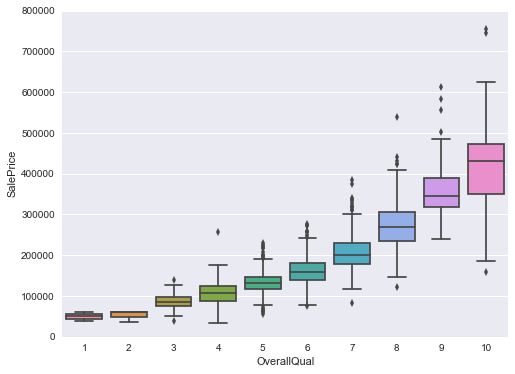

In [42]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

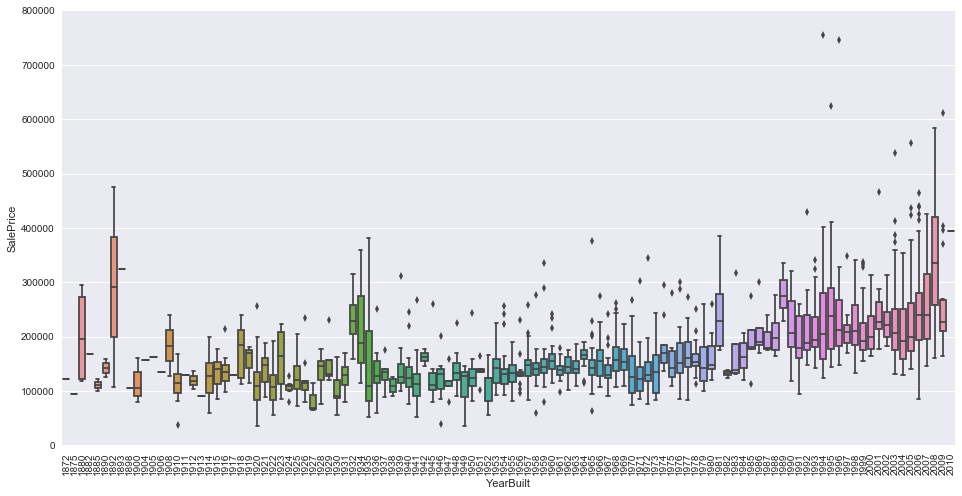

In [48]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# correlation matrix

In [ ]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)

In [ ]:
corrmat

In [ ]:
#Let us make tdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABPEAAATiCAYAAADbH3atAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xt0W9l92PsvDl58ACRBCiApPiSRIx1J5MgzkkZjeh6y%0AxvZM7Hji3Hic+pFJWnd5OVnT2+Su3t7eadza6UqbJm1zV9KVm7TucpM4qet0fFu/4nhsz8jSyJwZ%0AjTQjiXocSRTFNwGQBB8gQRKv+wcICCAPSBAkiAPy91lr1hoBIM7G2fv89j777IcpHo8jhBBCCCGE%0AEEIIIYQwLqXYCRBCCCGEEEIIIYQQQqxNOvGEEEIIIYQQQgghhDA46cQTQgghhBBCCCGEEMLgpBNP%0ACCGEEEIIIYQQQgiDk048IYQQQgghhBBCCCEMTjrxhBBCCCGEEEIIIYQwOEuhvlhVVSvwF8B+IAp8%0AAYgAfw7EgR7gJU3TYqqqfgH44vL7v6tp2vdUVS0H/grwALPAr2ma5ldV9f3AHy1/9lVN035n+Xhf%0ABn5++fXf0jTt7UL9NiGEEEIIIYQQQgghtlPBOvGAjwEWTdM+oKrqR4B/DViBL2madlZV1T8DPqGq%0Aajfwj4GTQBnwhqqqPwJ+A7imadpXVFX9NPAl4DeBPwM+CdwDvq+q6qOACTgNPA60AN8CHlsrcX7/%0AbDz93y5XBYHA/Bb99O0haS68jabX7XaaCpicVeV2tyu18rTdcj0/hS638KDs7oQ8K/XfUOrphwe/%0AwUgxdyec183Y7b8fjBlz11Mq+VYq6YTSSavR2riwc2OupLUwSjHmbpdSyseVJO0Ja5XbQk6nvQ1Y%0AVFVVgCogDJwAfrr8/g+ADwOngAuapi1qmjYN3AWOAU8Cf5f+WVVVqwC7pmm9mqbFgR8uf8eTJEbl%0AxTVNG1g+rnsjibVYzJv4qcUhaS68UkvvbiP5szYjnh8jpmmjSv03lHr6wZi/wYhp2k67/fdDaZ6D%0AUklzqaQTSietpZLObEop/ZLWwiiltG63Uj43kvYcjlPA7w6SmEp7C9gDfBx4ernzDRJTZKtJdPBN%0Ap/2d3uvpr82s+GwbsABM6HyHP1viXK6KVSfZ7Xbm+tsMQ9JceEZKr1653e2MlD9GZJTzk152jZKm%0AzSj131Dq6Yft+Q0bjbk74bxuxm7//WCcc7CRsmuUNK+nVNIJpZNWo6VzJ8dcSWthGCWtRrxHM8q5%0AyYekfW2F7MT7P4Afapr2sqqqLcBrgC3tfScwRaJTzrnO6+t9dinL61mtHObodjvx+2dz+V2GIWku%0AvI2mt9AXbakOLS6UUitP2y3X87MdlU2y7O6EPCv131Dq6YcHv8FIMXcnnNfN2O2/H4wZc9dTKvlW%0AKumE0kmr0dq4sHNjrqS1MEox5m6XUsrHlSTtD74rm0JOpw3wYCTdJIn18N5VVfWDy699FDgPvA08%0Apapqmaqq1cAREpteXCCxrl7qs5qmzQBLqqq2q6pqAp5b/o4LwHOqqiqqqrYCiqZp4wX8bUIIIYQQ%0AQgghhBBCbJtCjsT7f4Cvqap6nsQIvH8OvAN8VVVVG3ATeEXTtKiqqn9MojNOAX5b07QFVVX/FPgL%0AVVXfIDHS7rPL3/vrwF8DZhLr4L0FsHyc7uXveKmAv0sIIYQQQgghhBBCiG1VsE48TdOCwC/rvHVa%0A57NfBb664rV54FM6n30TeL/O618BvpJfaoUQQggBoCgmYjFDbbImxLqk3AqQciCEEKLwil3XFHIk%0AnhBCiCIY8AXpvj7GrYEpDrfW0NXRQKvHUexkCYNLlZv+KQ7vk3IjSoOUWwFSDoTYTaSdK4rFKHWN%0AdOIJIcQOMuAL8ntfvwSAq8rO2cvDnL08zMsvnpAGjsgqWW4Ww1EA+sdmOHt5mH/+qyfYV++UkS3C%0AkCTeCUiUg//w39+lstxKYGYxFb+kHAix80jcF8Wysq08NjHHzfsB/uHHj9Di3t6yJ514Qgixg7x5%0AY4yTR+pZWIrgD4TobK+jzGbhzRteadyIrLqvj6UaJZCYJnDySD2vXhxiyBeUkS3CkCTeCYDbQ1Mc%0AanVllIHunlG6r0s5EGKnkbgviiXZVlYUE12djaky+OrFIT5ysnlby5904gkhxA6hKCZA4Z2b3lSH%0AzIB3FrvVzJmTLUVfv0EYk6KYuNU/lfFaV2djRjmSkS3CaCTeCYABf5Bvvd67qgx0dTaiDQSkHAix%0Ag0jcF8WS3lZe2UYe8M7yzk0vL794ArfbuT3p2ZajCCGEKLhYLE4wtJQxogpgMRwlOL8kDRuhKxaL%0Ac3hfTerfdquZhaWIbjnqvu7d7uQJoUvinQDo7hnTLQMLSxE6DtRKORBiB5G4L4ol2VY2ShtZOvGE%0AEGKHUBQTA95Z3fcGvcHlJ5hCrNbV0YDdagYSa8z4AyHdzyVHtghRbBLvhN4o4iR/IMQTDzduc4qE%0AEIUkcV8UU1dHA/W1FWu2kbeLdOIJIcQOEYvFObLPpfve4X0ueUIpsmr1OHj5xRM89/g+nBU2Wur1%0ApwOorVKOhDFIvBMrRxGnO9RSQ4OrfJtTJIQoJIn7ophaPY7EJhZrtJG3i3TiCSHEDpI+oirJbjXT%0A1VFfpBSJUtHqcfD3zrTz2y+e4CMnm6UcCcOTeCeylYEnj8koPCF2Ion7opha3A5DtJFlYwshhNhB%0AkiOquq970QYCqK0uujrqZTMCkbNYLC7lSJQEKadCyoAQu4tc86LYjFAGpRNPCCF2mFaPg1aPA7fb%0Aid+vv3aIEOtJliPZ7U0YmZRTIWVAiN1F2rmi2Ipd78h0WiGEEEJkJTfFohRIORVSBoQQQmynYtU7%0A0oknhBBCCCGEEEIIIYTBSSeeEEIIIYQQQgghhBAGJ514QgghhBBCCCGEEEIYnHTiCSGEEEIIIYQQ%0AQghhcNKJJ4QQQgghhBBCCCGEwUknnhBCCCGEEEIIIYQQBiedeEIIIYQQQgghhBBCGJx04gkhhBBC%0ACCGEEEIIYXDSiSeEEEIIIYQQQgghhMFJJ54QQgghhBBCCCGEEAYnnXhCCCGEEEIIIYQQQhicdOIJ%0AIYQQQgghhBBCCGFw0oknhBBCCCGEEEIIIYTBSSeeEEIIsUMoiqnYSRCiKKTs71ySt0IIIYymmHWT%0ApWhHFkIIURADviDd18e4NTDF4dYaujoaaPU4ip0sUUCpPO+f4vA+yXOxe0jZ37nS87ajrZZThz2S%0At0IIaeeKojJCu0M68YQQwsAUxUQsFs/58wO+IL/39UsshqMA9I/OcPbyMC+/eEIaONtoo/m2Gavy%0AfEzyXOwOUvZ3Lr28/cnFQd283c54K4QoLmnnimLabLtjq+or6cQTQggDyvcpT/f1sVTFkrQYjtJ9%0A3SuNm21QjKdzkudit5Kyv3PlkrdGGA0hxE5RKqPbJO6LYsq3/G11fSWdeEIIYTD5PuVRFBO3+qd0%0A39MGAjJaocCKMSpI8lzsVopi4mZ/QPe9W/1S9ktZLnHt/tisjMIUYouUyug2afOIYsql/OkpxP1B%0AQTvxVFV9GfgFwAb8v8BPgT8H4kAP8JKmaTFVVb8AfBGIAL+radr3VFUtB/4K8ACzwK9pmuZXVfX9%0AwB8tf/ZVTdN+Z/lYXwZ+fvn139I07e1C/jYhhCiUfJ/yxGJxDu+roX9sZtV7aqtLGjYFVoynw5Ln%0AYreKxeK0eJwMjM2ueq+l3iFlv4TlEtdkNI4QW6dUridp84hiyrf8FeL6KlgnnqqqHwQ+ADwBVAD/%0AJ/CHwJc0TTurquqfAZ9QVbUb+MfASaAMeENV1R8BvwFc0zTtK6qqfhr4EvCbwJ8BnwTuAd9XVfVR%0AwAScBh4HWoBvAY8V6ret5/P/9rUN/83X/u9nCpASIUSp2exTxq6OBs5eHs6oLOxWM10d9VueVvFA%0AMZ8OS56L3UhRTDgrbNit5lVl31FhkxEZJW6tuCajcYTYOqV2PUmbRxTTRstfoa6vQo7Eew64BvxP%0AoAr4p8AXSIzGA/gB8CwQBS5omrYILKqqehc4BjwJ/EHaZ/+FqqpVgF3TtF4AVVV/CHwYWCQxKi8O%0ADKiqalFV1a1pmr+Av08IIbbcZp8ytnocvPziCbqve9EGAqitLro66g31JHUn2ky+bbaBLHkudqPE%0ANRPj5JF6FpYi+AMh3K5yymwWiMcNddMpNkZRTKvi2tEDD3anldE4QmydUruepM0jimmj5a9Q11ch%0AO/H2APuAjwMHgO8AynJHGySmyFaT6OCbTvs7vdfTX5tZ8dk2YAGY0PmOrJ14LlcFFos54zW325nz%0Aj9tq+R67mGnOV6ml2Ujp1Su3u52R8merPPNYq+5Tnmcea8np97rdTk50NBYyiRuWXnZ3Qp7p/YaN%0A5tuNvgl+enmI632TdByo5fTxZo4eqMs7PRvJ852aB1ttozF3J5zXzdju33/mZCv/8j91A+CqstPT%0Am2gK/qsvdhUtL4xSBjZSdo2SZr2Y+I9++RHdz262niw0I6QhF0ZL506OuUZOq9Gvp5X8wSXsNoW6%0A6jLsNoXyClvR02nEe7Rin5PNMHLa12tzr0z7+w55tvz6KmQn3gRwS9O0JUBTVXWBxFTXJCcwRaJT%0AzrnO6+t9dinL61kFAvMZ/3a7nfj9q9dV2S75HLvYac5HqaV5o+ktdMBZWW53u1IrT7kKzS/xeEc9%0AcwsPRpdUllkIzS9tuDzm8vntqCiTZXcn5Fm23+B22HSfzrkdtlWf11tE+icXB7dlEemdlAdGirk7%0A4bxuRjF+/8pY2dlel1es3CpGjLnrMUq5XS8mrkznRuLtdjPKOV2P0dq4sHNjrtHTauTraaWVseLS%0ALfjhmwNrtp+MVna3g9HL3Fp2UtoHfEH+49+8lzFrwOMq5+lHm9a9vtYqt4XsxHsD+E1VVf8QaAQq%0AgZ+oqvpBTdPOAh8FXgfeBv61qqplgB04QmLTiwvAx5bf/yhwXtO0GVVVl1RVbSexJt5zwO+Q2Mzi%0AD1RV/fdAM4kRf+MF/G1CCFEw3dfHOPfeCHarOTW6ZDEcpdxulekCBtfqcdDqcaw7RbZUFpEWwsgk%0AVu4c+cTEXOOtEGJ9yevJ6B0o0n4SpaT7+hihxQgXrj5oq1zrnaCuupzOfa68v7dgnXjLO8w+TaIT%0ATgFeAvqAr6qqagNuAq9omhZVVfWPgfPLn/ttTdMWVFX9U+AvVFV9g8RIu88uf/WvA38NmEmsg/cW%0AgKqq54HutGMJIUTJSV8AdTEcZWziwZM9Iy4wLPSttwZeKS0iLYQRSazcOXKJiWuRfBZid5D2kygl%0AK8treltls+W1kCPx0DTt/9J5+bTO574KfHXFa/PAp3Q++ybwfp3XvwJ8Jc+kCiGEIaQvgJp8YhOY%0AWWQxHDXkAsNi41Yucpuez5LHQuRGYuXOUWoL6wshikPiviglsVicU0c9jE3MrRo9utnyWtBOPCGE%0AEBvX1dFAaDGyap2nbNuXC+NZ7+laV0cD594b4bjqSa2R0dleR0db7TamUojSJrFy5+jqaFi18He5%0A3UJHWy3ffP0utwamONxaQ1dHw5ZPmZPRO0KUDon7ohQM+IJ0Xx/jZn+AzvY6ymwWuntGicXi2K3m%0ATZdX6cQTQggDeuu6N3UzM+CdTexidLw5p79NVhyFvOkR+lLnvn+Kw/uyn/tWj4Pf+KWH+ZNXrmbk%0Ac0/vxLZsbiHETrGZWCmMo9XjWLWwfkdbbUaM7B+d4ezl4S2LkbnGayF2g1JqO0rcF0a2cvOVgbFE%0AGX32VCvBUJhTR+s3fW1JJ54QQhjMZhbt1dvhbytvekR2q8792Nrn/vq9CVmcWYhNOH91VPcaeuPq%0AKJ/98MEipUrka+VGFd98/W7BYuRG47UQO1kptR1lYwthdNnK6OTsAjf7Jrl4w7vpa0vZbCKFEEKs%0Ab72FudM/t5kFvtdq3IjC2si5zzefcy1HQux0imLizqD+NXR7aEqulRKUzLNYLL7punA9UlcK8UCp%0AXA+FjgtCbIVsZXRsfJ7KcuuWXFsyEk8IIQpoo9N1NrPAt+zaVTwbPfcbzWeZ9iXEag17Khnwzq56%0AfW9dZRFSI/KVLb4VarMLqSuFeKCUrgfZBEeUgvbmat0y6naV09M7AWz+2pKReEIIUSDJ6Qk/fGuA%0A/rEZfvjWAL/39UsM+IJr/l1XRwN2qznjtVwWQU02bvRI46aw8jn3ueZzvuVIiJ0sFovTeaBW9xo6%0AeqBW4l2JWCu+5VsXrkfqSiEeKLXroaOtTjcuyMZgwghu9E0QiUR1y2iZzZIa8Sq70wohhEHlu26H%0A3gLfXR25LYKqt8PfVtz0iPVt9Nznms+y/osQ+ga8s5w8Up/a4dntKqfMZmHQOwudDcVOnsjBWvHt%0A751pz7suXI/UlUI8UErXw42+Cd24f6Nvks59rmInT+xyP708xBtXR+nqbMwoo60NTv6uux/YmmtL%0AOvGEEKIANjs9YeUC37naTAeg2Jx8zv16+VxK01yE2E6JNfGm6R+bwW4146qy09Ob2Cxmf2OVXBsl%0AIJf4loyRbrcTv3/11Ol8SV0pxAOlcj0oiomb96ck7gtDUhQT1/smicXiXLg6klFG/VMhOg7UUldd%0AviXXlnTiCSFEAWzVuh35NEYKddMj1pdv52u2z8r6L0LoS782FsNRxibmU+/JtVEaih3f8o3XQuxE%0ApdB2lLgvjCwWi9NxoJb+0USdll5Gj+yr5TMfemjLyqisiSeEEAVSqPV8hPFtZUNSypEQ+uTaKH1G%0AyEO58ReidBghZgiRzenjzVnL51bWNTISTwghCmQrpifICIHSUMh8KpVpLkJsN7k2St9m8lDqRyF2%0AH4n7wsiOHqjLWj63ss6STjwhhCigfKfrDPiCdF8f41b/FIf31dDV0SANFAParnySaV9CZGcxQ111%0AGRbz+p8VxrPR+Cb1oxBbL3VdDUxxuNXY11UpTP0Vu9fKOm3AF+Sbr9/d0jpLOvGEEGIbbLQD7/e+%0Afim1S1j/2AxnLw/z8osnDNug2o2KkU/SgSfEAyuvQYAfXxySWFmicu3Ak/pRiK216roaletKiM1K%0AduAVos7KaU08VVVdqqp+VVXV11RVrVNV9WuqqsoezkIIUQDd18dYDEexW8001FVgt5pZDEfpvu4t%0AdtJEmmQ+pdvqfFIU05Z9lxA7jcTK3SE9Dm5H3BVit5HrSojCKFQ7JdeReF8FXgVOAbPAKPBXwM9v%0A6uhCCCEyKIqJ2wPTPHFsLwtLEfyBEJ3tdZTZLNwZnJLplAahKCZu9U/pvqcNBDadTzJdTIi1Sazc%0A+dLjYEdbLaeOeLg9MK372a2Iu0LsRoVuzxRCKU39FbtXIdspuXbiHdA07T+rqvobmqYtAb+tquqV%0AvI4ohBAiq1gsTtfD9Xzr9d7UU9EB7yx2q5lPntm6rcnF5sRicQ7vq6F/bGbVe2qra9MdePkOvTdi%0AY1uIQpBYaXybiUd6cfAnFwf55Jl2+kZXd+RtNu4KsVult2fsVjOuKjuBmUUWw1FDXlcy9fcBafMZ%0AWyHbKbl24kVUVa0G4gCqqh4EYnkfVQghRFbeyZDutAbf5HxOfz/gC/LuHR9zC1Eqy8w8etCz6xo2%0A2+H0I0387Noos/Ph1GvJbeSzyaXBtda0lmz5KCP3xG6UjJXOCiv7G6u4PzrD7Hw451gpCmMr4pFe%0AHARYXIpSV21nYnox9dpacVducoVYX1dHA6HFCLEY2G1mFpeiKAprtmeKJZ820k4jbT5jS693JqYX%0AMjrGYWP3dNnk2on3ZeAs0Kqq6v8CuoDPb+rIQgghVlEUE3eH9KcL3R2eXveGZMAX5EZ/AN/UAsO+%0AOZo8ldzoDwBIBb9FbvRN8NrFAW71T/HY0QYaait4s2eMgy01qW3kV8q1wZXPtBZZ6F3sRopiom9k%0AhheeOciwf5Zh3xyd7XU0uZ28e8svnTdFshXxaGUcVBQTXZ2NLCxFuHjTx6OHPHhca8dduckVYmMa%0A6ioZ9M1yZ3CWJk8le+ucxU7SKqU49XerSZvPuAZ8QV45d4/r9yY5vK+GjrY6puaWsFnMqWm03T2j%0AxGLxnO7p1pJTJ56maX+nquo7wOOAGfiipmmy0qUQQmyxzU7THPAF+fa5exnDti9b/TieU6Vy3wJ6%0AjSe71czLv3qCVnf2UXK5NrjyyX95Ki12o1gsztOPNvGNV7UV01T8fOZZdcffyBnVVsSjlXGwq7OR%0Ad256V01HyhZ35SZXiI0plbZjIZcyKRXS5jOmbPXOySP1DHhnU/VWV2cjF66ObLq85ro77Rng25qm%0AfR/QgG5VVT+Q91GFEEJk1dXRgN1qznhtvWmakHxCGdCt3G/1B2Sn0y2QtfHUk3iupXeON7rr20by%0AP5en0kLsRIpi4vagfry7Myhlvxi2Ih4lP5OMg3armYWlyJpxdyXZaVOI3JVa2zHfNvJOIG0+48pW%0A7ywsRVLlNflvZ4V10+U11+m0/wH4VQBN0zRVVT8GfB14bFNHF0IIsUqrx8HLL56g+7oXbSCA2urK%0AOk0znaKYGPIFdd8b8gV3xTSDQlqr8XSrP8AP3h7g7Ru+jKlb+Uz92Ej+y1NpsVspiokhr368G/RK%0AvCuGjcaj9DzSm/768osnuH4/wFvXx3SPpxdDZbqdEBtTam3HfNvIO4G0+YxprXrHHwjhqrIzNjGf%0A+vf//suPbLq85tqJV6ZpWk/yH5qm3VJV1bqpIwshxC6STyPIYoa66jIs5vU/CxCJxGipdzLgnV31%0AXmuDk0hE9iPajETjyaXbeHLXlPGd830shqOrpm5la3A1exz0e2dpSZsOliwnrR5HqhNwvXLT1dHA%0A2cvDGU8Ad8tTabF7SbwzplziUaLDzsut/kBq3aA/eeWq7vTXj55qYWZuSTef9W5a5SZXiI0pxVia%0AbCO53U78/tXp3smkzWc8a9U7blc5Pb0TqX97XOX8x795j3/y6Uc31ZGXayfeLVVVf5/E6DuATwO3%0A8z6qEELsEvksrr1yXQWAH18cymk9H7W1JmPtIEhU7odaajb3Q3a5ZD6aTAp2q3nV+bXbLBmvpa9P%0Akq3BFY/Dv/nLS7z84gkA3XKSyw3nbn4qLXa3Q1ni3UGJd0WzXjzq6Q9kdNiNTcwxMb2gOw3pzRte%0ATCaoq7brxt1sN61ykyvExpRaLE21rQemONy6uzaukTafMWWrd8rS7g+S9wuz82HeuDrKZz98MO/j%0A5dqJ9w+B3wW+AYSBc8AX8j6qEELsAsnOOABXlZ2zl4dzWlw730VrFcXE2cvDPP9UGyP+IEO+IM0e%0AB3vdDn56eYSnjzXKKIQ8pHeqJndJXFyK4J9a4Mh+F2Di1bf7V/1dcupWssH140tDDIzN4naVZ+xQ%0A9cbVUd66McbsfBjIvgj7WqPyNjJyT4idQFFM/PRStng3zGmJd0WTLR4N+oOcezfzJsdVZccXCOl+%0Az437k9zom2TIH0ztTusPhDjUUsOTxxqz1oebucmVGCp2m1KLpfm2rXcSafMVT7Zznqx33r7l40bf%0AJAf2VrHXXUnv0DSt9c6Mtj/A7aGpbdmdNgC8lNcRhBBil3rzxhgnj9RjAuw2M4tLUeLAmzeyd8Yp%0Aiomb/QHd95ILDGcL+LFYnMY9lbzy2h2cFVb2N1ZxrXecn10b5cn37ZWKPk/pnaqxWJwLV0dwVlh5%0A4ZmDPNXZwDdfv6t7btOnbu1vcDI6McdSJEpP70TGU7nJ4CIupz3ViQeZnbYbGc0peSy2WzFHROyp%0ALeeV1+7QWFfOY0cbuXhjlJ9dG+XxjoZtOb5Y28p41NM3meqws1vNuKrszIXCNLU6dKfyNbsdXLrl%0Ay4i7+xurqCy3rFvGNnqTm8+oeSF2imQsXdl2NGIsTbato9EYS5EY+xuqMJuVNdvWO5W0+bZPLnVE%0Aq8fBiY5Geu74+Pb5Pt68Nkpnex1L4Ri3BwIZ7fzGuspNpWfNTjxVVS9rmnZcVdUYkF5KTEBc07Qc%0AV2oSQojdRVFMKIpCk7uSQd8sdwZnafJU0uJxElwIZ72xiMXitHicDIytvqFpqV97eqWimKiqtGG3%0AmpmdD3NteQ0Gu9VMVaVNntjlYeVitcmReAtLEX5ycZAR/xwdbXWce2+E0GIk9Tm71UxHW23q37FY%0AnIbaSi5cHVn1Pf5ACE9tBS31VanReZAYyTfg19+yfjc9cRbGtXLqf//o9pVPRTHR2uBgf8NBBn2z%0AvHfbz/691Tz1SDNx4hLvDEZRTLx7e5z62nJa6p2p2NfU6uDA3mpu9E2uiqFVlbaMEdDJvxmdDDHg%0AD9LqXr+M5dqBJ3FWFEKpTPts9ji4cnt127HZYGlVFBMmk4JZgYWlGONTIdyucmxWBZNikrgvCmKj%0AdcS7d8ZxVdlpdFcy7J9jfCrEww/tQTGZ+Nm1Uaxmhfam6k2V1TU78TRNO778v49qmnYl76MIIcQu%0AE4vF8bgq+MarWiroD3hnuWz185ln1ayBW1FMOCtsuuv/OCrW7oiLxeLUVtl4vKOeuYXEzY7bVU5l%0AmQWX0y4NmzysXKy2q7MxY92YAe8sZy8P8YVf7OTNa6P4ls95mc3Cn/5/1/hnnzueGg2Snq9632O3%0AmunqbEx19HUcqKW7J7+p1UJsh3yn/m+FWCxOjaOMr//tzVUx9sWPHZF4ZzCxWJz2piqclXa+e/5e%0ARp719E7wmWdVrvWOp+otZ4WN2dASoB93r9z2b1knWzHLsdi5ivmQY6PMikm37WhWTMVOWoZYLI6j%0A3Mpr7wyuaj/9wlNtEvdFQWy0jgiGwsyFwrz2ztCqcvqJp9uYmApxqLl6U2lScvzcf9/UUYQQYpdR%0AFBO3BwIshqPYrWYa6ipSHTi3l9dK05NogMQ4eaSeE4c9tNY7OXHYw8kj9RCPr9tAGZsIce69EXp6%0AJ1JTN8+9N4J3eWtzsXFdHQ2JxWitZhaWIroV+Xu3/WgDgdQ5v3A1MTKv+7oXSORrOBrl5JF63t/R%0AQCQa0/2ehaVI6lhPPNyYGgWYXobgwXp7QhTLylGq6bajfMZicW72TejG2Jt9E3IzZ0Af6Gzg/ui0%0Abuy71jvO7bQYevbyEB5XBc4KKwtLiRF66TFwMRzljaujm05Tscux2LnWuvE3klgsTrKUl9ssHGyp%0AodxmyXjkpPsLAAAgAElEQVTfKBTFxIB3Vve8Dnhn5XoVWy5bHWG3mpmYDumWubmFCHML+vcL/kCI%0AfQ1Vm+7Iz3Vjixuqqv5L4C0gtfqspmnnNnV0IYTYoRTFxIh/jieO7U1NAepsr6PMZmHYF1xzRN1D%0ALS6++r96gMSivcmtyb/wi53rHvPu0LTue3eHp2WaQZ6Si9Vevx/gretjup8ZGJulstzKWFpnaXoF%0Af39slnA4yjs3vdTXVmQ9lj8Q4heeaqNjv4sGVzlH9tfQ7HGsKkPOCqvkpSiqlaNU06WvB1koNpuZ%0AYV/2GGuzmVlaiq7/RWLb7Kt3Zt3Ewh8I4XKWZayN9+4tPz/3/n3MzofpbK/LyOPunlFuD04xFgjR%0A4CrPO03FLsdiZ8qlc9goZUtRTLxz08fxwx5Gx+e4MzhFS70TT20ll276+NjjrYZJK8Do+Jz+6xP6%0ArwuxGSvrCEUx8eSxRhaWooxNzPONn9zJmCZ/ZzDA7NwS41P6dd3A2CyRaIwPHW8q3HTaNLXAmeX/%0AkuLAM3kfWQghdrBIJMbJo/Wrpg0lh/xHIrGsf3vljl930d4rd/wcb6/L+nexWFw6fQqk1eOgzG5m%0AKRLFOzm/6ulasyexADtkrnfnC4T4xk/uUFddxs96xnj8aAPRaIwY6C7kfvRALR891ZL27zr+5JWr%0Aq8rQSy8cK9yPFSJHXR0NnL2cuduo3Wqmq6O+4MdeWopy8qiH757vW3V9PP/UAenAM6BYLM6RfS7d%0ANV8b91RiAlrqnam1QRv2VFBbVcZ3dPI4GWMvXBvlk0+3bSpdxSzHYmcqpc7hWCzOiSNuvnNOp736%0A9AHDpfWhlhrd9tOh5hpDpVXsHMk6IhyN8UsffGjVvV36NPmzlwaxWRXcrnL9DZs8DsrtFu6PzW5q%0ANF6uu9OeWf9Tq6mq6gEuAR8BIsCfk+j86wFe0jQtpqrqF4AvLr//u5qmfU9V1XLgrwAPMAv8mqZp%0AflVV3w/80fJnX9U07XeWj/Nl4OeXX/8tTdPezie9QgixlcanQqmpXq4qO4GZRRbDUcan9Z/OAFgs%0ACoNjQZo8DiKxxKK9ntpyzObE6xaLsmYHoHT65E7vSbjeawP+IBeujTIxvUiZ3cLHntiPPxDiZ9cS%0AN5p2q5m97gedeNnWu3v8aAMXro5w+tFmyu1m3XUP338086bx+r0J3eH41+9N0rnPtWXnQoh8JEep%0AvnvHz/xChIoyC48edG/Lek8Wi5I1xk5MLawbK0VxdLTVreowc1ZY2VNTzo/fHgASMfS9O34eO1LP%0AlbvjGXkLiRi4uBTBUW7jet8kn/pg+6Zu3pPluPu6F20ggNrqoquj3nDrlonSUiqdwxaLgi+gH0v9%0AgZDhYunTxxq5cGVk1Xl98lhjEVMldrJkHdE7MsPN+5O67fI3ro7yK88e4srdCQ611KSup+RnnRVW%0ADra48LjKGPTN8drlIZ453px3PbPe7rSdwF8CB4E3gC9qmjaQyxerqmoF/hMPpt/+IfAlTdPOqqr6%0AZ8AnVFXtBv4xcBIoA95QVfVHwG8A1zRN+4qqqp8GvgT8JvBnwCeBe8D3VVV9lMROuaeBx4EW4FvA%0AYzn+fiGEKAhFMXF/dEZ3qlffyEzWqRSRSIzHjtbzHb0RfE+vPYIPHnT6rGyISafPA3rbxAO6r90Z%0AnmLQG2RuIZLaBW1iKoTVovDCmYeWp8/G+V/nevnlZw4yHVxkfHoh63p3zgorwdAS56/4M3ZbdLvK%0AUVtdGZV5KU3HEbvXTCjM+PQig95ZWuqdzITC23LcWCzO/dFZ/Rg7OiPXhkF5J+f42BP7GfHP4Z2Y%0A5+RRDyPjc1y7O57KP0WBX3lO5c7gFAtLUWwWc8Y02lgsji8QIjIxx8Nte1J5vZmY2OpxpDYhkrIj%0AtkKrx8FLLxzj7RteBsZmaW1wcuqo8TqHY7E4/Vli6f3RWcNdD9LpLgphvdjf6nFw/f5k1iUhbg8l%0A2usdB2p5/dIQv/zhhyAeZ2EpwkPNLu6PzTDkDWK3KRzYW80Puu+z1+0oTCce8KckOs7OAb9CoiPu%0AhRy/+98v/+3Ly/8+Afx0+f9/ADwLRIELmqYtAouqqt4FjgFPAn+Q9tl/oapqFWDXNK0XQFXVHwIf%0ABhZJjMqLAwOqqlpUVXVrmubPMZ1CCJGzXBv4imJKdMbpTE/4xOm2Nb9nfDqk2wmUbX2F9GPeHpjW%0AbYjdGZySmxP0t4kPLUZ467o347Wzl4fperiR2ip7xnvp0/Uu3fLhrinHWWnDalY41FyN3WbmT5fX%0AM1zJHwhxXPUw5AsSi8W5cHUk1dna0zvBxPQCz55sTuVRLtNxJE9FMfX0B1aN/H3nppeXXjhW8IcG%0AFovCySPZp9NaLIpMqS2wjcafofE5XnmtN/Wg6elHm3Tz7yOPtzIxs8Drl1bv7JfcwXtfYxW3+ifo%0A6qjXfTCT742RxFPjS+X3wBSHWzeX34U04AvyJ69cBRLrG1+84eXiDa/hdqe1WJQ126tGjKXJTne3%0A24nfv3rKojCGUmij5lp/KIqJd2+PZ58m6078zenjzSwsRrg3PMuFq6P82seO8N9+qK24tvw8/1Qb%0AfSMzeNtD1NdsfF3X9TrxqjRN+8/L//8lVVWv5/Klqqr+fcCvadoPVVVNduKZljvaIDFFthqoAtJX%0AYdd7Pf21mRWfbQMWgAmd71izE8/lqsBiMWe85nY7c/h1hZHvsYuZ5nyVWpqNlF69crvbbVf+3Oib%0A4MKVYYb9czS5K3nifU0cPZB9fTqAsYnVa6cthqOMjc/jclVm/bve5c0pnBVW9jdWcX90htn5ML3D%0A0+v+3sc76/mfZ3tXNcR+6Uw7dXXFazSml91iXlOvpDVSITEFY+UOUsmOtXgcRvxzunk45A0SjkR5%0A8/oYdquZ3/z0o5RX2Pjdr73FoVb9NZ9aG5wM+YJ4aitoqKuku2c0UR6WN8M4eqB2VR4981ir7nSc%0A9x1y88q5e1zvm6TjQC2njzevWx7TGSmu5Ws7fsNGY+5OOK8bcfEHt3Svj4s3vJw52Vrw42eLsd6J%0Aeaqrs28gU0hGKQMbKbsbTfONvgl+enko5/iTrD+TU/aSJmdWj1oGsJoVhnz6sTc5otlEnA+dbGU+%0AHOM//s17hBYTO9gmH8L8qy92bSgmbjWjlIP1GC2d65XbG30TmQ/iRo2R33rS2xvpm169fcvHiQ5j%0ATf1cq71arFi6lo3GoO1gxHu0Yl3fW5E/25H2VfFknfrjUGsN08El3eVw2puqqatz4J1ZTG0yeOZ4%0AM9pAQPfaGvEHmQ4u0tM3Seezhzec9vU68SIr/r2U4/d+Hoirqvph4BESU3I9ae87gSkSnXLOdV5f%0A77NLWV5fUyAwn/HvYvfk53PsYqc5H6WW5o2mt9ABZ2W53e22qzwN+IK8dnmIuYXE6DaA779xj9D8%0AUtanqTabmf7R1SOoAO6PzTA9Pa/7ZFNRTOzf6+RURwPD/lmGfXN0ttfR5HbiD8wxMRFc86nW6Lj+%0Ajc+Ify7rudqOijJZdosZAxTFxPV7kxmvuarsqTxN35DCHwhRZjfTN6q/2+/I+ByPHHQztNzJd+W2%0AH4sZZufDlNksuhV8PA69w9P0Dk9njChJvn/qsGfVuXE7bKumjXS01WbetI7O8JOLgzk/3S+1OKwn%0A+RuMFHN3wnndCItFoV+nsxqgf2yWQGCuoOsoWSyK7tNwgH5v4Y+vJ9cysJ0xdz0bLberRjOvE3+S%0An3dV2bGl3eCmx17IjL/9Y7NZR577AyHOnGjhexf6ePSQm+9f6OO46knFUkjUea9dHMTtsOX8u7ZS%0AqcQCo7VxYf1y+9rFAd02TjHzW49eeyPpRt/kum257bRme3U0e3u1WDYag8AYZXe7FSsO5ZM/K+VT%0AL+UzGnuj8eTUYQ+//9eXOXmkPnWv4HGV09ZUTfveKvz+Wc69O0RbUzUmExzYW8Wrb+mvRDfkC/KB%0A9zXy9g0vHznRrBsP1iq363XimVb8O6doo2na08n/V1X1LPDrwL9TVfWDmqadBT4KvA68DfxrVVXL%0AADtwhMSmFxeAjy2//1HgvKZpM6qqLqmq2k5iTbzngN8h0dH4B6qq/nugGVA0TRvPJZ1CCJGL20NT%0AulMqmz3OrJXE0lKU5npH1p2J1moQHd5Xy198/+aqode/9vNH1kynxaLQN6LfEOsbmTHc4sTbTW96%0AamBmkc72Oga8s6s2pPBOzife0+mocLvKef3yUKojThsIUFddBkB3z2hGZ2Czx4HJZKK7ZzT194vh%0AKPF4nPamahr3VPLhE9kXt125VtM3X7+b6sBL/77u615DTdERO1skEqOl3qkb41obnAWPNYpiYl+D%0AU/f63N9YhaKsbMKKrdB9fUz3pidb/El+Pj3WAqv+nR5/7VZzxnvp6mvLmQ4uEYvF8QdCVJZbWViK%0ArHpwIuuG7jyltE5sentj5RrFRtyd9sDeKt3r7UBTlaHSChuPQWJ7bXf+6C2Tk75bbDb5xJNWj4N/%0A9rnjvHF1lLHJOY4eqMVdU0773qpUOz0ag7euj/HiRw/zjVe1xOwcnWtrf2MV41Mh2vZW53WNrdeJ%0A94iqqslcMAEs/9sExDVN28iY0X8CfFVVVRtwE3hF07Soqqp/DJwHFOC3NU1bUFX1T4G/UFX1DRIj%0A7T67/B2/Dvw1YCaxDt5by2k6D3Qvf8dLG0iTEEKsSVFM9A7P6FZIvcPTGWuYrfy7qgqb7oisqgrb%0Amo3N7DuSTvCBo9l3NSv2TXUpWLlb3GI4SmWZhWqHjTjxjPO+GI5mHVVXZrMwOx9O3TyqrS6Sg0zS%0A17s71FqDd3I+MY3WVZ6xw+KQL0i1w4Z3cp79Dc41K/FkeSmlmxix86mtNRkd35C4Pg611GzL8T2u%0ACt3r053H+jJifbnEH3iwrlzy88lODEf5gzoxPb6aFFNG/F0r9tqsFoKhxHQmt6ucnt4JbJbE96dP%0AWTRaR4nYvFzWiTWSro4GQouR1CyOzvY6KssshtudFhIPJkshlkobyNiKkT/5dhrmG09aPQ4+++GD%0Aq+q75P/PzS9x6mgD7972rzk7p2FPBRNTIbqO5RcP1uzE0zRNyetbM7/jg2n/PK3z/leBr654bR74%0AlM5n3wTer/P6V4CvbC6lQgihb3R8Tv/1Cf3XIRHIZ0NLGUOu3a5yymyJG5BslYPNZmbQG9R9b9Ab%0AxGYzs7CwcqWDBx7vqNe9qT61RuffbpJtV7MnH2nir35wa9Xnu3tGefZUKzNzSwz5gqk8TI6q8wdC%0A1NdW0NVZD3H48cWhjHO/sBjlsaP11DjtGRuNdPeMpm5AP3hcvyMYVk8R+EBnQ0ndxIidS1FMnH93%0AhM88q3J7MMCQN0hzvYNDLS7eeG+Ep481FrQ8KoqJSzd9ujH20k0fnzzdVrBj71Zr3fQ81FTN/zh7%0Al557gYzpTGdONHGtdwJ/IEQwtMTzT7XRPzqNNxDCWWHlpReOEZhd5CcXBzO+LzmiORKNMTo+lxF7%0Am90O6msrqCyzsBiO0rinkvduP1gK2241G7KjRGzeygdxYOz81pvF8czx5iKnKpPVauadG/qx9J0b%0APj55ut0wD4FLrSN3t4nF4rQ3V29b/my203Az8STbAI7RiTn2N1bhHUk8VFo5O6dxTyVVlTbevu7l%0A1BFPwXanTVFV9bPAUeDfAC9omvaXeR1RCCFKSCwW56GWGt3RbYeaa9bsjNtXX8W3Xr8LkNqBFOCT%0AZx7CZjPrTqldcxpu/drTcAE697l46YVjvH3Dy8DYLK0NTk4drS/4TpGlZOX0VIBvnbunu+NULBZn%0AYjpEZbmNpUiUnt7MUZLNHgceVxltjVVEIjFefvEE72g+KspteCfmKbebdTcaefJYI9HlNnG2xkK2%0AKQIvvXCspG5ixM4Ui8V5rMPDN17VsFkV9jdWce3ueKID7cxD23Iz1dLg4Px7mbs8L4ajPP1oU8GP%0AvVtlu+lZikT58TuJjrhkrPrccyrfePV2Rvzr6Z3gqUf28ukPH6LOaQfga397a1X8TY5ofn9HA0BG%0A7G32OKitsnNZ86fiaY3DnvFgRqbV7UzZHsQZMb9LZdpnPB5nr6cyNYMgPZY+cayReNxYHWOl1pG7%0Amwz4gkQiUd2RZ4XIn8126m42nqTPkonF4sRicd53cA/v3R5PzYxKn53jqrJjAs69O8yJwx5Gxufz%0AHp2YUyeeqqr/lsR6cyeAfwf8A1VV36dp2j/Z8BGFEKLEPH2skQtXRlZVSE8ey7672NJSlAHfDM8/%0A1caIP8iQL8iJwx72uh0M+GbW7Izb31DFpZu+Vcfb31CVU3o797no3OcqmcW1iyV9ylfPvUmaPQ7d%0AhkeNswyX0073tcVV7zV7HAz75/gX/+Vtjuyv4eiBOuYXo1y9mxhpV1vtJBzNfIK9GI6CyYS7xrbm%0Amh3ZbgBu9E2WzE2M2Nm8kw92G/VPhVgKx1gMR/FNFn6B76WlKC31ztQ1m5xKmbwujbQQ+06id9NT%0AV23nv//4zqrP3urP3JVPUUw8drSexXCUP/qbKzTsqeSRh+q4PzZDi8eZZfps5gYmdqsZi9nE5Mwi%0AT7yvkVaPk459Ljr2uWQq3S6RfBBn5DZOKU37XFiIcKilJtXuTI+lB1tq1pz9UQyl1JG723RfH+ON%0Aq5kjz9yuctRWV8HyJ9dO3WzXnN6D/fUM+IK8eWMMUJidX2LQN8uRfS66OhrYU13GI4fcmExk1GnJ%0AtWHbmxITXasqbbic9rzjQK4j8Z4DjgOXNU2bVlX1I8BVEuvcCSHEjpZsMFy85cM7OU99bQWPHV57%0ACLTFouAos/Hd8/cejFLpHefSLR9nTjSvucnEyPhsRudfs8fBXreD0Un9abZic5JP8n50cXBVw6O1%0Awclr7wzyy88c5BNPt3FveBrf8nsH9lbz3Tf6UptMNHsc/MkrVzM2xvAHQjz1viZ++u5QxuLW90dm%0AqF/jqeRaNwC3+gN8+pmHNtzoEGIrKYqJe8MzPHFsb+qaSU4XvzcyU/CyqSgmRvyJWOmbnCcYCuMo%0At+KprWB0PCjXRgGl3/QAfPlrF1eda1eVnSFfos5Kdqw+drSe71/oY3Y+DCRG5t3sm+DYQ3tWTTly%0Au8rZ1+BkT3UZ8wuRVNwts1m4eNPHcdXDd8718fKLJ1LHlPwWRlFK0z5tNjORaIxPPN3G2MSDWNpQ%0AV0EkGss6c6SYZkJhItEY7U3VRKIxZkLhYidp10u2W1eOPOvpnWBieiHrGuKbtV6nbq471+aatkF/%0AkK99/yb7G52p6fJ2q5mlcJSfXRvlk2cO8r03+ghHYzx5rJFINJ66l6uqtDExHeLkkXqCoaVNjU7M%0AtRMveaeZ/HX2tNeEEGKXiC8HwfUDvd6aeIdaXeuuiReLxfHUVvLtn97DUWGhs20PPfcSnX+fON2W%0AUyWTqrAGpjjcmvtW67tZ8kleesPj9kCAh9v3cPKwh59cGqKzzUV7czU1zsTN6Yg/SCwWp6GugrlQ%0AYpOLxXAURTFl3IyGo1E+/ZFDTEyHuDc8Q5PbQWuDk+9duM93zvfpjsbL9QbASDcCYneJxeJ0PVzP%0At17vTT2ouD0QYCkc25bptLFYHLerAu/EHKHFKONTIcyKCd/kHPV1FXJtbIPkOdaLVXOhMCce9dDe%0AXE1ddRmD3iA/uzrKoVYXlWUW7g5NMzG9wOx8mPraCqxmZVX8PdRaw99293N0vwtPbQVaf4AaJxxX%0APXT3jBKLxQ03NVGIpFKZ9hmJxLg/NkNDrYNoLM74dIhyu4VYHO6PzRhmPbyk6/0B3rnpTW0Y4naV%0A885NLyagQ5aOKZqV7db0UZ1b3XG98iFdttF0+e5cm+14A74gP3pnCKtFIRKNE47GMh5ktu53srAU%0AwWxRCEdjRGOw11PJkC/Itd5xKsutBGYWAXjphWO0uPOvu3LtxPsb4JtAraqqvwW8CPy3vI8qhBAl%0AZMAX5LXLQ6kGA8Brl4d45nhz1kpAUUw4y228fmkoYz0gu9XMmRPNWUeJKIqJyzf8qcXi+0ZmUPfV%0AJhaLf3eEj51qXbMiXFVhjeZXYe02rR4HL71wjHPvDqdGfJTbLdwbmSYaixOJxBibCFFbFefC1VEO%0AtVRTVWmjs70OfyBEW3s1zR4H1/smOaF6MjYXGfDOcsmaGIFZ47RTZrPwd939HFc9XLg6kvUmtFRu%0AAMTu5QvMJ0YNjwcZ8gZ5+KE97N3jwDeVfdOfrWKxKNitZt2F4z/1oYewWBTDjR7ZqdJjVfpDjGu9%0AE5w47OG75/t060H/VIgym4WFpQiPd9Sn6tj62sRI5/6xWRSTiangEntqygktRhjyBTNiotGmJgqR%0AVCrTPi0Whf0NVfyPn9x9cJ2OGTeWDniDunG/vrZSOvGKrNDt1vVG1a2sBza7LmX68Z441sC3Xk+s%0Acd1QV8GQL8iTxxpXlcUrd8b5lY8eRusPcPGGl+iNOL/4dHtqdtXJIx6Oq55Nr1WeUyeepmm/r6rq%0Ac0A/0Ap8WdO0723qyEIIUSJuDU7pNhia3I6slUAsFmdmfkm38piZzz4ST1FMPPFII994VcvsBLrp%0A49MfObTuzUqpLKRsRFr/JL5ACIjT0zvBySP1vNUztirfTx6px6zA65eGCEdjqRvWN3vGOHW0nkg0%0AppsH/qlQanOT5AhNu9Wc9Sa0VG4AxO6kKCbq6yp5Jf3Gb/kaeeFDDxW8YyUWizO4okMHEtfaoC8o%0AnTrbKBmrfnxpCEe5NfXwym41MzA2u248fP6pA/zk4hD1tRVAnHK7hW+fu6cbe0dW7BZvtKmJQqxU%0AZjPxUHM1ZTZTsZOiKxKJZY2lQ76goUbiWSyJNTKT8SW5RMliOMqAd3bNpWp2KiM9xChku3Wjo+o2%0Auy5l+vESbfWp1LFDixE+2rUfbcW6r5C4bq7c9nOgqYrFcJTTjzbz9vUxArMLVJZbeeemj3du+jY9%0AuGLNTjxVVZ9O+2cI+G76e5qmncv7yEIIUQIUxbTqyT88aNxkqwTsdgtDXv017IZ8Qex2CyGdNTwi%0AkRh3h6d0Gyh3h6c5vcZmGqW0kLLRDPiDTMwmhri7XRV0tNXhnwpl5HsyP2LxONFwfHnntr0Zo+6W%0AIlFsFrPuMfyBEK4qO2MT88SJMxNcwlVlp9njoN87m3VYvcUMddVlZPlaIYpmrdhYaDabhb7h1dPN%0AAfqGZ7DZLEQiSwVPh0ho21vFxGsLLEWiqTLhqrKnRq+vlB4P/VMhThz2MOQLsnePg1gc3dgbjcUy%0AFgqXkcnCyJKzOJbCMZYiMYLzyrqzOIqhrMyaNZbeG56hrMzK/LwxYmksFsc7Ma+7FuvwLnt4k+ta%0Ab9ttf4OzIGs2b3SQQr7rUibTnX68ZF2WHGkeJ86VO+OMT+nXb75AiPq6Sv63022MTy8AcGR/LWU2%0AM29cTSwF8eaNzQ2uWG8k3u+s8V4ceCbvIwshRAlQFBMDY/q7n/WPzWatpEKhMPsanRm76iXtb6zS%0A7cCDxFPGYe9c1gbKWk8ZY7E47c3V9I/NrOoAfKipelc1bjaipz+QsSHFgHeW1npn6v306WFTs4tU%0AVdpwVFgpv2tJrYOXFJhZpLO9Tjff3a7y1MiTIW+QD55o5n+evUs8Dv/mLy+teiq38qkjwI8vDsnU%0AaGEIimKibyRLJ9o2bGyxtBShYU9lapRWerxr3FPJ0pKxdlTcqQb9QXr6Jum5N0lbUzXX7o6n8mMu%0AFKap1bFuPOwbnmEpklg/Kf1ByMr1RWNx+PRHDnL+vVEOttTIyGRhaHeGEw9Vw9EY41OJZTpsVoU7%0Aw9OGKrexWGzNWBqLGWdkWywW51RnPd/+6eqRurmuG70TbNVab1udpvU6FfNtF+Q7SGEj03vT03/q%0AqIeb/YHUe8m2fUu9M/Xg3m41876De3Trt+Z6B4HZRYa8s7hd5bTUO7mk+fDUlPOpZw7yP167w63+%0AzQ2uWLMTT9O0M3l9qxBC7BCxWDzVuFkp0bjRD74Wi0J7cw1vp03DhUTl0d5UvWZn3Mmj+msIPf/U%0AgXXT21hXztOP7E2tLdTZXkdlmYX6uopcfu6uM+gPcu7d4VVP97yT8xw/7GbAO0tXZyOXtcRuiDVO%0AuNk3idtVzi+ebqP76ljG3y2Go5TZLBmjRSCR72U2S+o1t6ucQW+Q42o9568M6y7QLlOjhdE1exy6%0ADzmat6F8KoqJjgO1lFmVVfGuvaUmtXOqKJye/gA/fXc4tbi8s8LKySMe+sdm8QdCNLU6ONRaw42+%0AydQu3qAfD5MdeukPQro6G1etL3rltp+Xf/UErZtYEFyIQlMUEwtLMd2lWNyuCkPNjIjF4nQccOnH%0A0mZjPQBWFBOj4/O6baOx8XlDnddCMlr7cL1Oxc2OGsx3VF2u03tXpn9sYi5RDy23bxbDUZwVNsJp%0AI80T7X2zbnvfopg4994IAEP+xNp5x1U3Q94gA94ZXnjmILNzi5sqqzmtiaeq6pPAPwUcgAkwA/s0%0ATduf95GFEKIEKIqJfQ1Ortz2rwrS+xqdazYYbt2f5OSRepbCEbyTicW6bVYLN+9PcuaRvbp/Y7Wa%0AGZvQb6B4J+axWs1ZO/8UxcTkzJJuo9FRYds1jZuN6OlLroOXaTEcpbrSjrPCysJShOM6m1X09E7w%0A8ScPcH9Fo6K7Z5RPfvAh7o9O4w2E8NSUY7dZ6O4ZBR7cwA6MzVBRZsFqVliMRTOeJsrUaGF0NpuF%0Aqgobdmti1FRy9AZAVYWt4NNZFcXE3EJYN9417KmUTrwCG/AFV41griy3rlpHtKd3gr/3kYNcvzeJ%0Afyp7PMy8MbKkYq/ujWqPl9Yz0oknjK2Yyw1shNVqZm4hkjWWWq1mw2xsoSgm+kcTba6VowbvjxZ+%0ABLgRGLF9uFanIrAlowbz3TSj1eNgf0Nidk3yvKw8RyvTv/KBvN1qZu+eSt66PpY6rqvKzsWbPp5/%0Aqo37I9P4AiE8rnJaGpx8+9y9B+nuXL35xeVbfv7Rp47l/Nv15Lo77X8Bfh/4+8AfAx8FLm/qyEII%0AUU03kHkAACAASURBVAJisTjzoTCPd9QzvxBJBemKMgtz8+GsFaXdbsE3EeL4EQ8T0yGqKhNrqdVV%0Al3P5pg+7PfsN7lrTd9dL62y2zTTmsm+msVspiol3b4/jdpXrTiOZmA5x5ngz1/smqXGie14npkO0%0AN1VnNNatZgWTAlfvTtC4p5L9TVX0Dc/Q7Hakdr0FqK+rYMgbTE2XdlZYU3m0kaeOu6HRKownEoky%0At7DE80+1MeyfZdg3x/HDbprcTryBIJFIYW/6bDaF/lH9TRP6R2ex2RQWFgqahF2tW2eU+VworL/R%0AiDfIiH8Wu83KgaYqhv1zNLsdNO6ppKXewfjUAnvdlUxMLSx30o3yKz93mLOXhnSPvdlpSEJsh9Fx%0A/V26s71eLGYza8ZSs4HW441EYrQ0OGipd65acgZTvOQ3tcglruU7Kq1Q1upUvDcyDei3nzc6ajCf%0ATTPSRwA+3O7i2EEPV2776LkXSI0I3N/g1E1/d88ozz3eiqPcxoB3ljeujNDkqeRR1UP/6DTeyRBH%0AD9QyNjHHgaYqaqvsTAfDXLrpS+WB3WrO+jDqRt8kHa3571CbaydeSNO0/6qq6n4gAHwBuJT3UYUQ%0AokQoionKCiuV5VZGJ+bYU1NOeZmFhrpKTKbsFW44HOX0iSZ6h6ZS0xPcrnKi0RinTzQRDuvf4C4u%0ARrKvpbe3isXF7Os8KYpJ9+8ABr3ZN+HYrWKxOO1NVcwtRHSnIMfi8MO3Bnj28Vau3BnX/Y57wzPs%0AqSnHU1tOdaWdiekQNc4y3u5J3OCOjs8RWohyf3Qaq8Wc2vV25ag+u9XMSy9kPpVb76mjURc1FrtD%0AJBKjo62O//rdmyvKsp9/8PyRgt9MRSJr3yRHZEm8gknctAUyXltrE4veoWkeO9qI2WzCajFz7e44%0AleVWrt4dx2JWWFiKYFGU1M34Zc1H/+gsLfXZ1pV1Sl0mDK+lQb/87mtw6ny6eMLh+JqxNBw2zrWm%0AKCbUVhd//XfaqjbU5z6qlmw7d6PtuXxHpRXCWp2Kjxx08/YNr+7f5TNqsNXjoNXjyGkX4uQU2XA0%0ARldnI5OzS/zVD27hdpXT7HHwo4uDqRGBeumPxeKU2S185/zK9Rf9PN5Rz1IkmloG4jPPqYCJmblw%0AYpmR5et+rXrx5v0AypkCrYmXZkFV1VpAA96vadprqqpW5nVEoevz//a1Df/Nd//DJwqQEiFEumQl%0A8e1z91ZVlp843bbm1NbZ+cTUVkeFhc62PfTcGyc4H8FTW5F1qlcsFufI/lrdtfQO71v7CVssFufI%0APpfuSL71/na3Ov1IE+euDHOjL4B3MjGNecA7i7PCyunjzTgqLFSWW1Oj9VbyuMq51juRGm7f9XAj%0Ab/aM0tleR5PHwcJShGt3x1H31VJfW0HP3Qni8XjWp3Kd+x48lVvrqaMRFzUWu8+1uxO6Zfla7wTv%0AP1zYm4lIJEpbU5XuKNq2puqCjwTczfRu2tba1KdxTyW+yXkqyiz4AyFm58MshWN8+FQrb/aMYLWY%0ACcwspmLv55/v4K9fvcUzx5t11xvaU1NesJv1Uu0EEMYSi8XZV+/gHZ3y21JvrE7oeDzOgb36sfRA%0AUxXxuHHSGovF6R2a1q13egenefJoQ5FSlr982nP5jEorpGydip0HXMzMLW7ZqMGNdHYmp8g+cWyv%0A7oPzJ481cu69Ebqve/lA5+r0OyusqfuCdIvhKJFonMoyK01uB2U2C/dHprneN8HxQx4Www92UU+v%0AF1dtOLjJ9SZz7cT7Q+CbwC8BF1VV/RwyEk8IUaI20ki3WNaesrXW06CR8SCfeVbl9mCAvpEZ1H21%0AHGpxcXtwcs1j7q2t4MWPHeHm/UkGx2ZpaXByZH8te2vX35zCSE/njGzAF+TNG2OAwsx8Yqfgzva6%0A1FTX0GKEq3fGOXqgjungIm17q+npnVh1Xl1VZRlrOS1FojzXtQ+bxcx3z9+jstyaujm1W838/Y8f%0A5Qc/u6+bpht9k7xZ72BvXWWqUZJ86rje+h3J48umF2K7lJVZGfTqr+00OBakrMzK/Hzh1sRbWorS%0AuKdCdxRt455yw6zhtFOtrGvC0Rjtzfpx0mJWuHB1hNZ6J4rJxBPH9rIUjhCNxjjU6mLYl1hE/MDe%0AavpHp/nu+Xs8ctBNaDHCY0frCS0+GM1eZrNw6ZaP57v2ZU1bPh1xMrJZbLVDzTW6S7Ecaq4udtIy%0AmEwmPLX6m6J5XOWYTMZZX3TNXdFLdE28fNtz2dqHxZCtU7HF7diy+5KNdHYmp/iuNZ01Eo1z+tFm%0A7gxO8ZkPPcSXP3+Kn/WMcvXuBG5XOQ11lVy7qz8LZ8gXZCkSpXd4GrvVzJkTzXR1NlJZbmV8OsSH%0AHmshGAoz6p/jkUN7qCyzrN5wMId7urWs24mnqurHSXTYPQt8AhgCFoBf29SRhRBimw34grx7x8fc%0AQpTKMjOPHvTk1EhPTjNY+RRlrXVNEiMValcN+b9008fnfk5dt8L9+t/exGZV2N9YxdU7ft654eXl%0AF0+sm1ajPZ0zomRDINu01q6HG7l0y5fx2i883cbHnzzA6PgcQ74gLfVOWhsc/O3P7meUiyFvEP9k%0AiPcd2sOhVlfGei3dPaNcue3POqrP7SrnGz+6zaOH3DxzvDkjz1augWe0RY3F7rOwEKZpedpIXbU9%0ANdp4YnqR5noHCwvhgh6/rMxCeZlVdzH2z7WqlJVZWFiQObWF0upx8OXPn+LCtVFuD05x5ngzvcNT%0AdD3cSDwep29khsY9lex1V+IPhFAUE97JeZ5/6gDfPd/HySP1vH5paNUmGCeP1DPgnU3l5ckj9fT0%0ATuCqsqc6CD/8WItumvLtiJORzaKQymwWDrbUsGjQBwvxeBxnpY3vnOvTnaJqpJF4AA17KvVH/NaV%0A3iTBrWjPGaW9l61TcavuS85fHc2pszN5/MP7algMR7JOZx3yJZYZeub/Z+/Ng9s88zvPD15cxEmC%0AJC7elwhSpE5KlmUdtuyOu9tut5PuztHJ9GTvzFZnN7O1W7U1u5maZGo2NZWZP3ZnN5Opmqns9Gwy%0AnU7cnbgdd6e7fUmyLFunLVEUQUk8wAMXQYC4zxf7BwiIIF5QJ3jY+Fa5Sn6JF++D933e3/N7fsf3%0AO9bB99+9U1o3XjzSwd+cvYc/GMds0lb114uttKlMjngyy2BXK5duefGHEgz3NjPS20xvm5HpxXBN%0ABAc3DeI5HI7/Bfh1CgG7fcBfAL8H7AX+FfCPH+uqddRRRx1bDJcvysRcEF8oyaIvRrtFx8Qap8+D%0AFpKeNgOdVgMyQK2Sk0rnyAMKRfXspCDIcM4FJRccpyvIl8Y6qp5bXKiKbWlFfHjDzW9+ac8Df2tx%0AITWbDfj9m4thfBFx/kZBFbFadi6dyfH8oQ7Of7aIKBZaX2eWVrl5N4BMkPHSkU4CoQRXbvt4/XQ/%0As+4ws0vhQiVJuxG5TMZPPpolslbhVwoOjtqZ90ZwdJskW8QaVAoi8QyxZJbLk76q83KnkRrXsTOw%0A1cFbQZCxv7cZR5eJ6aVVIvEMI32t9LU1opbLtmQ8ztkqNnY2yJcOV7exdTwZ1gfL+jsaOTps5eef%0AuLCbtTi6mvnh+3fQaZRMzASY84TJZHO8cryHs9cX8ATiQHX7m6fAQ5RMZdfWwUIgtnieWinHYtLw%0Az/7sMkPdT4dioF7ZXEct8PGEh5wI6z3FnAgfT+yseSUIQsmWbkxWO+eCvHyka7uHWIIo5hloN/LZ%0AlL/Ch+pvf7L2xO3Aen9u473frf6c1Jg3Bvge1T/wBBPcmd882DnriZQlcUb6Wrjm9GGrwq1qNmnQ%0Aa1T8xc+cZeuGWinnlRM9XL3to7fNKFldrteoMBnVhKJpxhwWkpkcf3t2mg6rngODrWjVCi7f9hIM%0Ap7A2ayXXl8gTCg4+qBLvO8Bxp9MZdzgc/xL4sdPp/A8Oh0MGTDz2Veuoo446thguX7SM187ljXBN%0A6Uf/ZcemzpQo5tnb3cxKJMW8L8Kd+QjtFh2dFgPNBnVVA6xUCtVbzbxRlEpp5URBkJUWqo0L+tRC%0AqF5l9YQo3t/NyGYXfIXndnzUzoUbSwD4VhKYjGr625t478o8hx0WzCYNH1xdwGzS0LVGVD2zGMYf%0ASjDYZSpV3xUDgcl0lh67ETGf5798bZjrzmXcy7FSi9jF8UJw0R9MIGPzoEy9bbqOIrarDVChEBBl%0AMqYXg8SSWZZDCWQymF4M4ehufiji6SeBXL65jZXLhZpdeyNKz8AVYqjr892KKRUsK1bM3bjrRyGX%0AE0tm2T9gLqlH9rYZyeZE9va1oNcoaWlqqG5/vVFeOtLJ2xdmAPAFE5w62MbUfIjBjibS2Rx/+c4d%0ARDG/Fqhb4He/tZ/xaWl+xgcF4uqVzXXUAoIgQxAE2s26Ct8xmszsqHmlUMCiP8aJ/W0Viq+LviiK%0AhyXf2iIU25TXi8bpdmCb8sPi+IiNRCpb0W75efTnNgbaHnatvHBzqWoXi6PLxKwnIpnE+caZfoLh%0AlGTiXNegIJpIS64bLk8E70ocTyBeNtc6rXrsrXpmllZRKeQcdpiRC3Bx3Iso5nF5I7xwuIO3b86S%0AyuSwtWhLe4qNcD2h4OCDXsu80+mMr/37DPBvAZxOZ97hcDzWBeuoo446NqLWzkxRSU/KUE/OBTm9%0A3171+iqVnGQmJxkA/PbLg4W/S7Rs5XLQYdVLLjgdFj25TboquuyFyr+NztQW7kk/1+i2G7h0y1uV%0AhL1YJm82aTCsKRP32I3cmlkmmc5y2GGpaMM9fbCtvFzec7/6rhgI9AcT9I82kkzn+Ot373Bwj4VG%0AvYopV7BUtVe8vrVZu+k7UW+brgO2tw1QLhcIRpKSbSKWZm3Ng2iimC+1825Eh0W/ZRvkimfg/ny3%0AYlarWkums+ztaWbOHeb4qF2SqqDYQvvsqJ1oIl3V/gZCifu212bk+pSPPZ0m1Co571yZr7j2hzfc%0ALK9KBwUfFIirVzbXUQuIYh6LScv3f+6U8B0fTKmy1Ti618qPz21U4SwIuO00dFn0vHi4g8uTPmSA%0AtVnL0aGHo8fZqZBaR1/cQdXkT2OfVtVf+YdjdJk3T7R4VhI06lR0WQ1lYhNqpZzn9ln56Kb0ujTn%0AjqBSynl21Eomm2fBFy0lzu8urKJRK7C1aEvFEkX4gwmszRoSqSxXJ32loop2i4E3z96rpOFZ8/XV%0ASjnxVKb091giQ1ePdCVgp1XPnDdC5ya/fTM8KIiXdTgcTYAeOAT8HMDhcHQDdaKROuqo44mwVRUk%0AgiCrmgkpciJstjhNuUKSi8OUK8TLVbh55HIw6tSS2R+jTo1cLn2tQqtAU4Xjp1bKd6Tjtxsx2GXi%0A0i0vDSpF1bbWTE7E3KRBLsjwBOLk8nlOHWzHsxwntaENTK0sVJ5U29gWr9Fh1eMLJpjzhDk6bCOR%0AzqFUyBnpbUEuF7g47kYpF9A1KDg6bHng79hJpMZ1bA+2sw1QLi9UvEldv1AJV9PLA4Ugy7VJX8X7%0AONhl2uSsp4svUivmZlVr/mACW4uWjrUEVDV7CBBLpDE3NUjaX41agV6jZLinuWR7DzustDY18NEN%0Aj+S13csx9g20cm9hteJvDxOIq1c27y7shspXQZAx5ZJuUZ1yBXnhQPXk8XbAE5BW4fQsx6ucsb34%0APNHG7OQ15Gns04o+arXf+dOPXbQ2qjk6VJmILorQmZs0rMZSIIPDQ2YadWoCqwn2dJrothj4s7lJ%0AyWsX936dVgONehULPhi/FyCTE3nhUDtqtZypuVBJZbbYPWM2afAHE6WK8aLS7L0F6f1g0dc3GdV4%0AluMIgozjo3aS6SzNRum1rq1Vh3N+tWZBvH8JfLr2uf/gdDrdDofj14A/Av7wsa5YRx111MHWVpBk%0AsyLddulMSE+bcdOWL5ls8wBgNdWufB6MOqVkyX+jXkk1nmBBkHF7dkW6anB2Zcc5frsFLl+UqYVV%0A5n0RMlmRb7/s4Nb0Mi8d7SQULQhSrG9rPT5qryBdVyvlvH66j4/HyzeSm7Xm+oOJkvPeYdaTFUU0%0AahOxRKbUgmg2aVApBb7xQj85MY9Wrdg0K7kR9fnwxYQgyLi9xuu5EZNztW8DzOWoKu7jXo5tWm38%0AtJDMZHj9dB8LvigLvigdFj0dFj3JTG1FNYr4orViFqrWTJJVa2aTBqcryD/4yhBvnZ+RPL9oD32h%0ABO1mPa+e7GXOHS5TngUkbe93vjpEm1lb9doyGZIbpYcJxNUrm3cPdkvlqyDIWNqkRXWn2YY5t7Ti%0A62yV49uN3RDIfRjs5DXkSfdp6wOAz+y1VPVX3Msx5jxh3rm8UPbdVUXoPPdF6AY7Gjetpl7fWTM+%0AvcxLR7uY94TZ02nC6QriX7i/9lxz+kpV5A0qBcFIsqxj52F9/dH+FjqthtKYiwG9VDqLL1Sgl5AL%0AMmaWVlGrlI/9jDcN4jmdzjccDsdHQKvT6byxdjgK/DdOp/ODR75aHXXUUccatjrzZG/VSTr4tpbN%0AJb7z+TydVdpiO236qqpdogjeQJxzny5h0BbaMYttk88fbkfchCqq2sZ4KVBdDbeO6hifC3LltpdP%0AbnkxGdU06dXcmQ+ibVCRzuRobWxgwRstkdeqlfKKaju4z5NhNmnwrsRLC3Zx0ZZUS2vVIQP62wXe%0A+nCGYyM2TEY1712p3KR+7WQv564v8D9888BW3JY6djlEMU+PzYDLI5GcsBtq7vjLZJSSIxsrTXra%0AjFTJbzw15HIi+gYl4VimpP5YNMf6BiW5XO34+Ir4IrZiHh+18sG1hYq1tEGlYLSvlT//+0lG+qTt%0AocWk4ea9AAcHzQRWk/S2FdZFnUZZUvrb198iaXuvT/lp1KlKbbbFuVa8djYrPlEgrl7ZvDuwk6uW%0A1iObFTmy18Jb5ysVX1871VtTvtDHQTX6l07rzrmnReyWQO7DYDvXkAfZuid51zY+I08gVvCTJfyV%0AYqBt43dfvFVImEtVdgO0GNWlz1arpm5QKUhlcviDCTRqBQq5DKNOxQ/fvytJ95Anz4n9dj64vojF%0ApKHX3si1SX+pEm+9r7/e71n/Gxp1KsKx+1x7opgvtdp+5Xg3SiUYtQ28d3mB5qZNb+OmeCBVpdPp%0AXAKW1v3/Tx7/cnXUUUcdW595UqnkXBr3cmTYWsiEBBNYTBrUKgWXxr18/bke0mnpshG5XGC4t5kr%0AtytbtoZ7mjflfZpzR8qysEWxg7ml6qX/ophnoLNJcmM82NFU31w8Iub9UT664SaTE0uL8KkDbUTi%0AmVK1RzFLZjFp8IUSHNxj5tMpv+T3eQJxju+3AZTzFcplVVqnVZy7ft+xaFAJLPljko7Rgi/Ky8/0%0A8PGEB7DVN5R1bApBkGE2aSXnXWuTZgu4RkGvUXH6YFsFIbeuQYlQYw5PQZARjmd489w0QMlWArz+%0AfB+CUOMo4hq+KK2YxaqKKdcqv/x8P+5AjNmlMD12I7ZWLded/kLLUzSNDGl72GkzoG1QIObhw8+W%0AuOr08e1fGmRiZgWVIsbe3mYmZlckr+8PJrC36Dg4aGbOHeHAoJl2sw5/MMHVSR//628dfiqBuLq9%0A3bnYyVVLGyEIMvzBhORa7w8mdtRYodCVclXCz+1uM27jqKSxWwK5D4utXkMepkX2Yd41kLaXgiDj%0A8qQXoMQ3l8mJ9LY1Siq9FgNtgiBDJsj4wfv3WF5NlKrb1le/rW9TvXzbRzSRLSVr/sl3xvj5lfmy%0AzpprTh+2Fi1trTpuzQRIJDNk18Tm1qPYEhuKpBgbtvLyM13MeSLMecMcGbaWiTRNzKxw2GEpq7Dd%0A199CIJSkv7ORo0MW/vMvpiruSyqT47rTz3P77UwvhnlmxEownKyZsEUdddRRx1PHVmeeslkRW2uh%0A4k4hF2ht0qBYC77ZW7UPaKeFW9MBXjvVx5L/fstWm1nPrenAppx4z4xaefOsNFHwZnxRp/fbyWZz%0AFRvjk/vtj3kHvrj47F6AdFZkeY0ovcduJJ3JEI5LZ8m+/Gw3S/4olmatZFb60JCZH71fSWr7na8O%0AMdDRyORskAVfFHurDoVc4N0r82XzeSWcwhOQ5phxL8dwL8dweSO8f3WRb57p58INz5YqjtaxuxBP%0AZiRb9uPJrWkn1TYoeO/KvGRVaa0hCAJz7si6TP/992rOHUGodRRxDV+EVsyNVRUz7lUMWiXfenEP%0ASrnAhzcW+dKxTn7+sQtbi5ZrTl+pqmH9hurNc9Mo5QJH9xY2p4lUllszK2jUCl4Y60AgTzQhXV3a%0AYdVz9vpCSQSoONdeOdFTwSG6k4IjdTw97LbK15mlwjiLvsesO0wknikd30nIZHKSa0lGogJqO7Hd%0ANBK1wFauIQ/bIjs+F6TdopN81wbaG/nrD+4yPh1kqLuJ50ZtdFsNzHkjfDReCA52WPW8cqKH65N+%0ARvv19LY18tOLs2UBMYtJQ09bIz/64C5AgcZmzZ9QK+WMDVu4ettXqn5TK+V86Zkuzm1YBz64VmjD%0AVavk9Lc1suCNcmtmhTGHhb29zfiDCdSqgl9y/tMlhCptAoViiyZi8TTPjVrxBRPMe6JlRRXLoSSv%0AneytEDscvxfgv/76CJ/e8fO356bpskqvY2aTBm+gwK29vJqkrVVbm3baOuqoo45a4UkyTy5flOt3%0AfMSSOXQNcg7t2VyVShTz7B9o5Xtv3wbKKzZ++9XhTY1nOp3DvRxHkAkIMhl7OptIpXNrAZd41Qo+%0AUaRMQamIVCaHbyW+aTst7Hylqt0ATzDBZ3eWsTZreGGsnTvzIRZ9MTIikjyHqUyOT6f8PDtqQ8zn%0AuXl3Gbg/X1RKoeoz/XTKz2CXiWtTfixNGmRQUqVdD0Emq9qe3WHVc/W2r/SdTlcITyC2pYqjdewe%0AiGKecDzDhc+WSg5mMct98kBbzTcy8XiW5VXpSpPl1QTxeG31zwQB3FUoBtyBWM0rAdfj80SyLgWp%0AypdYMstqNI13JU48kSORyGIxaVjMiOztbUYhF8iTJ53NlVVfpMQcidR9wR/3cox0NsfFm26OjVgZ%0A6Gjk8kShimP9Wm1t1vJRvDw4ncrkmPdEuHkvgEatrNvHLwB2U+VrX7uBZ0ZspQTwvv5W2sx6Aqs7%0ASywinwf3cpwPJdaSUwfaqnI4bwdEMU+nRTpA0mndOlXyp42taud/mCrG8bkgf/LGDY4MWyUrqhUK%0AgXcuL5DJiXRY9Pz4wiz+UAJzUyFZM++LMOcJl1pUL9xYYvxeoPTv4hy7eS9AHlDKBZAXKDI22nwA%0Ag1bF10/24gsmuHl3udTVVBShSGVynLuxhFIuEE1k6LQaGBu28M4lV4l6obiP2kwZ3WLSIIp5jg5Z%0AOPeZG6NORYNajstbSBZ6AnFC0TSHHWbJe3hpwoOuQYVOo0SvUVYVzru3uMqzo4WOHp1aUa/Eq6OO%0AOnYXHjfz5PJFmZgLshJJE0tkSWUUTKxl5aqdq9EouTUTKMsAFdsgb80EOHOonURCunKloUHOkeFy%0AXhOgxGvS0CCXDORlMjlmFqWzrdOL4U2zm5+3VoHtwoWbSzQZ1Ax2NZep/QYjSfYNtEpXe1j0LPlj%0AKBTw+uk+5n0RFn0xDg+ZGe5p5p1L85LX8gUTmAxqju21cfb6Ap1Wg+QCLpcLVQnYBZms7FixlaCo%0AGld//nWshyDImJdwRKEQ+K/1ZkCrVVStKJlZCqPVKgiH0zW7fjqdo9Oil97MWfRVEyx1PBqqtVU9%0At8/O2xcK6+Lpg218/+dTZYmnLqsBQLLyeL1tW88lFEtmmXIFef35fhZ8ERa8UcaGLAx1m/jg6qLk%0A+Hxr37XT2inrqA12S+WrIMjY02niP/1ksiIh+w9fGdpRc1UmoxTUKAYripjzRmrOb/ooEAQZBq1K%0A0ofSa1U76r4+DmrNgfcw7eiXJgpFBEWRt+K+qafNiMWk5cqEl9H+FnrbGnnr/LqKtKLgxKidCzeW%0AylRbi//eyGnqDyXYP9DKSF8LE7MrqBRyRvtbaDY2cHOq0AXlXYnx6Z1lzCYNnVYDF8fdKOVC6ToA%0Ad+dXadSrWI2m8YcSfPV4N4NdprL93sVxN9FEuur8GelrIZvLoVbJUcgFzn+6wPF99rLPNulVLHil%0AxQ59KwkgUfK/SmIW64SbLo67OTRoxhOIc2tmmd/68tBjP896EK+OOurYNjxO5mneH8UTiBFfU/aU%0AyTR4AjEM2s2z8AaNSlLx7szYg6vbikGU9UhlcnirtEUCKJVybK26qmIHSqV08G83cb7sZAiCjPHp%0AIAMdjUy5gmXPz2RowFhlETfqVATDKSwtesly+YODZslnajZpmF4K09tmRK2Ul5yfbE7EHYgV2gbs%0Ajcy5V/EHk7xyoofAahKXJ0KnRY+Yh49uuiu+s0j2DvXnX0clum0GOi2GiuTEJlSdT/36ksIattrz%0AKMnlQlVn3KBVrfGV1gN5TwqpFka1Uo6YL1RAtDSqyUlwDHlX4hweslS1l+P3AmV8SFAI7h0esvDm%0A2XLKgquTPr5+qo9p92rV73rhsLluG78g2C2Vr865kKTv6HSFOLVvZ9GjVLXl9p3FiSeKedLZbFlS%0AvhggyWSzdRuwCR6mHV2hEErzYD3VzMY2VncghgyqcssV1+X1CRt/MMGxERtTrlDJVzFolRwftfJH%0A37tasT/79V/aww9+cafieDF4t/46ZpOGKVeQwS4Tjm4Tb1+YlTxv3huh2ajmzFgH4Xi6QH/ToqPD%0ArOfstQVmPRGGuk20NDXw7Kid1kY1v/RMJ+618fe2NSLmReluGoueq5O+int36mAbn9zyEIlnSmve%0ArDuMUiHnmtPPwb6Wx3qe9SBeHXXUse142EVXEGSsxtKSraaW5uq8AplMrsSBtlEsIhxPP5DzQ8qx%0AAZirchwKnHgdFj2fTVVuMDss+qqceLuN82Wnongf3StxQmul+VC4/xZTA/FURtIJDKwmsDZrWfRF%0AK5yTSDyDxaSVVEfUqAvL6cxSuOSwXLixxLMjNn7ldB9/9ncTXLntK82/dy65+OXT/fxXXx1iqsdZ%0AywAAIABJREFUzhvhj/7T1bJnu3FzC/XnX0c5RDFPf3tTWZVp0R5++2XHlswVy5qwBpS3PppNmppf%0AGyCSSEu+x5FE7SoAv4jY2MJobdbi8cf51ot7iCXTTM2FSgTmpbbZNZU+qSCruUlT2sRdXSMeD4ZT%0AtLXq8FWhLAiEkxi0ytImsvhdDSrF2hh3XjtlHV9szLoLftxGv3N2B3LiVbXlTVtjyx8FLUYNPz5/%0AX9ComOz8+qm+7RzWrsCD2tFn3GFJpWJPIFYKQpmMalQKAd86wYn1kKq0hkK76vlPCxV6RV/lu9/a%0Az0c3K7uPAO4urG4aJCxeJxhOFdb9eAa9RkUokqx6XlurjnPXC2MwaJXs6TRxcE8rs+5VAuEkALlc%0Anv72Rm5NrzCztEq7RYeuQYE7J/LJhIff+NIgl9btQ4v30KhTSV53yhViT6cJmYxSNd5hh5mbdwO4%0APBEUCuGx1KrrQbw66qhj16DQPlYZXEllcsx7o5tWKS35Y2VKscUNxJJfuix6PfrajZJZl772xqrn%0ApNMicgFJomBBKPy9GnYT58tOxvERG5due9BrlPhDCU4eaCMYSdLaqCGezHDl9n3epaKTcWzEiiAI%0AuJcrubYEQUYskeXAHjMuz311xJXVgiPToFLQZLjPt6dWynluvx2jRsmhQXPFPOhvMxb4Xczl7UED%0A7Y2kszk+vHG/Mq/+/OvYCEGQcXt2RdIeTs6u8MIBe80Dedcn/bx2qo9F//2283azgWu3fXz7lwZq%0Aeu1cTqTbauSH7xdIsde/x988M0Au9+hOcR3SKLYwfjzhZWJmhWOjVnQNSn7wzh2ODluwNGtY9Ill%0AbUuimCeaSHN8n51IPF2yfQatinaLjovjbkb7WhlZIx4f7W9hT2cT5z+t5BIFuLe4yj/5zhHOfrrE%0A5FyQTqsevVYF+XydL7SOHQm7WUentbJSOvcgUuRtwHba8keBQiFwecIrSY9zecLLa891P1ZA5IuC%0AzdrRi6IXG7nwTEY1gVCybA9lNmnoshlY8Ecr/AypSmu1Uo56Q2I6lckxMbPCPQnqIZNRXbVttRi8%0As7fqkAHH9+l489w0Bq0SQZbHu1I9uLhvoJVMTiz7LTenAzTp1Qx1m+ixNxYUciUqAI8MW1m6scSf%0A/2ySb50ZYN4bYd4XxdKk4fCQhetOn+R1rc0avCtxvCuJ0r0Y6m7mym0fHU+wbtWDeHXUUceugSjm%0AS8GVjWpf7uXYphvWZ0aqK8U+CK1NGskMZWtTQ9VzslkRvVaFNxBHuaaIq1zrcdNrVZs6GbuF82Wn%0AI5zI4A8l2b/HjLVZy08uzAIw2t/C9Sk/z+2zI+YL6okH1wJyvmCCD64v8PzB9goRi+Ojdt6/WqnE%0AWVRhvDUd4MUjnSXukKGuJka7TQiCjJfGOrg25afZoEbboODQHnPZ89zYWr6wHKW/o4lPbnnotBgk%0An3+9tbYOqWAzwFIVwYenjSMjFgm76n8ou/qkEMU8i8uRMuXwsSELbWY9S8uVG4tawuWLcnnSi2cl%0Aga1Zw9Ghz5+97rLo6bEZ+PDWEqlkjqn5EIcdFsnK+OOjdq7c9jLQYQLyOOeCtDZpUCkETEY13/vJ%0AJL9yup8fn6+kLHjlRA+zEpXoXRY9bS1afv1Mf8n21W1gHTsZw93NVSuldxrG9lr48bntseWPgmxW%0ApN2i58KNpdI+YMoVJBLPcPJAWz2A9xCoRmV0edKLyajm6pq6eDHINdDZRLtFx19tCGyN3wtwcr+d%0Ac+sSL8VK67FhC9ZmLdcn/Xzl2W5Axs8vzVWMZXIuyLMjVqKJdFkldzCc4vBQdfqaKVcQo07FueuL%0AKJVCIajmi+DyRum2GyTP620z8u6V+dL6JOXL//3HsxzYIy1ckadQoWdt1iIXwNaiwWRo4Oz1BWQy%0A6LY3cuNuoKIAo9veuCYOI8Ns0tDbZuTeQgiDVslgV9POErZwOBxK4M+AHkAN/AtgAviPQB4YB77r%0AdDpFh8Px3wK/A2SBf+F0Ov/O4XBogD8HLEAE+G2n0+l3OBzPAv/X2md/7nQ6/3Dtev8MeHXt+D92%0AOp2XavG76qijju1HUe3LuxIjlshycNCMtVm3qdpXQ4MCz7J0i44nEKehQUE0Wr396trt6hnK3/iS%0AdIZSEGT4g3FsLTo8gTjprIhKKcfWosUfjCMImzMFb5VS1ecVLl+UP/3RTV490ctfvTPFYJcJgMGu%0AJkKRFKKYLymxjfQ1o5QL5MQ81mYtw9lmPru7zGh/C7oGBXcXVonE06TS2aol+qFIiucPtvP3F+c4%0Aud9Oh0VPo17ND96/y8xShBcOt5FI55iaX2Wou6nquEUxz/hckE9ueZn3Rui0Ghjpay4LCLh8US7e%0A8jA5F2Kou4njI7bPXcBgN2Hj8zo2YmW021Tz64pinp5qzqrduCV2YzO7uhXQqFS8dX4alVKgx27k%0A5r1lrk76ODPWuSXXh8L7+N61hVKlLcB71xZ48XDHjn4vS3bEFWKoa3M7Uvzs7bkg/e2N7O1tIeRc%0AxqhTlbUJwhpHkgxOHGhjYmaZI8M2VEoFopilpVFDJpNDIReYXpJulQqEpNtmdRol//ePbtLa2FAa%0Aa31trGOnQhTzzLil5/iMexXxwM7ixPMsxyTH6vZvTULoUfDsiBW5QMnmDnaZ0DUoODpc71Z4FKy3%0Any5/FP9qCpVCzkhvM1AIsD23z04imWVqjat7PW1CKpNDJsh4bp+dBX8Uc1Ohy+TG3WUCq4XW1K+f%0A6uOrz3Tyg/fvVthrYe1c70q8JGhRrOQGaDcbUCv9FUGx3jYjvW2N/O25e2SzIrbmQiVeJidy6kA7%0AZlODNI2DSYNSLiNZxZfPk6fZ2FCVQmnBG6VpLREvk8m4POEHQKdR4l1JMD69wpmxdoKRNO7lGB0W%0APXazDkHI09VmwL+aYMoVpMtmwBdM8Ksv7cHzBAnXWlXi/QMg4HQ6v+NwOJqBT9f++32n0/mBw+H4%0Ad8DrDofjIvA/AkeABuBDh8PxC+C/B246nc4/cDgcvwH8PvB7wL8DvglMA287HI5DgAx4HjgGdAI/%0ABI7W6HfVUUcd2wxHVzO3Z1fKhC18KzH29jRXPUcQ7nOTbMTsUhhhExJ4UYTDw+ZyBaa1DOVrp3qp%0A1hUhCDK0DUo8yzHyeTAZ1KQzOTyB2JpRfzi5r/om5fFw8ZaXEwcKJLYGrarEweQPJmi36LC1FNq5%0AMjkRvUZJJieSSuf4+6tzFUpbLx3tXKu0W5G8lj+YYG9vM5/e8SOKeUyNGmQyGf/PGzc47LDQamrg%0A7z92YWvR0m3T84vL83xwbVGyBWx8LsifvHGjbK5due3lu9/az2i3qdTuUPz7nCdc9bvqqD0e9Lxq%0ACUGQ0WmTVkHutG5NAqCqXa1y/GkimxWJpwqceEUFOEeXCbVKQSKd2bKKjKmFkGQ1WofFsGPfyQo7%0A4q5uR4qfzeREjo/aCcfSvHV+mt42Iy1NGjyBOKP9+hK/XZNehScQY7i7GZVC4P/9uwkOOyxkRZEb%0AdwsKg9/+pUHevSyt9D3rDvP8oQ48gRi+UAJbixalXE5gNVFSsa3bvC82HiUAvV1QqeSbqnerVHKS%0AyewWj6o65qoonVc7vp3IZEU+uVVJh3Jwj3k7h7VrsXE9uN+p1M+bZ+/R0tjA/oHWkg+9Ptg2sxim%0AtamBrxzr5vu/cFYkX0Z6Cn6QFE3Qyf12fvj+3Yrr/saXBpEJ8IN37nBsr408hY4Zi0mDydjA2xdm%0AEcU8x/bauHHXj3cljrVZw8E9Zm7NrKBtkEtSGcUSGfZ0mkrJto1Y8EY5uKcVbzAhmRztshnobzOS%0ASOeY98aIJdMM97RwddLHV4534/JEuDO/ymBXE/sHWghGUrgDceY9EWytOo4OW5HJZFyd8LFvTwvT%0Ai2FS6ce3AbUK4v018Mbav2UUKuTGgLNrx34KvExBNuyC0+lMASmHw3EX2A+cBP543Wf/qcPhMAJq%0Ap9N5D8DhcPwM+BKQolCVlwdcDodD4XA4zE6n01+j31ZHHXVsE0Qxz0okKblhsrZoq25Yk8lc1fLq%0AnjYjyWR1YQtBgOXQfR6D9VUHy6Fk1QBgNiviCcQ59+lSRevv6UPt9ZL/GqEYHJXLZajlSqbmQgx1%0Am5iYWSm1x7q8EQxaJV893kM0nuHjtazfaH+LZHYuFEmhUSswmzSSGTqLSYNRp6K/w0SP3chb56cZ%0AG7Jw2GGRLNn/xgsD/OiDu1y85a3YeFya8EqO4dKEl9FuExdvVRIApzI5ye+qJeoVogU86HnVEgV6%0AgSjfftnB1HyQBW+UDquewU4TLu/qljyfqnZ1CxQNBUHGUHcz33v7NlDYzN1c28z99qvDWzJHBUHG%0AvcWw5By4t7jKy0c6duR78ih25OLaentif1vVFqSL425O7rdz2GFmwRvF2qyltUnD3cVCy+2Nu/6S%0AGJDLG2HWvcpwT4u0wp9VzztX5smLeV56ppPrk15WwmvB2nXVfk/b5tVt2u7AowSgtxPpdI4Oi17S%0AZ+i06Emnd5Zy9m5RpwW4OuWT5MS7OuXjYP/jKX1+kbFxPRAEGc+O2lnwRRAEGS+MdfDD9yqDbcdH%0A7eTzeW7eWyYUSfM/f/sQF8e99zlLNSo+nvAAtgqaoJHeZpLpnHQ19mqSl57p5I1373LV6eOZvVbS%0A2Rw3791vVVUr5Wgb5Hz52W7EPOTEPAv+GJ0WA6uxNB/dcJf2bMXkz3P77Qx0GjFolVXbdFdjGXrs%0ABj6dqqwAHO1v5sadAAu+KJ1WPa+d7CeaSHN02MLfX5zjsMNCkwFuTa8QjqVRK+XMLK0SCCVxeSN8%0ANlUILh4eNqMQBD68t8iLY107q53W6XRGARwOh4FCMO/3gX+9FmiDQotsI2AE1uvFSx1ffyy84bN9%0AQBIISHzHpkE8k0mLQlEuD2k2Gx7q9+0k1Mdce+yk8UrN2y8a3NXat5bjmz4re6tOsmLF1qKlsVG7%0A6TVnlyKSohizS2HUajVms1ryPJe7/LzBLhMNKgUuTwSTSfcIv/rRMDET4Oy1BW7NrDDS28zzhzvY%0A27u9js36uVuLd2piJsCFzxZZ9Mc44rAQjafJZEWeGbGx6C8s1qP9LWjUCuQCZLIFfkW9VsmxESuh%0AaJpQJFWhsAj3hSqeGbExLsF30dfeiNWk4ReXXQTDhe9wL8doMqgl5+rs0iqnDrQz6QpW3ItqZfwu%0ATwSz2cCkKyT5d6fEd22Gx30GO2lubYVtfpDNfdDzqjVsLXq+/3Mneq2C0b5WxqeXuXrbxzdfHNiS%0A6xcVDaXURzezjU8LK+E5jo1YSWdE0lmRHpsRlVJgJZykpWVrNvTVeAndgdiWjUEKm83dh7EjEzMB%0AphdD3J5dQa2UV21BSqaznDrQXkqGmIxqrt72cfW2j5ef7UIhFxjsMpXWzv72Rhb90RLX7Ma5oxBk%0AjDksXLixxPjdAKcOdrDoj5VarKTG+iSolU3bSb7jZthp43yQzX1jHW9bEalMjkuTPsZGdlaLqlGn%0AlpzjBp16W22DFLbblj8KDBoV719dqAgqnRnr2Nb5vBP3aA9zPzauB8dH7cy5wwz1mHj1ZA9Tc0HJ%0Ady6VznJgTysmYwMKOYzttaPVqrg9u8LldQnOCzfc/OF/d5yxEXvZO/o//Z9nkYLTFeR3f+0g//x3%0AjjO9GOKnH82VKDoa1Aq+fKyLVDqHSingD8bJ5yGZLnRnNRvVTLujFUUXUPDlu6wGNGqF5FxvUCmY%0AWVqlv7ORb5zpZ2YxzNJyjN52I732Rr739iSJVKFyrtB14ePXf2kPyGRlyapQNE2n1UA4nkYhCGWV%0Ai/FkgX5naTnG1070khXzjz1nayZs4XA4OoG/Af6t0+n8zw6H44/X/dkAhCgE5QwPOP6gz6arHN8U%0AwWA5X4vZbMDv33klww/CbhvzbrvPjzreWi8eG+ftbsejcnspFELVTfOcJ0IwGJOscDMaVVy55Ssj%0AQO+w6Gkz67lyy8evvdhPOCzNiWc0qhgbtvB3H85UOAxfO9lLKpWSPFcQZBzZa+Gt8zNAecn/a6d6%0ACQRqQ7wulaV+9/L8plnqrXB6inO3FjZgPSdVLJFhJZrik1sF9bLKNmg5r5/u497i6lo7dqGSrqfN%0AyN2FVRa80QqFxaLS1px7lZeOdhKJZZjzhEtzKBRN8daHM7x2qo833rtDMJxibMjKzbvLkuP1BRMM%0AGtT02o0V96LTKl3Z1GUr3LehribmJFoVHV2mh76vj/sMHmdu1QrF37DdNrfTJv28um21X+sEQcbS%0AcrTE1zmzFGawy0S72cDScrRmNqYIo1FFIpXl9dN9LPju29UOi55oIlPVNj4tKBQCC74ockEgK4os%0AhxJYmjXIxcLxauvB08ZAZ5PkHBjsaKo6B7bS5krhQXakaFOvT/kZ7DKRzuaqtiD5g4WNk1RljFat%0A4G/PSotXXJ/088qJHnwrcea9UcwmDQ0qBR/ecHNo0LzWkqwnGElx4UalYu2j2LxqqJVN2y2+7k7z%0AcWHzeSsIsqq0FhMzKzW3eY8CQZDRZFDy7ZcdzCytEolnMGiV9LY1kspmdtRYt9uWPyrC8bRkUCkc%0AT+9Ym7sdeNj3e/16UEzYdNkK4iHHRmz4qth+XyjBvDfC5FyI/o5Grt5y8/GEt7QeCoKMUwfaUSpk%0A/Mlff0abWUenpeAzzXsjdFgMWE3akq9dhGONw9qsV3HOG8Fs0uAPJTh1sA2jTo3LG8ETiNFjN9Jh%0A1jM5F+LOfEHcxB9KlFpbN7b+2pq1ROIprk56efVEL3OecKndtviZQ4Nm/vqdKU7sbwPgpaOd/N2F%0AaTJZsRTAKyKVyRGKFvjvRvtbSsmqww4zcgGuOQsUO8W9x3P77Lg8EfraG7G36shkReZ90U2f0Wbz%0AtlbCFlbg58DvOp3Od9cOX3c4HC84nc4PgK8C7wOXgP/D4XA0UBDAGKYgenEBeGXt718FzjudzrDD%0A4Ug7HI5+Cpx4Xwb+kEKr7h87HI5/DXQAgtPplN451VFHHTsGRecZCgGuD64tPrAlQqVSYGvVSW6Y%0A7K06VCoF2ay0o3FwqMBrV7ze1UkfVyd9fO1k7wPHuryaqFLyLb2wQWHx8q3EOTJsJZe7XyUilwv4%0AVuI1a93ZKe2WW4mphRCXb/sYG7LQbtGVAr3VKkemF1dL5fUub4TTB9t470plVreoYNWgUpDK5PCu%0AJDCbtGjUAsf32ZhzR1jwRri+Vna/6IvytRO9vH91nuEeE8shaV4Ns0nDzFKYsWFrxTw4NmIta1mD%0AglP1zN4CYbMUr4haKef4SO0Jnb+Ic+tBODRo5spE5fM6MFh7bh6FQqDdrOeNd+8CBbt2bdLPtUk/%0A33ppAIVCqHnLll6j5M1zlXZ1q9Rpm/QNkorRZ8Y6t2yDfHq/nQufLVXMgZP7d1ZV0HoU7QiUK64X%0A7cgVp5fs2v1rN+uZcgVp79JL2jNbqxalQs6V20sVz8HW0itpM1yeCO5AjNkPwhi0Sn7lhQH+5oO7%0AJT4lfzCBtVnLYJcJ70pMsmriadi8uk3bXRDFPEPdTcxJqBc7ukw7JigG0NCgRNugJBrLkMkVkgwN%0AajnxZAa9TklDg5J4fOcExrbTlj8KBEFW6o7YiEVf9HPTFr+Vv+P5g+18dNNNJJ7BZFQTihTWA51G%0AycxSuEAlI7XvatFx9vpSyZf+6IabM2MdpfF/44UBZpZWS4EyW7OujANvznPf1y4matbbdoVCYNYd%0A4ZDDzFC3iUgszc8+niUSz6BQCJzcb2fWE2E5VAjWtZsNeIMxfnJhtmItOnmgjQ6zjpVwioHOJpLp%0ALFOuIDqNsrQfKFbjFYOBU64g2ZzIM3vtVZPyYk5kbMjC33xwT3IPUfxdqUwOMZ+nrVXHTy/O8ltf%0AduDyhFnwxh77WdeqEu9/A0wUuOz+6dqx3wP+jcPhUAG3gTecTmfO4XD8G+A8IAD/u9PpTDocjj8F%0AvudwOD6kUGn3m2vf8Y+AvwDkFHjwPgFwOBzngYtr3/HdGv2mOuqo4yni4wmPZIDr44nqznM2m6PT%0AouezqUK5+vrNR4dFTzZbfcMaWBeIW6+cuLxJIK6ImUVpcuLpKseL0GmUxBIZkumCA2c2aVApBXQa%0A5QOv+TgQBBmTawpSG0vJna7g58a5WY8iJ9Vhh4XLE16szYXWaGuztmrliC+YwGRU4wnEUSvlxJJV%0AlKryeZ4dtXP+s8Jm12LSkExluXDDzWunerm3FGK4p4VMTuTE/jYyOZFPp/wcHDQjinn62o2SvBoN%0AKgXWFjnxRLrieYx2m/jut/ZzacKLyxOhy2bgmb331U438oo4ukwcH7HWfMO5fm5txNOeW7tpnt6d%0AD5YJK1hMGtQqBXfnQxyuMTdPNisy5wlLVkDNecJbUoU254lI2tU599ZUIcVTGcl3N57KVDnj6aPL%0Aopd8Z3dyEKg45qKq8pFhK8fW7IggyNBr1Rh1DeTzeW7cWeaV53rJky9tdopQK+XoG5SEIinJ57Dg%0Ai1YE4KAQpCva4Eg8g3MuiMmgLgXxOqx6Oi0G/vq9O3z5WBfHRqzEk4V3zN6q46vPdtFlfrL7u5U2%0AbadjN/3W7UxkPSrEXJ43z1V2A3z75cFtHlklttuWPwqq8fd170D+vkfFw3YoPe47u/689dc6NGjG%0AbNKy6ItiadZy484yjq5m0tksgkyQTKSolULZsVQmRziWpsuqp6+9qawTxrsSp0FVuRakMjlkMhjo%0AaKLDosdi0nJxwoNzIcQn416eP9xGOJbBHYix4I2WaInaWnX88P2NgTM/r5/uq3qNZCbHxXE3BwZa%0AWY2mePVEL7NLYVSKWFk1HhTWqB67kWAkhUIuSAYy1Uo54XiGYFS6MjSZzpbdtwVvlIODZj6+5WFi%0ANohvJc7xfbYdx4n3exSCdhvxvMRn/z3w7zcciwO/KvHZj4FnJY7/AfAHjzfaOuqoY6shCDJkMgG5%0AQEWASybIqi5OSqWcJoOKb7/sYHpplWg8w2CXib62RuTywt+rVZ5UC8RVO74em1X/bQadRilZ4fXa%0AqQdX/z0ORDHPcE9hIdy4qTdolbvGSX9k5CGdKQTi/KEEr57oYcEXRcxTtRKu2NpsMqqrK1X5oqSz%0AOUQxj1opZ7DLxJ21oM2CL8ovn+5nwRfh+Ki9jLi902rgT964QSYn8o0XBphdWsW3rmT/mtPH0WEL%0ARxwWyeuOdpsY7TahUAiSgZgui7602d6qZ7oVFRCP2l6/3RAEGc65VdrMOhRygdYmDQp5QelmyhWq%0A+fNRqxXoGwrcQFDesn9mrAO1WkEiUdtgVlU+uCrHnzZmq6g/VjteC7h8Uf7kjRtA4RlcnvByecK7%0A44j216M45o2qysUxN6gVfP9nzpIi7d2FEOFomt/6soOJmRWWlmN0WPVYm7XMeyJV263cy7FSsG49%0A1tvg4ucKOniFjVGX1cBfvXsHUczjWYlz9bYPgFMH29A1KJ44gAe7q6qrVpiYCfDeZdeusbmwfYms%0AR4VCUUj0SomiTS+FUdSM0OrxsN22/GEhCLJN+ft2U0B6Iyra+z2Voi0P4ydJqTdDQaRoci7IUHcT%0AI30t/OmPbpZaROc8YTRqBd8404/bH+PwsIW3P5zhyLCV8ellTh9qJxhOlpKVg10m/vKdqYrfsOCL%0AYmvRkc2JZc/H2qxl3itdQbngi3LYYWHOE2Z6cRWzSUMimeXoXgv3FlYrxAwNWiWCIJN8t4rVfRuD%0AajOLYVKpHL/8fB8zi2GS6Rwf3XDTbTewb6CVd6/Mk1zXLms2aZhyBTk2YmPKFaLTaqj4Xmuzlmgi%0Aw/ImVBPr1z97q47P7hYkG2bdYdpadHhWHv/92mEmpI466vgiQBTz6DVK3rtS2Qb19VN9VRdgmQzE%0APEwvhoglsyVOs+nFEP2dTchk1a/5uIE4gC5rofpvo8PQaa3uNAqCjHlvVDI7M++NllRUnzb29rZU%0AbM7USjnf/db+mlxvO+HyRbkw7kavVTK7xudxbMTGW+dnSgG0z6pUwhWPBcMpRvurqCRa9HiDcY6N%0A2FArBf7ynalSQO/MWAfz3ijRRBa7WUsyXeDCODRoJk++9P0/+uAupw60M2hQF9oSmgReP93HUGfT%0AAzcdD6qk2mpHtZYVEA/jvO40iGKe4/usZdlgKNyTb54Z2JLnE0mkJSvxIomtadPaTnValUr+AHoF%0AOclkVuLMp4v1LZnrg1U7uSVzszbSHpuBKVewqiLtoUEz6WyuFFizNmuwNEs/h542I9edvrJjG20w%0AQG+7kSV/jOf22xFkMt48N83J/XbOfbrEgjda2ghNuUL8o18efWr3YTdVdT1t7Eabux4KObQ0Fgj1%0Adypc3oK4WSqTxbeSYN9AC2qloiq383aiqi1v23nVbVdvl6vTFhOkV2/7eP1Ez3YP77HxoPb+hw3y%0Arf/MvDdCo15dVhFaPO/IsLWMb/Sww1Ki5xgbtpDJichkMNLXgnMuSIfVwEtHO8hkRZxzQUkfx2zS%0A4AncT8rcRx5bqzQlw9iQNO/468/3lXXKFAN2KoXAvEdacHDRF5VMHHVY9LRZdERimYqgYFFlfX1L%0Ab7GtNpMt8GJfHHdzfNReNuf2dDbhCcSR8eCCAbVSTptZx6dThSCe1aShtamBG/cCO66dto466qij%0AKgRBhssbqRLgilQ1aIIAkViaT255USkFeuxGplxB0hkRS7MWQah+zR67QTKg021/MNmtydDAsREr%0AseR9461rUGAyNFQ9RxTzpQzmxkyRezlWsw3+remA5H29Nb1Sasn8PGC9mIU/mKDTauDEATvzawvp%0AV4/38ItLcyVHLxRJ0ddmpL+jie/95Hbpe1KZHLoGaaUqhVyGo8vE+U8XS21exXPC8TQrq0m0GiXX%0AJ/3EkhmC4RTpbA7Vul2FKOY5e30BtVLOSF8LGVEkEkvvik3SRtSyAmK3clN5V6T5Mn0rtSe4FgRZ%0ASaUPKivxapUoWI/+jkYu3arkBOzrqP3GL5nMbppg2YoA3m5syXwQ7YJKJWfBG62qSGtYN1CSAAAg%0AAElEQVQxabg1U1hnBEFGl82IrUXLzbvLFc8BYP+AucwGtzZp+MG7d8o+p1Ep2dPVxLuX5kvVFXqt%0AipeOdBKOpbhxtzCvBzubsJk0T+1e7Jaqrlpgt9rcYpCi6AOe+3SJdy4v7Mjg49G9Fn58bqY0Vudc%0AwV/9+unadGM8CQY6miRteX974zaOqhLZrEi33cDZ64sl+1Vs83/+cPuW0EjUAg+zljzMO1v8TPHe%0AjPS2ML24+sB2z/X2vstqYMEb5fiovUxl1uWNcPW2lzNjHfTYG7lxt5JeQaNW4F1JVCTHvSsJxoat%0AFb62QavEF5T2oxa8UUKRFIIgKwug2Vp1DHeb+MtfTFVU6P3ql/bw5tl7Zd+lVsox6lT4g0lyGyoE%0Ai9fK5/MMdDTSpFejXtdWe2nCw69/aZDxewEu3Fgq3dcpVxBzUyF4LIqi5B6iy2ZYG68WrVrJcihR%0AutdNhga8K3E6LY8vuFIP4tVRRx1PBY+6WXEHpEuIl6ocL2LRHy1Tmd3X30qbWc/iAxSYDFqlZCDO%0AoN2cny6fhzvzQSzNOnwrcfJNoGtQYmnWcmchyMvPdEieJ4p5etuNdFoNFZkipbI2G7vduKF8XDjn%0AQxXZtGtOH7/yfD+HBs24l2MMdzcjkxXamuWCDKcrRDSZ4Te/7ODuQoiZxQJhr5iHo3utJFNZfKEE%0AthYdDUqBD2+46TDrMRnUpVbZ9dwWowMtqBVy/CoFLm+E0f4W9BoV0US6IiuXyuQQZKBrUHFrZoVf%0AfaF/Vz6LWrTy7tZ5Kwgy7ixIB0PuLKzWfNwy2eaVeJtVJj8tKAUZ337ZwZ35IPPeKJ1WPXs6TSg3%0ASag8TTTqVZKKigZdbXhHN2I3tmSup13YyElr0CpJp3O0W/RlirTrN1Gf3llm/x5ziSP0vSsLpbbb%0A4jzsshloN+s4/9kSwXCKo8OWkg2OpbL8yvP9XL3to8tuoLWxgZ9enOOQw4wgyErVFeP3AthadYz0%0AtXLV6S8TC3ma79Z20BNsN3arzQX45LanpMi96IuVCO0/ub3zgo/LqwlJf3V5dWepmAKcvbpYNtYO%0Ai542s56zVxd59bmu7R5eGcaGLHw8XghWFSuu1Eo5Y1UoSnYDHrSWAA98ZwGmXKtlFWoqlVCV7qAo%0AIFRIPguEo2lePdHLaiSFyH1xuI3+zXIoQSYn8pXj3XgDcZaWY6U9lZgv+LsNqvLkeCqTY2U1UbEP%0A67LqmfOWc6e2NKoZ7WslGEmyp6sJW4uurCLcuxJHXBeMW78+vfPJPEPdLViaNVyf9NPa1IBapeDn%0Al1zYWrQoqlR7LPijfPlYB7PuKPFkjg6zvlTh+ec/m+S5URvJTA7PchyLSYNeqyInilya8PLysS5e%0APdGDP5hgzhOh22bAbtaRJ89wbzN350MoWwS67UaODlvoths5e20BjVrJV57t3lmceHXUUccXB4/D%0AYyWK+arEtD1246YGrbetkR++d7cseKNWyvnmiwObXnNyNsiFG+6KzF1OzPPVZ6s7KKJY4DX54Noi%0ABq2SHruR61MFKfMumwGxStJPFPM4ukx87+3bFWP97VeHa+Ig78YN5eOgqE62MZs2NmRhwRcpKcGZ%0ATRq6bIYKYulrk36e22/n4KCZWDLDHVcIe6uOgY4m9u1p4cPrbox6FacPttPbbuD2dJClNQn5IvFt%0Ap01PLJ5lfCmA2aSh02rg4rgbpVzg9ef7y9SuTEY1sUQGtUpBNJFmpLd51z+Lpzn+3TpvRTFPl9VA%0Ap8VQEQwRhNq3OwsCGLRq3pegJThzpHPTyuSnhWA0zVvnZ4BCJeCV2z6u3PbVjPdzPQRBRjKdk1RU%0A/NZLA1sWiNiNLZl7Ok18dsdfwUm7p7Np7X00MX5vuaRIW1Tq3jjPvnbyvvrsldterM0aBJlAl1XP%0A3cUwCkHgK8e7JdUCf+2lPfz4w2lG+1pJpLJ4A3FeO9nLTy/OliqfXd4In035+c2XB9k3YCYRT/OD%0A9+/WhMNtp9qZWmC32lxBkGEyaMoULouE9t98ceve+YeFvUX/WP7qdqDdquON9+6UAijj08t8dNPN%0A6UPt2z20ChQFwC7f9jHnCdNtKwRHdnu3yWZrycO+sxspPrwr8aqUMZ1WPblcnqXlGJ3WQtD28i0v%0AthYtR4at/OzjuYqWVY1agV6jIhRNcscVwmzS4Og28eFnSyRSWcaGLKiVcj6Z8PDLp/tZWo7iDcRx%0A9JhIp3NrlWuFiu5uuxFfMM7y2ndrNQr625qYmg8ysxSmw6qnx27k6mR5hajJqC4LTFZbn755ZqBk%0AKwpBXjOJVA7vSrxi/9BjMxKJ57A26/jR2Xv8+kt7eOO9O6W16NynSxi0Sp4/1EEkniEST+MPJhjo%0AaIK8jHevuGjUqei0GlAo5Cz6YmVjure4ypXbPk4esBONZ7C16GjUq2lv1T7WXIF6EK+OOup4Ajwu%0Ap4pKJd+UmFalqi5QsVCFZ66a5HwR1QhVqx0vQhTzdFgLG5lIPMPNdWTcHRb9pg7jvQXpEvbphVWe%0AHapNxnA3bigfFbdcIebWBYDVSnmBl8mk4e11m0XvSoGrQuoZxJIZRBGuOb3oNEo+nfLzyS0PaqWc%0Ao3ut5PMQiad599JCRZDu5H47HRZDyTnYKCcfDCd48UgHDWoFi/4YnuUYfQONyGQQCCX55vP9W3m7%0AdgV247wVBBndNgPz3khFMKTTatiSDWU8WUWdNbk16qzreT/Xc9A8yK4+DYhinpmlsOT1Z5bCiAe3%0AZjO/G1syPYG4JC+QtVnHQqOaZDrLV4/3IObzTLmCkm21xXW3Ua/imb02VsLJAi/okLm0iVQr5bg8%0A0tQZs54IB/dYuHBziRP728iT5+NxT0l98OK4G1HMr1XbJNi/h13N4bbTsBttrijmmfWEpeeTO7yj%0AAnjw+P7qdqDNrOP0wTZiySwzS2F67I2M9CqwP0GQoZYoCoCZzQb8D+jE2S140FryMO+sJ1AeoJKq%0AiiueJxdkXLhRaBt1eSNo1ApePdHLzNIqPz4/zTMjVt46X85Vd/pgG+9frUwcHhm2cuW2l3y+wJPa%0AaTXy9oUZjo3YStxw7WsiYDlRZLSvhe9vaIc9fbCN7//cuaF918eZsfKOp/Vc1tVoH1KZHPcWV5EJ%0AMk4eaMParGVpOcaiL1qWkC/yXBu0SkKRJHfmV3nxcDt/+Yspjg5bCtV3gTgd5kKQUxRFPh53l41x%0A/F6Ab54ZKHFzuzxhmgxqyTFlxTzkRJZDcb58rIvOJxBpqgfx6qijjsfG43KqZLNiiZhWo5LTbtGz%0A6IuSSBfIsl873l313KKRrDj+ADXCDqtesrUVNnf6ZDIZRq1KcgE0alXIqvSsCYKMuwurpc+uL0W/%0Au1i7VrvduKF8FFy/F+A/vj3BvoFWFvzRUgm9QhBY9Mc2zdath2c5zmBX01pGrZzvzmzSSFaOFIN0%0AWTFfIniXywUuri3ouZxIf3sjsUSWTquBvz17r+I7fuWF/qfK6fR5wW6ct4IgI5MTJYMhtlbdlgTx%0AtluddTsVDRUKgYW1YOFGG7vgjVZVd64Fii2Zu2FDqVAIVTlpXd4ILk+Ey5Nejo/aUSkE/otX9vLm%0A+WnJ73IHYrx+up8frG3GNgbtNlP/niuKEe21lal7b7S3AFPzQVqbGnYlh9tORZdFzz//neO8d3l+%0A19jc9e/8Rmz1O/8weFx/dTuwGpEm/D8z1rnNI/v8YTPfoMdmqGjvL/676CddnvThXYljbdZydMhS%0AemfX7zvW4+K4m5ef6WIlksSzHMfarKG3vZE33rtbtnYedlh4a83WW5u1FUFotVJeJjRRRCqTI0+e%0AQ4NmlpZjtLXqsbdq+VprLz8+f78TZsEX5eR+O0qlnNtzwYf+7nA8XdGaWwxMbrbGuAMxvrTGqyol%0AnPHyM134QwnMTRosLRompoNksiKBcIpXnuvBuxLnxt0AXz/Vy7W1Kv99/S3SgXl/lAa1AqVcxlBP%0AMzfvLkuOaWYxzDde6KfFqGF/X8sT2at6EK+OOup4LDwJp4paraC3Q09/ezNTriA37wXQa5UM9zaj%0AVstQqxUkEtKVJI+rMru3t5n/7yeTFUb8O68MbXoeQDyVkVTCSqSrE6ev5x3aGDg0aJU13dzvpg3l%0Ao+L6lJ90RsTarOXkfnvJ6eyyVpLDbqY8227RMyPhSKuVcpY2BAOhnAR4wRultUnD0nKUYDjFc/sK%0APE15IJMVyYl5cqJIJidWfEc1Kfo6dh83lSDImHNLB0Pm3JEtEZZ4EtXtp4GeNqPk9Xvbay9sUayS%0Arpac2co5VKKVcIUY6nq6bZ5PG+tFlzbCvRxDqRAQxTwXbizRZTUQT2ZpqzLPrCYNU+s2Yxs3VJvZ%0AYHurDqVcwNZ6X917fYXEetL1DrOeK5O+iu+Anc/htpOxt7cFs161a+5fNivSaZVWUe2yGXZUAA+2%0A3z4/CsLxlORaFomntmlEnz9sRj/k8kW5POnFs5LA1qzh6FChum7j5wGyORF/KElLY6W4ntScE8U8%0A4ViacDTNYFcTBq2SS7e8ZTymo/0tWFs0HN1rJZEqHBOBE/vbShVr1QJmaqWcZCrHciiOyxstiEzM%0AKNk/0Fo2p46P2rk+5afHbiS+QXhqs2Dcgi+KtVlb9ruuOX28dqqPBW8EEWl1WEuThiaDCk9A2qdf%0AiSSZcgWRASZjA5/c8hSeRTGRtM/OM8MWNKqCwEs0kalaGDC7FGZsyEI6m0WvUWA2aaraqRv3Aohi%0A/ontVT2IV0cddTwWRDFPf0ejJD/DQHvjpg6hQiHD0dnMxMwK6UzBiKXTOabmVtjb24xCUX3z22WV%0AVpmVCuKsx535kKQRvzMf4ivHqmcas9kcthYdb569z7tUVIB8/fl+slnptl8oOMh/8saNisDhd7+1%0Af9Ox1iGN+UAclydCS2MDuVwOmSAra50dG7aULZqbtRFo1XKaDOqKa5iM6qobXH8wgcmoxmzSoPz/%0A2Xuz4Eay897zj0RiXwgQxEYC4FIssrg0u7v26qVaLcktW3ZbHrnjWhqP7ow945gHPTpi4mpmImbe%0A7IkJz5tvTMS9o2uNZq6uPZK86LZlS1aru3qprrWrWKwqkkUWSXDBRhIk9jVzHsAEsWSCIIsgE+T3%0Ai6goAsiT+WXmyf8558tzvk/JlGf9iM3cezBbPZNEoJWzME8K7XJtGEYhmaAnsJE8Eideo+ysR8FA%0Ajxm3poJ1x+/vPhon3ni/DT/4R5G4o19vTdxRMerCSgTkv8yzf8f5KsR5XQzEEE/lS85XXoGFnaWJ%0A4a00+rrNsHVoRXXUYtJiZila/q7WaddIg3vsRjg7dfj+z56IznpeDsXLM0QGesywmDSYW65/cSjn%0AGG7tQjtdvytjzqpYU0CpPl0eld8y4F6XeH+1133wjJStQmqJ77IMl/62I43CDwHAB/dXygkfAODJ%0AUrQqnrOw/ZUxJ248WKvbh28nvM9gj1m0znXbjVgJJ/DxgzV4HAZcGnXiH25Uj2sMWrYuG211qJhq%0Afa/NGmu36uF1mnFzKgCDTlUVVkOnYeHo1GHIV3ph0+MwwGUzlB2EjV74eBxGjPaVxowr4UR5IsVP%0AP5yDSsng998eFD1njZrFdjzXcEWO1VRKfLEUiMGkV1WtzNFrWXSaNbBbdMgXOCTT+XKc2Fr6us3Q%0AaVgkMlncehzCxRFnOTZ2pU39bjOWwwmcH7aLV5R9QE48giAOTJ/LBI1KCQDlzjZQetPQiGIR2Ihl%0AAKAqCYFaxWAjlkFR2i8GpRKiWWYZZWNbF1bFly9IfV/J7amQaAbI21NB/O5r0kt/Hz/fEHUcPn6+%0A2fYBeI+aqaUoPpsMoNtugFqlLA00K+5dNl8Eo1DUDRbvz4TxjbcGsBiII7iehMdhhNmgRiyVxUtn%0AuvBkYRPp7O4bwWQ6j4HBDtFG2m7VYdYfhUHLlo+pUSkR2GPmXuVvNOA8OTAMA4/DKJqgx+swgjmC%0AzBLJdEFUD5Np6VnCh82VsdKb+9BmGs5OHXQaFkeQGBdAKVi08BxWLqd9vrqNqyNHk6nwoGEljguO%0A4+G26/GvvnIWy+HdDJ9ehwlQ8Pj5Z0vlQduFYQfA89BrlPiD3ziLueXtUuZKpxF9LjP+7uPnGOm1%0ANnTa3ZwK4I0JNwocj5VQolxHrSY1pp5vSmqn12mCklGAYRQY7O6AblCNX91ZrhsUyTmGG3H4lJMa%0APAmVM0FeGnXKsk+VSufF9Tl1NDFL94PLZhBty9w2+c0abEcatRMOq7ZqKXPjeM67/Uqh3bszHS63%0ANd12I96+4MH6VhrhijqnYhVlnVaxSoQ2U3XjGptFJ7qCpLIva9Du6rtUQgnh+1eG7OVjvvFyd8Mw%0ANbX7FtColBjt68S/3F7G2xd7sBJOVDvHlEAslcPbFzyIbKWrVkvdnAqg322Gy6aXdA6qWCU+frgK%0Aj72UROPxwmbZMSlkSOc44G8+mMNr4y44OvWizjmHVYeffjSP0T4rHJ16/PTDObwx4S5ntLVbdTjj%0A6UCHUQ2H1Y6xQ9ArcuIRBHEgGEaBp0ubePfNAaxGSgOB8+fs6LGb8HRpE9cn3JLOCoWilPVVLP7G%0A77zRD4kwcwCAYrG0T5WSQZelNCOq8nsxCoXGyxoKDca7hQIHh02PTyfX6jLbXhlzSU6HfpHlxkQ1%0A/nCiPKPxyxc8KHI8wtF0XcP82aMAro27wfM8VsIJuLsM8DpNWA0n4LBoEVxP4t50uFzn7j2N4Pff%0AHsRKJIHFtRh6XSY4bXokUvXON41KiT63GT6XCZlsAQ+fleJdWM0arO0xc08IuE8DzpNFoVBEn8uM%0Ae0/DdXWl12VuOEv3sNDrWCTTuTo9NOiOpns3vxLDxw92tXFybqdz20jEDwmGUeD5aqwue55WzeL5%0AWuxINLYddZ5hFGDA4G9vzAEoadj96QjuT5f00GrSIpMrwKRXIZMr4PHCJnq7zfjrXz4rb3/vabgc%0A1xZAQ6edq8sAR6cBkWgKXRYdOs0amA0arEYS5bh4tUSiaVwdd4EDD54rvTC02dovbibRGsw6FcwG%0AFexWHcwGFcw61XGbJIpWyyKeqtdnnVZew+9iseTQEJvV7XEYG75YJ/Zmr3ZCobA2Hc85Ek3DZtGi%0A391Rbvci2xn4IwmABz6fCsIfiqPfbcZb/TasRRKwmrVVL7nNBjX0Gha/vrdSl6BBbAVJJJrG2ICt%0ANHbjgUujThQKHApFTvIlDAAMdJvxYDYCBaNAKisRS4/ncaanA912I9x2Pb7z9XOlGXeh0suiIa8V%0A//c/TSOXK+IH/xjH9Vd60N9jxsJaDG5bKVHGv9xZxlh/J6bmN6rGaABgMWmgVStF+/SsUoGPvlgB%0AUKr/j+bXRR2TD2cjeG3chdnlLQTWU7j+ag+isUzZSapVs7j7JAyLUY1ny1v42tVePJyN4EZF32jW%0AH8VZrwXnB7saV5Z9IC8VIQiiregwaPCziqClJUdcpC6TkBgr4YNl7br7JIyemk57kSt9/62vDoqW%0AYVmgt8EyXHYPJazs3FQ6ZDwNBg/NpoMn9uaTR7tvMOfXYrCZtVjfSqPPbapqmDmOx92nIVwdd2PI%0AZ8Gtx0E8mI3gjZe7Ed5K1zlxs/kiFoMxbG6noWIZLAVjePAsApNejXffHMByKI7AehL9O9Pk7z0N%0AIbCRwvgZGza2SzNJk+k8zgxaxN/yOY1gGQYalRLnejtpwHnCYBgFlkIx0XiZ/lDsSJbThjfTVU40%0AYSba9Vd6Wn5snkdZ3yq1ESgFdOdbLHEcx+PKuBN/+6F4Apmj0Nh21HmWZerqreD8XArFoNcqEYmm%0AcXnUhWfLW3BYtFhc2439WHmfsztOvsp9eZxGFDng/kxkJ25pEA9nI7g67obDqkOvy4i/en8aAHCx%0AJgSCQF+3GYl0Dr++twq7VVdOdtVucTOJw6d2WSIA/MudFVkuXz9Ofd4PCgWgZCRWuTBH8k7mRNOo%0AnTjXa8WzmjABjZaW2q06GHXqugypD2cjuDLmxCcPSw640EYKC2sxXB53IryRhNGgxvf+9QV88jCA%0AfIFHLJVregWJx2nESiiO0Ga6/H2jEEaRaBrOTj0S6Ry+/nofTHo1Pry3IrrtSjiBr172IrSRwN0n%0AYSQzeSjA49pLbmwn8vir959UXccP76/g9YluvDHhQmgzg1/dXQaAnVi41e2TRqWEVs3ik8lA1bJf%0Ad5cBZoO6XFYYz92bDktmus3ki6XltHYjfnnbXzep47UJNyLRNF4etMNp1Ys+SzZzfQzDF4GceARB%0AHAiO4xGXaATi6VzDDrZC0TirYaMOQ4/TiE8frpVj+TxbjiKeyuPNl7sly/A8AAUvKqpQ8A0HmxzH%0AQ6dmRMtq1cqG59lMOniiMQyjwKw/Wm4wWQbQakpBYz+ZDOCbXxrE4tp21Rux20+CeOvVHgz5rNCq%0AWTxd2gQrsbRxJVx6e1nZWcrlORQ5Dk8WNmDQqZDNFfH5TtwvId5XZCsNj8MIBRRQKCD+lo9RQKFQ%0A4PKoC791mTK8nTQUCgWWQwn4g7uxxWb9JT3yuUySmasPE0knmshg4bBRKEozpMSWYPW7zUcy8Aus%0Aiy9lP4rsuALtpvMcx8OkU+PXO4Oqyjivb1/wIJ0pwqQHFgPb8DqNCG6kqmbMVTokwltpvD7hxqx/%0AC91dBrw02IVf3V1GJlvYmenAlHX49pMgfvNaL2aXY1CrGOTyHBydelHttFt05WyCQx5LXTtLDrzT%0ASzstXxdz2gBHo8/7geMANVuKSVM7a1DNKsHJK19IWyLVTlwdc4Ljecyv7maVbRRL1KRXS469kpkC%0AtBoWF4YdZYfVWjgJtUoJo1YFn92I//KrZ5HMFfC//8cvRO0UW0HicZjqVhxE45mq5bKVeBxGeJ3G%0AnZftejxZ2JRM9OB1GjHr38L6VhrddgNuPw7Batbg4bMN5CVWOi2H4sgXi+g068rX6OZUyVGXzRUQ%0AjqbhsOrgdZnw85tLcFh1uPs0BKDU3pn0qnLCJI/DiB67EYGNJN6+4MGThU3RYwrx81w2Qzl2XvUq%0AGxde6u8Ex/Gw203gAUw93wDPAwadCuMDNlw4e3iz8ABy4u3JH//5B8dtAkHIEpZlJAPeLocSYFmm%0AwVLTUtw8MUHvdZnQKJRUd5ce11/pRi7PIVfgMNZvg1rFwGXTS5bheSCxE4OktoOSSOX3nDFytseC%0A5VCiruzZno6G5YR08LT858W4PObCwtr2TudChyGvBQtrW1ApGfz0wzm8+XIPhkwaLKzF0ONQ4csX%0APLB36lAsllLFD7g7wIEXf6tp0WGgxwyHVVcVPyQSTSOeyiOeykPNKjE2YAOjKGWwWt/KADzgdZjw%0Adx/NI1/k8NVLXqQzBSwF43B3GdBtNyASTeOzyVX4nCb89lUfDTxPGDzPw+c0wuswoVjc1SOlkoGC%0A4cG3eioagD63hBPtCBJLAKUwBWIDDVeXtB4fFizLiGaYBoCFtVjDNugwaTedV6tZxNM50Zl48XQO%0AG1tJnB9xQa9Vo7OjNJhzdRmwEknUZTPs7zbjo/srUO0EEQ9uJOGw6NDXbUa3zYBYMgOlUgElo8Bb%0Ar/YgEk3DH4yjz116EfLFdER0Juu9p+Gyo/CNCfdxXzJCJrTb8vWBbnNV+9DnMkOpZKBSyWtqG8MA%0Ay5E4BnoseL62jVyBg1qtxEB3BxYDWw375ERz1LYTgz0dcHTq8IN/nEF/jxnXX+nGJ5OBcv29PxPG%0A7745gOc7fV+7tRRvdthrwc8/XxI9RiSaxlcvevHL237RUEXC89GhV6PfbRbtO3icRnBFHmpWCbtV%0AB7tFh88m13BxxFkVqqbXXcoGLdb+e5wmxJJZfPIwAJ1GhdVIEl6nSdIpqdeyuDcdxtVxN1I7kyUs%0AJg36u81YiSTqnmmP0whWyeCj+yu4OOJEvliKO5fJFfDKWTuCm0nMLm1h3KDGWH9nVRt3fyaMXIGD%0ASsmgw6jGo/l1fPYoAAD48kUv3BKhl4Tr8mhuHRODXehxGHF7KgSP04jLo06M9VbPvL94tgsXz3ZB%0Aq2WRyRRaok3kxCMI4kAUChy8UkHdnaaGgyeeBwY9HVVZkICSoJ/xdEg61YpFwGrSIrSRqkuIYTFp%0AJeN2FIs8MrkCauK1osgBmVyxYTw9oNT4fvm8B3emwwhtpmDr0OLSOUdTgzRa/vNiTC5s1i3ZfjS3%0Ajm+8NYCvv96HtUgSC2vbGPRaMDZgwy9u+5HbCbibzRfKdaS/uwM6DVuVxEKjUsKgZcEqGRj0anTx%0AJSdvkSvFdRIoOfhSCG2WYpS895VBfHh/BWsbSfze9TNYiyQwv7qN7q5SAOjAegIPKpZuy3VZHfFi%0AMAyDXpcZy6E4MrlqPfI6zUeS2MJlE3eiOTtb70TL53mY9CpcGXMildl9+63XsjDqVMjnW1vnCwUO%0AHqd4pjiv03gkDjwBQeftdhMikXp75EQuVyjPxKsd6L19wYOvXPbhr96fhs9hgl5rxZVxJ/IFHloV%0AUxfHdmp+A9/6jSFML0WxsLaNvm4zeuxGADxyhSLi6QKC6yl4nSaYjRr8y91lXB5x4tH8OnJ5DuNn%0AjJLxZrv20c4Sp4N2W75+1mvBzFK0rn0467Ect2lVFIs8Btwd+NEvZgDsJqq7NRXEt98Z2rOPTDSH%0A0E4Eo2n82Q/vljOhLgS2oVEp8a2vDuGzRwGc67UCUOAnO9lXK7UxtJnCSF+naLvnsOokl8mGN3dn%0A6hcKHJw28VnQCijwxWy4fMzxM7ZS3L1oGlfH3cgVitColfjVHT9MOg3+8GvDmJxbr1oN87OPn+N3%0A3uiDs1OPp4ulWXjCTLnKFzb93WZEYxnYOoz4+mt9+NEvZuralzcm3OVsvIKNrJKBfqc//+nk2k4/%0AxIWPH6zh3nQYJr0Kb1/w4ke/mK1r4771G0PQaZT4wT9O140Hcvkizng6qvrv5WMyCtyYDFTt63/6%0Ary/C09U48cusfws3HwcxvbSFc70WXBtzHVqbRk68NubdP/37fZf5/r/5cgssIRYlu+MAACAASURB%0AVE4jDKOASa8Rf7OiUzd0WhUKPBaDpZg8lVOfNWoWS8E4CgXpDsNWIiuaEMPVQEjz+SJsHTr87OMF%0AANWZdN99sx/5vIT3rw4e/M7/+0Vunct24VaNoxfYjZ3IQAHwwMRgF9K5Av7h4+cAgNcnuusC007N%0Ab+DdNwfKS297XSbYrToolQw+ur8KnYbFub5O3PhipSrFvEalRH9PByJbaXzpvAfXxpzQ6dX4sWoO%0A2XwRP/7gGWwdGlwacSGVySO0mWqbZXXEi1EoFJHNF0X1yNGpb3lii2IRYBTi2WEZhaLlwch5nsfT%0AxVLWaMEJ82hnoFHgeHzl/N6xUV8EhlHgXK9VNLHIcJ+VXpxIwDAKyYFeLJUDH+LBcTx63UakMnno%0ANCqwrAJFjhctM7+6DY/DAB48WCWDVCaPgZ4O/OD9p3XPxWvjLrhshvLMh8pshJVLk37rqg8+Oznv%0AiHraafn6djK37/7qcZDPF7EQiInGvVwIxPbRRyaa4aMHq1X9TKCkpRvbGfyvf3QJHMfjr389B47j%0AkeWqQ2UMdHfg2pgTH95fqXsGhMypYixVTLhgGAXiyVxVmKBSDGdFeTZgcCNVDm0gzGL7+OEqVEoG%0AA90duPHFKoZ7OzH1fAOPRBJKRKIZ9LpMyO7MelMpmaoXNrP+KF4e7ALLMthKZCVDYxQ4Hm+96sFC%0AYBvdNgPcdgPUKgZLgd3ziafySGd3y+byHFYj4nHXny1vocdhwB9+bQhfzK5XzQD/7FEARp0K3/vO%0ABXz+JITppdLMeluHBv/pX57V7evTR0H8wdtnJO9zbfzOpWAMH95fPbT4neTEIwjiQLAsA4OeFY0V%0AZ9SzYFkGuZx0w/98NQZ/MF43+Ot1SQdLVSqBpUBcVJiXAnEoldK2JtP5KlvHz9hg0LJIpvN7Lrtq%0Ap0DKJwmWZbAsMtMTAFZCpaXcuUIRTpsez/ylJTYalVIyMO1aJIEhnwVnfRZkskVsxrK48aDUKXl5%0AyI6f31yse1N4xtOBze0Mroy58JuXSnHt7HYTvvedC/hkMoDZ5S0M+SylbFo1y83sVh3sVj36XCZy%0AJpxAWFaJ5ZB4R7EUUkDZUANfFIYBthM5AICSKS31V+7M/ttOZFu+BEqpZMqJiGpj8q2EE1AqW2sA%0Ax/FI1Oi60AYlUnl65iSovG+1rIQTePPlHmhUSnR26LCxlcb7ny7AZtFKxhX1B+NIZ0vXX8Vm8M5l%0AHx7Or4s+FwzDYCUch89ZeomiUADffW8Cj59vVi9FJgceIUE7LV9v1F+VE2o12zA0gVrNolDIHbFV%0AJ5O9loQLNHJWSz0DGrUS69sZ0Vl67grHMcfx2E7mql7A3Z+J4MKwA9fGXVgOJdDdZUBvtwn2Dj1S%0A2QIW12K4Ou7CkNeK//jLGWhUSpz1WvDruyt17T8APF/dxkuDXdiKZ3F/JlwVNsFh1aGvuwM/+uUs%0A3n2jH7emQpLXS+jrA8DaegJfzEbg7NRjuNcqmhUdUCCRziMikd13JZzASjiBt17twWJgGypWWXY+%0AalRKXB11Vq2gAoD/5ft3RPsTey3hb3X8TnLiEQRxIDiORySarkqhLQjh9Vd7Gg6gVCoFPBJLcXsc%0ARqhUCqRF9JfnGyfEkFqGK9ZgVWYU2muw106BlE8S8UxOcrmc3aorv3EMb6Zgt+oQ2kxhyGeRbrwj%0ACbhseiRSOdycCpbfhGa5InxOIx7ORureFBp0Ktz4YhV9bjO+fmU3rp3PUQoQHIymcetJEK6dOBq1%0AS8O+dF5HzoQTilLZWI+kXiocFgoFyrpWm+jntQl3yxNLZLMF9Eoktuhzm5GtWKrSChhGgaVAHLce%0AB0WXY9JMPHGKRU6y/fU4jIhEU3B26hDeTJdfiGxsZRpmSxSu+1uv9iCVK1QNvCp5vhO8PVcolsto%0A1Sr8wdtn6H4RTdMuy9cbtQ9yIpfb1fLaTLp9bjNyudZq+Wmi2SXhezmrxUL1MIwCXocRD2dF4tRV%0AjFVYlilrdKUD7tPJNZzxdGCkz4pCkcetR6HSmEzJ4OKIA/FUDsGNJF57yYUeuxEPZiIYH7TVrUAB%0ASu3CxlYaD+fWcWnEgUKRx1Y8iyGfBfkCj59+WJppuBJOIBrPYMhn3bN9qfzuk4drVY5Bn8uELosO%0A00tRXB5xYW51q+H+ni1v4forPfCHElCzSvS6TPjKBU/VmE64rgdZwn8U8TvJiUcQJ5SDCkSzwcAZ%0ARoHFgETmrUCs/AZDig6DGtdf6a6bGWfQqSTLFIs7gdxFhLm/29xw+VijGSONaLdAyieF5UgCD+fX%0AYTGKL9nWqllk8yXnW6HI4cxOkpGteBY9DvHAtA6LDr+87cerQ/a6JbNKRoHff/sMlkIJLAfj5eXd%0AnzwsxeKQaqxdVh2+8Xo//JEEHu7E0RDqmFyX+BCHh7dBgp5Ww/PAWiSJ1ye6yx1ZIRPoaiSxZ8Ke%0AF4VlGYz0deL24/rYpud6rUeSWEIYDNfqemBDXoNkudHnMosuQ+5zmTG3EoVeV4o3tL5VeiHSKFti%0Af3cHnixswuc0odtuxMxitPxSoxaHVVeedS9A7ShxUjnO9mG/jPV1QgHU9clHe63HbdqJo9kl4c3E%0A1K77fifERu3s9MqXehzHo8dR/4Jco1JiuNeKfL4Ig47FxVEHfvbxQp2d777Zj8hmCh3G3bh5WjWL%0Am1OlpbhCH305FEeHUY3Z5S0YtCokM3l8/GCtan8r4QQMOhX6uzvqnHUalRJnejpwbzpc9Z1WvRsP%0AT6NSYuyMDa9PdOPzqSC0ahZFvgCjTtVw7LC2nsTaehKhzVQpG+9mSnLVzEGW8B9F/E5y4hHECcMf%0AThwoiObUUhS3HoewHIrD6zThypgT4w0a70KBg3cnM2Nthjso+IaDt1SqAINOhQ/u1gfWfvfNfqRS%0A4m/9Mpk8uu3igdzdXQZkMnnRcoUC13DGSCNb2y2Q8knAH07gl3dXSnXRZcQ33jqDlVAcK+EEPE4j%0Ael0mzK9s4Tev9iKWzMFsUOPvb+wmv5AK9t/rNsNkUGOwpwO5Ao+19QR8ThO8TiNWQgk8eBbBf/9f%0AvITlYLxqoNmMM85nb58lPsThkE4X4JYIDu206ZFOt3b2QjKZx8WR6k52pY4mk+J6eFgUChweL2yI%0AZhd9vLCBN8ZdLT0+x/EY9FpEB8lDHgtpswS5XBH+UEz0vvnDMYwPdGF+NYZ8kYPdqitf35tTAXzz%0AS4PluKJCmfc/XcBvv96H209CmF2OwqBhodWIO/w0OwOoSqgdJfZLuZ/r38I53+EGiz8s8nke3V3i%0A7YOrS9/yxD/7oVDgkOM40fh9gz7LkSYJOg3sd0l4s/rIcaUEREApSVuXRQfVTlgLjUpZ3g/H8Rjp%0AteL+dHgnzIGiHApman4DdosOJj0PhSJXV3etZg1YhsFHX+w644QZnO9c9iGylS479F4dspdXzPTY%0AjZjfmYldOdvT4zDi0fw6lgLbom1SKJrC9Vd7sLgWg8dhhEKhqEo8l80X0WnU4N/+5GH55fz6Vgo+%0AtxlXxl0oFjkshxLl/QllPU5j+UVWcCOFlwftktf5oEv4Wx2/k5x4BHGCOGgQzamlKP7yx5NVjffd%0ApyF8972Jho68XqcZP/n1XF2j//tvD+5pa2ijfvp1Nl9EqCauQiUcx0MhEchdoeAbvqk667GIzhgZ%0A7OnYs4Fsp0DK7U5tHS7VqTC+/c4Qujq02Erm8OnDAC6NOvGfPyklKhk/Y6u6N0IWLB48VnYab7tF%0Ah0KRA88D/88/z8Bu0QJQ4OGzCBhFKaOyMJX+j3975EDOOMpEfLooFDg4LFp84/pAOc6Kx2GEx2FE%0AV4em5QMfhlEgEk2L6mgkmm55PeQ4HsuhRNUSLOFNuu+I4kBen3Dj04drddpcio1DiMEwCvgl7luv%0AywR/IAF/KI7XJ7qrEk+olAwW1rYxJRLEfGEthtBGqrzPS6PO3cRVW2l4HUZ0dxnxnz9dqLKF2lFi%0Av9T1cwOHGyz+sCgWOXSatKLZuztNWhSL8nKMLa7GRNuSxbUY3hht7QuZ00ir+otneyxYFglncHZn%0AtUrl8YW+i9lQk608uJutHECVk28rnoU/JB7rcTOeway/FNKjctYbUEpipNOwOD/sqJr4MeSzYi2S%0ARGgzXR5DVvUlnCYoGAVeOdsFnVaFv/tovup6lRJ66KpW14Q207g44sT7ny7i2kulvsBUzYt5RqHY%0A34v6A9yvVsfvJCceQZwgDhq77bZEBtDbT0INnXiLQfFGX2zWWiUcx2NJZPYEACyF4pICqVYrcXNy%0AJ0aDSokuqw4qlRJFDrj5KITfvtonGUi+ssGqHGw365yhWVZHg1QdTmUL+Odb/nLw2cWdTGoum74u%0ABh7H8aXYHj0d6DCqMTW/gcujLiwGYhj0WDDa34lINI1elxlvvNyNIW9HVSD1F+1ckQPvdMAwCnA8%0A8Pc3SlmRrWYN7k2HcW86jD/6nZGWO9FYlmkYjLzVy1k5jsdATwf8wXjdctZmXo4cBqTN+4fjeAx6%0ALKL3zeM04u6T0tKlm1MBvPaSG19/vQ9rkSTyRa7sNK4NYh6JpktLknZezuULHHQaFl6HBUM+C37y%0A63nki8GqxD8+lwlfrYlBRBB70S4xihlGgWl/tCputDDDX8Eo8NYr3cdtYhmGUWBuZ5ZULfMrMXox%0A2UIO+7r6HEZ8+bwHd6bDCG2mYOvQ4tI5R92zIXzWqpR4HhAfy8VSOWhUSlwcceLu01C5zy0Vhii4%0AnsJZrxU6jRI9diMW1rbLSYwMOhW++aUz+PEH1RM/puY38K++chbP17bLzsHK9sXdZYACwFYii3g6%0Aj+uv9iAay5Rng790pgsf3V+tsz0cTZeWFadzGO3vhMdhxEokAa/ThJ4uA6LxDPrc5n33GfZ7v1r5%0Acp+ceARxQqiM3VYbmLZRzBmWZUSXmQKltzGNBoJSQr68R5w5juMbBtaWErpCgUO3w1CVPEA4x9cm%0A3A0HrIJAZ3MFGLQs9DuxPpoVbppl1Xqk4g9qVMqqLG9Ws6bsuIvGspIB1y0mTXkqPw8eRp0Kv7zt%0AB1Cavfcn747suZSaIKRgGAUmK97uVnY8J+c38NqYq+Uz4aRij7m7DEdSf7sllhO7bIYGpQ4X0ub9%0A4+rUid43k05d/o7jeHzysNTWvnLWjmvjLjx8tr5noiGgFJNQr1XCbtHh5tTuS8LKtjvUIAYRQYhx%0A0H7ucbGwWnrJUuuYEL6XCxzHw+sQDznjdUr3yQl50mziF5/DiD6XCR9+f1X0d2HCg5DgCGjc53ZY%0AdYjGs1CzOvzNr55VzapTqxi8NNglPtszEMM7l724KxKn1WxQ48YXpZVQF845yu2MsN9YMochnwUL%0AgWon9GePAvjWV4ewncgiuJmC1aTB1XE3Uulceex3lHrRiuOQE48gTggcx2Okz1IW3MoYdSa9qqFj%0ArFHw3UZODrfNINrod+8xgFOrlTDr1aKDCLNeDbVaKTmjrrKc0CkSyu3FYQz2qDPTGvzhBO5Mh+C0%0A6etmclrNmqpsbpWdiEYB1+0WHV46Y4NGzeLedBhvvNy96wg0tn65I3GyqczwVstKKNHymXC5nJBV%0Aub7ue51GSQ09LBhGgZuPQqJxbD6fCuKdi54j1UvS5uaQum92ixbRRLZu+2y+CKVSgV987seXLnhw%0A50l9WAptTay7/m4z7k+H8e2vDCGWzFZpejMxiAhCjIP2c4+LRi9Z5ATDKGCS6JMb9WrZOUeJw0Ho%0Ad7skxnI+pwm2Di2+mImUv2vU59aoWSQzCeTXufK2wjjNatZI9peWQnG8/6kff/i1Ycwub8EfjMPj%0AMKLbbsTf3Zgv96MqZ3wL+x3o7sC1MSc+vL9SZY9KyWDI01E15qutx+1ep8mJRxAniNF+W11sO41K%0Aie++N9Gw3KtDdtwV6Zi/PGSXLMNxPMb6O/FgJyNnZbnR/s6G4pjLFRFP50QHf/F0TnLwyXE88kVO%0AtFyxyO0r+CshHypj3Lw+0V3XOUim8zgz2FHuDNd2IoQYeNlcoTzF3qRXw2nT49nyFqwm4Dev9eKf%0Abi4BKNXRXKEIfzghq+U3RHuRyRTgcdZneANKsxcymdYmtgAAp0UvmonOadG3/Ngcx2PI14F/vuWv%0Ai2PztSu9pLMyheN49PeY8cHd5ar7BgDvvjmAB6r6Nl2hUMDRqcff/GoWX3+9D/5gHJFoGh6nESyj%0AwCeTgartvQ4j3n6lB167kWLKEofKQfu5R00mU2j4kuUo2odmKWm1eN8avHS8aaJ92avfrVEp8cqQ%0AHT94/wmGfNaqfo7Q51YoSs+f3bKbNEKlZERn6kVjWZw/ZxefyW3RQadl8f/+8wyA6tAkV0Zd+HRy%0ADcBudvNKG4WlsI3CalQm9DhJkBOPIE4Qj59Xp+cGSg6Px883G8a2m1uOijbec8tbOH/GJlnOH4qL%0AllsOxYE9MhOO99vwV+8/BYCqQcR/89sjDcu9+ZIbf/bDe3XlvvedCw3LEfKlMsbN/Zlw1SBRqFMK%0ABao6GTenAnhjwo0CV0pewYOHQadGYSNZdiRcGnFg/IwNH9xdhtdlgt2iK+/vk8kAdBoVOfGIF2LI%0AZy1nOBPQqJQ465PW28Pk0cI6HJ0GhDdT4C2AQauCo1OPqYV1XBjqavnxKx00lTOjyUEjbyqX01be%0Atw6DqsopLGQDvD8Txmh/J7YTOYQ305j1R2HQqXB/JoILww6cH7KXA/dff7Wnqr9BcQuJw+Sg/dzj%0AwGRQi75kMRn2Xjly1FwddVHf+hRR2e8WnHKZXAGRrTRGejtxbcyJubUtvDpkh82iq0oMwXE87j4N%0A4X/81xegYpX4sx/eLSeWyHLFqoRIlVw458T96fqXRAYti0R6NxNu5dLzTK4AjUoJALj+ag9sHTrR%0AduQ0htUgJx5BnBCk4okBaBgrhGEUeLq4haVgrG42RZ/b3LDcs+XtfZcTyj56vo5vvzOM2eUoVkIJ%0AXBhxYMhrxaPn67g26mw61feXzttpQNDG1NbbDqMa956WAvJW1imGUeCdyz4k0wUshWLw2I3Qa1XI%0A5TlcHXfhHz5ZQCZb/WY7FE1joKcDr0/04J9uLpWTXAgdBTnG0CHaB5ZlcOPeKt59cwBrkd2EOd12%0AI27cW8WXX+lu6XJalmWwuBbHjS/WYNKr0Oc244vZUmY4n9PU8uW8ADlo2pFGy6A/ur+G/+o3h3Dn%0AaRidJg2er8Uwv7pdlUCocsCnZtPgeR4umx7dXQZcGLbDa6+/96dxgEUcPgft5x4HarUSH91dxfkR%0AR91Llo/uruIrr/a0POTBfqC+9emh9jkSksFpVEq8dMaGb39lEADw81t+3HochE7DViWU8DiNeOeS%0At6z1f/qtV+v6AF8+7yl/d67Xiquj9TPmnJ16sEoGcyvbYJWMqK2RaBq/++YAxvpKcezGe60Nn3O5%0APP9HATnxCOKEwHE8zvVaRDPDDvusDQVPKFcbfLcV5QRWQkl8NhmErUOD8YEuTD1fx2eTAfhcpj3P%0AtdmgrYT8qa23lfHuKusUx/GIxrN4srABq0mL0GYSK+EEovEMRvptdQ48ABjt68TXLnrx17+eQzpb%0AQLpmm2bqKUFIwXE8nF16/PiDZ2Un2qP5dXz2qJTVs9V1q1Dg4HWW4pnGU/mqZSa+PeKZHiakx+3F%0AXsugfXYjfPaSw+1Hv3qG+dXtKl2uHPBZzRowCgUm5zagUSvxzesDDes96S3xIhy0n3scFApcXfsg%0AvGR57aXGidiOC9Ly04HUc5TNF2Hr0JXjxwmxqNPZAn55e7e9CG2m0OfcTUok9ZJG6jvh+//vwzm8%0A/9kSNCqlZLKM0f5O/NZlb539BCDu9iQIoi25NuYqTzsWaGZp01GX4zgeg14LAGBjO4uPvljFxnYp%0AoPaQx0ICfcqorEeV8e4q0aiUONNjRjyVhz8Ux/xqrOy8GOzpEN3+6qizbv+Vv9OSP+JF4DgeI71W%0AaFTKshMtnspDo1LiXO/RDCivjDlF6/blUarbhDSCJgov4LL5Yp0mchxftV2tLmfzRURjWfAohdYY%0A6O6gtptoOe3SnpccJeLtw/ARtQ8EIcVez1HlOE1AaC/6XWbR+tvsd8L3l845JdsXwZ6r1JeRhGbi%0AnTL++M8/2HeZ7/+bL7fAEqIVHHRp01GXA4DrE258+nCtLjbCGxPu5k6WODHU1iOTXoXvvjeBx883%0Aq+oVUB0XT/g85OloWA9pyR/RKnwOI75xfQAr4d3ltJ6dN81HwXivFd99bwK3n4TgD8bhc5lwedQp%0Au9hQhLxoVhMrt3u2vIXff3sQgY0k5le2y0twb04FZOlEIU4m7dSe90q0D70ytJU4XTTzHLV6nCbW%0AvoQ3U5hb3cZofycun3PI8rmWCyfGiTc8PMwA+LcAXgaQBfDfzczMzB2vVQRx9Bw09sxxlGuXjhjR%0AesTqkVjsi72cdVL1kGIyEa1AqHvZXAEGLQu9lsVor/VIdWy814rxXuuRxMAjTg7NLp0T085gNI3P%0ApgKYer6J37jko7abOFLaZdmnHNoHgpBir37xUYzTxGxgGAVsNqOsn205cGKceAB+D4B2Zmbm2vDw%0A8FUAfwHgG8dsE0EcGwd1VBxlOXKsELXU1oPaz3vVmb3qEdUz4rCRy4CSHHhEK6nUTpdVh2++OYD3%0A3jpDmkoQDZBL+0AQUjTS8KMap1Xum9qU5jhJMfHeAPBPADAzM/M5gIvHaw5BEM1Cgk3sF6ozBEEQ%0AxwvpMEEQxMmHtF5+KHj+ZNyU4eHhfw/gJzMzMz/f+ewHMDAzM1OfshBAoVDkWVYp9lMV7/7p3x+q%0Ane3Iz/6CJjTuA0Urd95svSWIfdLSegtQ3SVaBmku0Y6Q5hLtCNVbol2huku0I5L19iQtp40BMFV8%0AZqQceAAQjaaqPtM0Z2kO4siUSobRbtd5v/ba7aa9N3oBauvtaafd6tNR0+z1aXW9BXbr7km4Z+1+%0ADu1uP7B7DnLS3JNwXV+E037+gDw1dy/a5b61i51A+9gqtz4ucHI1l2xtDe2ouUdFO93HWsj23X1J%0AcZKW034K4OsAsBMT79HxmkMQBEEQBEEQBEEQBEEQh8NJmon3twB+Y3h4+DOUph7+0THbc6r54z//%0AYN9lpGbvEQRBEARBEARBEARBnHZOTEw8giAIgiAIgiAIgiAIgjipnKTltARBEARBEARBEARBEARx%0AIiEnHkEQBEEQBEEQBEEQBEHIHHLiEQRBEARBEARBEARBEITMISceQRAEQRAEQRAEQRAEQcgccuIR%0ABEEQBEEQBEEQBEEQhMwhJx5BEARBEARBEARBEARByBxy4hEEQRAEQRAEQRAEQRCEzCEnHkEQBEEQ%0ABEEQBEEQBEHIHHLiEQRBEARBEARBEARBEITMISceQRAEQRAEQRAEQRAEQcgccuIRBEEQBEEQBEEQ%0ABEEQhMwhJx5BEARBEARBEARBEARByBxy4hEEQRAEQRAEQRAEQRCEzCEnHkEQBEEQBEEQBEEQBEHI%0AHHLiEQRBEARBEARBEARBEITMISceQRAEQRAEQRAEQRAEQcgccuIRBEEQBEEQBEEQBEEQhMwhJx5B%0AEARBEARBEARBEARByBxy4hEEQRAEQRAEQRAEQRCEzGGP24DjIhKJ85WfrVY9otHUcZlzIMjm1rNf%0Ae+12k6KF5tTV29NOu9Wno6bZ69Pqegvs1t2TcM/a/Rza3X5g9xzkpLkn4bq+CKf9/AF5au5etMt9%0Aaxc7gfaxVW59XODkai7Z2hraUXOPina6j7WQ7SUa1VuaibcDyyqP24R9Qza3nnaz97RB96cxcrw+%0AcrRpv7T7ObS7/YA8z0GONh0lp/38gfa8Bu1ic7vYCbSPre1ipxTtZD/Z2hraydajpp2vDdm+N+TE%0AIwiCIAiCIAiCIAiCIAiZQ048giAIgiAIgiAIgiAIgpA55MQjCIIgCIIgCIIgCIIgCJlDTjyCIAiC%0AIAiCIAiCIAiCkDnkxDtGGEbR8HMrjlX7fyNYdrd6NLJVbN/CvxextdVl5LBvgiDkyX41srIcwyhE%0AfxPb72G3A1LH3Q/N2ESaS8gNs1l93CYQFdT2A5vVOrW6Pih45baNNI5lmQNp6ov0WU8Cp/ncCaKd%0AOe3adZw08nfU+kbUaiXUaiW0WvbQ7hd7KHsh9oU/nMDNx0FML23hXK8FYwM2PFnYwNPF0udrYy74%0AHMZDPdbTpSi8ThN6nSb4Q3H4Q3GM9FpFjzW1FMWtxyEsh+Loc5vQbTfi1lQIQ76OKlvPeDrgtumw%0AGcshnsrBpFfBoFPDH4ojuJ6E12VCr9OIIY+lqfOpvS7NXIeDlGkGfziBG5MBzC1vwdVlwGCPuenz%0AIAiifWmkKVNLUdx+EoI/FIfHYYRZr0YincflUSfMOlVJM1a20GM3osOgRjqbx4VzToz3WvfU/Rdt%0AByp12+s04cpY6bgHPfeRPgtG+214/Hyj6loAaInm1h7/sPdNtI7DqHsvwu3ZdUzORbASSsDjNGJi%0A0I7LQ11Hdnyimtr+03h/J5ZCccwtbzfUuvvzG7g/Ey7fxwvDDthMGtyYDOD5yjYujjoR2kxiKVBf%0Az6aWorj7NITFQByuLgPO9Jjhthnq9KtWT/zhBGZXtjC3GkNwPYlBrwXXJ9ynRneeLGzggzt+0lwC%0AQHtpaTvZ2gpOu3YdJ/5wAs9Wt5DOcVgJJ6quPwD8+MZzTD3fgM9pwlCvBXPLUXjsZiwGY+X6Ot5v%0AQ7dN/0L3S8Hz/GGd05EyPDx8BcD/NjMz86Xh4eFBAH8FgAcwBeC7MzMzXKPykUi86sTtdhMikXir%0AzC3jDyfwZz+8h2y+WP5Oo1Li4ogTn06ulT9/7zsX9ryxe9l8kGNNLUXxlz+elCxTW/76K9249TiE%0AiyNOKBng1uNQXdkrY058+bwHPodR0mYpWxtdh4OUaQap/VaehxR2u6mlr0Nq6+1p56ie23al2evT%0A6noL7NZdOd+zRpoSS+cltfHu0xC+cX0Af/OrZ6K//cnvjePf/d3Unlp8CxeDegAAIABJREFUkHYA%0AkNbt7743IepMEbsHtef++kQ37j4V1/MbD9bqrs+Ldhz3q+fCOchJc+Vct1vFfuveYXN7dh3/4WeP%0A647/R++OHcuATo6a24Qth1Zvm+131n7+b393DP/XP1TfR6F/mc0XJfXou+9NAEBdHawsW7l9pZ74%0Awwl8cH9lz+0OQjtowUH60HKqt0B7XGcBudsqNy1txEFslVvdfRGa1S6517lGyNV24doD9T4PqXbn%0A2+8M40e/mBH9vs9pPLBfoS2X0w4PD/8PAP49AO3OV/8HgP95ZmbmTQAKAN84Ltv24ubjYNVNBIBs%0AvohMrgCNSln+fPNx6FiOdftJqGGZyr81KiWSmQIAoFjkkMwURMumMgXcmQ4fyNZG1+EgZZpBar/J%0AJs6DIIj2RerZvzMdxp0G2ggAK+EETHpV3W9qFYP7M+GmtPig7YCUbt9+0rwWVp67RqVEJieu58nM%0Aro37tbPZ4x/2vonWcRh170WYnIuIHn9yLnIkxyeqabbfWfnZqGfx4Fn1fRT6l9l8saEe3XkSwhcz%0A0mVrt6/UkzvToaa2O6mQ5hKVtJOWtpOtreC0a9dxcmc6hFy+3uch1e4AwOxyVPRezS5HMfl8/cC2%0AtOty2nkA3wTww53PFwB8tPP3zwG8A+BvG+3AatWDZavjbtjtpsO1UoRp/5bo95FoGlazBsGNFABg%0Axh9typ5G2xzkWP6guNe7sozwd+X3uQKH9a20aNlwNF1lq5jNUrY2ug4HKdMMja6bAkdTT6QQq7en%0AneO8H+2AXK5PZd2Vi021SD37oc1UWcdqETRwJZxAn9uMR/MbVb/1uc1YCSUalhW0+KDtgJRu+4Nx%0AyfK131eeu9WsQWSP8xVs3I+djTiInh9FPdqv5sq1breKg9S9w0Tq2VoJJY7tXsilDuyn7h6Wzc32%0AOys/jw90YWEtVrV9pQY10qOlYBxdFp1k2Voq9SS4mW5qu4Mil3ogRav60C/KSdZcOdsqRy2VQq62%0AHtUYbT/aJbd7tx/kaHtwMw2eR53PQ6rdsZo1Detrt01/4PNsSyfezMzMT4aHh/sqvlLMzMwIU1jj%0AADr22kc0mqr6fFTTNs/5LFgKxOq+t1t1mKoY/A37rHvas5fNBzmWdydmXqMylX+Pn7Fhan4DfS4z%0A7FadaFmHVQdnp15Y+iRqs5Stja7DQco0Q6PrJpyHFK0WnNp6e9qR63RrubCPpV0tt0Wou3K+Z1LP%0AvrNTD62GbaiNF8458Gh+ve63WX8ULw127amrYp+b1TIp3fa5xK+12D2oPPdoLIvxM7ambN6PnY3Y%0Ar55XLKd9oePuxX40V851u1Xst+4dNh6nUfT4HqfxWO6FHDV3Lw6z3jbb76z8PPV8HcO9nVX3sVKD%0AGulRr8sEVlm9qKjR9pV64uosOf/22u4gtIMWHKQPLad6C7THdRaQu61y09JGHMRWudXdF6FZ7ZJ7%0AnWuEXG13deqwsZ2t83lItTvRWBYXRhyS9ZXj+QP7FdpyOa0IlfHvTADEXy/JgGtjrqqlSEBpCqZW%0AzVYtZbo25jyWY10ZczYsU/l3Nl+EQVvyAyuVDAxaVrSsXsvi0jnHgWxtdB0OUqYZpPZraOI8CIJo%0AX6Se/UvnHLg8Kq2NAOBxGBFP5et+y+U5nB92NKXFB20HpHT78mjzWlh57tl8EVq1uJ4btGzdEoJW%0AtleHsW+idRxG3XsRJgbtosefGLQfyfGJaprtd1Z+TqQKeOVs9X0U+pdCGBcpPbo06sSrw9Jla7ev%0A1JNL55xNbXdSIc0lKmknLW0nW1vBadeu4+TSOSfUqnqfh1S7AwBDXqvovRryWjExcPB4k+2c2KIP%0AwH+amZm5Ojw8/DMAfzEzM/Ph8PDw/wng1zMzM3/dqPxxJbYAhAx8Icz4oxj2WTE20IknC5uYXip9%0AvjbmbCqgbjM2C8eaXorC5zTC6zJhORSHP5jAuV7xY5UzMAbj6O82w91lwO3HIZz1WqpsHezpgNOm%0ARzSeRTyVg1GnhlGngj8UR2A9iV6XCV6nCUOejqaCbNZel2auw0HKNIM/nMAnkwHMrmzBbTPgTE9H%0A1XlIIacg66cBub6pkQtyDLIu93vWSFOmlqK48ySEpYrstMlMHpdGStlpBc3w2I0wG9TI5Ao4P+yo%0AyE4rrfsHbQcEKnXb5zLh8qh0htBGCYYEG8/1WjHa34nHzzerrgWAlmhu7fH32jcltpAP+6l7rUBO%0AWQrlqLlN2HKo9bay/9RtM2C0vxPLoTierWw31Dqp7LSfTAYwt7qNSyNOhKIpLK7F6urZ1FIU96bD%0AWFiLwd1lwEA5O+1mQz0pZXjcxvzqNgIbSQx5LHjjEDI8tosWRBI5fHBnuWk9l1O9BdrnOgPtYauc%0AtHQv9mur3Orui9KMdrVDnZNCzraXstNuI5MrYiWcqLr+AHB7OozHzzfhcxox1GvBs5UteLpM5ey0%0AXqcRY01mp21Ub0+KE28IwL8DoAbwFMCfzMzM1EcWrOA4nXgCDKMAx/GSn/diPzYL+679vxEsy6BQ%0A4Pa0VWzfArXHaMbm/V6Hg5ZpBrvdhI2NRNP7ltOA8jQgZ5GXA3IcULbLPWukKcI5VGpkZTnh/9rf%0AxPb7ou1ALWI2SdkvRTM2tUpzm903OfHkx3Gfv9msRiyWO7bjA/LU3CZsacl9E7Swtq9Y+bvYc65W%0AK5HLVXfhGUYBm80oqbsCLMuA4/h9a2qtrS/KcT8LzSLY2ayey6neAu1znQGytVW0o+YeJo20q53u%0AYy3tYLuUv6PSdyBoq1qtLJfJ5YqH4ldoy5h4ADAzM7MI4OrO37MA3jpWgw5A7Q1s1YCoct+1/zei%0AspPUyNaD7LsZW1tdRg77JghCnuxXI2vLSZXfS/dfVG/2cuA1QzM2keYScuO4HXhENQfVuloHXu22%0AjTSukSY34rRrzmk/f4JoV+jZPT4aXfvasYBYu/ainJSYeARBEARBEARBEARBEARxYiEnHkEQBEEQ%0ABEEQBEEQBEHIHHLiEQRBEARBEARBEARBEITMISceQRAEQRAEQRAEQRAEQcgccuIRBEEQBEEQBEEQ%0ABEEQhMxp2+y0p5naVPCV6aWlUk1rtSwUCgWKRQ6FAle3D6FsZSpkIQUyyzLljF+Vf1fa0ig9fbOp%0A6/c6R7F9HGTfBEEQlVSmiQcAtVpZ1jmGUUCpZJDNFur0DyhpoqCBlWWAXR0WdErYVvhOavta20jj%0ACGJvzGY1ZaiVGbXaWqllLMuUv6vUQLVaCaCUaVatZlEo1Gf1q9zvXn1QgiAIgtiLw2hHhHZN2J9W%0AqwLDADxfaquUSgVyuSIKBe7Fj/VCpYkjxR9O4ObjIKaXtnCu14KXhxy4Nx3CM/8WXF0GjPZ1Ym51%0AC/5AHINeC65PuLG+ncHUwgaer8XQYzei323GUiiG5WACXqcRZ70WfPIggFfP2RGOJtHTZcJiMIaV%0AkPC7FTfur8JtN+Cs14Ib91fR7TDglSE75pajABjEUzksh+MY6bXi2pgLPoexzt4zng64OnW4ORXC%0AkLejartG5zg2YMOThQ08XSx9FsrVbie1P4IgCCn84QQ+fhSAmmVg0KkQ3EzBqFVhO5nDaiSBXpcJ%0AJr0aRj0LnldgbT2J5WAcri4D+t1m6LUsnq2UNNfVZUCv04ROkwYP5tYRWE/ijKcD3V16bMRyiCez%0AWA4n4HOa4LLpcf9pBBdGHWAUCiwEYgiuJ8u6TRpHtBO3Z9cxORfBSigBj9OIiUE7Lg91nZrjE/X4%0AwwncmAxgbrnUP/U5jUim8yhwHM75OvHgWQRLO7o50mdFJlfAaiRZpb8+pwlnvR1glUo8Xtgo39+X%0AztgwOb+OQDiFi6NOhDeTWAzW90GJk0u5ffRv4ZxP3u3j1FIUtx6HsByKw+s04cqYE+O91uM2S5R2%0A0tI7s+t4WGHry4N2XJKprYS8OYz+dtVz7jJivN+Gp0ub0GtUiKVy5Xra5zLDH47hXG8nVAoFnJ36%0AA2uXgudP55urSCRedeJ2uwmRSPy4zNkTfziBP/vhPWTzu28kNSolLo448enkmujn669049bj0J5l%0Avv3OMH70ixm8++YAfvbx87rt331zAD/+4Fn578B6EnefhnBxxIm7T+v3/73vXACAhvYK21VW3GbP%0A8bvvTeAvfzwpetzDbsT3Wy/sdpNi760OTm29Pe3I/bk9bpq9Pq2ut8Bu3ZXLPRP05uKIE0oGuPVY%0AWtO+cX0Af3+jXhuvjDlR5FClT1fGnLjxYK28nZQOv/vmAMKbSdHfWq1xcrkHL4JwDnLS3JNwXffL%0A7dl1/IefPa6rq3/07tiRDP6O+/i1yFFzm7DlUOutVF/uypgTAz0W/OgXM5JaKqa/tZoq9FufLW9J%0A9kGP26HTLlogtz4usHe9lapfcrjvtUwtRUXb8u++NyE7R57ctLQRd2bX8X0RW//43TFJR54c6u5R%0A0y46JMZR2X4YelL7nL8+0d3QTyL4W779zjAAoM9plDxWo3pLMfHahJuPg1WVAACy+SIyuQI0KmXd%0AZ41KiUyu2FSZ2eUojHoWa5GE6PZrkQRMelX5b6E2ZXIF0e3vTIf3tDebL+Lm49C+zxEAbj8JiW5X%0Auz+CIAgpbj4OAgCKRQ6pTAGAtKathBN15bP5IpKZAopFrkpPk5ldvdKolEhmxPe5Fkkgl+fENfRJ%0AvZaRxhFyZHIuIlqHJ+cip+L4RD1SfblcnsOzlS3J37IS+lupqcJ3s8tRqJQM9QVPIVL1S473XWq8%0AclukjT9u2klLH0rY+lCGthLy5jD0pPI5L/lfGo8p1iIJqFUMZpejWFtPYPL5+oFsJydeG8AwCkwv%0AbYn+FommYTVr6j5bzRoEN1JNlVkJJTA+0CU6UAWAlXACfW5z+W+NWgmrWYNINC26fWgz1ZS9M/5o%0AOa5Js+doNWvgD4p75iv3RxAEIYWgN1azBrkCh/COxkhp2ko4UaWZApFoGrkCJ6rBAPbcZ64mvp7A%0AUjAuejzSOEJOGI1qrIQk+g2hBIxGdUuPbzY3Pr7Z3NrjE/U06svlChyWJfpvgg6LUdtnBUr3t7Oj%0AXiMB0smTTKP6Jbf7zrKM5HjFH4xXxc46btpJS3U6VUNbdTrVEVtEtCuHoSe1z7nQ79+r/9/nNpf6%0ASToVGIXiQNolHwUhJOE4Hud6LaK/2a06RGPZus/RWBbOTn1TZTxOI6aer6PHYRDd3uMwYjEQK/+d%0AzRURjWVht+pEt3d26puyd9hnLQd1bPYco7EsvE6T6HaV+yMIgpBC0JtoLAs1y5Q1RkrTPA5jlWYK%0A2K06qFlGVIMB7LlPtUQnvtdlEj0eaRwhJxKJHDxO8SUgHqcRiURrk0zEYo2PT0kujp5GfTk1y0j2%0A3wQdFqO2zwqU7u/mdr1GAqSTJ5lG9Utu971Q4CTru89lqkuSdZy0k5am0/mGtqbT+SO2iGhXDkNP%0Aap9zod+/V/9/MRAr9ZPSeXA8fyDtIidem3BtzFW1nAAoTdnUqtmqKZzC52y+CJ1G2VSZIa8ViVQB%0APXaT6PbddiPiqXz5b6GaadWs6PaXzjn2tFejUuLamHPf5wgAV8acotvV7o8gCEKKa2MuAIBSycCg%0ALeV4ktI0j0isCo1KCYOWLWWurdBTg3ZXr7L5Igxa8X12241QqxhxDR2t1zLSOEKOTAzaRevwxKD9%0AVByfqEeqL6dWMTjrtUj+JqW/lZoqfDfktSJfEcqg8jfSyZONVP2S432XGq9cFmnjj5t20tKXJWx9%0AWYa2EvLmMPSk8jnP5ovQqhuPKbrtRuTyHIa8VnR3GTExcLCYk5TYYod2CP5Yyp4Swow/imGfFS8P%0A2fHFdAgzy1vothlwrq8Tz1e3sBiMY8hjwRs12Wk9jlJWlKVQDMtC9llPKTvt+RE7wtEUum3G3ey0%0Arp3stPdKGWkHPaXstD1OA14+a8fc8hagUCCRymE5lMC5XiuujTlrstOW7B3s6YCjU4/Pp4I467VU%0AbdfoHMcGOvFkYRPTS6XPQrna7aT296LILeiv3IKmHjft8NweJ3IMsi6ne+YPJ/DpowDYney04c0U%0A9FoVYskcViKl6e5GnQpGPQvwCgTWk1gKxuHuMqC/2wydhsX8yhYWA6XvfC4TOo0aPJxbx9pGEoOe%0ADrhtBmzGsojtZKftdZrgtOlxfzqCiyMOMIwCC2sxBDaSZd1utcbJ6R4cFEpsIR+OO6PhcR+/Ejlq%0AbhO2HHq99YcT+GQygNmVLbhtBnh3stNyHIchXycm59axsBaDeyc7bTpXQCCSrNLfXqcJgxLZaR/N%0Ar2MtnMKlUSfC0RQWA/G6Puhx0i5aILc+LtBcvT2qMcBhMLUUxe0nIfiDcfhcJlwepey0h8F+s9PK%0Ape4eJe2iQ2Icpe2HoSfVz7kRY/02TPuj0KnZUnbacKLshyllp7VBpcCe2Wkb1Vty4u3QThWdYRTg%0AOL5ss7COmuP4qr8r0WpZKBQKFIscCgWuvA8BoazwvVqtRC5XBMfxYFmmPO278u9KW2r3J2Yv0Px1%0Art2f1P4bHfcwkFsHR24NxHHTTs/tcSDHAaUc71ltLAq1WlnWOYZRlGbbZQtl/bPZjOVzYFmmrIGV%0AZYBdHRZ0SthW+E5q+1rbDlvj5HgP9gs58eTHcZ+/2aw+9mVfctTcJmxp2X2r1dZKLRNigtX2XdXq%0A0syFQoGDWs2iUCjNwuvo0JftrNzvXn3Q4+C4n4VmkVsfFzi5mku2toZ21Nyjop3uYy3HYfthtCMs%0Ay8BqNZT9M1qtCgwD8HyprVIqFcjliigUuKaO1ajesi9kKXEs1N70WmecGJmd7IuNtuO43TXZldtX%0AOu1qYzhUxrRr1t5maHSOL7pvgiCISmp1pFYvgdIgMpcrohZBExvpsPC5Uj+b0e29fiMIYpfjduAR%0A9TTSLyk9rO5/it/TZvuIBEEQBNEMh9GO1LZrqVTr+iUUE48gCIIgCIIgCIIgCIIgZA458QiCIAiC%0AIAiCIAiCIAhC5pATjyAIgiAIgiAIgiAIgiBkDjnxCIIgCIIgCIIgCIIgCELmkBOPIAiCIAiCIAiC%0AIAiCIGQOZadtMbXpiis/syxT9X2hwIFlmfL/uVwROp0KPM8jlyvCYFBBoQByOQ4KRSnjsNGoBscB%0ADFP6VygASiWQz5dSFzOMAgqFAjzPl//PZApgWabKFjEbOY6vsrEyey3LMuXPh5GS+TD2QRAEIVCr%0AKWq1sqxXDFNK8a5WK6FUMsjnizu/AyyLsqbmchwYhkGhUCzvY0d6wbIMVColstlCWbfVamU5bbxa%0ArUQuV4Reryqnk2cYBViWQSZTKP8uaKlArQ4K5yHYXanDYudJnF5Oe10wm9WUobZFVNYthimJoKBz%0AQv9V+F7QQoZhoFSi3G9VKhkoFADPA9lsAQyjgFarBM+jrKuFQkmD83kePM+X9VToiwoaKxxfqs6/%0AyLMg6DlBEEQraEaf5NKeN7Kjtl2o/buyrThOKu2p9GPU6rzwnWB3ZbnK7wUfikKhgFKpQCqVBwBo%0AtSWfDQCYTOpyu1ZLJlNELld84fM6MU684eFhFYAfAOgDUATwJzMzM9PHZY8/nMDNx0FML23hXK8F%0AYwM2PFnYwNPFLQz0mGG36nD7cQjuLgM6DGok0jkYdWrEUjmY9Wqks3nYrXpMPVvHly54sJnIQKtW%0A4dnyFlbDCfS6TXB3GXD7cQi9LhOcNj1iyTxiySxWQgl4nUYM91rxdGkTPV1GmPRqfHRvFXabDiO9%0AVjxf3cZiIA5XlwG9ThOg4HHvaQTnz9kR3EhhJZzAxREHghsp+ENxeBxGmPVqZPNF2Dp0uPskBLfd%0AgGGfFeFoChzH4eqoCz6H8YWu07Wx/e+DIAhCoFZTzngseDQfgUGrRjyVw3I4gYFuE856rZjxR6HX%0AqBBL5bASTpR1LprIwuc0QsUqsRiIwazfLevuKunewto2loK72pjI5OBzmLEYjCG4nsKbr3RjbmUL%0Ay6EEehxGDPusyOTz+HwyhB6nAWP9Njxd3MRSMI4eu7HUDmTy8DmMGPJYAACfPwmCYRgY9SqsRpJY%0ADpY0e6DbjJ4uA6aeb5B2yoBynfNv4Zzv6O/Fcbejt2fXMTkXwUooAY/TiIlBOy4PdZ2a459khLo1%0A69/GtZecCGyksLQWx/XzPXi2HMXyzjXvc5mxuh6Hx2GCguFg1GjwaH4Dq+EkLo46EImmsbAWg6vL%0AAJ/TCHuHFlMLGzBoNUhmclja6Y/6nCYoGR5KZb32CjqZyuYx5LPimT+KhUAcI73Wcp1/kWdhaimK%0AW49DWA7F4XWacGXMifFea4uvMHHSaSd9IltbSzP6dNzteTN21LYLwc005le2ccbTAVenDluJHPRa%0AFfyhOILrSQx6Lbg+4T7y8xDsfLoUhddhQodRDZdNj5mlrbLOXx1zggdw60kIy8E4et0muGwGJFJ5%0AGHQslsMJWI2a8jjB6zDipX4bMoUiZvz1Phmv04gzPR1QMEAiVcBSMI71zTSun+/B7HK07KMZ7bfB%0AqFbipTO2A5+fQvAYtjvD/z97bxrkSJre9/2QSCRuVKGqANRd1dUHurp6mrMzPTM7Xu2QXFkrmeRw%0ArfCGItaODZFm+Ar6g2Q6wlo7LFMKKyjJh2zLcoRCIZL2KkSJXptaLSlbDIsUZ3djuDM9s8OevtBH%0A3ReAqkIVrsKZ8IdEohKoTBSq6wCq+v1FdBSQ+R7Pm/nm/33yaWQ+0ejXgH8vFov9hWg0+meA/zgW%0Ai/07VuWTyUzTwEMhP8lk5lRsWU5k+bVvf0KxfBBldTrs3J2N8MP764e+65/vPY4f+vsXf3aWJ4s7%0ADA96+e4H85Ztvvf6KD96GD+0/xtfjfJbvx/jnbkI4QEvG1s57j0+XE7f/73va3186c6oaTmjfbrt%0AX3tvhrWk1u63vvlm24vUeJytjtNRbZwnx50XoZDfIu5+OrTO21ed07xuLyOdHp+znrdwMHfP8pxZ%0Aacr7X55paBvA179yne99f76hZ2Y6Z5fgRw/jh8pYaaOxD7391jK6VgJt9fWduQgAVZWGHWaa/cFn%0A603bOtXOy3Dd6GPotuZ2ex3rdv8fPd3iN7738FD/v/j+3LncUHW7/1Z6UXM7sMXUZuPcMuqelb7p%0AGvgLPzfLb/7u47a+ZKvPadz3tfdm+O4H7fXZ6Ifq23/563f4e9+5/1LXwoOllGndX/76nZcK5F0U%0Aje01HxeO5+f2+nHuNX1qx2W3tdtzt5O1+rTX85e9PtrZAZiuC8ZyuoafZBwnvbbNxmAWK7HaBub3%0AAAB/4U9fbxuTaT0GVmvmN74axedx8EabQF67eXuZ3on3FJCj0agEBIBytwz58OFm04kCKJarFEoV%0AnA77oe/6Z6Dp7/CAiydLKVQVVhNZyzb9Hge5QsV0/9OVFD6PTK5QYWevQKlsXi5fqJDYyVMsV3E6%0A7BRK5uWM9um2ryay6DPsw4fxEx+n47QhEAgEOmaaArCePNBPv8fBejILYKlzxVKFUlk9VKadNupt%0A6u2blVlNZHHYJUsd1vU1X9D6t9U/m5XNFQ7WE32b0M7zp9vrWLf7v/88adr//efJV6L/y4w+t4y6%0A107f1pNZBgIKn7/YbtQrWuhlqay21UnFIR3phxZLzRr40aP4S18LVnU/eiQ0VfDyXCR9EraeLZ2s%0A1d1ez4+y4+MnCdN1oRWrmMV5jqN1DE6H/VCsxGpbqaySKxzEO4z7/R5H25iMMTail7da656upHix%0AknrpMV6ax2mBLNqjtE+AIeDn2hUOBj3Isr1pWyjkPxVDnizvmm5PpvYJBpxsbucPfdc/G/9++fUJ%0AHi/uEPQ7ebZi3eb0SIBkat90/2o8y+2ZIRbW0/T7nMR3zMslUvsMaU9wNfpvNwaj7auJLNcn+gkG%0AnMSWU0ceR32/1XHqpI3zpJdsMZu3rzq9dH56kV45Psa5e1Y2mWlKMOBsLKYA0yMBVhPZtjqn6aH7%0AUJl2dfQ2Q/3upv5ay9ydDTO/vme6X9dVvX+vW3scoV1ZfT2B42lnr8yLk3AeYzhKc7u9jnW7/9W4%0AxVyPZ1+J/s3olWvrOP6Cmc363DLqnq6fZqwmsrx1a4TPniYb9RIWelmqqGztWmtpO7/WqJO6BgYD%0ATpY3zbWyk2vBqu7yZualz2evzIOj6DU7j+vn9pr9RnpRn6wQtp6cdnO3k7X6LNbzl6lnZUd8J09y%0ArwBY+8OtPreR447jJOeydQxm9lpt09cns/3t1sDW2MiR9wTxLMO3wi89zssUxPvLwL+MxWLfikaj%0AE8AfRKPR12KxWMGscCqVb/p+mj/JvjnZz9JG+tD2UNDNgxfbpt/1z7evDjb+/uCzFaZG+ymWqoyF%0AvaY3c6Ggm6fLKW5MBk33j0d8PJjfYnqkj1oNwgNu03LhoBu3S5sOqXSR21cHLfsz2gkwHvZRLFVJ%0ApYv81BuhtsfReJytjlN0MtgzP49/iUcNztCaw/P2VafXH6XoNsd4tOvMbdHn7lmeMzNNSaWLvHEz%0A1NCzxY00r10d4pMnCUudCwfdyHbpkBa208bxsI9PniTI7ZfbltnZK1rqsK6vr10dRLZLFEtVQsH2%0AZY10qp2X4boxPE57pv0cpbndXse63f94xGfpe7wK/bfSi5p7FFY263PLqHuLG+m2+vbxow2ujPWz%0AHM+01UtFlhgPW5y7sI/PX2xZ+rVGnfy8roGpdJG7sxHT8p1cCxMRv2ndyeGX08qLorG95uPC8fzc%0AXj/OvaZP7bjstnZ77nayVp/2ev6y14eVHZEBD4N9rkPrgpFWn9vIccZx0mu7dQxm9lptmx4ONMU7%0AjPvbrYFGv7yje4KIj/398pFxEysu0+O0KUD/ecMO4AC68pOld+eGm37iD9rPM12K3PRYlv5d/ww0%0A/d3cKXBzKogkwUTYb9lmJl/G65JN99+YCJLNV/C6ZAb6XDgd5uU8LpnIgLfxM1CXYl7OaJ9u+3jY%0Ah/4SgHfr73I6yXE6ThsCgUCgY6YpAGOhA/3M5MuMhrR3cljpnFOfjElqAAAgAElEQVSRURzSoTLt%0AtFFvM5MvN/VnLDMe9lGuqpY6rOurx6X1XwNLbfe65EOPAAjtPH+6vY51u/8710Km/d+5Fnol+r/M%0A6HPLqHvt9G005GMnXeK1q4NH+pKKQ2I05LPUyVJZPdIPdSrNGvjOXOSlrwWrum/fEpoqeHkukj4J%0AW8+WTtbqbq/nR9nx1s2w6brQilXM4jzH0TqGYrl6yJ+22qY4JLyug3iHcX8mX24bkzHGRvTyVmvm%0AjYkgVydePnnSZUps4QN+HRgBFOB/jsVi/9iq/FkmtgA9I0qc2HKK6GSQuZkBHi3s8GQpxcxYgKF+%0ALTvt6JCXgFfLbOirZ0/0exQKpQpD/e6m7LTuenba1USW6dEAw4MeLTvtiJ/hQQ972Xp22kQ9O+1k%0AkCdLO4wastOGB93cnAqysJ5mYT3NSD0bmDE7bXw7z0r9sa/4dp6leIaJsNZGqVJlMODm40dxRkNe%0AbkwGSezmUas1vngrcuQLK1uPc+txenfu6DbOk1576a9IbNFMr/8vbLfpxZesn/U5a9WUq+N9fD6f%0AxOtUyOyXWIlnuToW4Np4P09XdnEr8qHstLvZIhP17LRLm2n8boXMfpmVeIbRenbaxY00Cxvphjbm%0ACiUmwgGWNtNs6Nlp1/ZYqWewvTEVpFBqzk77ZCnF4kaa8ZCPgFchXygzHvZzY7wPgD9+FMdut+F1%0AO9hI5ljazDBSz047OuTlwfzOS2nnZbhueiWxBXR/Het2/93OEtjt/o30ouZ2YIulzfrcerayyxdv%0AD7O5k2NxPcN7Xxjj2WqKlc2D7LTr21oG2UZ22vl6dtrZMMndfRbWNJ9zQs9Ou6hlp80Xyiwa/FHJ%0AXsMuGbVX021dn/dLFa5P9PN8ZZeF9Qw3pw7m/EmuhQdLKT56FGd5M8PksJ+3b718dtqLorG95uPC%0A5UpsAb2lT0dxmW3thbnbiT6d5np+kuujnR2t60JiJ8/ztT2ujfURHvCwmyvidWqvg9nYznFjvJ8/%0AdczstKdxbet2PllKMRHx0edTiAx4eLq829D5d25p2Wk/fhRnKZ5heiTA8IBH+4GUW2Y1kaXf5ySj%0AZ6eN+Lg9rWWnfbp8OCYzOexnZjSAZMhOm9zZ5703x3i2rGV0nxj2MTc9iLeD7LTt5u2lCeIdl7MO%0A4ulIkg1VrZl+l2WpaXuloiLLUuNvqVTF7XZQq9Uolap4vQ5sNiiVVGw2Gz6fi/39IqoKkqT9q1TA%0AbodyWUVVa0iSDZvNRq1Wa/wtFCrIstRki5mNqlprslHfptuuf28dYzusjvNx2jhPes3BEUG8Zi6C%0AA9dNevGG8rzOWaumKIq9oVeSZKNUqqIodux2iXK5Wt8PskxDU0slFUmSqFSqjTZsNnC5nKRSORwO%0AO8VipaHbimKnUtG0V1HslEpVPB4HpVKVSkVFkmzIskShUGns17VUp1UH9XHodht12GycnXAZrpte%0ACuK12tQtur2Odnv8gYBCOl3qWv/Qm5rbgS1H2mycW5Kkma7rnO6/6tt1LZQkCbudht9qt0vYbFCr%0AQbFYQZJsuFx2ajWtjFZX0+ByuUatVmvoqSxL9PV52NvLU6mojf6t5vxJrgVdz09Ct6+FTuk1Hxcu%0AluYeB2Hr2XARNbcTfTqN9fw0zmM7O1rXhdbPxrXiuJzmHDTaY4xjtOq8vk2321jPuF2PodhsNux2%0AG/m8lkvV5dJiNj6fi0Kh2FjXWikUqpRKhxOCmNFu3l6md+L1JK0T1/jdzEnQT6r+d3//IMluJtPs%0AnPp8LrLZl3NY2zkoR9nYuv00bhp6MYAnEAguLq2aYrZgFurZp6z2t6KXcbmcVCpqQwf17cb29M9G%0AjVbV2qE6R90sGv+jxUwnhXYKdF71udDtAN5lxuo/Gqx006iF7ej0RqbVNzazpZPtnXDSAJ5AIBC0%0AoxN96pX1vJ0dVuuC2Q+EuomZPWY6b/wPonZ/rdatfF7zQXw+16GYzVlwmd6JJxAIBAKBQCAQCAQC%0AgUAgEFxKRBBPIBAIBAKBQCAQCAQCgUAg6HFEEE8gEAgEAoFAIBAIBAKBQCDocUQQTyAQCAQCgUAg%0AEAgEAoFAIOhxRBBPIBAIBAKBQCAQCAQCgUAg6HG6lp02Go3+1Xb7Y7HYXz8vW05KuxT3oKUi1v7a%0AAajVtHTFdvvL91kuH6RI9nhkSiUVm81GrVajVKo2+gYt24qeDlnfp9tsZXdrKmaBQCDoNcy0yrhN%0AliXsdqmht5UKSJL2z4xqFVNdrtVAVZv3eb0KdrumxbVarckOPR19ayp7Va01PhtT2Rt11mwsrZ+t%0AjoPg1SYQUF7pDK2v+vjPCrfbwf5+GdC0xuVyIEmaJspt7iJqNbDZNN1tVw407a1WVex2iXK52sjk%0ArfvPrfomy1LPZUAUCASCk6L7hkdxmn6fsc/WGIH+2eWSKZWqTX3qa4NRj2VZOpS91ax9PSbRyXj0%0AmIZxv9UaoCj2Rl+KYqdUqjb61/epag1F0Rx647E2fjbWkWU7lUoVl8tOPl+p31/YqdVqVKsqTqed%0AcllFUQ5uLvx+BdDWQCPZbBm320Eud3JfpWtBPMB2dJHeZjmR5cOHmzxZ2uXmVD/vzg0zGfaxnMjy%0AbG2X/ZLKaiJLYjvP27cjbG7n8DgdpPMlVhNZJod9RCeC7OVKLMezbG7lmBrx43UpZPaLvHZ1kAfz%0A2/hcykGdiJ/hQQ/3HieIDHqYnQqyuJFmfi3N8JCXyYiPoT4Xj5d2WFjLMDzkZWrYj80GuXwZj9vB%0A0maGza0cE8N+JsI+bk70N+z+8OEmj5dSTIT9+D0KoPLFW9q4BAKBoBdo1aqAVyHoV9jc2Wd+bY93%0A5iLYbNpNZkWtsZrIsrmdYyLsw+9xEvA6iO/kWdhIMzXsJxT08OnjBFfG/EwNB3i+usfyZoaJYT8j%0Adb2dGvYz2O/msydJ3rodRlVpaOn0aICr4wEkm43HiylW41nGIz5uTQ/wdCXF4kaGichBW2NhL1OR%0AAIubaVYTWWangszNDPJoYZvY0h7vvhZhc2efF6t7XB3vY3jAzYefx7kx2ddYZ4zHoXUNEpwvjfOw%0AvMvNyfM/Dx893eL+82Rj3t25FuLtG0Oi/3PkwVKKHz2MsxLXrvV35iLcngqeqw3H5ah5+/HTLf7k%0AeZL1RI635sIkUwXm1/cYD/sIeBRyhRKzU4M8WNhmPZHj7q0wG9t5VuIZJiM+Jg0ap9fJ7JeYnR7g%0A8xfbbCRzXBkN4HU52MsXuTbWT6FcIZ0tUyiVuTYe5P7zLTbqGntjsg+P4uCzZ0kWNzJ1n9eP02Hj%0A+li/0L5XiIt0vfWCPnWKsLV7dDqnT9Pva+3zxmQ/m9t5drNF1pJazOHW9AAPFrYPjvPVQew2iR8b%0Ajn3A48TvlYnv7LO4nmYi4uPNaBhZlhrtT434uX1lgP1SldjyLmuJLBMRH69fD7GwscvD+cPjWU5k%0Aebq6y/O1NJtbOW5M9TM7NcCfPEuyuJlhLOSjz6tQUVVuTAT57FmSxNY+P/XWOI8MNr82M0iuVGZh%0ALY3fra1DAY+C1+1oir9cG+/H65T57MUWPpe2xi1tZJgZCzDU7ya3XyadL+F3H8RlJsI+bl8d5MnS%0ADh6nA6/bwWoyy8xIn7b+1W24Nt7PD368zuSIj4mIj8WNNHMzJ5uztlqtt/4HKxqN2oArsVhs/iz7%0ASSYzTQMPhfwkk5mO6y8nsvzatz+hWD6IIjsddn7563e49zgOwI8eximWq3zpzij3Hse5Oxvh3uN4%0Ao87Xv3KdxE6uUc7Yjl72/S/P8L3vz5vuB5ra0/e9MxchPODlO3/wrLHta+/NsLlt3tc7cxHuzkb4%0Ae9+5b2nHt7755qk4SMc9zt3muPaGQv4zDU63zttXnYs2n86bTo/PWc9bOJi7Jz1nZtr73uujTXpr%0AN/zSzkrzPvhsvWlbO029Oxvhh/fXcTrsvP/lGVPdNtpgVrfTfjqx4VvffBPAdA3qRKsvw3Wjj6Hb%0AmmvlC5zWmnkUHz3d4je+9/BQ/7/4/ty53NC86v2DdiNk5j/98tfvWAYWzlNzzThq3n78dItfrx9X%0A3YdtLWv0T1vLWNXRfUozXbz3ON7wVcMDXlPf10y735nTdPMrb4z3TCDvomhsr/m4cLTmvsz11i16%0AQZ865bLb2gtz14pO5/Rx/Y1217dVn0aNtdLxr703w2//q2eW9eCwT/z1r1xHssF3Pzis69/4apTf%0A/L1HTeNxexR+7wfzh9owWxeMa9Ev/Owtfuv3Y6Y2ryVzjfXHLpnfHxjLmR2bqmruoxvvDaxiN+9/%0AeYbv/MGzJpuPur7azduuvxMvGo3+p9FoNB2NRqvRaLQKVIDf77ZdR/Hhw82mk6PzaSxJqaySK1Qo%0Alqs4HXYKpQoAhVKlUcfvcZDYyTfKGSmWqxTrddaT2UN9FMtVqlWVUtm8bq5QIbGTx+9xNLZtbufJ%0AW/SVL1T4cSxp2o9u+4cP4x0dF4FAIDhLWrXX6bA36a2mjWqTDhvRNdLpsDdtK5YqVKuqaflCSStf%0ALFdJ7BzWUqMNVnX179WqSrFkrfud2PDxk4TpGlQsV4VWnzPdPg/3nydN+7///PCaLvo/Gz56FDe1%0A4aNHvXstHjVv/6R+XJ0Ou6Wvqfunup+rl2n9bqxj9IeNulgqa9tXE1lUFRI7+Y61O1eoUCqrfPwk%0AcaJjIrgYXKTrrRf0qVOErd2j0zl9mv6GVZ+6xrbT8dVEthFjaK0Hh31iv8fBzl6B1UTWtL2nKykG%0A+5xN4/njB+uH2lhPmtfX16LBPidPV1KWNuvRsGrV+v5gNZlFVc398FLZ2n9fT2YplVUUh9TWTr/H%0AUY/L5FAc0onmbNeDeMCvAD8B/FPgKvBLwI+6atERSJKNJ0u7h7YHA07SuRKlikoytd/YlkztN/7q%0ATI8EyO6Xm7YZSdTrrCayBAPOQ/tLFZX4jnndZGqf7H6Z6ZFAY1t2v0yiTV97uZJpP7rtseVU03v2%0ABAKB4Lwx016jtgYDTkoVtfHPSl91XTOSSO1TsngPibG8mZa26nu7vkoVta0Wd2JDfCdvugYBQqvP%0AEStfAM7nPAQCCqvxw//RB7AazxIIKKL/M0aWJZY3zX/psLyZabzTrZc4at56PAfHNRhwWvqaun/a%0Aqn+d6GGrLsZ3Dnxep2InW38Hn1X91m2aT5wX2nfJuUjXWy/oU6dcJFu93va2er29Y2sndDqnT9Pf%0AaNenrrHtdHw1kW2KMRjrweE1YHokgM2m1TNtL57l9szBr9FiyykyufKhNizr19ei2zND1nOjvrbo%0A9wntxlYsm/vh7fz31USWUkU90k79uC3HM1rZE8zZXlC7RCwWWwDuA6/FYrHfBKLdNak9qlrj5lT/%0Aoe2pdBG/R0GRJUJBd2NbKOhu/NVZ3EjjdctN24yE63XGwz5S6eKh/YosER4wrxsKuvG5HSxupBvb%0AfG5H2776vIppP7rt0cmgeHmwQCDoKmbaa9TWVLqIIkuNf1aap+uakXDQjWJxA2Asb6alrfrerq92%0AdnVqQ2TAY7oGAUKrzxErXwDO5zyk0yXGI+aPD45HfGee5OFV7x+0F2FPRPym+yaH/R29oPy8OWre%0A5vMHxzWVLlr6mrp/2qp/nehhqy5GBg583mKpitdt/spuM+0O1XUzMuAR2nfJuUjXWy/oU6dcJFtz%0Aufa2nkbCgPOk0zl9mv5Guz51jW2n4+NhX1OMwVgPDq8Bixtp1FqNsbDXvL2IjwfzW03j8Xsdh9oY%0At3hdgr4WPZjfsp4b9bVFv09oNzbFYe6HH1lPlljcSFuP03DcJiN+bUwnmLO9EMTLRaPRn0YL4r0f%0AjUaHgd56qYEJ784NN/2kX+fNmyEUh4TXJTcefXIpmjPiUuRGnUy+TGTA2yhnxOmw46zXGQ0dnoxO%0Ahx27XcLpMK/rdcmEBzxk8uXGtuFBj2VfHpfMF6Ih035029+tv3NEIBAIukmr9hbL1Sa9tdslFIfU%0ApMNGdI1sfRzWqch1XT1c3qXIjUfLwgOHtdRog1Vd/bvdLjWtBS9jw1s3w6ZrkNNhF1p9znT7PNy5%0AFjLt/861w2u66P9seGcuYmrD27d691o8at7+RP24appjrle6f6r7ucbHY600zugPG3VRcWjbx8M+%0AJAkiA96OtdvrklEcEm/dDJ/omAguBhfpeusFfeoUYWv36HROn6a/YdWnrrHtdHw87GvEGFrrwWGf%0AOJMvM9jnZiLsN23vxkSQ7b1i03i+eHv0UBujIV/btWh7r8iNiaClzXqY0263vj8YD/mwS+Z+uOKw%0A9t9HQ1rwr1RWGQuZj3M0pB03LS7jpVRWTzRnu57YIhqN3kZ7hPZXgP8T+DeBX43FYn/nLPs9aWIL%0A0DPExIktp4hOBnl3LmLITrtHoaQ9gx3fzvP27WHiOzncimyanXYlnm1k4PI4HY3stA/nt7VstfkS%0AK4ksUxE/kXqGw+FBDzengixuZJhf22NkyMtEPTvtk+UU86tpRoa8TI34sQHZfBmvx8HSRoaNrRxT%0Aw37Gwz6iTdlp4zxZSjER8eHzKFCr8cVbkVN7WfBFedmvTq+99Fcktmjmos2n8+YyJrYADmmV36sQ%0A9DlJ7OR5sZbm7dthJGxU1RrVenbajdbstKk8C+tppkcChPrdfPI4wZWxAFPDfl6s7rG0mWFq+EBv%0Ap0b8DPW5+fGTJG/djlCr1RpaemUswMyYlp32yWKKlXo2xlvTAzxb3WVhPd2k3Xp22qV65sabUwPM%0AzQzwaGGHp8u7fPH2MImdPM/X9rg21kd4wMMfP9jk+kR/Y50xHofWNegoLsN10yuJLeDlz8Np0e0s%0Afa96/6C9JPyjR3GWNzNMDvt5+1b7bJm98JL1o+Zta3bard0CL9YM2WmLJWYn69lpkznuzoaJb+dZ%0AapOdNrtf4ub0AA9eaHWujAXwOh2k80WujvVTLFfYy5YplMtcGwvy+fMt1usae31Cy077J8+3WFjX%0A/NvJiB/FIXF9rK9nklrAxdHYXvNxoTPNPe711k16QZ865TLb2itz14pO5/Rx/I2jru/WPm9M9LOx%0AnWcvV2Q1kWVq2M/sVJvstLq2e534PTKJ1D4La83ZafX2p0f9zE1r2WmfLu9qmV2Hfbx+LcTCxh6P%0AFprHEwr5+eThBk9X93ixtsfGdo6bk/1Epwa4/3yLhY004yEfAa+CqqpcmwjyJ8+SxI+ZndYYf7k6%0A1ofXKXP/xRYet0K+UGZxI83VsT4G+1zm2WkjPm7PDBJbTuFWZLxuB2vJLFcM2Wkn6tlpv//jdSZH%0A/ExEvCxtprl15ejrq9287XoQr1ucRhBPR5Jspj9j1Z9P159nl2UtKlur1ZAkG/bDP+TrmHK5hs/n%0AIpXK4fHIlEoqNpuNWq1GqVRteja+UlGRZQlJsjX26TZb2a2qNctxnYSL4tjo9JqDI4J4zVy0+XTe%0AXNYgno6ZVhm3ybKE3S419LZSAUnS/plRrWKqy7UaqOrBPqfTST5fxG7XtLhWqzXZIUk2KhW1YZMs%0AS43v+mf9b6vOmo2l9bPVceiUy3Dd9FIQr9WmbhEIKF197OlVHz/0puZ2YEtbm91uB/v1d9RJkg2X%0Ay4EkaZoomz/1Cmi6abNputuuHGjaW62q2O0S5XIVVa01dBK0R8kGB30NO2VZamheLz5C2+1roVN6%0AzceFi6W5x0HYejZcRM1th+4bHkUnfl+nx8bYZ2uMQP/scsmUStWmPvW1wajHsixRKlWPbF+PSViN%0Ax2i7HtMw7rdaAxTF3uhLUeyUStVG//o+Va2hKJpDbzzWxs/GOrJsp1Kp4nLZyecr9fsLO7VajWpV%0Axem0Uy6rKIq2XjmdTgoF7ZeFtpZZl82WcbsdHT9C227eHrGsnj3RaHQBODQLY7HYTBfMeSmsLiJ9%0Auz5JWyf1SfH5XFQqqqnT2mqTcWJaBe9a6/aiYyQQCAQ6Zlpl3KZp7unqLkAo5DzWOyyM2q9rsfE9%0AJ0bMxmJWzqqO4NWl2wGsbvOqj/+s2DckmVDVGvn8+R1nq5vZXnr3mUAgEJwWnWrbafp97WIE+udC%0AoXKonr42GOubxTo6iUEc18e1Ok7G/nWb9W3GMZiNx6z9UqlqGscx+1woaN9DISeZjPU6eVrvbex6%0AEA/4KcNnB/DngcNpUgUCgUAgEAgEAoFAIBAIBIJXlK4H8WKx2FLLpv8uGo3eA/7bbtgjEAgEAoFA%0AIBAIBAKBQCAQ9BpdD+JFo9H3DF9twBxgnr9XIBAIBAKBQCAQCAQCgUAgeAXpehAP+GuGzzVgC/iL%0AXbJFIBAIBAKBQCAQCAQCgUAg6Dm6HsSLxWI/3botGo06umGLQCAQCAQCgUAgEAgEAoFA0It0NYgX%0AjUa/BPxV4B3ADtwD/jrw56LR6B/FYrF/0U37OkFPUWy3S5TLVSTJhsNhx2YDSXr5dqtVrX61qqUn%0ALpcP0jorikyppGVV0VMsq2qt6bNAIBBcZhTFjqrWcDjsOBw2KhWo1Wo4HDbKZe0vQK12kOLd+LkT%0ASiUVWZaQJCgUNH2X6sLucsmoag27XaJYrDSlu4eDDFxaKnqpkda+VaclydYod1ztfpk6gstLIKC8%0A0hlaFcVumhlP8PIYNcbvVyiXVSRJQj7B3UO1Cna7psf6d1VVsdlsDS3VMwNKkq0pC6HQPIFAcJk5%0Aa42TJM0JNvqdLpdMqaTFGfS4BmgZWnWf1emUyeVKSJINRbFTqai43TKZTKnxXdduXbdlWWr0JcsS%0ApVK1qX19vTb6z0b913G55IY9breMzQaViubPF4sVFEVu+P+FgtZHoVDB6ZSp1bR7A1m21eMpNcrl%0AKh7PwSKWz2tli8VKw36nU27EXpxOmf39cuPYud0OajWoVKqNsbrdMqpKk28vyxIul70+VrVxjF0u%0A+cjsuJ3QtSBeNBr9KeAfAX8D+Mto78F7F/gt4FksFvsvXqLNbwE/DyjA/xaLxf7hqRncwmcvttlM%0A5Ylv51lYTzMS8jI7FWRhPc3KZpaffHOU7H6Fpc0Mm1s5rowGuD7Zz6OFHVbjWSaGfcxdGeTh/DYr%0A8SxTI34iA17uPYozPepneiTA48UUG9s5JsI+/B6FQqnCUL+be48STAz7iAx4+fRxgrtzYTa2cixt%0AZBgL+5idCjIZ9jEZ9p3V8AUCgaArfPZim2yhxOJGmpFBH8VylY3tPCubGYaHvExGfPg9Dv7o03VG%0Awx5ujAd5spxiNZ5lPOLjtZlBdnNFFjcyBH1OMvkSa8kcd2fDJHbyLG5o7dy6MsDixh7zq+lGuy7F%0ATrFcJZnaZ349zVjIx5WRAMvxNMubmo4PD3r55FGCN2+FkCQb5UqN1USWza0cM2MBBvvd/Phxkrfm%0AIiR393m+ustE2I/fowAqX7w1fKR2LyeyfPhwkydLu9yc6ufduaPrCM6Oj55ucf95sjHH7lwL8faN%0AIdH/OfHpi20+jSUa/b8RDfPG1cFz6/+i0tCR5V1uTjbriL5vdSPNl++Oc//5NuuJHHdvhdnczrMc%0AzzAR8TE1HGAlnmFlM8vdWxHiO5ovqmvtH95bJTLk4dp4H3u5sqaF2znGwz76vAp+r8JaMsfKZoaZ%0AsQBD/W4+fZzkjdkQydQ+Cxtppof93LkeYuH78zx4sSM0T9B27vYa3dbH43CRbL1sun/Wft1yIssH%0A9zd4vrLLxLCf0UEv2f0Se7kS64kcb9/W9HtsyM/iZlqLVUR8zF4Z4OHCNn0eF7lCiaWNA187t1/B%0A55GJbx/4zuNhHzYb2OsBr3SuTCZfxO9WyOyX8LsV0vlSo/3bM4M8Wd7B43Tg9zqgZmOxHjuZGvFz%0Aa3qAnUwBajaW4pnG+hHwOAn4HI34x3i9LT2uMh7xMT0cYH5jj9EhH3YJcvtlfB6FZCqP0yGzlyux%0AlswyMxogPODho4dxpkf8hIIePn4YJzzoYWrYX68nk9jZZ35NuyeYGvYjSZDJlfB5HICNza1c0z3E%0A/Noui+t1264M8nxth6F+L5lcmXS+yE9cC3H3+stfX7ZarTv/oxWNRv818JdisdhnLdt/CFRjsdh7%0AphWt2/sp4FeArwEe4D+PxWK/alU+mcw0DTwU8pNMZjrq69MX29x/luRHD+MUy1oU+Ut3Rrn3WPv+%0A9a9cJ7GTa9oP4HTYuTsb4Yf315vKt+4HLPfdexxvtOF02Hn/yzN87/vzh8p+7b0ZbtWDeb3EcY5z%0AL3Bce0Mh/zF+53N8Wuftq85Fm0/nTafH56znLRzM3ZOcs09fbJPYyfPdD+Z5/8szljr7zlyE8IAX%0AwFQf35mLUFUPdLadHv/w/nrj+9fem+G7Hxxur7Wcbhtgap+Vbusa/61vvmmp3cuJLL/27U8O1W1X%0Ap5XLcN3oY+i25n70dIvf+N7DQ+fjF9+fO5ebn1e9/09fbPMP/tmDQ/3/B//27a7c0PWi5prRTkeA%0Axr7/6M/f5jd/97GpThq/W2noN39mlscLO9ilw1r43uujx9ZHo84eR/POm4uisb3m48LRmnsaa+B5%0A0W19PA4XydaX0f1emLtWnNWc1q9vq/bfmYvwwWcHMQkr7f3GV6P81u/HTOsDfPDZuun24UEv3/1g%0Avil+YbZOfOOrUebXdgFzn9nK99btByzXIH1M78xFDtljtca0fm7X//Cgl83t9jEf/fs3f2aWb/+L%0Ax033IL/083NtA3nt5u0JHvg8MX0mAbwh4HeA4Eu092eBz+v1vwf87okttODz59sUStXGyXI67BRK%0AFYrlKn6Pg8ROnlyh0nQyAYrlKsVSBb/H0Sjfur9aVSla7CvUH6EtlCo4HdrPM9eTWdOyq4ksP36W%0APNVxCwQCQTd5tLDD+lYOxSGR2MmTt9DZXKFCYidPYidvuj9fqGhaW6426XdrOaPWAqwmzPXWWK5Y%0ArrKezKKqWK4D68nsobEZNf7Dh3HLY/Dhw03TNtvVEZwd958nTc/H/efns/6+6v1/GkuY9v9pLHEu%0A/V9U2unIx0+0m5FrY34+f7FtqpNOh73hq7bT0EcL2/jd8t3k/h0AACAASURBVCEtdDrsL6WPRp0V%0AmvdqcpHWwG7r43G4SLZeNt0/6zlt1X6ucBCTUBySZUzh6UrqUJt6/VJZbfKTjds3t/MATfELq/bt%0AkmS6JoC1750raGtCuzVoPZlFcUiUyiqr9bXlKJ+/db2x6j9fqLC1W2C/ePQ9hL4eDgQU9ovaPQjA%0AZyeI1XTznXjuaDRqj8VijVHHYrGtaDT6PwH/4Uu0NwRMAT8HXAH+eTQavRmLxUyj4sGgB1m2N20L%0AhfwddZTJl9ja3T9oK+AkmdK+T48EyO6Xm/YbSaT2mR4JNMq3UqqolnWTqf1GX8GAE9AmlhmriSxe%0Al9zxmM6TXrSpHb1kr9m8fdXppfPTi/TK8THO3Ze1yQYsxzNH6mwytU+t37qdRGqfoX63ZpdBv83a%0ACQacbG7nCQaclnprLAea/l6f6Gc5bv4Lh9VEtql8azux5ZTlMXqyvGu6vV0dM3plXpyE8xjDUZq7%0AGrdYg+PZc7FP9N/d/s3olWur3dxtpyODfS4A/vRb0/w/Hy5qbbXoZDDgJFH/3k5DV+NZfu5PXeHR%0A4kKzbe3qHKGP+vbjat5508u2Gek1O4/S3NNaA8+DXtQnK4StJ+dl79HOck6HQn7L9pOGmMT0SMA6%0AphC31uShfvehffr2UkVtilu0WyfuzoZ5sbZ3aF8nvrf+2bTtRJbpkYAWX9lqb4dxjekk1pJI7dPn%0AcxLfObo9fZxv3Rrhs6fJxnE7yZztZhDv94D/MRqN/md6IC8ajdqB/x54mYQW28CTWCxWAmLRaLQA%0AhADTsHwq1TwRj/OTcr9HwS7ZGjdoqXSR21cHWY5nWNxI84UbYWw2TG/gwkE3seUUNyaDpvsVWSIU%0AdJvuCwXdPHixze2rgzx4sQ3AGzdDpmXHwz48Lrnnfs5/UR4x0HmJRw3O0JrD8/ZV56LNp/PmGI92%0Anbkt+tw9yTmrARNhP/efJ3n9RgibzVorvS7rJOfhoBvZrv0Q3ajfZu3oWptKFy311lgONP0tlqqW%0AWj4e9vHJk8NLk97OT70RsjxGNyf7WdpIH9oenQx2fFwvw3VjeJz2TPs5SnPHIz7zcxzxncsxFv13%0At/9WelFzzWinI/o96L/6eLFxfFt10vi9nYaOR3zMr+4e0sK2dY7QR6OtvapjF0Vje83HhaM19zTW%0AwPOi1/SpHZfd1l6Yu1ac1ZzWr2+r9kNBN0/rMYmny6m2Ov7JY3NNdtglUumi6XaHQ2povR6/sGp/%0AJ1009Zk79b3brSefv9hi7spgYxyd+PzGz1b9h4NuajUID7SP2xjH+fGjDcbDfuySdmzenA23Pcft%0A5m03H6f9r4FbwItoNPo70Wj0d4AXwE3gr7xEez9Ay2pri0ajo4AXLbB36rx2bRC30970E0mXIuN0%0A2Mnky4QHPHhdctPPS0F7fMCpyGTy5Ub51v12u2S5z6VoMVeXIjd+tjkW8puWHQ/7+ML10KmOWyAQ%0ACLrJrSsDjIW8lMoqkQGvpc56XTLhAQ/hAY/pfo9Lxm6XGj+bb6e5xp/IT4TN9dZYzumwMxryIUlY%0A2jcaOvyOE6PGv1t/n4gZ784Nm7bZro7g7LhzLWR6Pu5cO5/191Xv/41o2LT/N6Lhc+n/otJOR966%0AGcHpsPN8LcNrVwdNddL4vZ2G3roySGa/ckgLi+XqS+mjUWeF5r2aXKQ1sNv6eBwukq2XTffPek5b%0Ate91HcQkSmXVMqZwY+LwW870+opDOvSqBH37yKD2bmpj/MKqfVVVTdcEsPa9vS5tTWi3Bo2GfJTK%0AKopDYry+thzl87euN1b9e1wyQ/0uPM6j7yH09XAnXcLt1O5BAF4/Qayma4ktdKLR6JeAt+tfP47F%0AYj84QVt/G/hptODkfxmLxf6lVdmTJLYALUNifDfP5naehbU0oyEvN6eCLG5oWQp/8o1RcoUKSxsZ%0ANrZyXBkLcH2in8cLO6zEs0wO+7h1ZZCHC9usbGaZHg0QCXr4+FGc6TE/08MBniymWN/OMRHx4Xcr%0AFMoVhvq07LSTI34iQQ+f1LPTbm7nWVxPMx72cbOHs9NelP+d1Om1l/6KxBbNXLT5dN704kvWT3rO%0A9Oy0SxsZhge9FMtV4tt5ljYzjAx5Nb2sZ6cdC3u4bpGddmkjQ7/PSWa/xFpCy06bTO1r2caHvMxe%0AGWBpY48Xq+lGuwfZaQvMr+8xHtayXy0nNN2fHgkwPOjh3kM9O61EpaKymsiysZVjZqyPoX4Xnz5O%0A8vbtCFupfZ6t7jER8eHzKFCr8cVbkQ6z08aJLaeITgZ5d+7oOkYuw3XTK4ktoPsZ/V71/nspS2Ev%0Aaq4V7XRE37e2uceferOenbaexTu+nWfJkJ12NZFleSPDW7cixFOaL6pnHfzDe6sMD3m4Ot5Hup6d%0AdmM7x0TYR6CenXYjmWNpM8PMWB+hfhef6NlpdzU9vjIa4LWrQyys7/FwfuelNO+8uSga22s+LnSm%0AuSddA8+TbuvjcbhIth5X93tl7lpxFnPaeH0vJ7L84P4GT1d3mYr4GR7yks3Xs9Mmc7w9FyGRyjM6%0A6GNpM82KITvto4VtAh4X+WKZxfUDnzhXqOBza1lbdd+5kZ3WboMa7Fllp03Us9NeGSS2vINbz06L%0ArRE7mR4NMDsVJJUpUKtpT0Dq64ff66TP52Bjq77mDPuYM8RV9Oy0C/XstFJTdtp9nA476VyJ1WSW%0AmdE+wgNuPnoY58pogFDQzUcP4kQGPUyN+Mnmtey0yZ0CL9b2GBnyMjXix2Y7yE5rw6bFhAz3EAvr%0AeyyspRvZaV+spxjs8xwrO227edvN7LRts8/GYrEPzrL/kwbxdBRFi7za7RLlchVJsuFw2LHZQDrB%0A7xyrVa1+tQo2G5TLVVS1Vu9TplSqEAx6SaVyqGoNVa0hy1Ljc69yURwbnV5zcEQQr5mLNp/Om168%0AoTytc6YodlS1hsNhx+GwUalArVbD4bBRLmt/AWo1TUNbP3dCqaQiyxKSBIWCpu+SJOH1Oslk9lHV%0AGna7RLFYaeivjq7FkmRDlrVgnplOS5KtUe642v0ydeByXDe9FMRrtalbBAIK6XSpa/13e/yKYqdU%0AOvxS7POkFzW3A1ssbTZqjN+vUC6rSJKEfIKX8VSrYLdreqx/V1UVm83W0NJKRW30r38Ohfxsb2d7%0A2sfV6fa10Cm95uPCxdLc4yBsPRsuoua242X9OjPMjo0kaYfB6He6XDKlkhZn0OMaAJWK2vBZnU6Z%0AXK6EJNlQFDuViorbLZPJlBrfde3WdVuWpUZfsixRKlWb2tfXa6P/rLcxOHjwaLTLJTfscbtlbDao%0AVDR/vlisoChyw/8vFLQ+CoUKTqdMrabdG8iyrR5PqVEuV/F4DhaxfF4rWyxWGvY7nXIj9uJ0yuzv%0AlxvHzu12UKtBpVJtjNXtllFVbaw+n4vt7SyyLOFy2etjVRvH2OWSKRQqnZ5Dy3nbzXfi/bU2+2rA%0AV87LkJNw4DBWTbadDZVKyfBZNf0sEAgElxldZysVlX3DO2X1z/vm75k9Fbxep2EBrjbZ04qq1pr2%0Ateq07ri8jNN2EW5mBedHNwN4vUC3A3iXEaPGZDLnM7+M57FV44TmCQSCy8xZa1zrfzYDTQGl1nX0%0AwNcuNero5fU1QS+j/9XbNfq7rWWMmJUzYrTPbB3SbdP9/labzWj1l4xlVbXG/n658V3/rI8rlzvc%0ArtEun8/V8P2PGs9J6FoQLxaL/XS3+hYIBAKBQCAQCAQCgUAgEAguEl0L4kWj0T9E+8WdKbFY7EL8%0AEk8gEAgEAoFAIBAIBAKBQCA4a7r5OO2vdrFvgUAgEAgEAoFAIBAIBAKB4MLQzcdp/0j/HI1GvwD4%0AABtgB64Af2RRVSAQCAQCgUAgEAgEAoFAIHil6OYv8QCIRqP/O/BvAAPAY+B14IfAr3fTLoFAIBAI%0ABAKBQCAQCAQCgaBX6HoQD3gPuAH8XeB/Qfs13v/aVYvaIEm2pvTMimLHbpew26FaBbv9iAZMqFa1%0AtsrlKooiUypVGu3raZmN3wUCgeBVRE9Dr6eqDwSUE7VXrWop6iVJ+1yry6u+TVW1baqqpYbXtVhH%0AkmzIstTIrCVJtrbZFPX1o9NM4mbtCQRWBALKK52h1uNRyOdf3fGfFF1v9L+6trlcMpWKiqrWcLsd%0A7O+X8fkcx2pbVTVdrdW0zHxOp0y1qmKz2SgWK0iSreH/qmoNp1OmWKxY6p/QRoFAcBlo1bJOta1V%0Ar9u1eVRfPp9CPl9u2i5Jtobfq6o1vF4HlYoWqwBwOOxIkq0pi6ui2A9lqNW3Vypqw4d2Ou2o6kGW%0AV327JNlwueyUy1pdl0uub5eQZW39sNkOxqOqur3avkqlhsNhQ1W1bQCVCtRqNWw2G7IMhUIVu13C%0A4dAaKpUO1iF9jSuXqw37W4+x8bjr49L6Mffr9fsEvcxprlu9EMRbj8Vi5Wg0+hi4E4vF/kk0GvV3%0A26hWlhNZPri/jiLbSedLBP1OvG4Ha8kcK5sZhoe8TA37GfQ72ckUWNvKsxbP8uatMLLdRrUKy/EM%0Am1s5pkb8TET8zK/vMR7y4fc4kCQbjxdTrMazjEd8TA8HWEmkuToe5INP1hgacDMZ8dHnVZgI+ZgM%0A+7p9SAQCgeBceLCU4kcP46wkMoyHfVwZDaDIdp4spVhLHGjm6laaW1ODfP5im5W6lvZ5FTwuB4lU%0AnqXNDBNhH36PQipb5NZ0kFyhwuKGps3TI37CAx4+fZLk7q0wm1s5Fjc0fR8P+xrOg12y0e918mR5%0Ah8X1DBMRH36PE59XxoaNpU2tvclhP1PDPiIDXn78NMmL1T2Gh7xMRvxMRXzMTQVNx7ucyPLhw02e%0ALO1yc6qfd+eGheb3MB893eL+82Rj/b5zLcTbN4ZE/69I/2C4Zpd3uTl5Ma7ZQ8ft6iBPV3cYDvpZ%0ATqTxuRTS+RKr8Swz4wGmRwIsrKVZWE8zPORlekRz1e89TPD6zRDJVJ6ljQyTwz5mpweILaVY3Mgw%0AEvISnQyysL7H0maGmdEAHpeD3WyR21cGKFdrPF/dZamutdPDfpBArdaw2yVmJ/obx1JoowAu1vXW%0AC/rUKRfJ1nvPtvjs2YGtr18Pcfd6b9pqRquWzc0M8mhhm8eL7bVtOZHljx9tAhKZfImVRIbZqSDv%0Azg0D8KPHmwT9bhY3003ncWljl0cLB329WN9mZDDA/efbrMazTI34GRny8tHDOKMhL9PDAZbjaXzu%0A+jqQyDI8qPnCDlkLZH38MMFo2Mv0SL2sSyGzX8LvVqjWVK6PB3kwv4XH6ahvd5IrlBpaf2s6yNJm%0Amheraa6MBggPuHHIdhY3Dmy/dWWQWk3l6fIuXrdCbl+rPxLyMjs9wOL6HovrGd6YDWtr0KZ2nxDw%0AOPF7ZRI7+yxtZrg7G2ZjO8/KZoaZsQBD/W7uPdLsf+3qIPlimfnVNGvJXFPZ6RE/Po9C0K+wsb3P%0A/Noeb89F2NjKsbSR0WycHiCzX2J86MCvX05k2djJs50usBzPsrmV48pogKvjfUyeUhzHVqt193+y%0AotHobwM/Bv4/4G8Dfx/41VgsdvMs+00mM00DD4X8JJMZ07LLiSy/9u1PuDsb4d7jOHdnI9gl+NHD%0AOMV6RBrA6bDzzlwEgA8+W+dLd0ax1yPBZmXf//IM3/v+fFMds/3vf3mG7/zBs0b7w4Nebk0FeXNu%0AxNLmXqXdce5FjmtvKOS3HV3q5Wmdt686F20+nTedHp+znrdwMHePe84eLKX4e9+5b6q1rZr5zZ+Z%0A5dv/4nFT2fdeHzXV33Y6rmuvlb7rVFX44f31xv6vvTfDdz+Y76j/d+Yi3J2NcLslkKevN63lv/XN%0AN0/tJuUyXDf6GLqtuR893eI3vvfw0Pn6xffnzuXmR/Tf3f7h5a7Z89RcM6yO2y/83Cy/+buPD2ng%0Al+6Mcu+xuY6FB7xty1rVvTsbYSzkPaSZZlr7lTfGcXsU/urf//BMtfG0uCga22s+LhytueexRp4W%0AvaBPnXKRbL33bIt/+M8P2/pLPz9nGcjrhbmrYzWH785GmnzK1jndGo/oRI/1fXosQf/+i+/P8hvf%0Ae2xqA9CId1j1Awc+sNFv1ut846tRfuv3Y02xE6t1QB+zlb/8tfdmWEvmLNeVduuTHo9p17fex2//%0Aq2cv3dY3vhplfm2Xu7MRIoNeHi/sML+2azmeW1PBjvSq3byVrHacI78ELMRisY+B/xv4BvCfdNek%0AZj58uAlAofGYq0q+UGk6KQDFcpVcoUKprOL3OKhWVUpllZxF2fVkFsUhNeo4HXbT/evJLH6Po9H+%0A5naeHz9LnvGoBQKBoPt89ChuqbVGzVQcEo8Wtg8tllb6Wyxputu6D2A9mW2r7/q/arVZt1cT2UP9%0At1srPo0d1vEPH26alv/wYfxQWUH3uf88aXq+7j8/nzVa9N/d/uFiXrNWx+3zF9vMjPqaNNDpsFMs%0AmetYvlAhsZO3LOt02ClY1K1UVTa385b6WK4caO2PnyX5o09XL9xxFpw+F+l66wV96pSLZOtnz8xt%0A/eyC3BtbzeFC6cCvNZvTxniEWf39YrMeG/fpsQQAn0fm/vNt03LVqkqxHu+w6kf3hXUf2BizKJQq%0AKA6JpyupRhuA5Rqij7mdv76ayKKqqum60m6NyRUq+D0Oy/1633ofg31Oy7L5I9p6upJCskl8Gkvy%0AJ8/izK/vWY8nmT2VOE4vBPH+r1gs9k8AYrHY343FYl+LxWJ/2G2jdCTJxpOlXYIBJ8nUPsGAk2JZ%0AJZHaNy2fTO1TqqhMjwQoVVRKFZWkRdnVRJbpkUCjTjDgNN2v/9Xbz+6XyRcqpztQgUAg6DFkWWJ5%0A0/xXAroe60yPBFiNZ5vK6LptRqKuu60EA05WE1mTGgf6bvyn22BWLxhwtl0r0rlS03v29PXGjNhy%0AqvE+VkFvEAgoh+aczmo8e+J3Nor+2+PxtO/f4znb/uFiXrNHnbc/9+5Mk5a107FE3Se1KttOgze2%0Ac011jSRT+xTLBzqbL1R4uLBjWrZXj7Pg9LlI11u39fE4XCRbXS65ra36e9R6lXZzuNWvNc7p1niE%0AGfGdfUtNNcYSbs8MWR7DUkWLcbTrx+gL6/YaYxq6P26MnbTzhYMBZ9v+tP8gP/DXjWWPslO3qV3f%0Aeh+3Z4ba3jO0a2s1nmWgz0k6VyLod5PNl9uOJ1+onFiveiGI545GoxPdNsIKVa1xc6qfVLpIKOgm%0AlS6iOCRCQbdp+VDQjSJLLG6kUWQJRbYuOx72sbiRbtRJpYum+/W/evs+twNPj4uUQCAQnJRKRWUi%0AYv6KVF2PdRY30oxHmn+aruu2GeG67raSShcZt3oErl7H+E+3IZUuMhb2dtx/KOgm4FWaXoarrzdm%0ARCeD4kXuPUY6XTo053TGI74zTzLxqvefz7fv/zySXFzEa/ao8/b/fjjfpGVH6ajXLVuWbVd3ZNCL%0Az22eICMUdON0HOisxyUzd2XAtGyvHmfB6XORrrdu6+NxuEi2FgqVtrYWevxHLu3mcKtfa5zTrfEI%0AMyIDzXpsxBhLeDC/ZXkM9bjFUf5rqw9sjGno/rgxdtKurVS62LbMeNiH4jjw141lj2pbt6ld33of%0AD+a32q517doaj/jY2SsS8CqkMvv4PI624/G45BPrVS8E8YaAxWg0uhGNRuej0ehCNBqd77ZRRvSX%0ARboU7cKwSxJel9z0GBVoP+/0umQUh0QmX8Zul1Ac1mVHQz5KZbVRp/UxLH3/aMhHJl9utD886OEL%0A10NnPGqBQCDoPu/MRSy11qiZpbLKrSuDh15LYKW/TkXT3dZ9AKMhX1t91//Z7c26PRH2d9y/1yXz%0ARvSwjr87N2xa/t2Wd0QJeoM710Km5+vOtfNZo0X/3e0fLuY1a3XcXrs6yPx6lrHQgZYVy1VcirmO%0AeVwykQGvZdl2dWW7xPCgx1IfHfKB1n7heoiffGP8wh1nwelzka63XtCnTrlItr5+3dzW1y/IvbHV%0AHHYpctMjo61z2hiPMKvvdjbrsXGfHksAyOYr3Lk2aFrObpca8Q6rfnRfWPeBjTELlyJTKqvcmAg2%0A2mjXlj7mdv7yeNiHXZJM15V2a4zXJZPJl4/sW+9je6/Ydq1r19aNiSBqTeWNaIifuB5hZrTPejwh%0A36nEcXohscWU2fZYLLZ0lv0eJ7EFaC+T/P7n6zjsdjL5Ev1+Jz63g/VkjqXNDCNDXqZG/Az4nOxk%0AC2wk86zEs9y9FcZut6HWs9NubOWYHg0wHvaxsL7HWJvstKvJDDNj/XzwyRqhATcTLdlpL8qLc41c%0ANJt77aW/IrFFMxdtPp03lyGxBWjJLT56FGc5bshO67ATW0yxmsgyEfExNRxgbSvN7NQgn8/Xs9OG%0AD7LTJnf3War/76DfrbCbLTJbz067tKFp85XRAKGgu5GdNr6TZ2EtzUhrdlq7jT6Pk9hKioX1tJad%0A1q1lwrLZbI32pob9TA77iQx4+OxZkucre4zUs9NOHpmdNk5sOUV0Msi7c5FTfWH3ZbhueiWxBXQ/%0Ao5/ov/sZFY97zfbCS9bNstM+W90hEvSzkkjjdR1kJbw6FmBqJMDCerqhiVMjAWy2Gh8/SPCFmyGS%0Au/ssbqS17LRTAzxd2WVhLc2onp12I83iRrqRnXYvV2RuWstO+2J1j8WNdMOXttmgWq0h2yVu1rPT%0AhkJ+Pnm4cabaeFpcFI3tNR8XOtPcs14jT5Ne0KdOuUi2Hjc7ba/MXZ3WOTw3M8CjhR2eLLWf01p2%0A2jjYbGTzJVbiWW5OBRsBvx89jhP0u0yy0+7xePGgrxfrO4wM+hvZaadHA4wMevnRw03GQl6mhgON%0ALOVaFtwsI/XstLIhO+1YWFsLWrPT1moqV8eDPFzYxq3I2naPk3yhzOK6pvWz00GW4xmer+5p2WmD%0Ah7PTzl0ZRK2pPFvexeNWGvVHQ15uTg+wtK5lTH9zNtxYg4zZaZOpfRY3tOy08W0te+3V8T4G+1zc%0Ae6TZf7uenXZhLc1qIndQNp7hykgAr9tB0O8kvp3nxVqat+YibG7nWFxPN7LTZvdLjNWz0+prlZ6d%0AdiWe1e4xxgJcHTtedtp287brQTyAaDT67wJzwN8Avh6Lxf6Ps+7zuEE8HUmyNZ5hVtUaiqJFre12%0AqFbBfvhHHUdSrWptlctVFEWm1EigUUNVa413Junfj2tzL3HRbO41B0cE8Zq5aPPpvLksQTwdWZYa%0AmlgqVU/8npZqFWw2kCTts74c6ttUVdumqiqlUrWhxX19HpLJDJJkQ5alxiOxkmQ79PN443d9/aiY%0AvIvPDLP2ToPLcN30UhCv1aZuEQgoXX3sqdvj93iUc3mEth29qLkd2NLQM1WtNf7q2uZyyVQqKqpa%0Aw+12sL9fxuczfwzWClXVdLVW0x6HczplqlUVm81Gsai9G0j3f1W1htMpUyxWLH3es9LG06Lb10Kn%0A9JqPCxdLc4+DsPVsuIiaa6RVyzrVtla9NtvXemys+vL5FPL5ctN2SbI1/F5VreH1OqhUtFgFgMNh%0AR5Js7Bvewacodkolbb+xH0WxU6moDR/a6bSjqpDLaeu1vl2SbLhcdsrlGj6fi0xmv75dQpa19cNm%0AOIuqqtur7atUajgcNlRV2wZQqUCtVsNmsyHLUChUsdslHA6toVLpYB3S17hyudr0GLPxuBmPuz4u%0ArZ8Dv751rdLHp6+jx6HdvO36i9Wi0ejfBMaBN4G/BfxiNBr9iVgs9ivdtcyc1kDaaT97X6kcdkA7%0AveETCC4r//7f/INj1/n1v/KVM7BE0E10LdSdhPMOWOj96qhqrWnbUYtz6/pxFL18kyroPXrpvUXd%0AoNsBvIuO8aYFDvTW6OfqN10nnWutvq6q1pq27Vu8nL3VVoFAILjItPuP307qmZW3asOqr2z2sB7r%0A6OtAJtNcxiw2YRUT0f3k1r9mben7fD7XS8VY9s1zSbRQtSxntvYYj4fxuHdiX+t9wmnSC+/E+7PA%0AN4FCLBZLA38G+Le6a5JAIBAIBAKBQCAQCAQCgUDQO/RCEE8Pv+phTqdhm0AgEAgEAoFAIBAIBAKB%0AQPDK0wtBvN8G/ikwEI1G/xLwAfCPu2uSQCAQCAQCgUAgEAgEAoFA0Dt0/Z14sVjsb0Wj0T8LLAGT%0AwH8Ti8V+t8tmCQSCC454j55AIBAIBAKBQCAQCC4TXQ/iRaPRfwb8I+C/isVi4q3EAoFAIBAIBAKB%0AQCAQCAQCQQtdD+IB/wD4BvB3otHovwT+USwW+9fdNekASdIy++rphCXJRqWiNtIKu1wOZBmqVa2M%0AnrIYtG2SpP2127XUx8ViBVmWKJWqh9p+mWxbL1tPIBAILgq6znk8CoVCuaHFuvZ5PDKlkoqiSJRK%0A2itVVbXWSFVvs9mo1TT9dTq1ZU/X4kpFbbSlfzfqfWtGWV23rWwUmizoFoGA8kpnqBXX3tkhy1JD%0A3xRFxmbT/NtaDVRVLwOViubv7u9r+mqzaXpZLlebsvoZ/WkzxLkUCAQCDd03PSv0mEarr2v87vcr%0AZDKlprKKYm/4yFb+b6u/ro9HkmyN7K6yrL3dTW9HUexN45YkGy6Xg0qlisNhJ5crNdYkY5lKRW1s%0AN+LzOajUE8nqWeyNMZhWeztdezopa9XPadD1IF4sFvs94Pei0agb+Fngf4hGo0OxWGzquG1Fo9Ew%0A8AnwZ2Kx2JOT2LWcyPLB/Q3mV/d481aY7d19FtczvDEbJpnKs7SRYWrEz9Wxfh4v7bCxlWNmLMD0%0AcIAniynWt3OMh30EPAqZ/RKvXR3k6coO8yvZgzY2MwwPepmM+Mntl6nVVL54a5jJsK8j+77zwTwP%0A53e4OdXPu3Od1RMIBIKLwnIiyyfPNhkfCrCdKeBSHDxb2WUtkeXKmJ/r40EeLuywlsgyNeInMuDl%0A3qM44UEPU8N+1FqNTx4lmBj20edVGB7y8mhhh9V4lvGIj1tXBsnkC8iSncWNNGvJHG/NRkik8ixs%0ApBkLafVKlSqvXw/xaGGbx4u7zM0M8PbNMJNhH8uJlpP5GAAAIABJREFULH/8aBOQyORLrCQyzE4F%0AhSa/Qnz0dIv7z5ONeXXnWoi3bwyJ/s+J5USWDx9u8mRpt2v+0IOlFD96GGclnmEi4ueduQi3p4Ln%0AasNx6eS86eNaS2R553aEze1mbcwVSkyEAyxspFlLZpka9jMR8bMST3NltJ8f/HidiWEfQ0E3nzxK%0AMDXqZ2a0j0eLO2wkc0yP+Lk7e3CseuFcCnqfi3S9dVsfj8NFsvVV4GXn+acvtvk0lmicxzeiYd64%0AOmha7sexBCvxLGNhHzenggz6nTyo+7q3r/YzEenn8xdJ/G6FdL7EaiLLRMTH7PQAT5dSLG5kGB46%0AHMsATc+fLKcIeLS668kcd2fDbGznWdnU4ihzVwbYThdYjmcJ+pyaH22wx+mQuP9iuzGW6eEAa1sZ%0AZqcH2NkrsLaltTUx7Gd0yMvHD7V7gOkRP36Pg0qlxtP6fcN4xMeNySAeReLTp1usJ3Ncm+jnvTsj%0AAB2vPZ2sU8uJLE9Xd3m+lmZz66Cf01zPbLVa9/+nKxqN3kL7Nd7XgRXg27FY7NvHbMOBliRjDvj5%0Ao4J4yWSmaeChkJ9kMgNoB/7Xvv0JxXKVL90Z5d7j+KHPOk6HnbuzEX54f73t/nuP4/zFn53l4fyO%0AaZl35iJUVbj3OM63vvlm25NstM/YxlH1egHjcb4IHNfeUMhv/jOdU6J13r4qvMz77V6Gy/ZOvE7n%0A71nPWziYu53apOvcL/zcLI8Xdhge9PLd/5+9Ow9v5LzvBP8lCIAXwCaaDYDsJsG+1C+7Sbdkdbdk%0ARrfiI87GVjJWMomzyqFdj+NHk2R38+wmSuwnE48z8s6TZHezjyeeRxnHtrIzyYwycWI7jp3oVrvd%0Ap6QWyWb1TZBN4mgSbAK8QXD/AAuNowp3oaqA7+d59KhZqOMt1Fu/960fqt5683oq7j395D349lvX%0AVeNxelw9eXEGP/fj92QsL8//Cx8VuH5rAW++WziGy+uWpz/39FF85eWLqc/NEpPNFoeVyPugd8w9%0Ac/k2/uLbYznH/lc/MVSTi59G374R+kOjkxF85eWLOWV47umjqhdctYy5Soo5bun7pRYbP/HIfsU4%0ALE//xCP78fKrV3Jis1Is7Wyz5T2WZopbZimr0fq4QOGYW875phe942MpzFTWdEbs51ZDufX8wrU5%0AvPit0ZzlPvPTwxmJPLX5nnp0P26Fl3Dy4gz+56eG8dI/XMrp46q1B+m5jF/4qMB/+YGUsWwxyyl9%0A9ua7MxnT5PZF6bP0dkYuQ759zLcdpX5EMX2OcGwd3337Ok6PVX5dkK/e6v52WiHE+wD+PwARAE9I%0AkvTRUhN42/4IwFcBzBSasZBTYwGsbWyixdaM9Y146t+r6/GMgwEAaxubWF2Pw9luy/s5AIxen4Oz%0Azao4z9JqHJubie3tB4sqX/Y6Ci1HRGQWp8YC6Pe049LNCBIJYDoUS8U9Z7sNM+GYarxtsTVnxNXu%0AHS0Zy6fPf3kqAkuTpagYLq9bnn5mPAi7zaK6HGNy/bt4Nax47C9eDXP7NWCE/tCZ8aBiGc6MG/f8%0AL+a4yfvVYmvGmkqMmwnHctYtT7fbLJgJx+Bst2FtYxPrG3dj81pWLD07HsQ7V0K6H0syPjOdb3rH%0Ax1KYqayNoNx6fkFSjqMXpFBR802HYmgCMODtwPiNOQDI6OPmy4fIfW5HuxWXpyIZy+Zbbn0jodrG%0ALK3ebSvkaXL7ovSZ3E+32yy4PBXJu4/pbdCywrqU2p5i+hwn37uFpVXtrwt0fZxWCPEogDCAYwB+%0AH8DHhRBflCTprRLX8ysAwpIkfV8I8Xwxy7hc7bBamzOmud1OAMCEfyE5T2cLgvMrqX+HIyuK6wpH%0AVrC3tzPv567OFkwHY/iph/cBp/2K8+zqaoOrswWSP5IqixK5fNkKLWcUZihjOiOVV6neUvUY6VhX%0Ai1H2Kb3uFlOmCf8CfuLBvTh7KQiXswVXpu7Gvb29nZgO5V48AnfjbWBuORVXh/fvwo2ZRcX5p4Mx%0AHD/sKSqGp68bAPyBaN7ljByTjVquUtRiHwrF3Omgcj2cDsZqUr5G374R+kP+gPJdIP5AVNfzLF/d%0ALea4yfvl6mxBSCXGTYdiGTExfbocp/f2duL9a3MIzt+Nn6GsWDoZiKLF3qW4jfRjaaa4ZZayGq2c%0AhWKuUc83JXrHx1KYqazZjFK+al6jlVvPiz2OqvOFYrinvwsP39ePt969lZP/KJQPSe9zp8+bb7n1%0AeAK3F/L3v9PbGLldUfpMnubuaiu4j+nLZrdJgHI/opg+x63wUk2uC3RL4gkhngTwEoB/C+DXAdgB%0A/BiAvxJC/GKJL7d4FsCWEOLDAO4D8E0hxCclSQqoLRCJZHY40m/HHfR1YXJ2EZHFNXzgYDf8wSgi%0Ai2sYPpD8dza3qw2X/REc8rlUPx+9Nodjhz24Pq188N2uNtiaLYgsruHx+915bw2Wy5dN+FyGv33f%0ALI8YyMp41EDD0uTWW6ouM9XNYpTwmIHmZZHrbrFlGvR14ZWzN7Hb04m19U3s8XSk4uvN2cW88Xj0%0A2lzq37ZmC0av31aNz31eB+bvrOHm7GLBGD58oDu1bgDw9Tjx3pWw6nJGjclmi8NK0h6n1XQ7hWJu%0An9ehWq9q8R03+vaN0B/q9zoVvwNfj/p5VsuYq6SY4ybvV77+b5/HgfMTIcXp71+7jQ8c2IX3r90G%0AAHh3tuHi1WT89Lja8H5aLB3ocaKjVfniVz6WZopbZimr0fq4QOGYW875phe942MpzFTWdEbs51ZD%0AufW82OOoOp/HgbX1Tbz97hT6vJ04fymUEf8L5UPkPrcY2JmxbL7l7FYL3K62gn369DK+fy3Zr8/+%0ATJ5/aWUDHzi4K+8+RhbXUtOy2yRAuR9RTJ9jj7sDAKpyXZCv3ur5OO3vA/gfJEn6qiRJY5IkvSNJ%0A0lcAfBLAF0tZkSRJj0qS9JgkSY8DeBfAL+VL4BUyMtSTuuW/xWZN/bvVbs241RJI3orZarciuryR%0A93MAGN7fjehKXHGejlYrmpst29v3FlW+7HUUWo6IyCxGhnowFVrG4b0uWCxAv8eZinvR5Q3scTtV%0A4618674cV+furGUsnz7/oX4XEluJomK4vG55+gNHvFjfSKgux5hc/44edCse+6MH3dx+DRihP/Tg%0AkFexDA8cMe75X8xxk/crX/93tzt3bB95+vpGArvdDkSXN7Yfb7obm1uyYumJI1588B6P7seSjM9M%0A55ve8bEUZiprIyi3nt8vlOPo/cJT1Hx9Hge2AEwGl3BkX3IMvfT4n689kPvcseU4DvW7MpbNt5zd%0AZsm7zuxx5eT2RekzuZ++vpHAoX5X3n1Mb4PaFdal1PYU0+d46N496GjV/rpAtxdbCCHekSTpgyqf%0AjUqSNFzmel8H8GuVvNgCSA5c+PbFWVy9dQfHD3twe2EVN2cWceywB+GFFdycXcTe3k7s370DE5Pz%0AmLm9hAN7dmCgx4mJyQhmbue+nfbKdATX/NGMdezu7kC/14nY6ga2Elv40BFv0W+nPTMRwviNeQif%0ACyNDxS2nN7P8Oikz2qC/fLGF8Rj5ZRhGHPC3lHMq+XbaIPrcTswtrqLNbsOV6QVMh2LYv6cTB/d0%0AYfzmfOrWeq+rHWfHg/B2t2Og14lEYgvnxkPw9TrR2W5TfDttbHkVzdlvp11Yxo2ZRfS5HejssGNj%0AcxP3HnRj/MY8JiYjOLIv++20QaCpCbHtt2oNDhg7JpstDisxyostAP3f6Nfo20++KS4IyR/RrT80%0AOhnBmfEg/IEofD1OPHAk/1sEjTDIerFvpz0zHsR0MIYHh3sQmF/KiI3y22lvBhZTcbjP48BUaBH7%0Ae7vw1jsz8PU6sKurDefGQ9i724l9u3fg0s15zISXsG93J44NerLeTqt8LM0Ut8xSVqP1cYHiYm6p%0A55ue9I6PpTBTWWVG7OdWS7n1vJy30/Z5HBCpt9Mm+7pD+13o9+5QfTvtlakF3Li1iN7tt9Om5zKA%0AZDyX/BE4t99OOxtewrHDHgTnljEZiGLv7k4c2evC/PbbabscLYiurN8tjy/5dtr3r80lp22/nXZm%0ALtnPnl9cxWw4ua6BHid63R04M3r3GqCz3YaN+BauTC2kyn3P9ttp37lyG7fCSzjU14WHU2+nLa4f%0AUajP4XY7cX5sFpen7+DarTuYnbu7nVL7JvnqrZ5JvCsADkuSFM+abgUwKknSoJbbL5TEk1ksye8u%0AkdiCxdIEi6UJ8XgCdnsz4vEEWlttsFqBzc3kPDbb3e96cxOwWJL/b24G4vEtrK3FYbVasL6+mbPu%0ARKK0Y+F2OzE3Fyt5OT2ZpWMjM1oHh0k842ESrzjlJPFkcnxsb7djdXUjFYvl2NfebsX6egJ2uwXr%0A68kXBCUSW2htbcbGxhaampqwtZWMvy0tybvq5FgcjydS65L/To/3icRWRoy1WJrQ3Z37eIk8bzmx%0AvNbMFoeVGCmJl10mvXR22rG4uK7b9vXefyOce0aMuUWUpWCZrVZLKr7Z7VY0NSX7t1tbQCIhzwPE%0A48n+7spKMr42NSV3c2NjM3VssvvTSpSOpd71qxRmKavR+riAuWJuKVhWbZgx5pZK7puWqtjvRs5p%0AZPd10/92Ou2IRtcz5rXbm1N9ZLX+b3Z/Xd4fi6UJq6vx1N8AUuux25uxY0c7IpGlVB+9tdWGeHwT%0ANlszlpbWU21Sej8+Hk+kpqdzOGyIb2eblpfXU+WSt5ld3mL7EWrzpn/vatspVr56q+eLLb4P4P8E%0A8FvyBCFEM4D/C8B39SpUtvQvPf1ibn09eculXBlkK8rjGGaQl81ed6XlIyKqR3Kck+NtdtyTExer%0Aq5nLybE23crKRs7n2XFdnqYUX9VibvoFKpEe9EzgGQHPPe3IF5CJxBbi8eLqWb6LTrX4mv45ERHl%0Aj6XVoNRXzo7B0eh6zrzZy6n1mbOnZy+XvX/y5+ntjtz/z/4sux+v9F0p9Y0K9eWLUcy8WrZleibx%0AfhvAt4UQVwGc2y7LcQBjAP6FjuUiIiIiIiIiIiIyFN2SeJIkLQF4UgjxGIATALYA/N+SJL2tV5mI%0AiIiIiIiIiIiMSM878QAAkiS9AeANvctBRERERERERERkVBa9C0BERERERERERET5MYlHRERERERE%0ARERkcEziFUF+PbD8muT0f1utFtjtzan/A3dflay0DBERVU5+RX36v+X/7PbmnFidLw5nf5Y+P5FZ%0AtLfb9S6CrtL7XlQ5tRiY3v9Nnyc97sr94ULrIiIifaXH5/R8RqF5i/lcqV3Otw65bVErG92l+5h4%0ARuYPxXBqLADJv4Djh72YnVvCVCCKfbs7sbe3ExP+CGbDS9i3uxOenW2ILsWxuLyG6VAMe3ud6O12%0A4OxYEPcNunE7soybgSgOD7gwMtQDn8eh9+4REZnO2GQEk8EYpkJRuBwtiC6vYyoUQ293B8SACzdn%0A7+DmbBQ93R3Yt9uJNrsV4zcjCNxewt5eJzra7NjaSuBDR3oAAKfGArg0GYHP64Svx4npYDS5/K4O%0AHNzTiUN9XYzXlNeZy7dx8WoY08EY+rwOHD3oxgOHdnH7NTI6GcHpsSCmglH0e514cMiL4QFXzbZv%0AVmrHTe77TkwuYHCgK9Vn9YdieOv9WdiaLbiztI5b4RgGepw4sm8nLt2cx82ZKPp7nOjtbse58RB2%0Aezpw3z1u3JhZwPiNzHURNQq942MpzFRWUpeK4f4FDPrU464832X/HXzoA17EN7cwGYgicDuZ27j3%0A4C7cd6A7c52TyrE8+/N7fC68ezkMf+Buu9zZZlNdhz8Uw8T0AmZCsVQf3Od1YGk1ji6HHbe2p7ON%0Av6tpa2tL7zLoIhyOZuy42+1EOBxN/e0PxfDCS+extrGJh47uxrlLQaxtbKY+b7E14/hhL05enAEA%0APHrfbpwey53nE4/sx7ffup4z/flnjlXckckusxmYrcylltftdmr6c3N2vW0Uz375Vb2LoOprv/Ok%0A3kVQVWz91breAnfrbiUxYHQygnOXgjg9FsTxw96y47K87INDXrz5bnJetTj/4JAXT97flxGvzRbH%0Aspm9/MDdfdA75p65fBt/8e2xnHrzq58YqsnFT6Nvf3Qygq+8fDFn+889fVSXTr4RY66SfMdNafpz%0ATx/FV16+WFTcTf9b7ge//OqV1Gfl9n/NFLfMUlaj9XGB0vq5Rv+e9Y6PpTBTWdOZJebWSnr+QqYU%0Ad7PzHM0WKPaXP/PTw9jlbMm7TrVtZrcLTz26H//1lSs56wCAVy9MK27/wSEvAKT66vJ0vdr4YlQz%0ALuWrt7wvUcWpsQDWNjbRYmvG6no8o1IBwNrGJlbX42ixNaPF1oylVeV5ZsKxnHWvbWzi1FhQ0/IT%0AEdWbC1IYS6txAKgoLq+tJ9extHp33jWV9S2txnF2IqThXpGZXbwaVqw3F6+Guf0aODMeVNz+mXH2%0AsfLJd9x6drbmzH92+/ssFHez/5b7wc52W+oz9n+pUegdH0thprKSOjl/kU4p7qbnOTY3E6r95fcu%0Ah3F2Qrmdldepts3sdmE6dLctkKednQjh7EQQK2vqffD1jURqPfJ0tvFM4imyWJowMbkAAHB1tiAc%0AWVGcLxxZgauzJe8806EYXJ0tOdMlf4RjhBARFclqtWBxaT0VdyuJy6G0dcjzhvKsLzi/zHhNOdrb%0A7ZgO5v5QBwDTwZjmY9Q1+vatVgv8AeVfu/2BKMfPUVHouD18X3/GNFdnCyYD0aLirtLfySFmOlOf%0Asf9LjaCzM/951tlpnDFM9Y7lVB3p+Yts6XE3O8+xHk+oxvbJYBSBeeXPJH8EVqtFdZvZ7UJ2WwAA%0AwfllBOZXEFTZRjiygvV4IieXwjaeSTxFicQWBge6AACRxTW4XW2K87ldbYgsruWdp8/jQGRxLWe6%0A8LmQSOh+1y0RkSnE4wk42+2puFtJXPakraPQvG5XG7w72xmvKcfy8jr6vMqPBfZ5HVheXuf2NRSP%0AJ9DvdSp+5utxIh5PaLp9syp03N5+dypjWmRxDb4eZ1FxV+nvPo8DN2cXU5+x/0uNYHEx/3m2uKht%0AfCyF3rGcqiM9f5EtPe5m5znsVotqbB/wOtGzU/kz4XMhHk+objO7XchuCwDAu7MdPTvb4FHZhtvV%0ABrvVkpNLYRvPJJ6qkaGe1KMArXZrxm2cQPJ57Fa7Nflo1sYmOlqV59ntzg2KLbZmjGw/401ERMU5%0ANuhGR2vyfUyVxOUWe3IdHa1351VbX0erFScGPRruFZnZ0YNuxXpz9KCb26+BB4e8itt/4Aj7WPnk%0AO26B+dWc+eXvs1Dczf5b7gdHlzdSn7H/S41C7/hYCjOVldTJ+Yt0SnE3Pc/R3GxR7S/fe8iNE4PK%0A7ay8TrVtZrcLfZ67bYE87cSgBycGvWhvUe+D222WnLHy2MbzxRYpSoMQJt+0EsRl/wKOH/YgMLeE%0AyWAU+3d3YqCnE5I/gpnwEvbt6YTHlfl22n27O9Hb3YEzY0F8ULhxe2EFN2ejGBxwYWTIW5W3cxl9%0AQFclZiuz0Qb9NcKgqXrgiy3KY8QBfyuNAWOTEfi3307b5WhBdGUDU8Eodstvpw0s4sbMInq7O7B3%0Adyfa7M24dDOC2bkl7OvtREebDYnEFj603QE4NRbExGQEvh4H+nucuBWM4cZscvkDe3bgUN+OnHht%0AtjiWzezlB4zzYgtA/zf6Nfr2RycjODMehD8Qha/HiQeO6PfmOiPGXDX5304bhOSPQPju9ln9oRhO%0Avj+L5ubk0AbT4eSjUYf3ujAxGcGNW4sY6HHC292Oc5dC2OPuwL33uHFj5g4u3cxcVznMFLfMUlaj%0A9XGB+nqxBaB/fCyFmcoqM1PMrRW1GK4235WpBTw47MVmYguTs1HM3k7mNu49kP12WvV1Zn9+j68L%0A710JY3L2brucfDut8jr8oRik6QXMhJeSffhdHej3OrC8GscOhz01Xe82vhi1erEFk3jb8n3hFksT%0AEomt1LPk6f+2WJoyPl9f34TVaknd4pm9TDUfITBD45XNbGU2WgfHKA1ErTGJVx4jdm6qFQOsVgsS%0AiS0kElupf6d/Fo8nMmI1oB6H02N4dqxXYrY4ls3s5QeMlcTLLpNe2tvtuj72pPf+p/e99GLEmFtE%0AWRTLrNZnTe//yjEYAOz25lTctdubsb6+WXBdpdC7fpXCLGU1Wh8XMFfMLQXLqg0zxtxaKfa7SY/P%0AVqsllc8oNG8xnyu1y/nWIedVXK4OhMPRnLLp3cYXo1ZJPGtVtlDn0p8hzzdNll7BlJYhIqLKpMfZ%0A7EY9vfORHXeV4nB2PGesJjNq9HGLzNC5NxO1OKgWJ9PjbvYFIGMqEZExpcfnQu1ooVie/bnS+vKt%0AI/2HoVLL1mg4Jh4REREREREREZHBMYlHRERERERERERkcEziERERERERERERGRyTeERERERERERE%0ARAbHJB4REREREREREZHBMYlXgMWS+2Zfq5VfGxGR1uRXzef7nIiS2DehasquT4y3RESNqZL4X+qy%0AbGuKY9W7ANUihLAB+BqAvQBaAHxJkqS/L3d9/lAMp8YCmJhcwOBAF0aGerC4soHTY0FMBaPo9zrx%0A4JAXwwOuKu0BEREByfj75sVZXJ1aQM+uDhzc04lDfV3weRypz7Pjs/wZUa2l6qN/AYO+2tfH0ckI%0A+yZUNRn1qceJDx5y4+pUBJduMt6SMegdc0vB+ExmVkl/u9Rl0+cf2r8TDwx6DHteG0HdJPEA/I8A%0A5iRJekYIsRPAuwDKSuL5QzG88NJ5rG1sAgAmA4tYWYvj9FgwNc0fjOLcpSCee/oogzFRA3v2y6+W%0AvMzXfudJDUpSH7Ljrz8YxXuXw3hwyIsn7+8DgJz4/PqFW3j+mWNs7KnmcvoLs7Wtj6OTEXzl5Yvs%0Am1BVKNan8SCOH/ZiMrDIeEu60zvmloLxmcxMKR9S7LlW6rJK879ydsqQ57VR1NOzF/8NwBe2/90E%0AIF7uik6NBVKVCABabM1YWo1nTAOAtY1NnBkPlrsZIiLKkh1/gWSsXVqN4+xECGcngoqfnxpjLKba%0AU6uvtaqPZ8aVzwf2TagcavVpdT2OFltz6m/GW9KL3jG3FIzPZGaVnGulLmum89oo6uZOPEmSYgAg%0AhHACeBnA5/PN73K1w2ptzpjmdjsBABP+hcx5O1sQjqworscfiKaW04Oe2y6X2cpspPIq1Vsyn1rW%0AKaPU3/S6m69M2fFXFo6soAnAlspykj/SkN9rucxefqA2+1Ao5qrV11rVR38gqjpdj2NcD/WqUkb5%0ADkrpL8hlVqtP4cgKXJ0tCMwtA6h9vJUZ5bsthlnKarRyGj3mlsJo8bkURi9fOqOU1YjXaJV8N5Wc%0Aa6Uua6bzuhi1KHPdJPEAQAjRD+BvAfwHSZL+c755I5HljL/dbifC4WSwHfR1YXJ28e68i2sYPtAN%0AfzA3GPt67i5Xa+llNguzlbnU8mp90mbXWzKnWp0DxdbfWjQ2ct0tVKbs+Ctzu9rg3dkOtTSe8LkM%0A970aldnLD9zdB71jrlp9rVV97Pc6DdM3qYd6VSkjxtxC0susVp/crjaMXptL/V3LeJsqg4nql1nK%0AarQ+LmD8mFsKI8XnUpil/gLmjLm1UulxrORcK3VZM53XhVTz/MlXb+vmcVohhBfADwD8tiRJX6tk%0AXSNDPanHBoDk7ZwdrdaMaUDyMdsHjngr2RQREaXJjr9AMtZ2tFpxYtCDE4Nexc9HhhiLqfbU6mut%0A6uODQ8rnA/smVA61+tRqt6YedWK8JT3pHXNLwfhMZlbJuVbqsmY6r42inu7E+10ALgBfEELIY+N9%0AXJIk5edg8/B5HHj+mWM4NRaE5I9A+FwYGfLi+GEvzowH4Q9E4etx4oEjfMMQEVE1yfH37YuzuDy9%0AgN7uDhzYswOH+nakBrdVis8c+Jb0oNZfqFV9HB5w4bmnj7JvQlWRXZ8Gepy495AbV6cWsLe3k/GW%0AdKd3zC0F4zOZWSXnWqnLZs9/ZB/fTltI3STxJEn6TQC/Wa31+TwO+DwOWCxNSCTuPr41POCC1WpB%0APJ6o1qaIiCiNz+PApz98DyyWJgDIiMHy50rxmUgPcn3U6xGk4QEX+yZUNUr16f4D3Yy3ZBh6x9xS%0AyOeTGcpKlK2S/napy6bP393t4PlSQN0k8bSiVOnYSSYi0l6hRp8XlER3sW9C1ZRdnxhviYgaUyXx%0Av9Rl2dYUh0k8IqqpZ7/8qt5FICIiIiIiIjKdunmxBRERERERERERUb1iEo+IiIiIiIiIiMjgmMQj%0AIiIiIiIiIiIyOCbxiiC/IVHtbyIiqo5y4yvjMhFRbTHuEhE1Dq1iPtuS0vHFFnn4QzGcGgtgYnIB%0AgwNdGNrfjfEbc7h0M/n3yFAPfB6H3sUkIjK97HhbbHwtdzmiahmdjOD0WBBTwSj6vU48OOTF8IBL%0A72IR5ZWKnf4FDPpKi52Mu6SnSupurZmprERqtIr5bEvKxySeCn8ohhdeOo+1jU0AwGRgEa9fuIXj%0Ah72YDCym/n7+mWOsbEREFVCLt4Xia7nLEVXL6GQEX3n5YqoO+oNRnLsUxHNPH2UijwwrJ3bOFh87%0AGXdJT5XU3VozU1mJ1GgV8/Ot1+12VqXs9YyP06o4NRZIVSrZ2sYmVtfjaLE1p/4+NRbUo3hERHVD%0ALd4Wiq/lLkdULWfGg4p18Mw46yAZVyWxk3GX9GSm+memshKp0aoe8/yoDJN4CiyWJkxMLih+Fo6s%0AwNXZkvpb8kf4HDcRUZnyxdt88bXc5YiqxWq1wB+IKn7mD0RhtbKLRcZTSexk3CU9man+mamsRGq0%0AqseF1kuFsYepIJHYwuBAl+JnblcbIotrqb+Fz4VEYqtWRSMiqiv54m2++FruckTVEo8n0O9VfuTD%0A1+NEPJ6ocYmICqskdjLukp7MVP/MVFYiNVrV40LrpcKYxFMxMtSTemxW1mJrRqvdmrr1s8XWjJEh%0Arx7FIyKqG2rxtlB8LXc5omp5cMirWAcfOMKBqtCRAAAgAElEQVQ6SMZVSexk3CU9man+mamsRGq0%0Aqsc8PyrDF1uo8HkceP6ZYzg1FoTkj0D4XBjavxPjN+axt7cTwufCyJCXA5MSEVVIKd4WE1/LXY6o%0AWoYHXHju6aM4Mx6EPxCFr8eJB47w7bRkbJXETsZd0pOZ6p+ZykqkRqt6zPOjMkzi5eHzOODzOGCx%0ANKVuFx0ecGX8TURUqme//GrJy3ztd57UoCTGoRRvtVyOqFqGB1wYHnDB7XYiHFYeI4/IaOTYWU69%0AZdwlPVVSd2vNTGUlUqNVzGdbUj4+TluE7ErFSkZEpI1KxtcgIqLaYdwlImocWsV8tiWlYxKPiIiI%0AiIiIiIjI4JjEIyIiIiIiIiIiMjiOiUdEFSlnfDcqXTnf87f/+CkNSkJERERERER64J14RERERERE%0AREREBsckHhERERERERERkcE1bW3xbSBERERERERERERGxjvxiIiIiIiIiIiIDI5JPCIiIiIiIiIi%0AIoNjEo+IiIiIiIiIiMjgmMQjIiIiIiIiIiIyOCbxiIiIiIiIiIiIDI5JPCIiIiIiIiIiIoNjEo+I%0AiIiIiIiIiMjgmMQjIiIiIiIiIiIyOCbxiIiIiIiIiIiIDI5JPCIiIiIiIiIiIoNjEo+IiIiIiIiI%0AiMjgmMQjIiIiIiIiIiIyOCbxiIiIiIiIiIiIDI5JPCIiIiIiIiIiIoNjEo+IiIiIiIiIiMjgmMQj%0AIiIiIiIiIiIyOCbxiIiIiIiIiIiIDM6qdwFkQojnAXwSgB3AfwDwBoCvA9gCMArgOUmSEkKIzwD4%0ALIA4gC9JkvQdIUQbgL8E4AEQBfDLkiSFa78XRERERERERERE1WeIO/GEEI8D+DEADwF4DEA/gD8B%0A8HlJkh4B0ATgKSFED4Df2J7vYwBeEEK0APgcgPe35/0mgM/XfCeIiIiIiIiIiIg0YpQ78T4G4H0A%0AfwugE8D/DuAzSN6NBwDfA/BRAJsATkqStAZgTQhxFcBRAA8D+Pdp836h0AbD4ehW+t8uVzsikeXK%0A96SGWGbtlVpet9vZpGFxcuptozNbfaq1Yr8frestcLfu1sMxM/s+mL38wN19MFLMrYfvtRKNvv+A%0AMWNuIWY5bmYpJ2CeshqtjwvUb8xlWbVhxphbK2Y6jtlY9qR89dYoSbxdAAYA/BSAfQD+HoBFkiT5%0AZIgC2IFkgu9O2nJK0+Vpeblc7bBamzOmud3O8vdAJyyz9oxUXqV62+iMdHyMyCjfT3rdNUqZKmH2%0AfTB7+YHa7EOpMbcevtdKNPr+A8b5Dkqpu0YpcyFmKSdgnrIarZz1HHNZVm0YpaxGvEYzyndTDpY9%0AP6Mk8eYATEiStA5AEkKsIvlIrcwJYAHA4va/802Xp+WVnSF1u50Ih6Plll8XLLP2Si2v1ietWX+V%0A0IrZ6lOtFfv91KKxketuPRwzs++D2csP3N0HI8XcevheK9Ho+w8YM+YWYpbjZpZyAuYpq9H6uED9%0AxlyWVRtmjLm1YqbjmI1lv7suNYYYEw/A2wB+QgjRJITYDaADwCvbY+UBwMcBvAXgDIBHhBCtQogd%0AAA4j+dKLkwB+MmteIiIiIiIiIiKiumCIO/G23zD7KJJJOguA5wDcAPCiEMIO4BKAlyVJ2hRC/CmS%0ASToLgN+TJGlVCPFnAL4hhHgbwDqAT+uyI0RERERERERERBowRBIPACRJ+j8UJj+mMN+LAF7MmrYM%0A4Gc1KhoREREREREREZGujPI4bUOyWDR/UQ4REREREZEiXo8QEWmvmrHWMHfiNRJ/KIZTYwFMTC5g%0AcKALI0M98HkceheLiOpEKsb4FzDoY4whIu0w3hCZ0/iNObx61s/rEQLAWE6kFS1yP0zi1Zg/FMML%0AL53H2sYmAGAysIjXL9zC888cY6AkoorlxJhZxhgi0gbjDZE58XqE0jGWE2lDq1jLx2lr7NRYIHUQ%0AZWsbmzg1FtSpRERUTxhjiKhWGG+IzInnLqVjfSDShlbnFpN4NWSxNGFickHxM8kf4ZgURFQRxhgi%0AqhXGGyJz4rlL6VgfiLSh5bnFJF4NJRJbGBzoUvxM+FxIJLZqXCIiqieMMURUK4w3RObEc5fSsT4Q%0AaUPLc4tJvBobGepBi605Y1qLrRkjQ16dSkRE9YQxhohqhfGGyJx47lI61gcibWh1bvHFFjXm8zjw%0A/DPHcGosCMkfgfC5MDLk5aChRFQVjDFEVCuMN0Tm5PM48MXPjuDVs1M8d4mxnEgjWp1bTOLpwOdx%0AwOdxwGJp4i3KRFR1coxxu50Ih6N6F4eI6hjjDZE5HdnXDbfDzusRAsBYTqQVLXI/fJxWR2wwiYiI%0AiIhIL7weISLSXjVjLZN4REREREREREREBsckHhERERERERERkcExiUdERERERERERGRwTOIRERER%0AEREREREZHJN4REREREREREREBsckHhERERERERERkcExiUdERERERERERGRwTOIREREREREREREZ%0AnFXvAsiEEBcALG7/eQPAHwL4OoAtAKMAnpMkKSGE+AyAzwKIA/iSJEnfEUK0AfhLAB4AUQC/LElS%0AuMa7QEREREREREREpAlD3IknhGgF0CRJ0uPb//0qgD8B8HlJkh4B0ATgKSFED4DfAPAQgI8BeEEI%0A0QLgcwDe3573mwA+r8uOEBERERERERERacAod+LdC6BdCPEDJMv0uwCOAXhj+/PvAfgogE0AJyVJ%0AWgOwJoS4CuAogIcB/Pu0eb9Qw7ITERERERERERFpyihJvGUAfwTgzwHcg2QirkmSpK3tz6MAdgDo%0ABHAnbTml6fK0vFyudlitzRnT3G5n+XugE5ZZe0Yqr1K9bXRGOj5GZJTvJ73uGqVMlTD7Ppi9/EBt%0A9qHUmFsP32slGn3/AeN8B6XUXaOUuRCzlBMwT1mNVs56jrksqzaMUlYjXqMZ5bspB8uen1GSeJcB%0AXN1O2l0WQswheSeezAlgAckx85wFpsvT8opEljP+drudCIej5ZZfFyyz9kotr9YnbXa9bXRmq0+1%0AVuz3U4vGRq679XDMzL4PZi8/cHcfjBRz6+F7rUSj7z9gzJhbiFmOm1nKCZinrEbr4wL1G3NZVm2Y%0AMebWipmOYzaW/e661BhiTDwAzwL4YwAQQuxG8s66HwghHt/+/OMA3gJwBsAjQohWIcQOAIeRfOnF%0ASQA/mTUvERERERERERFRXTDKnXj/CcDXhRBvI/k22mcB3AbwohDCDuASgJclSdoUQvwpkkk6C4Df%0AkyRpVQjxZwC+sb38OoBP67IXREREREREREREGjBEEk+SJLXE22MK874I4MWsacsAflab0tWOxdKE%0ARGKr8IxERERElMI+FFWC9YeIiLRS7TbGEEm8RucPxXBqLICJyQUMDnRhZKgHPo9D72IRkUmlYop/%0AAYM+xhQiql/sQ1ElWH+IzIf9XDILrdoYJvF05g/F8MJL57G2sQkAmAws4vULt/D8M8cYjIioZDkx%0AZZYxhYjqE/tQVAnWHyLzYT+XzELLNsYoL7ZoWKfGAqkDK1vb2MSpsaBOJSIiM2NMIaJGwXhHlWD9%0AITIfnrdkFlrWVSbxdGSxNGFickHxM8kfgcXSVOMSEZGZMaYQUaNgvKNKsP4QmQ/PWzILresqk3g6%0ASiS2MDjQpfiZ8Lk4wC4RlSQ9prTYmtHT3Y4WWzMAxhQiqi+Md5StlIsi9sGJzIdxn4xGrd3Ruo3h%0AmHg6GxnqwesXbmXcatlia8bIkFfHUhEHTCWzGhnqwcpaHEurcYQjKxg+0I2OVitjChHVHcY7Asof%0AOJx9cCLzYdwnIyim3dGyjWEST2c+jwPPP3MMp8aCkPwRCJ8LI0NeJox0xAFTyexOjwVT9dcfjKLF%0A1own7+/TuVRERNXHeNfYKhk4nH1wInNi3Cc95Wt33G5naj4t2xgm8QzA53HA53HAYmnibcAGkG8Q%0ASnbsyOhYf4moUTDeUaV1gH1wInNh3Ce95auDx4Z6M6Zr1cZwTDwDYedBfxwwlcyM9ZeIGgXjHVWz%0ADrAPTmR8jPukt0J1UE212xgm8YjS5BuE8uCeHezkkaFxoG4iahSMd8Q+G1FjYdwnvU0Go+hTueNT%0A+Fw1KweTeERZRoZ6Um86krXYmrEe34Q/FNOpVETFGdrfrVh/h/bv1KlERETaYLwj9tmIGgvjPunF%0AH4rh333zPAAo1sFavlyFY+IRZfF5HPjUEwcg+RcQjqzA7WpDq92Kty/Ooq3FxvEWyNDGb8zh+GEv%0AVtfjGfV3/MY8hgdq9wsREZHWGO+IfTaixsK4T3qRx8I7NTqLkeHeVB309Tjx4WN9NW1vmMQjymKx%0ANOHkxQACc0twdbZg9NpcavBKebwF3q5NRmSxNOHSzQVMBhbRYmvOqL97eztZd4mobjDeEcA+G1Ej%0AYdwnvaSPhZdIbOHkxZlUHQzOL2Nvj7OmdY+P0xJlkcdbWNvYRGBuOePtMxxvgYwsfayQ7PrLuktE%0A9YTxjgD22YgaCeM+6UVpPEa5Du7fXfsxWJnEI1KgNsZKLZ91JyoH6y4RNQrGOwJYD4gaCc930ouR%0A6h4fpyVS4PM48Pwzx3BmIoTxG/MQPhdGhrwcW4UMT667p8aCkPwR1l0iqluMdwSwHhA1Ep7vpBcj%0A1T0m8YhU+DwOHBvqxdxcjLdnk6n4PA74PA643U6Ew1G9i0NEpBk53nEspMbGekDUONjPJb0Ypa0x%0AVBJPCOEBcB7ARwDEAXwdwBaAUQDPSZKUEEJ8BsBntz//kiRJ3xFCtAH4SwAeAFEAvyxJUliHXaA6%0AxM4gERGRsbGtJoD1gIiItKd3W2OYMfGEEDYA/xHAyvakPwHweUmSHgHQBOApIUQPgN8A8BCAjwF4%0AQQjRAuBzAN7fnvebAD5f6/ITERERERERERFpxTBJPAB/BOCrAGa2/z4G4I3tf38PwIcBPADgpCRJ%0Aa5Ik3QFwFcBRAA8D+MeseYmIiIiIiIiIiOqCIR6nFUL8CoCwJEnfF0I8vz25SZIk+T7FKIAdADoB%0A3ElbVGm6PC0vl6sdVmvm20Xcbme5u6Ablll7RiqvUr1tdEY6PkZklO8nve4apUyVMPs+mL38QG32%0AodSYWw/fayUaff8B43wHpdRdo5S5ELOUEzBPWY1WznqOuSyrNoxSViNeoxnluykHy56fIZJ4AJ4F%0AsCWE+DCA+5B8JNaT9rkTwAKAxe1/55suT8srElnO+NuMA2OyzNortbxan7TZ9bbRma0+1Vqx308t%0AGhu57tbDMTP7Ppi9/MDdfTBSzK2H77USjb7/gDFjbiFmOW5mKSdgnrIarY8L1G/MZVm1YcaYWytm%0AOo7ZWPa761JjiMdpJUl6VJKkxyRJehzAuwB+CcD3hBCPb8/ycQBvATgD4BEhRKsQYgeAw0i+9OIk%0AgJ/MmpeIiIiIiIiIiKguaJ7EE0I0CSH2l7HobwH4AyHEKQB2AC9LkhQA8KdIJuleBfB7kiStAvgz%0AAENCiLcB/CsAf1Cd0hMREREREREREemv6o/TCiF+HcAfAuhIm3wTwIFilt++G0/2mMLnLwJ4MWva%0AMoCfLbGoREREREREREREpqDFnXj/G4B7Afw1kom7/wnAjzTYDlGKxdKkdxGIiIhIJ+wH1C8eWyIi%0AMho92yYtXmwRkiTphhDiIoAPSJL0dSHEv9ZgO2RwFksTEomtwjNWwB+K4dRYABOTCxgc6MLIUA98%0AHoem2yQyutR54V/AoI/nBRHVL/YDjKvSfmD6sR3avxMPDHp4bImI/dxttbjWplxG6HdokcRbEkI8%0AAeAigJ8WQpwF4NJgO2RQtarY/lAML7x0HmsbmwCAycAiXr9wC88/c6whAzkRoHBezPK8IKL6xH6A%0AMVWjH6h0bF85O8VjS6QRsyTG2M81RhKpURml36HF47S/DuCTAP4RQDcACcD/q8F2yIDkiv39035M%0ABhbx/dN+vPDSefhDsapv69RYIHUCydY2NnFqLFj1bRGZxVsXZxXPi7cvzupUIiIibTDeGU+1+oHs%0A4xHVTsZ5O6vt9VulGj021PJam3IZpf5V/U48SZLGAPyvQgiXJEmfqvb6qXh63GKbr2JXMzttsTRh%0AYnJB8TPJH+HtxaQZI9cti6UJV6aUz4vL0wuGLjsRUSkY74yplH6g2jFiH4+otmp1/Vapeo8NxZTf%0ALMeqHhVT/2pFi7fT3gfgrwC0CyE+BOBNAD8nSdKFam+LlFXjFttygmAtK3YisYXBgS5MBhZzPhM+%0Al6kDOBlTpedVrToWPbs64A9Gc6b3dncozE1EZF5yvGuxNcPV2YLI4hrWNjaxm/GuJrLbtWIvsAu1%0Ap+zjEdWOmRJj6bEhO+6bOTYUe41hpmMFGPvGh3IYqW3SYky8PwXwMwD+syRJM0KIzwH4KoAHNNhW%0A3Sq30lf6nHYliYpaV+yRoR68fuFWxq8RLbZmjAx5q7odqj+lnl+VnFe1HLcikdjCwT2deO9yOOe8%0AOLBnR101pETU2BKJLXxg/0602ixYWo0jHFnB8IFudLRacU9/F+OdhtTatWL6gf5QDH/8V++go82G%0AyOKaanvKPh5RbZgtMTa8vxsra/GcuD+8f6feRStLKdcYWl9rVyvpVs9j9hmlbdIiidcuSdIlIQQA%0AQJKkfxJC/JEG26lLlVb6Sm6xrcZAjbWs2D6PA88/cwynxoKQ/BEInwsjQ966CRJUfeWeX+WeV3oM%0AfnqorwsPDnlTnRu3qw0drVYc6tuhyfaIGp1ZBgOvR0urcZweC6ZirHxX3h43v3+tFGrXCvUDL08v%0A4JDPlbr4brVbcWp0Nqc9ze7jHdnHt9MSaWVkqEcxMWbEpPns3JJi3O/zODE0YL53aZZ6jaHFtXY1%0Ak25GefGDVoySf9AiiTcvhLgXwBYACCF+EcC8BtupO5VW+kpvsa3GM/a1rtg+jwM+j6Pubtel6iv3%0A/KrkvNJj3Aqfx4En7+/D2YkQmgB4d7bjRJ1f+Dz75VdLXuZrv/OkBiWhRsO35OnHYmnCjZlFxRh7%0AfWYRlhPsF2ihULuWrx/oD8fwN69dy7n4HhnuVWxP0/t43d0OhMO5Q0UQUXUoJcaevL9P51Jlslia%0AcO2Wcty/dusOPnq8z1Rxv5xrjGpfa1c76dYIY/YZIf+gRRLvcwC+AWBICLEA4AqAX9RgO3Wn0kpf%0AyS221XzGvpyKXelJYKaATfoo9/wq97zSc9wK+Rx0u5286CHSUCN0Vo1s9vaS8vQ55elUmWLbNbV+%0A4KlR5fNldT2Oew92q26XfTwibZmpLaunuF/uNUY1k0jVPPZmG7OvUoX2Rcv9tWiwzo9IkvQwgJ0A%0AfJIknZAk6bIG26kr1XopxMhQD1pszRnT5Fts861DDiJK5CCSvXyhMhVTaf2hGP76tav4/a+dxV+/%0AdpWvxyZNVHp+5Tuv1KSfUy22ZvR0t6fWYcQxRoioNEZ6S1kjSiS2cLBfOcYe6uOYeFoopq+YPb9M%0A7XyxWJrg7mrD0mq8YF+wFucUz1tqNOnnZnYsNVpblh73s5k17pdzjSGrxhh41ezHlNpGmIn8XaR/%0AJ2rfTy3yG1rcifevAXxVkiTzpcN1VK2BKpVusR3avxM/Gg/gL/5hQvU5d4ulSfEZ+7YWK4b278Rf%0Av3Y19Zz80P5ujN+Yw6WblT03X+/PzJNxVHp++TwOPPf0UZwZD8IfiMLX48QDRwrful5vg+/WEz6C%0AS5Uy0lvK9OQPxXB2IojA/Ap6drbhxGDtxob54D27EI9v5sTYe+/ZVZPtN6JC4zGp3Xmgdr6MDPfi%0AtfPTefuC/lAML795HWPX5zUbJL2eB2InyieR2MLhvV3o8ziwuh7PGK/S2W4zXFt23z27cPK9mZwY%0AdNSkcV/PMda06McY5cUP1eIPxfCj8QAAC6LL67gVjuHHPtCDwPwKrk3fyWkvxm/M1SS/oUUSb0oI%0A8SqA0wBW5ImSJH1Rg23VlWpV+vRbbCeDUfy7b6pXpPROy+G9XXju6aMYuz6fkQD8yssXc5Y/ftiL%0AycBiRRXTTLduk/lVcn75QzF85eWLAABXZwvOjgdxdjxYsN7fuq08+O4et8OUg+8SUaZ666yWyh+K%0A4dUL06kkGgC8emEaT97fV5N2nDG29tQuOAFk/OCrlATLPl9abM1YW48r9gXfvjiLT3/4npr84Msf%0AlanRHdnXnXG9J8fS554+qnPJcr13JYzjh72phKPb1YZWuxXvXQ1j2KRxX88x1rTox3zqiQO4dmsR%0As3NLONTXhYeP9poylsptw/HDXpy7lOxrPHR0d8bYrtntxRsXpmuS39AiifejtH/L9xgaK4VvUMVk%0A4ks5uROJLfxQZfyRU2NBAMjptLx2/hZ+95eO4Rd+/CASiS389WtXVccvabE1Y21js2DFVCpzoz0z%0AT/qr5Jeu9IRzYG45bXr+el+NQdd5LhAZl1HeUqaXy9MLqm8J1Po74Ist9JN9wVlsEkw+X340HsTE%0AZAQnDntxejyguI3L0wuwWJpq8oMvf1SmRvfelduK58DFK7cNlRizWJpwZeoO/MEonO027O3txGV/%0ABNHlDfi8TtP3mfUoe75+TKnfZ3pb0GJrhquzBafHA3j4aK+Ge6CdU2PJ9ml1+8emFltz6t/p5PZi%0Ab48TYzeU3+d6feYOrFYL4vFEVcpW9SSeJEl/kP63EGIfgM9Uezv1yudxYG9PMgilH2Sl2/zdbmfe%0AdeVLlF2fuQMAipXwh6NB9LsdeZcPR1bg6mxJJTSUEm/5yszHkEgP5b50JX2sEFdnCyKLa1jb2Myb%0AcLZYmtQH3729VLAMfLSHyBwa9UUy6W8JzI6NtXhLYKUxlionf79jN3MvWpSSYHK7du3WIk4c9uAD%0AB1yYDEYRnFvOqD8AsHtXB2bml3HpZkRx29X6wZc/KlOjSybGlM8BOZlulHPAYmlCr7sD/V4nNjcT%0AWI8nMLSvG83NFmwmEoYqq5ko/TAj31k9vN+Fhz6wGz2utoLrSf9BZG1jM5UnKPSDiBGPm9w2uDpb%0AUk8apP87m+RPtlVD+3ZicnYxYz0jw8kk5hf+/EzVrum0uBMPQggLgE8A+DUATwL4ey22U2/8oRgu%0ATy/g6q1FBG4v4WB/Fx7dzlwr/cL5xc+OwO2wq64vX6LsvnvcODMeVFwuvdOitrzb1YbRa3Opv7MT%0Ab2q/yqaXudEfQ6LypRJc/gUM+koPhqU0FOWOFZJIbKG/xwl/MPeifqDHWTCBx0d7iMyh0nhkZsG5%0AZTx0dHdObLwV1v4lVfF4Avt2dyrG2H17Oqv2azepS9b9IC7dnE8d+1Ojs6n2Lb0/md2uXZ1ewHdO%0AWvHMTwxiczORUX8uSCEc2bsTL3zzHA75XIrHuFo/+PJHZSKgZ1eH4nm2u7tDh9Koi8cTOLJ3J65N%0AL2B1PYHbC8nHae02Cw75djLuVyg9Vm9sJjAy3IvA/Aq++q3RVF4i3xNIpf4gYuQbFuS24fULtzB8%0AoBv+YBSRxbXUv7PJ7cVj9/fhlbNTqbZuZLg39SguUL1ruqom8YQQewD8KwDPIvkIrRPAoCRJN6q5%0AnXokjyuT/VjKyfdm8KknDijeMffGhWk8/ej+vOtVS5QN73NhcWmtYKdFbflWuzVjTJPsxJvaownp%0AZW70x5CoPDkJrlntE1zljBWSSGxhj7sj9di5rMXWjF53R94LAz7aQ2QOesQjo0gktvDAkBd/9+b1%0AnNj41GP7a5L86N2lEmMNduFZj7LrvnzsR4Z7cfLiDIDM/qRSu3a/8OAb/3ApZx0/89gBTAaiiC5v%0AoNVuVTzG1fzBlz8qUyNLJLZwZO9OvHc5nHMODO7dabhE9spqXHEYh93u+m5za0WO1Q8d3Z2RfJLz%0AEmr9m1J/EMl3w0Khpw1rRW4b0tuhQm3SkX3dqfzG9Zk7aGpSfvKx0mu6qiXxhBB/B+BeAH8H4OcB%0A/BDA9WISeEKIZgAvAhBIJv9+DcAqgK9v/z0K4DlJkhJCiM8A+CyAOIAvSZL0HSFEG4C/BOABEAXw%0Ay5Ikhau1b7VwdiKIpVXlZ6yvzyymKkv6IyvjN+ZhefxA3uCqlijrdzuK6rSove12/MY89vZ2Jtc3%0A7IXPnTlun1omPrvMeg7kSeakR4Jr7Pqc4jbHrs+rjhVisTQhtryBB4e8WF6NIxRZgcfVhvZWK5ZW%0ANvI+hstHe4jMoZET7vLjrEr7PxvW/nFWi6UJp0eDigOcnxkL4idO9DNWakit7stjJgPIeGNtdruW%0Ab2yh23dWMRlI3ulwanQWI8O9qWPcu6sDH/+QL6PfWSn+qEyNLDk0woJiLL1+awGP39trmFhqsTTh%0AxqzyWKg3OBZqxeRYXWjsN7XYWMoPIvn6T8eGKhtDr1r9j/RxXJ843o/Y8jpuhZbwqScOIjS/jKu3%0A7ii2F3J+w2q14At/fkZx3ZVe01XzTrzdAKYBzAG4LUnSlhCi2FJ9AgAkSXpICPE4gD9E8qUYn5ck%0A6XUhxFcBPCWEOAXgNwAcB9AK4G0hxD8B+ByA9yVJ+jdCiJ8H8HkAv1nFfdOUxdKEwPyK6jPWM7eX%0A0N3Vin29OzIeWRncW9xt/mqJsmI7LUrLDw+4EIis4OT7M/iL705k3AKbLxN/ZJ/yLzoMuFQMPRJc%0A5W4zkdhCIpHAZgKwNluwq6sN1mYLNhPA5uZW3sdwK320p5Ef7yOqFSbckUq05ExXeNSk2hKJLRzy%0A7cD3T/tTP3COXkv+4PKxBwfq/rvXUyCyojpWXTiygk8+sh9De12pdkepXcs3ttDV6QWcOOzB1ekF%0AJBJbOHlxJnWMd+1orWoCT8YflamRTc5GU3e0pcdSX48x7ohKpzoW6pzydCqeHKvXNuJ5x35Ti5PF%0A5hYK9Z/KpcXjudltQ/q+F2ovbswuos/j0GS4BkvZS2aRJOkEknfQ7QDwphDiHQA7hBA9RSz7LSQf%0AwwWAAQALAI4BeGN72vcAfBjAAwBOSpK0JknSHQBXARwF8DCAf8ya1zQSiS307GyDW2XAyEP9XRj0%0AuXDuUhDnJ0LwB6M4PxHCy69chT90d/7DRMoAACAASURBVNwZiyX5MmCrVfmwqp1s//KJA/g3v3oC%0A//KJA3krevaYd3/wtTP47g8nMRlYxPdP+/HCS+dT5RkZ6kn9EitrsTXjsfv7VNefTt4XonRy46Kk%0AlGBYSv1KJLZwoG+H4mcH9+zIu80PHenBuUtBXJmOwNluw5XpCM5dCuJDR/I/oiOfPy22ZvR0t6f+%0AXcyjPfLt6d8/7cfkbO65SUTVUa14ZFbpsTE9VgHAwb78sbFahvZ3K/Y1hvbv1HzbjSrZxpxT7bMe%0A2bcTH3+gP6c/OTLUA2e7LVVPIotrOeuQ69HQvp0Y3rczdWzlxMLSygZODHq02bFt9X7eEmXL28+t%0AUSwvlpnKalYjQz1YWtlQjfGF+jfF5BYK9Z/KkXH9o5CbSGexNJWcayj1JiR/KIY/+i/voMvZAme7%0ALeOzagzXUNUx8SRJGgXwW0KI3wbwUwB+BcB1IcR3JUn62QLLxoUQ3wDwMwCeBvARSZLkbyaKZHKw%0AE8CdtMWUpsvT8nK52mG1Znb89Hz++tH7+/Hdt68rPmP9kQcH8E9n/Iq3nJ6VQmhrt+Otd6fR2dGC%0Am7OLmA7G4Otx4seO7sYj9+3RpLw/OD+dM21tYxNnJkI4NtQLt9uJL352BG9cmMb4jXkc2bcTj93f%0AhyP7uvOud/zGHN64MI2xG/MYKnIZrRnluXxAud42midP+BRv1X7yRH/BY1Vu/erd1a54bnp3tefd%0AptvtxGd/5gM4PxHCjZlFDA5049igp+Bt4m63E7/58x/EDy/OwB+I4sQRL37s6O6ibi9/OW18Kln6%0AuamX9LprpHOqFOnlNus+yMxefqA2+1Ao5lYSj+pBn6cDj963G0urd58S6Gi1Yo+7oyb7f/nt6/jE%0AI/sRnF/C0koc9/R3wbuzA5enInjiuE/z7SsxynEvpb9QSplffvN63rHqnjiuXPfDsXV88JAbN2ej%0AuPeQGwM9DnQ5WjF6bS41gLr8tMnaxiZa2+z44mdHcPFqGFem7iBwewnDQ91oa7cb5jvOxwxlBIxX%0AzlL7uUYrfz5GLqvesbwUauNN796lb1mNeI1Wzvfhdjvx+WftuHg1nLojU1bN/k2+/lM5ZS/m+mf8%0Axhz+6fQkLvsX0LOrA/f078DRg+6irgVLuYZ0u5145d1bOORzYeLmPB754B60t1pxbiyEfq8DP/XI%0A/orzG1V/O60QYpckSbcBfAvAt4QQXgC/WMyykiT98nYC8DSA9PSvE8m78xa3/51vujwtr0hkOeNv%0At9uJcFj7xz/UuB12PHl/H/o8Tly7dQezc0s41NeFh4/2wtvZgiv+3F1qsTWjo82OL33tND72ob34%0Am1evZgw++d6VMKzNTThYhVuh098ulu9NZOM35jE3F0MisQW3w46nH92P7HH71L5npQHCXzk7heef%0AOYa9Bd7mqZVS64XWjUd2vW1Ebodd8VZtt8Oe91jJ9QtIPsbzytmpVP0q9NrzH74XUBwr5NTFAD5y%0Af59q3RydjOA//u37qW2euxTEuUtBWJubVMfSk8v6//zVOxnn89nxINptloJlHbs+r/hZ+rmZrRad%0AHrnu6h1rKyGX28z7AJi//MDdfdA75pYbj+qBxdIEm7UZp8eCsNss2Nvbicv+CNY3Ejjo61KNN9Xc%0A/uYmEJpfwvJqHLcXVtDU1IbQ/BI62u2ab19JsedWLWNuIaXEg/Q2Rm2sOqW6n96/s1ia0O91IjS/%0AgqlADJ/+iUNYXonjW29kviDlrXdn8NzTR/HyK1dzphv9xTFmibFG6+MCpfVzzfI9A8Yuq96xvBQW%0ASxPmF9fw1KP7MR2KYToUQ5/HgT6PA/PRNUP0c42ikjrndtjx4/ftwT17duDspRCC88vw7mzHiUFP%0A1fo3+fpPgHq+QEkx1z83A9GclzG9dzmMqUAUK8vreduUqXAM/+k7lxCcX8baxubdHMUvHcsZ3sHt%0AduL8+Cz++2vXcL/woMsJjF6dg9vVhkfu2413Lofg7WypuK9Q9SQegHeEEO8h+aKJb0mSFATwJ/kW%0AEEI8A6BPkqQXACwDSAA4J4R4XJKk1wF8HMBrAM4A+EMhRCuAFgCHkXzpxUkAP7n9+ccBvKXBfmlO%0Afub6o8eTj5zKQSh7LBGLpQmP3LsHNmsTzl8KQgy4AGxhYzOR+lzuWP3l9yZweK8r9Ux4qWN9pD9b%0A/tDRHvzNa9eKfhOZrNjtqQ1w+c/npxGYW8aBPZ0c24sA3D1XSmmgfjSemYiTk9A/Gs8/AH36uEvO%0AdluqcxNd3ig47tIFKaS4zQtSKG8Sr9zB8tNjRfpLcNY2Nhvi8T4iPZQTj+pBIrGFy1ORjDvh7jvk%0ATt4J54/g4SMFR1OpePuONhtePTeV0y/55CO1eTtuo0lvY0oZqy69TXv0vj3o7LDBbm+GPxDDK2em%0AMdDrxIkjXvzw/bs/Cq9tbOLMeDBnXY3y4hiiWkmP5bfCUdwKLWH4QDf2uJ01ieWlSCS20NFqw9+9%0AeT2VcHz/2m2cnwg1bNzXdBzPLSC+mUB4YRXdO1qrvvpqjUVazHji2ddWctu1vpHA2YmQapviD8Xw%0AT+eSTyCm38C0trGJ7/3Ij107WnBiMHPcv1OjAdwvPDlv9x29NoenHjuAm4FoxW2YFkm8AQBPAvgF%0AAF8WQrwO4CVJkl7Js8x/B/AXQog3AdgA/C8ALgF4UQhh3/73y5IkbQoh/hTJJJ0FwO9JkrQqhPgz%0AAN8QQrwNYB3ApzXYr5pRqsTy2142NhP4F48fxI2ZO6k7glpsVnz35M1UMm1kuDen0rx+4RY+9cQB%0AnLwYKHqgx/RfTltszZD8C4qJhfWNOHxeByLRtbKf7843wKU/EMV6fBPfP+1PvXqanTcqRXLcA0vO%0AeSE/+lOo8RgZ6sHKWjz1mMEhnwsdrda89d1qtSQD/fvTuds81ger1YJ4PKFY1kuTyoO6TkwWHiw/%0Au6zyIxGVjr1ARJTObm/GgLcTU8Fozp1wA95O2O3NWF/fLLyiMlksTfAHo4r9En8wyhcUaCT77YNr%0AG5uILK7hxGHlsermY+u4dDPZdj18tBebiQTevXw7dUf7dDim+KMwkOz/uTpbEJjLvMOlUV4cQ1QL%0AdnszfJ5O/M1rV7P6q2F86omDmsfyUlgsTZgKRTN+ID/kc6HVbsVUqLHivhYvcchef8YTcoHFoq7D%0AyzkG1Thm+d6Mm55nSL/ZKRxZQQJAi71Zsdz+cCzn7r30tmr29hImA4v457PTGd/LtVuL2OGwK/ZP%0Abs7ewfd+eAO/9fMfrOh4VT2JJ0lSAsA/A/jn7TfN/jGSSTrVceokSVoC8HMKHz2mMO+LAF7MmrYM%0AIO+Ye2Ynv+3l6swd/LdXsoNscyqYOdttqq+ElvwLCMwtpU7C3/2lYxjwqj+memrsbsIj31vEgvMr%0A2OVqx8H+8gaiBPJn0N2uNoxem0vtB3+BpVIlEluIrawrnhex5fWiGo/TY7kJwCfzvKglkdjC4pLy%0ANheX1LeZSGyh3+OEX+Gtj/1ehyZlJSIq1fr6JtY2NhXjjWdne00u+lTfUqgynSqX/fbBg3t2wLOz%0ADd/4BwmHfDtSF5L+UAxvXpzF5Owi9ng60O91KtYV+WJobWMTa+vxjLGu+jwOnJ8I5ZSBd5YTVc/6%0A+iZuBhaVEw6BRcMk8GRdjha8dl75B/JGUW6CrRSlPhWkdVKxkHxvxk3mGVyYDCwq3uz0nq0ZR/d3%0Ap8rrD8VwdiKI23fWFL+D1e22Ss5RZH8vHzy0C6fHcu8kB4DA7WV0tNkqzmdoMSbe/UjehfczAC4j%0AmcT722pvp94pZYN9HkdGYk0mV6aF6Br29naqJtvCkRW4OlsQiqzg+GEvfnB2GtOhWM6JNhWO4WYw%0AiqvTd++MiyyuYfhAN/zB3MRCegU++d5MweSgGrUMeqvdmjGNv8BSqeQ7NpRMBWMF69NbF2cVz7u3%0AL87i0x++R3Wb02HlN8JOh9W3abE0wdluUxy019FmK1hWudHNfpyWyW8iqiar1YKpYEwxNk4FY6p3%0AG1eLxdKE/h5n6gIuPd4N9DjZT9CQ/AhUILKCF146h+jyBgDgxuwdvH7hFn795+7Ff/3nK6nxgw7s%0A6cSdpY28F0NrG5sIbfdTA3PLyYHq3blJvPQ7K4o5vqwHRPnZ7c2YDib7q/KwMTdnFxFd3sB0MGao%0AO/EAYHFZ+Qfy6PK6TiWqnmLjVbnD7pRSDrUn5JSuw2uRVCxG+uO5sslgFD8cDaB7R1vem53k707e%0AF1dnC+wqLyoJR1bg3dmeylG02Joxd2cltd39fV2YCsby5k2KeboqHy0ep30RwDcBPLQ9Hh6VILCw%0AgpMXZzB6PZKTXEueUMqP2YUjK7jvkBuxlQ20tdoUK02fx4Hg/DI+cmIXwguruDKVHNcr/URbXNnA%0AG+/cQjiygj2eDvR0d6Se+1Z7E5lcgS2WprzJwUKyM+h9Hge2tpKDJ6fjL7Ak/0ISmF9Bz862nLEI%0AsiUSWzg84FK8u21wIH99sliacGVKuSG7PL2gGoDj8QQGepTvqNvb26l6cZtIbCG6so7jh73Y3Exg%0APZ6A3WpBc7MF0ZX8dw1aLE247L+Dh47uzhmH78qUelmJiMqh551w8XgCu3e1K75R0dvdrmkCMdvo%0AZASnx4KYCkbR73XiwSFv3nFPzU5uS95491YqgSdPf3AoObYd/n/23jS4jTNP8/xl4iIukiCIgxd4%0AShBFSrJu2zp8Vbmquuyq6rI9Vb19xcRGz0Rvbex86A8TPTsTsbsxuz07uzEROxs9R/Ruz3Z3dfV0%0A19F1dx2+bVm2ddiSKFGgKPECSRwkQRIXcSX2QzIhgMgERZmUKBtPhMMKEIl8E3iP//t/n//zAAcH%0AnAz3txKNpZlfUF9Ho2WJuy6PjdBiiqP73DQY9fzw7du8eLqXmVCcSCyN22Hm8QNtvH8jxH/5+c2a%0AcebDZoXUUQeU9cPpZfb5dmc/zGYL+NpsnBjyVmnihZcSuyqBJ4oCwYj6AflMZPND+d2KrcxXW02w%0A3Q82VsiVH5Sp7cN3Oqm4FUxHEowFlxmfXSW0kKTLY0OnExkPxnjqcCdXxxdUr1O+O+VZahGYOt02%0AetsbmVtIcvpQeyneePvqPJOhOOMzy3S32Tn7WDvvXr2r9VqeN7nX6iotbFsSz+/3ewOBQAj4OlAE%0ATH6/36f8PRAITG/XvT4tKB9kI1MxPh6LspzIYtSLdLpt/PrCTEUWe2Qqhs9rUy05dTvM5PIFRicW%0AePFMP1fGotXW2y4rjVYjq6ksC8vp0gT9w7dvA3DtziJvfhRkcSUDVJc6nB+Z5/kTPmLxDPMLSdpa%0Areh1YinJtpGeej9Z+PIM+lQ4zv/2l5cqOrhyAlvHZxfTkQSvXw6WNm0Ar18O8uyRzpr9bKjPyZuX%0AZwFKC5H8esum91TYHhvR7anhGqQXabQYVRPfdrNBk6WiXJdM51jLSiwsy9qXRoOI1WysyW6RpCJP%0AHPCoGtC89MzAIxnY1FFHHbsToijQ296oyoTr62isOAnfCej1IiaDTrVE85XnBnacCahgZCrGn37v%0AakUbLo6G+dbLBz91ibzKAzQLFrMBs0lPOpMH5DhQ+T3khJ6X7/wyALBpNYfJoMOg15FcyxGMJErs%0AhshSmmu3F3E0mri2Lq1ybb36QyvO3C2skDo+26jqh/O7sx82NOgZ7nPyX34yCsgx8uWbUS7fjPKP%0AXxykoUHP2lr+IbdShiQV8XnUD8jvpwpsN2Cr85UkFTmx301oMVmVONsuost0JIGzqQGzSc8Rv7tU%0A8Tfc5+TAgLPivQ8iqXivUPaIanHBM0c7efXiDEf9LtW1yO+T12vlWWoRmNparbzz8RxdHtkZOZeX%0AQBD4618Gqu778rN7eP/aPG2tVtpdVqKxNGaTHpvFuGuYeP8P8ALwJnISrzx6KwJ923ivRw7lP1Io%0Alubctbtsu70+B1duRUmuC0MrG/YnD7Tx7pU5zl8Pk8jk+c9/f43PnfCpdqb9fS386O0768FUjmeO%0AdrKwnCYSS8sZaFEgtJjiwo2NnTrK73xhH9duL3BhNEJ/RzP7unWcH5GzxplcgWKxSH9HE812E+lM%0AofTDClASIDYZdJvSU7cCSSrS5dKuba/js4ubM8uqk3O7y1azb1wdj/LimT7morIl/dF9btpdNq7e%0Ajm660WpzWlTHncdp0bxGkoq0t1o5OeQhnckTXkrjaTFjNulpb7XW1MSzmg28frFa7+PFM72bTvbh%0ApbTqOIwspTSuqKOOOj4NeNAMhHxeYn+Pg2KxWMWEG+x2PJAE2kxEo5xXg6mxE/jwhrrMyYc3wp+q%0AJJ7aAZqr2cwLZ3qYi6S4FIhQKEilZO7jw23MLdz9fbQ2Q65mMyeHvXidFqxmA9lcgaA+UXFQLEnF%0AkrlFecktqMeZWtIzdVmJOh4kdhM7qRYkqcjI7cUKswilimPkzhKnh9sedhNLkKQie7qaK/azIM8l%0AA13Nj2QSbyv9RGHsjU7FKpxSJam4bUSXmWiCP//ZKJHlNC+c6uVn5yY44nfTbIex6WVi8QySVCyt%0Ab/fiDLtd2CzOuXAzTHJNPR+RTOd4cthLviCprkVPDHuqnuX8yDynD7aRyUnMLybxeeyIAvz8vUma%0AbEYujkbQiQIfjUXZ63Oo3ndidhko8vFYlA+uh9b3c30kN6mu2gzblsQLBAIvrP+/d7s+89OAcnps%0Af2cTboeZ96+FcDY30Om2cf56CLvVqJqU+I1TPeuusDEMehGr2cCVwEJFIsLntdPussnMuj4nHS4b%0AU6EEk3OrtLda+dxJH7dnlnl/JMRwv1O1c41Nxxiblktr1RzCgpEETTZjSffu1MF2wkspujz20iCo%0AZXzxSbLw22U9XcenA6IoMDGnLr47MbeKeFxbZ86o1/OTd+5UjbPnNnGnFUWByzcrE4CdbhvtLhuX%0Ab0b4ypM9mtfemFqCooDJoGdPVzOZbIGCBKNTS5wa9mo+Z2gxpfqM4cXaiThRFBgPrqj+bXx2pT6O%0A6qjjU4iHWTYYXVnTNLbYaej1IhOz1aU+ctC8+kCYeHq9qMoIAdlZ9UGxAR8ExoLqB2gvnunFaBB5%0A5dkBAtPLGPU6hvud7Olq5HJgoRQnnh+Zr3AE9LZaaDDouDq+IDNr5uOYTQb2djUTXkpVHBSXo9Nt%0Aw6DXEYmlS+uZEmdOhuJcn1xidHJJ9Rnqmsp1PCiIosCohgTSJ9XC2m7o9TpsZhNvXJpRYS91odfv%0ALk28ibmVioSj4nQ9MbfCmRqx9W7EVlhsGxl70yH5N3r+ZDdFqbgtRJfpSIJfXwwCMNTbQkGSOLrP%0AXUUCGrm9WMEUrOUMux24lzhHFAVCS2nNfMRUKM5wv5NfvD9VsRa5HGb62pv4zq/G6G1vZKjPydsf%0Ay2ZLTx5ow9lslk08m8zodQKtzRb297YQjaU5vNdFfp18oXZfk0FHYT0EUL6bTK7A5NwKL57q+UTf%0AyU5o4lXB7/evBgKBxgdxr90ENXqs4iR77uocdouB3/7CPj7aUPoK8g88F03iaTEz0NXM6OQSsdUM%0AT5xq4yfv3AFkuvOFG2FEMcKLp3tZTmR5fySEy2Gmy2Pn/Mg8H41FeeZoZ1WSrTzgDUYS9LQ1lsoU%0ANgoN97Y3VugPKFlpk0HHM8e6SKSyhBZTeFosmvTU7ajNr6MOURRqajDVMotIZtRFtZOZXM1gKp+X%0AOLLPVTHuLt2McOlmhBfP9Gpu0MrLYrM5iVQ8j1EvVpTFqgVFoihobgqnQvGabX2Qp2F11FHHw8fD%0ALBs0mfQ1jS1MJj3pdE7j6u1Bm0t2PVX0Q3u8jeh0IgXpwSTO8nmJLo+63ILPa//UJPBEUeD2rPYB%0A2th0jGIRPrwekg1HPHZGJ5dL0i0NRj2XAhFuzy6TTOc4OeTlg+uhkp6eXifS2mxGKmbZ29VMj9fO%0AWHClKj42GXQIgsD76wlBJcnn9zmYDMX5k7+6BGiX7tbXwToeFCSpSJdbvezzk2phbTcEAVIaMXIq%0Ak0PYWWWELUGvF7kzu1oh46CQTHxe+yN3cLKVuF2LsUexyDee6f/EbalKEobjjE3HODDQqnrf92/c%0AZQrWcobd7nZpxTmSVMTbYi61fSO8rRYCUzEkqci5q3MV/ScaS5PNF/jlB9O8eXmWb718kNBiimAk%0Azs/PTZbufepgewUhJJsvYNTrSKZzDA85S2ZOoihsSBRa6PI0lliTkeX0Jy7/fiBJPCpLaz8z0Bps%0Aa9k8Tx3uJJHOcjkQKZUEbMT8QhKDXoe3xcxaJk8wkih1DqB03amD7fzo7WqGkRLgrCazJNM5Onw2%0AgtFERaca7nfS297Irz+slCyMxtI4mxsY6GhCFAVyBYljgx7sViMUizy+31PBkFNOQMs18eD+svC7%0A6XSqjt2FfF6ip019w9TbXtssQmFsbMTE7OqmZhHlzLjy8RpeTGn2V0kqYrMYSKZz5AqV2nY2i6Fm%0A0lDRmap6xg7tZ1Sw06dhddRRx+7BwyzXyuUKNQ9VcrmdZW4o5by3gytV+qF7fQ+mnBfg5JBHNfY5%0Asf/TNedq/dbRWLpUBvvU4U4KklTB2ghGE5w+2MYRv4tgOEGHz0azvYFkmcaW22HGZNSj14lkc4VS%0AFcberiZevRhkOhQvsW2UTZBy2Azw5LCH90bujgWt0l2tdbAed9ax3RBFAbuGLvIn1cLabuRyBSbn%0A1WPkyfnVHZ/Lt4J8XqLTY2M6HCeTK1TE5F1u2yOVwFNwL3F7LcbedjE71eIJq9lQci7e7L73Wj23%0A1bZuJc45vs/D65eD6kacBh3NdlPFZyj9R9FmVV6/fmeJBqNQUZqrJh22ksjyxSe6mQ7FGZteLh1a%0ACQIqEmZ3czOd2xCfPagk3u6YpR4QFDFnrcEWjclUT+UHPTroVt2w97Q3IiDw3tUQLz3TTzCSqBpI%0AtbTolAAnGEngsDfQYNRz+mBbVTnEyO1FvnKmj++/OV4aVG2tVrq99srk4DpttzzzrbxfkoqfOAt/%0APyVBu2kRrOPB4Nigp6IPgzwOju5za16j14t4W62q46yt1arJilOurcWM07pWrxeRJFTLj1443Vvz%0AtLCt1aoupOq0aj6jAp/bxh98bZjLgQjBcIJOj40jfveu0l+po446PjkedrmWwaCreahiMOh2dEOl%0A14skUnnVOdbTYn1gjIzhbgffevkgH94IMx2K4/PaObH/0+VOK0lFBrqaaxpTBPUJDHoRr9NasXaV%0Am13A3bhT2cyYDDosDXoKErz1UZD3R+ZLcWaPx05oMUU2XyixbRREY2m+cqaP4V4HVrOR0cm7Y2Fj%0A6e7+3pbS4XM56g62dewU5LlXUi37pFjcVXsXk0lHt1edNdjjbcRk2j3ltKIoaJvG7bLkqBY2tvFe%0A9s9qjD2FSTbU21LxeffqiFzeDq0kYWw1w6G92kYQWiQGNdzvPn8rphk9XjvPHumk021ncn6VYCRR%0AGnfvXpXXBdUE37pjbPlnD3Q2VVQxqkmHHfG7K5h65fs8tdxMJpunv6OJ4T7nJ+6n2+lO69P4k8Bn%0AgImnMNHOXw8xNr3C6UNeOt3qTrKdbhuXbkYA+QcVBUG1QwmCwFuXg3zhZDeDXc28cLqX90fmKwaS%0Ao9HEcjyD12kpacEoiK6L/7ocZmxmI9lcHkEQNcohVjhzqIO3PpKz1w67kTuzK5qZ7x6vOgX0fjXs%0AtloSVA+8PrtoNBv4ref93JqJMRNO0OWxsafLQaPZoHlNNlvA57FxZax6nHV5bDWDk2y2QG+HlgNj%0Ak+a1+bxUctgrRyZXIBhJaG4uRVHgwvWIqgbfxRsRvni8q+bYGpmK8Wc/HAHWS39HI1wajXwqnRLr%0AqGM34F4D5u1GebnWxrnpQZRrpdM5PBqmP+4W846X0kpSscTGKEcmV2A6HH+gG7nhbgfD3Q5cLjvR%0AqPqhz6OOswfbOHdlTnPz43KY6XDZ+HgsWvq73WLAbNJVfVYmVyBfkHjmSCctTQ2IosD33xgv/U1h%0AWEhSkf6ORn75wXTVZwz1tTDU4+CtK/NMza/S4b57UFdeLvWVM3186URX1fV1B9s6dhqP7/eWSryV%0Asj2AP/7dow+zWVXIZAq4HZYSs1VZS0BO0mcyuyOBB/LYTqxlVWPk8FJiVyfwau1d72X/rDD2cgWp%0A4pAinS0wHUngc9tK8xrIv+Obl2er5jWtdqiV9WZy2vunrTCby+dbOWbI8961ef7om4crcgobr73X%0AcuONz/TksJfnj3Xys/en+PE7E6W2Kwc8gkCp7xSL8usbP7vBKOBymEvrSmw1UyHVUItIFYwkqmIj%0AkI2ZWh1mLgUi2MyGT7Qv204m3lvcZdxtTNotbON9dhWUTiMIYkkQ9NTBdv7utXEeH27D57FXlMCa%0ADDoarcaKH/W9a3KHKkgScwtJPA4zRoOedz6eLQ2SmYUEc9EEXR4718YXS/XWe7uayRUkZiNSlUuN%0Ay2FmbDpGg1HPWx8F8Xnsms8RiaXZ32zm1MF2LA16ro4voteJqu8dnVri//7BNVqbGiomoPKBt9VJ%0AdKvOPPXA69OFrSR9x2aX+f7rtwF5gbo4GuHiaISXnh3Q/P1FUVjX4fGUnPVcDjPWBj3JdG1NPFEU%0A8DjMnH2svcqB0e1o0LzWaNTXLDUzGvXk89mqv0lSkZPDbr7/xt1nVDT4XnpmYNPvSXFKVIIxkMfS%0AhU+ZU2IddewGVK1H8w9uPRJFgZ42Ozqxem7q8th3nJFgNOpobWrg5JCHtaxcluJ1WmhYf91o3Fn2%0Axr1opNahja0mnxW2yNtX5hgPrpTW0PHgCnaLgQP9rXz/jVvs9TlK0i25fKGixEiJTwHmF5Ps725h%0ANpKgzSWzz9MZucR2dGqJUKwdr8OsWWo22NNSMfa8zmoGO8BQj/q696g4h9bx6GIjw+rpI65t0wnb%0ATuj1Oj5aN3CbjcaZjSQ5ss9Fh8vO5dEIrzwzsGuYeHq9iM/dWEr6b4yRd6sm3lZ03TZCWcuV/jQW%0AXOH7b4xXsL/OXZnjj3/3KO/fxxajEAAAIABJREFUCKm6DCv6dbXaoTXXhhZT8jqfKxBaSN0Xs/n8%0A9RC5gsSpg+2ltnX4bFyfjPFfX73FkX0uQktpbgdX2NfdzLPHfbhsRgCeGK5ul91i4KnH2jf9bod6%0AWvjxOxMV3+/F0TD/4veOYtDrePXiDOeuzld87+UJylhitrSuZHKFCqmGWqae8wvJChd1BQpzPZMr%0AMDK++Ilixe10p+0F8Pv9LwQCgZ9u1+fuZpRnuxXnV5NBRzaX59igh0Ra3qAf2eeiyWoins7S7bFz%0Ae64ym6ycGH7xcR9fPd3Lu1fnuT6xxOeP+xjuayG8nCKTlfjZucmK7Lur2cwbl4Kq9dYXR8P4vHYO%0A9LdyZ24Fn8dOT1sjUrGoWQ5xa2aZfT0tvLquj6clDOxqvtsB3/54jj/8+gGu31m8b1bcVqmy9cDr%0A04OtMipFUWA2klTVp5uNJmrq0yXXchQkMKwLaBt0IgUJUpl8zY2uXi+i1+tUS7ZeenZAs5w2m83T%0ArVFq1tPWSDabr3pdgZYGX2hJfcNa3tZgOFGxSCoL+EwksWuDmzrqeFTxsNejTK7w0NxhJakIRTl5%0AMr+YpLXZjMmow+u0QnHnDakEQcDnVZ9ju712hN2kxr7LcC9sDTUIAqQzeQ4OtNLQoGM6lECvEzkw%0A0EoinSVfKGpKt5TrAYEcS75xOViKnc8e7ijpM3e6bLx6cYazh9pLG9cPb0a4MbGE3+eo0sCDuwyL%0AYrFIMJKgrdXKlx734XOpl5FtJe6so477hcKw2s0sXVGEo/vd/LhKXz3KV5/qQ1TndDwU5PMSk6FV%0A1Rh5MrS6a2Pc+4kVtPZIWp/1/o0wep2Oi6OzVXPvM8e6EEVB89pXLwX5/LHOUtJ5dGoJV7Nchvre%0ANTnJdb/M5h6vnZtTy6X8xEZphVee28N3X7tVde23Xj5IYGqJSCzNK88NEFpIcWdulceHvYSWUvzn%0AH11nX3czzqYGcoXK3135br/xTL9qqXKXy8bfvnGb8yMhzh7uILa6RmSd4OH3OUq/yfF9bigWSwel%0A2Vyer57tY34hKROvnOqmnr0djVxer7pUYDLosDbcLdtVfrOHnsQrw/8OfCaSeMpA8DotpUyso9GE%0As0k9ufbc8S7Ggyu0NDaolp+0NJrJ5gpAEWdTAwgS8XSOwNQymTK6puJsq9MJqgOxSJGXnx1gNprk%0Ao5tRPC0WTj3Wxko8i8mo06wFb2mEFvtdlqCWMHB53fgRv5s//d7VTU8Wap34bsWZpx54fXpwv4zK%0AiTltgwot6PUirmYLP313AqNBpKetkVszMbI5aVN9unxeYnJe3ZVvcl47YNDrRawN6rodlgaD5j1F%0AUWA8uKL6mePBlU2ddI/td/OTMuq4Mv/UctKto446to7dsB7VcofdaYiiQHRljZ+sn3KXl2C9eKZ3%0Ax5lwxWIRT4tWOa+FYrEeC2hhM7aGFkYmlpiNJhFFkasfRbGaDcRWM6V15uzhDt65MscRv6umVjNA%0Ab3sTH62X3mZyBWKra6W/CYLAuavzOJvMCIKsc3R0qI3FRblcLrycJrq8VvHbKwfi/R1NNNmMtDY1%0AqCbwlPfWndzrqENGsQiRsqoxBZlcgfBiit00ler1IsGI+voW3KWH1VuJFZR/a+6Rfu9oTYOL4T6n%0A6u+YSGXX31N9rcmgI7WW529evcU3n9vDN57pJxRr50/+6mLJQVzB/TKbh/schJbSqu+5M1u955EP%0AKEMUCkXCS2mkIjRZjbz0TD///u+uVHwv5QdE5dIiynfb196Iz20r9Y3pSIJfXJhGEGB/bwuBqRjt%0ArVYODLTy2sUZFlfWeP5YJ5JUZOTOIm9/LOddetoauTkV48JohNOH2jl7uIPVZFY1BjEbDXzuhI/w%0AUqqkT95oMXJ1vLI49ZPoF+9EEu+23+//c+ADoMQxDAQCf7kD93poKB+Q5TXSyXSO1WRWtZMuJzKs%0AJrMUi0VePNPHxNwK0ViaTrcNvU7gvavzJFJZ/uH9aSSpyD96bg9/8bNRHI0mrA2GCt07q9lAaEHd%0A1TYYSTC/mKKQlzgx7OEnb09gMop8cD1cVUff6bEhIHA5EOG3nt+Lz20rdUblVDOTzRNdWcPbYkGv%0AE0t147VqwctPFu6l3OheHTXrgdenB/dzKiWKQk2DiloT4cZSgeF+Z6lU4KunejTbqbDb1KAEDGpM%0AvLW1PGvZHMcGPWSyeSKxdMmBby2XY21Nm4mnsEs26lx11yiJh2onXQVKIFZPctdRx/bhYa9H91JO%0AupNtEEWBYCShmgwKRhI7nsSTpCI6HXz1bJ9s/LWub9PptoGwu4TjdxPk30WsYkSUszW0Sro+Glug%0Aw2XF3WJmr89R8ZufH5kntrqGu9msuWZGY2nOPtZOKlPgZ+cmSswMR6OJWDzDmcfaSWcKpbLb6XCc%0Ay4EIe7ociCKc2OdmNZ3jg+thFpbTqmW6zXYTY9MxXnqqv+b3UHdyr+NBYGQqxgfXw8yE43R57Jwc%0A2n2mN4JQ44B8bpXdRGqWpCKdbpuqCUene+e1YO8H9xIrlLPuhvscrGUl9T3SSJjhPofqZ+3rdjA6%0AtaTaBuVgr7wdoihU5gTWy219bhteh5k/+ubhezKrvJck5aG9bq79w03V9wQjCdXS05lwgmxeluqY%0ADsexWwwUpKLq95LN5StljwacHPW7+YtfBrgdXKHTY6PFbqLDZeU7vxrj8F6XKlv82KAHm9mAJBUR%0ARYGx6eWK6qa9PgcNRj12i4Hv/DJQlVfp8tgAgbc+CtJkM5LLF3h8uJ3F5TSJVA69TqxI+n2SWHEn%0AkniLyJp4Jze8/qlK4pUPyPIaaavZUPOEgKKcdb06vsjjw23MRhOEl1Ik13L4vHbOXZvjieE2ro5H%0ACUYT5ApShe7d4b0unM1mzl2bo6+jSTWZ4W4209/ZxPlrIeaiSZ440EYyfTexWJ6pNunlRNwRv5u/%0A+dUY//y3j1TQTm1mA88f76TbY+e7b47zs/emSvepVQtefrJwL8marTjb1gOvRx/366ooSUV8HjtX%0AxqJVv7/Po262olx3bMjNj95SKxXo33QCrVUWqwW9XsTZZOan795lqVxbFzWuxf6TpCJ7upoRBap0%0Arvo7mzdtq6aTrkr766ijjk+GPT6H6nq0x9e84/fO5yX61k13NqKvo2nH2Qg6nUizzcQbl4JApXD7%0AM0c70Wno6m4XJKlIi72B//LT0dL9FW2kf/zC4K7czO0GSFKRRFr9sDmRytZcR/s7GnE5LBWlT+Wl%0AsjPhOFDE5VAvMer02Eivi+TnChLuFjPD/U6isTRep8yerNDNW09SR5dTjNxeJLWW59LNcBUDsJyF%0A4fc5ePHJnk1LlLYSd9ZRx/1gZCpWUa00HY5zcTS864zGBAG6akoTPIRGaUCSiuzzObg0Gqlad/ft%0AYjJHrb3rRrJLJpfHqK82BAJ5f/1PvjLEqxeCVZ/1+H4P2bzEbZVqnj2dTUhSsaIdauWtl25GcDSa%0AONDTcs9mlZslKafCcf70e1cY6lOX6So3/Cx/nuF+J5lsgUgsjSQVsZoNmslmtSrIkfFFXjjdi3XA%0AQCKdY34xxdXbi+z1OXA2m1VLcLO5PE8/2Q3I+6ajg+rVTV97qq9EsijPq0hSEYNeYH9vi6z757Jh%0AMog4mxtYSchsSOXw6XIgwhPD95+72NYknt/v/0Pgx4FA4O/9fv+HgAvIA1/azvvsFpQPhPMj85w+%0A2AYIrOUK6kwhpxUB6PLYOT8yTyKdJbaaocNlIxJL0WJvgI5m2pwWBjr7uXZ7iacPdzAeXCGynOao%0A302hIDG/kOTwHhceh4VLhupJrKe9iTuzK4SXUndPV492VrQlk5Mz20a9jsf2tPLj9USDUj9eTjsF%0AmAzFabKZKpyLkukcHT5bxbNutLveCoX4XieLeuD16KPcVXEjNnNVFMWiJvNC+xqB0II6Qy20WJux%0AotOJ+LsdfFh2YgNyX9/ra17fqFYz8fR6kdSabKaRzUlk8xI93kaMBvn1WuW0iXWmwcZFw+uszTaU%0ApCIDXc2lE6uetkYm51eJp3LsvYcEYB111LE1XLkVrWCiuRyyhsyVW1GO9Dt3/P6tzWbVUo7W5oYd%0Av7coQiKd5digh0Lh7hyn04kk1nI7rqOk14vcmIiVNNUUZHIFbkzGOHuofdeVVe0GiKKgGqOCzHyo%0AtcY8ecDLT9+b0iyV7W1vwmwSEUVRtV92uGQnwH84P8nXzvbzk3c2HqxV6uZ1emxcGpU3d50uG22t%0AFk4dbGNpNVPqa+dH5skXJM4e7uBzRzvpbLXe83dxr3FnHXXcDxSjsXJkcgU+3GVGY4IA7RpO495W%0A665K4oE8btX2Abt5H1hr7/q3ZSYVUO2CWg6/z4HXYVb9LEEAp4Zkl6KTq7TjrY/nSGU0qulGQvzo%0A7Qn6OxprapWXz5uaScphDx+OhllJZBEQVNvW7rqbxCtnB47cXsTlMPP1pwf44du38ftayOarcywm%0Ag454Oqf6LPMLScJLiumWXCUwHZK1+MrXGgXhWJofvjNBu8tKJpNjYyAjigLHBj1MhxNYGwwM9znJ%0A5Yt8eCMEgLOpgV9/OFOl+/fM0U4urM8Hylr3zc/vpacGAWUzbFsSz+/3/zHwHPDfrb9kAp4GXgT+%0AGPhvt+teuwXKQHj/Rpgbk0tYGgzcmlmmr6NJtZPqdWIpW6ucWHpaLHR77TQY9fxqXdC3wahDXBHo%0AdFvJS0UMepGj+1x0tFq5PbvCwnIaQZDf99KzA4xNxUpijA1GPT87N8FThztK1NRMrqBasw2yoUUk%0Ali797eZUjMjKGm9cDpaENIf6nPzHH1wjV5D42tn+Ujli/0Azh/0ubkwslTL6anbXWy03upfOXA+8%0AHm2IooDdoq4XZ7MYa5bzrCbzvHFxBqhkXmxWBjQ5v1q6R3mJ6uT8as2yr0JBYjWRUXW2XU1kKBS0%0AtfRWU1koCuQKEgvL8nU6nUg8la25uZwOxVUXoykNll05zh5so7WpgZnI3bLhLred/bsoYKyjjk8D%0A9HqRqfl4Rem7Yvrk89h3XJvHaNRx8UZEtWT/4o0IXzvdu6OOgrmchN1iJJnOUSi7jU4Eq9lALrez%0ACTRJKjIdiqsa+UzPx+uxgQYkqchgt0P1EG1fd20mS6+3kfCSupRLNJbm8WEv/3BuiqP73XzlbB+R%0ApRQTc6t0um00Wo1Mzq1gNul54VRPSc9x45pcrpsnCrL2c1urmWP7vMwtJlmKZwktpuj02NDpBJ48%0A0MZ0KI7XaaHHa7+vMVfvK3VsN/R6sTTGNh6qTofju067LbmWU02MKSaNuwlKUimTzWNt0GNp0LO/%0A27Grk3igvndVI7uUV/hpVZ1t/KzpSIL/96ejiIKgerD4/kiopPPmc9t44VQP/9ffXVFtpyyHUOTK%0A+ALvXZvnj755WF3nfoPhRnlicaCjCXeLmb/4eQBvq5mzj7Xz3kiIk/u9pba1tVoZ7Gnh3Y/neOW5%0AASbn49jMhmpG3e1Fvv5UPz96+w7HBj0VhKLYagZPi2WdBa7yLBG5JPfc1fmKQ6JMrkChIOHz2AmX%0A6UF2um0UpSLptTzxVJ6ZcLxCtuGJ4TYuByIc8bvXpRuWcTnMvPLcAG9fnmMpnuHYoKeCUZ7JFYjF%0AMxze6yodPCn7T+lg21a7UQnbycT7PeB4IBBQakmlQCAw5ff7/wNwbRvvs6ugDKIfvCNyfmSOvT4H%0Ar12c4ckDskPWTFh2yGp3WYnG0oiiUApSBrqa2dPZxH99daxEsTz7WDsXRiN8+VRvSTPP5TDT5rTx%0Ak3cnSGdkHa1ysfprtxcrNg8Aq6ksybQsRmky6FjLFeh027hdJh6pmFTMhOOlhF93m53/4zuXMOh1%0AxFYzJSHNs4c7yGTzVaemCi08tJjStLveyfLXeuD1aEL+3STVhYaitpZRPi+xmsyU+lK5fkI8malp%0ATuHz2ujy2Ks2e4JYrBlI6XQi4aU0b388V7VRf+pwhyYTD8BuNqqa3GxkxpajXOdq4+bmXnSuVtM5%0AfvT2HUBe4C7fjHL5ZpTOlw9qXlNHHXVsHfm8RJdHLkFS2O0KfPeZTNgKstkCHW5rRSnHtfW56dSh%0Ath1N4IFsPmCzGEimcxUHFUaDiM1i2HF3WJ1O5Migm5+VGRaNTd81LKo1N3/WcT9x2XQkwYWbYbxO%0Aq7oelcfGt39xk8+f6OYX5ydxOyyc2O9hYm6VSzfvVo0osetyfE01ATsbSfDM0U7iqRyXbkboa2/i%0A6KCXmVCcNy4HS0Lrynr6G6d6yOclrGbDrkqK1PHZhiQV6e9s5MSQl7monBg70N9Ku8vG4mpqV+1f%0AikX54CW0mESSirQ2m5GkIqFF2X1zNxlbKHgUXH+1UP7ba5Winh+Z55uf28viylrNqjPls85fDxFe%0ASjHc76yICZT9yhdOdlfc12E10rWewCrfZ4iiwNFBN9OhuFwO6rMxFlzR1rnfYEroc9sIxdIVphgT%0A8ytyCerZfn7w5jgGnYij0URrUwNnD3h5+pCcyPp3f3dFU/NOkSr74EaoglB0dNDNkwfauHAjrLou%0AuRzmksyHkn8xm/Qc8btL5bTl5a16UaCAoLp3O3Oog0Q6yxG/W9Vl9+SQp7RX3Mjym19IYtCLNNlM%0APHOkk9cuzjA5H/9EZKTtTOIVyhJ4AP8aIBAISH6/P1PrQr/fbwD+HOhBZvD9a+AG8P8BRWAE+Nb6%0AZ/0B8E+Ry3T/dSAQ+Knf7zcD3wbcQBz4/UAgEN3GZ6sJURS4enuBxZUMHS47Bl2UYhGuji9gNRv4%0AeCzKB9dDFT+qIiB5YTTCUF8rTVY9mVyRtUye44PuqmTZyO1Fjg16KjpEJnfXgW6jGGQwksDbYuXx%0A4UZi8TUiS2l62uwc3NPKRzejOJsbSlnlw3tdjNxexGzS09NmJ5nOVYkVx1M5jHpRdWCNTcfI5TUE%0AOGvYO+/2E5M6dhaP7/fyJ391qWrz9ce/e1TzGqNRVxLM3pjgmokkMBp1qhtXk0mPz9NYlWg2GXS8%0A9MwAJpOedDpXdR3ITDxFg2HjRn1iblWTiQdyMl1tXMRT2iebklSkp91Ol8deVaKm120+2V8YDasK%0AzV8Y3V3lG3XU8WnAySEPF0fDQKU764n9O6/RKooCg71OLq5rAylzk8mgY7DHueNMdYNBQJJQLf1/%0A4XQvBoNAWl02d1tQKEgsrqR58Uwf8wtJZsJxDg64aGu1srCcqjk3f9bhc9v41ssH+XB94+Pz2jmx%0AXzsuK9+4nT7UrsoQERDWN21F/N2O9YPgeFXpkxK7PnGwjW//Q6Cq73z1qT4KhQIgcGSfiz2dTVy/%0AvUQ8lWWo11liMkjrm735aJK2Vgu97U079XXVUceWIYoCA53N/OXPb1b18d/7jX27qpJIEKiay4HS%0AXL7bymmhjA02vcw+X3PNss/dDrVDFYNOZG9nE74jHZv2FYXNt5HBVx4TqB3QHPa7qvYZOp3Az89N%0AVuUg9nY14XPZqnTulb3YhZuR0vf/1sdzVa62mVyBybkVzhzq4K2PgsRWMxzf5wbkfU8olub4fg+/%0A/mBa9RkV84v+juaqHMml0Qi/80U/749Ut63BqK94LRpLc/pQO29/NFs1Lr/x+T383WvjDPW2qO7d%0ADHqB5XiGZjvqkhLrzHIlWWi3GHDYTYiCyMlhLzOROMFwggaTjn/03B6WVtOfaA7YziSe6Pf77YFA%0AIA4QCAS+D+D3++9lVf0dYDEQCPyu3+9vAT5e/+9fBgKBN/1+/38Cvur3+88D/wNwDGgA3vX7/b8G%0A/hC4FggE/ie/3/9N4F8C/2wbn60myksTfvj2bV56eoCZSJx4KlfqxEonLxQkTAYdXV57KdiXChJ2%0Ai4nxsSgt9gbNLLRSYlD+t/mFpKqjS5vTyp6uRr772u2qTvrUkQ7eWp8sTAYdrmYzR/e56W6z87e/%0ArhQrtlsMfP2pfkbuLHJwoFV1IplbSLGwUtvg4lE+MaljZ6BsIhTXroMDLk5uktzN5yXtBJde0DyF%0ALxQkJudXVcfVZKh2Iq6hQVfTEbehQT1xqNeLmiY3M+uutlrGFoPdLYxOLrGWrWS3bFbqpNeLWBuq%0AqegK+2+3lW/UUcejjuFuB3/wtWE+CkSZCcc5NujhsN/1wBLmY1NLqozmsaklTj8As6dgJFHz1Hwn%0Aodfr6HLb+O5r1Yczrzw3gF6vPjfXIW+A//R7VwE5+XzhRpgLN8IlNsVGKBs3k0GHs6mBl54Z4Pbs%0ACvMLyVKfU0qNFBFwr9Oi2Q8WltNMzKqvyQvLaZ461M6/+fZlvnK2l+lQAoNeYCWRodluwmgQOXWw%0AjXc+lg+15xaTPH+ii55N3NvrqONBQhQFAtPLqn08ML3MU4faH1LL1PEw5/KtQjlUAHn+evPybAUb%0A7FHDZlrvmyV6ytl8yjysxAQ+r53PHe2s+l6mIwmu3opWsOgtDXryGjmI8yNhep6zl0p/NzrbLqys%0AMTIVIxiJMzqp7pAbiaXZ32zmy0/2cHyfG9+6G+7bV+cZn1nG57EzPOCsKG9V0NveyEe3oqxlK3X8%0AFI26m1MxvvRkD4sra0zNyxIOgiBwfmS+4nM6PTZiq2vq43JqGXdzg6Zp58TcKoM9LVwdX1D9e2gh%0AVcrJLC6v8eVTvdyZW6XFbuKHb1XnY37/y4MEFxJ0tt5fn93OJN5fA3/p9/t/PxAIrAL4/X4bMsPu%0A25tc+13ge+v/FpBZdkeBt9Zf+wfgeeS6iHOBQCADZPx+/zhwEDgN/Nuy9/6rbXmiLaDC5OKa3GGU%0AYGegs6kkbC/qRJ491kmzXXZ2XYlmaG400WDS0e21s7SaYWFZvfNEY+mqhF1PeyMfBaodXXxeG9Ph%0ApHoyMFPgsb0uBMBoEJlfSJDJSWRzhdL7ywfnhzfCdHpsIAgVgZMCo17E1WxWpbF+EuvkOj7dUDYR%0AG8uzay3CsitVCzenlqo0mPxd2n1NFAWCUW3X6FqaeJIku3OpOeJ2t9mRNHJi+bxEt1fdvKO3rbFm%0AMm0lmVVlt7S7ak/0ig6f2rhf3USHr4466tg6piMJ/uyHI1uax7YTk+uafM4mE8N9rYzckasCfA8o%0AoaGU/t/r69uJfL5Qc+OZz9cTeFooT8opUKonNvZbURSYmIvz5VO9LC6n+SgQpdNjx9KgJ5svlMq1%0ATAZdxQarljj7UL+TjzUKZu7MrtJsM/H4sBeLycBKcqUiQS1LzvSUDrV72xvpa2usx5p17CpIUrGk%0Axbxxfp6cX911/fVhzuVbxbvX5lUrTs5dm8f33J6H3bz7wifVei/PQyjltJ4WC58/1klX2d5B+fyx%0A4DIfXL9bRTByexFPi0XOwqggMB0DKCULFWdb5fqPx6J8PBbl8eE2XA6z6rzvcpi5NbPMif0yA09J%0AxuYKEk8Mt5HO5pkej3N4rwtns5nXLs6wlpEJTMVikacf6+DjWwsVlVjHBj2l0laTQcfJIQ9fPt3D%0A0soaP3zrTsV3aTLo8HnsvHd1vqptoPR1QbP9ba1W7FZjzedTSneP7HPx92/eBuRyXbU45fqdRYRi%0AcVck8f4N8B+BOb/ffwO5DHY/8FeBQODf1bpQKcP1+/125GTevwT+z0AgoHzzcaAJaATKfZPVXlde%0AqwmHw4J+g32zy3X/Qa/LZed/+adPcHU8SjCSxNXcwMTcKm6HuUovxtPVzPU7C4SX1oMSg57vvjbO%0Al0/3YDUbNJ3D3A4z19Y7B8id0WzScXivi3yhSDCSKAnuZ7IFJjVsmCfnV/E65edvdViYX0gx4JPL%0AFRSo2U6bDBG+8fk9FS6dJoNunX6r7kT27PGuqu/1k3zPDwO7qb1q/fZRxffevqM6qX14M8LRIW2h%0Az5V1U4uq11OZmr9VrYSa3W7GXuNnFkW5bC61dlc83tKgRxAEzGYTZrNJ9bq+9iZVV9uetkYcDm0H%0AvYk5dYbCxNwqri/W7o9ap6bBSOKh9uXyvrubxtRWUN7uR/UZFDzq7YcH8wybzbnfeX1cdayeGwlx%0A9BuHd7p5tLutnBjyMhuNMzG3yl6fgw6XndloHKdz55OIfR2NqvFKf2cTJpMJl0t9btwu3NGIc+7M%0ArdLUZNnRe2tht4ytWn13bHpZVY9ubGa5qv03JhbxOs1cG1/A5TDT5bFzfmSe0wfbSKZzOBpNJNM5%0AetoaKxgMtcTZ48ms5kZoj6+ZsekYTx/tqkqQmww6jg16mAnLwvvBSIIut+2B9PWtYrf0g82w29q5%0A1Th3t7W/HN1tNp492sWduRXiqRxDfa30tTdxey5WMwZ8GOjy2lXHY7fX/kDm8q1ArxO5ODqnWnGy%0AW+LcBw0lD/HW5SA3JpbY39vCU0c62d/rBOR5/K3LQa5PLDHU24LZpOf4fg/pzN01wNqgJy9Jqnul%0A/b0tOJ02njvhYzy4giRJqonU1FoWa4P6vN9g1NNshx+8eQejQeTkcJus4XuwnYuj4VIyby2b59r4%0AAkf3ufG2WIinsrx6YYZnj3ZyYshb8gwY7nfibjGXtO0yuQLuFit//uMb5AoSZw51YNALTMzJeY89%0AXQ5uTi7R6bap9vW9PgcfXJ+np82u2n5RgL99dYyvPz1Q4UNQ/nyZXAFnk4m13F2jDC1m30wkwVCf%0A87777LYl8QKBQAH4J36//38GTqy/fCkQCKgXN2+A3+/vAv4e+A+BQOA7fr//35b92Q4sA6vr/671%0AuvJaTcRileWn21HmmU5l+d5r45w93MFP3pkA4DdO9fD6xWqXFdmeWD5BN5v0fPlUL7PrbpKPH/By%0AbXyhqnPs73NiaTAwGVqly23D3WIp6du1OS1YG/TEUzkKEly5tVCzBHB+IcF0OIHJoOPl5waYjyZL%0AAdXG01QFmVyB8ZkVXjjdw4UbkYoSCpATf/mCRHgpVaICu2zGiu/1USun3Wp7d3rx2NhvH1WIosD1%0AO+p06xsTSywuJlRPooxGHYX11zcKqRcKRVZWUqrlUxaLkaGeFtWE2mC3g2QyQ0pDp66x0ciFkQhH%0ABt2El5K0NpsxN+hxt1j+g8k5AAAgAElEQVS5MBLmlWf6WF2tvtZmMxKYjqmWugWmY6TTGRKJ6uvK%0AjS02Yn4hqfndKPB51JOV3R7tvvwggh6l7z5qc0A5lHY/ys8Aj3774e4zPMw5VxQFxqbk0+mNGp2B%0A6dimY3U7MNzXyl/9fHTDZibK7/7G4I7/xo2NRvq7mjh/rVqHpq+zkUwmozo3bhfsdiMdLpu6yYLL%0Axtpahnj8wTor3uvYepBzrhqODnqqdIVMBh1fOdNX0f6NIubK+5480IZUhMf2upgKxeltb8LZaGIp%0AnqmIO5XSrmJRPmhWDsByeUkzwdfmNLOny8HlQEQ1Dl3L5lmOZzhzuJ3J+TgD7U27bj57VObY3Rbj%0Awr3FuY+CHprRqGO/z8no1BLJtTwLy2kEAe7MLrO/26kZrz4MNDYaaXNaVMej12nZ8bl8KxBFoWbF%0Aida6u1v67ieFljMsgMtm5OWzfYhP9yNJxdL4rjKjmF8tsdYu3ZSr+cp1wi+N3q08Uhh9J/e7uXR9%0AnvPXQ+QLcmWhToCPxqKyO25ZIvXq+ELF3sfbasGg05VcXTO5Ao5GE2NTsYqcg5LM27jenBz28sRw%0AGy1NZn60oSx15PZiyW/AbjEwHV4tJQMT6ax8f6eFTredH71zm9hqhpef3aPa1zvdNrrb9hCYWuaZ%0Ao52sprKyx4DTgs9j5wdv3kaSivzgzXFOH2xjLVcgtJCi22un1WHmSmCBV57dQ2gpyc07Mb7x+T0E%0AI0nSmbxqPqbTbWNyfrVmrFir324nEw+AQCAwi5yMu2f4/X4P8Cvgvw8EAq+tv/yR3+9/OhAIvAl8%0ACXgD+BD4X/1+fwOyAcYgsunFOeA31v/+JeCdbXiULUEUBc5fDwGUaq19HhtzUXkz7nVaSsH9Rn27%0AI343v3x/EqvZQGw1w/delzsHgsDk3Gpp4//tX9zE2qDnlef28N3XbpX09iZD8mD80pPdXB6LYNDr%0ASKZzHN/v4cpYdSdtd1n5eEwuY1DYPdfvLPKFk92MrDvdamWNg5EELz3djygI/Hhd90TBuatzfPnJ%0AHv7wq0O7jiZex+5CuX7Dxs3vZiXYxSJVFHCAF073al6TzxfI5AuqbLpMvrBp2dVj+1wVGx64K/hb%0AC3MLSaZD8SqXKJ+3xqSsF2ueiOr1Ys3A78R+DxduVCcrjz8Aof066visoc1lVdXoLGjV2W8jRFFg%0AdGJRdTMzOrnI6SHPjq/FBlHk5JB8mh9eSuNpMWM26TGI4o7eF2SpgyarUTUYb7QaNaUOPusQRYHQ%0AorrcSmjxrgP6TDTBq2X6quXvc7dY+Nm7d2PA6ZCsofzK5/ZybXyhFJ9KUpGLo2EeH24jmy+U3JOP%0A7nNzY0LWcywWiwSjCbo9jTTZDNjNJn7yzh3N9kdjaR7b6yK1luXpQ+27LnlTx85CLSGxG/XQ8nmJ%0AxfiaqjSKu8Wy6+RNkumc6lye0DB9e1gQRaFmxcluMgzZbmzmDKtgMhQvJbmHex2sZdXNJ5NrlVr7%0AmVyB6XCcM4+1s5LI4Gwys5LMEFlKEwiu8P0y/dmp9b1NuQtrJldgNZklnsqWSnqfP+HjVnCZRpuR%0A44Nu3l0vZY2tZji010U2XyAaS9ckEBUkid72Ju7MrWge7Dx1uBODXmBselm1mvDKrQVefnaAeDLL%0AXDSuSrCIpzL89N27ph5KAnOfr4U3LwdL/UqSiiUX2qE+J1aznqWVDPt6HfxiPZ/z1OFO/vbXt3A0%0Amnhsj0s9TrEYiSynWVjN0GIzbrk/bHsS7z7xLwAH8K/8fr+iZ/fPgH/v9/uNwCjwvUAgUPD7/f8e%0AOUknAv9jIBBY8/v9/xH4C7/f/y6QBf6bB9VwJSO+sLJGNCZPelJRoV2KOOwmhvudVW6vir7dSiKL%0Au8XMXp+DaCxdUQd+YlDedJdTNuOpHDcnZRfPcmRyBRaX19jf62RqPk5Htw27xcjJIQ/Jtbud1Nqg%0AJxpLV3SkYDjBS88OEJiK8dzxLnJ5iXgqq5pE6PLacFhlVtOP19mGCkwGHcf3uT+1k2cdtbHVhfOJ%0AIS/pTL6kF9njbcRoEFUdlBTk8xKz0YQqhXs2mtAMinQ6kbHpZUBArxNpbTaj14kUJLms6PnjPmTJ%0ATbV7yiLcit5CecIxupwmn1dvazZboMsts0TkzdHdE7ouj00zEZfPS7S3WktaReWOl22t1k0Dv+Fu%0AB996+SAXboSZCsXp9to5vt9Td6ato45thiQVGeptYXxmucqExt/dsuNroSgKJYf6jZgJPZjNzLU7%0Ai1AUMBn07OlqJpMtUJDk1z93vHNH751O51jL5lWD8bVcXtNxvA5U2YsAU+tx33QkwZ//bLTib8r6%0Al0znmC3TIhRFYZ2ZV+TVD6Y5uMdFm9PCxRsR2t1W9KLAO1dmK/piNJamyWbk4miY3/niPiwNeuYj%0ASQ7vc3FxNEx4KaWpp+d2mOlrb+Rgb8t2fR11PELY6I4J2nqODxN6vchMWF2zcyac2PRA9kEjns7i%0AbbGVKk4aTHLFSWhpdxlb5POSXA6pxsB223ZdcnSrUNZttfX7Xvr+xkRfJpvHqFHiq6a1Px2Ks9fX%0ATO+6C+wRvxtXs5nbM9oJtPIEVTCSwGo2lA5y9vqakYCbk0s02008fbiDhZU1JuZWGOhoYnRikQ6f%0ArZTMU0MwnKDH20hQI96JxtJEY2nCSykO73Vpml/cmVthNpKky2uHIlyfWMLdbCYaSxGLZ8gXKrXr%0AlKTmnbkVujzV5IpMroAgQLFYxONsQJIo5XNmInKi8FIgwuJKWjVOWVxNY2sw8M6VWb56qjYpRA27%0AIokXCAT+Gepusk+pvPfPgD/b8FoKeGVnWqeN8oHSZDPy/Ilu7pTVae/pbObvVdxInhhuI5PNE4ml%0AeOpwBz8/N1lVB37E75JdYgrV2XPFZnmjI+1UKE42LycLpsNxbtxZ4jef6icYTVAErA0GClKxyqml%0Ay2Pju6/eIl8ocvpQO7H4Gq1NZtWscU9bY8lttpaTTh2fHUxHEly4GSa0lMbbYub4vnvrB0txOTG1%0AsSx2KZ7RvN5o1NFsM2m6rxqNOtbWqrNqBoOA3WKsuA4oXWcwCKTV1w50OnlRU9MPmg7F0WnIX4ii%0AfE+1cWQ3GzXNNEwmPYJQ5Ktn+5hZL7E/ss9Fl9sOQhGTSb/p5rTRbKDRasDlMNNoNdBoNtR8fx11%0A1HF/SKRzqkwLb+vO6x2JokCXR13bpctrq2nYs11otBhJpnMk1+RyEeWw0Gre+qnyVmGxGLA0GHjt%0AgqyTWs7Mfu54FxaLQVWy4LMOSSrS39mk2m8GOpuQpCLnr4cIL6U4tKeVYDRR6XbYY8dhN5U2mU8M%0At1Wwvysc0XUCF29Gqjajba1WBODsY3a+98YtWpvMPH/Sx+JymuB64kOr3Pb4kLeewPuMQhSFkjvm%0ARgSmY7uKhaXTiTWlUXQ6Ea3D44eBvV0O/voXgarx9ttf9D/EVlVDFAUaNWLrRotxV/WBrWA6kuD9%0AGyFAJJ7KMhOJM9jtKJXL3mvff+fqfAXpIJnO0eFTjxPKjRjKX/vgegi/z8HRfW4u3AjjaDTdcyKw%0A020jvJTi6D43Bwda+Q8/uEY6k5cNM51trCSzLMdl0yNnUwN/9M3DTIYTjE3HNNvZ097IL96fpKet%0Aet0yGXQMDzh556NZcgWJwd6WUkygQF3nX8eLZ/pK+nqDPS0V61rFbxOKc/pQOxdH1fMijVYj8wtJ%0A1b3psXVCVrkJiPKdnxzy0NfRxJuXg/zmmb4t99tdkcR7VHH+eohcQeLUwXbcLWZ+XFZuF15KIYBq%0A1jqTzdPT0UgsniG1lsfRaMLva+H9kfnqOvAhD3MbFoFOt61Uw14Ob6uF0Ym7OmPpTJ65hQS3ppco%0AIrC/p4UProeqnFr8Pgcg4G4x8/NzMo1UcafNZPNEltN0umy0u2wsrayVrv+kTjp1PPqYjiR4/XKw%0AxPYEeP1ykGePVNuZb8TcYlKzzOCxfqfmdVpaGHENTTuQ2XTKdRvZdLJrq3Y7BQGODbr5SVn5+N0F%0AoBdBY58sSUXi6aw6ZTud1RwzuVyBRCrPaxdmKu532RCVmbK52kHfxlM4gFcvBHddqUkddTzq0OtF%0ApubjqvPR1HwcvV7cUVaATicy2NvCxVE5Hihn7Q72tDyQTaLVbOD1i8HS/ZXg9MUzWz9V3iryeQmr%0AWV9RcaCIc1vN+keekbGT8DjU9a/cDktpsygn0nScPtimulaXNkZlrIfy9TW6nMZqNpDbIFdhMuho%0Aa7USWkxisxj42tl+Gm0Gkmt5Xr84TU+7vFFT9PSU9bPTY+OI382RGvFBHZ9ulEuxbMRmUiwPGqIo%0A0N2mLo3S0974QA5ZtoLxdabVxhh5PLiy+cUPEJJUJJHOqcbWybXcruoD9wolbi93WgU5eVReLrtZ%0A3xdFgdvBlQrSQYfPRm97k6oRg7VBr2rOYDUbiMUzeIzyGlHLabw8EWgy6NDrBJJrOZYTaxgNOtIZ%0AeYOllki7fDPKt14+yNkDXkRB3qcpn1Uez7Q2mUmk8nidVuwWmeWn5CnWsnlGxhfZ63PQ297ED9++%0AzWBPS6mttcp0J+dWSt9L+bqmlAeXP+Pfv3Wbk0Me8lKRYFjWd3U0NrCcyDAXTZBbjzfU5NMU6Qjl%0AN3l82MtQn5OZyCrX7yww1Ht/lRv1JN59Qglynhhu4+p4lL0+R0UH8bRYiGjQQiPLaSKxNP5uByvJ%0ALEa9jmxeLgk5PzJf+iEzuQKpDfXqivDixiSeyaCjxd7AXp+jVLIrSUXuzK2i0+no9jYST2VlocZk%0AlmBU7oAmg57VVLbqGSSpWKpnf+5EF/lcgZ+dm+Cf//aRqud5FCfMOrYHikX5xuC+022vmTAyGnU1%0AywyMRp1qmYFeL2pqYcxE5PIENUiSxFw0qcqmm40mkDYRTwotplTbGl7UFrHV63U0WUy8dlGFJXKs%0AC71e/RlBZveo3e9etEkelVKTOur4NKAW02KnUSwWuTGxyG897+fWTIyZcIJjg272dDm4MbHIs4c7%0AdrwNwYi6vIHWPL2dkJkuKd69MlelO3rmUPt6ErOOjRBFgfdHQqqb4Pevhfji8a7SZvHD0Qgn9ns0%0AD6SVWLd8Q6X0A1ezmYWVNN/8/D7eX5eR6XTLB8LhpSR6ncjYdIxGq4mpcJw7wRXaXXb8vhYu35SF%0A1ZU41NNikcu6GnfeIbN+ML278cSQlzcvz1YlH2pJsTwMCAL4vOoul10em+YB8MOCZsXJ/O4yaBFF%0AAZvZyBuXqmPrZ451PZLjV9HU10o2KfH7vfT9I4PuSr3ScJwbE0t88/N7CS+luDl1t3ouns6RL8im%0AQ+VmlQadyGN7XNxYJwbVYkYrruTdbY0IFHlvJMTJ/V7MJt26jFF1Iq08UXzpZgRRgL/+ZYBCscjX%0AzvYzG5WrkI4Oujk04GIqtMJwv5Nr4wscGGjF02JhLZPXNA5V7pHJFWrq/Ec2sAiVdW1j3qXBqCed%0AyfP2x3M8PuQF4Np6n/vq2T5W4hlam82a8mlNNmPJeOPlZ/cwNr1MIpXFaTdzZWyR3zzbv7UOs456%0AEu8+IUlFhvschJbkk0algyiBTKEgUQR1PY9mM32dzVUOK2oZ4Mhymi880c3HgShtrVY6XFZWkhme%0APNhGNi8xE47jbjZjMur51YfTGHQinhYLZw518NZHQTpdNgZ7WvjOrwKlbLgSELmazbx+Mchje10V%0Az1COTK7AyLjcUf/w6wfqSYA6ShBFgduzq6oLzu3ZFZ4/1qm5kObzUs3NrxaDolikpDO3EV0eG0WN%0AddtgEDkx5OFHb1W78X31qT4MBpG1Na0nraEfpPE6gCiCx2nm5JCnSvfP4zRTS/d9cr76pK3W63fv%0A+eiUmtRRx6OOfF6it6NRdZ3v62jacSaYIAj0tDXxN78KVMxrF0cjvPTsAMID2CXWkjd4EFDmZptF%0Aj9/nYOTOApmVQs25eUfa8Qi4ZSoQRQG301JKkJUnP08OeeU4dn2z2NJoYnJOfd2JxNI85m8lvJim%0Ay2NXLVf6zaf7WVhOMjYd49TBdhKpnFx+ZW/gjUszHNrr4p2PZ0vGbtPhODenYvzW837GpmMEIwk6%0A3Tb297Vgtxjpcu3cd1rL9bGO3YNHSc4nmyuoapNnN6moeBhQS/7ci4Hbg4Ycw0qqh0cUi49cjKvE%0A7bWSTUr8vlnfl6Qii8vpqn1ZOpNncn6V3/+Cv2If8OrlIKIgMNjbwptl63hGKmAyyrIgSnxTwYxe%0Ar9BrtBqZDq/y2F4X2XyeG3eWeHLYWzIfVNh7yrOpHfbYLQY+HJWdyE8dbK9yTb80GlF10f3y6V7N%0Aw6VbwWXOHu4gtZYntJjE3WK+53LiSCzN50/4uDq+UJHYVDC3kKTVYabTbaPZbiKynKK/s5kfauR0%0AihQJL6Z48kAbBwda+eWH04jAvp5mJudk/UGvw7xJL1FHPYn3CXDqQDv/6YcjFTTTJ4bbShbKXqeF%0Aj1XcYa1mI8GIegnORoFIn8fO0vIagijQ7rKSWssxPrNCs92E39dMi83Erz6crtDUi8bSZPN5nj7S%0ASb4g8e1f3OTYoKfCPWY6HMftMONpMTO/kLwnquz1O0t1cfw6KqCZiFuszUKRpCJ9NTa/WouwKLKJ%0Azpz6/QRBm00XWkxteiLa267e1t6OxprX3QouU5SECt0/nU7kVnCFL2lco9eLdLg0RHtdtpoleo9S%0AqUkddTzqEEVBUz+2tanhgSTNFf2wjSVQD4IJB/cnb7BdEEXY42vk2WNdjM3EmJhbxd/dwt4uB8HI%0Aas2Dku3Eo+KWqSCfl/B5bFxZj08VFoLCEMrnpdJm8fbcKnfmVjUNJpaWM7Ssb9DUmfVx/D4HboeF%0ARDqH0SBiNOi4fmeRfT0OBjqbSa/lq9gL124vMDm/QnurDbNJj81s4MmD7USjO5OcvVfXxzp2BxQ5%0AH5fLvmN9YjswHUrwwfUQziYTw32tjNxZYHElw8l1Ns9uwoJK8ieTkw3cdhse3+/lT/7qElDJxPvj%0A3z36MJt1X1Di9jcvz2ruw8vj91pSVqIoMKFJAqiU+JiOJvj+G7dLybONePNykOdPdnNlTGZFKxV6%0Azx7tJBpLc+lmpIyttsiXT/dyYshLNJbG2dzAnk4HLU3yb6PkGHxee5V+an9HE012E3aLQZOJqOai%0AOxtJVBkA5gpSyZQlMBWj3WXl7OF2bs+uqsZpDUZ91f1cDjNToVX297XwxsVqd/be9kaCkQTX182d%0Afut5f8nAcGO7M1lZMu2I34VUhMtjUQp5ic42OxNzqzTZTLQ2me87Vqwn8T4BcvlCKRHRYNSXOuAR%0Av5uLo2HanFaeOdrFaipDMJygrdVKu8tKLidxdVxdY6BcIFIJqM5fDXF8v6ckvtjeasXZbObCeuZa%0AGYBqp6DH18sgNiYHQc42G/Q6utvuPkOtTl5n8tRRDkkq0qOh99Hb1lizn4iigFtTk0d7QisUIJ3N%0A8eKZPuaiidIpfbvLxsJyikKNw00tNoHW6+Xo9NhU29pZI7gXRbA1GDVZKlobzHxe+v/Ze9PgNtL0%0AzvOPROK+CeIiDt4EL1ESdZ8lVVfXrS67uu12u48Z93jCM9ERsxE7Gzv27mzErmM3dnYivB82wjMb%0Aa0/bDu+4bW8f7q6utru6S3WoVCrdVRRFCrwPEMRBEiDuM3M/gEgCRCZIUQQJVr2/TxLJRL4A3nyP%0A532e/x86lYBor0q6bXbPYSk1IRA+D9wfD+Jkn2XDrCpVlKmQ0rj3JIjXz7XW9d4SiahmCVQtw569%0AQsgtbnEfgoiFAtDtNOAv3hqvOrn/vWt9NeeDveSwSRhQlAiJVI43QyiRynHzr8usxsPJIJwC859B%0AK4dnPgyGZQX1vRYDcejUMpzoM0Epk+LR9Ap3v1arDj/4padqfjw3aMNiIAYJXSzHunzcjqG2+hpZ%0AHLbv8IvOYch8pSggtJbC157vxlIohllfFD0uA+wmDR6MB/ftkGGn7LYC5CDYmpF2ZdjUsNmYO6G0%0Abhfah/Ot3/n2SAzDoq/VIFit9Md/eQ+ddi3OD1pxa3RzzLs1uoyLQ7aq0lr/aqKimkgpo7lEoHKK%0AB4cxTHsjuDLsxKwvimQ6C3OTAq9eaIMvlIDDqoY/lODuuTUrr6+tCU1a/sNPPhfdwGoSl4/bsRZN%0Ac2uf9hYd3r45y1UeLgRieOgJ4VS/pUo+wu0y4CcfTFfcp5hoJYFCRkOjrDbnkknEaNYr8MHDJe7/%0Aa9EUFnn2wUAxzmI1qhBYS/JKT1271I5cPr/ruAoJ4u2ShWAcf/K3D3FhyAaZRIxbo8t45VzbhoVy%0AsUMzLAOlgsbNkWKpwKcTIdx+7IdGKcGw28wb/HBY1AisJnGy1wyZlMbUYqRYBvjhTJWDbVuLFixb%0ATNMUil6nMsXgHd8D4LJqcHbQCrWMxs3PfLwiwiKIuDRSkslDKIeiRHBY+PU+7JbahicUJcKdsQDv%0A5vfOWACvn2vlvZZlWbTbdPjBOxMAiqcv958Ecf9JEN94sQesUD0tUFNgeDu26j6VJrjtsl2EslSi%0ANbJUGIZFPM0v2pvcgWjvYSo1IRAOMwzDos2uxfv3vVwm3KONssSrJ4TlBPaKQqF2CdR+BLEEx1Xb%0A9uPqs0LTwMjUKu8YOzK1ihdO1r+k9zBKGDAMi1QmjwIDSMQUmvUKSMQUCgyQym5uKBZCcQQjGSyH%0A1vDahTasrKcx54vCadVgsKMJP35vCl1OPaQ0jXgqy7txNBkU8MyH8fK5Vvz5Tx9z31Ut87d0No82%0AmxY0TWGgownHO+prZHEYv8MvMocl87VQAC4P26vkDmSSEL7xknvfDhl2ikNAqqbWYfVBcliyMXdC%0Aad3+yVgAV086EU9msRiIo7f16dfvQgf5LAtMeSOY8kYwPhcGys5dGIbFh5/68Nzx4pxZklegaQpv%0APteJpVACKysJHOkyclpwW/GvJHG8xwyGZRGKFCUWfvbhDICiT4B8Qwuda6eAY6yQscTWsteT/dWG%0AgyVNvPLrS7GQcsOM0elVSGkKzx23Y2XDp8DSpIBRp4CEFkEhl0CrlGwedEVSaLNq0ddmwC8/WeBe%0A26CVYcYbhdPCvw4yGxSIxDJICcRovMEEXjrt5P08dwIJ4u2SCW8Eva0GyGU0vnK5Awv+GJ7MraG3%0AzYBHGxpy4VgGK+EUYskcYslNQfpsjoHJwF+C4zCp0WbV4ObIMub9MbgsGlibVILZdpePtcDSpBSs%0Aoy8F78wGRcWDJ5OIcXbAgn6nHkAxBfmjkWVMeCPobNHB3qzCO3cXkS7T0SOZPIRyGIbFYiDGG4hb%0A9Me2XfTaTaoKTZ7S5vfCkE3wGooSYcq7zj0D5UHpae86qLPCdbHWJhXvM2cxKGu2s1AAZn1RLPhj%0A0CglaLNpMbEQRiyZg8uqqbkQE8pS2S7419Kswk8/KE5+5aUCbzzXUfO6Ep+nxQ2B0MiYy+by8rJE%0A0y41Tp4Glq1dAlXjTGPP2O24ulcIjrECP99rDqOEAUWJ0KxX4K0bswAqXQCvXWoHRYkw549VBErm%0A/FFolBJ8+5U+zPoieOAJ4nde7MVKOIkpb0Qwg6ToFCzByORKxe9qmb+Fwil0DurQ1qJFr11Xr4+B%0A4zB+h19kDkvWpFgMTC6Geds6uRjB6+ddB9QyfrQCUjVanowkwt6ztUx2t4cHLrMa3/vaEO6MBbDg%0Aj1Ul5ADFQ5QTfeaqoO2Nz5bwG5c7sBRKYHklgbNHbBX6/YG1ZLHkV+DA5sanxeDZ1RMOrK6nKpIR%0AdBopXFYNF6wTSj7iM5bY6qKrUUoQXONf+5QqD4HNua08kSkYThWzDhkWY7NrsJtUuHapA/fHAxib%0AXYPTokYTRGAZBg6zBkuhOI50GpHOFvA373jQ4zJgbmOuCEczOHfEhky2wC+ropcjl2d5A3wA4FuJ%0AIxBOoXWX4xYJ4u2ChVAcP/lgBq9faMfPNgQYZRIxjDo59GoZ7GbVhuackvuiyzFoZbg3FsSpfgsY%0Alq0otY0lsxifDaPVqikG8awajM2tCXb4j0aW8dWrxSi5UGZfMWtPBxbFxZHZoMDl43b0uzb17Vxm%0ANX73hW6uJGJkdg1rsQwWNtpwup9k8hAqoSgR5v0xLPhjVYG4Vqu25gTEMCxarVrcGw9WCJIjCbRa%0AhUtxxeLaJhNiMX9bGQa4Ox7gzW67Ox7Abz0v7AwkFhdPIp1mDXdtyQUaYAXvGY/namapxOP8TrMM%0AwwIscGbAgmS6GBw90mmEUk4DLHGDJhAaBZqmcOcx/7hy53EAr59trau5hUhUuwRqP9wP7z8J8sob%0A3H8SxNdf2J3j2k7JZhk4LGreMdZpUSObra+xSInDJmFA0xTujQV5heHvjQVxbtCK6w+XqrQW8wUW%0AwXASeYbFQHszPhldRqHAYiWSgjcUr6jkMBkUMOkVeDIXxkvnXPjHj+cBVJq/MeA3f3NY1AjH0uhE%0A/QN4JQ7bd/hF5bBlTS4KyQ3ss/HOTkhm+CtAUtn8QTftC0Wp/+62Hy8E4/jTH45AKqEw7DbDG4xj%0AeqlSwiuTK3BBW6DyIIeiRIhE03jtQhs+m6o8fMnkhF1qi3ui4mvFkjlYmpT41Z1FZHIFUJQIXQ4d%0ArEYlN6cIOsZGUrh8rAWehQgcFjVarRooZTS3HzIZFLAaVXg0tcJ7fSicwgunXfCvJri5raNFh1Ak%0ABalEjLOD1gqTQ6dFgz//6WhVRuBXr3bib97x4MqwAz96bwo9LgNiyVzV+w+sJeELJnD1hAOhSIpz%0AYe9xGTC5GIZ/NcnFhbbismgwOrOKs31moom3X9wa9eN0vxVzy5sZQbkCg/NDLfjh9SmcO2LDVy62%0AIxLPIp0rVAUdwtEMhnt1YFng0dRKRamtTCLm0jc1SgloMQWjTo5EOsfb4RmGxYMnIRx3m/jLGpvV%0AOH/EhtHpVUQTWZwZsGKw3SDo8MUwLDcAAMWH8e5YAHfHAg2Xqk44WMq1F8qzUACgt3X702vvShTf%0AfrWPy2ob6GhGj8vsW4QAACAASURBVMuAiUX+VG0AyOdR4ZZUjq1ZhbzAWoOiqjP/SuniF462bKtN%0A0mbV4kfvTfEM8l2C1ygUEtia+bNUrEYlFAoJEonqstpSqbHdpAa9UepEb5Q63R0L4tUzroZapBII%0AX2RszcVxZatw+fkjwhnFe4VYDFiNqoqDlJKxhc2oEjxg2EuGe01468Zm1nBJ3uDapfo7GubzDLod%0AetwfD1aNsV0Ofd3dgUscNgmDbLYAu1loPrThr94eQzSRr9JadLfq4V8tblB+9N4kYskcZBIxJ8a+%0A9fVO9VtwrMeI9+8vceVG5SVUF4ZaeOdHmhKhy2FA9zbGUXvJYfsOv6gwDItOh443a7KrhinaQWE3%0Aq7n1Yvn43Iglqh12PX7wSw+AygqQb7zkPshmEZ6ST8b8XDDWG4zD3KSoCuIBQDydxRvPdWJ5JYFE%0AKocelwEtRhU+GvHh/FAL3r45x/v6t0aX8eJpF6KJLKefp5AVw0mDnUaEwinkCgx0GhlyBQYyiRiX%0Aj9sxs7S+EYcoauwJHeKY9Ap88tgPlUICpsBibT2NhXQej6ZXYdDKMLEQRiichMmgFDzA+/Chl6uA%0ALJXZfuVyB2xGJeYDsYosP6GMwLnlGIw6GeLJLFQKCSKxDKxGJe57Ng/AWLaY9R9YS6LFrMLoRhud%0AFk1FGb3VyL8XpCjRM2lOkiDeDig/2aEoEaaXomi3aTC7thlUu3TUjvnldZzssyCbL+DTyXWYDAq0%0At+jwaGqFE1ksMdRpxP0nwapS25ILSySeweXjDvzjrTmcG7QhkcrB7uI/cW5v0VadqpZOUO4/CeK1%0Asy70O/U7PqEqT1UvD8w0Wqo64eApnV4DlSc5251eS6VidDsMmJhfQyKdx0okBZEImJhfQ7fLAKlU%0AjHS6OiJHUahw1Sshk4jhsqhrBuPKXW3Ly940Csm273PeH+Ud5OcDwoMvw7C4MyqQpTMawG9e4i+N%0AZRgWbpcev7y9ULXwe+kMv1YggUDYfyhKBINGit/+UjcWg5vC5U6zBvFUVlDsfy9ps2kgl1CcQcFg%0ApxEqOQ1bs6ru9wYqXb+3ik7XG4oS4cZDH28m4I2HPnx5HzTxyqHFgFEnB70PwdNn5bjbjHsbwc/y%0A+bDHacC7dxdwqt+Kn5dpLXpDcXTadYgmMnj/foTLRr81ulyRmVB6PZlEDLVCgmAkjaM9JlAiVLkP%0AVukwm9XodOigVUpxort53z+TWq6PhMbB2sQvR2Ru2p8S/qfhSIcRErGoanzuba2vUctueDK3xpud%0A+2RureFKfwn8FNccFO6NBwAU92USMX8AqdOuw+xSFMmyPZhvJY6j3c3wBmObpbNb4g4MwyKZyUNK%0Ai9HX3oT373txss9SJff12UQIb17pwlIwBq1KCr1GxmXSqRVSyKSUYEZfKTYipcXI5hmsRIqBwU67%0AnuufLquGO3wqv95uVuPmyHJFmzO5AmaW1hGJZZArO9yrlRHoDcZx7WIHbn62jB6nHrkCg+AaMNhh%0ARC5fLMU16eWcOSi1UfoQjmYw5Y1UtKs017Fs0TjEYVFDq5RhZCqETof+ab7iCkgQrwac+9F8BL2t%0Am+5Hl4/b8MEDH8xNCu6ERUKLYNQpqpwoR6dX8Y0X3Xg8s4K1aAYdLVpk8yx+dXcR+QL/KXEonMLR%0ALhMS6WKWTunLtzQpeDusXCpGi8CpavmmfyeLksOWqk44WEraC7cfBzh9vDM7OL1Op/NYj2d53XrM%0ATUreAB5Q1IAqZauW3JKkNAWphIJ0Q7hViHA8wxtQi8Qz275PIadFoVIJACgUGLTaNPjg4VLVc/nc%0AsB0FgecfqCztKd9gkdIeAqFxyOcZmJtUVQ6bDzaEy+udCZbNFp2s+fQzv/Nq776Uk9aSN6g3DMPC%0AblHhh9cnOb3SR9Mr+PjRMi4ft+/bWmWr0D4A/Pqut6GrF5o1MnzjRTcmFsPwBoqbir62Jrx/z4tw%0ALIPQFq3Fi0M2/PTDmar5+tygjVuj5gsMllcTMOuL2rjv3FkAw7CQSYL47rU+fOslN26PBbmNG8Ow%0A3Lp1oMMIp0UFa5MKfc79K6Plg6xxGxeKEuHWI35TtE9G/XjxZP0NhZ6GXIHB7cebAZXS+PwsG/d6%0A4duQZdq6XnVZNAfdNMIOYRgWiXS2Yq+TyuTxxnOd8AZj8AaKmXNmgwLxZJ53D/baxXYEVsM1S2eb%0AdXK8fXMOJ/sskEoo4Ww23zqa9QruQEgmESObLyCRyuFot2nzOY6kYNIruIOhUh9ss2nxcCKIvjYj%0AnBYNFyiUScS4PerHuSM25AoMFv0xmA0KOK0azHjXq9oMgAvWlcschaMZ3kAlUJRRuvGpD8fdJrx9%0Acw7DbjP0GhkmFiIwGRR47UI73r45ixdOuXDncQAfPyrOg0qZGJ6FyjhKaa7rtOvQrFfg/ngQp/st%0A6G01oNOhJ+60e83WRdliMIZUJg+aFmPeH4W5SQGdSlYUcG5SwhdKwKhX8HbiGd862mw6iMUxeBYi%0AcFk1aLVqkM1vltqWZ9yYDQok0lncHFnGG5c7cH88CBYsCgyDN692YjEQx0IgBotBAXerAZlsHk0i%0AOW+W0dNu+onAL+Fp2Fp6fW88gHvj25deSzdciviel8VAHFKpGNlstWOEWFzSgBIhVyiezpgMCojF%0AFOb80ZrlY06zGm/dmIVUQnHmFNkcs6Oyr3ablrdkrb2Gs20+z8DdqscnGzbu5c+l21W71IuU9hAI%0AjQ/DsJhcCFdph2VyBUwuhHF50FrX+0ulFMZm+bMnxmbX8NIZJ9LpujaBWxBvff/74U6bzzPotOtw%0A53EA2RyDUCSFbK5YvtPRot23ctrDIrRfzpPFCH7y/jTUSporA380tYJhtxmJTA5zvs01oEwiRnoj%0Ay66ckoi4REzh5ogPL55xob1Fi7dvzlZUmBRYFqlMAZPedaxENvvordFlMAyLTK4AhUwMk16FxdUV%0AqGTihv3cCAcLw7Bwt+oQS+Yr5EYAoMe1+81wvZhYCPOOzxOLYbyGxspuE9RwrrHOJTQWFCWCSi6p%0ASigamVrFb3+pG95AHKPTq3CY1WgWiFksBeM40WuCNxjnzZamxSI8eBKCQSvDrdFlvHKuTVCfLhzL%0AQCymkCswFfIMbe1adDl0WAzEIZNQ6HTo8IuP55BI5yvuV2BZDHWZ0GbTwDMfhogS4bUL7ViNpOBb%0ASSCWzKLLoYN/NQmlnMaCP1bxnJXmGKBovDGxEMapfktF5rhQoFIkEsEbjEOvkWHYba7KNBydXsW3%0AXnHj8cwarl3qwJxvHYuBoiGp0LpIr9kM5GtUUrx7dxEW4+4ziEkQT4Cti7Jzg7aKiLW1SQWFvKiJ%0AtRSKo8Ohw7t3FnlfSymjOQMMYDPa/a1XevHgSQjDbnPFAH/MbcZfvj2GfJ7ZED9lEVhNIpbIYmIj%0AuvulU07cfryMu+PFU83nTzrw8rlWZLIFPJl/tk0/Efgl7JSS9kIml0dwLYUjXUbIJDQ+Gau9eRGL%0AKSyvJHh/t7ySgFhMAeC3fdUopVUTlEwixtUTtUunmrVyvHG5A4vBGJaCCQx2GuE0a9CkkdW8jmGK%0Ag//lYy1VJREmvQKMwD5RKhVjYiFSLLHP5RFYK1qYSyU0JhYiuHLMLphxCJDSHgKh0ZHLaSwFE1Xa%0AYXIpjaVgHHI5XfMZ3wt2Ox7uFf1tBoiAqrGxr63+mSYUJQLDMvj2q30Ym12FNxDHiT4z+tuNyOZy%0A+zJ2HsbqhZIOTym4MOuLos2mg1xKw9ykwANPsEK+xaCVwb/CXx4dCqdg1MvRZdchky3g45HlilJb%0AAPjWy71V2aqlLL5SJt5ghxHBaBx//848ZJLGzmIkHCz97Ub86Q9HqvYo3/va0AG2ip+DHp+fhm6n%0Anncs73IcbGYsYecwDIt4Ksd7sDjnj+K7r/Xho5FlRJPZmnswlmUrAmESMQVLkxISWowPHnpxoteM%0A0elVMAyLX99ZEMxma2/RYmIhgotDxRhKrsBwQbrr97xos2lRYFgEwkmc6LXAoJXhFzfnqp6XwQ4D%0AmvUKDLtNeDS1ApNBAadFg1ujy5hYCOObL/fiL94aqznHyKVFp/T745XyY9lcHtcudWAxEMPyagIO%0AkxoiUdHN12xQIBLLQK8Bb8DTMx9BKJzCnbEALh21o0cjw6wviuNuE++eUaWQYLDTiPYWLT6bCCGT%0AK2B2KQrq5O7WCSSIx8PWRdlW4UOtWoqOFi0YlsXPbszg6gknMpk8TAZFVSeWScSIJrK8X/747Br+%0A+Wt9+P6Wjjc6vYoz/VbcHPEhGE4hm2dgNig5508AGJ1eRUuzGqvrxVLAaCIHtQL4+tXOZ140kiwg%0Awk6gKBEoiqo6nZBJxPjSKWfNflgoMOiwa3kH/Q67rmapaSzJ/zzFUtUmEeWsxTNV5UAPJCG88Ry/%0ANl05QmnnV084Ba9hGBYzS9GK05iRqc3yhJ0+o422ASQQCEXyeQYn+81468YsgMpyqWuX2vclEywq%0AMB5Gk7XHw70ik2N5x8YOe/2DeAzDghKJ8de/GK+4//3xIL7xkntfxs7DWL1AUSLo1TL+4ILSibOD%0ANqiVEq6cLpHKob2Tf762NavQZtPgHz6oPqg+f8SGVqsGo1scDoFiH80XGFw+Zoe1WYX5QBTvP/Bx%0Av2vkLEbCwfLZJH9/GplcwWCr4YBaxY/Q+Bzbp/H5afCvJnnHcrVSesAt44eTvFqIoNe1KXn1RYai%0AitljfAeL3kACbVYN7j4JIBrKCmZeOixqzixKJhHjxdMuhCIpyKU0bo/54bJooFZIuX6SyRWgVkjh%0AsmgQWNvUyJVJxMgXWJwetMAXTHBmRnx7xq9/uRt/96tJHOk0Cjwvuar5SiGj8eaVLngDMTz0hATn%0AmLMDVojFFG6NLkMlp9Fh1+HmiI+T4HgyH8bd8SCeO27HuUEL7o2HOCOQcDSDwQ4jl0C1lQV/DD0u%0APaaX1vHBQy+311tdTwvsGR0YnV5FKJICNpYGvlX+YOpOIEE8HrYuykrChyqFBF+51I55fww3PvXh%0AZL8ZQ13N+HQiBLtZjfYWHcZm1ypMLCxNSngF9LS8wThUclqwREEmEXPpnwatvOLvHBY11tbTONFr%0AhlxK44EniH/3zWGu/c8KyQIibEdReyHH238T6VzNfpPPM2jW84sTN+vlNTe/u9GnA4D55RhvW+eX%0Aa2s3URQQS2YEJpaMoJkGw7Cck255OS1Q3PiQ54pAONzk8wxW11O85VJr0fS+BPFqrS/2g4mNcuJy%0AMrkCJhbCwIX6lotRlAgTi/z3n1wI48qQbV/G2cNWvZDPM8KHYckMRqZWkC+wuHzcjvV4BvkCy8nH%0AbH2PPS49xufWql4rV2DgdumxvJpEUEA4fHklAadFDYBFPJlHumzt3KhZjISDhaJEmFzk31BPeCMN%0A12eExmGhdexBsh7nX+euJ7bXjd5vtkpezS9H8f6DpS98Bi/DsDh/xIofvTddFUD66tUuAMDoTBiZ%0AXB5tLTp+x1SRqCJAl90oA5WIKQy7i2W28XQWF4ZacHvMjzP9VsTTWUBUdKvXqWRYXU+h22mANxTH%0AndEA99pC2nme+QgsTQqENxxgS9mDFCXCpaN2zPmr92/DbjPeujEDg1YGqYCb1PJqAse6TPh0MoTj%0APSbIpTQoChVZcj0uA1RyGgWGhX81DX1ZdVYmV0Auz/ImaQGA2aCATrNpmpjJFRCOZpBM87/PaCKL%0As4M2MCyDOxtamU6zmmji7TXli7L1eBYvn2uFVinF3/5qgosmv3VjtuohuXapA76VOLyBOMwGBdrs%0AWiwsx3i/fGuzEjM+fnfLUDgFS5OS08/7x1vz3O+KCycDvIGiG167TYZ/983hugxcjTQZEhoLihJh%0Adom//84uRWsupuRyCWdQkUxvihMr5UVtArlcgqTASWWrVcMrpr6dBlOt1PHtEAwcbrMQc5r5nXSd%0AX+BFBoHweYGmKcgkND4e4S+Xommq7oE8p1nNOx4WgyP15yCDiDRNwStweLMYiIOmKV5t1b3msFUv%0AUJRIcO7yBuMwaOTwhuJIpvOgRCJYDDJEk1lcPm5HMp1HKpOHXCYGTYnw7t1FTpOsnItDNrz/YAnN%0AOoXgBqjVpsVAmwFPvGF8/KjSTbBRsxgJB0/pcHQrNuP+OHI/DYLrVWvj6czt9oD8IDiMOqTPwtME%0ApwNrKd7PJriW5JKUPn60jOSGAUbJIKalWQWxmKoai6e86zjW3Yxf3l7YXOdsaIT/9vPd+NF7U1U/%0APzNggW8lvtGeosttNl8QdIJdXkngWLcJofUUloIMjveYYNQrkEjlMLORFVdOeUCwljmFzaiCRAJI%0AaAqhcAqBtSRO9VtwZ6w6S+7UgAU3PlvCm1e6KkxEb3y2hK9d7eI1FnVaNfAG4rh6woG1WBr+lSR6%0AXHrBzL3Suuj8URsynxbLfDVKKRQKCVKpHO81tSBBPAHKF2WUWIREMsulidaKJs/51iGX0sgzDFQK%0AKRiGRXuLrir9u1SfrRfQ43KY1dCppbh+bxFvXunCcbeJcxDrcujw4f0luNv0+Bev98NqUNT1syAQ%0A+KAokfBiqllVc9JhWRazy1F8PLLMpTR7FsKIJXM4P1S04RbCbFDynh6Z9LWfg92K9hYKgNWo4l2I%0A2YwqFAT2iPk8A61KijMDFu7Ex2RQQCWnoVFL9010nUAg1AeapmqWs+5HEE+j5M+Q0ihqa33uFQ6L%0AWrAkp95kswU4Be7vtKj3JYBXolS9YDJpEArV35n3WWAYlgv+btVNcpjVePmME+Pz69zm7IVTTgy7%0AzXg0vQqWZTlDKZGURjiWQX97U8V3oJDRaDYokUjnsbyawIk+M+8GaKjLCLNOjr94e7xirdDIWYyE%0Ag4VhWHTZN/WkSsgkYnTadQ0X+BVcrzbgvs1h4j8QcpgaKyh2GHVIa1GrvVzJ8HwEva3blwxTlAhT%0A3uqgFwBMLa2DokQ4N2DFlHcdJr0SP/+oKAViaSqaK9wc8VVdZzYoEAxXBwaBotEg3/onmc7j7BEb%0AfrYhYSSX0kikchVaq+W0tWjx3gMvEuk8Lg7ZkM4W8GhqBa02DdpsGqSy+YrrShWSpfsJmVMYNHKw%0AoGA3qzHni+JEnwWiskzD8jYzDAuJmMKP35/Ct1/uxeOZVQQ39m2+lQTOD9mQz7OY90fRbteCZVj8%0A9MMZSMQUTvSZMT67hjMDVtx+7MexHhPv+zQZFBidXsVSII6rww5k8wxiqeyuAngACeLVpLQo+2Q8%0AiE8nQ1w5nKVJKRhNDkZSaNYp0G7T4ZPRZZzqt+D+k0oRRbNBgQ67Dr6VhGDH02tkiMQzePNKF/72%0AVxP4gzePwO3K4PZjP1Yjafz+V/pxpMfc8ItFwueXfJ5Bf3sT72Kqv72p5uZVLBbBtyEIXygwyOYZ%0ADLQbIRZTWArGIRaLBK9NpnO8gbFkWngQZBjAadHwPmsOs1rQnAIAcrkCXBaBjDqLGjmeia3E/HIU%0AH26ctpT0sjK5AmiawqWB+jpXEvae7/6H6099zff/8Pk6tITQKAhlgu1XOatKSfOOh2rl/izvel0G%0ATj+nhEwiRq9rf7Spiq5x1fcfdpv35f6HEalUDK1KKii83W7T4aMRP3do3WHTIpPL49aj5arshTMb%0AwbbyufXi0Ra8/dFmpYo3FMfFIRvyDMtVqZzqt+JEVzMAHKosRsLBYzOqeMc82zO4PNaL3axXDwKG%0AAbQqKe8aWauS1lwj7zeHUYeUj+0CdFUlw/7tS4Z38tm4zGr8/rV+/NlPx4rVg6E4vMFikpCMZ59j%0A0MrhmQ9XvZ5BK0NgLVlR/loiGE5hwR+DbSPRo+Rya25S8B7omA0KJNJ5vHmlC2/xGIF+8yU3RiY3%0Ar9uafbfVRbelWQVzkxJr0TTeu7/IzWU6tRTrcf4qL28wDkuTEuFYGpPeCB5Nr1bs2wDg4lALvnza%0AsaF558eloy0YnVkBJRIhm2OQyhT/ztKk4n2W5NKihNpCIA6IAP9KAt+9NsDbnp3QUEE8t9t9BsD/%0A4fF4rrjd7i4Af4mi9N8ogO95PB7G7Xb/SwB/ACAP4H/1eDw/d7vdCgD/LwAzgBiAf+bxeELP2p7i%0AAxbA+NwaWppVaGvRwGnRoFBgwAC8UVaLQQGtWoZILAOphEIuzyCVyXPuKAatrHiaCUAipjA+v1bx%0AEJkMCrTZtBiZXMGVYTumliL4128e4cRan9snjRcCYSekM3neBUq5LiQfLAucGjAjsJpEOstwJ/tS%0ACYVTA2bUSMTDeiKLj0eWqwJj54dsgtdQVHECPNlnAcMwyOQYyCQUKIrCgj8qqGtXQqfmz6jTqYUF%0AfylKhOmNcuOtmngz25QbEwiExodh2BqZYDs3r3kWQmsp3oOCy8ftdb83AHgWwxWHlCaDAnIpDc9i%0AGK+ivpp4AGDUyHjHZuM2ruNfZPJ5BhqVFNfvVZeBv/FcBxiG5TJd7M0qaDUyfFwWwCuRyRWQZ1i4%0ALBqcGgBS6TwSqRzS2ULF3zIMiw8/9eHCUAuOdZvQ4dBiqK2J+z3RYCY8DaMzq/jw001h+omNKg6F%0ATIKBBjO22M169SDI5xnEU1nesTyezjZc5chh0yHdyk4CdLstGd7JZ2PRK3B60IKfvD8NoBiQe/vm%0AHM4MWDa04ZLotGth0MrxsxuzVdnWFCVCj1PPHcyUO9kyTFFD7vHMKk71W/DpRqLHzREfFDIaV084%0AEEvmsBiIwWRQoL+tCTc+9RW173zr/Jp5C2G8eqEN3kAMgbUULE0K9LUbueeJYVjOrOLycQdiiSxu%0AjiyhzaZDrsBwRh+JVE6wesBpVsNqVCKdZfBow4yptG+jKBHODdqQLTB49+4ShvvM6HIaMOuLwt3a%0AhC6HHiIKyOcYvHKuDQ89RdNEb2AztlPu2G43qSASifDGxXYc6zRu32EEaJggntvt/u8BfBtASaDq%0A/wTw7z0ez/tut/v/BvCG2+2+BeDfADgJQA7gI7fb/SsA/xrAI4/H8z+73e7fAfDvAfw3z9KerQ/Y%0AQiCG3/5SN+dueWGohTfKKpXQaLNpsSSOw6CRVdRFl3eIUDiFZr0CF4/a8fbNWZwbtCKbL4pBdzv1%0A6O9oQoddi3P9lQMSWeAQdkq9F8QUJcKsL4rbj/1VC5QzA1ZQp4Tvn8sVIBKJeN173niuo2Z2Wynz%0AZWtgbLvMl+VQEsO9ZgTXksjkGEhoMcxNSjx4Eqx5XT7PYG55HR12PWZ862BZQKWQoKNFh7nlKPKD%0A/Iuxz8tpIYFA4CefZ9Dt1PNmgnU79Puy8Znz8x8UzC/z65XuNYv+eIUDd2kOcFk1+3L/W4/9vEFM%0AhUxCsrlq4F9J8m6WSn2oNHedPWLD3/96UvB1vIE4AqtJ9Lc3wWnWIJrI4tHUCu/fLgZiOHfECqOW%0Af+tB5kTCdlCUCBML6xXumz0uA+RSGpOLDWhsscv16kHgsmjxo/emAFQ6rZcMERqJw6ZDupXtAnTP%0AUjK8088mWOYkW+qbH40s4+svdHP3b2/R4trFduQZpiIj7dygjXf/dm7QhnvjAcilNBwWCWhKhDev%0AdsIbiGN+IzNPIaeRLzDQa2WY9EZgMyrhtGogoUWCJkiLgThSmQJUChpfOuXE3707ifueEP75q30Y%0AmVrhyl7lUhoffbaEb7zoRiZbwMp6imtTJldAS7MKw24zb/WARikFywKJVK4ox5EvcBmG5a9xYagy%0A03whEMP98SC+8aIbE4thaJQ0+jua8MkjP9pbdABQ8dnJJGK4rBrEEtlnCuABDRTEAzAN4E0Af73x%0A/xMAPtj49z8CeBFAAcBNj8eTAZBxu91TAIYAXATwH8v+9n961sZsfcBkEjFmyiLEW1M3zQYFZBtR%0AVr1aig8eLuF0vxUOM3/E12RQQCGlEUtk8fUXevD+fS/arFoM95oxPreKK8fssOgaTzOB0Pg8rYbC%0AbqFpCssC1tjLq4maouJiMcW5xW7V5JlfjkEsplB83KupdYoiRKEAPDfcgmnvOhLpPFYiKYhEQHAt%0AgeeGWwR17YDixsKoU+IH73igVtIY7GjG6MwKbo/6uawFIQ77aSGBQBCGpil89HAZ33jRjcnFMBYD%0AcTgtanQ7DfjooQ8vnLDXXZdNSDi9dRujnz27/4bW6NZN6nZGQ3tB+UZn6/0PozbSfiGXSzAnEOSd%0A80Vx+0kQzXo5jDoZ5pajnDC5kPYhU2Dx2dQKTHoF1AqpoJFFu10LCoBFdzg22oTGg2FYnDtiEXTf%0AbLTnvZZmZyMhFlPwhuK8TutLofjGmryxOEw6pOXsNED3LEkA2302Qtp5F4ds+DHPs3Wq38L1jUgs%0AAxYsbxCSZVmcHbTh3pMAvvNKH+6M+bny1iNdzXjvgRe0mCq+TjSDo13NiCWz6HLo8eHDJcG5w9qs%0AxGcTxey4O48DuHapAz+8PolJbwTuVgMsRiUm5iPo7NWBFovwi5tzsDarcNxtAsOyEFEiWI1K9LYa%0A8JMPpqskztpadPAGYxifX0OrRQMxJYKUFnMyE6lMfltPhInFMDQKCd69t4TXL7TBG4zjxmdLODdo%0Ag8mg4LJb21u0ePfuAr735lDN73AnNEwQz+Px/MjtdreV/Ujk8XhKvTQGQAdAC6C81/H9vPSzmhgM%0AStBbLIlNps2T4ydlGXQUJcILp10Vp4ul1E2ZRIyBDiOC4SQWAnHIJGJE4hkMu834ZHQZJ/ssvBl7%0AKjmNLoceErEIf/vuJBQyGjKpGN//+RjMegX+2989ud1bqGrzYeGwtbmR2svXb8sZm13lTdH+4z84%0Ah/72Z4v489Fm08Bp1lRN+jQtgk5XW58ksJqsOE3lFgzBONRqOdRqOe91RzqNvKcog51GyGQymEz8%0AZVSxZI735MjcpIRSKYNSKVx+dfdxgBv0Z31RtNl0kEtp3B0L4tuv9AteZzJp8Md/cA4fPPBibHYN%0A/e1NeG7YUZfvolYbGoHyvtsobdoPGvW9Nmq7nob9eA/bjbnH+5oxsxSBCCJ0O/XIZAuYWYrgeF/z%0AtmPgXtDRukYQ7gAAIABJREFUosOdsnENKI6H7TZtzfFwr7A182u/WI3Kfbl/t1PHu9HpduphNO7f%0ARnlsdhUfPPDi8ewaBg5gnOejVt+tZfT08xvTcFp1eOVsGz781FdTOJymRPhwpFgiVDLKuHapg1f3%0AqK+tCZeGnc/0ng7TuHVY2tpo7dxuzPULuG/615IN91762o28mdp9bbXXqwfBnC/Kn1Vt0Wy7Rj5o%0AGuV7367vlhjoaOKdt/rbm7h56/lTLt4kgOdPOZ/q/Qr9bbkxIUWJcOmoHbl8gffZSmXyXGZmj0sv%0ArAUciqO/rQmvXWjH9996XLHf0igl+PqXuvHD65OIJXPczy8fa8GP35/CYEcz9x6rtOTKfpbJFeBb%0AicNkkINhAG8wAVoswoWjLfjBO56Ke342IcYblzswvGEOmsrmMew249boMiRiipM4A4AOuw4quQST%0AixEE1ooHgtl8AYlUDheGWgBUGmpUvfdAHB0OHbqderhsWi57sVxObWIhjKNdzfjvvnVyT9YHDRPE%0A46G8DkUDIAIguvHvWj8v/awm4XCy4v9bo9W9Lj1XjnJu0IYPH3rR4zJULXoyuQJEoqKlM1A0vfCv%0AJaFXy4qpsaPLOH/EBoYt1o3bmlWwm1QIhlP4wa8m8NWrXViPZ5HOFJAvsEhn8nBZd3aqcNhOH4DD%0A1+anbW+9J5Kt/XYr1+8u8A7A1+8uwlRDv62cnWYvUJQI7TYd/vZXE1WBsd/5cg9WV+OCr6PVSnGy%0A38IrYPqVSx3IZDKIRqvFR7VaKcbmVrm05ZJjc4/TgPG5VXz5lIP3OoVCgsVAnPezWQzEEY+na7oD%0Atdt1uH5vsWpx88JJ57b9w6SW4muXO0Bd6eQ+j/16Bnbaf/djAVTqu4dtDHhWGvG9fh6+g9J7OOgx%0Al6KKJjzpXNE9zdykgFJGg6JEdf+MtVopPAsCmnQLYcFxdC/vLxFTvJp0EjFV9/sDRec8Ibfy/erj%0AVfpGy1G8e3expgD5fo65W6FpClYB4W2LQYl4Mot0Jo9oMstlRtwaXS6aUxRYeINFcwqnVYOffjhT%0A8drFbPr1ij7R3qJFf7sRgbVozXXBdhymceuwtLXR1rhA7TGXokSYWuTf4k15I8/Uv/YarVaKxzMr%0AleYBZjVaTGo8nlnBy2f416sHAU1TXFBna1azrVmFcDjRcLp4JRpxnbsdp3vNePfuYtX4e7p307DS%0ApJbylsWa1NIdP7O1Pptyl+dzgzbM+vhdbYGiBJhBK4N/NYmJhQiOCrivOkxqSGiAZVnkCsX+UtKT%0AS2fzePfuIgbajTDqFXj33iJYhkUincd6PAsxBdwdrzYCbWvR4cfvT1XcxxuI4zuv9OE//egRnjtu%0Ax9xylMuWKyeTK2BmaR2PNvZs5WW/N0d8XD8PRlI4N2TDYjAGSiTCqxfaEFhLwhuIw+5SQ62UQCGj%0Aqww1Kt67RQ3P3Cq+dMqFmaUo/urtJ1Xv5WS/Fad7isHKp/kOhWjkIN5Dt9t9xePxvA/gFQDvAbgD%0A4H9zu91yADIAfSiaXtwE8OrG718BcONZb14qgwOAdDaPWDIneBLpsmoQCqfgtKihVtAQ02KMThUj%0AuwzD4qPPilFYS5MSYIF744GiMwmAKe86Lh+zA2Dx0Yb46el+UmpHeHqe1XZ9N2W4nvkwvwjpfBhX%0Aj7UIXpfLsRV6DOXXBsJJ5HLC7VTLZZhZioDakvmiUgifEopEIiyvCJT+riQgEgm74QKAtWlzo1ga%0A9EtZfDulURaWBAJhb6BpCoUCy5vhe+1SO2iaqvvGxxdKCGZP7Aezy9EDE26nKBFuPQrwBjE/GfXj%0AxZOOfRl3dytAflAwDIu7Y/yf292xAOcOL5fRFeveDz/14bnjDgBAMJxEMJzi/XwDaylOT+iF004c%0A6TThwYQfFCgyDxKemfIMonJsRtUBtKY2S8EEbj3ycyYcj6ZX8PGj5X0bn5+GVouGC+qUkEnEDdnW%0Aw85OdevqafrT49DjzIAF2RyDfIGpKZtgMii4TLzi+kKNz3icbLUqKQLhDOwmGl+92oUfvTfF6cnl%0ACgwXzHs0tYJht6mY+bZR+fjRyDLevNKFOd86IrEMelv1MGjl+P+uT1W9d4dZjZHJFbQ0qxCOZnCk%0Aqxm3R/287zNYFoAstT+dzVfEc5xmNf7ml0+wup7BhaEW/OLmXMWabnR6FVdPOPBPn8wLxoL625ug%0AVUqRL+QxMhXlNTWVSsVcEG8vaOQg3r8F8Gdut1sKYBzADz0eT8Htdv9fKAbpKAD/o8fjSbvd7v8M%0A4K/cbvdHALIAfvdZb156wMbmw/hko2Ns1cGzNavQ0aLFvfEg+tubkMzkQdM0RGCr6rpLEWCTQcFl%0A7QGALxSH1ahEvsDi/BEbTvdbOCdaAuFpeBYNhd1YmVOUCD4BTTzfaqLmpCORiIQ1eZajkEhESPFn%0ALEOjlOD6veoTrDee6xB6e6BpwGnlLx9qtWpA1xgJKUqEcCzLm20SjmeI7hKB8AVFoaARCvOXdoXC%0AKSgUNGKx+mZatLdoebMn2u37o4knKNwuUG6zlzAMix6XDr+8vVAVRHzpTOu+jMvPenh2EFCUCE6r%0AGjd4HD4vH7fjoSeIS8fsGJ1ehTcUx8UhGxi2WC6bTGdxesCKtWgamWxh2w2f06LF9dvT+GxmHX/0%0A7RP7/VYJnzMYhq3IICohk4jRadc13LNWWnfGkjmubA8orjsbiXyegUgE3nWuiELDZuEdZp4mQFfP%0Afq3XyDA2u1ZTNkEupSuMGfyrSZwZsIBlgflADGZ90RfgnTsLYBgWMokYZwYsuHLcjvVEljOEKJlD%0AAJsHnq9eaMOcPwqGYfHj96dwddiBVpsGj2fW4DBriln9TGV7Wkxq3Hnsx29e6cBDzwooCjU9CEbL%0Anj2gMrNQJhGj06HDzY3DSCHNu1iqOD8uLMfw+sV2hCIpzC1H4TCr0esy4O9+PYlYIov/5V+exccj%0AjyuuLa2NvIE4tFrpnmXgNlQQz+PxzAE4u/HvCQDP8fzNnwH4sy0/SwL4rb1sSykrSaOScNoh5Tp4%0ABq0MMokYP785C5VCgrHZNUhoCia9AgWGQXuLjlcTpPxBAIqlIHqNDN/6cg8ZJAnPzG6NFHaTSZDP%0AM3Ca1byi6k6LumZ/zmYZ2AUGXIdZjWxW+Np5f4y3rfPLwqnJuRwLm1HJXz5kVNbM/GMYFrFklsuo%0ALd8oXjza0nCLRgKBsD9kMgXM+vgPI2Z9UWQy9TW1AACL0Lj2FFnCuyWXYwWNhhwWdc1xda8on/PK%0As6T3yzzosLqQqxVSXD7Wwm3Ye1wGqOQ0VHIJDBo5Eqk8LE0KOC0aZHMMxGIK2XwBI1Or8CxGcLLX%0Agk67tmJTBmyWMp/oM+NkrxlUJgODXoM/+nZXQ2YlEg4fpQyircGmHse2cuj7Tq11Z6PhNKvhX01A%0AIqbQrFdAsmFm4TSR57aeHNQcUXJ21ygl6Gtr4mQTypOVHBY1+toMeDIfhsui4TK2P360DIZh8fxJ%0AJwY6jLi+pTQ4kysgkc7DalRgypuqGRxbXU9Dp5Yilszh3KANkXgGk4sRtNo0SKTz+N2X3PDMhyvK%0A0f/hw2mcHbDiFzfncfWkA575NfS4DLj/pFp/cmvcBSjuMwNrSVw42oLeVgPeu+sFUFvzbrFsr3t3%0AzA+TQYkz/RaEwml8/+dj3O9+9uFkzXXRXpbQN1QQr1EoZSUBwG9e6YQIlUKLmVyxTEAppxFL5pDN%0AMbA0KdHt1GFsNgynRYO3b87izIAF6VwB/pUknBY1xJQIH20IAGPjNZVyGucHrCSAR9gTdmO7vttM%0AAooSQaOU8i5QNAppzdOlfJ7BQHsTHvAMuP1tTTWfh1JZ7FZXW6FyWQDIbbgKnRmwIJnOI7ihT6CU%0AF0+dcjnhzTZFibjBeGu2yWIg3pCZFgQCof7QtJjLtNg6HhUzfMV1d6e9M1osi8xkN8c1mZTGnccB%0A/PbznXW9N8uy6HUZeI2Gel0GsGz9x8XdzHl7zWFzIc/nGagVlRnt5WXg7S063PhsCW9e6cJbN2Zg%0A0MogpcXc3PdbX+rG8kqxTPAbL7oxOr2CYFkw5clcGK9ebIWcEqF/wI6hPjI/EvYOl1mN54cduPsk%0ACBGKWuSnes0NGSQurTuzOQbZPAMpTUEqoSCTbG9+sN8MtBrAAnjgCSGbz0IuozHsNmGAVId97ijf%0A98WSOUhoMbeXKyUrWZqU6Gttwq9uL0BCFw9xtiYnRWIZrKxXVyMAxWw3MSVCi0mFbL4gGByb80Xx%0A1ee7EY6mq8pYZZKiMYVnYQ0tzWquHF0mEYMSFbPsYskMlHIJkpksvvGiGzO+dcz5orA1qzDYacQP%0Ar0/CalRyazOZRAxaLIJOI0OrRY3H06swNSkws7xeU/OulNFXal9fmxHDPSb855+MVvzdfc8q/tWb%0Ag7zroqEu01N+U7UhQTweSllJLosac74o7owHKiLTJoMCbTYtFgPRCnfNWDKPE31mvPXRLM70W5FI%0AF62Ye1x6GHVyFAoszg5a4Q3E0WrVwGFRw+3QN+TEQzi8PK2GwrNkEkSTWV5dnVhy+5OGKW+EV/B3%0AaimCywJ6SvF4Dm0tGjgt/I648biwOcXyahzmJhWCa0k06wGlXAJzkxJ+gZLgEgzDoq/VwJtx2Nva%0AuJkWBAKhvmSzebQ0KysymgY7jVDJaViMSmSz+breP5nMw25WVemuZHIFXDhqQzJZ3/vn8ww8C2u8%0ARkOexTVcqaGLupfUUzdop/c/6EDi07LKs/HK5AoIrCZxZywAiZjCrG+dO7Qe7DRypbUzvvWi4LdZ%0AhamlCLqcepiblPDMhyGTiHHlhB0KEYXetiYyPxLqQumZb2QDkXweWFqJocOux+RiGCsrRe30Drse%0A84F15Os7PO+KwVYDBlsNDf25Ep6drfu+rRl4TosaTrMGI1MhTitveqna+KJk+MC3PzIZFKBEIujV%0AUiRSOdhdwuWuM951pIWMKXzrGOwwIZ7KwqCRw+0yoK1Fh7dvzuKbL/dCKhbh7pMQWs0aJGXFDPKr%0Ax+3wLK4hFE5iqKsZ88sxHO0xwW5SIRRO4aORZZw/YkUilcNqNI1zR6z4dKNEf6clxecGLLDoFehr%0AqzY9/fvr0/i9a30YmVrl1kVDXaY91cMDSBCvisqsJBF8K4mqMtrR6VWEwilcOGrDj9+brooanx+0%0A4sNPN//+9mM/zg7a8OHDJUglFP7Vm0MYcOnJ4oZQV56mf+02k0CrlOK9+5tpyCXdgasnHDWvoygR%0AZpaKuntVgr9WDef4uBWaptDl0OO//pOn6rn75stu0DTFm/nCMCxarVr8zS8nIJVQaLNp8XAijGyO%0Awe++1LPtZ3XYMi0IBEL9oWkKsWSe19ji6kln3Y0tKEqENltRl3drOWmbVSs4ju4VDMPCbtbgB+94%0AoFbSGOxoxujMCu6PB/HGcx37vsY5yDXVYQgqlKAoEaaX+MvA5wMxGLRFk6hS5kRpY3NxyMbb19k+%0AYGQqhDabFp6FNRztNmGg07g/b4ZAaFAoCuhxNuGv3h6veGbujQfxz17rA0UdcAMJX2jK9zWlOIdG%0AKcFLZ1rxzt0FdDn0CKylaga2CgUWIhF4f6eS0ygwwDt3FvGlk06Y9ApBmbEZ3zqadQredgbXUuhx%0AyRCJZzDYZQQFILCWwPe+OoR+lx4LwTg6bTp4FsIYaG/C8S4TrAYFQutp/OT9x1Xz1ck+CyRiCkc6%0ATTjV04zfvFRcq2iUUnw6EcJSMI5rl9oRDKcw54vCZFDgaFczfCsJtNm0VYd0fPvDRCILq16J06+a%0A91QDbyskiLeF8uh0YC2JE31m3lK6bpce88v82lwMC5wfssEbiMNpUcPWrMK98SBO9VtwvMeEPkfj%0Aia8SvtjsJpOAYYoW4uWZeKWsuEKBqdnH8/lNTbytgr8Os7CeXj7P4ImAI+6T+TAuH+HP4GMYFplc%0AAW9c7sDyStHN8Vi3CbZmFTeB1eIwZloQCIT6kk7nEU1keMejaCKDdLq+qRYMw2Lat86b0TzjW6/7%0AOoNhWIjFIk6fatYXRZtNB5WcBi0mMgONSq3s+x6HHrfH/MjmmIqyovueIIbdJt6+zrIszAYlmvUK%0APDfswDAJ4BEISKfzGJ1Z5X1mHs+s4uKg9YBaRiBs7mt+fd+LBX+Mq6T68QfTYBgWkViaM86q0soz%0Aq0GLNyXCLh5tgUgEzC4Vy1jbW7RYXonj1mhRO+/Dh0s4e8SG1y60Y94frajcujW6jNP9VgidObqs%0AGvhWEjjhNuNoVxOcJk3FHlEoE//TyRD/fAUWX7vahcezKzjV08xdc6KrGRa9HP9wYw6//GQe2RwD%0Ag1aGiYUwrp1vw8VBK2+2P9/+8PlTTpjUUgCoWwAPIEE8XkpRVQBQKyS8EWaXRYN37y7yXl9KK83m%0AC7g3HsTxHhN+7/V+OBtQyJRAKFEaCJ8me+TSERunH1meibedC51MRqPbqefVxOt26CGT0Uilqktj%0AKUoEb5Df9dAbrK1P12PX4/oDL1gW6HLokckW4F9N4Pnh2lmDJQ66ZItAIDQWcjldczySy+m6BvIo%0ASoSWZjXeujHDZRg/ml7B/SdBvH6xve6ZeADgtuuxFIhDShfF0KV0Mb2kx66v+70Ju0cou/zikA0X%0Ah2y49TgAESXi1r96tVTQcdgbjMNpKeoPHe8gATwCASiuc4Xmh8VgHDIZjXy+vu7lBEItXGY1vnzS%0Agf/y8/GKLDmZRIzhHhOml6OQjVZr5bVaNZj3x+AwqWFpUkAmEePOmB/NOgV+41I7LHoFRufDKDDF%0AmEh7ixZdDi0mFyKYWAhDpZBw95NJxGhpVmIlkuKNt7xwwoE2q4bbdwntT8v3ZXI5LTxfBeKQiCnM%0A+WJV+11HsxpfudCGW48VvAkbQnu/rfvD/crIJ0E8HlxmNb73tSHcfhzAxHxRt2stmsL0UhS2JiX6%0AO5vwZHaNE7TeSrn4oUwixvkhGwngERqehWAcd58E4F9LwdqkwKne7TPNtp5AXBk27ShDLZPJI53N%0A4Y3LHfAGNzNIHGY1UtkcMhn+jW/REVfDq7/gsmhqBh/LxZADa8ldiyGTAF59+e5/uH7QTSAQdkQ2%0AW4BDyKHbrK67qUU2W4CYQoVTY8lllKJQ9/sD1eNqk1besCLzhE22yy4vHegNdTbh1iM/fCsJWIxK%0AQUf5Yz1mEsAj7BsLwThuPfbjyUIEvS49zg1YG27MSaVyaLXyr1fbbFreg2oCYb9xmtT47mt9VXNB%0Aq0WD//rOBF690IblUIIzZhGLKfzdu5M4f8SGc0esmF+OwTMfRrdDj8vH7bDoi2WxJX3FUqBsIRhH%0APJlDs16BpVACUjoBh0UNWkyh3aZFMp3H1RNORJMZeINxtFo0ONVfnJOedt+VTudrOsSOzqygr83I%0Au2d8loSN/d4fkiAeDwvBOP70hyNcNHjOH4VOLcV3Xu7D3fEAfn1nES1GFbrsWtwbC1RFjTtadAhF%0AUuhxGnDxSONNLATCVhaCcVx/4OU2ggBw/YEXzw87dhTIe9oBj2FY6FRyeObXQIlE6HZuZsa5W2uL%0AYZ8ZsODeePVzd7p/e306kk1HIBD2CoZhMdBu5HUh62837ssY06yRQwQR/KtJsHpAJZfAalTCqJHV%0A/d4lDpMeHGEToe+NC5DMR9Dp0EFCU0hl83CYNZBJqvv6sR4TTnSRAB5hf1gIxvG///V9rh/OLxf1%0Alf/o2ycaar9VnB+acOdx9Xq1v42YohEaB769EcOw6LBrIaYo5BkGK5FiCaxYTHHusH/368kKUy2j%0AToHBLW7GpUBZ6dmc9kVh0svBgoVWIcHZjQC8VinBf/n5OMKxNFQKCe6MBXBnLLDr5/pYt4l3bdbj%0ANOD+eHDbPeNheD5JEI+HkjttOYMdzfh/fjq6KZDoj+GzqRV89WoX5vxRLpNo2G3Gye5mvHbWdSg6%0AAOHzy9MEqia8EV7BaodZs+PB82n6O0WJ4F+Lo8Oux4xvHeFYBmqlBB0tOvjX4qAoi+DrDbYa8L2v%0ADeHOWAAL/hhcVg1O91uqJo69aiuBQCAIYTcqed1Z7fuQfU9RIoTW03jro1kARUmDcDQDALi2UU5L%0AxjrC01AVIPFHOTHwH78/hd+43MnpL7ZaNRjsasbJ7r113CMQasG3R8vkCrj1ONBQQTyKEiGZyeHM%0AgAXJdB7BcApmgwJKOY1kJkfGZ0LDsbU/9rcbK5KaOCPBl9z4y1+MA6j0C/AshGv26/Jg4db7fTwa%0A4DLnYsnNLNXdPtcnu5uBrwzg08kQtzbrdRkw44vge18beqo9Y6NCgnhbqHSnLSKTiJHOVlsfpzJ5%0ALIXiUCskeOm0C06zCo7mp0/7JBD2kvJT9N7W7csMSk51fIui6aV1vHjSsed9mmFY5HIMJhcjkNIU%0A2mwahKMZTC5GoFFKtr1fKU2bZH4QCISDxGVWI5rKQaOQ4GSfGYlUDk1a2b5tJheDcW7sLi2kSz8n%0AEGqxtSTx/KBVMECSzuYhFonww+uT0CglODNgRY9TSwJ4hH2Fb49WYrsAwn7DMCxml2K48ZmvIlup%0AaAbTAmaoMdpJIAjxWMCYZXIxAomYQoap/J3btbMM0/K/WQjG8XhuDeNza7x/+yzP9cnu4iFTSZ+Y%0ApqnPlaEMCeJtgc+1y6CVcSWGW5n1RfFvfusomjZcSAiEg4TvFH0nZQbLKwn+n6/y/3wvONtvrTDF%0AKGWQbGeKQSAQCI3CVvkNAPta2nUQYzfh8MNXkjg+FwYEvFBC4RQMWhn8q0nEkjlEYhlYDKp9bDGB%0AUNtZeacBhP2CokSY38gsKs9WAooZTY0UcCQQtlIrYL4QiMPSVKmRKpOIcW5ge1mjitfZmIcAVLih%0Al7MXz3XJYGynpo2HBeqgG9CInBuwQiYRc/8PRzMwGRS8f9vj1JMAHqFhqFVmIATDsOhy8jsJ9jj0%0AdVtklIS1rww7IJfSuDLsaDhNEwKBQKjFbsbcveKgxm7C4Yev3wbWknCaNbx/bzIouIM2mUSMy8ft%0AcJrIXE3Yf7bu0YDdBRDqDcOwgs+T06Ih4zOhoSkFzPnobTXgX7zeh5fOtKLNpsVLZ1p3tX8rzUOZ%0AXAFyKX0onutGgmTi8dBm1eDqCSdCkSRC4aKQY3uLrsJ+GSh2rotDtgNsKYGwybOUGVwesuHmZ759%0A79/EaIJAIBxWGqG066DGbsLhRajfZnIFaFRSyCTiqv7kdhmwup5Gb6sBZ/u3d6AnEOrFds7KjQJF%0AiaBR8j9PaqWUrHsJDc+5ASvef7BU1X/PDVjgNKnx9au7379tnYdujS7j3KAN6WzRYHGw04jTxOm+%0AJiSIxwPDsGBZBqPTqzBoZRidXsXDiRDODdogEgHeYLxhJw3CF5dnKTM46EURWcgQCITDRiOUdh30%0A2E04fNTqt2BZwf5UD31cAmE3HAZH7OKzwuBkn4ULTJgMCsilNMCy5FkiNDw7WV/sth9vnYcYhsXN%0AkaJ+5FcudeA7r/U37LPdKJAgngCl6HO5hsG98QD+h++cQCtJgyY0KLVOTbaDZMURCHvPd//D9ae+%0A5vt/+HwdWkKoB88y5u4VZOwmPC1C/baUZcfXn0jfIhCejq3az6PTqwCI9jPh8FDP9QXfPAQAA22H%0A3zl2PyBBPAGEos9OE3GfJTQue5GVQfo3gUAg7IxGyoQjYzdhp9Qzw4JAIBTZ+pxdGTaRTGnCoaQe%0A80EjrZ8OIySIVwNyuk04jJB+SyAQCPvHYSjtIhC2QvotgVB/yHNGIAhD9qy7h7jT7gDSqQiHEdJv%0ACQQCgUAgEAgEAoHQqJA969PzucnEc7vdFID/BOAogAyA3/d4PFMH2yoCgUAgEAgEAoFAIBAIBALh%0A2fk8ZeL9BgC5x+M5B+APAfzJAbeHQCAQCAQCgUAgEAgEAoFA2BM+T0G8iwD+CQA8Hs8nAE4ebHMI%0ABAKBQCAQCAQCgUAgEAiEvUHEsp+PGmS32/3nAH7k8Xj+ceP/CwA6PB5Pnu/v8/kCS9Pi/Wwi4YuB%0AqJ4vTvotoU7Utd8CO++71/7tT+vdlM8lb/3JGwfdhIOCjLmEw0jDjLkEwlNA+i3hsEL6LuEwIthv%0APzeaeACiADRl/6eEAngAEA4nK/5/GF2DSJvrz9O212TSbP9Hz8DWfvtF57D1p/3m/2fv7oMcSe/7%0AsH+n8Tp4m8HMAJiZnfd96d2ZvdVx741n6Y7MWVJFSk5kIsYulnKySIWyHSpVtuXIvEpixy5VyDiu%0AlB1biVKMSVlUTNuiJUpUpISlXCxK9L0fj3s7u9v7Nu8zAOYFM3gbDF4a+QNoTAPoxusAaMx+P1VX%0AO+jup/vX3U//+unnGngaPT6drrfAad3lOeuMZvNUv58DZR+MlHPPw3Ftx5O+/4Axc249/XLe+iVO%0AoH9iNVobFzi/OZexdkY/5txu6afzWImxn65Lz3l6E+9nAbwqSdIviKL4cQB/T5Kkn+p1XERERERE%0ARERERO06T2/i/R6AnxBF8d+j8Orh53ocDxERERERERER0Zk4N2/iERERERERERERnVfnaXRaIiIi%0AIiIiIiKic4mdeERERERERERERAbHTjwiIiIiIiIiIiKDYyceERERERERERGRwbETj4iIiIiIiIiI%0AyODYiUdERERERERERGRw7MQjIiIiIiIiIiIyOHbiERERERERERERGRw78YiIiIiIiIiIiAyOnXhE%0AREREREREREQGx048IiIiIiIiIiIig2MnHhERERERERERkcGxE4+IiIiIiIiIiMjg2IlHRERERERE%0ARERkcOzEIyIiIiIiIiIiMjh24hERERERERERERkcO/GIiIiIiIiIiIgMztzrAHpldzeWV3/2eh2I%0ARJK9CqcljLnzmo3X53MPdDCcqnr7pOu3+tRtjR6fTtdb4LTunodz1u/70O/xA6f7YKScex6Oazue%0A9P0HjJlz6+mX89YvcQL9E6vR2rjA+c25jLUz+jHndks/ncdKjL2gVr3lm3hFZrOp1yE0jTF3Xr/F%0A+6Ritp3NAAAgAElEQVTh+anNiMfHiDE1q9/3od/jB4y5D0aMqZue9P0H+vMY9EvM/RIn0D+x9kuc%0AevopfsbaGf0Ua7f187Fh7PWxE4+IiIiIiIiIiMjg2IlHRERERERERERkcOzEIyIiIiIiIiIiMjh2%0A4hERERERERERERkcO/E6TBBqD4ajN18QBuqWbWY7REZmNvdPKuqnWJ8Uzea/Wnm301h/iOg8qpc/%0ArVZTQ8sRET2pmB+b02g/S6ePay/Om7nrW+wgURT9AN4H8BOSJN3rZSzr4TjeXA7i3tohrs4O48Wl%0Accz4XXXnr4fj+N6tHTzcOMT4mBOXLnhwZWq4rGwz2yEysttrEby9HMJGKIbpgBsvLAVwfdZbt1yp%0A3q8f4upMd+p9q7FS5zSb/2rl3U7nUdYfIjqP6uXPDx7t4wMpjM1QHFMBF67OeBE8iOP5q2yv0vlX%0AWf9vin7cvDja67A0sZ3SO3yeb06j/Sx31yKY9rvhdlgByPj44tkeV604fD73ma2/loF8Pt+VDXWa%0AKIoWAP8GwBKAn6nXibe7GyvbcZ/Pjd3d2JnEsh6O48vfeB8nmVxpms1iwuuvPVN6YNSa/8XP3MCv%0Af+tW1fQXlgJ45eZUVaXbjafxd//3N3W3Y0RneZy7odl4fT53R7viK+ttP7u9FtGs71/8zI2ajYZ6%0A15eRYu21Rutvp+stcFp3zyoHNFsPms27tepTs/tgtPrTb3lYi7IPRsq55+G4tuNJ33/AmDm3gVha%0APm/18vAHj/bx1W/frpr/2Z8U8c3vSk3dt/upfvVLrEZr4wLnK+fq1f8vfPq64TryjNZOaVQ/5txK%0AnXquMfr1UUut2FvtZ3n2WgDv3Q2d2fOi3nb+wV99ET6Xte31A7Xr7Xn6Xs8/AvAbALZ7Hciby8Gy%0AEwoAJ5kc3lwO6c4HgHfuhDTLJVJZvHsvXLX8n36wWXM7REamV9/fuVO7/ta7vjqh1Vipc5qtB83m%0A3bOsT6w/RHQe1cvDH0hhzfn3NyJwOcxsr9K5plf/P5Cqn+l6je2U3unFc00/a6Wf5SSTQyqdLc4/%0Am+Oqt50//WDzTNZfz7n4Oq0oir8AYFeSpP9HFMXXGynj9TpgNpvKpp3V64/31g81p0vrEfh8bs35%0AXo8N60HtHufdyDEGNOJbXjmouR2jMnJsWowUr1a97Vd69X09GKt5zOtdX53QaqxGYJT41HX3LGJq%0Ath40m3fr1adm9sGI9cco9aId3diHZnPueTiu7XjS9x8wzjFopu62GnO9PLwZimvO3wzFcX1hrOn7%0AtlGObSP6JVajxXmecm6t+m+0uI3YTmmUUeJr9Rmtk881Rjk2rdCLvZV+FqDQn+L12M7seVFvO3dW%0ADuD72R9pe/31nItOPACfB5AXRfHHATwN4LdEUfwZSZKCegUikWTZ57N85fTqzDDWdqJV08UZL3Z3%0AY5rzI9ETPHstgPVQdQw+7yACI46q+JbmR2pux4j67dXeFr5q0MFoquttP5sOuDXr+8x47WNe7/rq%0AhFZj7bUmvmbQ8ViUuntWOaDZetBs3q1Vn5rdB6PVn37Lw1pUX6ft6Haaybnn4bi240nff8CYObee%0Ads5bvTw8FXBp5r6pgAu3H+/h2avjDW+7n+pXv8RqtDYucL5ybq36b7S4jdZOaVQ/5txKnXquMfr1%0AUUut2FvpZwEK/Sm3H+3jkzd9HX0OWZwfObPjXqvenouv00qS9LIkSZ+QJOmTAD4E8PO1OvA67cWl%0Acdgs5T3xNosJLy4FdOcDwAtLAc1yTrsZz131Vy3/iZtTNbdDZGR69f35xdr1t9711Qmtxkqd02w9%0AaDbvnmV9Yv0hovOoXh6+Kfo151+Z9iKezLK9SueaXv2/KVY/0/Ua2ym904vnmn7WSj+LzWKC3Wou%0Azj+b46q3nU/cnDqT9ddzbga2UIii+O8A/LVeDmwBKKOVhCCtRyDOePHiUkBj1JTq+evhOP781g7u%0Abx5iYtSJixeGcGVqSPMHGH0+N95f3qm5HaPpt/8rYLQf/T1PA1sAhR/SfedOCOvBGGbG3Xh+sZnR%0Aabtb71uNtZeM+IO/Zz2IUDP1oFbebWY9reyDkepPv+VhLRzYwnie9P0HjJlzG4ilrfNWL39WjU47%0A60VwP4HnrzZ33+6n+tUvsRqtjQucv5zbb6PTGqWd0qh+zLlaOvFc0w/Xh556sTfaz3JvLYLpgAsu%0AhxXI5/HxxbN9XtSK45mlibN8E0+33p67TrxGdboTTyEIA5Bl/WOsN18QCuesVll1zPW2YxT9llCM%0A1sA5b514CrNZQDYrN12uF/Wp1Vh7wYiNm06cs2bzX62828h62tkHI9SffsvDWtiJZzxP+v4Dxsy5%0ADcRyJuetXv60Wk1Ip3Mtt1f7qX71S6xGa+MC5zfnMtbO6MecW8tZPs/303ms1GjsjfazdLqfRL3+%0AszzuterteflNPMOqV2H05jdb0fqhA49IT687NZrRT7E+Kc4qX3Yjj7L+ENF5VC9/ptO5hpYjInpS%0AMT82p9F+lk4f116ct3Pxm3hERERERERERETnGTvxiIiIiIiIiIiIDI6deERERERERERERAbHTjwi%0AIiIiIiIiIiKDYyceERERERERERGRwXF0WiIiIiJqy6u/8vtNl/nal17pQCRERERE5xffxCMiIiIi%0AIiIiIjI4duIREREREREREREZHDvxiIiIiIiIiIiIDI6deERERERERERERAbHTjwiIiIiIiIiIiKD%0AYyceERERERERERGRwbETj4iIiIiIiIiIyODYiUdERERERERERGRw7MQjIiIiIiIiIiIyOHbiERER%0AERERERERGRw78YiIiIiIiIiIiAyOnXhEREREREREREQGx048IiIiIiIiIiIig2MnHhERERERERER%0AkcGxE4+IiIiIiIiIiMjg2IlHRERERERERERkcOzEIyIiIiIiIiIiMjh24hERERERERERERmcudcB%0AnAeCMAAAkOV86W/1Z1nOl5YThAFks3JpuiAMwGwWStOyWRlms1BVXhAGYLGYkM/nIQgC8vnCOu12%0AsyoOoTh/ALmcDABIpbKw282wWArrzGRkpFJZDA5akM/nS9tNp3Mwm4VS/CZTYV1KeVnOl8VotZqQ%0ATudK+6TsY71jUOsYqo+TUlZrvla5RrbRqk6u+zxR6nErun2MlfrbCo/Himg0bfhyT5rKHFJZn6xW%0AE7JZuZQvlFxmt5uRzcpwOMzIZgGzGSimV2SzeQwMDEAQgGQyA7vdArP5dH0WiwmZTA5mswnpdLYs%0AH1mtplIZWZaRTudgtZogCAJSqQzMZqEqh2rlMvU6FZXz1dPauQ61jqXe8WReJHpyKXlH+VfJOYOD%0AFhwfZ+BwWCHLMqxWAdkskM8Xcmlh2RwsFhNyucL8VCoHu90EAMjlAJOp8G8uJ8NkEpDLyRCEQhvW%0Aai0sp25zqvOm2SyUpqljbaQNqqyPuY2IeqXZ/NOJfFXZXm5n/a20SdXtXb359dqk9eJupl2r7IP6%0AuCj9L4IgIJvNlfpvlNitVhNMJgEWS/W+ZLNAKpVp+7ydm048URRNAL4KQASQB/DXJEm63cltrofj%0A+N6tHTzcOMSEz4lrsyN4vHWI1Z0YpsfdmBh14r27ISxcGMKlC0O4vbKPzVAcUwEXrs568WjrEINW%0AC6LJNDbDcYyPOjETcCGZysLvHcSjrSNsBON4dtEPk2kA2Vwe+TywGY4juJcobsOBMY8dh8kT2C0W%0ASOsRbIUL27g250U+D0hrEWyE4rjgd+H6wiiiyROsbMcQ3EtgftIDn3cQbocFj7ePcHFyGPfWI9gO%0AJ/Dsoh97h8d4vBXFVMAFj8OKk0wWo0ODeO9OGJN+JxbnR3EYT2EjFMeI2wbnoBXrocK65ybcCIw4%0A8W7xGIyPDOLN2yFcmR7Ci0vjmPG7sB6O483lIO6tHeLS9BBmA27cXjlAcC+BS9PDePryGO6s7OPu%0A6iGuzg6XlXvrThCAgFgyjY1wDNdmvaX5Z3lux8ecuHTBgytTw2ey7vPm9loEby+HsBGKYTrgxgtL%0AAVyf9TZUVn3+1ee3nnfu7+HWw93S9XTjkg/PXxmrW+6DR/v4QAqXyt0U/bh5cbShWFvdZrfLtVu2%0A3yh16P76EV58KoDgwTEebR6V6tN+7AQfSGFsFI/F9YVR3F3bx0zAg+3dOCZGXVgNRkvH6sqMF6l0%0ABm/dCuFCwIXJMQcSx1kkUxnYrWYcJdLY2o1jYdKDKX+hrMtuRew4jctTwxi0mvDRyj5mAx6s7kRL%0A212cH8Htx/vYDicwO+HG7LgbFouAhxtHWNuJYXzMiblxN+LHGeTzMq7NjWL58T6k9UM8ey2A8EEC%0Aq8XlLl3wYGLUiR882CvlqKX5wv1nZbv567DyWN5bO8S1uWEszhdiUF+fAFq6Zomo/62H47i/eYi1%0AUBwbwUI+mgm44Bu243Yx75lNAh5tqfLahBsWs4CV7Sg2w3FM+QvtyXgqjRm/B2vBKDaKbeC5CTfy%0A+TzeXS60MZfmR/FgI4LHW1GMjzkx5XfBJAwAyCOezOD4JAv/iAOxRBrRRLq0novFHFmZvypzlbI/%0AD7eipXarc9CKfF7GxxeZ24yqnXZnt/VTe4yx9k6zz0O1li/NWz/E1ZnG22kfPNrHD4rt5Qt+F8QZ%0AL8KRJGS5+XzYyjWq3qelhRE8f9Vftk2tfQZQt93azDrUZW6vRfDO3RBcdisSqTTWdmKYnXDj6qwX%0AkdgJ1kNxhPeTeH4pgNBBEis7UcyOu+HzOnDr/h5+7GMTWNuJYsrvgs1qxp2VA1V9HYU9Dwx7HS3f%0AZwaUN7r6nSiKnwbwM5IkfV4UxU8C+JuSJH1Kb/nd3VjZjvt8buzuxhre3no4ji9/432cZApv8/zo%0AjUm8dzdU+gwANosJz14L4Pu3tsv+Vua9+tICvvNnj6vKfOrlBfz+9wrTf/TGJEyqLz2/vVy9jU+9%0AvAAApTLqeS8sBfC9D7cbmrZwYRjf/K5U2q7e/rx3N1S2X596eQFbuwmYBO34tI6BzWLCFz9zA7/+%0ArVsNH0Pls1JOiaVy+ddfe6athlfluVUfo1duTtVct8/nrv2/D9pUWW977fZapOwcAqfnqJFkrXWc%0A652/d+7v4evfWa4q97lXl2rewD94tI+vfvt2VbkvfPp63Y68VrfZ7XKtlu10vQVO626zubYWdR3S%0Ayh8vPz2pmZNe++lr+MYf3a2Zg7d2E/j+re3SOvTyjbIOZf6nXl6AnIfmel99aQHfeuNB6bNeLvaP%0AOEvl9fKiVlmtXKl1HWqdg0bvaVrbbTfntkLZByPl3LOs2/3o8195o+kyX/vSKx2IpHcarQPdzLkN%0AxNJQzOvhON74YFMzpyptyGQq03BbVC//vrAUQPHLJLo5SJGTC8tUrl8v96tzVa39UfJ5q7mtX3JB%0As3Eaod620+7stnbact123mM1Qt3V0+zzUK3lAbT0bKX3jKS0h5vJh61co/WOgdb8yjyv126ttQ69%0A+9MXPn0dX/327aq2v9Ivo2xXb5uf/UkR3/yuhFdfWoBr0FLqX1Ev87lXryGbA6ZG9TvyatXbc/Ob%0AeJIkfRvALxU/zgI47OT23lwOlk6GzWJCKp0tOzkAcJLJIZXOwmYxlf2t2N6Na5bZDMdL683lZKQz%0Ahf8SqeptAMDeYQqbYe11JVLl29Sblsrk8Hj7CCeZXN39AVC2X8H9Qi+9VnwnmRxOdI7BO3dCTR1D%0AxTt3QqUYtJZ/czlUdYyaoT636vUmUlm8ey/c1rrPG/U5VJxkcqVzVIveca53/m493NUsd+vhbs1y%0AH0hhzXIfSPXPaavb7Ha5dsv2G6UOaeUPm8Wkm5PurOzD5TDXzMEDANwOCxKp05yntezOXgJWi1DK%0AjXuHKd31bu/G4XZYSp+TOvk5fJAs7YPedjXzuCpXNnodKhq9p2ltt92cS0TG9+69EJI6OTWZymJ7%0AL95wWxTQbwMnUlkMADipkYOUdrHy0zHq9dfK/epc9e69UM12KwDmNgNqp93Zbf3UHmOsvdPs85De%0A8u/eC7f8bKX3jKS0hwvbbewaa+UarRd35fzKPF+r3aq3DmV+5f3JahFKz4bq+5DSL6Nst9Y2729E%0A4HKYEY2f4P5GRKe+7iOWPMby2r7ucanl3HydFgAkScqKovgvAPwnAD5Ta1mv1wGzubxB4fO5G97W%0AvfXTPkKvx4bdyLHmcruRY3g9NgT3k2V/ez22Umddpc1wHF6PDQCQVn2PfO+wehtejw0DA9Bdl3qb%0AtaYF95MYGxpseH/U64gfZ3TjA4CwxjEAgPXg6f/9a/QYej02rAdjNZeX1iNNnctK6nNbGccAmqsn%0AZ02r3vaS+hxWTq93nPSOc73ztxnSuW5C8Y6U68U2exFrp6nr7lnFodQhrXxQK0dshuK4vjCGle2o%0A9vxwHJenhzE34SnLeVo2wrGy5Wrl481wHHMTHnz0qHDDDuvk5/wwSnmykbyoN63WdVg5vZV7mqLd%0AnNuqbmyz2Zzby2usH53H42WUfWqm7jYSc/DgWDcvhCPHmBl3495qRHN+Zd6o1QbejRzj8vQw1kPa%0A7YvdyDHGhgdLnyvbpI22D+vtj9djayu3GaUe1GO0OOvV23band1m1PaYFsbavlaf0Zp9HtJbPnSQ%0AxO5Rqql1KXSPabE93Ew+bOUarXcMKudX5vlG8n6t53v1/WluwoPNUKEvJlyxjXRWLvV3NPKc4XJY%0AcG9N+764GYrjpz4+i8dbRy3V23PViQcAkiT9FVEU/w6At0VRXJQkKaG1XCSSLPvc7CvlV2eGsbZT%0AeACMRE9w/eKoZoPD5x3E7eIDm/rvSPQEN6/6NMtM+V14v/jG19y4p2xdlctHoieQ83lc8Dvrbr/W%0AtPFRB+xWc8P7c/3iaGkdrkEL0tmcZnwA4PcOlh5a1dt+9lqgtHyjxzASPSm92qq3vDjjbetrDOpz%0AWxlHYMRRc92dvnlU1ttemw64Nc/BzHj960nvONc7f1MBl/Z1E3B1pFwvttntWLvR6FHq7ll+zUip%0AQ1r5o1ZOmQq4cPvxHq7MeHVz8Ek6h9WdKK7MeEs5T2vZab8btx7ulpbL54ELfp1z4Hfho0d7pc/q%0A3KjweQfhtFsQiZ4AQEN5UW+a3nWodQ5auacp2s25rVB9nbaj22km5/bLV+iM5Lwdrya+TtvxWBqt%0Au43GPD5S6DjTa+fFjzOY0sl9lXmjVhvY5x3ESVq/TenzDsKi+p0ZJV+p24mNtA/r7c9Hj/bxyZu+%0Alupov+SCFr5O28FoCurV23band3WTluu2857rEaou3qafR7SWz4w4sDokP1sn62K7eFI9KThfNjK%0ANVrvGFTOr8zzjeT9Ws/36vvT6k4UT10aw/t3w1XbmBv3lO5NjTxn3BT9Nevr7ZVdyLJ+W6hWvT03%0AX6cVRfE1URRfL35MApCL/3XEi0vjZV9bslvNVV8VsFlMsFvNpVculb8VF3xuzTJTxe9Fn2RyMJkE%0AWC2F/5z26m0AgG94ENN+7XU57eaq10+1ptktJixMDpW+9lprfwCU7df4qAMmQTs+m8UEm84xeGEp%0A0NQxVCi/h6K3/Iuq30tphfrcqtfrtJvx3FV/W+s+b9TnUGGzmPD8Yv1zoHec652/G5d8muVuXPLV%0ALHdT9GuWuynWP6etbrPb5dot22+UOqSVP04yOd2ctDg/ingyWzMH5wHEkhk47ac5T2vZiTEn0hm5%0AlBvHhu244HNpLjvpcyGWzJQ+O3Tys3/EUdoHve1q5nFVrmz0OlQ0ek/T2m67OZeIjO+5qwHdnOqw%0AmzE55ir8gHcDeQPQbwM77WbkoZ9znXZzqV1sKnbmqddfK/erc1Wt/bEV8zlzm/G00+7stn5qjzHW%0A3mn2eUhv+eeu+lt+ttJ7RlLaw4XtNnaNtXKN1ou7cn5lnq/VbtVbhzK/8v6UzsilZ0P1OpV+GWW7%0AtbZ5ZdqLeDKLIZcdV6a9OvV1FG7HIJZmGxtgsdJ5GtjCCeDrAMYBWAB8RZKk39dbvt2BLYDCjzD+%0A+a0d3N88xOSYE1dnR7Cyc4SVrcLoJOOjTrx3N4yLFzxYuDCE5ZV9bITimA64IM55sbJ1BJvFXBxd%0ANY6JUSemVaPTPt6OYn0nVhqdNqcanXZnL4HZcTcCFaPT3l+PYDNc2MZVZXTa9UNsBGOY8ruwdHEU%0A0cQJVrdj2NlLYP6CB77hwui0K9tHWNAanXY7WhpNLJ3JYWTIjvfuhHHB78S1+VEcFUen9bptcBVH%0Ap90pjnzrH3HgvTuFY+AfceCt20Fcnh7Gi0sB1ei0IUjrEVyeGsJ0wI07KwfY3k/gytQwblwew52V%0AA9xbi0Cc8ZaVe+tOCBgYQDyZxkYojquzp/PbpT63E6NOXLwwhCtTQ3XXbaQfWe+W22sRvHMnhPVg%0ADDPjbjy/2OzotIXzrz6/9XB02rMt268DWwCndejBxiE+fn0c4YMkHm4dleqTenTa6YALSwujuLe2%0Aj+mAB9t7cUyMnI5OOx1w4fKMF6l0Fm/dCmI64MK4MjrtSQZ2ixnRRBqbGqPTxo/TuFQ5Om0wio1g%0AYb3X5kew/HgfW+EE5iY9mAm4YLEIeLQZxep2FBNjTsxOuJE4Lgw7f21uBMuPD3B//RDPXvMjHEli%0ApbjcxQtDmBh14IcP9gr3n1Enrs2PYGX7CI+3onWvQ71zoL4er856sThfiEF9fQJo6Zo9axzYwng4%0AsMX5HtgCUEZzPcJGKIa1YAwTY4V2a+XotI+3oljdOc1ryui0W+HCqIdlo9OGCqN4T4w6MTvhQT4v%0A493lQhtzUTU67YRqdNq8MjptOgu/t3x02olRJxZKo9Me1MxVyv482jrCzn4C8xMeOActkOU8Pr7Y%0Aem7rl1zQjwNbAO21O7utn0ZRPc+xGqXu6mn2eajW8q0+W6lHp53yu3BlxovwYRJyrvl82Mo1qo57%0AcV5vdNqQbptUr93azDrUZW6vRfDe3RAcg1YkUxmsbkcxN+GGWByddiMUR2g/ieevF0en3Y5ibqLQ%0Ar/JDZXTaYBRTvtZHp61Vb89NJ16zzqITTyEIheMry/nS3+rPspwvLScIA8hm5dJ0QRiA2SyUpmWz%0AMsxmoaq8IAzAYjEhn89DEATk83m4XHbEYseqOITi/IHSj/2mUlnY7WZYLIV1ZjIyUqksBgctyOfz%0Ape2m0zmYzUIpfpOpsC6lvCzny2K0Wk1Ip3OlfVL2sd4x0DvOlcdJKas1X6uc3vx2+Xxu7O/HG163%0AkR4ou02px61o9fy1et0q9bcVHo8V0Wja8OUAYz5QdurhpjKHVNYnq9WEbFYu5Qsll9ntZmSzMhwO%0AM7JZwGwGlNtiNpvHwMAABAFIJjOw2y0wmwGbzYajoyQsFhMymRzMZhPS6WxZPrJaTaUysiwjnc7B%0AajVBEASkUhmYzUJVDtXKZep1Kirnq6c1ch3WOwd6MdRaptvYiWc87MQzZs5tIJam662Sd5R/lZwz%0AOGjB8XEGDocVsizDahWQzQL5fCGXFpbNwVL8gXCrVUAqlYPdXnhLIZcDTKbCv7mcDJNJQC4nQxAE%0AOJ2FvAugrM2pzptms1Capo61Xq6qbMe3m9v6JRf0ayeeol+OM8BYO6Ufc24tzeafWsu384ykbi+3%0Akw9beTYUhAGMjup/NbqRNmm9uJtp1yr7oD4u9uK3dARBQDabK/XfCMIA3O5BHB0lYTIJsFiqq102%0AC6RSmYaOa616e+5+E68X1Ceh8oRUzlM3PJR/lc4EZZq6squXq7wIXC47UsWRE2tJpbJIVfzO5XFx%0AMAq18vWfdnCot6HEo4651j5rfdZS6xjWWkfl8eyEXj6o9pNWO/CA7h/jVjvwALTcodbtck+aejlE%0Afc7VeUvJb40c52SysIzPZ0M6nSutU6s+KdOUMuptqedX5lC9/FkvByrauQ7rxVBvGhE9GfTyktK2%0AVPJeZdtToeQ/ZX4j92Sn06a7nFb7uXJeLfXuH0RE3dBs/ulEvqpsL7ejlTZpvW020iY9i3UolH1Q%0AHxet/hdlvtut/J3Dsfa4F2fCkL+JJ4riiCiKP178+3VRFH9HFMXFXsdFRERERERERETUC4bsxAPw%0ATQBXix15/xmAPwDwG70NiYiIiIiIiIiIqDeM2onnlSTpnwH4FIDflCTpGwAcPY6JiIiIiIiIiIio%0AJ4z6m3iCKIrPAPg0gE+Iovg0jBsrERERERERERFRRxn1TbxfBfA/AfhHkiQ9RuGrtH+ztyERERER%0AERERERH1hlHfbntNkqRXlA+SJH28l8EQERERERERERH1klHfxLsuiqKr10EQEREREREREREZgVHf%0AxJMBrIuiKAE4Viaq384jIiIiIiIiIiJ6Uhi1E+9Xex0AERERERERERGRURjy67SSJP0pgCgKb+Tl%0AUYjzYk+DIiIiIiIiIiIi6hFDvokniuK/APAXAIwAuAvgaQDfB/C1XsZFRERERERERETUC4Z8Ew/A%0AywAWAfwOgF8C8AIAa08jIiIiIiIiIiIi6hGjduJtS5KUQeEtvBuSJC0DcPc4JiIiIiIiIiIiop4w%0A5NdpAWyJovg6gD8B8A9FUQQAV29DIiIiIiIiIiIi6g2jvon3iwBWJEl6F8DvAvgsgL/e25CIiIiI%0AiIiIiIh6w3Bv4omiaAKQkyTpXxUn/QmA3yh+vZaIiIiIiIiIiOiJY6g38URRnAdwD8B/qJr8twAs%0Ai6I415OgiIiIiIiIiIiIesxQnXgA/gmAvydJ0u8qEyRJ+gKALwP4xz2LioiIiIiIiIiIqIeM1ok3%0ALUnSv6ycKEnS1wEs9CAeIiIiIiIiIiKinjNaJ56lxryBrkVBRERERERERERkIEbrxPuBKIq/WDlR%0AFMXPAXjUg3iIiIiIiIiIiIh6zmij0/7XAP5UFMWfA/A2Cm/fPQdgFsCP9zIwIiIiIiIiIiKiXjHU%0Am3iSJAUBfAzAbwNwARgE8JsArkuStNq7yIiIiIiIiIiIiHrHaG/iQZKkJICviaI4B2AJwP8NYK0M%0ACVwAACAASURBVAbASi/jUgjCAGQ5D0EYKH0WhAGYzSbk84Xp+Txg7vCRzWYL/7rdVgwMALkcYDIV%0A/s3lZGSzMmQ5D7vdglQqU4xRKJaVAQCynC/9q+yXeh8BwGwWSstXUi9H5HBYkUymWyrr8VgRjbZW%0Attvba7Vsq+VcLivi8e4dm35hNgswmwUMDAzAYun+T6YquRcAUqkcTCYBZvMAZLmQU09OsqX7g8kk%0AIJPJQZbzsFpNSKdzsFpNSKWysNvNSKWyMJuFspwMoHSfUd9znoScy3sLUfdVXnfKZ5fLilQqW2pT%0Adrp9CwD5PHBykivlzsqYlDyq10ZtJ4c8ifnnSdxnIiPTey5XqHOfXu7WWieAqmd89fObUlZpkyrL%0AuFwWpFI5ZLNyKf8ODlpwfJyBzWYu9T0o61Xys3pd2axc+ltpA1fGZrOd3mAGBy3I5/MwmQQIAiDL%0Ap30dJlPhPiHLgCCg1B5XKMtUyueBbDZf9twgF28h6nuJySQgl5NLzxipVK6033a7xooreDxWzenZ%0AbKGP6CyeeQ3XiQcAoij+ZQD/LQpv4v0FAG+Kovi3JUn67RplLAC+BmAOgA3Ar0mS9AdnFdN6OI63%0A7gQBCIgl09gIxzA34caVGS8erB9iZSeKCz4XFi54ENyPY3Z8CA82DrEWrFhuO4rxMSdmx13wuu24%0Au3qAtWAMF3wuDDmtiKcyGB9xwOWw4uHGIdZDMUz7XXA7bHA6zAgfJLEWjGF+woPR4UHckvbwYzcn%0AcX89gs1QHFMBF64vjEKQ8/jhygG2wnFMB1x46tIolh/vw2m3IppMYzMcx/yEB1MBF9aDMTjtVmRy%0AOQS8g3h3OYyXPjYJaf0QG6EYpgNuvLAUwPVZb+lYvLkcxL21Q1ydHcaLS+OY8bvO6lBTn3nn/h5u%0APdwt1b8bl3x4/spYR8t2u1y/xXp7LYK3l0Oa12+/W16LYGM3jq1wDOLMCO6pct/8hAeZnIzgfhKr%0A21FM+Jx46uIY7q7sY6O4zFMLo0hnc7i3doitcGHakNMKt9OKnb0E1nZimAq44HFYET9OwzVoRSR+%0Agmm/Cz6PHQeJFEL7x3i8VcjlU34XTAIQT2YQS5Yv7x+2I3yYws5+EhvBWGl5ixnwuu249XC/FPvV%0AGS/urh9gyueGx2HB4+0oHm0eYWbcjckxJ95ZDsE/6sClCx5cmRo+lzmX9xai7qm+x4wiFIlifnwU%0A0vo+AiMuSOsReBxWuBwWyDIQPDjNZbPjbgB5WC0mbIRicNgsOEqksbUbx+y4G4tzI/jo8R7mxoew%0AGoyW5br7mxFsBhN4dtGP3chxqW1cyo8uOz56VMjbF/wuiDPDCEeSSKayGBsexHt3wpj0OzE37sHG%0AbgzPXS3c49rJIU9i/rmzso833l3vu31+78EePnxwWnefvuzDs5cbax91WzttuW5jrL2n5KH760d4%0A8akAggfHeLR5VLo+Y8cZvKVq34szw/jTD7ZxecaDxflR3F3dh9c9WJZzn77kw2EihYebUQT3EliY%0AGkJgZBBOuwX31k7b0E8tjGJrP45BqxmyDIQOkoV+iIALs+MebIRiWNsp5P+ZgAtDLisebBxidbsw%0AbW7CjXw+j3eXw5ged2HS58RRLIOjxAm2duO4eMGDKzNefPTotO37I5d8eLwTwZTPjaN4GuuhOIJ7%0ACcxf8MBptyCRSuPi1DBy2Tzub5y22z0OGzwuS6ndfsHvwtL8CO5vRLC6E8OUv9C2d9gtCEcKfScT%0Ao04szo/gOJ1BJpMvu5/NBFxIHGdwfJKFf8SBWCKNo0Shv2Ru3I3xMWdp2pDTCuegpRTrxSkPZieG%0A8HjzEKs7MUyMOfH05THcXTsoOzZelxVmYQA/XNnDxIgbY0ODeK6NOjuQzxvv/7yIovgBgE8A+J4k%0ASR8TRXECwJ9IkrRUo8znAPyIJEl/QxTFEQAfSpI0o7f87m6sbMd9Pjd2d2Oay66H4/jyN97Hs9cC%0AeO9uCCfF/yv4ozcmyz4DgM1iwms/fQ3f+KO7NZd7+elJvL1cXfbZawGYBGjOe2EpgO99uF027bM/%0AKeKb35U0Y/g/fv922bRXX1rAd/7scdWyynRl//TW+cXP3IBn0IIvf+P9qnmvv/ZMQzf+WsfZiJqN%0A1+dzd/SVoMp622vv3N/D17+zXFUfPvfqUt2baatlu12u32K9vRbBr3/rlub1q9eR1+l6C5zW3XZy%0AwO21CN67G8Lby9p5qjKv6uXoylxaKx+/dzdU+vdTLy/g979XnUNfWAoAAHIyGlpeb7qyT1q5/tlr%0AAXz/1nZpe6/cnGr5YcuIeVi5zzZ6b1H2wUg514jHtZs+/5U3mi7ztS+90oFIeqfROtDNnKtF/x5z%0ADV//zt1SO1ZpkwLa7VIll1W2j5X5eu3JV19awM5eoqkyn3p5AVu7iVKOVfKh0ob9wqev46vfvt1S%0A+7TZ/FNPP+SCVva51/UWKHTg/fM/qK67v/gzS4bryGunLddt5z1WI9TdetTXZKPt18p8qvWsr9XG%0A1Wv3vvbT13B/7aDhtnROBr5/a1tzWuU2PvPKZc1+iL/yH13DvdUDzXhefWkBwgB02956beVa+1ir%0ALa+047XWrcyv7KfROz7qWJTyCxeGYbMK+M0/vIsXlgJYXBireX3VqreG+k08lZwkSaW7nyRJOwC0%0Av9N56ncA/HfFvwcAZGss25Q3l4MAgFQ6WzpBNoup7LPCahFwd2W/bLl0Jlt1YhOp6rInmRxyORlJ%0AnXmJVBY2i6ls2v2NSFW8J5kc7qzsY2J0sGza9m5cc9ntvTisFgGpdBYuhxn3NyKa23/nTgg/eBDW%0AnPfmcqhq3XT+3Xq4q1kfbj3c7VjZbpfrt1jfuRPSvX773Q+kXSRS2nmqMq/q5ejKXForH6fShdtI%0AKp2F1SJgMxzXXV86IyOXkxtafjOsnYvvb0Tgcpg1c30qXZimbO/de+Gmjp3Rvbkc5L2FqEv07zH7%0AeOnGOO6s7AMo/DxLOqPfLt0Mn7YftebrtVHDB8mqtnG9MpvhOJSnGXU+3N6Nw+Uw4wOp9fbpk5h/%0A+nWfP3ygXXc/fFC/fdRt7bTluo2x9p5yTTbaflWmbe/GkcvJsFoEbO+Wtzu12ri12r13V/aRycpl%0AbemTGrHkcnIpHvU0t8NStg23w1IVm+LeWkQ3nt3Icc22t15bWW8fAdRcn9KO11q30s5v9FlDiUW9%0A/tWdKFa2o5j2O5BIZXG3eK9thSG/TgtgWRTFXwZgEUXxaQD/JYAPaxWQJCkOAKIougF8C4Wv4+ry%0Aeh0wm8u/0+zzuTWXvbd+CK/Hht3I8Wn5is+KuQkPNkLxsuVCB+XL6ZUFgHRWxt6h9rzdyDG8HhuC%0A+8nStM1QvGqaMv25xQn8wZ89Pp0W1lk2HMfchAe7kWNcXxjDynZUc/vrwRjs1mHNedJ6RPf4VWp0%0AOaMwUrxa9baXNkPVnRHK9HrHrdWy3S7Xi222E+t6UOeN4mCsp3VZXXdbjeMokcbeoXaeajRHA+W5%0AtJHldiPHmJvwaHa+KcuNDQ+WbbfW8rq5OBQv7VvlfHXMu5FjDKC93GSkvAYU7rNaat1burEPzeZc%0Aox1XozuPx8so+1Sr7ta6x3zp55/FV37rPXg9NqSLvxGk1y5Vtx/11qeV6+LHGf116rVrw3Fcnh4u%0A5Vhlmc1wvGbbtZH2aSv5px6j1AM9ndjns1Av57bTPuo2xtoZRo213Wc05ZpstP2q2AzHMTY8qNnu%0A1FpXrfVvhOKl9qyybLhGLGPDg2XxKNMq7wt6bWKvx4Z4Uv9+EDtOY6+JY6FMU/7W2l69tnzlPUah%0AdT9s5lztRo6RBzA37sZffG4Of/zmKvL51u8VRu3E+yIKnXDHKPzO3RsAfqVeIVEUpwH8HoD/VZKk%0Af1lr2UikvHFQ69X3qzPD+HcfbOH6xVGshwrLRKInZZ8VqztR3Lg0VrbcU5fKl9MrCwBWswCfd1Bz%0Ans87iNuPyntspwIuvH+3+o2MqYAL797ZKZ/md+F9jbc3pvwufPRwD1dmvLj9eA/i7Ijm9mfG3XDq%0A/JijOONt9Cskhv+KgVoLX6ftYDTV9bbXpgIuzboyFXDVPW6tlu12uX6LdTrg1r1+9cp2o9Gj1N12%0AcsCQszCYhFaeqsyrtfKsOpc2stz1i6O4vx7BUxfHdJezFL9zpqzv/npEd726uTjgwu3He5ibGKrK%0A9eqYfd5BBEYcLR9HI+bhqzPDWNupfgjXu7eovk7b0biayblGPK5Gd96OVxNfp+14LLXqbq17zO++%0Acb/Utpwb9wCAbrt0yu/CR48K7Ue99Wm1UV2DFggCmioz5XfhJJ0r5VglH075XTXbro20T5vNP/X0%0AQy5oZZ97XW+B9tpH3cZYO6OVWI1Qd+tRrslG26+KKb8LspzHg43qdqfWumqtfzrgQk41KEa9WCwm%0AAZHoSdW0BxuRsvvC6k5Ucz2R6AmuzHgxMKB9P3APWmG3mBo+Fuppett75qq/7v6o7zEKa3GAUPX9%0AsJlz5fMOwu2wIn6cwa0Hq/B5B+EatNS8vmrVW0N+nVaSpIQkSa9LkvScJEk3JUn62+qv12oRRTEA%0A4LsA/o4kSV87y3heXBoHANit5rLXItWfFemMjGvzo2XL2SzmqlcynfbqsjaLCSaToDvPaTdXvQ57%0AZbr6N65sFhMW50exs39cNm3SV/0bFzaLCZNjLqQzMuxWM+LJLK5MezW3//xiAB+77Nec92LxN6Ho%0AyXLjkk+zPty45OtY2W6X67dYX1gK6F6//e5jog9Ou3aeqsyrejm6MpfWysd2a+H/c9mtZqQzMqb8%0ALt31WS0CTMWOPGX5ab9bc/kpjd8bUvJ5PJnVzPV2q7n0NQun3YznrvqbOnZG9+LSOO8tRF2if48Z%0AxZ/dCmJxfhRAYYQ+q0W/XTrlP20/as3Xa6P6RxxVbeN6Zab8LiiPlup8OOlzIZ7M4qbYevv0Scw/%0A/brPT1/WrrtPX67fPuq2dtpy3cZYe0+5JhttvyrTJn0umEwC0hkZF3zl7U6tNm6tdu+1+VFYzULD%0AbWmTSSj7aqkyLZbMlG0jlsxUxaa4OuvVjcfnHazZ9tZrK+vtI4Ca61Pa8VrrVtr5jT5rKLGo1z83%0A4cH8pAcb4SScdjOuFe+1rTDqwBYbACYBKO96Dxf/fgzgC5IkVX21VhTFfwLgLwO4p5r8U5Ikab7j%0A2MzAFoAyOm0IGBhAPJnGRiiGuUkPLk8P48FGYdTZKb8L85MeBA/imA0M4eHmEVZ3opif9ODK9DDu%0AbxxiZSuKiTEnZoqj095bi2B1J4opnwsepxXJVAb+EQfcxdFp11Sj07ocZoQPjrEaLKxzbGgQPyyO%0ATvtgPVIafVEZnfbW6gE2Q3FMj7vw1MVRLK/sw2lTjU476cGU31UYVcxuRS6bg8/rwHt3Qvixpydx%0Af+MQ68EYZsbdeH6xcnTaEKT1CMQZL15cCjT8w7/98H8n1TiwRX1Pyoiv/RTr7bUI3rkT0rx+tfTL%0AwBaAanTa3RjE6erRabNyYXTala0oJn1OXL84hrur+9gIlo9OK60fYjMcL41g5XZaC6Pa7hRyucdR%0AGC3cZbfgMH6CKdXotOGDFB5tHmGiOJqioIxOe5yGy27FoTKabXF02tB+cWSs4vJmndFp7xVHp3U7%0ALFjZieLh5hFmA25M+Aqj0wZGHLh4YQhXpobaGkHQqHm4mXsLB7YwHg5s0T8DWwB6o9PGMD8+Amn9%0AAIERJ+6vR+Aujk6bL45WqOSy2eJIhFaLCZvhwoiG0UQam7uFr9hemy18u2NWb3TaUALPXvNj9/C4%0A1DYu5UeXHR89PsBGsDDK4BVldNqTLMaGyken3dqN4Zmy0Wlba5+2U7ZSv+SC3Xgab7y70fA+G6He%0AAhydtlPOc6xGqbv1KHnowcYhPn59HOGDJB5uHZWuz9hxBm+r2vdXpofxvR9s49L0EBbnR3B39QBe%0At11jdNoTPNo8ws5+AhcvDMGvMzrt9n4c9uLotOGDJNZCMcwEXJgZ92AzFMfqTiFXTxdHp324eVTK%0A37MTHuTzMt5dDmNmwo2JMQeOYhlEEyfY3I3j4pQHV6arR6dd3Ylgsjg67UYojp29BBYueOCwW5A8%0AyWDhwhBy2TwebJ622z1OG4ZcFuzsJbG6HcVUwIXFuRE83Dztk/EUR6fdPTzG6k4Uk6NOXJsfwXE6%0Ai0xGLuxf8X42rYxOm87C7y2MThtNpLFR7C8JjJxO8xRHp1VivTQ9hNlxDx5vF47F5JgTP3J5DPfW%0AI6pjczo67a2VPUyMujHqqT86ba16a9ROvN8G8C1Jkr5d/PxTAP4SgP8FwD+TJOlH291Gs514CkEY%0AgCznIQgDpc+CMACz2YR8vjA9nwfMHf6icjYLOJ02pFInGBgAcjnAZCr8m8vJyGZlyHIedrsFqVSm%0AGKNQLFv4TrdcfF1W2R/ls/pvs1koLV9JvVyj+qVho2AnXuMcDiuSyXRLZT0eK6LR5su2Wp9a3V47%0AZVst53JZEY+3FqsRHyjPKgeYzQLMZgEDAwOwWDoefhmb7TT3AkAqlYPJJMBsHoAsF3LqyUm2dH8w%0AmQRkMjnIch5WqwnpdA5WqwmpVBZ2uxmpVBZms1CWkwGU7jPqe06zOVeL0fNwI/cWduIZDzvxjJlz%0AG4gFu7uxqutO+exyWZFKZUttyk63bwEgnwdOTnKl3AkAXq8T+/vxsjyq10ZtpX16FmUV/ZIL9M59%0AjeUNU2+B/jnOAGPtlH7MuY3Qey5XqHOfXu6uPDaV7UhlHernN6Ws0iZVlnG5LEilcshm5VL+HRy0%0A4Pg4A5vNXOp7UNar5Gf1urJZufS30gaujM1mK9xgXC474vEU8vk8TCYBggDI8mlfh8lUuE/IMiAI%0AKLXHFcoylfJ5IJvNlz03yMVbiPpeYjIJyOXk0jNGKpUr7bdd56fFFDabDScnJ5rzstlCH1Gjz4O1%0A6q1RfxPvuiRJ/7nyQZKkPxZF8dckSfqBKIqDtQp2WuVDlvJvOl09+kmnOZ02xGK1K4FyUSoXjx71%0Axa/+u9EyRK124AGNJ7Oz0s72Wi3barlWO/DOu2z2tMFwrP2bsh3j82nl3up7wGmOPJ2nNFoq/9XK%0AtXp5+bx7kvaVyCgqrzvls/oe1M59vjXlebWyza3XRm0nhzyJ+edJ3GciI6vX/lPnPr3cXWud6nWo%0A87qyjDJPybXqZxil3ZpIFKYdH2fK1luZn9V9JMo0dQeeervKulwue9V6z1Izzw3Kssp+1Ovz8fls%0AXXmuNWon3qEoin8VwG+j8Lt9PwfgQBTFqzDo7/gRERERERERERF1ilE7xH4OwE8A2AawBuCTAH6+%0AOO1LvQuLiIiIiIiIiIio+wz5Jp4kSVsAPqOeJorioCRJ/7RHIREREREREREREfWMITvxRFH8WQB/%0AF4ALwAAAEwAHgP4eO5qIiIiIiIiIiKgFRv067T8E8DcA3EXhq7VfB/CvexoRERERERERERFRjxi1%0AEy8iSdL/B+AtAEOSJP33AF7sbUhERERERERERES9YdROvGNRFK+g8CbeJ0VRtAIY6nFMRERERERE%0AREREPWHUTrz/BsCvAfhDAH8RQAjA7/U0IiIiIiIiIiIioh4x5MAWABYlSfpLxb+fE0XRK0lSpKcR%0AERERERERERER9YhR38T7ZfUHduAREREREREREdGTzKhv4m2IovgGgLcBHCsTJUn6B70LiYiIiIiI%0AiIiIqDeM2on3lurvgZ5FQUREREREREREZACG7MSTJOnvqz+LojgAYL5H4RARERH13Oe/8kbTZb72%0ApVc6EAkRERER9YIhO/FEUfxlAP8DAKdq8gqAS72JiIiIiIiIiIiIqHeMOrDFrwD4EQD/GsBFAL+I%0Awu/jERERERERERERPXGM2okXliRpBcAtAE9JkvSbAMTehkRERERERERERNQbRu3ES4ii+B+g0In3%0AqiiK4wC8PY6JiIiIiIiIiIioJ4zaifdfAXgVwB8DGAFwD8A/7WlEREREREREREREPWK4TjxRFP86%0AgCuSJP0tAG8BeAbALoA/7GlgREREREREREREPWKoTjxRFF8H8LMAlouTBgF8EsA/BvB6j8IiIiIi%0AIiIiIiLqKUN14gH4eQCfliTpfvFzTpKkNQD/G4CP9y4sIiIiIiIiIiKi3jFaJ15OkqS46vOvAYAk%0ASTKAk96ERERERERERERE1FtG68QTRFF0Kx8kSfq3ACCK4lDvQiIiIiIiIiIiIuoto3Xi/Z8AfksU%0ARY8yQRRFF4CvAfjtnkVFRERERERERETUQ+ZeB1DhKyj8/t22KIp3AOQBLAL4hiRJ/3MvAhKEAQCA%0ALOdLn81mAYIwgGxWhtVqhrl4FHM5wGRqfN2yDAwMACcnOQjCANLpHMxmAdmsrFomXxaDIAyUTdOK%0AkagdlXWwUQ6HFclkuqVtejxWRKOtle329lotq1y71Dh1npPlPKxWU1kuttlMGBjQK12fOmfnckA+%0AD5jNQDYLyHLhGjCZBGQyOchyvvRfZWzK52xWLk2v/MxzT0T9QLlXKW0BJYe5XBZks4VlzE0+PeRy%0AKOXqVCpblh+V9ob6Hsn7JRE9ibSewWrlw1ZyZWUZh8OKVCpTmme1miHLMlKpLKxWE7JZGS6XBalU%0ArpSzzWYBVquAZLJwU5DlPOx2C2RZRjqdK+ursNnMyOUK+V4QhNL9Q3mWGhy0IJ/PI5uVMThoRjZb%0A3s622cywWAaq+llkGcjl8rBYBkqxWa1C6X6j9LGYzYVnBZOpsE2zWYDFUljRyUm2tC1lv9T/1juO%0Ayr63ei7aYahOPEmScgB+SRTFvw/g+eLk9yVJWm+kvCiKLwD4HyVJ+mS7sayH4/jerR083DjEhM+J%0ApYURrGxFYbOYEE2msRmOYybgxsSYE+8uhxAYc2BxfgSJ4wy2dxNYD8UwO+6Gf8SB5HEWzkEz1kNx%0ABPcSmJ1wwzloRSx5AvegFbHjNNyDVsSP05gd92BzN4YpvxuZrIzQfhIr21GMjzkxG3DDahWwEYxh%0AdSeGCZ8T12ZH8HDzEOvBGC5ND+PlGxOY8bva3X16At1ei+Dt5RA2QjFMB9x4YSmA67PeuuXeub+H%0AWw93sRmKYyrgwo1LPjx/ZayhbbZattvl2im7Ho7jzeUg7q0d4ursMF5cGuc1Woc6/46PObE0P4JE%0AKoO1YAwjbhvcTguAAezsJeActCJxnMZaMSeKM16sbB9hLXiagxPJLGLJE2yE45jyu+BxFPLu9flR%0A7MdS2NlLYiMYw/S4GxOjDrx3N4wpvwvjow4MOa24uxbBZiiO6YAL1+ZHcfv/uoPtcCGXi7Ne3Fk5%0AwHY4gecW/dg9PMbjrULOXpzz4uHWEdZ3mJ+JyFi07mlbu4fIZAZU7VwXri+M4u7aAS6MubEajJaW%0A9zhs8Dgt2NlPYG0nhtkJNwIjTnxwN4xnl/wI7iVKbVV1Xp6f8ODS9BCk9QhcditS6SzGR514dzmM%0AF677ETw4xqPNI94vSVer7dVeaKfd2W39FGupbb1+iKsz/Z8rtOq0Z9Ci+/xQ69nig0f7+EAKl87j%0ATdGPmxdHy8pcvziM6cBw6XzPThT6NCwmASs70VKb96lLo/jo0T42goV1DTmt8LiskGVgLRhDcD+B%0Aab8LbocVkfgJLvhcsJgGIJgAz6ANy6v7mA14kM7mIOcL/7N8M1zoD5mf9GB81IG3b4cwFXBhad4L%0AOT+A5ZV9VR0cRSSWwupOHF6XDbFkGhvhOCbGnLg268XqThSr2zHcvObH/uFxqc9kyu+CSRjAgJDH%0AqMuOHz4qX6d6n67OepFIFfpv1oKx0nNC/DiD5xerc0vlM8rCpAcmAfj3t0K4MjOEV56bgc9l7Xid%0AGcjnz8f/6RJF8VcBvAYgIUlS3ZFsd3djZTvu87mxuxsDUDg5X/7G+zjJ5AAAP3pjEu/dDeHZawG8%0AdzdUmg4ANosJz14LAABMAvD2cvn8l5+eBFA9XSmnXq/y76svLSB8kNAs88JSAN/7cLssrsplXn/t%0AGcMmMvVx7gfNxuvzudt4L6i+ynp7Vm6vRfDr37pVVZe++JkbNRtG79zfw9e/s1xV7nOvLtW98bda%0Attvl2ilbmUuUct26Rhutv52ut8Bp3a0Xk9Yxe/npSby9XMiRpuKPQCif1TlQKycqZfXyrzqnqud9%0A/9Z2Vc5V5r/60gK+9caDsu3p5WNlXcpnI+TnfsvDWpR9MFLO7cZx/fxX3mi6zNe+9EoHIqlm5Ni6%0AxYg5V4vePe0X/uNr+M0/vFuVU199aQHf+bPHNdukyrTKZfVy42d/UsQ3vyuVtX21tqHkzH7KW/0S%0Aq9HauED9nNtqe7UX2ml3dls/xdpK29oIdVePXp3+1MsL+Df/74Oyaa+/9gwA6O7/XuwEX/327ap5%0Av/gzS/jnf3B6fv+LT13HN/7obkM5Xd2ObaRf44WlQGm6f8SJ8EGi9Fmv3Pdvbeu21z/7kyIebBzq%0Atvf17jHqOGrtU639fu9uqCy36NW9F5YCyMkoPTucVVu/Vr012m/iteMRgP/0LFb05nKwdHJsFhNO%0A0oVXLVPpbNlJA4CTTA4n6SwGACRT2aqTms7ISKT0yynrVf+7vRuHLEOzTCKVhc1igs1i0o3nzeVQ%0Am0eAnjTv3Alp1qV37tSuS7ce7mqWu/Vwt+42Wy3b7XLtlFXnEnU5XqP6Ko+ZzWJCIlXIjbmcjExW%0ARrL4+USVA7VyolJW6xwo+VbJqZXzbBZTWc5Vz9/ejWN0yFbannKf0NuOUp7nnoiMQO+e9tGj/dJn%0AJa9ZLQK2d+M126Rq6mVrtVUfbh7C5TCXtX0rMWdSpVbbq73QTruz2/op1vPWttar05vhONwOS9m0%0Ad++Fa+7/rYd7mvM+fHB6HidGB3FnZb+hnK5ux9br11C3q9MZGcKAgPBBEumMXLc/xO2w6M5/sBGB%0ALMua95Va9xgljnRG1t2nevsNoCy36B37RCqLXE4uPTt0oy4a6uu07ZAk6d+KojjX6PJepAUSvAAA%0AIABJREFUrwNmc3nDw+crDIx7b/3wdDmPDeHIMbweG3Yjx5rrCkeOcXl6GOuh8v+b5fXYkM7K2DvU%0AL6esV/3vZjiOy9PDmmWUZZS/tUjrkdK+GJGRY9NipHi16u1ZWA9q/5/Y9WCs5v5vhqob3cr0eset%0A1bLdLtdOWXUuUevmNWqU+quuu80cM3VuTBd/n2Lv8LiUmyuX0yqrpTLvBveTVfOC+0nN+ZvhOK4v%0AjGFlO1raTrjOdpTyRsnPRoihXd3Yh2ZzrhGPqxFjUhg5tlYZZZ9q1d1a9zQlXyl5bW7Cg82w9vKV%0A+U1pw5ZiqJGD10OxUh5VylXmWqA8Zxrl2DaiX2I1Wpz1cm6r7dVeaKfd2W39FKsR2tZaWn1G06vT%0Am+E45iY8Zf9zJXSQxO5RSnN5aT2CEY9de12q3P7c4gQ+vK/dOVurTQygZr+Gul09NjyISZ8Nqzun%0A+1arP2RuwqN7r9gIxTE2PFj6rL6v1GvnK+VqtfPr7bc6t+jVPWVbyjq6URfPTSdesyKR8kaC+pXy%0AqzPDWNspPJxFoie4fnEUtx/t4/rF0aqOOgDwewdxks7B5x0smx+JnmBu3FM1XV3uo+J6b6v+feaq%0AHyfpXNXyAODzDuJ28WLWi0ec8Rr2Nf5++YqBooWvGnQwmup6e1amA27NujQzXnv/pwIuzXJTAVfd%0A49Zq2W6Xa6esOpeodesabeKrXR2PRam79WKqPGbqHDw37gEGTvOgOgcqy1XmYL08qV7HbVUDST2v%0A8m/FlN+F24/3MDcxhPVQrKHtKIyQn/stD2tRfZ22o9tpJuca9bgaMSaFkWNrhRFzrpZa97T374YL%0A5Yt57f56pOH8Fome4Jmr/pp5WTETcJfyqNL2ff9euGo5JWca9frS0i+xGq2NC9TPua22V3uhnXZn%0At/VTrK20rY1Qd/Xo1ekpvwsfPdormxYYcWB0yK67/8fFt8eq1qXK7e/e2cH8heqXjwDtNq96Wq1+%0ADXW72mIScHB0AuegGZmMXJqv1x8irUdwZcarOX864EJONWCE+r5Sr/1tKf4GTyR6UnM/a+33c4sB%0AzT4irW0p2zmrtn6tenuevk57Zl5cGi97xdJuLfR12q3mqq8N2Cwm2Kxm5AE47eaqVzGtFqFqurqc%0Asl71v5M+FwQBmmWcdnPh1dNiXFrLvKj6DjhRI15YCmjWpecXa9elG5d8muVuXPLV3WarZbtdrp2y%0A6lyiLsdrVF/lMTvJ5OC0F3KjySTAahZKn9U5UCsnKmW1zoGSb5WcWjlPeU1fa/6kz4X9o5PS9mrl%0AY2VdymeeeyLqNb172lMXR0uflbyWzsi44HPXbJOqTfpcNfOyUvbS1DDiyWxZ27cScyZVarW92gvt%0AtDu7rZ9iPW9ta706PeV3IZbMlE177qq/5v7fuDSmOe/py6fncWf/GIvzow3ldHU7tl6/hrpdbbUI%0AkPMyAiNOWC1C3f6QWDKjO//ytBcmQdC8r9S6xyhxWC2C7j7V228AZblF79g77WaYTELp2aEbdfHc%0ADGwBAMWv0/6rdge2AAo/XPjnt3Zwf/MQk2NOLC6MYHU7CqvZVBoZZbY4Ou07yyGMjzlwrTg67c5u%0AAmuhGObGPfCPDCJRHJ12IxTHzl4Cc5MeOOyW6tFpU2nMBjzY2ovjgs9VGJ32oDA67cSoEzPjhdFp%0AN4NxrOxEMTnmxNXZETzaPMRaKIYrU8P4MYOPftgv/3dSYbQf/e3UwBZA4YdV37kTwnowhplxt+aI%0APFo4Om1thdGgQpDWIxBnvHhxKdC1a9SIP7LeSEzq/DsxWsi/ieMM1oMxeFWj0wb3EnAMWpFMZbC6%0AHcWkMgriThRrO1HMTnjg9w4inswidnyCjVD16LQHsRSCe8nSaLaB4ui0034Xxscc8DhUo9OOu3Bt%0AbhTLj/ewFU5gbsKNK7Ne3F05wFY4geeW/NiNpPB466gwctacF4+3jrAaNFZ+7rc8rIUDWzSOA1t0%0AjxFzrh7t0WmPkMkMlEbznhl34fr8KO6tRzA56iqMThuOF0cjLIxOGzxIYnU7irlJDwJeB94vjk4b%0AOkhiZas8L6/uRDE/6cGlqSHcX4/AabcilcliYsSJd++E8fxSAOGDJB5uHVXdL/spb/VLrEZr4wKN%0A5dxW26u90E8jvvZTrM22rY1Sd/Vo1enC6LTa+1hr/2uPTlsos7TgxXRgqHS+54ojxZaNTjvuwlMX%0AiyO5FtvPQ04rhlxWyHlgbSeGnf0EpgNuuActOCyOTms2D0AQVKPTjnuQzuSQV41Ou7OXwPwFDyZG%0AnXjroyCmAy4sznshYwDLj6tHp13biWPYZUPsOIONUKzYB3I6Ou0z1/zYOzrGylYUE6rRaaEzOu3t%0AR/tYrxiddmcvidWdaOk5IZHK4Llr2qPTqp9R5ic9MAkDePOjIC7//+zdeXQc53nn+29Xb9hXYiMW%0ArmKRBERbJCWZlizZipc4scc5sXIT23E8ccbH8VEmuefMnRtr4iRzfTNxkklyZjIn2/XYWZzJMlHi%0AeEliO7asjaEkSpQtESSLOxoggMbWINDYe7l/NLrZAKobQKO7UQ3+PufwECjU8nbVW0+99XTV+3bW%0A8dj9nXkbnTZbvd1RSbzNWC+Jl2QYiX0XW36M0zBceDwGhuEiEonh83nwLL+UHI2CexOvwsdi4HLB%0AwkIUw3CxuBjF4zGILPf7lNxuehkMw5X6v7Ex8Yjz6jI6Wak0bJKc1sApZBIvaXUd3KiKCh+zs4s5%0AbbOmxsfU1OaXzbU+5bq9rSybPHeLyYk3lJs5ZsnYBon45vO5V8Riv9+NawslT4/Z0WiiceHxQCQC%0AsVjiHHC7DZaWosRi8dS/pqZqxsdX9h+TvCYky7z6dyfF51KLw3aUxNs4JfGKx4kxdwNlWVHm5LUq%0A2RZIxrCqKi+R5Te1PJvsjCcaJRWr5+cjK+Jjsr2Rfo20u16WUtwqlbI6rY0Lzou5+aKyFkYpxtxs%0A7O7Bst0/ZPtbttxG+jIVFT7m55dSf/P5PMRiMebnI/h8biKRGFVVXubno6mY7fEY+HwGs7OJi0Is%0AFqeszEssFmNxMboif+H3e4hGE/HeMIzU9SN5L1Ve7iUejxOJxCgv9xCJxKmqKku1s/1+D16va02e%0AJRaDaDSO1+tKlc3nM1LXm2SOxeNJ3Cu43YltejwG3uRTfQuR1OdOfq70/7OxyxEl7xHydf5kq7d3%0AbZ94G7X6xIjF4iym9VcXieSWCMhk0aYvvPQyJH+2myaSD7kk8ICcE3hAzgm17dhersvqPN281fts%0AdXy0i5fFYndtyPa/iEgpSMasZFsg+XshrtOZ2rKKmyJyN7K7B8sWD3OJlauXSb9/i8XiK3IbyXb2%0A6vgficSYXzW+xur7wOR25uaWyCb979PTiXVUVZWtWH7OfuyK5b/f+Xl1mdI/Q3rZV+/n1de9jdwL%0AZ7oPKBb1iSciIiIiIiIiIuJwSuKJiIiIiIiIiIg4nJJ4IiIiIiIiIiIiDqcknoiIiIiIiIiIiMMp%0AiSciIiIiIiIiIuJwSuKJiIiIiIiIiIg4nJJ4IiIiIiIiIiIiDqcknoiIiIiIiIiIiMN5trsAIiIi%0AIiIb8fHfeHrTy3zx048VoCQiIiIixacn8URERERERERERBxOSTwRERERERERERGHUxJPRERERERE%0ARETE4ZTEExERERERERERcTgl8URERERERERERBxOSTwRERERERERERGHUxJPRERERERERETE4ZTE%0AExERERERERERcTgl8URERERERERERBxOSTwRERERERERERGHUxJPRERERERERETE4ZTEExERERER%0AERERcTgl8URERERERERERBxOSTwRERERERERERGH82x3AZzOMFwYhotIJIbHcyfnGYvFicXiVFb6%0AcLthaSkOgMvlIhaLLS9rEIlE8XjcxGKx1DLJf4bhIhaLp7aT/BnA4zGIRGJF/KSy0+Rah1bXxY2q%0AqPAxO7u46eUAamp8TE3ltmyxt5fr/sl1ubtNtv1UXu5lbm4Jn88NgMfjJhKJ4ve7mZuLEInEKC/3%0AEo3GiERi+HzuVKyNRGKpOO7xGCwuRlPnSPL39DIkpf8tffpq6edbvo71eutRnRKRQvF4jFR7NT1W%0AejwGLpeLeDyOz2cwPx/F53MTj0M0Glue3838/FJqPZFIbE271+dzr4m76W1iQPFNRHacbPf/26Gi%0AwsfiYqINXVbmScXl9DL6/Z5U+zsSiaVidPp9Zvo1I9u0sjJPqk2eXH/6+uza2sl50suUnDd93Xb7%0A1udzp+ZP/i15PUr/nHbbTL9urZ5/I8cu07L5oCReBoGRMIGRMJcCIWoq/MzML9I3NE3rrkr2tlWz%0Aq9rP2PQCt0Zn6B9OTN/TWo3Pa9A3NEUgGKazpYo9LTXcHJ5iYCRMa+PyPB6DvuFpAsFpDnbU0dpQ%0Azpk3gph7ajnYWc9rl0fpH56ms6WaB7tb6NlTv927Q0rI+b4QL/UG6Q9urg4FRsKc6R3mUt8kh/fU%0Acaq7la7mqnWXe/nyGK9fHWUgGKajpYpjB5t44NCuDZU112WLvRzkvn9yXe5uk20/nb08xvevjjIw%0AEqajuYqaSj/VFR4Gx2bpH55mb1s1TQ0VeNyJi+XM3BIVZV4CwTDD4zOJZSp8LCxFaKwt55ULI+xu%0AruRwVz1Wf4j+YJi9bdXcu38XF/tC3Lw1xSPH27ncH0rVle59jbxxfYzBkRkOddXx8L1tdDVXpc63%0AWyNhTh5tYfz2HNdvTW3pWK9XZ1SnRGSrMl0PkzFtaHSGR47v5kr/JLdGZnigp4V4HALD0wyl4qqf%0AmioPxF3cHJ5meGyGPW3VHOyoJQ7cHJzi+q0pOluraWus5NylEe4/2sLgWJi+oWk6W6t408Emrg1M%0AcqlvkgMdtextrab35gRDozMc7KzjkWNtim+yQuoaGJjkcJezr4FbaXcWWymVNdd7ne2U3nY70FGb%0Auv8/1FWb1zq80X2Tfrz3tFXT2ljJ2d4gu5srqanwsRiJcqizjt6b43Q2LeczluvGoc46nnttkPbm%0ASo4d2MXI5Bx9y9eAAx21dO9v5I2ro9wYTORIDrTX0FBVRnByNtE2H5th3+4ajuytZ2J6gZtDd64f%0AnS3VTM0scPJQMwDPfn+QawO36WpNXFsu9oUYGk3MW1nuw0WMI3sb6b0+ntq3u3eVU+bzcKX/Nn1D%0A0xw/0sxoaJa+4WnaGivpbKlmZm6RiekFDuyu4VBHXWr/J4/Txb4Qnc3VVFf6qK7wMjiWyPkc6Kil%0ArbEi67ELjIR58cIwLpfBzNwiN5dzSAfbV25rK1zx+M74lss0TQP4A+BNwALw7yzLuppp/tHR6RUf%0AvKmpmtHRaSCx4y/0hfjKc9c5eaSFVy4GWVi6822h3+vmA4/s5yvPXV8z/cHuFqIxOP36IA8d2227%0AbPo8yWknj7QA2M7/xOPHbE++9DKXilIr82bL29RUnflRnTxYXW9XO98X4vefen3DdSgpMBLmc196%0Adc1yT370RNZA8/LlMf7ka71rlvvp93eve+HPddliLwe5759cl8uXjdbfQtdbuFN37cqUbT8FJ+f5%0Aos1xe7C7hee+N7hmGkBrY6VtfE7G85NHWjj9+iB+r5v3v20/Tz19ZUW8fvyxe/ja82uXT86b/P0T%0AP9LD5//hPAtL0YzxfrPHer06k486VWpx2E7yM2x3zE338d94etPr/+KnH9vU/MXYRq6KVTYn7wMn%0Axlw72a6HyenpcfChY7txG/BS78baw4+8ebftvO9/2/4VsTVT3EzG6OTvT370BCe620ombpVKjHVa%0AGxfWj7nb3a7ajK20O4utlMqay73OdtfdTPU2vT2ajzq80X2T6XinlyfZZv7Qu03+6ltWxjZxpnif%0AHscfefNuwP4aYteef//b9jMyMbPueu2uKwD/xw/ck7ourZePeeVikAe7W3jseAeA7XGyK2OmYzca%0AXuRX/vhMxhxSclsbOdbZ6u1O6hPvR4Ayy7JOAZ8GfifXFb12ZYSBkTAAC4uRFTs/aWAkvGb6wlKU%0AmfkI0WiM6gov8zbLps/j97pT06LRmO22FpaivHwhmOtHkbvMyxeCOdWhM73Dtsud6c2+3OtXR22X%0Ae/3q6LplzXXZYi8Hue+fXJe722TaT69fTzyBlymOJmNoctrcQoRYLHN8nl+MADC/mFh2YSnK4GiY%0Axlp/Kl5XV3gZHLVffnA0THWFN/X7a5cTdcfvdWeM95s91uvVGdUpEdmqbNfDqgrPijjo97qJRmPM%0AzG+sPez3um3nTcbQ9Pkyxc1kjE7+rvgmSaV0DdxKu7PYSqmsud7rbKdM9Ta9PZqPOrzRfZPpeKeX%0AZ34xQlWFh8v9oYzxvLHWnzHeJ9fl97pZXLK/hiwsRZm1ac8PjoVZXIpt6PqQfl0BqK7wMpB2/Vov%0AHwMwMx/htSujGY+T3T3HQoZj9+y5gcQ8WbZ79tIIW7WTXqd9GPgGgGVZL5qmeTLbzPX1FXg87hXT%0AmpqqAZiZjzIwEqa+xs9IaG7tsjX+VJJvtdHQHLvqytnbVsOozbLp89TX+BkenwVgMRJjbNJ+/sDw%0AdKpsq2Wa7mSlVmYnldeu3qYLDNt/o5qtDgFcCkzaTrcCoazLDQTtz4OBYHjd/ZbrssVeDnLfP7ku%0Al09Oqb/pdXd1mTLtJ8PlynjcRkNzK2IoQHBijns667jSb7++5DLpyw6MhOnZv4sbg1MA7G2ryRjf%0AB0bC7G2r4Y1r4wD0D09TX+NPrdvOZo/1enUmX3XKKfViK4rxGdaLuVtVjM/g5GO9E+OgU/Z3trqb%0A7XrYs38XE1PzqThYX+PP2Ea1aw8nY6zt+pfb1sPjs1nnWx3frUAIcM6+3YhSKavTyrlezHVCu2qj%0AttLuLLZSKmuu9zqFlq3uZqq36bEuH3V4o/tmI23r0dDcivbxaqvbz5nWBdnzHCM27fmBkTC7asvX%0ALWNy3vTf97bVpD7feteZZD5mNDRHQ7WfywO3N7TN1eVOP3a9NyYy5pCS63Kx9di7k5J4NUD6no+a%0ApumxLCtiN3MoNLvi9/RHyivL3LQ3V3Lu0ig9BxoJBFeeEKGpBU4cbl4zHaCpvhyv2+BKf4hDXfVZ%0A5wlNLaSm+TwGTfXltvN3tdo/7l4qj+unK7Uy5/CqQQFLs7bertbZUr2pOpR0uKuOvqG1Qdjsqs+6%0AXEdLle32Olqq1t1vuS5b7OUg9/2T63L5solXuwpelmTdtStTpv0Ui8czHrem+nLOLyfTkloayllY%0AjNLRnH2ZngONqWU7mqs4f32MvW21BILT3Byaso37yXnfuDaW+r2zpZpXLia+fcu0zGaP9Xp1Jh91%0AqtTisJ2012kLup31Yu5WFeM4OPlYF6tsxdqOE2OunWzXw/PXx1hciqViWmhqgb2tNbZt1NDUAscP%0AN62YHppayBpDX11+AiHbfKvju9mVeA3MyXU5XanEWKe1cWH9mLvd7arN2Eq7s9hKqay53Otsd93N%0AVG/TY10+6vBG981G2tZN9eWcvz6GuachYzxPbz9nW1emawhAc3156svx9HXHovZvJ6++PqRfVwBu%0ADk1x78FdqetXtutMMh/Tc6CRijLPho6TXbnTj133vga+c7Y/63ZbGiq23FbYSa/TTgHpn9TIlMBb%0Az333NNPZnFhVmc+z4vHJpI7mqjXT/V43lWUe3G6D6dkl22XT50k+Yun3unG7jYzzP3C0JZePIXeh%0AB7tbcqpDp7pbbZc71Z19uWMHm2yXO3awad2y5rpssZeD3PdPrsvdbTLtp2P7d/GmDMetssyz5hWu%0Acr8Hw8gcn8t8ie+tynye1GP2u5uqGL+9kIq/07NLtDdV2y6/u6mK6dml1O/3mYm6s7AUzRi/N3us%0A16szqlMislXZrofh2ciKOLiwFMXtNqgss28PdzavjJcLS1HbeZMxNH2+THEzGaOTvyu+SVIpXQO3%0A0u4stlIqa673OtspU71Nb4/mow5vdN9kOt7p5SnzeQjPRjjUWZ8xno/fXsgY75PrWliK4vPaX0P8%0AXjcVNu353buq8HmNDV0f0q8rANOzS3Q0VaWuX+vlYwAqyzzcd09TxuNkd8/hz3DsHl3uWy/bdu8/%0A3MxW7aSBLT4IvN+yrH9rmuZbgF+1LOu9mebPNrAF3Bmd1uoPUV3hZ3Z+iZuDU7TtqmRP2ui0Q6Mz%0AiZFOlqd7PQaB4Wn6hqfpaqmiq6WGvuEp+kfCtDUuz+M2CASnCQyHuaejluaGCl48P8yhrjoOdtbx%0A/cujieVbq3ngaObRdkrlm750pVZmp3X6u5FO1s/3hXj5QpDABupQusRoPEGsQAizq55T3S0anTZN%0Arvsn1+XywYmdrGcqU7b9dHb5uPWvGp12eCwx0tS+3Ylv+NyrRqftD4YZGp+hs7mK6uWRthpqylaM%0ATnu5P0QgGGbf7hp69jVi9YW4PjjFI/e1c2V55NrOliqO7mvk/PUxbo3OYHbV81BPa2p02pcvBBkI%0Ahrn/aAvjU4nRabdyrNerM1utU6UWh+1oYIvCbSNXGtjCmTE3k2yj0758IcjgyPLotAOT3ArO8OC9%0Ay6PTDk0zuHp0Wlz0DU0zNDbD3t01HGivIQ70DU5z7dZt9rQmRj48d2mU+7ubGRyb4ebgVNrotLex%0AAiEOttfS1VrNhZsTDI7NcKijjoeXR6ctpbhVKmV1WhsXNhZzt7NdtVmlNOJrKZV1s/c6Tqi76fX2%0AYPud+/97OuvyWoc3um/Sj/fe3TW0Nlbwcm+Q3U2J0WmXolHu6bgzOm3f8FSqTXzP8ui0nS1V9Oxv%0AZHR5dNqhsRkOdtYm2szXxrh+K5E72Z82Om1/MMzQ2Az72ms4sqee0PLotMnrR0dLFVPhO6PTPvf6%0AIFf7E9eRAx21XOoLMTiamLeyzAvEObK3gd7rE6l927qrgjKfmysDt+kbnObEkWZGJ+e4OTTF7uXR%0AacNzi4SmF9i/u5ZDHbWrRqcNcqkvRGdL4v6husLL0NgMfcFpDnbU0tpQmfHYNTVV82rvEC9eCGIY%0ALmbmlrgxNEVbYyUH2lduaz3Z6u1OSuIlR6c9BriAn7Ys61Km+ddL4iUZhgvDcBGJxPB47jy4GIvF%0AicXiVFb6cLthaSmxOpfLRSwWW17WIBKJ4vG4icViqWWS/wwjccOZ3E7yZwCPxyASiWX9zKXSSEhX%0AamV2WgNnMzeUG6lDdlbXxY2qqPAxO7u46eUAamp8TE1tftlc61Ou24Pc90+uy22FE28o1ytTtv1U%0AXu5lbm4Jny/xzZbH4yYSieL3u5mbixCJxCgv9xKNxohEYvh87lSsjURiqTju8RgsLkZT50jy9/Qy%0AJKX/LTm9sXHt6yXp51u+jvV668l1O6UWh+0oiVe4beRKSTxnxtwNlMW2zB6PkWqvpsdKj8fA5XIR%0Aj8fx+Qzm56P4fG7icYhGY8vzu5mfX0qtJxKJrWn3+nzuNXE3vU0MrIhvpRS3SqWsTmvjwuZibqns%0AZ1BZC6UUY262+/982ui+qajwsbiYaEOXlXlScTm9jH6/J9X+jkRiqRidfp+Zfs3INq2szJNqkyfX%0An74+w3CtaWcn50kvU3Le9HXb7Vufz52aP/m35PUo/XOullw+/f/V+8Vu2fT9nmnZjcpWb3dMn3iW%0AZcWAn833etMrnl1CZGZm/URAeiNl9brtfs60LZHNyLUO5XoxyTWBB+ScUNuO7eW6f4qdwCtV2fbT%0A3FzipjAZU1f/nz4PwPz82h4V0hsOdsuvLkP637KVLf18y9exXm89qlMiUijpMS35c3r8BJifT/y/%0AOoam/54phmaLu4ptIrJTOS3Wpd+/2bWbY7H4mva3Xbnt7jvtpq3exuokn926M82zel67eTaSh8n2%0A941sa6PryKed1CeeiIiIiIiIiIjIjqQknoiIiIiIiIiIiMMpiSciIiIiIiIiIuJwSuKJiIiIiIiI%0AiIg43I4Z2EJEREREJB9yGQX3a7/zgQKUREREROQOVzy+/aOiiIiIiIiIiIiISGZ6nVZERERERERE%0ARMThlMQTERERERERERFxOCXxREREREREREREHE5JPBEREREREREREYdTEk9ERERERERERMThlMQT%0AERERERERERFxOCXxREREREREREREHE5JPBEREREREREREYdTEk9ERERERERERMThlMQTERERERER%0AERFxOCXxREREREREREREHE5JPBEREREREREREYdTEk9ERERERERERMThlMQTERERERERERFxOCXx%0AREREREREREREHE5JPBEREREREREREYdTEk9ERERERERERMThlMQTERERERERERFxOCXxRERERERE%0AREREHM6z3QXYLqOj0/H03+vrKwiFZrerODlRmQtvs+Vtaqp2FbA4a+rt3a7U6lOxbXT/FLrewp26%0AuxOOWal/hlIvP9z5DE6KuTthv27F3f75wZkxdz2lctxKpZxQOmV1WhsXdm7MVVkLoxRjbrGU0nFc%0ATWVPyFZv9STeMo/Hvd1F2DSVufBKrbx3Gx2f7Jy4f5xYps0q9c9Q6uUHZ34GJ5apmO72zw+luQ9K%0ApcylUk4onbKWSjkzKaXyq6yFUUplLbZS3jcq+/qUxBMREREREREREXE4JfFEREREREREREQcTkk8%0AERERERERERERh1MST0RERERERERExOGUxNtGhlHwgXJERERKiq6NIiIiIrKT5LN968nbmmTDAiNh%0AzvQOc6lvksN76jjV3UpXc9V2F0tEdohUjAlMcrhLMUZKg66NpUnx5u7z8d94etPLfPHTjxWgJCKS%0AL4rlIoVRiPatknhFFhgJ87kvvcrCUhSAvuEpnjl3iyc/ekKBUkS2bE2MGVKMEefTtbE0Kd6IiJQ+%0AxXKRwihU+1av0xbZmd7h1EFMWliKcqY3uE0lEpGdRDFGSpHqbWnScRMRKX2K5SKFUahzyzFP4pmm%0A+STwbwAf8AfAs8CfAnHgPPCEZVkx0zQ/AXwSiAC/ZlnW103TLAf+AmgGpoGPWZbkE8/QAAAgAElE%0AQVQ1WvxPkZ1huLjUN2n7NysQwjBcxGLxIpdKRHYKxRgpRaq3pUnHTUSk9CmWixRGIc8tRzyJZ5rm%0A24G3Ag8BjwKdwO8Cn7Es622AC/iAaZqtwM8vz/ce4HOmafqBTwFvLM/758Bniv4hNiAWi3N4T53t%0A38yuegVIEdkSxRgpRaq3pUnHTUSk9CmWixRGIc8tRyTxSCTk3gC+DHwN+DpwgsTTeAD/DLwTeAA4%0AbVnWgmVZt4GrwDHgYeAbq+Z1pFPdrfi97hXT/F43p7pbtqlEIrKTKMZIKVK9LU06biIipU+xXKQw%0ACnVuueLx7c+um6b5eWAP8D5gH/BVoMayrLblvz8GfJxEou5ey7J+cXn6n5N48u7TwL+3LOuiaZoG%0AELAsqyPbNiORaNzjcWebpWAu3Bjn2XMDXLgxwdF9DTx6vIOj+xq3pSySd/kbO9rGdtZbKR05xJiC%0A1ltQ3ZX15XhtVMzdZmrT5KSkY+77/8NXNr3M137nAwUoiRRZSddbyW6Hx3LVXdk2Wzi3MtZbp/SJ%0ANw5csixrEbBM05wn8UptUjUwCUwt/5xtenJaVqHQ7Irfm5qqGR2dzrX8m9JU5ePxR/ZjvP1A6jHK%0AXLZdzDLnS6mVebPlbWqqXn+mLVhdb+92pVafiiUZY5o++KbU/sm2nwpdb+FO3d0Jx6zUP4NTy7+Z%0Aa2PyMzgp5jp1vxbaZuPNTrbROlDMmLueYtXbrW6jlM6vUimr09q4sHNjbimUtRRjeSnG3GIphTqX%0AyU4re665n2z11imv074A/KBpmi7TNHcDlcB3lvvKA3gv8DzwMvA20zTLTNOsBY6QGPTiNPBDq+Z1%0APPUxICIispKujSIiIiKyk+SzfeuIJ/GWR5h9hESSzgCeAG4AnzdN0wdcBJ6yLCtqmubvkUjSGcAv%0AWZY1b5rmHwJ/ZprmC8Ai8OFt+SAiIiIiIiIiIiIF4IgkHoBlWf+3zeRHbeb7PPD5VdNmgR8rUNFE%0ARERERERERES2lVNepxUREREREREREZEMlMQTERERERERERFxOCXxREREREREREREHE5JPBERERER%0AEREREYdTEk9ERERERERERMThlMQTERERERERERFxOCXxREREREREREREHE5JPBEREREREREREYdT%0AEk9ERERERERERMThlMQTERERERERERFxOCXxREREREREREREHE5JPBEREREREREREYdTEk9ERERE%0ARERERMThlMQTERERERERERFxOCXxREREREREREREHE5JPBEREREREREREYdTEk9ERERERERERMTh%0AlMQTERERERERERFxOCXxREREREREREREHE5JPBEREREREREREYdTEk9ERERERERERMThlMQTERER%0AERERERFxOCXxREREREREREREHE5JPBEREREREREREYdTEk9ERERERERERMThlMQTERERERERERFx%0AOCXxREREREREREREHE5JPBEREREREREREYdTEk9ERERERERERMThlMQTERERERERERFxuLwl8UzT%0APJ6vdYmIiIiIiIiIiMgd+XwS738mfzBN8zfzuF4REREREREREZG7Wj6TeK60n9+Vx/WKiIiIiIiI%0AiIjc1QrVJ55r/VlERERERERERERkI/KZxItn+FlERERERERERES2wJPHdb3ZNM3F5HrTfnYBccuy%0AfHncloiIiIiIiIiIyF0jn0k871ZXYJpmM/AqiT71IsCfkniq7zzwhGVZMdM0PwF8cvnvv2ZZ1tdN%0A0ywH/gJoBqaBj1mWNbrV8oiIiIiIiIiIiDhB3l6ntSwrCtQCFcs/twM/Bzy0/HtWpml6gT8G5pYn%0A/S7wGcuy3kbiab4PmKbZCvw88BDwHuBzpmn6gU8BbyzP++fAZ/L1uURERERERERERLZb3pJ4pmm+%0AC7gE3Lf8RN0rwCngt0zT/JkNrOK3gT8CBpd/PwE8u/zzPwPvBB4ATluWtWBZ1m3gKnAMeBj4xqp5%0ARUREREREREREdoR8vk77WeBtlmVZpmn+R6DXsqyfME2zAjgDfCHTgqZp/ltg1LKsb5qm+eTyZJdl%0AWckBMqZJPOVXA9xOW9RuenJaVvX1FXg87hXTmpqq11vMcVTmwnNSee3q7d3OScfHiZyyf9LrrlPK%0AtBWl/hlKvfxQnM+w2Zi7E/brVtztnx+csw82U3eLUeZ8bMMp+3YjSqWsTivnTo65KmthOKWsTrxH%0Ac8q+yYXKnl0+k3gVlmVZyz8/BnwVwLKsWdM016vRHwfipmm+E3gziVdim9P+Xg1MAlPLP2ebnpyW%0AVSg0u+L3pqZqRken11vMUVTmwttseQt90q6ut3e7UqtPxbbR/VOMi02y7u6EY1bqn6HUyw93PoOT%0AYu5O2K9bcbd/fnBmzF1PsY7bVrdRSvWrVMrqtDYu7NyYq7IWRinG3GIppeO4msp+Z12Z5DOJ5zJN%0A0wWUk3i99T8CLD+JV55tQcuyHkn+bJrmM8DPAv/VNM23W5b1DPBe4LvAy8B/MU2zDPADR0gMenEa%0A+KHlv78XeD6Pn0tERERERERERGRb5TOJ9xXg7wE3iUEmzpum2QP8P8Df5bC+/wB83jRNH3AReMqy%0ArKhpmr9HIklnAL9kWda8aZp/CPyZaZovAIvAh/PweURERERERERERBwhb0k8y7J+2TTNDwOtwJ8s%0AT/5BEgm4X93Eet6e9uujNn//PPD5VdNmgR/bZJFFRERERERERERKQt5GpwWwLOsvgRHLskLLv/+2%0AZVmfAT6Rz+2IiIiIiIiIiIjcTfL2JJ5pmv+exKAST5im2bVqGx8D/ihf2xIREREREREREbmb5PNJ%0AvD4SA1gYy/8n/7mAn8njdkRERERERERERO4q+ewT76vAV03T/BvLss7na70iIiIiIiIiIiJ3u3yO%0ATpt0j2maXwDq0ydalnWoANsSERERERERERHZ8QqRxPtvwE+TeL1WREREREREREREtqgQSbxrwHct%0Ay4oXYN0iIiIiIiIiIiJ3nUIk8X4H+LZpms8CkeREy7J+vQDbEhERERERERER2fHyOTpt0meBW4CX%0AlaPUSpEYhmtHbUdkJ/B4ChFuJd+cHNecXDaR7abzQ0RERAppM22NQrZLCvEknt+yrJ8qwHp3PMNw%0AEYvl/hZyYCTMmd5hLvVNcnhPHae6W+lqrspjCYu7HZGd4HxfiJd6g/QHp+lsqebB7hZ69tSvv6AU%0AlZPjmhPLttXrlewcqfoZmORwV/HrZ2AkzNlLQYYn5mhtKOf+wy3bfn6IiJSa7Y7lm6G4L8W2mbb4%0A6nnf2tPKnpbqvLabC5HE+5ppmj8LfANYTE60LGuwANvaEfJxgxYYCfO5L73KwlIUgL7hKZ45d4sn%0AP3oir0GtGNvRzaHsFOf7Qvz+U6+nzpdAcJpXLgZ54vFjBU3klVJDzAkKEdfyFceKFds3Ux6nJRRl%0A+6ypn0PFrZ+BkTBPnxtgZj7CaGgOgKfPDfDY8Q7VSxGRDUrGcoD6Gj/PnLu1rW2NbBT3pdg20xa/%0AcGM8Na9huOhoruKrp28yNjnH4T0NnOrOT8K5EEm8n1z+/5fSpsWBrgJsq+Tl6wbtTO9wah1JC0tR%0AzvQG8xrQCrkd3RzKTvPyhaDt+fLyhWDBknjbfVNdivIZ1/Idx4oV2zfCaQlF2X7bXT8vD0zyUm9w%0AxRclfq+bjuZq1UkRkQ168cIwJ4+0ML+YSIz1HGikzOfhxQvFb2usR3Ffim0zbZ1nzw2k5j3V08Yr%0AF4Np7eZpnjk3kJeHOfKexLMsqzPf69zJ8tEANgwXl/ombf9mBUJ5eyKkkNvRzaHsNB6PQWB42vZv%0AgeFpPB6DSCSW9+0+//qQbUx54fUhPvzOe/K+vVKXz7iW7zhWrNi+UdudsBFn2e76aRguAsGwbZ3s%0AD07rqX4RkQ1I9NtlrEg2JBNj7zjZ6ahYahgurt2aso37127d5t0nOxxTVtkZNtPWMQwXvTcmAPB7%0A3cwvRmzr6nOv3aK2wktnU+5t57z3tG6a5knTNH/BNE2vaZr/ZJrmkGmaP5Lv7ewEG6kUGxGLxTm8%0Ap872b2ZXfd6CWSG3k+3mUKQURSIxOluqbf/W1VpdkASeYbi40m8fUy4PTKrjdxv5jGv5jmPFiu0b%0Aka/rlewcTqifmb4o6cswXUREVorF4oTnFm3bL+HZRcclxYbGZuynj9tPF9mKzbR1YrE43fsagMRr%0A6cnXvVcbCc1x/kZoS+UqxHCJ/wN4HXgciAJvBf5TAbZT8vLZAD7V3Yrf614xze91c6q7ZUtlLMZ2%0AdHMoO9WD3S2258sDR/N7XqZr3VVpO72t0X665CeuFSqOFSu2r8cJCRtxnu2unxnjXYbpIiKyUuKp%0AZvsvPvqDYUfdh8VicQ522rdFDnXUqS0iBbGZts6jxzvwe92EphZobaywXV9TfTnfuzK6pXOrEH3i%0AuS3L+q5pmn8B/K1lWTdM0/QWYDs7wqnuVp45d2vFtx+5NIC7mqt48qMnONMbxAqEMLvq89ZxYqG3%0Ak7w57BueWvM33RxKKevZU88Tjx/j5QtBAsPTdLVW88DRwo1OG4vFOdhew/cvj66JKQfaa3UuZZCP%0AuFaoOFas2L4R+bpeyc6xnfVT8U5EZOtisThH9tTbPtl8eI/z7sMeOdbG6e8Pron7Dx9r28ZSyU62%0AmbbO0X2NqXk9Hhd+r3tNXS3zedhVW76lc6sQSbw50zR/AXgX8POmaT4BhAuwnR0hnw3gruYqupqr%0ACt53QSG2o5tD2al69tTTs6e+YH3grXaoo44Hu1tSo3Y11ZdTWebhUEdtwbddyvIR1woVx4oV2zdS%0ADqckFMU5kvWzqama0dHivsaqeCcisnWldB+mtohsh820xdPnNbvqee61W4wst1HKfB7OWSP84keO%0Ab6k8hRqd9hPA45ZlTZimuR/4SAG2s2Pk+watWDd5+dyOArLsdMVI4EHiXHrseAdnL43gAloaKrj/%0AcLPOpQ3aSlwrdBxzwrfhTkkoioDinYhIPpTafdh2fnkkd7fNtH1jsTg9e+qprfBy/kaI710ZZVdt%0AOb/4keNbPrcKMTptP/Arpml2mKb5b4D/YVlWIN/b2Ynu9hsi3RyK5IcaN9vnboljO/mzSWm5W845%0AEZFCUttRpDA6m6robKrih9/Slbd2St6SeKZpngT+OzAM/D7wD8BNoNM0zV+wLOvP87Ut2dnUCBeR%0AUqc4JlJcOudERETEqfLZTsnn6LS/D/wu8E/APwLvsCzrGHAc+HQetyMiIiIiIiIiInJXyWcSr8yy%0ArL+zLOsLwIBlWa8CWJZ1A1jI43akBDhpOHIREadQbBQpDJ1bIiIist2K0R7JZ5940bSfV79Ir3cc%0A7hKBkTBneoe51DfJ4T11nOpudWynqCI7Veo8DExyuEvnoRMoNooUhs4tEZGtU9tRZGsCI2Geeu46%0AvdcnCt4eyWcSr8E0zQ+ReLqvwTTNDy9PdwH1edyOZLGdHTsHRsJ87kuvpoYn7xue4plzt3jyoyd0%0AEZC7XrHOzTXn4ZDOw+0WGFVsFCkEtTtERLZObUe52231Pq3Y7ZF8JvFeAH5o+efngfeu+psUkBO+%0AiT7TO5yquEkLS1HO9AZ1AZC7VrHPTZ2HzhEYCXP2UpCx2ws6JrJjbefTG4p3IiJbp1gqd6t83acV%0A+xzKWxLPsqyfzNe6ZHOc8E20Ybi41Ddp+zcrENrWJwS3qpTLLtur2OfmTj4PS03y2NfX+PF53Lbz%0AOPWYOLFM4kzb+fSG4p2IyNYZhouLfSHbv13qUyyVnWsr92np58V2tEfylsQzTfMKWfq+syzrUL62%0AJSsVKvO7mQoXi8U5vKeOvuGpNX8zu+pLMvj3j4b51qsDvHJxhAPtNeobQjat2N/K7MTzsFSd6Q2y%0AsBQlNLVAz4FGAsHVXcU675hk+jZSDXjJZDuf3lC8ExHZulgsTmdzNYHhte2UzpYqR8bS5JsOwxNz%0AtDaUc//hFt2jyabl0oZJbyv37K/noXt301pfXvT2SD5fp/3BPK5LNqgQmd9cHys91d3KM+durTgZ%0A/F43p7pbNrX9zSjUzeX5vhDPvnaL0dAcTfXlhOci/Ob/OscvfuS4LhKyIfk6Nzdbx7v3N9qeh937%0AGza8DsldYCSM1R/i4s0JINEYKPN58HvdRY2Nm7X628j+kWnmFiJ4PG6uDdzWgAGyhhOehFO8ExHZ%0AGsNwUV3hs22nVFX4HPdFXmAkzNPnBpiZjzAamgPg6XMDPHa8Q20U2bBc2jDJtvJSNMapnjaGJ+b4%0Ao384z8HOOt58zy7b9khjrZ/ASDhVN/N1PuXzddprAKZp+oD3AFUkBrVwA/uAz+ZrW3JHvr+J3spj%0ApV3NVTz50ROc6Q1iBUKYXfWc6i7MNyOF7GcsMBLm9596PbUPAsFp/F43J4+0qG8I2bCtnpu51vGh%0A8Rke7G5JNW6a6supLPMwND5Dzx6NMVRIyYbl4lKM1l2Vqafvzpwf4lRPG/OLEUYn5ziyp6FgsTFX%0Aq7+NPNXTxkvLTxOCBgyQtZzwJFymeDeseCcisiGxWJylaJSTR1oS7ZTlWFrm8xCNRB2VwAO4PDC5%0Aon2SvE/raK5W+0Q2LJc2TLKt/NCx3bxycWUdPPPGEE88fow3ro1j9YVS59Bff/sKfq+bT/3ovfRe%0AH89b7iKfT+Il/R1QRyJx96/Aw8v/S4Hk8wm4rb4a09VcVfDXrwrdz9iZtAtD0sJSlPnFCCOhWcd9%0AIyXOleu5mWsdNwwX129N8VLvMH6vm/oaP+evjbOwFOXB7laMk6q7hZTesHzo2O7Ut9qxWJzTrw9S%0AXeHlyY+epLW+fLuLusLqbyP9XjfzixF1ci3r2o4n8JMMw0V/MMwL3x9cE+/e9qbdulaLiGzQnpZq%0A/tc3LYBULAX4yHvM7SzWGobh4tqtKdv2ybVbt3n3yQ7FfdmwzbRhkm3lTG3kuYUIvdcnqKrwsBiJ%0AptojAMfN5hUPCOUjd1GIJN5R4CDw34EvAmPA/y7Adu5qhuFK/dzVXMWTP3WCM+e39gRcPl+NKWQA%0ALWQfPIl9YN+562hojge7W3VxuMtt5jzI9enUXOu4YbgYGptJzT88Ppv629DYjG5qC6iszMP1wTsN%0AyxVP34XmOLqvgbccbXFcAg/WfhtZX+NPvaKymgYMkHTFfAJ/NcNwpfpwWh3v+oanVU9FRDbAMFxc%0AuDmx4km8ngONlPk8XLg5wSPH2hwVS5Pt3DXTx+2ny90t2RawaxNspg2TbCsvLEWytpEba8tWtEcK%0A9cV4IZJ4Qcuy4qZpXgLutSzrS6Zp+guwnZKTjwblis4UDzRgdtXTe32ca7emuP9IE5/8QDctdbnd%0AJMZicXr21xOPxwAXwYnZVIXb6qsxqXIHJjnclfsjpIXugyfbo7XN9eX07NPrOXerwEiY166MMDMf%0ApbLMzX33NG+4Dnvc0FhbRoZBSlfYSh2PRGLsbau2HURh3+4aIpHYhsor60seB2twios3xwmOza1o%0AQCafvvN73XQfaOQnHjuYsRHhBOnfRpbSYByy/abmlojGYhxoryUaizE1t1SU7cZi8dRr68kn8UJT%0ACywsRWnbVal6KiKyQYOjMwSC0zTW+unZv4vz18cYv71AV2v1dhdthVgszsHOOtv2yaGOOsX9HSSX%0A9nL6Msncw8W+EJ3N1VRX+IAYbzm6Mgex0bcIDcPFW3ta+dc3hmjvqsrYRvb7DF69dGdaS0NFQb4Y%0AL0QS74Jpmv8N+DzwJdM0WwBfAbZTMvLVf1vyFTtIPCkRno3wh3//BsfNZmqrfJx+fZjL/bd59L72%0ATfUFk6w8gZEw1ZV+WndVMTw2w4kjzRguF69eGkk9VprrQBkrXg0cyv0R0mL0wZPp0dpH7muns0mv%0AkTlBvpLCm9nehb4QE9OLzMxFWFjycGH5ic1s211d9wG+fXYga92PxeIc6Ki1reMH22vXreMnj7Ss%0A6CsEEvX3xOHmrMvJxgRGwvzd89fxuF3E4y56r4/TWFdOe3Ml7S2VDIyGVxyjhaUoDVV++oLT/Ov5%0AwvTjmQ9230amvwoAzhuMQ7Zfb1+IVy4GWVyKsRiJ4fMYvHIxiAvoLnCfdLFYnP27ayjzGqk+8XoO%0ANFJZ5qG92ZkjKt7NPv4bT296mS9++rEClERE0iUSY7U80N1KcGKG6dklju5rpKWhktD0nONi6SPH%0A2jj9/cE17ZOHj7VtY6kkXwIjYZ567jq91yc23F5enWu59+Au/ve3r6QeSAoM3+nf/nNfetX2PixT%0APV+97k98oIfgxGzGNnJ5hY9vvhhIDX4RjcaIQd6/GC9EEu9ngYcty+o1TfP/Bd4JfKQA2ykJ+ey/%0A7cULwysedV6MRPjhh/bxj6dvMLcQSWwvOM35a+MbWn96pTzQUcuu2jK++VIf5X4PM3NLLEaizMwt%0A8akfvReAv/nu1TXDKdtZnejL9+uvhe6DZ/XN7OE99bzlqLM6ob+b5TMpvFH9o2GGx2eYnY8wNjmH%0Ay1XO8PgM1RXerNvMte7vba22HSVsI9+I9uyp54nHj/Ha5TFuzyxQW+nnvkO71Ml7HgRGwvzXv3qN%0AH/uBezh/bYyRiUTnz163wTfO9HH/kWYePtbGc98bTC3j97o5ds8ufv3PC9ePZ76s/jbyUEfttrwm%0AKaVjYCwMwFI0xthk4nzweQ0GxsIFT+IB1FT6+PIzQWBlP04f26vRaUVENupAex1W38SKdu7IxAzm%0AHufF0u3sxkEKK5e8SfoyhuFiT2sVp19PtMOTr4WfOT+U6t8e2HAOIlN5fu7xY3zo3Ye41BdicGyG%0AQx11PHysja7mKpqaqnnyoye4PHCbr71wnfpqP/eZzVRXeJmevfOmwlZzF4VI4v22ZVn/J4BlWV8G%0Avmya5heBjxdgW463lb6t0hNhiT7wjDUjofi9o5w80pKqrMn1v3jhzvqzDZGcXFf/yDQPH2uj50Aj%0A9VV+ovE4l/smaW+qYnh8hm9cHmN2IcLetpoVwyk/slxhk+tc/cTh3tbqvL/+WozgnbyZbWqqZnR0%0AbeZctk8+ksKbqXeG4eL2zKLtSFjNDRUZ12UYLi4uP623+lWvS32Z675huLgyMMnJIy1Eo3eebnG7%0ADa4OTG64b5KlSJSx0BwV/kKE+bvTixeG+fB7DvHNM4E73+4t14X7jyZGyKws9/LQsd3cGg2nYtOF%0Avok168rli4xivYqb3EYxBiqS0uXxGEQicdvY+L6H9y3/vXCv8BuGCysQ4uSRFlyA3+dmYTFKHLgc%0ACPHWoy2qtyKyrYr95kgufD43oel5XuoN4vMa7G2r4XIgxOJSjOaGCnw+N4uL0fVXVES6T9uZ1rvH%0As2uPpi9zqqfNtk1yqqeN068PMhqao77Gv+EcRKbyPPvaLaxAiPrqMiDOSxeGVzwJ2tVchTUwybse%0A6CIYmuM1a5Tjh1vYv7uaF74/RHNDBbWVPva2Vm//k3imaf5/wF7gQdM0j67aRlO+tlNKcunbKtOr%0At7FYnPDcYsZRU1c/tXOpL0Rwco5zl0c5f32Cnv0N9OxrSL0OurpSnupp4+zFEX74oX3cGLydGl68%0A3O9hYHSG+toywsPThOcWKfN5GBgNEwhOc/r7gzz5UycgTsbMeS6vv653Yunm8u601T4Rc3m1PTkC%0Aot251x8MZ9xm8lWvzubqNR0Fe73Zy9k/HKa9uQqS49cs/x8YDmctK8D5vtCKEZACwWnOXgjyxOPH%0A9DTeFhiGi327a+kPhvF6jDXf7sXicSanF4jHoaO5ik+878jyK7RBLt6cWDF/8tin19lsdTdfXTLk%0ASjFWMhkYScTG1V9UDIysH6u2yjBcVJZ5qCr3MTQ+Q2h6gcpyD7sbKwnPLap9ICLbajveHMmFYbgY%0ACc3y/rftJzgxw8xchDcfaqKloZLR0MyKwRSdIjAS5uylIMMTc7Q2lHP/YT2JV+qy3eNd6gvxzy8H%0AePnCyIp2cPoy2QaQSOZKmurLOX9tnLcfb1q3fZCpPIbhormhAo/HYHB0hqb6CjpbalY8QHWxf5Lg%0A+CxXB24zMjnHCbOZ8Owi3zk7QGdrNZ1NVVRWeLbURsnnIxq/CewjMSrtb6ZNjwC92RY0TdNLYiTb%0AvYAf+DXgAvCnQBw4DzxhWVbMNM1PAJ9cXu+vWZb1ddM0y4G/AJqBaeBjlmWN5u2T5Wij/bclg+PN%0A4emMibC9rfad1QOprHJyJBTDcPGWnlb+/rlrNNaUU1ft46XeINeHpnj0ze0c29ewolImK/39R5r5%0A2vPXV9z8P3aig6sDt9c8dZLMaC8sRfmXswMYLjJmzt9+Xzv/+sbQhh4h3ezNavo+VGN959tKn4i5%0Avtoei8Uzj4Q1NpM1Eb23rYa/+tZlYOWrXh9696Gsdfbk0WZGJmaZX0x7Ra3M4OTR9fu1e/lC0PZc%0AfPlCUEm8LTh7eYwr/ZPcGJyirtpPmc/DOWskFQsHgmGO7mtgcnqBvbtr1sTz9Nj5ysUg9TV+evY3%0AcHN4OmvMC4xurt4qFkqxxGJxguOzPHRs95ovKm6NhItSD1saKrg2cJulpcQTf0tLMYbHZzjQUVvw%0AbYuIZJPv7oQKJRaL09lcTX9wekUsHZmYobMl9yeFCiUwEubpcwMsLsWIx2H89gJPnxvgseMdjtqv%0AsjnZ7vGa6sr46vM3WFiKrmkHJ5epr/FnHEBiNDRHS0MFlWWJ1NdGXmO1K49huPjRtx9cky/xe928%0A42Rn4i2sm+PcGJpifvnvx80m3Ab03pigrsrHKxeCvEKQDzy6n/7RcM797ectiWdZ1jXgGtBtmuZh%0A4O3L63/WsqyxdRb/SWDcsqyPmqbZAHxv+d9nLMt6xjTNPwI+YJrmGeDngZNAGfCCaZr/AnwKeMOy%0ArP9smuZPAJ8BfiFfn20rsvXfFhgJ89zrQ1ztn6SjpRqv25U12B/ZU09geG0ir7m+nDeWkwMADx9r%0A48vPXOPkkRa+++rAikp2/mqiv7zjh5sYHp9hYSlKfY2fyekF3GnbNwwXDwcHxzEAACAASURBVB9r%0AY2753XG7d8qTT//NLST6T7BzsW+Csdtz3H+0ldaGCl48P8w9nXW2r7/m+h78dj6hIsWXa5+IuTam%0AkgNN2I2AeLAz80AThuHi+q3bK/qxTJ5H12/d5rH72jM+wWcYLtvHwT/w6P6sjSmPx7CNEQCB4emC%0Av962U71yZYyXeodTTygnE3jHzeZULGzbVUm5383+9mbevK+Bv/nu1TX1bSkao7mhnJ4DjYyG5qiq%0A8GWMeQBnLwUZu72woXqrWCjFFovFub+7ha8+dx1Y+UXFerEqHzweg/DySLir++QLzy0p3onIttnq%0AmyPFthhJtDNWx9LkdCe5ciuxX1eX9cqt22r3lLhM93h+nyc1LXkvdvbSCF3NVallQlML9BxotH3o%0AqaOlioZqP5PhRZ54/NiG+8NrrC1b8bbj297Uzs3B27bt8pnZRWKxOBdvTPC15YQjwMBomIePtXHc%0AbGIgGE7dCwbHZ/F7jO1P4iWZpvkh4NeBrwIG8H+ZpvmfLcv60yyL/S3w1PLPLhJP2Z0Anl2e9s/A%0Au4EocNqyrAVgwTTNq8Ax4GHgt9Lm/eX1yllfX4HH414xrakp/8NoNzVV89lPnuLZcwNcuDHB0X0N%0APHq8A4Bf+eMzqQO8GIniW1UeSFTU2+EFmpqq+YEHulZUbL/XTUtDBfd01uHzuhkcm+HYwUZmFxJ/%0Az/RI6b+8OsDw2EyqEp2zRujZ38jlwJ2LzUbfKR8en8XnMWiqL7c9aZrqylOjt/i9bj77yVMc3ddo%0Au6+eeu66bXlfvjTCie61Iw5duDFuewOcbRu5KES9yJVdvb3bZDqn1jvmlwJ3HrdOT8RZgdC6x/jY%0AgV1Eo7E1IyDeu39X1mUryrxrEul+r5t3nOigvr4y43J9Q9O250Lf0PS6Zd3TZv/U7t62mqzbLLT0%0AuuukcyqbizfHCQxP84Wv9q45hsnk7OT0Ai0NFexpq6bC7+ZPvn6Bg596a6q+pTvV08Y/nb6ZiodX%0A+idtj/Pp88O8eH6IynKv7XUBWFFvc4mFpXIMsinGZ9hszN0J+3UzRkOztn3SjYRmi7IvYjEy9slX%0AXV1O9TYcDqfUgc3UXaeUebXV5XJqOe2USlmdVs6dFHO79zfYPlV0dF8DjY3OSjZli6W1tRXbXLqV%0AFpfs+2Jtaajc1vrgxHs0J58fduzu8WJx+NZLfRiGi1M9bakHI0ZvzzMaXuREd1tqmVicVNIteb83%0AM7eEx3Dx9dM3ATh7IbhuriDZrjYMF4/c105oap7Q9ALVFV5uDN62XSYQDNPUVM3FvosrcjWP3NfO%0Ac6/dsr0XdLuNnI9RIXo8/0Xg/uTTd6Zpfhb4LolXY21ZlhVenreaRDLvMyQGyEh+RTEN1AI1QPqe%0As5uenJZVKDS74vdCdozZVOXj8Uf243nsILFYnFgsvuYpjdXZY8Nw8dZ722iqL+fW6AxP/NbTHOio%0A5UPvMbnUN05dZRm3Zxa4NTLD5f5J3nyoiY7mSvqGwwyNzWR9pLR/eJrFSJRrt26nKlFVpTeViNvM%0AO+V+rxu3O9Hpvt1ommVpmfOFpSjPnhugqcq3pkyG4aL3+trO3wEu3JhgfHztqzlPnw3YlvHps/22%0A28jFZutFoYPl6np7t0qeU00ffFPq+Kx3nI7sqaOjqWrNU3HVFd51lx2amLFtMLTuqsy4rMdjMDVj%0A34/l1OwiodCM7VMiHo+R9fXdTMslte2qtD0XW3dVZCxrMS7yybpbKp0QX+gLMbsU5XuXRzPGwsnp%0ABY7sbWB2fon6Kj9fe+EGsVic77wc4HBXHX1Ddxrvq+NqthhtBUJUlnuzfqtodtWn9uNmY2GpHINs%0Akp/BSTF3J+zXzTAMFxXLfdL1j0xzpX+a9uZKOpurCc8t2l6388nnc6f65EuX7JPv9u3ZonfGvtE6%0AUMyYux4n19v0cjm5nKuVSlmd1saFjdXbUhgsAuCBw81852z/mvbYA4ebHVU/fD43tzLE0lvbFEsz%0AMQwXgaD9F92B4HTG645T6m4xlUocWq2pysenPvim1LH8m+9eIxaL89Cx3WsG+Pz+5dHUG3uPP7I/%0A0aXYkWZ6b4boC04zPDbD/oO1xOJ3uptZWIryteev8/l/OM+B9hq69zdy4cY4F28m3mR5a08rZ3qH%0AU1/WW30hdu+q5IHuVl7uHc744NKetmrGx8MMjoZTCcdoNJb5XnBmkWg0lvUYZau3hUjiudNfn7Us%0Aa9Q0zXXfZzBNsxP4MvAHlmX9pWmav5X252pgEpha/jnb9OS0bZfe193lgdtcvXWb4bEZDnXV4fd5%0AKPd7qK3ypZ4IqizzpG6+T/W0YbhIPbUBdxIHj//AQZ76ztUV089fG+eR+9q5OhDivkPNvNQ7THtX%0Alf3TccsJOEhUoonpec6cH+J9D+/j/LVxWhoq1n2nvKmufMUrtpB4ysTlSnR03dJQgcdtpP6WdOHG%0ABMbbD6wJsOv1dWa3b0vpMXXJbrPHK5cObQ921vP5fzi/5nz6xI/0ZF3O4zEIjs/aBuDg+GzGV7YM%0Aw8XAqH3n7gMj4YwdBRuGK/U03eqnBve21WTtYNgwXLzcG1zxCm/y9c+zvSP80ANdOi82YHAizPxS%0AlK8/fyPjPKOhOcyuOmqrfLQ3V/K9yyN43IkBL6JxONWz8pWA1Um7bAm6tsbKVPKwzOexTcomXx9X%0ALNx+TrmhLPaxNgwXzfUV/NW3Lq+Iq+e8o+v2+5kPXq876xceXq/zRlQUka0plcEikh7sbmFxKcZi%0AJIbPY+DzGttdpDU8HjeD4/axdHB8Bo/HObF0vS+6PR7DMWWVrUn2Ge1yGTTW+lmKRm3vxb796gDv%0Aur+DPc3LqSAXfNWmz7rk24R+r5vZ+QjxeJxvvhTgmXO3OHmkhb7hKfqGp7h4M8Sxg430B6dXjAnQ%0Ae2OcNx9qIhbDtl1eXeEFYH97LZ3N1an+rzO9UTMwEmZXfTnDoTla68s3vX8KkcR7wzTN3wa+sPz7%0AzwBvZFvANM0W4FvAz1mW9Z3lya+Zpvl2y7KeAd5L4mm+l4H/YppmGYkBMI6QGPTiNPBDy39/L/B8%0AXj/RJqX3dXfyaAtjoVnbp3h+/F338Ny5QXoOVLFvdy2B4du864FOvB43LgNujczYVtYbt9YmuhaW%0AoswvRDi6r5HL/ZMc2lPPvrba1KusSaufjgMYHpvl4Te1MzAyzY+/6xA3h6aYX4xmfKe8e28dk+El%0ATr8+mBqswu910x+c5t+9/whdzdX87TNX+cd/7Vuz/NF9DRkb9Zneg2+s9fOrXzy7ZrTeXAc4EOfI%0ApR+vXDu0fePqmO359Ma1MY4fyPxIdSwW58bg2noGcGNwKmNdi0RidDZX2fZR19lSlfVpuoMddbhg%0Azeu763XWHovFMbvq+OZLgVQCMBkD3vPgHp0XG/C96+NcDoSYmlkiODGbMdHWXF/Owc46zl4cZmxy%0AgZtDU/i9iQv15PQCp4428+RHT3CmN4gVCNG9r4Hp2cXUupaiMfbtrk19oZJM1gIcaK/hpd5hAM6c%0AH7rz+sDkHEf2NKzoU1SxcHs54YZyO/tDvBywfyX8cmCSx+5rL+i2l5ai7NtdY3t+7muvYWlJN3Ii%0AO02pDBYB8OKFYaIx8LgNKsu9LCxGicZYMYqlE8TjcToytFc7mquIx53TjlhcjGbuNmZ3jRJ4O0Ty%0AddalaIy33tvGgz1tnL86bjtvYHiaL3ztIiePtvD9y6O07arM+AbNo/d1sLAYYTESo72pivvMZv7p%0AzE2qK7wcaK9lcGyG/e21TEwn2uPpDyxNzy7R3lTFV567vuJhieb6cvburmVmbpFzV8dpqS/n2kCi%0A37xsX9g31Zfj9RicfmOIDz6yf9P7KG9JPNM0P2ZZ1p8BnwA+C/wliT7xvkNi4Ils/hNQD/yyaZrJ%0A/ux+Afg90zR9wEXgKcuyoqZp/h6JJJ0B/JJlWfOmaf4h8Gemab4ALAIfztfn2qz0Br3f62ZoNIx3%0A1dM0kKhMVt8kBzpq+c4r/Vy4McH7HtrHrbEwA8EwR/Y1MJThW5GBkfCK0WiT+pZfkx0enyUwPM2F%0A6xN88B0HuTk0xcBImI7mKlwu15qn4zpbqpibX6Khppy/+ZfEN+oPHdttm2W+d38jr18bY2h0lnc+%0A0MVIaJbqcl/q1d7TbwSJdcP9h1v49tmBNcsn+wNczTBcdDVXrbjpPdhey2Ikyl9/+wqxWHzNQBe5%0ADnAgzpDraLEX+zMMP94/mXE5j8fgxlDmRFy2DtANw0XbrkrbALx7V2XGp00Mw0V1hc/+25pyX8bl%0AEv1p2Pf3caCjdt1vRNPPi2SM0HmxMa9eHeN/fqWXQ1113A4vZn0S7vjhZs5fH8fn8RCcCPHwm3YT%0Ai8cZCIZprCvnjRshevbW8+PvOJB6evKvn7624mnrfz5zk/e/bT+3Rqe5NTLD8cNNnDjcwq5qf2q+%0AWCzO6dcHqa7w8uRHT7K7sWJNvVEs3D7Pvz5k21h84fUhPvzOewq+/VzjaD54vYnXWe0MjCTaPoUc%0AWMLrdXOoq54Xzw+vqfuHOuv1JJ7IDlNKT54bhgvDMGhvqlzb3cD8kqPK6vW6qMnQXq2p8OH1upiz%0Af0FrW9x7YBcvp7WRIVHWnv356w9dttez5wZS+YizF4IAWZNh56+N0z88Rfe+Br53xX481dHJObpa%0AqggEFxmbnMPlgpGJGd730F5efGOY1l2VPPSmNv72O1eZW0gM7Jm8/3rrvYm++QdGwzx6XztTM4tM%0ATi9wqKuOpUicfzx9g5/8wcP88ZffoLGuDM//z96bRbd133men3uxryQIYuVOSqIoUjstWZYlWXHi%0AJE4cuypJpVJbV/csfeZUz+kzpx9mql/msZ/mYeacOdMz3VVdlT7d6VoTx5Wl4nK8yptWa+MiruAK%0AgARA7OvFPICAAOJeUJJFirLxfbIhgvcSuPd/f//f77uIJcZto32ExailvdXAlTE/35dRKW6Hx8nE%0A+9fAX05MTCSAf/Mwb5yYmPjXyKfJXpD52f8A/IctryWB7z/MMXcK1RMie4uewZ427s6F0KpVNd1c%0ASSqyspZgeKCN88e8SEX41cdzFR+kCgNEbiriMnN1LFD3urvdyNjsfV+5VCbPynqCqaUIzwy5MehV%0AvPHebM1FotOoGOpr46/enORAt61y7jXsj3CKLpeZoT47//XNSWKJLABzq1FeONFZZ9z/zrVF/vQP%0AT9Y05Aa7bZwZdnGoz16j/ZZjEJQ3vX/zzhT/dGWh5m+snrZtbfqVj7GXpltNKONRpqmiKFAolDaF%0AeamUSuVsM6BFJF+QFIsiSSrS57HK3k99XmvDhTOflziyr73OG02nUXF4X7viJlWtFokls7LS1lgq%0Aq9g4zGbzTC3IJx9NLWxw8Vhe8VwB1mMZTg+7Kiw+h82ASa9mPZb5Ut8b2xXM12fWGZsLY7PqWF6L%0Ac6Dbhs8fq1sLO11mjh1wcGtqjStjAS4c7+DEoJPLd+t9OkIbHr462lVFk5cYHXJRKEjkCxLH9jvq%0AYuqvjZf8Pf7tH53k9myY65NBPHYjXS4Lv/h4Hp8/xlCPrYZt1VwLnwxEUeDegnxgzuRiZFc2aU+S%0AlVIoSHS55G07utyWylq9k8e/O7suu8benV3n4nHvjh6/iSaa2F08TcxzSSpu2g1MyNgNDO6xc4VY%0ASrlelfZYyPfMUqRSS5VlyiqVyMzSBqP725/06TXxCKiul0RR4M5sqM5LWqkZpteW2ll93hbeuuKj%0A19OiaFWzsp5Er1WzGIxXGnQvn+3FH0pWavfRIReXbi5X3pfJFXDYDDUWZxajhv1dNswGNaFYlrNH%0APNyZKSmfQtEMowedlXOQ66ns72pBp1Fzc2qN4QYqxUbYCTntlxblCVG5mD880MZvrizU6KmrNdkO%0Am4HfXF5Er1Px0qkeUplaw31BkNdc97gtdU08nUZFm0XPcJ8de6uBt64skM7kmV7c4PtfOcCfv3Gn%0Awv4oX0TdbguiAGOzIUwGTY1fU5n9odOoGO6309/Rwt3ZNY4MtFeakDqNilhS3qzxozt+fnBxgG6n%0AWXEj04hB0Ou2cHsmLPs5V0/bys28vTTRamJ7POo0VacrLVmf3ClNZWxWHbc26dWvnOtDp1OTSuVk%0Af6/DZpC9nxytjX0I1GqRe4thXjnXTyCUJJ7KYTZocLYZubcY5txht2wzThAEejxW/u43U2g1Ir0e%0AK5O+MNmcxHe/sg9BkPe2U6tF5mUePgDz/lhD1iDA1YkAH95cqZPT5qUixxvIhr+oeBCp4Y2ZEAKQ%0AzZVSwjscZga727g2XmrcltdCV5uR4wecvPXpPD2eFv63PzjB1FKEWDJXc12JosDokItUNs+//+lt%0AhnpLTbdnD7n5d//5Kq42Ixq1SKtFJ8/iurWCTiNyeyaEy27C4zDzk3en708GV2N1bKvmWvhk4HGY%0A6HJZ6gJzCruw63nSrBSdTsXhATtXxgIyrP02dLqdZcKpVCIL/lIhbm/RMdLfzu2ZNdY3MnS7LKhU%0Ae897qokmmvh8eFqY56IoMOkLK9gNhHnhqGfPPKtFEXpcVv7ubfl6VdxDS2n5udfhMJMrlIb5DpsB%0AlUpkYn5vsTGb2B51NfqIm26HmeG+NjKbdVUZn9xd5bXzAywH4xWFYYfDTCCS5OgBBx/fXqXX08JA%0AZ6usnZhaJVbq+ZdOdXF3Now/lGQ5mMDVZsDnj9eEeJbfr9OoWA6WLM62JuQadCq87WbuLUQIRdMA%0AjB500u2y1Clq7C06Xjrdy/WJAMcHHdyaXkcURM5usvweFo+ziTc8ODg4I/O6ABQnJiYeXuz7lKGU%0AnOLm3kIEh81IJF6vpy5fHBajBr1WTa4g8f3n9/M3b92rN2A87OGPv32IsdkQcytRulwWulxmro0F%0AePlsL+sbaeZWojhbDeh1auKpHLmCxK2pNU4MOhAQyOby/OgXdzkx6OTSzeXKxWuz6sjnJZbX4oCg%0AqNnO5AoIAvz03WmO7HNwZcxfaUJul65YXkiVFtPtGAQPM21rLthPFx51mprJ5FmLpGqmheX7ay2S%0AIpORZ6mp1SJX7gZkJ3dX7gZ47fk+xc2mKAoYdBoCoQSSBDaLjky2QCCUwGTUKgZNaDQChUKBV8/3%0AsxAoySVHBux0OS0UpEJDeUKHQ8GbxNGYWaPVqlj0l+Rt1XJagEV/HK32yyUvexCp4ZWpNe5MrzO7%0AHMVhM9DlsvDR7RXG58P88KVBJn3hUrHgMnNkXztX7i4zeshFj9vKpdurjM+FSxT8I97KgOPMiKcu%0AQeuda0v8q+8d4Z+9fJDJhQ10WhVTCxHcdmON1QKUfMbK1gjzq8qTQTm2VXMt3D1IUpHh3jb+yz9O%0A1D2/f//rO8+0kKQiA50tsuvovo6WHT++IEAolubV8/2srt8fcLjtRkKxNApziscGlQp6PGZODbtZ%0ACsaYXY5yoNtGh8OCPxxHJe8l3UQTTTzFeFqY52q12NBuYK8FMBSKBX740iAzyxvEkzmODzrp97aQ%0Aymaf9KnVQJKKjA45eeP92brn7ivn+po10A5hJ5qjSjX6dy8OMDLQzqWbyxzotpHNl7zlRodcvPF+%0AqdVks+q4Nhmk02nm41urlQZbt9vCcjDGxZOdRBNZFoOlZp8oCHx4q2QnVkqGzWHUq3nxVBciAv6q%0A/VIwnKqxLbNZdZUwFbn6XqdR8dsX9zHpCxOOpel0lgbv5b3qeiTNiYMOgpEUlz5bpstlZnw+TFuL%0AHptZ90ihFvB4m3hTlMIlvrTwBeL83dulL606UnwrAy8YTvHNM7288cEs5452MDEfkmVxZHMFfvnh%0AHJ52E19/tofb02t8eHMFh81AIJRiciHEmREv//jxPKNDLtmL6pVz/VweC9R0lcub+1JaikDnphym%0AEU01lsyRzpYaJIWCRLfLQjiWVkzA3Y7W/iAMgqdl2tbEo+FRv1+9Vs1HtxbrrvWLJ+X9FqEkie10%0Am3C3mVgOxlmLpOh0mvG0mxDFYkNmm1qtosWkwWLQ1PiaeO0WRBWKHnX5PEiSUJeQdE0T5Dvn+skr%0AqGKz2QItJgVvEpO2YdGXzRYq9/NWdLrMe6pg3A0oDQo+vutHFGE1nObPfnZHca2+Nb3GcjDGN5/r%0Aw6BTM7cSZX+3nZnlDd67vlzT9NOoRF461cXlMT8GXX33IJMrcHk8QDqTx6jX0OO2EEtkWQzE66wW%0AqhPEy+/dOhmE+2slNJt3TwrzqzHZa8y3GoMR944f390mzzB2thl3/NiSBL7VOCpRJJMrDVhEEZaC%0ACQqStOMSrEIBDvXZ+Yt/GNtyDwf5428PUfhyLXdNNPGlQZl57nBYaix69hKy2ULFbmCr3UKXey/W%0AYwIzSxES6XzFL2xmKYLHYXrSJ1YDtVpkdT0p+9z1rye3Vavsdew1JuFOBmcp1egTvgg//3COP/rm%0AEDfuBSuWZB6HEfuKvmLr9dyIm5ml+/ZDZ0Y8NdY2ZQWNXqMik5Nq5LpWk5Z8QeL21DoOm4FTwy58%0AgdimDN7AraoaPJHKMTTUBpR6IFvPGWBlPc6JQSd6rZrZ5SipTL5CnDp/vIOfV0lxq5vO/Z5H/ywf%0AZxMvOzExUR9H+iXCR5tpgtX67TKqN2GdLjNXxwOcGHTidRi5cjdOt8sCFPGHUrINuRubTAyfP1b5%0A8r96qpsbk8GGx5xd3kCnUREMp7C36lkO3g/LcLebGJtd5/mjXq6OBWS9nwTuB2EEwym+eqqbYKRE%0AHzrQbePwQDt3Z0MVmRc8WCPmQZhYT8u0rYlHQ/n7vX4vSDKdx6hXc3y/o+H3q9OpiSbkJdzRRFZR%0ATqvTqRnutfMXP9+62VPxx98aaijDLRaL6DRq/tubk8Dm9Gc8yLXxIL/7tQOKqV1qdekYsht8fwy1%0AwuorigLxdE7WmyT5AGbIJwadXJWRt50YdCq+54sIpUGBWi1y0G1mLZ6ro9tD7VodDKf4xpleDDo1%0AkXgai0krz5rebPol0wWO7HMw6YvUNOaAzbW1NEAZHXLylzLX4nOHSwXI1gRxqJ8MQinF+CfvT3Pj%0AXmjXU0mbKF1jU4sbsv82tbSx48W4KAp8dMvP6JALAdBpVWSyBYrAx7dXeWm0c4ePD61mXZ0vbnmo%0AstMSLJUKbincw7em1/naM8qDnSaaaKKJnYRWq+JAjw2VKFQ8ikcG7Jj0aga6WvecMiKflw9U+/bz%0AfU/4zGohSUVZpQqUhmp7qQH2MHiSKfPVqK5bdjI4qxGZJxhO8fzRDv6/n96uMOy6XJZSEKFKZGTA%0Ajs2iRxCo1GA6jYrMll5Ieb/lsBnQqMSaYLmtdcvt6XVeOtVdYf9ptaXgrm63mQOdNu4tls5Vghrl%0AjSgKnD/eQYtZx49+MYbNqtskSZWbiAbC0bRsnbIYiHNm+NGHvY+ziXfpMf6upwplJsT4fKShxDQY%0ATuFqMyIgML20wexKFJXKi9dhYnY5irvdzKkRNyubuutqbGViZHIFwrE03nYT2Xyh4TFtVh1OmwGT%0AQctyMFHpTB8esNNq1vL6+6Wo5Ew2z0IgRq/binufqeKrV0any8x71xeJJUvNjvJF/8q5fmaXNyox%0Ay+ePdzzQzf0gTKymz9MXG9FUjvVoBt9qjG63hahCI62MYrHIYlBBnhCMKzbUCgWJ2zPym73bs+uc%0AO6LsR1AsFpnaNNHdKuGdXopQLHYpvrdMv37Q18vwtpt4/d2ZOm+SVy9s70pwYsDOf/edYW7cC7Lo%0AL8lAj+13cOJL5ocnNygQRYH/5ftHiGck5nwlmwI5lNdNb7uJFrOOaxMBAqEUDpux4do8txK9nxBe%0A1eADuDkVxGbRo1ELFZ/UrdN5URB47UI/f/Obqbpz2joZLPl7CCwGk3Q6zbx5eWHXUkmbKOFJm6xL%0AUpGBLiutZj3+UIJwLIPJoMbdZsKkV+3KMzOq4IsbS+6OBKtsH1D3uoKMrYkmmmhit+BfT8o2xsxG%0A7RM+s3osBuKKjYa9hl6PRZbh2Oe1PulTeyQ8yZT56nOobiI+N+Le0eCsRvWT02ZgPZKqHPv5I57a%0A+2i19N2/+EwXDpsBnz+Gzaoj0KAX0t5quH+tKBCfwrEMxwdLgRTXJ4I4Wg3s67TJWqaUh/dnRjx8%0AfHulEg4ajmY4ss9e8UouFlE8r+W1BFcn/Hz1hPI+shEeWxNvYmLiXz2u3/W0oPqCH+m3MdDZwqXP%0AlhUjkDtdZjQqFe9/tgTA80e9fHJ7tebCWF2zKB6vvLEMRzPYrDr860lOH3ZzZ3ZdUdba6TQz4Quh%0A06rJFwq8/Fwv4ViapUCCsbkQrWYdh3ptANyeDfHK2T56PRb+r7/+rK655m038eHNlZrfX2b7TfrC%0AmAwabk2vY28xMNJj2/bzeximXbOB98XD7fkw//ff3qy5/i/f9fMn3zuieP1kswV63BbZKVyvx6o4%0A1VSrVSwobPYW/HFFSSyAVitiMeh4+2q9RP7iyS60WpF0uv596XSBns1Co+5cvVbSafnjSVKRYrEo%0A66VXLCp7TJbhC8T5s5/dwWxUV4zer44FcH4JmzvVg4J2m5Hf/ep+NpJ5/vIXY0DjuPpJX5iRATs/%0Ae2+WLpeJM4fdvHV5UfY45bVZTgarUYu0t+op0s6iP87+Lhvj82HOHvHWNYV9qzEGuqxoVCIZqXb9%0APbK/HYNOXZoqthrQadX8+lNfJWSoXFDsRippE/cx0NmKTmYYNdDZsjvH97YwNhciWZFAGQiEEgz1%0Atu3K8ZU2eAu7sPFLpxvYBzjNimtsE0000cRuIBLPyA7syp7pewmPOnTebUhSEZfdyPlj3jqGo7PN%0A8FTuF59kyjzINxHH5sKlVAMZPK7gLCUyj82qr4SUnDvaQS5fkP18IrEMrWbdthZfDpsBk0GDyaDh%0A8ICdCZ88A3BlLVHjv3dzKqgYTlPON0hn8zXhoJlcgR5PC29sWinpNCrFvUafx8ondwO8NNrdTKfd%0ALYiiwNxqrO6C/50X9wPKEcitZh2/+HAOURR44UQnRYp1F4Y/lOTEQ5wojgAAIABJREFUQYfiRWg2%0AaImnsiXWW5uBJX+Ms0c7MOnVskksVpOWZ0e8/PKjOV461V3x6tNpVGTzBRKpXCWwYnTIxeUxP4JQ%0ArJPytVn1XLkbqDsnKG1gTQZNReb1MDd3k2n35cXV8YDswnh1PKDYxNPp1BzqbePTqokMlK71oR6b%0AoixWEGi42dvOgD2ZycmeazKjzBzU61WY9PLedka9Br1evnEoigKxRL6uaXhNE+Tiya5t75VyMZDZ%0AKPDu9aWq1798zZ3yoODKpJ9uVwtTC2GiVUmySmv1cH8bR/a1M+4LcfFkJ/cWI/ztb6Y40G1r2PRr%0As+prXtdpVHS5LPz03akKg9kfSvLy2d6aqPpq2crYTJiLJzuJJbMs+OMVKfWPfz3Jn/7hCW7NhPhZ%0AlaEz1LIBdyOVtIn7+GwqKCt9/2wqyOj+9h09tigKrEfTskwPZ5txV66DTqdCCM8urDV6vYpet1XW%0APqDXbVVcY3cClaGuL8LB7qa0vYkmdhJPw/2m1ZYSLeUGdkvBvRc01mjovJegVovEEnnZ597F0a6n%0AzhPvSafMg3wTsdKPkHm+u9qM/M07Uzwz5KJ7m8C9RijX6B/cXGFyIVKpnz74bJlDfW2bElp5y5Ky%0Ar118c883MtBOn8cqa/Fl0qsxGzQ8c8jFWjilSAYpD+IzuQKZbJ5Th0phpXIIhlOVfw9HMxw/4Kj0%0AVWaX7/v0ZXIF5cwBnQr35/AvbjbxHgLlh8b0UhS33Vj3Zcwub2wGUuTvp6IE4vR1lJgVFEuBEH3e%0AFlrMWq5PBOuOkckVaDHpZL/sPu/9zi7cX7SeHfGQTGc5f7yDcDRNoGojsb6R4ubUOhqVSDSRJVeQ%0Aah4oHd1mnG0GRFEgnc0z0t/GtYk1phYjlclRmVly9ICDORna61b2ycGeh5cRNTecXy6o1SKzy6Vr%0AaeuEcnY5qvgQLstiR4dcFItF0tkCeq0KQRAaymJVKhpu9hqlGBaLMLcsL7ucW46ioOAlmcyTSGd4%0A5Vx/TRy612HGH46TTMonW0hSkWgyI9s0jCUzDxwYs/Vz/bI2d7qdZkKxDAuBGF6HmXvXqhqbW3xA%0APe2miu/Gzak1ju53cG8hQkEqEkvmFB/EvR4rfV7r5lDEjk5berSmMnnevbbIgW4beq2aaxMBHK16%0AAqGU7PcbCKcw6jV42o288+YSrWZtzXDm1kyYT+/WN7/hPhtwN2ScTZSg1apYWI3XyHrK31e3y7Lj%0AmzRRFFjwlyRQHruBZw55uHx3hZX1FAv++K7c71ajQgjPLsjFksk8vkBUdo1dCEQV19jHjTKLocx+%0AvjLub0rbm2hih1DHGlrZfenhg6BQKPLMIRc/e+9+mmZ5r/TqhX4Khb31nFYcOus0T/Cs6tGoRo4m%0AGtfIexHVstKtdfuD1nNbn/UP0+RWaiI26keoVSI//3Cef7q8yHcvDnCgs/WR771up5nf++p+VsMp%0ALt1a4c5siAvHO3C2GRibDdHnbSGbz9c0mMthEfW+dmv83tcHmV2OMrUQwdtuotdrZXU9SSSeYWZp%0Ag8P77BQKRcUgz/JrgXAKURQUCSBdLjMra3G6XGa6XBaKFEsBHMN2Jrcw/cp7jXxBYmUtgcNmoM9r%0AJZbIMNJnf+RrttnEe0BUPzTcdiO+1drFw2bV4Q+l8Plj2Ft0GPUaZpcj6DQaPHYTmVyBpc1QCako%0AYTZq6HCYKhdG9Y27vpHilXN9zK9E8YdTOFoNDHS2shQo/azbbqzc4JlcgXgqS4fDxI3JNcKxNCaD%0ApvKgGB1yVTYUi4G4bDTy7el1zh/vYGI+zMlBB2ajlpnNLnK1iXqHw7TtRa/TqHj2UDM9tonGkKQi%0AHoep4hlQPaEspRrKL2gajQr/Wornj3u5txBhLZKiy2Vhf1crH1xfRqNR3jTP+6OyjJl5v3yDrgxB%0AKIXAyPlveNpNiiw+URQY7rfzn94Yq3jb3Zpe4+p4gH/+ylDFS1MOjypRk6QiQ72tJSnZls/VYtQ8%0AdcXN48D16XU2EhlWQymujgfpdJlx200VU9pyetS5Y14+ubNKviARiWW4cLyTUDRNMp1nI57BbTdy%0AbSJQcw11OM30uC28ddlHMJJGp1ExOuRCFJCdEr98tpf5lRgLMgUBlDYjx/a3c3c2TFEq1qy/ADfu%0ABTnYY5P1ECmzAZvp3buHbPa+ZH7r87LXqyzvf5wIR9L896+OMDYb4sZkkP4OG996foD3rshLvx83%0AYqlsZXjpD6VwtRnQatTEUjvviafTqTHrtbzx/v1N8tXxAFfHA1w82YlOpyaf3/nz+HR8lR++NMjk%0AQpjZ5SiDPW0c6LLx6fiXj/3cRBM7jSctPXxQaDQCgVBS1k/ZH0qi0Qik5K2ynghiqZKEMLfp6+u2%0AG9GoVcRTe0/6q1Qj70X/vgfBmWE3qUy+Th68XT0nF4YBPFSTu9RErK0ry3udjXiG08Mukul8DUHo%0Ao9srlZ+ZWYryxgez/JvfPf657j+3zcB3z/fz/RcGkKQi16bXcLUZefPTBUaHXOg0KnIFiTMjHgoF%0AqRJyqNOosLfo2dfZQiKd581PfHS6zFw40cHM0gaX7/rp81rpdrcQs+uJp/KMzYQqWQBb/64yHDYD%0An91b45Vz/bK9D51GxeGBdhw2A3/5i7EatU1ZPlu9Z7x0c5lnN7+f29PrFfltW4vhkT+zZhPvAVH9%0A0AhHM3VfUCKVo3/AytmjHuZWoswuR9nf1cbxAw6uTwZkN3SvnOvjwnEvBanE2CjfuPu7bCwFY9yc%0AWuf8MS8mg5qNWAqLUcvIgL3mQfDJ3VU8diMFCTRqkcP72rEataSzeewtBq6OBTh7xMOB7lamFjdI%0AphXMHKNp+rxWfvSrCYpSkeePeHjvxnLlZ0rTGDV/8r0j3JkJMT4fxmHT0+tpYX5lg26X5aFCLZr4%0A4uFhWB+SVORQbxv/VcYs9Pe+Pqj4ezKZPF851cFf/ny85n1Xxvz8s28dJJORZ17kckUW/PGKGWoN%0AY8ZtIZdrfN49bjN6jZdsTiKbl+h1W9FqRFx2ZRq0SiVya3q9poArM7JuTa9z4WgHUL/Jl6QiAx0t%0AslTvfZ0t237Gh/rsdV6DOo2KP/nekYbv+yLi+vQ68VSOv3pTOVG2jFSmQCyZq6yvG/EsggAjA21M%0ALW6w6I9zqK8NQSg1CzocZu7MrFOQilw40YkgCPzk3elSSqimntqZyRXwrca4txBWlOV2usz8+vIC%0Azk0D3q1NvH5vC2eGXbxzbbGuoBjstvHKc73N9XeX0dFurnzf5WINSuE0Ow1JKvKVZzr5T1uSjq+M%0A+fnn3xralaZ9i0mL2aBlZT1Be6sBvU6Nx24ivgtNvOpCHqi5X6KJLIXCzkuqRFHA3WauM76+Ohbg%0A978x+KVkPzfRxE5BFAXG5sOy/zY+v7fUBtmshEGv4e0rMn7Ko11ks3tL8jnY3Uo8mScYSbG/qxWp%0AWMTRasBs3FutAkkq0q9UI3dsXyPvVcj1Cb5yQjlhXc7H7sNbK5w65H7gJne5CSgIYk2TrLxnEUUB%0AnVbNynqS9taS6m7rz0jAsyMePr77cE10pXv15myIT+/68fljdDrNjA65+OTuKq+dHwCKvPH+LDar%0ADr1GXVEWOloNday8q2MBXjnXTzpbYNIXIRzLcOyAg/fuLWFv1VcG+F891V0T2gn3CUoAS4EYL5/t%0Axbca2wwoNdDrbSFfkJhdjfHR7VUO72tHFAQ+vLVCJlfAoFPXeTY6Wg2ks4VK7d/pNHN1PMDMUhRx%0A9NHWrb11Z+5RbKWayn1BA/taGepr47/8qtRcODPiIZsrcGU8QFohBWV2OUqLScvHt1fqmHHPHHJt%0ASuAiDPXZsFkN/OSd6ZqfM+jU/MHXD3Jreq3CLBIQePf6EhdPdrIUiDM8YOeDz5awGLXYzDrmV+QZ%0AIIFwilMeayWNNi8VeXbYzfJaAqfNwMhAO+cPlzrIIz02RFFg3h/jw9t+IvEsp4fdjPTZ6KrSxu+l%0Ah2kTO4dHiUUXRaHC9qyX025w4YhH9trRaFRM+CKy99OEL8LF452yMlxRFOja9G7aypjp2vRkbASr%0ASYt/PUmuILEWKd1rWo2I1aQsGRMEAYtBW/dgKQVilJo+SvDYjbKTH3fb9o2BOwopvHdmQg8UOPNF%0AgC8QJ7CRJhBJMrcUlf08ipSapa0WXc0EzmkzkN1kOHvaTXUNwPPHvLx/fbny2vTSBp9Nqnh2xMUf%0AfP0g4/MhJnyxyqClzPiD+/6hSrJcAYF0Jk+f18q1iVoP0nJyt2wg0Mh9X5Lmurt7EEWBT+/6eeVc%0AP0vBUgjNiYMOOhwWLt8J8I1nunb0u9Dp1IwpmC6P+cJcON4h6xH6OOFsM/HjqgYWlK7VH359cEeP%0AC5DPSw3TynfDF0mSiowrfAfj82Ge35y8N9FEE58fklSkVzHczLKnnn1qtUgyreCnnM6hVotP6Mzk%0AIQgCq+uJyr7WYTNQKEjsN7U+6VOrQ6/bKltDdbv3ln/fg+JR2KV35kJ1r5kMGkUPt62WOuUmIIC9%0ARc/pYRftrQZ+LuPX/NoL/cSTOe7MrNcp+vyhJK42I0f2t8vWn4pSX5k9Y13g4Sbx4rkRN6trCYqU%0AiUcZXj7r4ReX5oBSSJ3c5ze3vFEhbJT7K99+vo/V9SQWYyno4q0rC5wcdFZYeZ1OM2qVwAc3V3Da%0ADGRyElfHAvhDSWxWHQadGv96QrbpWk0OUFLjnD3i5dpEgFaLjkyu8LmCY5pNvAeAUgzy1i/oypif%0A08Mu9Do1715bwmbV4W03sxZRjjy2bX6J1cjkCqQyJZNyh83AcjBBLFH/IDgx6OTHv65nMo0OuYjE%0AM9yYWqMolUIqooksd2bXGe5XSEjpsPLmZV/l/xc3kzyz+QK3ptdZ20jzwtH7jRVJKtLlMPODi/Wh%0AFI/S1Gni6cTniUWfX45x9oiXTC5PIJTi8D47Oo2auWX5RjOASiVUvPS2YnY5ikol3xhTqcCi4N1k%0AMWobeuIBbMSziubxyucK0WRW9v6OJrOKxxRFgU/vBCryrEV/nE6XmQNdNi7dWOal0U7FQnUvGOQ+%0ASYiigC8QYy2W4R8/nmd/V6titPtiIE57i6HGc06nUXFs0Mlf/Pwu3zjdTSiarrtelNjMbS0G2fW4%0A+qFe9g/9KFzvj1EtUbh4vIOLxzsUk7vlAoGa6+7uQ5KKnDjolPGqDfKdc/07fq+p1Y3XQ7V6m8Se%0AxwCl5LZ7vjA8172jxzYa1fR65Df0fV4rRqOaaHRnGYFarapSL23Fon/vmdc30cTTDFEUcNjkh5zt%0ArYY9VeOIIsytKPgpr0QR91YP75Hq3CcBtVoknspyethV03A06dXEU9kvfLBFqdbzMzYXqhsWh6Ml%0AtpncPn+rv97Hd1drlELZnIR/i1+zKAqMDrnwrZaGlIf32XG2GcgVJERRqEhbs/kSK37OH6sMlGtr%0AUltFGtxoz3h1IiBL7kjnJI7vb+eXH81Xzs0fSlYszoIKdX5g0yu6TNzI5AoEwym0GpEj+xws+GMc%0A3de+aQOiYm0jjddp4m/fmgIgkcphMqgRBAM+f4xwNEM2J5ErSLJ1T2YzsTaVkd8n+FZjTPrC/OBr%0AB/irNyeBzxcc02ziPSCqY5B1GpXiF5QvFEmk8uQKEoPdbRSR0OvkTRHd7UbFArxE2TSi16rp81j4%0A9G49K0OJ4ZfO5onEMrw42sXPL81SKEhIFGlvKTH15B5+HruJd+P3Dd+rE1qg/uavxtbF5VGbOk08%0AfShPj7YuuNt5k4iiwMlDTv6hKmWzWmauVIgJAnQ6lNMQG6XMhuMZWU+8SHx7v4+yeXw1MrkCCwqb%0AN4BcTmro25HLyRcZklTk+WNefvzrCWDT52kswNWxUmOvUYEqSUUGOltkDXKfZpnBdvAF4nwytsqw%0A20xCVHNjMkguLxFN5hRNab0OM8f3t2PQqVjwx+lxWxjqa+NHvxrn9CE3N6fW695js+pkm4I6TSmF%0ATmk9Lsst+7wtXB0vreWXbi5z/lgHF050ML8SY24lynOHPXz1ZGdNs67RpmTrRLW57u4uRLHEXJD7%0A3lfXEzu+oSwWG6+HSqE7jxNKDaxGa+PjQjpdoN/bwie3/UCtnLnPYyWd3vnmWTZbUE4+d5mbDbwm%0AmnjMuDoWkK3lro4HeOVMz5M+vRo0Wp/3Gh6lzn0SkKSSPc4nd1br7HFOD7ufujr3YYItttZ6W4fF%0AmVyB4b42bkwG6/b5w/1tlf8vqY9Erozdf3Yur8WB2k2UnI/+rakSG08QQBQgnS0plAQBfnN1kS6X%0ABVebsYZRV5L6LvPMpk9/NTK5Ah/f9aPTqSrkjro050Ccd+NLdDhL/uQ2q65Se1RbnG3F1uBNAKNe%0Aw9tX6yXu3znfx3OHPZX/z+QKmAwaTHpNxSbHZtWRzUuK5KxAOEWvx6rYVCyrcaYWIkhSsRIc86i1%0AYrOJ94ColjCFomn84aTszy0G4rS3Gjgz4uHahJ9Xzw/g27wxt95Qeo0KR6uBRDpXuWHL6HSa0ahV%0AfHp3lT/65sG6ItFm1TW8SA50txLaSHH+mJd0TmJ1LUmPx4Kj1cBXRjvZiJeScx02AwOdLfzsg9na%0Ac9sSVvGgZulPi+FsE58foigw6dvg7BFvZRJTSnoVubcQabgoiaLAWiQl2wBci6QU5a2CAL0eK1fH%0A5VNmGzXxhnps/PjXk7RZtZUUx1A0yw9fOtDw75QkFOnOK2sJJIWBn1otNizglKQUoigwuXCf3VIt%0A/b23EK5hxMrBYzfUeTGY9OqG/n1PM3yBOP/n393kX377EFmpyJ9v8QM8f8wrnyjrtpDOFphZ2uBA%0At4255VIK7Q+/tp/ZxRhQxGEzVtZdURQY7G6rS8mC0nqsdI0EwynOHfOSyhSYX9monItOo6LXa2F+%0AJc5SsPTc+NpoZ40lAdxv1DW6n5rr7pOD3P0NMK/w+uOEKDZeD3eD6VGuTbau452unb/uSvYKYVk5%0A84QvzDef7dmVJtqJQads8vmJQeeOH7uJJr5MkKQivR1W3rm6WNfAuXhSWaXwpNBofd5raFTn7iWo%0A1WLlnLba46ysJVCrxaduePKgwRZba73yPVAoSOg0KrQaEZ8/xuiQq7Iv06pFVCqRu7P3LXUkqUgi%0Ana1rhne7LSwG42hUIq42I4VNxtnW53sml2d/ZyuXbq5UGHHlOsDjMHF7eq3ubzQZNEwtbsj+/Xfn%0AQkwvbTB6yMkbCuSONz/1cfaol2vjwZrGXSZXULSoqe5llF9LKEjcA6EUGrXIh7dW+O0X9jG3vEE4%0AliGazCAKIq+c6yMQSpGXijhsBtmmYbfLQqtFRyyZbdhU9K3G+MHXDpBIZQlFM4/MHG028R4C3ZtM%0AH18gzo17RdnivctlxqBXYzFqGe6zc28hwuUxf40JZPlGCUczqFSbkcRVlFiNSqTVoiO0keaVc32s%0Ax9Ic6m2rKRIbdZ6dNgO5fJEWs07Wj+v88Q5uTa9VUmyDkRTnj3q5Oxuiz2tl9KCTO7Mhej3WOhlX%0AIzwIJbiJLw4kqcizh10sBeKVSUzZK+70iKthMaVSiYoTl7nlGCqViFzoAyinzPq2SZmdX93gD18e%0A4u7sOjcmg/R1tPKt5+1ML9b7SmxFn9eqKENXQrFY8tKTe7BYjVpFlowoCg3ZLds1R0NReUmE2ajd%0AU1KTx4Xr06v87osH+PCun0y2UPdw/uDmCq+e72dhNUYgnMJpM9DnbeGv37qHRiXy2oUBDDoVXS4z%0A9xY2eOvTRfq8Vs4d70CnEYnEMuTyBXo9Vj6+vVJJyao+TiKVY2BfiyLj+pM7q8SSObpdFob77ei1%0AKjqdZmaXoyTTebpcFi4e99Y18GB7meyXXUL9JCGKQsO1YTc+e5/SehhovB4+LvR5rKhFoW7z0eWy%0A7PixRRFaTDpZOfPFk527Jlc7MWDnf3hthGsTgYr9wYlBJycG7LtzAk008SWCo8VQeQaXGzg6jYr2%0Az5HyuFN40uvzw0DpWdbfoM59EsjnJbrdFtnhUY/b8lRJaauxXbBFda1XlrJWh0v81gsDFIFPb/vx%0AOkw1Ht4qlcik7z65QhQFLEYtb11eQKsR6fVYmfSFuTsb4nsX9zG9tFH5vd/7yn6WAjEyuRJRQ60W%0AMRu1LGwqjaqDNkeHXCwGEiys1vtCh6MZjipIfXtcFox6NavrSdkGWzCS4qXTPfztb+7x1VPdrEdS%0AtFp0lXXgo9sli5pqX7vD++z86BfjNb+r222ps0YrY3Y5yu99fZBP7qwyu+mlZ7PqUIsmrk8Gyeft%0ABCNJTg27WQrEa/YBoijw/BEPBQluTq3R47Fw/piXD27e98Subio6bAZ+8s4UZ494OXPY89DXShnN%0AJt5DYCEY58dvTdJuNSp2fT3tZgxaFX/91j1sVh1atQpJKlZSUMpTo2AkBUUqF3P5hv3tFwawmrSM%0AzZYaC8vBBF6Hic+mSkVpNFli0HU6zBzottVIXsvn0Ott4R8uzXLigEP2ZghF02RzErFk6eHnaDVw%0A6eYyJoOGaxMBLh7v4HdeGHjoDYiSdyA0luM28fSiIBX55M59OnaZtvzqNsmMxWKRk0NO/mGTAVr9%0A3m8/30exgQ6sUcpsI/R1tPKff1Gb4nh1LMDvf3N7A3aX3SB7v7valItGUYR4OidbwCXTOcUNZj4v%0A0eWyyE95tilQJKlITMmHL5H9wt2DoijQ6WjlP75+p7LeboUkFbk6FsBjN3Fs0IFRq+Zv35lCkork%0AkChSJJrIypv5XhigxazDbNRSLBZrioXyd9rpNNPpNNNi0XFFho2jUakqqVeuNgOHB9qZ9EVYCib4%0A6PYKnQ4z370wgNtWfy09iEy2ue4+OUhSEZdCCI2rzbgrn73vEdfDx4VcQZLdfLh3IZ03l5Ma+o4q%0AWRbsBE4M2DkxYMfhsBAM7jwLs4kmvoxQq0Uu3/XL1lWX7/p55bmePdXEedLr88Ogz2vl49v1TK9e%0Az95q4klSkS6XWVZx0uE0P5U1j5Ka4p+uLlYUGtW1npzM9bPJIN9/cR+nR1x1QZg6jYrfemGg8tnM%0A+2NEk5kaFvvIgJ2DPW381y1J659NBnn5bC9XxwIVEtLr79UOzixGDX/08hCvvzuFRq0iHM3ISn2H%0Aemx8JiP1NRk0aDUqxeTp2aUoPW4r+zpbuTW1hsNmQCoWOT3iLgVcBeKks3nMBi3iRpoj+9q5MRnk%0AxdFOVtaTRGIZ+rxW+jxWZlei+GWahZ52E7NLEV47P8DHt1crzeEPb6/yL187zBvvz+Dzxzhx0IUg%0AwMtne1kOJlhZS3Bq2CXLIPzeV/bx8a3VOt9rvVZNLJkjnsqx73OsBc0m3gPCF4jzm2uLJNMFsqYS%0APbX64ul0mVGrRNYiKZKZElUzEs9ycvB+17l6atTpMFe8kcrI5ArMLUeZ8IX5xrO9JDN5CoUCr797%0A/2Ypbw70WhU/+uUYZ0Y8FCmy6I/jbjei16j4+3em6HSYFVPbglVGj9UXU3mjWZZgPcpCWO0dWMbD%0AyHGbeHqgVov4VmM1xVR58uJbjTU0l5WkIuvRlOx716OphtdeOZlsK42+bxtz0Ik5eQP2ifkwLz+r%0AbMBeLEIskeP0sItUJo8/VIoYN+jUxBI5RUZdLifhbTfx+rszwJYm54X+hhvM08Oumgc0lO6jU4ca%0A30eiKMg2/2B7Ft/TiKtTa9yYDAKgVYuKFPdOlxmXzcAvP/ZRlIqcPuTm0s1lzox4+OWHcxzotil4%0AwcTYiGdQqwTarPrK51c9lPGHkoRiKY4MOPj2833MrUQJbjL+dFWptzqNij5vC4vBOJervtsDXa2y%0ADTyQTx+Tk8k2190nA51OjVYj8ur5fhYD8VItsNnU1WpEdDr1jqfDdjZI3d4NBELyk/NASN5y5HFC%0ArRaVQyUC8T2X/thEE018PuTzEh1Ocx0xIpMr8PxR755q4EFpHZZdn3fBbuBhMT4flm2Ojs+H+fbZ%0AveU16LGb+Pu36xtVfzL09NU8jdQUvtUYf/YPY/yLbw3R7TRzZtjNh7dWFD3xV9eTlQTXrf9WliD7%0AAnH+/OdjPH/Uy9+9PUUmV9hUFbQwMS+/T/KtxvCHkvhDSTQqsdLgyhWkylD7nz7xcajPjkmvZX0j%0AiVZTqn/LvtBmo5rZ5Y2aa6xcJ//6Ux8alVhSGMqoHLvdFn7yzlSlT1Ed5OkPJTk94uLaeBCdVsXF%0Akx3MrUYJRlKo1AIDHSWfcLVK5M5ciMVAnJF9dvSa+yxBnUZFl8vC1ckAh3raSjYhqzFG+u04bEau%0Ajftx2Az4Q0lmlja4Oh6oEDm+caaX6xMB2c9tbiXK917cxye3/Sz4Yxw/4Kg08wAW/LHPtS9rNvEe%0AAHVGkqv3ZalLgTgvn+3lxkSQwd5WBEHgV5/MI4oC3z7bRyCUkJfTmbR1XziUTBFNBg1La3H860nc%0AdiOjQ67KhVbWnTtsBjQqkUs3l9Hr1Pzwa/u559tgbiXGmRE3NouecCwj78flMpcu+mE3apVYuZjK%0A+DwSrGrvQLlUxSa+OJCkIq0Kku3tvEk0GhV6rYaPbtabi14c7UKjUU706+9oqWF+wGaDZJtpoZI5%0A78JqY9NelQo2Elk+vLlSKRpvTpWKxrNHPA2Tbe0WHaeHXSTTJYr34QE7Rr0au0XX8JgjPTb+5HtH%0A+PSuH99qjG63hVOHXBU/CyVIUpGhHpvsfX+w54vFyro6ucZiMIbFqGVkwE4wnKLbbZFlJ6tFgZ9s%0ANlMB0psJUulsHpNBo+gvuhiIk80XmF7aqEuaLRdMzx3xoFGp+PSOH1ebkWA4iSCKmAxa4qksnY5S%0AU8dq0vC3b09x/ICj5tyO7G+vO26j9DGoX6Ob6+6TQaEgkc1JvP7e/Ub91fEAV8cDvHqhn0Jh5zeU%0AVqNOtsawGBuvMY8LM0vy0hSl1x8n0uk8HU6FUAmnmXQ6v+PnUEZF9u6LcLC7mQ7dRBM7heohZ7Wc%0Adrsh55OARWl9NuzO+vwwWF5LPDWswa3BDVCqyW7cC25bJ+/6SNaqAAAgAElEQVRFjPTbZNUUDpuB%0ASV+YO3Nhup3mzVpvlH//09uyv+fe4gZ2q17232ZXoqjVIh/dWSWRzjK3Gq18hmdGPMwuy/vVQYn8%0AY2/VM9xnZyORrdiA9Xlb+PmlWVKZ0rO2url2ZdNKbCkQ57sXB4in8tyYDOIPJel0mjnU11azf8xI%0Ayt52Tpuh0sArI5MrBcd1OM3cmlrn3HEv6XSBm1PrlSa0x27mjQ9mOTHorN2rbl7nL53qJhhJ4Wg1%0A4GkzsmIzcXNqneMHS0rGcvjovs5WZleimzV+qnJ8fyjF3PIGfoU9xOpakg9ulPo02Xyhbn/S47Ey%0A74/JWuk8CJpNvAeAEs01Ektz8qCTOzPrLK8nGOyx8YuPZtnfZaPP08Lc8gbXJoN1fni9His+BU12%0A2fRwUV3aPF7abBxUbx6hlk1XlIok0gXMRjVuu5FCoYhep6LLaJa9GQxaFbmchAA1v7OM4b62utce%0ABuWF5ovG+mmiFpJUbChl2i5FNalgLppK5xq+91GnhT0eeYnqg8R7l1Nmt05TFxTSZ6E0Mb50bZHn%0ATnYyPhdBAsxGLQd7W7l0dZEzw+6GxxzpsTHSY2vIaJTDl4GVdW1qnWA0xUYix0e3Vip/62IwzvNH%0APOSlEjvZ225CpRL54GbtoCJYlSD1oMlWmVwpPr56TS0zo4PhFKOHnCwHE4BAe4uefEHi7myIFrMW%0AtUoklZEqxx7utyMIoNeq+X/+/hb/6++fqGz4t0sfg1qZbHmdba67TwbVqcQ1BtvB3TEDNxnVnB52%0AVWRFDpsBk16N2bg75V2XW35d7dmFjV8+LzHYbeOajHH8gW7brrFy6mTvK8106Caa2Ck86pDzScBi%0A0siuz1aT5kmfWh2eNKv7QSGKQiUgYasn3tTCxlNTA1X7HQ90ttR5qBl0avq8LQB8cmeVaCJbGc4O%0A9drkPfFb9agUvHo6NxV24/MRvO3mCotdp1GRzubxh5INa2GzQct715dqatPb0+uMDrlqegmlfy8i%0AiAKFgsT5E17mlqPk8hKjh1zMb6pVQrFMDUkJ4KPbK7x0qptQLM3qWhKHzYCj1cC18aDs3xQMp3Db%0ATXxye5Xhfjv/8MFs3fk9O+IhnpLfq4ZiaSZ9YYw6Nb/6eJ57ixHOHvHyq4/mOTHopNWiY9IXIRzL%0AMNDZglolUpAksvkC4WgGm1WHzx+ny2mRJU84bAY+u7fG6JCrLsC0FHAqMu+PN5t4OwW1WlTUaPvD%0AKfyhVEUPfm8hwqlDHgSKZLIFZsMpeT+8cIrBHlvDJJVOl5lrE6WLttxtrv75TmeJTXfuqBepCD97%0AfwZnqwEo4g+lWF5P8Nrz/ZwecZNI5e4/PAwaej1W1CoVgijIGjOmsgX+9z+/LGui/jB4GhbRLzJ2%0A+kGm1aoaSpm0WmU2nUYjMLeiYC66EkWjEUjJDzYeeVrosZtk7zn3A6S2drnkF+iebczbTx/t4O5M%0ACEkCm1lHJlvg7kyI00c7tj1mGQ+7Ef2is7KuzayTyuRYCiTqJAWSVOS9G8s8O+yuMKTlBhWedhMW%0AowarSYfPH3vgZKtAJMVXT3Vxa2q90jx+/b0ZXjjewad3/HUpXaNDLm5OBbGYtLx3fbHKeDeJP5Sq%0A/O5qeexHW1imUPsMADgz7FIMvGiuu7sHjUbVMJ22EaP4cWEtkuK9G/XSsgsnHnyN+TzwKHkC7kIa%0AtsGgYS2SlJUzr4WTGAyaHZczQzMduokmdhvlIede96D0rydl1+fzx3dnfX4YWI3yQWwWo/YJnlU9%0ARFHA4zDR5bLU2fEUJOmpaOKthlP8H//teoVdNr8aRadR8d0X9vHJnZKHWp+3pS606Z1ri/zpH55U%0AHNZrNerKf9cpAI1aVsIlFtzNqWClYWez6giGS/WoUi1s0qsVG2Fb+xNQUj798GsHmPBFSKTyXJ8M%0A8uyIh59/UO8bVz2glqQiwUiKSV+4Er4JcOKggzkZ8lOny8xbVxZwtRlYXkvInp9GLSiqbVbXktgs%0AegY6W7iyKZFNZ/OcGHTWeQ7enl7n1QsDLAViFSai2aBFoxbQalQN9xBlL20oshCI47QZaG8x4Gwz%0AMuELc/6I55Gu2WYTTwHlDdJiIE6Pu3YDX16Mez1WPrm9CpRixP2hJJJUxGrSMLMcrfFnqp5suNuN%0AfPDZMqNDLvIFiZW1RJ3poVoUODnorFzYW33sBntsDPe1MbcaJZkuMNzXttmoM9LlsmI1abg6GZT1%0AjchkC/xPrw4D8OyQs7LZf+6wp6KPB3kT9Sb2PrZLs3xcyOelkm+ATEJUp9PcsPlUKNyf+m1Fp9NM%0AocG+t0fBE287891P78ibIX9628/vfGWg4XsfdaMaSWQASGXzFRm8Sa+uvL5TKLOy9nqB+7C4OR/G%0AtxqlKAmkMnnWIvIP5pX1BIsfxOlxW2W/t31dLXx8a5WjBxzoNKq6sIqSX41QZzXQ5TSjUQm0mLXc%0Anl4nV5A2Bx8lKUG19DWTK6BWCxwfdHJrao0D3TZcbQa0GhXXJoM1D+x7CxF8wTh3ZkOMyfjgQekZ%0A8J1z/Qz3ltgG2wVeNLHzKBQk3O0m2cm1p920K3La2U3Z6tb1cHYX5KwAV8YCsuvqlbEAv/vVfTt6%0A7FQqh0GvZnU9gVatYnTISWgjw+p6ApfduCsNvGY6dBNN7D58gTiXx/2shlK42ww8c3BvDirLw+qt%0A6/Pc8t5Lp01n87JreTq3e7YED4J8XmKop40f/3qiriH0w5cG95wvYjXK+7OxuTAHum01VimZXIFw%0ALI1GLTLpK5GH5JpSH9xcQa8TuXiyi3gqy4I/zlCvDRD49afzADVJrd52ExaTlnxB4j/+7C4dDhPZ%0AnMRgdxvXxoMkUjm6e0uM+k/urvI7L+7HtxrDtxqjx2NFoMjU4gZqVT3DT6dRUSyWQtt8VaQOh83A%0A2GyI9Y0UHruR4T470cT2TUA5n34opdDL1fICAulMHhBYUlBGzS5HcduNirYbGrWKv/qne5wYdDK9%0AFCESy9Bqkf/s51eiFSl3+Zr7g28c5PbsOq+c62dueYNAOIWn3VRjV1YmdA10tPDa+X7uLURY30hz%0A6eYyZ494H7lOaDbxZFAtjfjGsz0k0zl0GlWNgWMwnKIgFRkdcnF1IkA6W+DwPvumsWILrRadMrtD%0AoyKVyXPp5jLPHfbw4qlOxmbCrK4n+MrJTnL5Iu9/tsTxzQ1muSlS9rGzt+h5+8oi50900OO28p9/%0AOV63kP3P3z/KX791D6h/eKysl2Q+WyVYP37rXnOa/JTjQdIsHxckqchwnx21KNQlRA32tDVckIpF%0AZS8nq1GnGBYB4LTJN9QcrcpJsQBep0m2qX32yPbx3o+yUdVq1UiSfGz8t5/vQ6tVk89ntz12EyVc%0Am15nbDa0GS6SpMNpRhCQfTB3uSxo1SIf3FrhO+f6WQ6WWDq9XisUi/z415NIUpHZlehmLHyRBX8M%0Ab7uJw/vayeXzvHttueYa1mlUCIJAIJxmbiW6ee14Zb/f8mRxdilaod1n8wUmfWHOH++os0d4dsTN%0Av/vRVQBFOcOhvja+eaoLgL+qGraU0Vyrdx8qlUiv2yKbttbjsaCSKXofNxo1EXcDXS4z7z8hpoko%0ACqxFUhQkSGSzzCxvVNbm9Uh6VxpozXToJprYXZSDBst1J8Bvri3ylROde+75pzTo3ovBFq42Iz+V%0ACWJ77UL/kzwtWfg2/dy2fq4+fxQON7aqeVJ4EKuUyYUIzw57SKZz3Jxak/09kwsRsvlChdTjajPy%0A3IiLS7dWkaQioigAoFaJtLca0GhEbFY9q+txcnmJVCbPaxcGmF2J8MOXBplZ3sC9yQj72qkeJubD%0ARGIZDnS3ki8UKRaLDHbbSGzW3jarbjO401m1JyoRiD66vYJGJaLXqlnwx3h2xM3r781gs+rQquUN%0AxMsWM6JQsucoewxXY30jxZnDHpKZHKtrSbrdFtx2I3//zjQA/lCSU8MueSlwq4FWi8J+06ThVx/7%0AgFITO5HKMdJvZ9InP5hbWUtUCFVQqrunlyMc29fOj345zulhNx1OM8FIWlYF1GrRcWWsFGrqtBn4%0A9G5uW/upRmg28WTw0Z1VcgWJC8c7iSayfHxnlTMjHpxtBn5xaa7Of+nEoINFf5xgOM3okJNffeLj%0ABy/u5+/fmarZ+HvbTQz1tfHjNyeB+7HKb19eotttxt6iZ9IXwWEzVMwgy4uTWiWQSOfo0Jp56/IC%0AJ4ecCMUin91bk93M3Zpe56CCZv5AZ6vsBdOcJj/92E1ZjygKpDI52SZGt9vS8JopFotYTCUvp2xO%0AIpsvJT5rNSIWk5pigy7e9fEgr5zrJxBKEk/lMBs0ONuMXBsL8MOvKTM/DnTbuDoWqDND3t+9vY9K%0Ap9PMB5/Vb1TPHfUqviedzrEYiMt+H4uBOOn0zrNEvii4cm+N65MBlgIJOl1mjg868IeSmPTygxKV%0AKDK1uMEfvDTIf/nHCaDU7IBSU9VpM1SKvrL89tgBB29fXSCWzOFtN3HxZCdrkRSBqgStD2+t0Ok0%0AYzJoyOYkxYSw8mSxnGJc3mx0dJsx6NQYDWoMOjWpTClgw1+V8Kk0/Hl207S7yfzZOygUJBCKsnJO%0AKO4KE+9QbxufbSY0l+sFgKHP6W37oLAYtBWZdxk6jQqzfuc9n0RRQKdR8+FN+XCl3boXvgw+pE00%0AsVcwuRiRrTs7nZY918Q72GNDLQqVOrfXbUWrEdnX1fqkT60OsWS25ll28qCTTqeZWHJvDZtFUWB2%0AOcbZI946Oe3c8udL+9xJKO3PqplojlYDr783jVYjMtT3YF7NPn+MS7f8ledQOVRi6/NodKjU5PL5%0AY/hDKYb725hZipDNSUwtbnBi0EkglOD6plKkHOg2OuRCrSqyr6OFQkEiGE5xYtCBSqTys+V78NXz%0A/QRCKT66vcKJA46KaioczXB0f7vywLEIN+4F0WnVaFQiGWlLcGFHCx/fXqXbZeHFZzorKpzqn21v%0ANchahCEIjM+F+dbzfayFU8ytlJSS3W4Lv/povnKc4GawaC5frFFSKn32ZcwsRul0WvitCwNM+sIs%0A+GN8+/k+rm5+B+V9YyKVqzQ3XTYDBanI2SNeloKNwxUbodnE24LyBqk6qUWSilwZ83N4wF5zU5wZ%0A8cg+SF4+28tblxcY6bfjshu5M7XG+eMdLPhjvHV5gSP72ul0mkmlc7xzbYlvnOmpaQ5Ws3WWAnEG%0AOkrG7BqVWFmYvO1m3r62BIL83zHhC/M/fmeYd2UKy+dlmEfNafLTj93e3JcWbvkmlc8fb3gslUog%0AuMmgyBUk1iIldptKJZZiwVUKFzbwzIiTlWCCRLokpxQECIQSPDPibHi+gVBCdrMdCG1vQH+w18bl%0Au/6a13QaFYO9yg1AURQqke5bsbKW2LOFxl7D5Xtr/PnP7tStj6dH3EhSkW+d7WUpmGBlLUGX24zX%0AbmZmc+0e94U5Pezig5srHB6wk89LlSTbaunr8loCe6ues0e8RBNZQtE0gli6b0wGDbeqEqV63Vau%0ATwYqPiJyCIZTuNqM9HjqPU1uT69z8WQn3zzTQyKV58IxL//v63cq790q7T3U18azh+5LhZpr9d6B%0ARiMSjed5++oCUJtOe/FkFxqNSDq9s+cwsxzhlXP9LAVjLAUSnDjooMNhYXYpAnTv7MEBo1HNq+f7%0AWQjcP36X00KRnb8OG4UrxT7HdPth8UX3IW2iib0CURSYXorK3vPTSxu8NNq5p56BOnWJjV1d52o1%0AYuX1vQSjXiObtP7Kub4nfGa1kKQip0dc/OSd6bq68LdfGNhT338ZjfZnZbuscDRT8VDL5ApoVOID%0AeTVDqVb94Yv7+Ld/dJI3ryxu2ywMx9KYjRoSqVzl2hQEMOnVPHfYwwefLde8z9VmrLHbkmMRZnIF%0AFlZj3JpeR6MSOdjbxnvXl4DS9d/rbakjHuk0KnQakVyhWOMdV7G2cVs40NXK7PIGx/Y7uDOzzmf3%0AgpgMGjbiWU4PuygUIZXOc308WEOcOjnkrOmtzK1GsRg1nD/eyXvXF9FrS4P0cpNt/2ZjfXpxg/Mn%0AvHVJskqfvbvdyJW7fixGDSaDllaLjnev+HjthX6yOYmlYILVtQT9+1oQBOh2m+lyWfj7t0sswt/6%0AHNdss4m3BZJUZKS/jdVQsiapxWbVEajasJXND2UbGKsx/KFk5SL/Z98a4i9/PlZz8X82WWr2SVKx%0AhoVR/XvWN9JYTRomfBHOHHZjMWiJJbO8cq6fn743jUoQODnklPUVG+y24bYZHqqwbE6Tn248rs39%0AgzaX1GpRMZxibjPKXMmbQhBAr1HzkQKDQlDu4VEsyktUX73Q2NcuEs/yiw/nsRhL4S63ptf48NYK%0Az20jp83nYWI+JLtRnvCF+erJLoX3SfR5rbLTnL4O65727dgrCETj3J6SZxsDUISlYIJyv0AlCPxs%0AS9OsPLjQaVS8+YlPtgjJZPPkcgUmfRv0eq1YTVruTIfue5aES74WOo0KBDh+wIFarSKeyin6bHS5%0AzUwtbMie+1okhdtu5AcXS9ds9X1bHYb0nXP9FQltNZpr9d5ALicRTd5PHKu2rYgmM+RyO3+PG3Wa%0AukaxThPk4snOHT82gCgIvP5u7fGvaYK8uksSrEUFH5xGyeE7gS+qD2kTTew1KA5H13cnEfxhsBbN%0AyNarbvvu2B08DBaqhvLVz7IFhQC7J4mVdfkQg+U9eA1A4/1Z2T+NDmp8mLcmtTptBkW5aXmP1+Oy%0AsCBTk0J5uGwgm5doNesU7X5ePttb0zyMxDIYdPXNq62NQYBAOMW5Y15SmQJvfDDDcH+ph3JmxMMb%0A78/U+MaVrS8ujwX4nRf3V1Lmy/Wvq81IZ7uJQDjFgj9OqyXH9FJpQF/2y3vvxjLnjnWg16qwt+qr%0A3mtgYZMFWI1YMkckluaZIRfvfbZcw+bM5gs4bUay+QJ/89YUp4ddpHMFVteSFdLHGx/M1vw+nUZF%0Ae4sBtUpEQODjze/P1WZEr1Hz03cm6z7fH3xtPwv+BFqNyP/P3p0HN5Ldd4L/InESFwGSuEjwZhFk%0AsYrVquqq6lJ3l9RtWR5JXW6P1Btab7httzyz4whNxOzE/DFux9qzMTGx8j8bsRsT8q6tsOS1JsY7%0AtmzLaqtty6NWq6/qrqu7WcUiUUUWbxIHSZC4z8T+ASSYADITBwkyUfX7RFQUAbyX+ZB4+OXLh5fv%0AReIZ0XhWD+rEE/DsWRf+nx/eQypzsFJLKJwqm6uo1igM/j3Tlb25QPFCLpSA224UXeHz0cY+vnC5%0AH26HCZ88DCIcTWN5K4z3ZwqVJAvxecW4izn+nHe1Ombo1+T2d5iL+0YXxGDZPPpsIotT2KRXyWRZ%0AiE5yGo6lwUpc+65sVQdmbsJRKdzFXiSewV3ecGixi0COUgkYdBrRC2Wl8DQPYBgF7F0iC2JY9TQS%0Ar4Z7KyH4dxNYEVn9c3kzjNNDXTAZCwsJ+XcLy9EL1Y1UhoVvR/jHklQ6i8mhLkRTGfzSlQH86d/N%0AVZ10v3hpAOFYGmaDBjv7CWjUKrCZHDz9FsH50FRKBaLxrOg5gvtBiKsDQt9bAKVFLCpRrJYHhUIh%0AGj/WA1EopH6NOCJSI9GOg3g8Pp6OLGe3QfAc1CvDi2RCyOGwbB5j/ZaGpgo6SasCHQmpTE60XXOS%0AxDpB5dY5qlIxogs3LW1IDyA4SWLXZ196ZgA35/z48QcrZekrV2q9u7gjerspd43Hsnm47aaq+sUw%0AB4N+gqEERt2dotP9bAZjZQtVjPSa4RWZI66yv8PZo8dHs75SJ1tvjwEmvRrJdBaJVBZ//fYCnj/X%0Ah3GTFkubYTi6lLg85UQqk8WVsy5E4mkEi1PYjPR1wrcbg71Lj7F+C+aWhBd9W/GFMTXSjXA0Xbre%0ASmfZsoFXfGv+KH7hYj9eNuvwdwKr5T496cDmzGbZqtL+3TiWt8I477EDCmDNH4Hd0gG9ToWNQAR9%0AdhN+dnu9NBJQxTCYXwkJHl/vyh6QR3EwyQ6WNpuvs9SJJyCTzZXuh+YP7bTx7reu7NTj498zbTVr%0ARRv5K74ILkzY4N9NiG7nwfIezEY1NCol7swHBbaSr+tirt4TWyOdfkR+mr24b3ZBjE6D8JL0ZoP0%0AkvT5fGFOSSHrwajowhbJZE7yFtVkUnhZ20wmjwGHSfBib9BhQiYjXtezWfFbtsLxNLJZ8bw3iyvi%0AcqtEcXOr3bjvx5cvt/5Wt3a1Goji2z+YgUbNiMZZt92IRDqHn/xsFV/9/BiCuwnRTrOt7Rh6RBY+%0ACewlMJzJwqrX4MHqnuDnHIqkcH9pp9Qw4UaMvvtJYZXxPPJYD0TRbzfC3qXHx/NBuHpYDLpMorHd%0A0aUvxdhmvrcUq09ePp+HS6ITSWpuz6OQy0H0R8C1QFRyle+jIhWPW41l8xjrMwt2pI/0ddL3gpDH%0A0FOnevD+p5tV3/npUz0nWCphJxkfG5FOs+i3C/8o3+8wIp2WT6cYy+YlF3SSa9wXbefZjEAe+O83%0A16vqtEFXvlLrHW8A33xlGrOPdgXbigyjgElffV323LSr7NZSKYW6qSiVoauzAzZrqmZ/h1athFqp%0ALFtV9tb9AH75+VG8+0nhtlqWzePnH6+XdY5NjXTDYtDCt5PAXiSF08NdMBs0yJZGcyiQy7Gi89S5%0AbUZ0GbV4+/Y6rn6mD+FYGtt7CThEVqS1WTvwo3cXMTXcU3N0ITeH+oUJO9YDUWxuxzDm7sRvXTuN%0AByt7WNjYRzSRxX4shfPFhT72Iil84VI//r6iU5Z/fD/jseGtW4VpWAacpqY7nakTT8AH93xlk4tz%0AwzNd3Qb82pc88K7sYdUXwYDTVPOe6VA4hfMTNtGK9OYHK3jhglv0vvdVfwS/feUM0tkcPvZWN1S5%0AuZKO+mJOrkGQ1NZMfWhmQQyWzSOTYwVXbc3lWMl9p9NZDLvMgg2G4V4z0mnhJe2VSkbyFtXCapDV%0AJ6l8Pg9nt8iouG695MV2KpWVHG2TSgmXlWXzGO4z42e3D05Y3NxqL8ps3ha5uV4c4p/K5NBnM0Gr%0AFh7txjUGVrb2MdzbiXQ2K76MvFp4yOSQywy1koFao8Li+r5gmq3tGAwd6lLjhBsxuhNOYGsnht/9%0AjQsYtJuwEojgxv0Aeiw6dJl18AxacWO2eoJhg06FixPlczg2G8epHp2cbJbFgNOETwQ6kQZczTfM%0A6sWy+dLqh5XcdunR0Echk8mj3yncUT3olP5x5KiMuy24POUoLR5js3bAoFNh3N3Z8n0TQo7f/aUd%0AwXbn/aVdnBmsvVDZccnnIfpD3lCvWfTH6pPAsnnBzh+tWglTh0ZW7QyWzWOkV/jHm+Fes6zKWkms%0AnSfWwQcAHVp1VYfdmUGrYFuRZfNQKFhce34Em8HC/N9DLjMUDMqOlX83XhiZJ1I3NwJRPHeuF5ND%0AVvyXf/DivMcuWDcGXWYEi3cVKhSKstuBgcLqzCtbYbgqOl25zrGLk3b02QxYC+xDASCTZfFwbQ+Z%0AbA7+3QRSmRwuTNixs5fEZ6ddgn0uZoMG1+/58JVnh7Huj0CpZBBLZqBRKUX7VtQqpeh0UJWjCyv7%0AdexWPf7szXkMOs24OGnHP364CqVCgY+K86Z/4dIAfvTOIsb6hRcXHeo1l64ntGolLp1ufhoc6sSr%0AwE0+uRaIlE2uaLN2wGbpwM5+EiO9ZsSTWfzD9ZWyE0m/wwglo8B7M+WV+FS/BXfmq4MNVyl+/vEG%0AvvLcMFa2wmUnpOv3tvDiBTec1sIIksov+IsX+2EzHox4knPgIsevkTnwuAlXK5drr7UgxvNnXfjW%0A928DKF+S/vVXL9Qsm1inmrNL/Je0VCqLkeIqRVUjL3o7RTvU1GoGt+4HBBt+t+YC+PovjIlOQF9o%0AMHQKdjiO1hjt4eK9R/4JwdlFt3qJKdTHUKkuvnl9GS9/bhTrgQjW/VG4HUaoeHG28GteAqv+AK4+%0A1StYpzRqZWEyaYHXAGA9GMPH7y3h7Jjw6llCK1KtB6P4Z88MYWrIiv6eQodJf48R/VfLG2ivv3oB%0A781s4cH6HlzdBoz2dWLc3SnZOU7aQzbLgmEg2ImkUKDlnXhqtQJDTnNp1W2OVq3EkNMMtVqBhPDg%0A1CORSmXhFJsyoEsvGo+P0oDdiBfPu3FzPgAFCnPRXJyw063lhDyGGEaBueU9rPjCpTYCd2E/5DLL%0AamS6QgGcGrAI/pA31t8pOffzcctmWYSiKcE28l40JbvbUyf6hX+8mZDhqr9ChOqoVAefWIedkMmh%0Abnz7BzMACu1joc6qVCYHRqEQ7rTVq/HUeA9ml3Yxt5LHS88NY3svjhcuuBGOpbEeLNx1olAo8Pcf%0ALKPTqIFOo8T7M1tlZSr82M7g0cYezoz2iLTNVXi4uodf++I4/sN3bwq2vwt32OTxcD1UNk8dVz8j%0A8XRhoYi3F6BWMrj6mT6Ewim888kGfuHpfoRjaWxtx8r6VtRKBufGhQdY9TuMMHWoMafeg82ig7aY%0AhyuzQqHA4sY+Fjf28f7MJq49P4KVrX28cMGNeHHBxa2dBJ47JzxAC/k89sIpPHeuF5dOOw71wwN1%0A4lXgTz7JjcCzmrW4v7SLrzw7hDV/FD5FHB26wqomXJpuiw5qlRI9Fh0uTjqwtR3DUK8Zgy4TcjkW%0AX352CFvbcWwGo2UVCQASqSzy+XzpvnfuhKRVK/Hc2YNJ9yu/4DSBMjkKLJvH5JAFbruxarl2k14t%0A2SAasBvxzVemcfO+Hyu+CC6dduDi6dq37zKMAh/dE77V9KN7PnzlmQHB/TKMAktb+4L5lrb28cJT%0AvYL5IpE0eu2Gsu809z377LQLkYj0/FE2q04wGPdYdJLv8fpdv2Cj6MN7PtmtoiYXLJvHs9NOeFf3%0AEAwlMDloRCyRgX8njnQ2hzveIC547PjMuK3444kJQGE+i/dmyle2cjuMODPShQ6NCh8/3C5rhNit%0AHdCqVXjv0018ZtyGdIaFQ6RDQmhFqtNDXYKLTnDvgWq9OakAACAASURBVDNgN+J/+sIpMIyi6jXS%0A3lQqBh/d9aPPboRayaDH0gG1kkGOBT6668dXLg+29OInGs1gYztS9qu7225Er82IzZ0ootFM7Y0c%0AAsMoSp2Y8eRBPNbrVFAw9S+SdFh0a/nhXPt3f3vSRSCkLvxrNP6Po4D8VmdPp1nMLe/iV7/owcO1%0AENb8UfQ7jDjVb8X88i6+cP54Fh+qV7/diDfeLUzcz/9RXm6r0wKP9483QnW4kXo9++hgtJpvJw6t%0AWik4Lc0Hd7fw8tURrPsj8O8eXEsFduOYXykMFjo73I3ZpV1kWSCWSMJu1cHZbUMynUNgNwGbpQOu%0AHgPMRg0+O+2CUqHAwsY+xvo60WXRYSMYBaBAHnm8cMGN4F6iarDSQLENL7Xwh1KpgNtmLFs9mauf%0AV8668PaddQBAis3hvU838c1XpnFrPoClzX302oxIZ3Nlo/hSbA59NoNge//ylLM00nHFH8EH9/yF%0AhS1s1aMNU5kcljf3sRGMwGbVYyMYRabY5vvx9WVce34YS5vlA7TemyksWPKNL03U/ZmKoU48AfzJ%0AJ7mTxNWnevHGu0ulzjX+6i3cRJA7e0l89YVR7EdTUKsYLG/u48Z9Py5N2qFkGHQa1fAMuPHXby+U%0A3TOuVSsRDCXw7HQvdiNJaFRKDDhN+MIFt2BAktNJijweTg8XfrmpnODzm69MS+bj5i4DCkH1xn0/%0Abtz315xLL5tl0Wc3lnWqcbeaPneuV/TCV6Vi8Gg9XCofP9+AwyQ5Oej0WHdpxAp/VNz0WLfke+zo%0AUOPmbGEUXzqThX+3sMKTRq3CzdkAvnp1FIlE9cUyy+YxPtCJf/xotarj8JcuD9L3WMRqIIq/+tli%0AWV006dWYHuspLerDrze5HFs2yo6/stVnz7iw6t/H4n4aBq0S/r0EHnKTBC8cnNC54fMfzwfxtRdG%0AsewrjPob7jNjyGnGX/z0YVkZuakMGkGf9+OnEMfKfxzgRjE/O+06ltELkwNd+N6P56BRM6VVt2/P%0AB/DaS5Mt37dOp0K02JZRFTsxVUoGABCNZwqvR49ngQ2AvmOEPAnaZXX2bJZFv92EP/+JF0a9CmdG%0AenDv0TZuzQXw8udGZDW6raNDjVgiUza67cxoNww6FWKJTOH12PHF8nrQiuDV+HdWcfiLdPK/M2ol%0Ag529BGYWdkrXUgBw8bQDkXgG3Z0d2I+ly1awBVBa/OHuYiGfSskgk2HxuXO9pR/TVvwR/O9/djDP%0Aun83jjOj3bhXzMPvUOM638W+1702A958fxkf3vOV/Uj/1LgNX3pmAMgX0lXecmzr1OGv3l7EeL8F%0AHwncvZVMZXHt+WFs7yWxtBnG5JC1NEUZUGhP9NuM+NVfMOG//NMDLG2GS6vj8gVCCYwPdOHe4k7p%0Afa76IzDr1bgx64d/N171nudXpO9yqxd14gng35s+t7KL3m4Dsmz+oAc3k0MwlBAcysswCpwe7oJv%0AN451fxRnhruQY4Ebcz709RiQTOXwhUsDpRViuJ7ZD+5u4fy4Dd7VEKwmHX7xaTf6be3/iwJpD58+%0A3BacE2/m4bbkUF/+XHr8X0Sl5tLjXJ5y4Nacv6pTTWp+gGQyW5pjpPJX2KFeM5JJ4du3GEaBd2+t%0A4zdfmsTdxZ3SbZlnR7vx3u11PDPhEA2miUSmahTfzMLBKD6hDjwO/6TEf49ya2zKidD8jJF4Bv0O%0AE7TqQFkcDoVTGO1jSiPwUuksAnsJuG2F5eD/v396gOBeYV6NZ6acYBQomySYw90ue+m0BbNLu7Ca%0AdDg71oOf3lrDjVk/njvXi1A4icBeApODXVVTGZAnE8MocKrfilsCPw6c6hees+YosWwes8u7ZSOT%0APQNWaDUqzC7t4pLHXnsjhxCNphGOp4F8+X1hORaIxNPH2oFHCHkytMvq7IX5yQ6mW1jaDGPI1Vma%0AbkFOPzrEYgexvHJUeSSell0HHhHGH6nKd/3eFv7HL4xjZz9Z+s54Biz4dCGIM6PdZZ22bLFT7LNn%0AHXjz+qro4g9AYd7/X/wVd2FxDl4ZPqjoNOM6EoHya0X+9VDl9/r0cBcuTdjx4f2DbfGvw3o6daX9%0ACo3Ed1g6YDZq8advzuGrnxvFeuDgboXxAQve+XgTG8EoNGoGr7/6dGnqMqFjqlUzsJi0gq/brR24%0A92gb4wOFOfC4DlP+Aqj89wwc3ahh6sQTMWA3Yshpwn/+67vYFFhF6IO7hYtGnUaFHksHDDo1nN16%0AXP/Uh36nCd6VXXz+vBs/+Wi1dMG4uLGPz3jsCOzGBG+d5VZPvPqZPurAI8eGYRR4uCa8fPiD9T3R%0AC1GhX3w4tebSA4Azg1Z885Vp3LjvLy0UU8/8AK4e4SHQzm7xeeZYNg+3y4w/+pt7GOsz4UtXhvDT%0Am8v4o5mtukbFnRuzCY7iOzdmk8zXLo1NuZCqUzdm/fjys0NlP4AM93ZiZWsfblthPtLuTi0mBq34%0A+w+X8cHdgyHvWrUSSiUjOi8e17j4zLgN50/1VP2K+E83VmHSq0snevrll3DeubMheDvrO3c28Plz%0ArtobOASGUWDFF8GqT2BkstN0LLeXnh7qxp+9OQcApZGIAPDrX279SEBCyJOpHUZhMYyi5nQLcurI%0Ao1j+eBAa0aZWMoW5mM/3ldoF/+1nC/j5x9VTDD13rhe/++uFxdrEVlEOhhL45edHMDVkLevAA8Tb%0A8dfvFW4jjSYyWPVFMN5vwXPTrrLrIf7UGN3dRgSDESgUTtxfCsG/Gy/d/RgKp6oWhxP6Ll2dduH9%0ATzfxFz99CJNejSGXGd7VXSgUCjzaLIyqS2Vy+Pknm/j6C6Oix/TihANv3VkXvH7QalTY2U+h327C%0AHXUQ1+8dTOtjs3QI5jmqgRzUiSeBZfPo6dTh3uJO1f3kLJvH+zObeG66F1aTBjfu+xGJZ8AwCpzz%0A9GDUbcXN+wGMD1hL932zbB4/fGcRX/+FU3B0FVZq0ahiGO4zY8BuQjqbw5UpB3XgkWMnulx7jY4x%0AsTkM6v2V4cygFWcGrZK3wfKpVAxuzQYEL5pvzfrx0jMDotvhTmwLGxEsbNwFUH8wvTjeA1ybwqcL%0AwdIovnNjtsLzNdB8TfWTqlOn+i1Ip3Nlw/E/fhDE8+f6MDXagQcre+ju1CGWzOGfPTOE7b3CL44T%0Ag1YACvzkxgqcXfqDeTn2CitqmfUaROJpfO2FMZw/1VMaQi/U+Sr2Sx15cvV0deAHbx00EO8ubuOD%0Au1u4POU8lv27bUas+qpHJruP4YcChlHgndvrePXLk7i/VBjhfGHSjtPD3Xj3zjqenRIf4UwIIY87%0Al014uoXPTrf2B55GMYwCb99ax69+0YMHa6FSLB/vt+LntymWt5NagwdYNl/W0VbZdlgPRDHoMIFl%0A8xjrtwheG44PWCXnhJ4YtFa141k2j+BeArFEBp1GDbQaZc0F3lYDUVyf9QEK4OlJB0wGDZDPl932%0A2six0OvUmBjsrlpFt9bAE24ORrfdhMWNfWztxDDm7oSzy4AP7/nwS5cHcXrQCjdvYMpIXyfOT9jx%0AzGlHywZyUCdeDdyFf+X95Fq1Em67EZMjXdgMRHB6yIo+hxFDLjP+/B+90Os06LHosLy1D4NOgxfO%0Au7G8FUanUYNoPI2Xnx2GSsVApWKQTGarKg9d8JPDqrcOsWweY33Cy7XXWn2V+344u3R47ql+vPfJ%0AGny7yYZ/ZdDrVQiHaw/XZ9k8npqw4Y13H2Gk14ivvTCGf7j+CLfnA3jpueGai3C8/uoF3JwPwL8b%0Ab3gi3IvjPbg43gO9XoN4vPFbC+j7XJ8rZ6Tnu/nvN9cQCqdgNWvhGejCHa8fVpMW+g4VsjkW/p0o%0Azp3qwS9d7IdKxSCdzuEv316A3dqBVCaL3XCy1BHoXdnFaJ8FCgCxxMFnyjAKjPSaMeQsTLjLNXq4%0Av8XQ4hVPFn7s1KgZdJl12NyO1hU7j4rZoCmtsswfPWHWt/52b5bN48JpO77/5hyen3bid379afz1%0AWw/w/Tfn8LUXxuh7QAh5YrFsHlPDXbgzH4BRr4JnwIp7j7aBeGFhLDnFR5bNY8Rtxp/++D5eujKA%0Ab/zWJfzwZw/xpz++T3M4t6FaI1XrHYTBjWSrbI8/d1b4R0ruuvPKlANv31kXvevl3uIOIvEM/ofP%0Aj5ba1/xrVo1GicWNEP7zX30KtUqJWCID5AG9ToXXvjIJm1kHlYoBy+ZL+bm83N/c//yBFH/59gJ+%0A/MEKAMCkV+NUvwXZbA6Xz7hq1nFuO1982l06hgCqFik8M2gtO+4Mo2jZQI7HphPP4/EwAP4QwDkA%0AKQD/wuv1Lhxmm6uBKD6878OLT/cjkc7ghQtuROJpmAxaxBJprPmi2NlPIhzPYGs3AUapRDyRw6jb%0AAmOHBqFoCi9c6IdWrcSyL4xMjoVKpYRarcLHizt4uBbC3PIeJgYtuDLlxIDdWOp1nl8pf56QejVT%0Ah8bdwsu1j7s7JfMN2I147doUZhaCePeTDbgdZnzp2dG66+yNB9uY4Y1umx6z4ZLE6DaWzSMST5Tm%0Atvurny3A7TDiN8/349FWqK4Amc2xCO4l0d0pvrKsEPputhZ3fB+s7uNrL4wisJvAwsZ+1S9X//JX%0AzuD2vB8bgRjYPIt//vlRPNoMY90XxZkRCwwdarzx7hI+fhCE2aCFSa9CLJmFRqXEcK8Zw65O3F3c%0AwfZ+Er9ydRQbwQg2AjGo1AzevbeFaDyDTC6P9UAUgZ04Lp9xIhCKY3F9H/1OE1zdBtye82N8oDxu%0AvzOzhYW1PTh7DBjrM2PcbaH68QQYd1vwG1+ZxL1HO1jaDMMz2IUzI93o7dK3fN8smwcYtmyuzwuT%0Adpwd7caaf/9YLrwiyQReuzaJmYUd/MGf3YLbYcRr1yaxuV09ATQhhDwpWDaPteBeKT5y54fpsW4s%0A+UJgWXnNjXxlyonhPjNmFnbwH//kBtwOI377q2fgtLT+XNaMUpt8dQ8TA9Qm56vn2NSzQEy9UwIJ%0AXR9985VpvPPxBgK8+f/veAM477EjlclhYtCKZV8E3vU9pDIsNrejGHF1YtkXxro/ij67EdeeG0E2%0Ax2LFF8HKVgRmoxY35gIwGzRYWN+DQadGJJ7BWiCCMbcFzq4OfHDXhz6bESa9BgCLZ04X3jvL5nFx%0AwoG3P97Elz87hHw+j1V/FNt7SdxfDiEUScHVbcBnRqUXO6xsV4m1s47jmlGRzz8evesej+erAH7Z%0A6/X+psfjeQbA616v92Wx9MFgpOyNV/ZWrwai+Nb3bxdXmevFzEIQhg41Jga7cP3uVul5bmJ+Drdq%0Ay605f+n/y1MO5NjChIxcGqHnvvnKdNkKodzzYit9ynkuCDHtVuZGy2uzmRS1UzWvst5W4tdbjlQd%0Aqszb6Ci1Gw+28b03Zqv299q1KcnOuGbzMowCH8758b2/m6vO99IknpkUH/J/2GPTbN6TVG/9bXW9%0ABQ7qrlCZhI4vfw46qXRczAUgGI8vTznwziebZc9de34Eep0S/+2fHpbSPzvdi+LCmqXVuKRiPHeL%0AjFjcvjzlwIvnhVcYP2ntFoeFcO/hpGPuYWLgUTjJ/TOMAh/O+/G9NwTi8bVJyQWDHldyjLm1fOMP%0A3mp1UZr23d95sfR3O8Wtdimr3Nq4QP31FpD3cW63+HjS57JGNNMml1vdbZVGjk2ho6m+Wz3FRpJJ%0A7U+hAGYWd/DJw21YTNrS9GJqJYNvvjKNW3N+AIU297XnR/DGu4+qtvPy1RH8xU8flj3H9aHUap9z%0A/TD8935ncQczD4OCq+5ennJg+pQN52t05NUSjKbx+390/UiuGaXqLdN8EWXnOQD/AABer/dDAE8f%0AZmPcColatRLJdBaReAahcArReLrsealVW7j/Y8kscjm2dMtLKpMTfO7GfX9VOVKZHK7PVj9PiBCh%0AlT3rrUMDdiO+dnUE//qrZ/G1qyN1BZqZhaDg/mYWgi3Jy7J5zPCW6S7Lt7gj2SA6zLE5TF5Sm9iK%0AtD/ndb6JpUtlcsjlWKRE4nEsmS3FWe65la19LG9GyqZHyOVYpDMsYslsXTGe2+bN+37R/d6cDzRx%0ANEg7OUwMbPf9s2y+tFJ39f6l4zEhhDzO2i0+nvS5rBHUJhfXyLEZsBvx9RdG8b+9dhFff0H6Liqx%0A+iq1v36bEV95ZhC/9dJpOLv02AhG8YsXB/C7v34B3pXdUptbo2awGYwKbmc9EIVJry57Lp0Rb/Nz%0A7XN+fwz/vd9b3Cm18yvzxpNZzCxsix6Dev284lZi/jE5So/N7bQAzAD492/kPB6Pyuv1ZoUSW616%0AqFTKsudsNlPp7/nVwoSPVrMWwVCi9HeA9zf3fKVgKFF6nfu/x9IBq1lbmjxS6LlVX6TsMce7Gior%0Am1iZ20W7lVlO5RWqt3xcva0kVYcOY90fFX2+1v6azdtsvsMcm+M+rkdJLuXj193KMtV7fMXSpbMs%0Atvek4zE/rvp3E+ix8Mpm1iJdXBCF2049MR4AVnzCowCCoQQUkM/xryTXcjXiON5DrZh7mBh4FJ70%0A/cuRXN53rbrbDiqPpVyObT3apaxyK2ej9VZu5edrp/jYTmWVa5tcDjH3uI9NPfuz2Uw4O16+muyP%0A3l9GPl9ocw+5zFgPiNS/QLS4aNhO6bl62/zc3/yyhGNp0byBUAI9+cPHlNmlXcHnj/ozeJw68cIA%0A+EeGEevAA4BQqLyjrHJI9sSABStbYYTCqdLKtGJ/V7JZO0or2nL/q5VMacJpLk3lcwNOE24KjMbz%0ADFgFh4vLeRi5mHYrcxO3GrSwNNX1thJXbyuJ1aHDcjuMgt8Bt8NYc3/N5m0232GOzXEf16PSwK1d%0ALS8LV3eFylTv8RVLp1ExsFk7JOMxn6OrAzrtwekvFE5hyGkupa83xgPAxdMO0TSOLr0s60e7xWEh%0AvNtpW7qfWjH3MDHwKDzp+5cbOcbcdsY/lu0Ut9qlrHJr4wKN1Vu5H+d2io/tVNZm2uRyq7utctzX%0AK83uz9nVgZ39FGzWDjxYDYm2t912I+4ulo+Oq7fNz/39+fO2UllMeg0UCgjmtVs7oO9QH/o4TQ13%0AHdlnIFVvH6dOvPcBXAPwF8U58e4eZmP8CR/5K9OK/c3hr77C/W/QqZBjUXbrltBzl047qjrxKieZ%0AJERKPROVHqXpMRtuzwWq9jc9ZmtZ3mbzHebYHPdxfdLUe3zF0imVDJRKRjAeG3Sqquc0ahVc3YZS%0A+lQmV9gGA2jUTF0xnrvllovbQvu9OFH+yyN5/BwmBtL+CZHWzHx9/Hn0CDlJ7RQf26ms1CYXd9zH%0Aptn9XZxw4K0769CoGaQzLPpsJmjVwartuO1GfHB3q+w5jVq8zc9vn3P9MPyyXJiw4dacXzCvXqfC%0A9Njh53/83Hk3fnpzreWfweO0sAW3Ou00AAWA17xe77xY+loLWwAHEz4+XNvDM2ecCOzG8WgzjGfO%0AOOHbjeHRehgXJu0I7iWwvBWG22aE2aBBNJmBUafGXjQFt90IrVqJFV8Yq/4oXN0GDDhMcHbr8XBt%0AD/Mr5ZNJNjLJpNx/gRLSbmWW26S/9Uya2kgdOgqNrjB7FHmbzXeYY3Pcx/UoyHGSdbEy1Xt8uXTz%0AKyEMuUwYcpmxtLmPVV8UF0874A/FC/HYbiytThsMJbG0uQ+3vbBi1V40hZE+MyxGHT59GMSaP4p+%0ApxETg1ZEExlks4XVaf07cTxztrA67cL6PgYdJji7Dbg1H8B4v6Usbr83s4UH63twdRsw2teJcXen%0AbOtHu8VhIXJZ2AI4XAw8Ck/6/uVEjjG3FjkvbNEMOXTitUuMlVsbF3h8FrbgtFN8bKeyNtoml1vd%0AbaXjvl5pdn+rgSi863tIF1enHeatTuu2GzE+YEGWZbHmi2JpMwxXj6HQtjdqsLi2B71OjWgigzV/%0AFKfcnbB36XH9rg99dgOMeg2Qz+OZ09VlmV0JYdUfxao/gq3tGAadhX4ZZx2r09bDZjPh9uzWkXwG%0AUvX2senEa1Q9nXgc/ooslX8DgEajBMvmS4+Bgwkgs8V5lvjb4j8nttqL2PP1llmu2q3McmvgNHKC%0AqKcOHSW9XoN4PN1UXrNZg3C48bzN1qfDHJvjPq6HIccLylplqvf4cukYRgGVikE2y5biq16vQTKZ%0AKT3PpWPZPFQqBiybL9uHRqNEOp0r2yb3d2W8Z9m86Hvgp5GzdovDQuTUiVdZppNiNGoQjTYXg4/C%0ASb9/OZBjzK2FOvGOXrt8F+TWxgXaK+Y2gsraGu0Yc4/LcX+OzV4f8dvcQKFNbjJ1IBiMVLX1ASCd%0AzpW15YX6aeopC7cNlYpBOp2TTNsI/nE/7DWjVL19nG6nbRn+wRf6O5kUnXpPcltCj2s9T0i9jrsO%0ANduBB6CpDrzDOMyxoe9ma9V7fLl0LJsvnXy557i6yD8pi/2wwk/H32a9sbqZshPSCifZgUcIIYSQ%0AJ1ezbeDKNncymYXJVL5NflsfKG/LC/XN1FMWbhtH2YFXqZXXBUzLtkwIIYQQQgghhBBCCDkS1IlH%0ACCGEEEIIIYQQQojMUSceIYQQQgghhBBCCCEyR514hBBCCCGEEEIIIYTIHC1sQQghhBBCCGl7x7Xa%0ArhxWwSWEEPJkUuTztJoeIYQQQgghhBBCCCFyRrfTEkIIIYQQQgghhBAic9SJRwghhBBCCCGEEEKI%0AzFEnHiGEEEIIIYQQQgghMkedeIQQQgghhBBCCCGEyBx14hFCCCGEEEIIIYQQInPUiUcIIYQQQggh%0AhBBCiMxRJx4hhBBCCCGEEEIIITJHnXiEEEIIIYQQQgghhMgcdeIRQgghhBBCCCGEECJz1IlHCCGE%0AEEIIIYQQQojMUSceIYQQQgghhBBCCCEyR514hBBCCCGEEEIIIYTIHHXiEUIIIYQQQgghhBAic9SJ%0ARwghhBBCCCGEEEKIzFEnHiGEEEIIIYQQQgghMkedeIQQQgghhBBCCCGEyBx14hFCCCGEEEIIIYQQ%0AInPUiUcIIYQQQgghhBBCiMxRJx4hhBBCCCGEEEIIITKnOukCnJRgMJLnP7Za9QiF4idVnKZQmVuv%0A0fLabCZFC4tTVW+fdO1Wn45bvcen1fUWOKi7j8Nn1u7vod3LDxy8BznF3MfhuB7Gk/7+AXnG3Fra%0A5XNrl3IC7VNWubVxgcc35lJZW6MdY+5xaafPsRKVvUCq3tJIvCKVSnnSRWgYlbn12q28Txr6fKTJ%0A8fjIsUyNavf30O7lB+T5HuRYpuP0pL9/oD2PQbuUuV3KCbRPWdulnGLaqfxU1tZop7Iet3Y+NlT2%0A2qgTjxBCCCGEEEIIIYQQmaNOPEIIIYQQQgghhBBCZI468QghhBBCCCGEEEIIkTnqxCOEEEIIIYQQ%0AQgghROaoE++EMYwCDKOASsWU/gYAjUYpmI77u5Ft8/OpVAcfObdPsbz1bLvetPWUtZHHzeyjWa3c%0ANjkZld+vRhgMmqbyGY3N5evoUDeVjxxo9jtcGeOkYiYfP13l35XbVqmYsjT87VfGWf5joTSV+ZtV%0AT/yluCg/T/pnYjY3F2NJY8TiFSB8blWpGGg0yqr4x2+TCj3mpxV6XohQjKxXo21sQgg5as3En8PG%0AvFbup5E+i3rSN1IGqbS19sd/vvL8U6tdzqfTqaDRKEvnQP558LBUR7alFvJ4PEoA3wHgAZAH8Nte%0Ar/ce7/VrAH4fQBbAd71e73dOpKANWA1E8c7MFhbW99DvMGLQYcayL4z1QBRuuxFmvQaRRBrnxmzY%0AjyaxsBGG1ahFNJGBsUONSDyD9UAEE4NWXJlyYsBuLNv2g/U9LGyE4duOYchlwkifBXMru9gKxjDS%0AZ0aPRY9b9/1w2QyYHLRiwG7EgN2I1UAU12d9mF/Zw8SgRXDb78xsYWFtD84eAwYcJsQSGeTzLJ45%0AXZ22cls2m6nqOHBpJocsOD3cjdlHO6U8UyPduL+0g7ll8fJIlffQn0/xfY71mTHuthzJtsnh3Xq4%0AjU8eBrHuj8LtMOKpUzY8faqnZr47izu44w2U8p332HF+tLuufd54sI2ZhYN9To/ZcGm89j6bzXfz%0AwTY+5eU7N2bDxTryHWafj5tm48NqIIoP7/sAMIgm0jB2qBGOp8vicybH4vmzrrLt3VsJ4dacH8tb%0AkWLc7cT8aggWg7aQ3x/FkMuEPrsR+9E0YokMljbDcPYY4LYboVYqEE1k0GnUYGs7jsX1fTh7DBhy%0AmtChU2F+JYStYAynBiw4N9aDTx5ul2LUmeEurPgjWFjbbzoW1orHV6acANCSmNvO7q2E8NGsH2v+%0ACPodJlyecuDMoPXY9t+q82C9TjrenPT+21Wp3qzuYWKgdr2ZXQlhxR/Fqj8C33YMgy4TjB0a5PMs%0ARvos+HQhiDVf4TO44LFDo2JwY86Pla0InD0G9DuMMHVosOwL49HGfjGWamEyqODfiWN5K4J+pwmu%0Abj1uzQUw6u7EaF8n5pZ3S9sYcJigVStwqs8i2TZtpM3GHYe5lRD67SaY9BoA1W1aQghplWbO44dp%0A4zaSr5VlE4u/Lzw9ABtv8EMjZZBKy2/fR+JprAUimOT1pfDzjvSZ0d3ZgVv3/ei1GzAxYMXDjT0Y%0AdWoY9Rrk2DzWA1H4tmMY67fg6vTBNcHth9sI7MWRY1FKM+gywaDTIJpI49Lpw7cTFfl8/lAbOA4e%0Aj+dXAPyy1+v9hsfj+TyAf+v1el8uvqYGMAfgIoAYgPcBvOT1ev1S2wwGI2Vv3GYzIRiMtKL4VVYD%0AUXzr+7eRyuQAAM9O9+LWnL/0GAC0aiWennTg1pwfl6ccyLHArTl/6bnKtK+/eqFU+d66s46PZoW3%0A9/7MZtVjrVqJl6+OwG034ts/mJHcNr/c3Ov88tVK+x//1ZXSl7KR48Avd619cK8f1efDf58vnndL%0AbttmM7X0J9zKevskuvVwG3/yo9mqz+e3fnlKsiPvzuIOvvPDe1X5/uWvnKnZkXfjwTa+90b1Pl+7%0ANiV5sdhsvpsPtvFdgXzfuDZVsyOvmX22ut4C0ayJ7wAAIABJREFUB3X3uGJts/GBy8fFWrGYyz3P%0Abe/eSkgwfl57fgRvvPuo7PmrT/UKxujLUw44uw3423ceicbZ92c2G46VlYQ+g3rj8eUpB975ZLOh%0AY9oK3Hs46Zgr9rl/85XpY+nIa9V5sF7NxrjHZf+V6o1vxxlzhTRab7gfKMTallys5MefylghFfcq%0AY8rTkw4AEI1BAErtscO02cTyVsb3Rh3nNcVhNFrOk663ldrlOANU1lZpl5grpZnzeD156mnr1dpX%0Aq8omla4y/jZSBqm0AMra90LtNqH2HL+/5NrzIwjsxgBA8Hz2+qsXEAwncXdhWzQNt/962olS9bYt%0Abqf1er0/BPA/Fx8OAtjjvTwJYMHr9Ya8Xm8awHsArh5zERtyfdZX+kC1aiWS6WzZBwwAqUwOyXQW%0AABBPZpHLsQAgmvb6bKHP8ua8H7Gk+Pa0amXV41QmB99OHDfv+yW3zS83//UYr3y10v78znpTx4Ff%0A7lr74F5vltT7vDkfONS2yeF98jAo+Pl88jAome+ONyCY74639mc6syC8z5kF6X02m+9TkXyf1sh3%0AmH0+bpqND9dnfQBQir+14nMp9grETwDYDEarTuBiMTqezMK3E5eMsya9uuFYWY9643EsebCPZvbz%0AuLkhct68cf94jkmrzoP1Oul4c9L7b1eN1ps73qBo3ErxYiU//vBjhVTcE4opqXQh3omlT2fYUnvs%0AMG02sbyV8Z0QQlqlmfP4Ydq4jeRrZdnqjb+NlEEq7c35Qnqx9q1Qu62yvySwG0c6w4qez67P+jG3%0AHJJMw50zD9tObIvbaQHA6/VmPR7P/wvgnwN4hfeSGcA+73EEQGet7VmteqhU5XN3VN7q2Srzqwd9%0AkFazFsFQQjBdMJSA1axFIJRAj6VDMq13NQSbzQTfbqLm9nw78arH0UQG23vS2+aXu3K7XPlqpb2/%0AtAvb1841dRy4ctfaB/d6s6TepwLHV0+ECNXbJ826Pyr6vNRn02y+k9jnSZS11fh19zjK0Wx8mF/d%0AK8WjeuISt70VX/UvwVazFuuBaNVzYtssxHrhcnFxdshlbjhWCql8vtl4XGs/rXQc+6wVc1cFPnfu%0AeTnX86Ny0vHmpPcv5CTjLJ9U3W203oRjadE2YoAXK8XamI3GFK7dK5a+x9IB/268Ztu0VptNKi8/%0AvjdDLvWgFrmVs9F2rtzKL4XK2hpyKWuz12jNnMfrzSPV1qtnX60sW73xt5EySKXt7tRJnotWfZGq%0AcxG/PFx/CQDJPpPRvk6ks2zNc+Zh24lt04kHAF6v9zc8Hs+/B/CRx+M57fV6YwDCAPhHwITykXqC%0AQqHyD+g4hw5PDFiwshUulCOcwpnRbqz6q/dts3bg3uIOzo52Q6VkJNN6BqwIBiNwdhUaPVLbE3ps%0A7FDDoFNJbptf7srtqovl+/x5m2Ta08NdpePc6HGotzzc682Sep+OLr3ktlt9Iqmst08it8MoWE/c%0ADqPkZ9NsvpPY53GX9TgaQFzdPa5Y22x8mBiw4O07Gzgz2o17izs14xIX8wacpqp0oXAK5ydsZc9L%0AxTq7tQMdOuHTMhdnH66FMD5gbShWVqUT+AyajcdS+2kl3u20Ld1PrZjb76j+3AFgwCnven5UDhOr%0AHof9V2rg1q6Wl0Wq7jZab0x6DRQK4bal3dqBu8VYKdbGbDSm2K0dUCmFbxbiYmF3p65m27RWm00q%0ALz++N6pdbkds4nbaFpamoJF2brscZ4DK2irtEnOlNHMerydPrbZePftqVdmk0lXG30bKIJVWpYRk%0Au37AacJNgdFxlf0l6UwONmuHaJ9JJsdCo2JE03DnzIunHTXrrlS9bYvbaT0ez6sej+f14sM4ALb4%0ADyjMh3fK4/F0eTweDQq30l4/gWLW7cqUs+yWA51GVXYrAVC49UCnKVzM6XUqKIuNGbG0V4pzhFyc%0AcMCgE98e/3Yp7rFWrYSzW4+Lpx2S2+aXm/+6gVe+Wmk/d97d1HHgl7vWPrjXmyX1Pi9O2A+1bXJ4%0AT52yCX4+T52ySeY777EL5jvvqf2ZTo8J73N6THqfzeY7J5LvXI18h9nn46bZ+MAt3sDF31rxmdve%0AJYH4CQB9NlPVrWJiMVqvU8HVbZCMs5F4puFYWY9647FBpyq7PeAoYm47uzwlfN68dPp4jkmrzoP1%0AOul4c9L7b1eN1psLEzbRuKXlxUp+/OHHCqm4JxRTtJpCvBNLr1EzpfbYYdpsYnkr4zshhLRKM+fx%0Aw7RxG8nXyrLVG38bKYNU2osThfRi7Vuhdltlf4m9Sw+NmhE9n12ZcmByyCqZhjtnHrad2C4LWxgA%0AfA+AE4AawB8AMAAwer3eP+atTsugsDrtt2tt8yQXtgAKEy++N7OFBxWr024Eougrrn4YTaQxPWbD%0AfjSFxY19WIxaxJKZ0soma4EoJgasuDLlEFiddh+LG/vY2o5huM+MYVcn5ld2sRmMYaSvEzZLB27e%0A96PXZsBE1eq0fnhXQ/CIbJsrt6u7sFJYNJlBns3jmdPVaSu3dWHKVXac+WkmBq04PdyF2Ue7pTxT%0AI124v7SL+RXx8kiV9yg+H1e3AaN9nRh3d9bc9klPsv6koNVpj3afj+PCFkDz8aGwepUfUCgQS6Rh%0A0FWvTpvLsXhWYHXa2/MBLG2GMdxrxnCvGd7VEDoN2uIqWFEMu8zotRkQjqYRTWawtBGGq7g6rUql%0AQCyRgdmghW8nhoX1fbi6DRh0maDXFlan3dyOwdNvwdmxHsw83MaD9T30dhtwergLa/4IHq7v13yv%0AYp9BrXjMNZhaEXMbJZeFLYDC537jvh+rvsKIzKNYdawRrToP1uukV4c96f3ztdMk643Wm9mVEFaL%0Aq9Nubccw3GuGoUMNls1jpK9TcHXaW8V46CquTmvs0GDVF8YCtzqtQQuTXoXAbgJLm2EMOk1wdOtx%0Aey6AMXcnhvs6Mb8cwvJWYRsDDhM0agan+jol26b1ttn4x2F+JVQoo14D5KvbtI1ol5FMtLDF8aGy%0AtkY7xVwpzZzHa+Wpp61Xz75aUbbKdJXx94Wn+wVWp62vDFJp+e37aDyNNX8UE4MHafh5R/rM6DYX%0A+kv67AZ4Bq1YXN+DXqeBSa8urU67tRPDuNuC54qr09psJvzDB0sI7MXBFlen3dqOYajXDL1WjVgy%0AjYuT9bUTpeptW3TitcJJd+JxGEZR+p9lC0Vi2Tw0GiXS6VxVOpbNl9LWKjOXh5+PYRTIZguDGFUq%0ABiybL+23Mq/Q81LlkUrLvS5W5spt1HrcaHmbZbOZsLMTrXvbcrigfJI0+72t/H41wmDQIBZLN5zP%0AaNQgGm08X0eHGoniHAyNkmPj5iRibbPxgcvH/c/FzO5u6Vv1+LG18m8u/vK3CaCUhl/WyjjLqYyN%0A/Ofqea/1nDtqxd9Wxdx6yakTr7JMJ0Uun8lJMZs1CIcbj7FHSY4xt46yNPS58WNaZZ0TOreqVEwp%0AHT/+cf9ns6zgY35MYxgFrFZDzfZYZTxsRGW8P4yT/i7Uizrxjg+VtTXaMeZKaSb+iOVptK13nGUT%0AS1erj6ORMkilrRXv+c9zbffKPGLtcn7ZdTpVWf8OgNJ5sB5S9bat5sR7HFV+sJzKRhD/9Xorb2W6%0Ayg47qUpUax+NlKee8gqVtdnyHLWTvCgirdFsBx6ApjrwADTVgQeg6Q48cqDZ73CzJ15+OrG/xbYp%0AFlvF3kOjsbIe9WyT4qL8POmfyUl34D0phOIYR+jcKhQ3K2Or2P/c32JtZbHtNqPefRBCSKs0E38O%0A28Zt5X4a7bM4yhgvlbbW/oT6S6TOU2KSyWx9hW1CW8yJRwghhBBCCCGEEELIk4w68QghhBBCCCGE%0AEEIIkTnqxCOEEEIIIYQQQgghROaoE48QQgghhBBCCCGEEJmjTjxCCCGEEEIIIYQQQmSOOvEIIYQQ%0AQgghhBBCCJE56sQjhBBCCCGEEEIIIUTmqBOPEEIIIYQQQgghhBCZo048QgghhBBCCCGEEEJkjjrx%0ACCGEEEIIIYQQQgiROerEI4QQQgghhBBCCCFE5qgTjxBCCCGEEEIIIYQQmaNOPEIIIYQQQgghhBBC%0AZI468QghhBBCCCGEEEIIkTnVSRegHh6PRw3guwCGAGgB/Cev1/sj3uv/FsC/ABAsPvWvvF6v97jL%0ASQghhBBCCCGEyM03/uCthvN893debEFJCCGH0RadeAB+DcCO1+t91ePxdAH4BMCPeK9fAPDrXq/3%0A9omUjhBCCCGEEEIIIYSQFmqXTry/BPCD4t8KANmK1y8AeN3j8TgB/Njr9X7rOAtHCCGEEEIIIYQQ%0AQkgrKfL5/EmXoW4ej8eEwgi873i93v/Ke/4/APg2gDCAvwHwf3u93r+T2lY2m8urVMpWFpc8mRSt%0A3DjVW9IiLa23ANVd0jIUc0k7ophL2hHV2zZ37d/9bcN53vg/Xm5BSY4d1V3SjkTrbbuMxIPH4+lH%0AoYPuDys68BQA/k+v17tffPxjAJ8BINmJFwrFyx7bbCYEg5GjLnZLUZlbr9Hy2mymFpamut4+6dqt%0APh23eo9Pq+stcFB3H4fPrN3fQ7uXHzh4D3KKuY/DcT2MJ/39A/KMubW0y+fWLuUE2qescmvjAo9v%0AzG2nslaSc7nbMeYel3auc1T2g22JaYtOPI/H4wDwEwD/2uv1/rTiZTOAex6PZxJADMCLKCyCQQgh%0AhBBCCCGEEELIY6EtOvEA/C4AK4Df83g8v1d87jsADF6v9489Hs/vAvgZgBSAn3q93jdPqJyEEEII%0AIYQQQgghhBy5tujE83q9/wbAv5F4/fsAvn98JSKEEEIIIYQQQggh5PgwJ10AQgghhBBCCCGEEEKI%0ANOrEI4QQQgghhBBCCCFE5qgTjxBCCCGEEEIIIYQQmaNOPEIIIYQQQgghhBBCZI468QghhBBCCCGE%0AEEIIkTnqxCOEEEIIIYQQQgghROaoE48QQgghhBBCCCGEEJmjTjxCCCGEEEIIIYQQQmSOOvEIIYQQ%0AQgghhBBCCJE56sQjhBBCCCGEEEIIIUTmqBOPEEIIIYQQQgghhBCZU510AQghhBBCCCGEkHb3jT94%0Aq+E83/2dF1tQEkLI44pG4hFCCCGEEEIIIYQQInM0Eq9BDKMAy+ZL/wOASsVArVYin89DoVBAqVSA%0AZQGlEsjlAFULj7LZrBF8PpsFWJaFQqFAPp+HRlPor02nWWSzLLRaFTKZXOm9ZLMsGEZRej8AwLL5%0A0uuFbbJlafmvcSqf445RI/jH9ijTktbS6zWIx9NN5TWbNQiHm8t73PtrNu9x53vScHFLpWKgVDLI%0A5VioVAxYtjUxmB9788UQpCiGPpYFGAZIJnPQaJRQKIBEIguGUUCnUyIez0KjUSEeT0OjUSKdzhXL%0Ami/mL/zPxVJ+XOXHO6H49zjExMfhPZyEJz1WPOnv/6hx30ODQYNEIgPgIL6q1YoauQ+Pi6OZTKFt%0ADQAajRIsm4darUQmkwPDKJBO56ra5vwYUk88aTT94+ZJfM+EnBSp71uj7TqVikE2y9aVXqgdCQA6%0AnQrpdKFPQKViwDAKMIwCyWQWOp0K2SwLtVqJVCpbyq9SMdDpVIjHM1CpmLJ2bGW/Aod7jYvj6XSu%0A9B74fSpKJVMqL79vguuX4Nr7AErxn2EUUCoZKJWFfatUDBQKIJst7DOfL5xP8nkgl2NL/SKFx1z5%0AWCST2dIx4cqk0ymRTOag0ymRTh/klSLWP8M5irZKW3TieTweNYDvAhgCoAXwn7xe7494r18D8PsA%0AsgC+6/V6v3PUZVgNRPHhfR8ABpF4GmuBCEb7OjE+YIF3JYRHm2EMu8wY7jXj0dY++m0mpLM55Fhg%0APRCFbycGt90Is16LTpMaW9sx6LUaxJJprPgi6LMZ0WnQIJrMwNmlh1GvwfLmPh5thkv5DHoVArtx%0ArPgi6HeY0NujRyyRRSyRwdJmGP1OE1zdetyaC6DPZsDEkBUsm4d3dQ/r/ijcDiPOjHQjFElixReF%0AbzuGkT4zeiwdUCiAeDIDm0WPh2t72AjE8PRpOwK7cSz7IsUyaJBMZ2GzduD2XBAXJu0AgBybx0Yw%0Aii6TFoYODVb9Efi2Y+h3mjDoMGLcbQEAXJ/1YX51DxMDFlyZcmLAbqw6xtdnfZhf2cPEoHCaZtKS%0A1rrxYBszC8FSHZses+HSeE9L8x53vielrO1odiWEtUAU+Tyw4o8gsBPHxSkHNrdj2PBHcXHKga3t%0AGFb9EfTbjRjqNUOjYjC/soetYCHObe8loNOoEI6nsR6Iwm03Yshpxoo/jDVfFIMuE1w9BkTjaeh1%0AamztxLHmi8DZY4DbboSSAWKJDAw6NTaLrw33mmG3diCayGA/VtjuoNMEg06DSCKFs6PdmH20g5Wt%0Awmc05CyeO+wmmPVqPNoMY3F9HwMuE8b6LLi/vAvfdgxj/RY8daoH95d2MLd8EP8AtH1MbNe4ftLf%0AN9r/yce7eyshfDTrx5q/0D67POXAmUHrsZahUWLHbTUQxY15H5zdRnhXQzDrNTB0qLEWiMJq1Bbb%0AwFE4uw0YcBgRT2ZgNmrAssDyVqH9N9RrgttuwvJWuBRTzXoNIok0zox0Y3ZpB5v+OK6e78XDtT2s%0A+aPosxvhGbBApQQSKRbLvjBMHZpSXHZ1G9BnN0KtUiAayyCSSGOk14J4Ko0bswG4HUYM2E1Y8Uew%0AEYjis2ed8O0msLi+LxpP+DFn1N0JZ1cHrt/1Y3ygs23iz2HcX9rBWzdX2y7mEtKOpNo4Qq8B4u06%0AoXOOuUNdiN1dRsyvhkqx/dyYDeF4Eg/XwqV25NVpF4L7SXz8sHAOGHSZMNZvAcvm8WB1DxuBQl6z%0AXoNoMo0BuxnLvkI8H+k1Y8hlxtxKCFvBwvV+b48eGpUSS8WYP+g0wdFlwK37fti79ei3G+Ho1CGe%0AZeFdCZW2f3akG/eWtjHk6kQ6w2LFVziHDLpMMHRokEpnMOgyY2F9H+u+KC5MFtrsS5thDDhNGHN3%0AYmGj4rWtcOmcE4qm4LYbYdJrsLC2h1V/BEMuE4ZdnVjc2MdqsS0/4DAilsggEk9jcrgboXCy1NYf%0Acpng7DEgEktjP5ZGp1ELY4e6VNZRtxmDzkIZV30RuHoMODvajfmVXaz6Cue/s2PduPdoB2s+7nzb%0ADS0YnDtEW0WRz8v/lxePx/MagHNer/d/8Xg8XQA+8Xq9A8XX1ADmAFwEEAPwPoCXvF6vX2qbwWCk%0A7I3bbCYEgxHBtKuBKL71/dt4etKBW3N+pDK50mtatRJPTzrw/sxm6fGvftGDRxt7AICPZqvTX55y%0AIMdCdFtKRjzfO59slp67+lSvYDquPEJ5pJ4b6bPgz3/iRSqTw7PTvaLluzXnx7XnRxDYjZXeY61y%0AA6ja5+uvXigLXt/6/u2qvPw0lZ9HPWkPS6peiKRv6c/TlfX2pN14sI3vvTFb9Vm8dm2q5kVUs3mP%0AO9+TUNZW11vgoO42+p2Scm8lhFtzhVDPxR5+7BKLY1wM5F6vN7a/fHUEf/vOI8HtObsNoq9Vxj5+%0AHP3BWw9Lz197fgRvvPuoLI9ULOaXTWg/YjHxKD+Do9JoXOfew0nH3MN8V48C7f9k9w8U4tC3fzBT%0AVYZvvjIt2pF3nDFXiNRx+94bs/jVL3rw5z/xlrXtxOLky1dH4NuJlbX/6mlDAsAb71bHzFe/PInv%0Avzknuj+uTcm1o1++OoKNYKE9Wiv219Pu5Lehm21XyjHGVmqmLX3S9baSXI+znOfEk3PZmlFvHTjp%0Auiv1fQNQ9ZrYNf7rr15AOJERPOdUXsvX2la9/Qpc27SZdig/nnLnFaGY/2BlV7RPg2unA+J9J1Kv%0AVfZPSF0bcOcVsb6SHIu6t1d5fCof/+ZLk1AoGMm2ilS9bZc58f4SwO8V/1agMOKOMwlgwev1hrxe%0AbxrAewCuHuXOr8/6AADJdLbsAwKAVCaHZDoLrVpZeu7R5j7SGRaxpHD6dIZFOiP8Wi7HIi6SL5Y8%0A2I9WrRTdPleeyjxC2+GX6dHmPlKZHLRqpeR7BYCt7RhYFogVh53mcuLvN57MIp1hq/Z5ffagn/X6%0ArE8wLz9NM2lJa80sBAU/i5mFYMvyHne+J6Ws7eiON1gWa/mxSyqOxZJZmPTqUjyrN7avB6KiMV3s%0ANaF4myrudzMYhUmvLj2/GYxCo2ZKeWrFYm67Yvtpp5jYrnH9pL9vtP+Tj3c37vsFy3DjvnzrrtRx%0A+8Wn+/BgLQTgoG0HCMdJAPDtxMvaf/W0IQO7cWwGhWPm/aUdGPUqyfidzrBg2cItZOuBKBTFstaK%0A/fW0O/ltaLnHn8No15hLSDuS+r7dnK/uABK7pr4+68cdr3D8TqZzpWv5erZVT78CANFYXdkOjQu0%0AQ7k0GjWDB2shwe3MLe0gnWEFX+Pay7mcdN9Jvf0qta4NcrnCeUWsr4Rl2YbOd/zjU/n47uIOgqHm%0Af4Roi9tpvV5vFAA8Ho8JwA8A/K+8l80A9nmPIwA6a23TatVDpVKWPWezmQTTzq/uwWrWIhhKCL4e%0ADCVgNWvh24nDatYiGi/MHbK9J5w+nWWbeq1yP/WUh/+30OucrZ0Yujs7AKCuba8FIjjltmDVH4HV%0ArJUsdyCUQI+lo2qf3tVQ6ZjPr+4J5uWn4TSS9ii0YpvNEqq3J2ndHxV9vtZxazbvcec7iX2eRFlb%0AjV93j6oc4VhhTgku9vBjV604NuQyl+JZvbF9PSB8bOuN25xA8bn1QBRDLjPuLu4AQOkxl4fLX892%0AhfYjFRPlFNeA5uL6cbyHWjH3pL9vtP+Tj3erPpG7OHwR2cTcSlLH7Ru/dQn/8U9ulLXtxOKk1axF%0ANJEpi3/1xNTKPJVlODPSg6XNsOg2eiwH7dX1QBSn+i2IR7I1919Pu5MfSw/TrpRbjK103G3pejXa%0AzpX7ca6XnN+HnMsGyKd8UnVX6vvW3akr306NGNZl1gm+5tuJl2JjPduqp19Bqu1b2e4MSPQ52Cwd%0AouedNX+0qtwcbpvN9p1UvlbreHD9FUJt6nRx7sFGz3di7fR1fxSfPetquv62RSceAHg8nn4AfwPg%0AD71e73/lvRQGwH/3JgDC3xSeUChe9lhqOO7EgAVv39nAmdFurPqr09isHbhXvAgLhVMYH7Ainc7B%0AZu0QTK9RMbB3ib8mlq9yP/WUh/+30OscV7cBGo2y7m0/PelAqvge7y3uYMhpFi233doBlZJBKJwq%0Ae94zYC0d84kBC1a2qhts/DScRtIeVhO30x7p/itV1tuT5nYYBT9zt8NY87g1m/e48z0JZT2OBhBX%0Ad4/y9heTXoNUcZ7OVX+kLHbVimMPVkMYH7Di3uJO3bH9/IRNNG677cLHXSje2q0duLu4gwsTdtxd%0A3C4977YbcXdxu1QuAHWVTWw/YjFRjrcgNRrXebfTtrRctWLuYb6rR4H2f7L7B4B+h0mwDANO8e/Z%0AccZcIVLH7Yc/ewi3w4jbc4FS204sTobCKZzqt0ChOGj/1dOGHO+3QqdRipbh3qPCHEli21ArC5OW%0Ah8IpXJiwI5XOQVOc7Fxq//W0O/mxtNl2pRxjbKVm2tInXW8rtcNxrpec34ecy9bA7bQtL4tU3ZX6%0AvlX2+9WKYcl09Wg5AHB266HTlnft1NtfIJZOqu1b2e7k2rZCaWKJDM6O9Qhup99hRC4nfCcyt80h%0Ap1my76TefpVax0Nd7K84M9pd1abWqBhAgYa2J9VOdzuMWNoM4XS/RfC9A9L1ti1up/V4PA4APwHw%0A771e73crXp4DcMrj8XR5PB4NCrfSXj/K/XOTS+o0qrKhlUBhGKVOoyobRjnS2wmNmoFBJ5xeo2ag%0AVQu/plSK5zPoDvaTyuRE03HlqcwjtB1+mUZ6O0u3EEi9VwBw9RjAMIBBV3gsVW69TgWNmqna55Xi%0AvCbcMRbKy0/TTFrSWtNjNsHPYnrM1rK8x53vSSlrO7owYSuLtfzYJRXHDDoVIvFMKZ7VG9v77SbR%0AmO62G2vGbe45bXG/vTYjIsWR21q1Er02I9IZtpSnVizmD+cX2k87xcR2jesn/X2j/Z98vLs85RAs%0Aw6XT8q27Usftn25tYLy/MJcf17YDhOMkUPgRmN/+q6cNae/So9cmHDNPD3cjGs9Kxm+NmgHDFC5h%0A3HYj8sWy1or99bQ7+W1oucefw2jXmEtIO5L6vl2cKD+HSF3jX5ly4MKEcPzWaZSla/l6tlVPvwIA%0A9NmE276V7VC9QDuUS5POsBjvtwpuZ3K4u9g3Uv0a114uxHfxvpN6+1VqXRtwK+OK9ZUomfq3V3l8%0AKh+fHe2Gzdp853K7LGzxfwH4OoB53tPfAWDwer1/zFudlkFhddpv19pmIwtbANzqtH5AoUA0nsaa%0AP4pRtxmn+i3wrobwaCOM4V4zhl1mLG/to6+4Oi1bXJ12ayeGfrsRpuLqtL6dODo0asRTGSxvheG2%0AGWE2aBBPZmDv0sOk12B5K4zFjf1SPqNehUAogeWtMAYdJji51WmTGSxthAsrwXCr09oNmBi0llaZ%0AWatYnXbVF8XWdgwjfZ3osehEV6cNhgqrvPQXV3ZJZbLosXTgjsDqtFaTFsbi6rRb2zEMOk3od5gw%0A7i7c3Xx91g/vagieASuuTDlEVgmTTtNM2sOghS1qoxVf5ZWvmbzturAFUFydNhhFngVW/RH4d+K4%0AVFyRds0fxaUzDmwFY1jxR9DvMGLIVVid1ruyh01uddr9BHTqg9Vp++1GDHKr0/oLt7g6u/Wl1Wn9%0AO4VVwl3F1WkZbnXaDg182zGs+CIY6TPDZi3k4VanHXKZodeqEU0UfrmbXdrByubB6rRLxdVpTXo1%0AlrbCWFjfx9D/z96dBjeSnneC/yNxEhcJkgBIFu86slisru6uqq7usqSW1JKtHVktOXyuvCtfY4cn%0AwhEb4bBj1pqN8Ow4JtbjD46YiF3N7shh2THa8SXZsty215KlUquldnXX1d1VLFYliyzeJA6SIAEQ%0ABHEk9gOYIAgkDoIEkCj+fxEMkpn5Zj499E+uAAAgAElEQVR54Mk3X2Tm2+PA6KkOPJ7bwMr6Ns71%0Ad+DS2W5Mzm7g8fx+/gMq51iFVu9eOExe10rHFkDze0fl8rXRO+2tST8WfBEM9jhw7UL53mmb/ZJ1%0AoFLvtH70dNkwtRCCY6932qVAFB12MyI72Tpwb5cNA3u907bbTZBlHeZWw1hd28bIKSdOue2YXw1j%0AUaV32snZdSwrvdMubWHRF0G/x45zSu+0CRlzqwd7p+3b653WsNc7bXQniZG+dsR2E7j9MIABrx39%0AXgcWfREsBbZx/bkeBDZimF7eqqreeeZUOzydVrwz4cPZgY4j1Su1mmMLBaMJ3Li9WHVdWgvHbT6t%0Abmctdx6h5dhq0SodWwDl6zhq44DS9Tq1c062d1o/ejptKr3T7mJ6cQure/XID+/1Tvv+k2C2ntvn%0AxJn+9my7weJmri7sKOiddjkQxeipdgz1OPB4PoSVYPZ6v6egd9rhXie8LituT/rh7bKiP6932qn5%0AUHb+e+0SD2fXMNTbjmRKxvxqtg1huM8Jq8WIRDKFwR4Hni5tYUHpgXZrJ9fucbq/HU+XC8at7Ldb%0AbBb0Tjvvj2Ckz4nhHieeLm/l6vKDXjuiO9nzyvnhToTC8Vxdf6TPCW+XFZHtBMLbCTjtZjisxlys%0Ap/vbMdTrwMxidn593TZcPN2FxwsbWFjd64X3dG2905Y7bluiEa8eDtuIpxAEHWQ5k/sNAAaDAKNR%0Aj0wmA51OB71eB1kG9HognQYMdXpo2Ww2Y3d3V3VcKgXIsgydTodMJgOTKduynEjISKVkmM0GJJPp%0A3LqkUjIEQZdbHwCQ5UxufHae8oFp88cpCocp20hRzXbO37aVHGbaWrARr3pWqwmxWKKmsk6nCeHw%0A4cvWWoGrdXlHKdvocoA2Kzf1qnQrectgEKDXC0inZRgMAmT5+HNwYe5VTqO6va0oy4AgAPF4GiaT%0AHjodsLOTgiDoYLHoEYulYDIZEIslYDLpkUik92LN7JXP/lZyaX5ezc93avmvmpyo1QsfxWHWQUs5%0At9nb9Si54jic9PUHtJlzq4hFNWblc2izmbCzk71jWMmvRmPdw8/l0WQyW7e22czY2opBljMwGvVI%0AJtMQBB0SiXRR3Tw/h1STTw47fSXN/ixUS4mz2nXW0nELaHc7a7mhTMux1aIVc265z9th63UGg4DU%0A3rvaCqcv3DZq9UgAsFgMSCSybQIGgwBB0EEQdIjHU7BYDEilZBiNeuzupnLlDQYBFosBsVgSBoNw%0AoB5b2K6gUMaZTHrIcgaJvceC8+u/yjnGbrdgfT16oG1CaZdQ6vsAcvlfEHTQ6wXo9dllGwzZVy6k%0AUtllZjLZ80kmk+0kQ2kXyf6vxCcjvteRk8ViyMVksegRj6dhseiRSOyXLaVc+4yi2rpKueO2Ke/E%0AE0XxJQC/DaAb2d5mAQCSJGk3S+wpvMgCso1bhR+gRnC7zVUfBPH4wf9TqeJyyjqVW5fC9VdLKket%0A/BymfD0b8Ohwam3AA6pPZsflKMurtWyjy500St5qRC4+TO5NFLy7RPlfycH7/xfHnZ/fqs21z0JO%0AfBbWoRlOeq446et/3JTP4fb2/nbN5qs0dtTf411XNpu5ZL4sVzetJp8cdvpnzUlcZ6JmKfd5O2y9%0ArlLdsZrhSsOV2vyUcYXDUykZ0ah6PbZSG0H+8grnrZxj7HZLrtGucJpS+R9Qf1egmsJ2keLx+zEq%0A66f8rlT2MNcIR9Gsji3+G4D/C8BDADxzEBERERERERERldGsRrydat5bR0RERERERERERA1uxBNF%0AcXDvz/dEUfxNAN8EkLtfUZKkhUbGQ0RERERERERE1AoafSfe95F9fFYH4DUA/0veuAyA0QbHQ0RE%0AREREREREpHkNbcSTJGkEAERR7JQkaSN/nCiKw42MhYiIiIiIiIiIqFU0+nHaAWTvwvtHURT/FfZ7%0ApjUA+EcA5xsZDxERERERERERUSto9OO0/wHAxwH0AXgrb3gKwN83OBYiIiIiIiIiIqKW0OjHaX8F%0AAERR/F8lSfqDRi6biIiIiIiIiIioVTX6TjzFn+71TmtH9pFaPYARSZJ+oUnxEBERERERERERaZbQ%0ApOX+NYAXAPzPAGwAPgtAblIsREREREREREREmtasRrxuSZJ+EcAbAP4GwMcAjDcpFiIiIiIiIiIi%0AIk1rViNeaO+3BOB5SZK2ABibFAsREREREREREZGmNeudeDdEUfwagN8G8G1RFC8DiDcpFiIiIiIi%0AIiIiIk1ryp14kiT9bwB+R5KkeQCfR/aOvJ+sVE4UxZdFUXxTZfhviqL4UBTFN/d+xGMPmoiIiIiI%0AiIiIqEmadSceJEmaEUXxOoDrAO5JkrRSbnpRFP8tgC8A2FYZfQXAL0iSdPf4IyUiIiIiIiIiImqu%0Aht6JJ4rij4ui6BdF8QNRFH8JwDcAfBjAn4qi+MUKxWdQ+m69KwC+KIriD6uYDxERERERERERUUvR%0AZTKZhi1MFMX3AfwigA4A/wzgrCRJ86IodgC4JUnSuQrlhwH8hSRJrxQM//cAvgQgjGzD4P8tSdLf%0Al5tXKpXOGAz6mteFqARdPWfO45bqpK7HLcBjl+qGOZdaEXMutSIet1V4/be+eegyb/zh5+oQSTEt%0Ax1ZnPHapFZU8bhv+OK0kSR8AgCiK03vvxIMkSZuiKEZrmZ8oijoA/3mvh1uIovgPAF4EULYRLxSK%0AHfjf7XYgGIzUEkLTMOb6O2y8brejjtEUH7cnXasdT41W7fap93EL7B+7z8I+a/V1aPX4gf110FLO%0AfRa261Gc9PUHtJlzK2mV/dYqcQKtE6vW6rjAyc25Wl4PLcfWijm3UVr588HY9+dVSqMb8eS8v4+r%0AN1ongAlRFMeQfV/eawC+ckzzJiIiIiIiIiIiarpGN+L1iqL4u8jeGqj8jb3/ew4zI1EUfx6AXZKk%0AL4ui+O8AfA/ALoDvSpL0j8cZNBERERERERERUTM1uhHvv2L/2d7/Bwef8/2vlQpLkjQH4JW9v/8s%0Ab/hXAXz12KIkIiIiIiIiIiLSkIY24kmS9L83cnlERERERERERETPgoY24omiKANQ6w5XByAjSRK7%0AdCEiIiIiIiIiIirQ6DvxhEYuj4iIiIiIiIiI6FnQ6DvxfrfceEmSfq9RsRAREREREREREbWKRnds%0Aoas8CREREREREREREeVr9OO0/6GRyyMiIiIiIiIiInoWNPpOPAAlO7hYkSRpoBnxEBERERERERER%0AaVlTGvHyO7gQRdEI4CcAXG9GLERERERERERERFrX9N5iJUlKSpL0NQCvNTsWIiIiIiIiIiIiLWrW%0A47S/kPevDsA4gEQzYiEiIiIiIiIiItK6hjbiiaJ4SpKkZQAfR/adeLq932sAfq6RsRARERERERER%0AEbWKRt+J9waAy5Ik/bIoir8lSdIfNnj5RERERERERERELafR78TT5f39PzV42URERERERERERC2p%0A0Y14mby/dSWnIiIiIiIiIiIiopymdGyxJ1N5kuYTBB0MBgGJRBoGgwBB0EEQdNDpdEinZVgs+mNb%0AVjyehl4vIJPJQJazP0oMyt+KwnEGg5Aroza9IOhyv1Mpuez6qpWtZhhpS637yGAQyh4jpTidJoTD%0AtfVPc5SyjV5erWVrLVfr/mhV+cet8rfy2243IR5PwWjUQ6/XQTjmr6FSKcBgAGQZ0OmyvwUBSKUy%0ASCbTkOUMTKZszlfOB/l5t5rcytxJ9dLoPKo1J339j6owR1ksBiQS6Vw92GQ6noSbSMgwmQSkUvvD%0AUqn03rg0TCY9Uim5bH2WOZSIngWF+Uyp86vVhfMd5dqgMNc7nSbEYinIcgZmswGCkG3jUNo+UikZ%0AdrsRiYQMQRD26scZGI06xGIpGAzZc4Nen22LSCbTSKVkGAxC7keJVa8XoN9rOlHO1xaLATqdDplM%0A5sC5oa3NWHNbi1J/V34r4vHsOc1kEpDJAOk0EI8nc209VqsJspyNVYlZ+a20pSh/G416pNPZfRWP%0Ap1T3mdNpQjqN3DVEubaaw2p0I964KIpP9/4+lfe3DkBGkqTRcoVFUXwZwB9IkvSxguGvA/hdACkA%0AX5Ek6Y+OGuhCIIr5QBTSQgjtNjPsViPmfRH41rYx1OvA2JALyXQG00ubmF+NoKfbhuFeB9ptJkgL%0AIcytRjDU44Cn04p4PAVr28HyA14HVtei6O5ow+3JAAa8dpw+1Q6zQY/FYBSb0V0sBaIY6XVipK8d%0Aj+Y3sBrMlj0/5MKTxRCeLkcw3Jtdxp3JAHrdNoiDLgRCMciyjFcu9AAAppY2Me+PYtGXjXPQ68CQ%0A147xIdeB9b350IfH85s4P9SB6+PZstUMG/TYj7q56Rip7ctq9tHEfAjvPvRj0R/BgNeBl8e9uJh3%0AjJRya2oN96eDWPJH0e+149IZN66d664q1lrLNrpcM5ZZ6/5oVcpxO7WwhevPeeHb2MH00iaGeh0Y%0AH+nEw6cbmPdF0O+xY2zYBSADWdYhEktgdT2GRV8EfR4bLo5249HsOhb3tne7zQSrxYhAKIZ5XwQD%0AHjscVhMiOwk8d7oLk7MbmFvZz+GZTAa3HwZwypvNp08W93N8v8cOo14HOZPJ5e3zQy5ML21iZims%0Aup8WAlG8M+kDICASS2AxEMHYkIu58xlylLzC5bf+8gHg3sw67kmBXAyXRQ8un+5qaAyHVbzdujC9%0AvIHRnk5MzK5jJbCNaxe9AJDNW8OdeLKwnw+HehzodprxaD6Ep8thDPQ40Ntlxb3HQVy94IFvbRtz%0Aq5Fc3XR2ZQvzvgh6urK5VqcD3p3wo89tQ4fdDG+nFVMLISz6ozjlsRfVZ4PRBG7cXmD9k4haXuG1%0A2tlBFz54EoTNYkQ4lsBSIIoz/R3o6WzDzQd+nBtsx/XxHoR3khWvDUqdj5RlPpoPQRx24HRfJ+5P%0Ar+emGx/pQigSx4I/Ct/aNob7HLgw0okHM+tY9m/j6gVPrr49esqJfo8dybSMpcB2ro2h32OHXgBc%0Adgsi8V0kkhmshWKwWoywtRlz5Xu6bbgw7MK8L4yZ5TBGep3o6bbCZjHi8XzowHlpMxpHOq3D6to2%0AFvwRnHLb0WE3o6cre85YDmRjC27uYHY5jJ5uGwY8djjtJswub+Hp3rD82G7cXoKnuw1n+zsQTyah%0AF/SYWw1jJbiNq2P76znQ40C/2wZbmxFTC5tY8kdxecyDYCiG+dUI+r12XBjpRCYjYzchw7cRw+ke%0AKwSDEWtbcaRlYCmQ3Z4jfU7Y2oyI7iRgs5iQyWTPbbWex3SZTOO+zRJFcajceEmS5suU/bcAvgBg%0AW5KkV/KGGwE8AvASgG0AbwP4jCRJ/nLLCgYjB1bc7XYgGIwAyH6wJudD+OZbT3F1zAu9ALz70I/d%0AZDo3/asv9BUNMxv1eHnci7QMvH1/JTcdUFzebNTj9Y+M4o0fZJfx9v0VmI16fP7HRPz5t6WiaZVp%0A8st+/caTovFmox6fe3UUy8Ft6PdankvFeXUs+8FfCETx+1+9qzrNW++vVFznL37hStUHYP52bgWH%0AjdftdtT1MfHC47ZQqX1ZaR9NzIfwpa/fLyr3Gz99qWzD0a2pNfzJGw+Lyv3y6+MVL6JqLdvocs1Y%0AZq37o1C1x2+9j1tg/9hViyn/uP3QpT7cebSfZwr/B5DLlU+XNw/kpJ9+7Sze+MHTqnL11TEv7jzy%0AF+VWJYcDUF3uy+PZi1olz6vlY2U/KeulLOsoufM4tVoeVqOsQ7Nz7lHyynHg8pu7fCB7wfRHfztR%0AFMOv/cTFkg15jcy5akpvtzH8yRuPcrlYqf+WqpsW1nnz67aVcnh+WbU6Z2F99qj1z0ZqlRyrtTou%0AUDnn5tPqdv6V/3Tj0GW+8juv1SGSYlqOrRZarOdWUuparTB3KsOVeurPfuIsvvlW8fj8a4NS56N/%0A/dlx/PHf7ef8f/OTF3O5Pn86tTx8dSxb7y2VxwunV+rJo6c68Offlkq2pRS2b5Sqr3/h02P46j8+%0AKlm3L3eOKRfbn/7DZFHbS6V5lbsmicWTkDNAd4cZk083AJReZ+X6484jf9nzWLnjtqHvxJMkab7c%0AT4XiMwB+UmX4GIBpSZJCkiQlAPwQwKtHifO9JwEsBaIAgHRaxnY8VbQDYgXDAGA3mcZ2PIV0WobZ%0AqIfZqEciWVxemXYlGIXJKCCRTMFs1GM3mcbUYqgont1kGvFEdpr8sg6rsWj8bjKNpUAUOmRvIS0X%0A5z0pCCB7Z12paZRlmo36kutx82HZ9lJqoFL7stI+ujXpVy13a7J8ufvTQdVy96eDFWOttWyjyzVj%0AmbXuj1alHLdmox7xxH6eMRv12E2o550niyEkknJunMNqxEowWpSrS+WteCJ7v35hblVyeDotl8yL%0AiaScy/Nq+VjZTzcf+nLLYO58Nh0lr3D5rb98ALgnBVRjuCcFGhbDYZXebuuwWw0w7z0mtB1PwW41%0A4MliqGKdV5GfhwtzeqmyhXVOZRqlPpuf6/PHM4cSUaspda22EowWTavUV7vazVgKRFXL5V8blDof%0Avf9k/5x4RezC/en1itf+yrBEMlW2Tlw4vVJPnl0NA8i2pZRqj1Dq4OXq65Oz6weG5U9b6RxTKran%0AK1voajcfaHspN69YPAWH1Vhy/NRiCJuRXdgtOkzOhsq2/ySS2euP3b3rkFrPY818J96hSJL016Io%0ADquMcgLYyvs/AqC90vxcLisMhoPPWLvdDgDAdjxbcXA5zUikZKxt7hws6zQjEDo4TBEM7aC7ow0u%0ApxkAVMsrlgJRDPc64d/Ygctphm89hiV/NPd34XzzhytlH8ysF41fCkRxdqADALDgV/92IhjaQSaT%0AXefHC5slp1Hm6XKaESyxztJCKLftqnGYabVAS/GqHbf5Su3LSvtowad+nCz4ImXLLfmLTzjK8Erb%0ArdayjS7XjGXWuj/UaOX4zT92C2NSjtvCPFMu1y76s68jUAz3OnNfvuSXL5W3lPxWmFuVHF5K/vj8%0AnJufj5X99Hhh81hz53HSynFxFI1Yh0o59yh55Thw+c1dvlZiUFPu2C0X88XRbkgLoVz99eJoN2ZX%0AwqrT59d5lbpifh6ulIPzyxbmYgC5+mwsklKdRzNzaCVajauQ1uKslHMLaS3+Wml5PbQcG6Cd+Ko9%0AdktdqyltD2ptAOXycP61Qbncrsz7s6+exR//3UPV6dTysH+jdL1YbXoltydSiZJtKYXllb8rxQ4c%0APK9UU89Xj03GxdFufP+95dz8y8UQCO1guNdZNsarYx5cGevF/ZlHAFBynZV2n8BefLWex1qmEa+M%0AMID8NXcAUP905AmFDn5A8m/HtVn0OOWx4d7jIIZ7nHC72g40hoXCu7h4uku1gcztaoNRLyAU3gUA%0A1fKKfo8dD2bWcH7IhfvT2Yu/fq8ddx8Vf3vrdrVhYma9qKza+H6PHbuJdG54qTgdVhOCwQjOD3Zg%0AfrU4MeTPs9w6i4Ouqm9n1+qt76XU8KhBHaMpPm4LldqXlfbRgNehum8He8qvf7/Xrn5se+0Vt1ut%0AZRtdrhnLrHV/FDrEYwZVz7NWyrGrFpNy3BbmmXJ5Z8BrRzq9/+TC3Gq4aNpKuXpiZh0XT3cdyK1K%0ADi8lf7yS5wvzsbKfzg924M17y8eSO49Tq+VhNXmP09Z1OZVy7lHyynHg8pu7/FpjaGTOVVMu5omn%0Aa4jGUrn668TTNZwf6qyqzhsK7+LKeU9VObywbGE9F9ivz5oM6jm5WTm0klbJsVqr4wKVc26+VtnO%0A1dDyemg5Ni3Wcyspda3W77Hj7uMSbQBP13Bu0FXx2qBcblfaF/7urSclp1PLw97ONuhL9CSnNr2S%0A280mA0Lh3bJtIfnlS50rCttG8s8r1dTz1WIzmfSYeLpWNP9S8/K42iAthErug36vHdFYEncfrcJu%0ANSKRSJdcZ29nG+5Pr+O50114MLOOj11211RXaOjjtHXyCMBZURQ7RVE0Ifso7c2jzPDFsx4MeLIb%0ATa8XYLMYim7HLBwGZG/DtFkM0OsF7CbT2E2mYTIWl1em7XPbkUjKMBkNuVtCzw0Uv+/KbNTDYjIc%0AeDyhz21HJJYsGm826tHvsSODbG8s5eK8LLoBANfHe0pOoyyz3Dpf33u+nJqv1L6stI9eHveqlrt2%0AoXy5S2fcquUunXFXjLXWso0u14xl1ro/WpVy3O4m07CY9vNM4f8Ks1GPswMumIxCblwklsQpt6Pq%0AXG0xZb/DKsytSg7X64WSedFkFHJ5Xi0fK/tJ6Qyo1Dowd7a+o+QVLr/1lw8Al0WPagyXRU/DYjis%0A0tutC9FY9hEgpf4bjaVwdsBVsc6r6HPbq8rh+WUL65zKNEp9Nj/X549nDiWiVlPqWq3PXfxeNKW+%0Aur61iwGPQ7Vc/rVBqfPRC2f3z4l3pXVcOtNV8dpfGWYyGsrWiQunV+rJI31OAOptKfnrprSZlJrm%0AwsjBd8vmT1vpHFMqttG+dqxv7R5oeyk3L6vFgEgsWXL8uQEXOhxmROMZXBhxlW3/MRmz1x/mveuQ%0AWs9jDe3Y4qj2Hqf9C0mSXhFF8ecB2CVJ+nJe77QCsr3TfqnSvMp1bAHs9047tRiC02aGw2rE/GoE%0Aq2vbGO5z4vxgB5LpDGaWtzC3EkZvtw1DvU6024yYWtzE7EoYw71OeFxt2ImnYCso3++xY3U9iu72%0AbO+0gz0OjPY5i3qnHe1zYri3HY/nN7ASzJYVBztyvSGO9GVbt+9MBtDntuHcoAuBzRjkdAav7H2o%0Ap5a2sOiPYN4XQe9e77SDqr3T+iEthCAOunIHVDXDDvNS4Vb71kxrL/2t5qWpavuy2t5pb036seCL%0AYLDHgWsX2DttM5dZ6/7Ip8UX/paKSTlunyxu4pWLPQhsxPBkaQtDvdmenyZnQ5hbDWPAY8f5gt5p%0A/evZnmdPeWwYH+3Go7m93mk9+73TBkM7mPOFMeC1w9G23zvto7kQZpf3c3gmIx/onXZ6aT/H93vs%0AMBiy3cIreVsc7MD0cjYfD3qL91O2d1o/oNMhGktg0R/F+aHD587j1Gp5WI1WOrYAmt87Kpffer3T%0AauEl62q9084sb2Akr3fal5/zIpMBlgIRnB/uxPRifp3XgS6HGY8WQni6FMZQjwPevN5p/RsxzC6H%0A0af0TrsaxtxqGL1d2bJFvdPu9TS46Mvm7sL6bJvVhBu3F2uufzZSq+RYrdVxAXZsUW9ajq0WWqzn%0AVqPwWu3sYAfuTwdhNWd7p10ORHG2vwOeTivemfDh7EAHro97Ed5JVrw2KN87rR+P50MQh+0Yzeud%0AdsBrx4XRLoTCcSz6o1hd28bIKSfGhl3Z3mkD2V5blfp2fu+0K4HtXBtDv8cOIdc7bQLJZPZR2jaz%0AAbY2Y658b7cNY8PZu9qml7Yw0udET5d677Rbeb3Tzvsj6Hfb0a70TrsYyvWcu7YZx9PlrVwcTrsJ%0Ac8thzOQNE/J6p/V2t+FMXu+086thLAcPrudQjwOnPDbYLNneaRf9UVwZy/aEO7caRr/nYO+0gY0Y%0ARvJ6p5X3eqdVtqfNYkQsnoTVYoQsZ89t5c5j5Y7blmrEO06VGvEUgqCDwSAgkUjDYBAgCDoIgg46%0AnQ7ptAyLpfr3NlQSj2e/+cxkMpDl7I8Sg/K3QpYz6OqyY309ClnOwGAQcmXUphcEXe53KiWXjKFU%0A2WqGVUOrJ9xStFbBOcwJotZ9ZDAIZY+RUpxOE8LhxKHLHaVsrcdTM2KttVyt+wPQZuWmUkz5x63y%0At/LbbjchHk/BaNRDr9ehxN39NUulAIMh2ymQTpf9LQhAKpVBMpmGLGdgMunhcLQhFNrOxaXEWE1u%0ArfVzeZxaLQ+r0VIjXmFMzXKUvHYcTvr6A9rMuVXEgmAwUpSjLBYDEol0rh5sMh1Pwk0kZJhMAlJ5%0Ar7lLpdJ749IwmfRIpeSifFkYp5Y1+7NQLa3VcYHWyrmlaLmhTMux1aIVc26+wnym1PnV6sL5qrk2%0AKNe2kZ9fnU4TYrEUZDkDs9kAQci2cShtH6mUDLvdiERChiAIe/XjDIxGHWKxFAx7rzvQ67NtEclk%0AGqmUDINByP0osWafdMnGoZyvLRYDdDodMplM7txgs5kRjcZrbmtR6u/Kb0U8nj2nmUwCMhkgnQbi%0A8WSurcdqNUGWs7EqMSu/lbYU5W/jXgdQgqBDPJ7KbU+325Frn3E6TUinkbuGKNdWo6bccfssvBOv%0ArmQ5g8Te++XUPizKuONzuPkpB0B+bGoHhTKs0gFTrmylYaQtte6jWhuMjnLx1OgLr2bEWmu5WvdH%0Aq8o/bgvzVjSa3YbN3CbxeAoOR3EM1eZW5k6ql2Y3YDXbSV//oyrMUfF4Kvd/KiUjHj++ZZWbV369%0AmvVPInqWFeYzpW6pVhdWm+4oy1R+5587d3aSB6ZV8rHa+XVnp3wsqZRcVZzKuSb7d/a3zWbOxXL8%0AbS3F5yBlGbFY6XpE4T4pdx2gtm1LTVurZ+GdeERERERERERERM80NuIRERERERERERFpHBvxiIiI%0AiIiIiIiINI6NeERERERERERERBrHRjwiIiIiIiIiIiKNYyMeERERERERERGRxrERj4iIiIiIiIiI%0ASOPYiEdERERERERERKRxbMQjIiIiIiIiIiLSODbiERERERERERERaRwb8YiIiIiIiIiIiDSOjXhE%0AREREREREREQax0Y8IiIiIiIiIiIijTM0O4BqiKIoAPgvAJ4HsAvgVyVJms4b/5sAfhVAcG/Qr0uS%0AJDU8UCIiIiIiIiIiojpoiUY8AD8BwCJJ0nVRFF8B8IcAPpc3/gqAX5Ak6W5ToiMiIiIiIiIiIqqj%0AVnmc9sMA/gkAJEl6B8DVgvFXAHxRFMUfiqL4xUYHR0REREREREREVE+tcieeE8BW3v9pURQNkiSl%0A9v7/CwBfAhAG8A1RFD8jSdLfl5uhy2WFwaA/MMztdhxjyI3BmOtPS/GqHbcnnZb2jxZpZfvkH7ta%0AiekoWn0dWj1+oDHrcNic+yxs1y4WNDMAACAASURBVKM46esPaGcbHObY1UrMlbRKnEDrxKq1OE9q%0AztXyemg5NkA78WnxGk0r26YWjL28VmnECwPI3xqC0oAniqIOwH+WJGlr7/9/APAigLKNeKFQ7MD/%0AbrcDwWDkOGOuO8Zcf4eNt94f2sLj9qRrteOp0ardPo042SjH7rOwz1p9HVo9fmB/HbSUc5+F7XoU%0AJ339AW3m3EpaZb+1SpxA68SqtToucHJzrpbXQ8uxtWLObZRW/nww9v15ldIqj9O+DeDTALD3TrwH%0AeeOcACZEUbTvNei9BoDvxiMiIiIiIiIiomdGq9yJ9w0APyqK4r8A0AH4ZVEUfx6AXZKkL4ui+O8A%0AfA/Znmu/K0nSPzYxViIiIiIiIiIiomPVEo14kiTJAP5NweDHeeO/CuCrDQ2KiIiIiIiIiIioQVrl%0AcVoiIiIiIiIiIqITi414REREREREREREGsdGPCIiIiIiIiIiIo1jIx4REREREREREZHGsRGPiIiI%0AiIiIiIhI49iIR0REREREREREpHFsxCMiIiIiIiIiItI4NuIRERERERERERFpHBvxiIiIiIiIiIiI%0ANI6NeERERERERERERBrHRjwiIiIiIiIiIiKNYyMeERERERERERGRxrERj4iIiIiIiIiISOPYiFeB%0AIOiqGlbtNAaDULF8NfM/yvTNni81Rq37rxn73WBobCo6yjq2UqzPgmrXXxB0B6YtLFdu/HHnZKJm%0AaHRu0pqTvv71Vimnqk2vjM//fZh8ytxLRKQdjcjJR1mG2nmqEqVtpp7rVo95G459jnUgiqIA4L8A%0AeB7ALoBflSRpOm/86wB+F0AKwFckSfqjoy5zIRDFzYc+PJ7fxPmhDlwf7wGAomGDHnvFcoMeOybm%0AQ3j3oR+L/ghOeewYG3Jh0GM/UL5U2VImZ9dx4/ZC1dMfZd2PY77UGLXuv2bs9/zPxYDXgZfHvbg4%0A5Ko+1oVNnB9szDrWGmutTvrnsNr1XwhEMbW0ienlMHxr2zjd347eLituPvDj3GA7Lo52YXV9u2j8%0AuxMBvHzRA9/GDmaWtlSXcdL3AVWn1nx0XBqdmwrdebKG958EseSPot9rxwtn3bh6trthy2/2+j/r%0A8vPg2HAHLox04f0na5he3ERPtw1nTjlxrr8jd8wvBKJ46/4qni5t4fKYB2uhGBb8UVwd82J1fRuL%0AvgjODHTg1Uu9JT8narnX7XY0crWJiGhPI+rD+csYH+3EtfOeqpdRGN/4aBcmZ9fxaK50vBPzIdx5%0A5MfcagQ93TYMeh0wG3U4e6rj2NatnttNl8lkjmVG9SSK4k8C+KwkSb8kiuIrAL4oSdLn9sYZATwC%0A8BKAbQBvA/iMJEn+cvMMBiMHVtztdiAYjADIbvDf/+pd7CbTufFmox4vj3vx1vsrB4Z98QtXDlRc%0A1Mr92k9cxB/97UTR8M+9OooLe415pcrmzz/fYaevVr3mq8jfzq3gsPG63Y66fkVReNwWqnX/1Xu/%0Aq5mYD+FLX79ftMzf+OlLZS/AmrGOtcZaq+PaH9Uev/U+boH9Y7eamKpd/4VAFDfuLeHdh/6iaa+O%0AefH2/RW8+kKf6vjXPzKKN37wtOQyysVwZby3pfJYoVbLw2qUdWjVnHtcGp2bCt15soY//ruHRcv/%0A158db0hDXrPXv5AWc24VsZSMufD4/tClPtx5VJxPXx734rXL/QCQmz5/2lLl1D4npT5Tv/fr1+G2%0Am6pc++ZqlRyrtTouUP1xC2h3O//Kf7px6DJf+Z3X6hBJMS3HVotWzLmNclyfj0bUc46yjFJllesA%0AtXmVqju8PO4FALx2ub/mdVO2+3Fst3LHbas8e/BhAP8EAJIkvQPgat64MQDTkiSFJElKAPghgFeP%0AsrCbD30HNjgA7CbT2I6nYDbqDwy7+dBfthwA3JMCqvNbCkTx3pNg2WXmz7+aGEtNX616zZcao9b9%0A14z9fmvSr7rMW5P1ifUo61hrrLU66Z/Datf/9mM/tuMp1WnjiRQcVqPqeABYCUbLLuOk7wOqTrOP%0Ak0bnpkLvPwmqLv/9vbpNvTV7/Z91+ce32ahHPKGeb7fjKbz3JJibPn/acuXUPielPlPfv7d0zGtH%0ARESVNKKec5RllCobT+y32xTO63aJusN2PIVEUsbtx4FaV6ViXMe13VricVoATgBbef+nRVE0SJKU%0AUhkXAdBeaYYulxUGg/7AMOVW/ccLm6plgqEduJxm+NZjuWHSQqhsOZfTjCV/VHV+S4EobBYD3G5H%0AyWXmzz/fYaevVr3mm6/VHonQUrxqx22+WvdfI/Z7oQVfiW/+fZG6xHqUdaw11lod5/7QyvGbf+xW%0Aiqna9fdt7CAY2lGdNhjawXCvU3W8y2nGUkA9LyvLKBdDNeugda0eP9CYdahXzj0ujc5NhUrWb/zR%0AE7H+arTy2ap07OYrFXP+8e1ymsvm206HGVNLW0XTliun9jkp9ZmanN2A+6eeL78iGqKV46ASrcV5%0AmOMW0F78tdLyemg5NkA78R322G2E49g2jajnHGUZ1bbb5M9rvkTdIRjaQXdHG/wbsSOtWy1tO4fV%0AKo14YQD5ayvsNeCpjXMAUN9qeUKh2IH/8285PT/YgfnVcFEZt6sNEzPrB4aJg66y5ULhXVwZ82DB%0AX3yw9HvssFoMCAYjJZeZP/98h52+WvWar0Krt76XUsOjBnWMpvi4LVTr/qv3flcz4HWofi4Ge8pv%0A82asY62x1uq49schHjM4VHy1UI7damKqdv17OtsAQHXfuF1tmFoI4dygq2h8KLyLy+fdquWUZZSL%0AAUBL5bFCrZaH1eQ9TlvX5dQr5x6XRuemQv1eu3r9xms/EetfSIs5t5JyMecf36HwLi6e7iqZb60W%0AQ276/GnLlVP7nJT6TF0Y6WyZvNUqOVZrdVyg+uMWaJ3tXA0tr4eWY2vFnNsox/X5aEQ95yjLqLbd%0AJn9egz3qdQe3qw1GvYCudkvN66Zs9+PYbuWO21Z5nPZtAJ8GgL134j3IG/cIwFlRFDtFUTQh+yjt%0AzaMs7Pp4z4HHZoHsYwQ2i6Houebre89OlyoHAJdFj+r8+j12vHjWXXaZ+fOvJsZS01erXvOlxqh1%0A/zVjv7887lVd5rUL9Yn1KOtYa6y1Oumfw2rX/6XzXtgsBtVpLSYDIrGk6ngAOOV2lF3GSd8HVJ1m%0AHyeNzk2FXjjrVl3+C3t1m3pr9vo/6/KP791kGhaTer61WQx48aw7N33+tOXKqX1OSn2mPrr3zj0i%0AImqcRtRzjrKMUmUtJsOB10Hkz+vaBfW6g81igMko4KXznlpXpWJcx7XdWqVjC6V32ksAdAB+GcBl%0AAHZJkr6c1zutgGzvtF+qNM9yHVsASm8ifkgLIYiDrtwGLxym3jtt8TQT8yHcmvRjwRdBv8eO8yV7%0Apy0//wPrEE3gxu3Fqqev1mHjOIxW+9ZMay/9realqbXuv3ru91LyPxeDPQ5cu3CY3mkbu461xlqr%0A49gfWnzhb7UxVbv+2d5ptzCzvIXV9W2c6W9HT6cN70z4cHagAxdHO7G6Hisaf+uhH9fGvQhsxDC9%0AvKW6jFIxtFoeK9Tq8QPa6dgCaE7uzNfo3FRIC73TNnP982kx51YRS9mY84/v80MuXBjpxP0na5ha%0A2kRvlw2nT7XjXH/7gU7efnh/FdPLW7hy3oO1zR0s+CK4OuaFb30b8/4IzvV34MMVe6c9+JlqpQ6F%0AWiXHaq2OC7Bji3rTcmy1aMWc2yjH+floRD0nfxkXRmrpnXY/vvHRTkzObuDxfOl4J+ZDuPs4gNmV%0AMHr3eqc1GQWcPdV+pHUr7Cz1KNut3HHbEo149VCpEU8hCDrIcqbisGrKAYDBIECWM2XLVzP//Jir%0Anf6w6jFfrZ5wS9FaBecwJ4ha91+9jqdyDAYBqZR86HK1Hk9HWcdaY63VUWLVYuXmsPus2vUXhOwq%0AKNMWlis3vtIyCse3Wh4r1OrxA9pqxCuMqVkanZsKnfT1B7SZc6uIpaqYK+VUtemV8UrZSmXKLbPZ%0Ax9dhtEqsWqvjAq2Vc0vRckOZlmOrRSvm3Eapx+ejEdeIgqBDV1dtr+RQO09VildpmwGqPzeVo7bd%0Aa91u5Y7bVnknXtOobfBqdkKpaaqpYB52J9frw9Tohhw6XrXuv2bs90ZfeB1lHVsp1mdBtetfON1h%0A/q+0jJO+D6g1NLsBq9lO+vrXW6WcWm76Wi+QmHuJTo5aGhjf+MPP1SESKqUROfkoyzjseQpoTN2h%0ALjdbHfsciYiIiIiIiIiI6FixEY+IiIiIiIiIiEjj2IhHRERERERERESkcXwnHhEREREREbWM13/r%0Am4eaXssdNBARHQbvxCMiIiIiIiIiItI4XSbDnp+IiIiIiIiIiIi0jHfiERERERERERERaRwb8YiI%0AiIiIiIiIiDSOjXhEREREREREREQax0Y8IiIiIiIiIiIijWMjHhERERERERERkcaxEY+IiIiIiIiI%0AiEjj2IhHRERERERERESkcWzEIyIiIiIiIiIi0jg24hEREREREREREWkcG/GIiIiIiIiIiIg0jo14%0AREREREREREREGsdGPCIiIiIiIiIiIo1jIx4REREREREREZHGsRGPiIiIiIiIiIhI49iIR0RERERE%0AREREpHFsxCMiIiIiIiIiItI4NuIRERERERERERFpHBvxiIiIiIiIiIiINI6NeERERERERERERBpn%0AaHYAzRIMRjL5/7tcVoRCsWaFUxPGXH+HjdftdujqGE7RcXvStdrx1GjVbp96H7fA/rH7LOyzVl+H%0AVo8f2F8HLeXcZ2G7HsVJX39Amzm3klbZb60SJ9A6sWqtjgs8uzmXsdZHK+bcRmml/ViIsWeVO255%0AJ94eg0Hf7BAOjTHXX6vFe9Jw/5Snxe2jxZgOq9XXodXjB7S5DlqMqZFO+voDrbkNWiXmVokTaJ1Y%0AWyXOUlopfsZaH60Ua6O18rZh7JWxEY+IiIiIiIiIiEjj2IhHRERERERERESkcWzEIyIiIiIiIiIi%0A0jg24hEREREREREREWkcG/GoIkGoe4c+RFQCP3/Nx31ApH38nD57uE+JiIiKGZodwEkmCDrIcqbo%0AtzIOQG64wSAglZJzwwrnozb8KDEBwEIgituP/Vjb2sVIrwNjQy4MuO1HXsZxyo+XqFoWiwHxeKqm%0AsjabCdvbiUOXM5n0SCTSVU+/EIji/tMgdDoBmYyMS6NuDHq09flrJW1tRuzsJIvyZf5FYv4wWc7A%0AF9rB2w9WMPE0hBfOduIjz/ej22muannMTUSNsRCI4uH8GmwWM7bjuxgf6maurLP8Oqnyt8EgQJYz%0AJfOecg4srN8qf+fLz70XR1348KU+uN2OkvEw35JWLQSiuPnQh8cLmzg/2IHr4z3MT0R0ZGzEa4KF%0AQBR3JD+sFjP8oRhmV7Yw4HHAYTUhJacx6HHg4dwGOh0WOGxGpNMZ+DZiWPRF0NNtw5lTTnQ727Dx%0AwTJWgzGEortoMxkw1GOHONCBIa9DtVEwv4JT+H9+g92ZU06MnGrHnUd+mEx6ZDIZLAS2sZuSEY4l%0AMT7kKlqncg2Jh61cqU2vFu/Nhz48nt/E+SGeFKk6d56s4f0nQSz5o+j32vHCWTeunu2uquytqTXc%0An94ve+mMG9fOVS57b2Yd04shWNuMiO0kcWbAhcunu8qWWQhEMeePIrqThr1NQHQnjTl/FACqOs7Z%0AALjv9tQa7s8E4WgzIRxLYCkQRU+XDaN9TjisRjyeD2EluI2zAx3o7bKiq8OC7VgKU4ubeLK4CW9n%0AGz5+pR8zy5v4s3+eQneHBcO9TmQyGQy4bejvth/IfwvBKG5OVM5N5fJzqelOipO4zq3s1tQaHs2u%0AIxJLwmE1Ymykq6rceBwWAlEsrccgCDqcPtWOidkgltZjAKrLlXQ4E/MhvPvQj0V/BCN9TrhdVtx5%0A5Eef2wanNZtjzw+6MOS1Y8ibbXS7N7OOu4/9cLSZsR1PYH41W5e9MNyJpyubWA5u49qYB1fPe7Gz%0Am8DT1QikuS3IGRnXLngRCO3gG289xdsTq+h329HXZUV/d3bfVptvKznpOeekr3+9LASi+P2v3gUA%0AuJxmvHlvGW/eW8YXv3BFk/np1tQaAhsRjPa58HQlBE+no2G5nIgOh414DbYRTeAH91cQT8i4P70B%0AT2cbLp3uwtpmHHOrW7g65sG/PFjF1TEvNrZiiMdT+N69JURiSQCAfyMG39o2LovdkDM6uF1tmFna%0AgttlQSqdwbfvLGHRH8GgN9so2Ok0Y3U9hpmlLZwfduHiaCcePl3Ho7lNnB9y4fq4FwBw471lpGUZ%0ALocZT1cjePuBD1fHPFhdj8G3HkO/1471rTg2tnbgaDNiuCfbULgQiGJqaRPTy2H41rZxZqADr17q%0AxaDHfqCh7XR/O3o623Bzwo9zA+2qFS21hjkAqsN+/6t3sZvM3tU07wtr+qRI2nDnyRr++O8eAshW%0Apu4+CuDuowDw2fGKDXm3ptbwJ288hMkoYLjXiQfTa9myr4+XreA8mFlHNJZEOJbE5GwI/V47orEk%0AHsys47kyDXn+jexFaHQnicdz2XLK8ErHuNIA6NuI5xocnbbqGwCfJe/PrOMrbzzE1TEvvnd3KZcz%0AFnwRfDAVxIef74XFZEBnuwWTcxvZRoj1GLa2dzHodWLQa8daeAdPlzcRT6TgcbUhHEvgn27Oo99r%0Ah06nw5sfrGB6YQsDPQ6c7e/AX35nCju72bs8C3OTIOiwsh7D2w9WMDm7ievPeeHb2Mnm54ILUK1/%0AUVGPiz6trzMVuz21hsmna9iOp7C2uQOdDph8ugYdgJcacPG3GYrBoAcW/THcvP9w7wuWNmyGKudK%0AOpyJ+RC+9PX7+3nUH4HZqMfVMS/evr8Ch9WIT//IEBYCEcwsb2F2JYyebhsGPHaM9Dnxte9MYzeZ%0AhtmoRyKVxuzyJj71yjCQAd6+78PTlQgGvHak5QwMRh3OD3ZDWtxEMp2Gbz0G6HQwGvRIpmUEt3ax%0AHt7BX9+YOVJdUMk5M8thvHiuGxdHOjX3xEk9Tc6u48btBebcOnln0oerY17EEykEQzu4eLoLFpMB%0A70z6NbedP5haQyYjw7cRx51HT9DvtcPtsuGDqTU8r8GGvPwvFAa8Drw87sVFlZtMiJ5VbMQ7BtVc%0AzEzMh3D3cRDeTismZ9fR3WHFzm4SLocLvo0YAqEdDPU4YG8z4tpFLyLbCegEPR7ObuDcoAsOqwkm%0Ao4D1cByb4V0k0hkIyGBmaROvXe2HbyOGb7719MBFqtmox8vjXrz1/gqAvQrO3SV87qOnsRiI7FV4%0AlvDznxLx7oQvd6ELAK++eApv/GC2qLL26Q8N44cPVvH/vbuAcwPtmPdF8O5Df246/0YM04ub+NlP%0AnsX/+VcfHKhcKZW9b727UFTRUr6typ9+Zzd1YN7zvjD+5cEqrl3oyQ1T7CbTuPlQeydFqo+FQBTv%0APQlgO56GzaLHi2c9Fff9B9NBXB3zIp2WkUjJGO5xQq8XssMrNOJNzgbx+kdGsbq2jcVABJfOuNHb%0AbcPkbLBsI140kcaff1s68Dm6+yiAX/z0WMkygqBDMpPBn39bKmo0/MKnxyrmm5X1WMllnpTPh3Jn%0A8WY0iYEeBywmfe7i0dtphb1Nj/PD3TAYdPjm94vz5ivP9eLOIz9+9KUBDPe048vvTBQ3BO5t18+9%0AOoob/iUs+CO4M+nPXdAqdpNpvHV/BYMeO2ZXI5hdCcPtasOVMQ++8f2nkOXMwW/of+EKkNHuFxX1%0AamhTOwdoZZ0rUY4338YOejrb8NJ5r+ZjPi7rWzt496EfAx4r/tX1YXz39hwmZmLo6bbVfdmCoENc%0AB/zJG4+KPpe//HrlXEnVUbbjrclsfcxhNWK414mVtShsFhOcNgM+cbUfkZ0UtqJJ/OC9lQN1Qt/a%0ANl6+2ANB0OFHrw1iM7IL/0YM157vw9e+++TAvnt/So+PvNiH5053IRpL4Ob91aJ66MvjXvR02+Hf%0A2D5SXXAhEMUf/Pd7uCx60G434d2HfjxdCeOjL546EY0BrZxzW4Eg6KDTCbjzyA8g++XxxMw6AOAT%0ALw1oLj/tQsaf/r16LtUa5QsFILtd7zzy484jP37jpy+diM8uEcBGvCOp9mLm4XwI96Qg9ALQ123F%0AhdFuGPUCxCHXgYYy/3oM86sRXDrThY3wLpw2E7razRjsaUdalvFPN+dxWfSgwwFMTK+jr9uG5866%0AcWvCh64Oi2plZjuegtmoz43bTaax5I/gZ147i6/deAIAkBZCAIBEMpVr5AhvJ1TntxbaAXQ6rK5t%0Aw6AX4OlsQzItQxB0uH6xN/dtk3I34c2J1dxJajeZRjyxH09+RevmQ19uecqFdiIpF8VgazPiyeKm%0A6v6QFkKaOylSdQ6z3xYCUUzOhxDc2s3daTY5nz2GS1U8LRYDnFYztncS2E3KWNvcgaezDSajAFub%0Auew78mw2E4Z6nPirvbsIgP3Gnp/95JmS78gzmfSYnF1X/Rw9nFvHq8/3qr4jz2AQ8Hh+A69/ZBTL%0AwQiWA9u4eLoLp9wOPJ5fx8dKlAOy2/FhqWXOruNHxr3P/OdjIRDFl/7mPj750iAisSSSyTR2Ein8%0A3CfPYXktigVfBBdGu/Gtd+bx3Jlu1W2VyWS30f2nGzDos4/KxhMp1WmXglF84uoAvndvqSjHmY16%0AuJxmzPsimF7cwoI/ko3RH8Hk7AZ+/EMjmF3ZQjC0g+fPdsNi0uNbtxZgNho0+UVFPS/68s8BCi2s%0AcyULgShu3FvCdjx77gOAG/eW8Nrlfk3HfRycThNWNyL4pc+MYXYljOBmDKP9Lnzi2hAm59bgdJoQ%0ADh/+/aHVsliMuD+tnu/uT6/jYy/0Ixar3/KfdQfquMMuOK0m/PynRERjSfjXYxgf7YbTaoTBKECW%0Ak/Cvb0NOZ+tthXXClWAUP/fJc7k7lc1GPWZXwqr7bieewnduLaKzvXS91re+DafVqFp3qLYuePOh%0AD5dFD+482v+yeMEfwcTM+oloyGrVnAu0xnvmZDmD2G4SV8e82E2mENjYwXNnumA2GhCLJzVVF3M6%0ATWVz6Sev9tc1lx/WrUd+1Tscbz/ysxGPTgw24tXoMBcz2ztJeFxtWApG8TdvzmC4zwlkMphf3cFu%0AMg2L2YBPvTyI3UQaTxY3sR6Ow6gX8P33lvHjHxrBt96Zw7lBV66ykUzLucrRd95dwAvn3Hj/SVA1%0AzmBoBy6nOfsowp6lQBRLgSg+fKkXU4ubWPJH4XKa0dXehu/dXYLLaYbJoFed37wvgkQq+2iD8q3o%0AjzzXi0wGRRUhs1GP6xd7D9yVkh+PUtECgMfzm0WVPhnAhy71HWgIDIV38fw5d+5iOJ846NLUSZEq%0Aq+WunoVg9OBdp3vHmv1/EEuWjcdTcNiMuHFnMXd3mzQfQiIp43MfHS3bycXOThKL/uiBOxDmVsOI%0AxJJY9G9jZyepWs5i0WNx7z12hRZ9UVgs6h1dmEx6DHqc+OvvTResYxA/9fEzZTvIMJnKLNMfhcmk%0Ar7lDDy2zWk25i/X5QBQfvdyPv3lz/zEr33oMS/4oRvra4V+PYXYlDI/LiqUS22puJQy9QYA42IHv%0A3l6Ey2nONdAUWvJH0d3Rlst1wdAOutotGOlrz+Uyb6cVBkGHpWA0l6Muix688YPi4/inPn4GU3tf%0ArBRq9hcV9broEwQdHs+35pczU0ubB+4YV/Zjv8ehuYvK45ZKAZdGurG9K2M3IWNtMwKH1YTdhIxL%0AI91I1TnVGAwo+Rle8kdhYA23ZoV13MVABB++1IvIzv477YZ7HXi6vIUFXxR9bht+5hPn8FffmQIA%0AXL/Ye6BO6N+IYdEfxbULPfj+e0vwdlpL5tRFfxQfer4Pb3+wojo+GNpBJpPN04V1TKC6uqAg6DCz%0AHEa73aSa07T4uONxauWcW3T9tarNOwgFQQebxYjv3l4sOj9o8U48JZcqXz6Gwrt7N36o59hmMRgE%0A2C0mfO9u8Xb9+JWBA53uED3LWMWpUTUXM/dm1vFodgMDXodqo8NPvXYGFrMB3k4rFvxR+Na20e+1%0AQ9DpcPtRAJdFD1aCUbgcZmxGdtHhyC7jQ5f6iipHF093YcFX3LDldrXlbt8uHNbTbcX2ThKjZ9rx%0AYHotd/ddKLybnZ9KQ5nH1YYHefNTvnGN7SRVt0f+XSmF8eRXtK5d8GCox656MZRfSdtNpnHmVDs+%0AmAoeWJ7ZqM+9349aQy139WQr3luqx9rM8hZefa63ZOcqwVAMr39kFCvBbCP2c6e70ee2IxiKla1M%0A2e1GLKxG8dOvnS26M+7eowDsdmPJbyj7vXbVz9GAt3RFM53OYM6nfofCnC+MdLp0pU+WMyWX2e+1%0Aa6rCeBxuTa3hwfRa7p0oz53pxtdvPMG5QZfq3SCJVAofv9IPnS6bM1JyRnVb9Xbb8OI5N/77tx7j%0A3KALEzPrJXNiv8eOBzNrODfogtmoh8fVBrvVhJsPih8DU3KZ2agveWff1EIIo6facedxoGhZ4mDz%0AvmGu50WfLGdwfqgD875w0TgtfzmjNASUykc/drVfs7EfB4MBSMkZPF3ePPBOvKfLmxgbdjWkEa1c%0AvqPaFdZxr1/sLaqffTAVxEsXvBjwOhBPpPCNN6fR77XDvxHL5Te1HPyznzyHRV8Y6QxU991wnxPf%0AfncOw73tJfdtRs7AvxGDx9V2oI5ZbV1QljN48Vw33n3oVx3/eF7bDVlH1ao5F2idOwgFQYftuPq1%0A0XY8qbnja6DHnvss59/dBp12YlTESmzX2K76l+pEzyI24tWgmosZ5SX6n7h6ClOLIdVkM78ahtGg%0AV333nHKb8GZ0FzpBwPlhFx5Mr6te/O0m07CYDAcqMkC2MmOzGIqGjfS14+7jAHxrMbgcFgz3OLHk%0AzzZsVJqf2VT8mFc0lsTapvo3qvl33pmNelj2yisVLeVOrOnlLXhd1ooNgWajHuf62/HFL1zBzYd+%0ASAshiIPZDjq0dPKmymqpafQ1owAAIABJREFUiBkMAmaXiyudADC7HIbBIJS8u623246/vlF4d1u2%0AMb3SHWoffrEPf/nPU0V3xv2PP3qu7DqeG3Dh7qNA0efobJnGGEHQlb67JBDN3b1aynCPU3WZwz3O%0AsuVazZ29zkbyv8zYTaRgazPm7vAovBsk/51K//JgFR+61Kea5/o9dtyfXkMklsxWYoGSOfHMQDue%0ArmxhM7ILb6cVL13w4v70WtlcVu7OvkBoB54uKxxWY65DI2VZXe1m/Puv3G7KC8jrfdF3fbwHb95b%0AbrkvZ1bXttWHr6sPf9aEognVL98a8U48ALgw0qma7y6MdDZk+a2s1COJhXXccl86yJkMHuzlSgDo%0A6bIduMtOLQffe5x9P62wN+/CfdfdbsH61i7OD6nnXIOgg6fbjpsTPgQ2d/DRF/vweH4TQ71O2CxG%0AvDPpA1A5P14c6cTTlXDJL2fm/ZFnupOLVsy5rXQHoSDoytZXK9XlGu3iaFfRO/HMRj1+6TPaeiee%0AIOgwt6q+XedWtLddieqFjXg1qOZi5p6UvZPu/vRGyfn41mMl32W3m0hhM7KL88MudNjMCG7GcG6w%0AAwBUL/5uTqzix64NYiMSh28thn6PHWaTHr3dVlw570EwtAO3qw0WkwHzq1u5C1WjQY/ppRDO9Ldj%0AJ5HKVWZuTqwe+PZ0pM+JrnYL/vatp0XLbjMbMNjjyJXNvxV7sMeRvVNwpAueTivemfDhUy8P5SoJ%0Ayp1YPV1WLCXVGy6Cmzt47nQXutrbDjTWKZVNrZywqXqCoMOjefVHBit9A97TbSt591QpJpOApUBU%0A/Z1mgShMJgHxeOl4Z5Y2VctOL20CGCpZ7q17ywfu/uv32NHntuOtu8v4zI8MqpbR6crcXeKxQ1em%0AfpJIpLEYCKsuczEYKfkYbit6OHfw/S0upxmB0E7uTuL8u0HyKe9UMhv1RXnO42qD1WKAoEPuSw1l%0AmkQyexdfeDuBpWAU7o42uDvaENzcgcmgh7fLigvDnfhgKoiloHoDTjC0g3ODHZhbDWNwxKm6j92u%0ANkhzIbz6Yj+2ortYCkRx5lQ7Eqk0/uI7TyDLmaa9gLyeF32DHnvLfTkjyxkM9zpU9+NIr/NEnJvm%0AVyMlvqQs3ib1sJtI4fM/JmJqMZR7R+q5ARd2E8/eawOOU6VHEvPruJVeJ2Br2//C4ebEKj7y/Ckk%0A0+myOTieSOHh7MaB91p5XG1wOS249ziYm1d+fu7ttsFpM+G7dxbx4jk3zEY9hrwOzCxne/e+OeHL%0AxfG9uwd7BVf7LA647fjoi6cwMbNelNMyGeD/+G93NfeI5nEa9Njxe79+HTduL7ZUzm2VOwiNe19m%0AlKqvGo2lX43SDA9KvBPvwcw6fvSl/iZFpa6W6wCiZw0b8WpU7mLGZNLDvx5Dh8MM/0YMz5/tVk02%0AZwc6MDmr3sgXCO1AHOyAoAMyANbDuwhu7qCv2wZBryuanyxnENzcwdRCCLY2I/wbMXzkhT785d5F%0An9Ir0m4yjUGvI/uOJr0O70xkO6C4cXcJr76wf1eKLGfw9v0VOKxG/Mwnz+HPviXh2pgHRr2AXfng%0AOns72xBPpNFmNuCy6DlwK/a1C15cGunMnVg//6nzCAazsf9l3ju/yj3COzbUic9/4ozqyVlLJ2yq%0AnixnMOBxqD4CPlDmsc9USsag144Ppoq/nR/w2su+B2NupfQ3d5WUe89cOd2dbfj6jSe5d+k9mFnD%0AvzxYxcvjPSXLJBJpOK0m1TsQnFZTxUrfuQEXnixuQpYz6O5ogyxnENjYxrmBjrLlWonVair6hjs/%0Ah1hMhrLvXMq/Q1h5vHV8tAvdHRZEYil8+9YCLox0wr8Ry/V8BmQvZi8Md8GoFzAxs44XzrmxuhbF%0Agj+a68nt9VdHAKE4RwPZxln/evb1B8+d7saD6TXs7O43Nih3K3c4gLfeW8Jvf/5FDHkd+Nqb0/jO%0AncUD82rG40P1bmgb9Nhb6ssZQdDB1qb+WbW1qb90/1lT8k7EEsOP21Igiq52K+wWI66OeRCNJRHd%0ASWI9HKtc+ASrdCd8fh23XP2st9uG96f238ksyxl8/70lfPpHhivm4A676UD+DYRieLD36oI5XzhX%0AD1W+GNYBeOu95Wx9d+9do25XG95/EkRPl/3AncvJtIyppa2K79y9OOTCF79wBTfeW8bcXs/hFpMh%0A9y5mrT2iedwujHTBbTe1VK5qlTsIBSH7xatafbXfY4cgNDE4FcoXl0XDNfZOPFnOlL0OaJXjmOio%0ANNGIJ4qiEcBXAAwDMAP4jwAmAfwpsm1YEwB+Q5IkWRTFXwPw6wBSAP6jJEl/L4piG4D/F4AHQATA%0AL0qSpN7TwzEpdzGTSKQxNtyZe6TKYtKrVvLtNiP6um1IpNK5F4gqvF1WdLa3IZPJHHzBvS9yoLEt%0Af34WkwGRWBKRWBIvjXkQT6RzF4j5HVsM9Ngx6HFgbjWc60EWAH54fxU/+bHTWF2LYdEfwcgpJ7wu%0AK27cXsRL5z0YOdUO6HT/P3tvHhzneed3fvrt+wQaQB+4LxINECAk8RQlkpJ8yLZkjjy2Jh7ZcWZm%0AU7tTKacytbVbm5rZZJNM7dZsppLa3aRmN7vZHLMex0nsccb2+JBmdFCUREm8KZBggzgbQKMPNBp9%0Ao6+3948X3USj326CBw6S/a1ymXrRb79vv+/z/J7f8zu+XxKpbKmyz6hTkUpLXDi//eoB/u2G9rZa%0AKl+bS+JrtfCeeAIUNZ80CIICc5VAlclQ3aEUxQLNFh3Hhx0lNcjiOGy26KqOk3z+TuZuM2lva4uR%0A/F2SoZ3VuO2c5qrniCJ0OcxcmwgSS2ZLXJJatZIuhxmxBu9uUdGsGBAvbixSd6kuEQQFS6FkWXtb%0A8Zq1nuujBlEUKzKxG21IsRokk8tVrXYb28TtqVIpuDDuR61Sks6KDPe1kMmKZdwwl90Bupxm3rk0%0Aj1atpM1WvoFNZ/PMLEarjm0FEqfj1GKEy7eCvPGyi7GpZQIb3vFld4Bff6GfM8/1lFq5xqb3jtDF%0ATgTaHpUxKooFCgVRUh/M5KRWaKserUaFKBYemd/xIOher0TcbFd72ra/fb9QgP2dVv705+MlwaLZ%0ApSiZrMhvvTpE4fF//PeFrbQkdtlN/PoL/dxeWC11Y8hVrLXZjHxyw1d2zGrRkkhleelwO7cXIne1%0AwelsHoUC/CspWV+wGEjsbxdKxzocJnRqJVqNkpNPtfPmJ3Nl339ipLXMd65VvdzjNOMNJsjk8hW/%0Aca+1aG4XHqXf96hUbYui1Fkh568qFNT0AXcDRT93sy3vdO6t5wqSYKTcc01UEZqro47HEXsiiAf8%0ATSDkdru/43K5moCr6//7B263+z2Xy/WvgNdcLtd54O8BRwAd8IHL5for4O8An7nd7n/scrl+E/gH%0AwO9t903X2szs62xgKZTA44+tB8f2MeuNlDZreq0KQaFAqVSgUSlLm8TzY0uolQLDvc38l7OTjPQ1%0AV2RLP7i+xK+/0E8gnGLOF8XeKG0aisE4iQ+mGZVSIbuRdDYZ+XTcz2B3U5nBUysFkms58nmRg/ta%0AePviPMcOOCgA2ZzIX5yd4tgBJ5lsnpZGPUa9GrNBjUmv5sSwgw8/2zrHmVxJfLF1QrHeyrZXF+Y6%0AHhzSfBFlA1UUam9+W5sMpLMi094IhQIY9Wr62hpobTJUPSebzTPc24ROLZQW/ZH+Zow6Ff2djWSz%0A1aN4hQLs77JyUY7brrOx6kZRyrIWOD7sIJMVyeRENCoBjVqgQKFqFlaqNjTzw7cnAUpVtAC/8fl9%0ANasNRbFQEqjZiHQ2TzSReaQc9VpYW8vJZmIvuwO88fIAN6ZDzHgjPHvQyeVblSI4m7lC9VoVPU4L%0A+bxU4XHYZWNiboUrE0HEdfELrVrJGy+7cHtWeHbYiU6rIivzLoLhFEvLCV55vofgSopkOofZoCaX%0AL5RsNNwRsTgyaCcUTXP1dpCWBj1//28eomsDD9NebR96XMbSg+LZA07+6HuXAGmuFoP1v/+dwzt+%0AL7sRbBjuaUIBFXb1QPf2i7DkcgVuL4Q5c6qPQDhJPJXlGZcdu9XA7YUwLz3Tvu338ChiKzZl0hfj%0Ao8+WStXIvzg/x6+d6sO3kmRuKUpri5HRfS2sxtfQqpVk82JZ62s2LzLjjeLqkueF1W3gV97835fd%0AAb7+Uj9zvhgL/ngpML7Rx+1pNTPQ0UiXzcR/eneybNzX4vCr5o/2t1t48xNP1edRx95Ccf9ls5lL%0A3T17DYlEhiI9m1op0NKoR62UHD+FQvr7XsJwbzNKQVFhywe79xa/aC4nkljLkhfLn2tehFQ6V1em%0AreOJwV4J4v0Q+NH6vxVIVXaHgbPrx34JvAzkgQ/dbncaSLtcrklgFDgJ/PGGz/7DHbpvQH4zM9rT%0ARDojlrJ6P35vklNPteMya5n2Rul2mvnJ2UrF2q+/2I8vlOT2fJjPHe7g0q3KgkJRLHDhpp/DB+zo%0ANQrsTUamF6N02Ex0Oc202Uycu+Klv9PC5492shxJ4VtO0ukwoVIq8K8kaTRp+WxyGZtVz7deHmDe%0AH0ehUHB1IkgoslYSkcjnC/iWE3Q7TETiGf7qU896C62Br53qoctuRhQLCIKCfzN3S/b5VMtkbi6J%0AF8UCF8f9/MHfOky3w1x3nB5zbN78jm1x81t0wKOJNeyNOsRCgR6HqWawt7joVyNgv9ui//6l6tx2%0Ar56Q57YrFACFRPS9EIizvJqiw27C2WykQKFq8E8UC6hVyrIsY9GZUquUNeeFUKWNE6TW38elosAT%0AiNPSIF+RqdequTUn0Qr87NwMx4cdpLMiS6EEvW0W+toaCIaTPDfayoI/js2q52B/Cz94y10xNjYr%0AY382tcxqLM3pQ+1Mzq9y/fZyWQJGFAvYrHpuzqyQWsuBApYjKdQqAZWyMmq7EIjz1ed6ODZo59Vn%0Au6q+m0elfehJxOaqkBcP2XY8+VQSKKjRNrhdWImnd03YIp8XmVmIkbEXSGdzLIdTCAqplXcxECef%0Ar2/mquFuNuWj60vYrHo8/lipk+OH69QQv/PVA8x6V7niDrC/s5HPH+3EoFPJirTZrAa++cX9zC7F%0AmPVKwT9XdyNzvhhdDjM2q57etgbmliJ0Ocx02CU/9S/OTnPsgJOcKOJsNpBM5+iwmehtt3BsyMHQ%0ABnqIzb+lFoffVv3Rzc+jjjruFYKgoKVBhz9U2drf0qDbc/7YSmxN1pbbayTIdwtHBh38yY+uA5Sq%0ABgG++/robt5WHXXsKPZEEM/tdscBXC6XGSmY9w+Af+Z2u4vWLQY0ABYgsuFUuePFYzVhtRpQqZRl%0Ax2y26q1x94OeeIZff7GfxUCcOX+MXD6P2aBlpL+J4HqgbCPS2Tyz3iifTYVwNBmY98fpdMiTZtus%0Aeq5PLPP5o5386c/Hpd9k0XLhph/w88rzPVy/vUxfu4WphVWODjlJpnPk8oUKpbCxqRC/9eog84EE%0A/e0NqFVKuhwmjAYNSgH+8HdPAGAyaLg5s8KB3iZeONTBgd7msnsa7muSzewe6G2iufnOhqL4nG02%0AM3/4uyc4e3mh5vfuNh72uHgQyI3bRxWb3//nj9q3/P5tNjOHh1vv6Xq1CNg3jk851OK20+m06HRa%0A2fOMOjX/8a3NqrZK3nh5oOZ5bs84H11fKrU1FJMBebHA11/aX/NeR/qaZbkGh/ua7vo7txMbx+6D%0AzKmbMyH+6HuXUCgV/M0vDTLhCZcqMg/2N/PlE700mjV8POZjaiFCYi2HSa9htL+F82Ne4skszmYj%0A/lCSTE6qhgPuqowNUpXd0/tt/Ojt2yX+pY0Bv4vjfow6iRv03UsLZTQIm4OCIFVsHxyw3/U3b4et%0A3Et27X6xE79hKzb3fuzRw0JxPmxuG/zD3z2xI2tpLbuq1Wqx2eRt3MPCoSE7P/+gMnj01ZO9NDTs%0A3Obz5kyIs5cXuDGzwvAe8WVqjd272ZTpxQidDnNFNwfA1GKUpeUUy6spxufC/FdnDnBhE4UD3BGO%0AamsxcMUdwKhXc3UiyCc3fJgNak4/08Fff+rh0q1Aaa3zryTpbbNwyGXn3LXFdfEYC4NdjXz1ZB/7%0AOysrPIu/5cNri3iDCTqdJmKJrKzvvNkf3erzuB88KjZ2r93nvfq5e+3+N2Itt8BQbxPjs2GpG0Oj%0AZKjHylouu6v+mBzm/fLib/P++I7Y8nvBSzYzKpWSCzf9ROJphnqaOXrAwamnd7f6ei/u0fby/Lgb%0A6vdeG3siiAfgcrk6gf8C/J9ut/s/uFyuP97wZzOwCkTX/13rePFYTYTD5ZmR7SjJfueChzc/8WA2%0AqHl22ElyLU8qLW0MqxHiB9YJ14t8ISP9zWVOVLEKzqTXoNMoue25o5q5kffOv5LE1qinpVHPkSEH%0AqzFJGKPRrJU10tduh3jlRBedLXfagzdmiQRBwd94sR9e7C8d2/y8jg3aefvCfEUm89igvfTZzc/Z%0AZtLw+uk+hBrfuxU87IxWqbLBs8pg19YrG7Z70m4et4867vf9j82FuXQrSCyZwWzQcHjQxkiN9i29%0AXl2TgD0eXyNVhUvDYtGUWjc3c9t1Okyk02mi0cq2CL1ezfRitFTVupFjZNobrXpNlUooEQmns/my%0AeT3vjxMOJ2pWDm5lHm7GTiw2xbH7oLb2nQse6bdl4f/9yRitzXqOHpDUYyPxNP/bDy7j8cV4frQV%0AW6OeX56fJZMVGelvRq1SshpLo1YKNJq1TC1GcDZvTQADKKnXxpLZindaoMAXj3USiqwhCIq7BgW1%0AaiVtLSZCofiWbJfNpLmrDYat2cKtvoPdrPC6G4q/YS/Z3N1o7SrOh83j8Z0L89hMmm29tsWiqWlX%0Aq9nGhwWdTsVyOCU714KrKWKxFGtr269SK6f0+vaF+ZrKpjtpc6uhuP7avvFUadwW/7/TYZZVh21p%0A1HNrdkVS57bqyeTyfDLmK1unNmJpOYHVrCWTFTHq7xyPJbP4QnfGTnGte3bYySc37qjMatVKDrvs%0AHN7fQnPzHXu52c6lkhnSmTzB1TWaG3SM7mvh3FXvva2DD8kfhd2xBfeDe73PvTBuN2KvP+cFX5IG%0Ak45mi4ZjQw6mFsOEImmi8bU9dd+7bcvvBwa1gEalIBRdw9aow6AWaj7TvTZ2dwJ7fX7UQv3e73xX%0ANeyJIJ7L5XIAbwF/1+12v71++IrL5XrR7Xa/B3wFeBf4FPhfXC6XDkkAYwhJ9OJD4JX1v38FOLez%0Av6ASReJgrVqJ2ajB2WwklsoSjWdQCgJtNnl5bJtVz4QnXOIHCYaTvHa6jxlvhOYGPZFEmsVAgvha%0AhmMHnPzyw1mACgd+wR/nay/0MbsU5bI7wJeP92A2qnFXITNeWk5wfTJEZ8sdZR9RLOAJxJn0SkTs%0Ai4EE+zobOT3aKuuYPgjZ7P0G4LZjkynnkFcjRK5j53FjLszFcT+CQqCn1cxKJM3FcT8KYLhKIE8Q%0AFPS0yle19rZZEIrEJVVQJNHdzG1Xi0RXoVAw74/x/GhbmWKzTqPC44uhUMhfM5cTq1bgdjnNW+L7%0AkGszfRwgR8i+FErx03PTfPnZbt6+4MHV08xIv5WZJan6eXSfDb1WyYRnVVJZ7GtmwrNaqjKppby4%0AkXxdq1Yyuq+F9y4tlr3Tp/a3oNMo8fjiTC9KBeGaKpnYYDjFcF8zCoX0LqXNbwKloKhpu7Zi5x6m%0ALRQEBbO+mGyFV90O7h0IgoIJT4TnR9vI5yXb1OO0oFQK3J5f3ZF2rap2tX37hS1EscCsTPU/wOxS%0AdMda1e6m9Poo4viwg4vj/pI6bIfdhEYt8Nefehjpb0apvLMGCgoFHVXEn7qcZlRKBSP9zWVr4Pmx%0ApYokiVat5OC+FrJ5SVCop9WCq9vK5EKYqcUIsWSGOV+MTocZs14DiDx7QFJ632yr3r/q5buvj3Jj%0AemXH/NE66tgIQVDgaDKQyYpEUjmmvRHiqRxWswp7k2HPtdN2OeVteXcNAbfdQn2fVkcdeySIB/wB%0AYAX+ocvlKvLZ/R7wL1wulwYYB37kdrvzLpfrXyAF6QTgf3S73Wsul+v/Av7U5XJ9AGSAb+38TyjH%0AnD/G0QMO5pak4NuUN8JCIE6300yn3UxgNSkrOtHlNJccHK1aSYfDzKc3/Lx0pIP/8GY5Z9PYZIgz%0Ap3ppt5sqggR5UeTKRBCjTs1QTxNKlVR5UuQ42QybVc/V28scdtlxWqV0qScQ5+ZcmJ+8X87d9+E1%0Ab1VDuRPKhUVUGPGHtMms5pB/cH2Jb32hditjHfeG+wk8LC7H6WtvZGI+zMXxAB0OEwOdVhaX4zWC%0AeJI6razQS7OhqsgEQCYjkkxnsTcZ8QbvcNvZm4wsR5JkMvJBtbW1LMeGHbLcl6+90MfaWvUAYHED%0AVVFFcODu/Dznri/x/lVvRSuuRqV85MdvNUJ2s1FDh8NENJlheiFSGhPJdJafnJ1GoxYY6mnC44+R%0AzUm8defHlnjuYCtioYClippsl9NMMJzC2WLAoFWTTOd4ytXCLz6crXin3/zifn74tkSwXi0oaLfq%0ACYSThGNpetsasDfpS1Un1WzXVuzcw7KFxfk4tRjF2Wx47AIT24X7rdx+UIhigedGHcz746xlRJZX%0ApaC9Ri1w4qBzRzaIfR2NsmrYfW13ZTV5YORyIr2tFln6gN42y44QnG9F6XUvbdS3CotezWun+1gI%0ASDywru47Ag9FFe3Dg3a+cKwLQaEguJqStaFtNhM/OTtVYS+LtlfMF9ColNisevo7Gnj/8gJOm4ne%0ANguReJo/+9UtXn2+l5+d27COrtMTHBly8M//4xWOHXBW2KpUOsf128t86wv7H9l3UMejDVEsoNUI%0AqJRKFoJx3HOrdDhMtNvUKJV7T718X0cDF25W2vL+zu235feKc9eX6vu0Op547Ikgntvt/j3k1WRf%0AkPnsvwb+9aZjSeA3tufu7h2eQJx3Li/wyQ0/R4YcstxIr53u4zuvDHLVHSSw3qYw0NnI5MIqi8sJ%0Anh1xohIU/Or8HLZGHZ9NLssarEA4xfXJYAU/05lTffzondslR+cHb7o5esBBb1tDaVNfRFEZrNEM%0AH362xDdO9wEw5Y0wvRipupHrcVYXn9iJxWk7st+1HPKJ+VV84VQpyFnHg+F+Ag8qlYBJr+F7v7xV%0Atim4NB7gO18ZRKUSZDduqVSOolJsKp3Dv5LC0SSpRBcorP9dHmq1wGB3E//+L8crNiK//dUh1GqB%0AtTX5c32hpOwYrdZ6VMRIt5Xvvj7Kpzf9eHwxupxmjh1w1GwZBmn83p5flb3OxMLOVOZsN+QIyH/j%0ApX187xeVY+KNL7lKgiQWoxSoO3dtka+/uI+xqRAfXJOCna3NRj5/tJNIPMO8P4azxUhPq4VQJEVL%0Aox6TXoOjSc9qbI14Ul718Ob0CscOODl7ZQGdRiW7oW1p1KPRKOl0WPj5hzN88wsDfLiB+/DCrUDF%0A2N+KnXsYtnDjfHQ2G/D45BWbH+XAxHZgtysC8iKyZORttp0JtM4tRWRVxuX4cR82VCoBR7NBdq45%0AmgyoVAKZTHXl8YeBvaoe/aA4f8PHm594aG7QMtLXwhW3nw67mePDDhSCglee62EplGB8doWjQ3YO%0A9jXT0qDDG0zgDSVwWKX1dTEoz5lYKBRQK5V8PL6E1aJlwhPGqFMRSWbw3vLz5Wd7SGdEjh1wMuuV%0A90PXMjmsZm1pzduM+/XZ6vatjocBnU6FQiHwg7dk/NVXBtHpVDvS7r9VzPmi8rZ8aW+1NG70czfj%0AcfFz66hjK9gTQbzHBUXDceGWn8S6Ya4mcz+9GGHKG+Grz/XiaF7j1lwYlVJBc4MOa4MOZ5OedFYk%0Amy+UgnVymPVGMerVpSBe8ftnvJGSY7uWke4llc7x8w8ltca1bB7fcrKkBHZhPMAhl50bMyv8xov9%0AAARX16ped3xuhX/5489oadDtCk/SdmW/aznkNqu+LMhZx4PhfgMPN2dX5IMosyucHpUnl1ephJKg%0AwfLqGhajlkIBWhp1xJOZqsE/gHQ6z9h0SPaaY9MhTh2Uv6bBoGbWW6XVyxvFYFATj1fnGBnptjLS%0Aba15b3Jwtsi36rc2b79a5E5gY9v++NwKfa0N3PKEZd/PhCeMe26FTFbk+LCTLz3bRSYrcm0iyGsv%0A9BNYSTDtjdJmM2LQqQlH12hp1GPUqhHzIgatEqPDhE4tteMWCrC8Km8TA+EUA2YtWrWSy+4AZ071%0AMuONlrU0X59cpsth5spEgHQ2z+RCmNNPt5Van4ORNTzBOF3rAZit2DngodjCjfOxVovxoxyY2A4U%0An9tmSoudqFgUBAUz3qjs2J/xRhGObv9mZmohWgocbqz87XLsAKmzSsmnY37ZjeenY36+frp/24N4%0A8Pgpm25s017L5JjxRmmzmelubeDaRBCrRcslb4AupwmLUcvZK146HSYGu6wk1yvMO5wmMhmRqxNB%0A2WvM++M8PWDD0WSgw2FCUCj44PpSabx6l+PYGnXEU7mqfqjEZaqgtcqad68+217mAK3j0YMoFrg5%0AU8VfnVnhxafadunO5LGbtvxe8bj7uXXUsRXUg3gPAeULvxWDXkVoda2mzH0gnOLIoL0kNpHNilwc%0AD5QJWLzx8gCz3lW+erKPGzMr8garxSjrJAXDKYmLIZdnNZYu3UuDSVNqtRvua6bbaWZifpUvn+jm%0AV+fnOP10e4k0+Pb8atX2W2ezgWsTUnXgbvAQbGf2+8SIvEOu06hKQc76JvbBcL9B2I2iD5ux4I9X%0ADXiJYgGzUcNSMFHGFZfL52m1GWu+T6VSqCpEM++Po1QKQOVGMZ8v0G6X5wnqsJvI57c2hu61JazD%0ALolwbB6/HY/RZqTYtu9fbePyRJBPbvhlP7cQiDPS18K5a17MRg0eX4xgOEVfRwOh1SQf3/Az0NWI%0AfyXJR5/dqYi7MR3i+LCDT274Of1MO2+enysFap7a31J1wzjjjWK1aNGolHx6048/lCxzhgFUSqHE%0AA9Vo0nJ9MoR/Rar70bIpAAAgAElEQVTY9PhjXJsIluypKBbo72iQtXP72htK4/ZBbeHm+ZjO5qtW%0AEz6qgYntwOZgx0ZKi53ipKtKRh6SP/6wUdxMba78bW3Z/s2UKIrYmw0l3raNc+34sBNR3P52Wngw%0APuC9CFEscOKggz9/t7wNdmwqxN/+tWGu3l7mmUFbOa2AL8bFmwGeHWll1hflykSQDrup+ma7xYgo%0A5hnqsfLRZ0tliWiQ1tZUOk8knq7qh7bbTYxNLfO5I51cnQg+kM+2XfQsdTy5UCpr+KuB6r7jbmE3%0Abfm94knwc+uo426oB/EeEHILv9TO2svPzs3UJEzP5Qt8POZloMta8Zl0Ns/thVWODzvxhRIc6Gni%0A0oYgHxT5Rox8csNX8f0dDhNivoB3OYG9SY9aaZQ4QiZDpe/Xa5V89NkSvlBSCmo06ksbNFEs0N1q%0AIZ3Jy27kdBuO7RZP0nZlv7tsJr7xUj9uz2pZZv/82BJfPNpVD+A9BNxvEDaTydNdhUi9p81StepC%0ApVJSqNJ29toLfahUyqrnKhQKOuwmWd6lDrupqkBFoVDA1dXI5VuV83agq5FC4eGPI1EsoNcIssIW%0AOo3ysRq7xeRJMJKqPiZaLUx4Vjg52irLY3fmVB8//3CGA71NwJ0WZK1aWaqmDkfXymydTqOUt4ka%0AFW0tKgRBgdmgZiWWxuOLVbRO26x6bs6scPrpNlZiaYAysvfN9tRu1ctez95kKP33g9pCuflYVKZU%0AKKQNx6MemNgOVAt2aNVKvvHSvm2fb6JYYF9no+zYH+ho3JH5XlTu3jz2Oh07M042Xn+jQMJOXb90%0AH+uJhUdZUW8jqlFBjE2H6HWamfXJV4DGU5k7AmuBOKP7W2TtV6fDRCiyxtRChIEua8n+FcdsUeRt%0ApL8ZQSHIfofVrGWgy0qzRcvrn+vn1tz9+2yPozhJHbuLbLaGv9pqIZvdOwE8kAQsrskEw7tb91Yl%0AnigWUAoKWT9XWW+lreMJQj2I94CotvB7lxNo1AJNFp2s89Fg1JDJiRj16qrVevO+OK1NBjRqgeuT%0AQd542cX0YoTZpSgdDhMqQYFKKe/cqAQF719fAso3rBfGA6XPgIK59cBEl9PMF4900LmBR+f0aCv/%0A9PuXy1pV7FY9PW0N/Pi9ybJ73Q2epO3Mfg90NPKzD2Yw6tWlzH69CuXh4n4CD6JYoLWqQEX1ijqF%0AAuZ88tw8c0sxqsThAMjl8lWFDywGDbmcvCMmigV0KmUZOXiH3USH3YROtX0Btf3tjcz746iVAi2N%0AetRKYf343iMnvl9sTJ50OUz0HmiQfT+2Rj0Wg51oFR67WW+EYwec5PJi2flWi5bVWJqBrsaKVq4P%0Ari/x9Rf3MeuNENiwYbzsDnB0yE6hUOAvP5zl9c/tl72n3rYGdBqVbED5xEgrH173luypN5Tk4898%0Asu2CH4/5ePlIB6JYeCi2cPN8FMUCF8f9/MHfOky3ozr/6ZOOqryXKztTCXd6tJUPr3krxtnJKtQC%0ADxtF5e7Nm6layt0PC2trEiea3PWtZu2e4pt6lCAICiYXIrJ/WwzE+fyRDs5d88r+faPibDordYLI%0AvZ9gOMnZK9J3bLZ/xaRILJmlwajl7JXFqn6oKBYYmwrx3ddH+em5+/PZHldxkjp2F6JYwG6V5+y0%0ANer33JiKV7Hlm6tkdxuCoCCelKhoNvu5sWS2Pl/reGJQD+I9AGot/Av+OKef6WAlkuLVk73MLUnc%0ASB12E202E4lUhsmFSE3uoQ67CZ1GxWoigy+U4vrUBMcPOMnk8lx2Bzl+wIk3GC9zbjodZlpbDPz4%0Avamy70pn83iDcfrbG3A2GwAF58ekIJ9WreQLh8sDeCAFyf7+tw9x/oafQDjJ8WEnOo3A99+aqDCQ%0Au8WTtF1quF12E//dbz7Dp7cC3JxZqVehbAPuJ/AgCAo+vSHPgXThhp9XjnXKjoNUKlu97Ww5QarG%0AhlMUC8RSGdlrxlKZquMulxMZmw3xwbUlzAY1Pa0WPpta5qPPljj5VCvPblNAuMtu4nOHOrhwK4B/%0AJUlzg46jg/bHauyWJ08UXBoPyL6fS+MBvvxcF7/4cE72e4o8dp/clM4vFAp4gwmOjThZDEhVdO32%0A8nYwUSzw4/cm+ebn92O1aJlejNJohkMuOx9cX+KZARtmg7oq4b8vlKBQKFQlateqlSV7+uFnXpob%0AdbLtgl863l029h7UFlabj502U90hroJawY7JhciObCZ2s5VzbS1PJJFBgaJsM5UXIZrIsLa2vZUm%0AgqDAPRcmL1JxffdcmOeHd0ah93HE5jZYQVBwYkRSlP3/fnmLTod8hVH3eoVRUXG2t82CN5ggkxVL%0A76e5Uc9P3p8uOy+dzZPLizw77ESpFEr+aXIty5lTfQRWEvjDGUb3tRBLZksBvOK5N6ZX+O/feIaP%0Axu59Hjyu4iR17D5q+SZnTnTv9u2VkMmIROJpeVseT5PJ7Aw1wVYg+eRZCqJET2LUq0ln8uRFSNTw%0Ayeuo43FDPYj3AKi28Bfb5d6/skAmK3LaoJGUt/RqOh1m/uLsFI4mPc4WiS+rGvfQYK+Vm1MrWC1a%0A+jsayOQkwYpiy4jbs4JGpSwjIp33R5n3x2SN2EIgzsmn2vAuJ4glM3TYTNiselxd1qqOzuaNoScg%0AVfikxb3Fk7QdRrvLbuLwcCuhULy+KGwT7jXwIIpSi+qbn3hKgbEJT5hYMlsR1NiMvnaL7Kaj7y4V%0AagaDCrNew7uXFtCohdI1M1mRlw53YDCoiEblBSo863wosWSWz6ZCpePVOPYeFh631q6N2Jg8kSqK%0AoavVzPtXFisCXS8e6mBscoU2W3Xi8xlvlEaThovjfr75xf0c6GsqU7p1NldWfqqVArFkBvdcGFCU%0Acd4Fwyl6Wi34V1KyJNGHBu1VxTGKXKYnhh0IgoKx6TAddlPp+hvbBU+MyNvcB7FV25UUeZxRDHZs%0AFrZo20GC7d16bxqNVI280Tbenr9jGzWa6jQFDwMqlcDsUkz2+Xc5zDuiTvs4QhQL7Gu3lLXWnRhp%0A5eL4nephZ9Mdu1hUA1arBNpajPziozsVcWNTIZ4esHF1XRBDoxLwLidkx2kx0Va01Vq1ErEA//mv%0AJzAb1PzaqT4+vuFjSiZw7vaEeePz++i03d88eNzESerYG2h3mPjwmrfCXz21x0QtNBrhLrZcYG1t%0At+9SgiAo6HaYmffHSKzl8PhjparBTqe57r/U8cSgHsR7QGxc+IuZyrVMjgnPKkM9Teg0St69vMDf%0A+Nx+IvE0s0sSj4h/JcXhIQdatbLEPVTM1PS0WWi3GVmNplGqBG5Mr9DhMDHY3UQilSk5OBur+DZy%0AOVWr7GtrMfLn706WKemNTYUIRdZKbVnVUPzb40bgvBXUF4Ptx70845G+ZlLpXKnkf6DLilGnYqSv%0Aqeb3O5vl2xqcLbXbGtbW8sTXMpw51cdiMMZiIMFIfzPtNjO+lXjVahNRLFTl0mu316ub7heiWGCo%0Ap5EOu6lkM/P5Al9+tpuzVxbLAl1NDTqWw0m0KvlEiU6joqVRwIae50dN5PIik/ORss9ddgc4/Uw7%0AybUs84E4XQ4Tw73NXJ9aBhTYrHo6HeYSn1ORy6nIdbqZJFqvUdHtNMuOi420BsUk0V9dmC9bH0qJ%0AF9v22dz62NwaRLHAwb4mdGqhZI9G+psx6lTs79wZTrqN2OnNSyaTJ5XJytrG5Uhy2wNoGzlSN8+z%0AWhypddwdAx2Npda61Vi6VD1c9B0vuwMcPeCgtdmAN5Rk3hejuVFPLi/yynM9TC9G0KgkovkOh5mr%0AE8G7+qg9bRZUgtQW19pipM1mJBhOIQgKYsksUwsRWpuNskG8jRVzD7MS+XH2bevYXohigZ5WE0pF%0AW4W/2uncWxQVa2u1bfl2V1XfC0SxQCYnlgTNintZAEcNWp066njcUA/iPSA2LvwKQcG7F+creI7+%0Axuf209ZioNGsKVXjpLN5lldTJSdp3h+jrcXI0/tbaLcbCUXS/FyGiP2bX9zP9UmpokNOQTCdzWPU%0AyW9YOx1mPl4Xwdjo8N5ru0C9WqOO3cTSSkKWT6zDYWa42yp7jk6nIprIyvLTReNZdDpVVf4kpVJg%0ApK+Zf/ez8U3XDPI7Z4aqKoypVEJNLr1qSrp11IYnEKetxcT333TLCFX0Ek9mCUVSaNQq/uLsFGql%0AwLe+5MJh1TO9WMljd/KpNj4eW2Kwpwm9TsVCQGrj2piUcc+F6XCYeeGZDsLRFP/+55vHgrJUqVLk%0AcqpWYe1o0rO8mpL922Zag2KSaGM77YQnzJnnenbgSdexFSTWcrL2qH0bg6ybMTYX5pMbfub9MTod%0AZo4POxipYgsfJrRaJf0djXz/l5vnYpBvf8WFVrv9lXhGnbyNNejUdRv7ANhIy9Bk1nJ7vlyF+UBv%0AE85mIz89N1327q9NKDk+7MDVbcXeZMCk1/DTc9OcOdVX4hHtcprLqpdBemf72hv44Tu3MerVXJ0I%0A8skNXxlXnnc5wZEh+7apZtd92zoeNhoMOn50o1L4aKSvZZfvrBw6nZL+9ka+/ysZW/5lFzrd9try%0Ae4EgKJj3x8ralIviYPP+WH3+1vHEoB7EewgoLvz/aYNCXRHpbJ6pxQgKhdQqYGvSlzKQhYJEuF/k%0AHwBYjafRapXMeuWVv27OrPD65/Yx54tJlRyKAt94aR+zS1EWAnFsVj1iAc6c6mXWGyUQTtHhMOFo%0AMhBPZR6q81M3knU8LGx10RUEBfO+uOzcmPdVX7wzmTxGvbrEw2O1aLl0K8ClWwFeO91X0zlJp3MV%0AG47iNcemQjw7KD9/cjmReBUuvXgqU99c3gc8gTj//D9eYaDLKvs+ZrxRJjxhnhmw8f7VdeJ1pcSP%0A9fENH6eeamfArJVaaM3wynM9hKNpDg86cM+tAJKyt8cfq2gf8/hjfDYZ5JkBu+y1ocCvv9DPfDBG%0At9OCQSuJmkwtRspIogPhFB99Vl593eU084XDHRVVH/XqkL0NQVAwU2WtnvZGEY5u/2ZibC7Mn/zo%0AOiDZtYvjfi6O+/nu66PbHshLpXIVlasg/f7J+Qip0e0VlsjlROJrko1NZ3IE1kUPtBoVybqNfWBs%0ADGq9dXG+TIXZv5JEUCD77hNr0rgw6NW8c3GaL5/oZm4pgrPZgL3JwNhkiFee7yEUWWPWG6XDbmJ/%0AZyNT3gixZLaMSH8jV6jNqieTzW+7Taz7tnU8LIzNVPEdZ0IcGdg7gbxkMsetubDsvbrnwry4x9p/%0AG01a3r20UBEcfelwxy7fWR117BzqQbyHBImnKSz7t6XlBE0NWsQCHOhpYmxSqsZLpXNcuhUoVWeA%0AAv9KkpcOd+BfkedMCqykaGs2oloP/IUia0wtREiksljNOoLhJP4ViVcJChzcZ+P9Kwt8tK7Yc2Kk%0AlXQmR3B1jcHu2s5PPZtRx3bDE4hz/oaPW3OrDHY3cmLYeVdnfE6mDbHWcZAqNjzr6rRFHjVYV6f1%0AxWpyJ6lUQonbruL+/fGq52o0SkzrXHpQXvJ/L3xR9Xl4B+dv+GoqegfDKYx6NYm1XClhYbVoWQhI%0AvJZnryyUKtoC4SSFArS1GPirT+c5/Uw76YwUdDAb1KxlKhVtjXo1s0uV5Ocg8RzarXpePtJZUnP1%0ABOKkMzmazFqMehVrmQJvfToniVZsqK7zryTpqdJeU68O2duoKpgT2hl12gvjftmKhAvj/m0P4un1%0AKma90nzYzEk3642i16uIxeT5Qh8Wjg05yoKYxW6H774+uq3XfZIgigX8K6kyeyjZrep2uKVRj0kB%0AtkYdl8YlkSWrJU4ilcWoV/PXn3oY6mlif2cjn970Me2V2m+rfZ+jyYBRp+KIy74lm1i3l3XsNnS6%0AO/ZxM2a90ZodIDsNjUbFwrqfu9mWzwfiaDQqcrntteVbRVHYQi7gGE9l6/O+jicG9SDeQ4LEX2SV%0AVbeyWfW8c0HayNsa+3jl+R7iiQxuzyqCoKhwwAVBQWsVIvaeNgsFCiRSGRpNGqxmLROe1bKqjpH+%0AZrqcZt65OI8vlChlNTduHH/tVB9fOdYp+1vuJ7BSRx33Ck8gzh9971JpIZ7zRXnv8iK//53DNcdb%0Ap7OKKp7TXPUcpVLAH0qWtQMVN7uLgXjVllgo8ukZZTnMWmvwb+RyIuF4WnaDvRpP37VKpD4Py1EU%0AtAhH0xwbdsgrejtMXBoPoFFJTqgvlCQcTXNo0F76fDYv0t/eWHonapXAmVO9SPtHHfmCyBvdLn71%0AcaWibTia5qkBm+y1W1uMqFVChcr3WibPxHyEwe5Gmht0ZX8r0ho8tc92V8ez7pjuPYhigX2djbLj%0AYaBj+znxpHZSddWKhO1uJxVFaLUZ6XSYK2xcXhQRd6AQbqTbyn/9tREuuwMs+OMcHrJzyGXfkXbi%0AJwVyKszhqLS2VRMMUisFZrxRiryhHr+k9i0ICkb32VjL5PCFkuTFAqP7bFx2BzjQ27Qe7LsTQADo%0AsJvobbMwut+GzaQpXUduftXXzScDnkCcC7f8+FZSOJv0HB3cmxXq9+Ov7gZEUaTDYZK15SgKiDth%0AzLeIYjutHOb98XoAv44nBvUg3kPEiWEH711eKMsOFMnTi8cWg3H62xv44Noirq4mOh3mspYt/0qS%0AYDjF86OtXHUHK77LYTUwtRjBYdVxcL+dpWCMrz7Xw7uXF0rBOo8/xthUiNPPtK+rJ5Yjnc1zYdzP%0Aq892VRi6+w2s1FHHveL8DZ9sJu38DX/N6tDWKgIVjmZD1cU7nc5xdNjBT9+frtjsvvZCH+l09Wxo%0ALifS7TRzbSIIUNpgAHS3mmtukoe6m/jBW+7SecVKvDdedlU9B+rzUA5FoYeVqFSVIc83ZwCkYN5l%0Ad7D0t4HORi7fCpDO5mXbZK9OKHn5eBc6rQJvMMlnkRAj+5rxryTLrpHO5ul2mMtUG4vX7rCbmPPF%0AeeviPOfH/Dw/6ixrP5vzRdGqlZwcbb3T6ktdAfFRx+nRVj685q0YDydHW7f92rmcSDSZkbWj0eT2%0At5Pm8yJDPU384E0ZG/clF/n89m/8PIE4//ovxkqKip9NLnNpPPBE28qHjaLt9YUSZeufvUkva4eN%0AOmlr4Wg2cNkdpNNhLn3u5GirLIfk0QMOnOuKzhsDCJfdASxGNT89N83oflvN+6yvm08GPIE471xe%0AIJMVKRQgFEnzzuUFPneokpJit1HLX91LWFvLMdLXzJ/+fBwot+W/9erQnqkYhHVxs26rbGJ9sPve%0AON7rqONRRj2I95DgCcT5+KaPb7y0j+nFCN7lRIn/6vzYUulzC4E4/pUkXzu9j2gizdRCpELZNhhO%0AMeuL8Z2vDOLxRZlajNLhMJHPF/jLD2doMGkY3dfErZkQgdUU3mCCgS5r6VqiKKmIraVzdDjks0DV%0AxCzuJ7BSRx33imJVlRzcnnDVYJxareTieECWZ+7ieIBvvNAvu3EVxQLBcLJMXa+Y6Q+GU3dd9Fsb%0A9bzxsouJ+XCp2mOg04pFV92EimKBmaWIbCXezFKE0wedVc+tz0N5nBh2Elxd4+JN+TFw5VYQR5MB%0AlaDgxWfaiSYzqAQF33/LzddO97Pgj5HLi7LPdiW6RpNFi1KpwKhXMzYZKr2vol3VqpU0mNQ8P9pa%0A4kNrNGvpb29gcTnO0nKCXF6kp9WC27Mqex2NSsmrz/VwY2aF4d4mnj/YitOq38nHWMdDxG7yFqpU%0AAgsB+Vb/hUB8R4QdZtdtXD4vksmJ9DgtKJUCc0sRYPv5iYq2Mp3Nl1pppeNPtq3cCi5Phbg+uUw8%0AmcVkUDO6r4VD/c2yn93fZWU5slZax5osOq65lzl6wIFYKLDgj5cUZdfSOcZnwnQ5Tbz4TDuhSIpf%0AO90HFFgMJCrsIoDFpOHdSx5CESlAuFHM7YdvT5JK5zh7eYHXT/dV/T31dfPJwO1FyXfM5kWWV6X1%0AX6MWuL0Y2VPvWRCEmv7q6y/u2+1bLMPN2ZCsLR+fXeHZQftu314ZiqJfUJ5YrydE63iSUA/iPQR4%0AglL2L5sXee5gKwa9mqHeJt67tIBGLTDc28TsUpRYMktbi5FGs4Z4MoPZqCIcXzc8G6pDBEFBp8PM%0AlYkgwXAKZ7MBW6Oev/rUg9WsZaDLytRilLmlGDarnk6HmfNjS6iVQknFC2A+EOe/eW2YSxuqTqB6%0A5cf9BlbqqONeUczsF6uTNgbVaqklp1JZ2m1GPrzupblBy0hfC2PTy4QiaU4+1UoqlZU9T6USmF2K%0AybbTznijd93sxtI5fvBWuWrXpfEA3/pS9Yo6lUpgZjFa2owUM5vpbJ4up7nqNevzsDq67Ca+dqqH%0ANz9dKOOUKz7X5w62oteqmFxc5dkDTpwtBv78nUlyOZEfvzfJ1073cfFWQPa75/1xzAYNn4z5KqpE%0AXj7WRTiWpt1uJCcCCgUTnlXabEYGu638p7++TWq9mtPjj9HlkG+V0aqVrMbT/N2vH+TokJ3zYz7+%0A75/ckNq+Rpx07aCiaR0PFzqNgn0dDeg0ih27ZrFK2OOLVdjRnlbLjgg76DUqxHyWtUz5hlqn2X73%0Asm4r7x9XpkJcvx0ksZZjeTWFQgHXbwdRAM9sCuQVqx3l1MB/dm4GR5MetUrJ0nKcqxNBDg/Z2dfZ%0AwJwvxvMH23h6oIVgeI23L86XvY+NyeuxyRD9HVYGu4WyZLR7bpW2FiNTixFuzqwgvNgv+07rY+HJ%0AgCAoyGQLstWcjibjnnrPyWSGtnV/dbOv8vxoK8nk3uCYA4m/z6zXkEhV2nKjXr2n+PtA8gW/+/po%0ASZX9yJCD43XRrzqeMNSDeA+AIifDciS9bpTbuHBTWlhOPd3Ga6f7mA/EWAwkGOlvoafVgk4rEAil%0AWAjGmVuK0W430WEzE0/daYmRa/e6dnuZ3zlzAM9SjLcvzlcsXsXgXVHFqxgMaWsy8Ad/6zAfjd29%0ASmBjYGUzagVW6qjjfnBi2EkqnSOxdieoZtSpambSBEFBX4eFdpuJ+UCMGW+UgS4rnXYzWq1Q1YHT%0AalUcG3bwk7Py7bRabXXSXpVKKFXMbkRRefqlp9tkN8u5nFjiQylynxXR7ajehlufh7XR0WLikMtW%0AspHF59rcoOXwkJ3ASpIGs4MZXwzfcoKnB2w4m434Qgm8wURVfsOeNgvLkZR8lV5sjfGZFVRKgZ9/%0AMFs2hq64gxwZcpSSJyDRIhwavMOdt3GzGginKpQei21fb7w8QK/TXMGrV8feRbG1q2jHbFY94djO%0AtHapVAJtNiOnn26rsKOtLYZtr8RTqaQN3jsXKzn5zpzqRaUStu3acP/JoDok4RX5QIgB1oN4xfX0%0A/A2/rF0MrqZ4ZsCGdzlBo1mLUadCq1ZxcF8zsUQGi0nLzbkV3rmUoLvVzPFhJ9OLqyW7KOfrSkmT%0Abm7OLONfSbG0nOBAbxPOZikBXu2d1tfNJwdFn2oj0tm8bNfRbkKjUdLTauHSeHniUKtW0t1q2bK4%0A2U5AEKrb8l871YsgbK8tv1d4AnH+5EfXy+714ri/3jpfxxOFehDvPlHk3rBatGhUSrRqZZmaobPJ%0AyE/W+beKlXUTnjC2Rn0FCfXGqo3N31NEOptnbCqEZhO3QvFvxeBdMJwqObLtNiP/5N9dZKCrgRPD%0ATt74/L67OjLFEuWtVO7VUceDQm4T8blD1VuwtFoVBq2a//xX42XnXVYH+e2vDqHVqmSr8dLpHIFN%0A/GYgzZ3ASqomJx5QVZG0mvJYEccPOLh4s7IS9uiB2vOpPg9r45n+Zr75xf1MzK0SWElx8plWJhci%0A/OTsNIeH7Pziw9mKcXV82MHHN3w8P9omy1HTaNRUfc++5SRWs7aqbd6YPCkeazBqS8c2bla1amXV%0AVtvx2TC3ZsM8N9paJ+Z/RDCxsMonN/xAOY9Qh9287ZsJUSxg1Kll7ei3v+zakcDFvD8uO5bnqyh6%0AP2zcTzLoSYdGo8QXkl8PfaEk4WSGtz7xcGtulWMH7IzPrch+z8xilExOOmchGOfkaCv2ZgO//GiO%0Aw4PydvjMqT6uT0pzpJo9TaQydDgsHB5yoFEL/OyDWfI5kd/7zWdq/q76uvn4QxAU1RXBlxN7qhIv%0AlxPJi3lZKpZUZvs5S+8V1Wy5Z4ds+b2g3jpfRx17LIjncrmOA//U7Xa/6HK5DgH/CkgDV4HfA0aB%0A/33DKc8CXwPeBBaA2+vHz7vd7t/fzns9d32JdDZPOJpmpL+ZTE7i1gIwG9QsBu8Yw1NPtTPjjRCO%0ArQFUGB7/SpLDQ5J6otWiLX3PZnh8MVqqcCcVg3etLUYUgKtLxTuXFuh2WnjzE8+WyX13k9+njicL%0AxTm0Eelsng+uL/GtL+yXPadQKJTaETZXXoxNhXjhqTbZ8wwGFdNVAm7T3ggGg4potHprg7NFXi26%0AtcVY9RwABXB82FFWpWPUqbhbw119HtaGICj46LqPlgYdLx3t4M9+eas0Jjw++Sx9ck0KtF12B3jl%0A+R48vlgZR81bF+Z5ZqClrEqvOMbaWox4lxNVbXMwLIltbBwjoUiKEwdb0akFwvE7lda1bPzScoJM%0ALs+ViWA9o/wIQBAUTHujsjxC094IwpGObd9Q3poLy473W3NhTh/cXnENQeAuG+ptvXwJ95oMetKR%0Ay4my1cgAc74Y/+HNW1xyLwPgCyU4MmSX/bzNqi8FrU+MtHJlIohRryaRyla1w7NLEZ4daUWtkigJ%0Aqt0DwKVxP8eHHbxyoocfvXObsallBtstVX9Xfd18/JHLifS0ynN997btDIXAVqHTqdGp1bJULL/5%0AxQF0OvWeaalVKmvbcqVyh2+oBgRBwbiMaCNI6+FeCuTWUcd2Ys8E8Vwu1/8AfAcoWpH/B/h7brf7%0AI5fL9T8D33K73X8GvLj++d8AFt1u969cLtc+4LLb7T6zE/cqCApuz0vOh0YtMNhtxRuU+Ok8/hg9%0ArRYWApLM9cnRVjI5qcpnqKeJJouuwsCks3ksBg1atbIUFJRboOxWPQa9WvaebFY9E54wDSYNa+kc%0A8VQGUSyQyROQFEYAACAASURBVOU4/XQbH1xf2nKGostuostuqhvCOrYNG+fQ5mDcxMJq1bGn0Qgs%0ABhKy3HaLgTgajcDamvw1220m2Y1Ix11aF1UqgS6HiWsTldVbnQ5TzZa1T276+eBaJR+KWIDhu1Ra%0A1edhdYhigf52C7l8gfGZlS0FyALriQ6AS+MB/CvJsncClKrnsnmxTGhIqVTQ29ZAPJWpGsxVQBk/%0AaZfTwsG+JnocZv7Rv71Q+mwtG1/cFKezeT6+Wc8oPwqwmrWyPEIWo3bbr63VqlhYr5LYbEcX/PGq%0AlckPE0XKgM3odsrzQj5s1Csy7h2CoKiZmMrmyp+nvYoauE6jIp3No9eqsDfpGeiyEgyn6Ooxy/q6%0AAIGVFJlcnEQqy1BPk+w9tLUYCa5K1AaJNamK3mxQy3Libb5Gfd18/HFkyFEWuAdpPB7eY+ILSiXc%0AXliVTTpPLqyiVHbv9i2WoFBAVw1brtg5qte7QhQLdNrNsv58p8NUn/d1PDHYM0E8YAr4OvC99f/u%0AcLvdH63/+0PgNeDPAFwulxH4J8Dp9b8fBtpdLte7QAr4b91ut3s7b7bNbuTYsJPFYIxzV730tTcy%0A1NvEzZkVZpeijPS30Okwy2aIN4pPFBGKpHjtdB9zvhhWs1bWYdJqVBi0Ktm/9bRa0GlUJNdyJV6+%0AzdeUI/et5ejUDWEd24lWm5FOh7kiGJcXa2dSjxyw87NzM7IcTLXQYNTIzh2LUXPXe02ksrIVdYka%0AG2SVSig5GZs58Ty+2Jb5qurz8A42PrPnR51cnwyVgsFQO0Bmt+pL6pXFz2x8JwCxZIbPH+3EoFNV%0AGWN9ZUE/kMaQSimUyKu/drqPWDJLJpuDAvzwvUkczYYSV1M6m0enkbfjxU0x1DPKjwJEsYBRr6nC%0AI9S3I++u02mStaModmbcOKsEeOxNhm2/dl3M4P6Qy4l0O8xcmwjKJqbe/HiudMxm1bOWzvHK8z14%0AgwmWlhN0Oy202gz86J1JtGolXzzWJds6K+frOpr0XJ+UbKh6nYpm8z10OEw0mjXMLEUJhlMUGuGQ%0Ay06D6Q4nnicQ5/wNH7fmViVhoGFnWdC2/t4fX4x0W/nu66NcuOlnzhej22nm6AHHnqOgUCjAu550%0A3lypvRiI76nAGEB/e0PZ/hGk+djX3rCLd1UJQVBgNsj78yaDpm7363hisGeCeG63+89dLlfPhkPT%0ALpfrBbfbfRY4A2zsW/vbwA/d7vV6f1gC/sjtdv/Q5XKdRAr2Ha11PavVgEpVXh9ss209c/zUvhb+%0A/V+W83JdHA/wW68OsRpLYzZouD4ZlM0QpzfxJ2nVSvRa6VVMLoTRqlWcONiKWCgw642W2r3Ojy1x%0A2GUrCyb0tFkw6dV4g3Euu4OM9DdX5Wwa3ddMc7Pk5NycCXH28gI3ZlYY7m3ihUMdHOgtVyTbLtzL%0Ac94L2Ev3KzduH1UM9zbx/V+50agFelotTHjCZLIi3/6KqzRO5bC8Ki8+sLy6hlarxWaTr4BZy+Y4%0AMuQobXaL8yqdzdc8DyCazEBBgVop0NKoR60UyIvScbNZj7nKEKmV2bRaa7fiPizslfG7ceze6z2d%0Au7rIR9e9eHwxetrMjPS1cO12EN9Kkp42C5lcvpThrhYgM+juBMiqfQYUvH1hnoNV7OjScpzXXuhn%0AIRBjwR8vs83Fz3h8MdyeMH/nG0/xR9+7RDqbr+DhOz+2xMnRVlAoKmx8EQd6m2rOgwfFXhkXD4Kd%0A+A13s7nzNUjWd+L+DvY38+9+Nl4RQPmdM0OYTDpMJt22Xl+lUnB82EEqncO/ksLRpEevVaFSKe5q%0AVx8GhvuaZMUMtnv+1MJemVu1xm5ve4NsYqrBpCGWvJOcOjnaxn85O1VWTXT1doAuZ5/UaZIVq/LN%0Ayvm6vW0NiAWJgiCTzfHa6T784SQzi3fs4I/fm0KtFErV0Ea9moVAHLXKQjAutR8WbSvcEQb6w989%0AsWN+7FawV8bB3bDX7nMrfu5LNjMvHenaoTu6fxwdtuMPJclvmB5KQTq+E/bxXjDri8r6yLO+6J67%0AV6US2XtVCuya3Ye9uUfba/P7XlC/99rYM0E8GfwO8H+4XK7/CTiHxI1XxLeB1zf890UgB+B2uz9w%0AuVxtLpdL4Xa7q4biw+HyCgybzUwwuDVlo4XlOJ9Nhsock2KZtNsT5vrkMt9+eRD/SvW2rtNPt+Ge%0AX6W12Ui7zUiDSYsvlKDb2YBKpcCgU3Hbs0omly/jADPoNLg9KyRSWYx6NUvBBM8edKLTqnAEa3M2%0AfeOFfoLBWEmUo+QALUV5+8L8jnAw3ctz3gu41/vd7km7edw+yphdinDmVB+LwaKCczPtNjNzS9Gq%0Az1yjUdbktotEkrJqX3q9GrvVwE/OTgPlBPSvvdBHPL5Wte1MpRIw6zW8e2mhdG44Kpmjlw53EA4n%0AqlbUPT1gk81sPjVg25F5sNXxuxOLTXHs3uucGpsL8yc/uo7JoGKkr4UOm4l/89MbpZbXXF5Eo1KW%0AKpA+uenjuREnhYLErdTbbsHRZMAfSnB40E4wnCIn5suCcR0OEwoUnB9bwm7VE6hiR+f9caYWI3Q7%0ALLQ0ShQGRr0atVIgLUrvOBBO8e0vDXJtIlAWtNvYnmu36smLcOV2gN/8wn5++Pbtso2zVq3k2KB9%0A28bIo2aH5VD8Dbtpc2uSrIcShELxba8IGJ+V58Qbnw1zbGB737HZrMGkV+NsNrIUStDSqEenVeFs%0ANmLSq1lbSxOLbS/n07FBO29fmK+wsds5f+RQqgzzrDLYVVkZthk7aXPlMNhuIZfLc9kdpFAAs0HD%0AIZcNi15dohR46VAHnsCdIHWxolyrVqJUClyZCGI2alBVIT8MhFO8fKyLa5PL9LRZMGhVBMIpdBoV%0ALY169Fo1CoWCdCZf5usCpEUpCNhg1JDOikwtRphajHDuqpdvvNQv26L4zoV5bKa7V9bvBB4VG7vX%0AfFy4Nz93Lz9njUaJIMiX2ykFoaq/uhswGjXMeKN4fLEK+pcup5lkMk0isTf4+wCOuuz80fcuAeX+%0A/O9/53DV8bDXxu5OYC/Pj7uhfu93vqsa9nIQ71Xg2263O+Ryuf4l8EsAl8vVAGjdbvf8hs/+IyAE%0A/LHL5XoKmK8VwHtQhOPpEufdxo3ZSH8zeo2KM8/38qe/uMlAl1W2CqfDYUKhAEGhYF9HAwuBBP5w%0AEjFfYHk1STiW5qXDnXzxeBdj0yEWg3GGe5rQ69RMLqyiUSlp7zKVeEhmvFH8oSSnnm5jZikqe81O%0Ah6nEc1LnkKljt6FSCTibTfz5O5ObKkiCfONz+6q2mkpcGPLcdp326lwYhUKBizcDnDnVh3c5zkJA%0AUglrazFx8WaAr52s3oorCApiqUxZ1q8YMIqnMlWdNIDpxXCZMlmHw8RAp5XpxVUO9e+dioG9jEtu%0Af+kZznijZPMiR4YcKBTIUgecOdlLaDWFxx/D2WxgwR+nyaLj3LUlTj3VjtWsZcYbJZcr0NtuIZPJ%0A4w8lmVqMALVbcjscJi6NB3B1KelptqBSKvCFkqXxcH5siU6nmWu3l/FuCO6IYoEPr3sxG9QcO+BE%0ArxW4PrnCULeVCc8qr53uY3l1jVtzdTL2RwmiWKCv3SI7VvraGrY9gKfXq5lZlE9qzCxG0evV28qJ%0Al89DLJHlJ+9PVwTRXjvdV1Z9sl3YC2IGxcQoSBvK9y4vbllMbDcx0m1lpNtaseH4/e8cZmIhwq25%0AMMurdxIaG33e9y4tMNBlZV9HI5OLq1X9Tvd8mKcHbARWkqWq4/6ORgRErk6GaDBq8C4nKqgNQPK1%0AB7qs/PjsVOlYOptn2hvl9NNtZYrEOo2K2/PV+XTrqGOnoVYryeelsZjNl3Om5vIiarVyzwTx8nmR%0A1mZjSZBm43xsazaSz+8dwRCotPsvHrLV/aY6njjs5SDebeBtl8uVBN51u92/WD8+AMxu+uz/CvyZ%0Ay+V6Faki77e366Y8wTg3plfosEs8NBfHZTaRpyROpGotW40mLZfdAXyhJI4mA5MLYbqdDQz3NaFW%0AK+nMi1ydCOIPJxnssiIo4OrkMrZGqVx4IRi/wzlysJXJhVXC0TS3F1Z58VBH1Taxj8b8vPF5c51D%0Apo5dh0olMLcUlQ0mzy1FqwbxDAYV3U4LF8cDFWO822mpqjKrVAocHrLhDyUQULC/o5F0Jk9gJcHh%0AIRtKZXUZxVxOZH+HlR+85S5Vg41NLxNP5njjS66qVXjSXBL4wVsSPafVouXSeIBL4wFeOtJZn2tb%0AgEol0N/WyPffdFfY2Vee75EdP/O+GJ+tZ5BbGvUsBOK0NOo59VQ7H48tlSo4EmtZJjxhTj7VhqAU%0ASkG8Wi25ri4rUwuruLqt/OnPK1sYT45KaqA97RYsRnWpzW/j5vf2/CqtLUYO9Fo5e8VLKp1jIWDh%0AH/+OxABRHxOPDlQqiQpAq/ZVjJWeVvOWeS/v//q1BQpUqu0lXVKppGpXWTvui6HaIQ9zt8UMPr7p%0Ak03yPKriNF12E+dv+Lg9Hy5LaJwYaa3wecemQhJX6GQlV6hSUGBrNPDmx3MV5xwfcdJhM3Hxlg9X%0AdzOZ7B1KhKK9hAIfXPMy3NtUSpKIYoGWBh3XJ0P419t4i/b3Gy/tq9vPJwT3Wvm6G1AqoVCQV8/+%0A6snePaX4CjDUY+WqDE/mYM/e4hosomj3H+WKrTrqeBDsqSCe2+2eBZ5d//fPgJ/JfOYC8LVNx8JI%0AlXvbjgvjfkLRNCN9zdyYDslvIteN9OYWqtYWIxajhmA4STiaRhAUWM1aBrv/f/bePLjNM8/v/ODF%0AfZIgiYv3IRGSSFHWYcuyZNlyu93Th8edbid9TW92JptMpXoqSSVVO5mtZJPdSm0ym92tnZ2aSnZ2%0A07OdnmSmJ92T7va0PX245ZYtyZIly5IoUaDEGyQukiCJi7he7B8gIIB4AUoyQYHW+6nqahnki+cl%0A8Dy/93l+x/fXylwwwtTCGoICLo768xlHDjN//vPx+8bfXy4WnEznSxCMOjUdNhM6jYr3bizw2vP9%0AzPjWCJboBFwc9dHtyKdk7utpltSQcXdb5Q2QzI4gCAJzG10VNzMXiCJUKc/JZPL6N1JaGDP+NTYa%0AQUuMRzFjLpHK5PWqNjSABEFBleGKXL65wH/7hf3cnFhiamENd08LBwdaefeqlxc3HDebEcUc0USq%0AuH5LI5vReEpeaw9AJiNyZ1a6XHAhFKtwtMH9LrThtWRR89C3GGOwu5l0VizrbFzIaO5r1zA2tYRR%0Arya8luTiqI/Xz+xhcn61zI7++c/Hee35/qq2PyPm+NATQqFQcOZwB+98OE8ynZU8/BYCPn/5zr0y%0A2ys7d3cPKpXAnZmwpD26MxPmlae76urEE0WKnbOhvNQ/36WvbkMX8S1VLyd+Esg/VwTJ9b1bgzWF%0AhiGReJpel4UP74QAWE9lqgTeViv09WzNeu5Mh2lt1knbyqxIk1HNiZEOAstxjDo1w/2tpDM5sqIo%0AmWX93EEXggKWI/k5XpoBnUxnCS43VimbTH2QkgRq1MxXbzAqOf+9Qen97+NCEATWNzQqvcF8tUqn%0A3USn3cR6OlN1T/442Q2OXBmZetJQTrxGRxAU+JcThMIJzl1fqJpe7FuMYbVo8S/FuTIWwNGiBxQo%0AgPdHfYzssRXFzs9e9Uo66a6MBapumNZLxIK9gSipTP6B4GgxcPJgOx+MBSCXI5URyzRGCgfFE0PO%0A4uGygFat5MSQoy6fm4zMZlQq6LCbpEsW7aaqGRy5XI65YLSqbkcuJ31YymRyZDI5Lt0KVDTS+MKp%0APjKZ6ocslUrg1JHOikY2Vzca2ahUgmRJhCAoJP8+KDgqd9/hbqfR6VR4qzh7S+1sqTZSj9NMJisy%0A0CEUG0UMdDYxtbBWNZPkNz67j5E9bcwFohwatNHnMjMXjHJzYqlsjgFM+lZZWlkvu5fC+IGlOM2m%0AvLbM3/n8fn7vm0f54E6QxdV1SVs+vbDKi4c7ODHk2LLbokzjIYo5FkKxopOhzB45zHVf37kc2Cw6%0AXjvdj28pRiyRYW9XM65WI61mLVXM4bbS4zRLyhv0uiz1H3yDx7l2NgdrCiTT2YYP1lQ7BItirhjs%0A/fG7U/y9Lw4z44/w0XhI8n0CywmaTBqmfWsY9WpGJ5YYHmhFzIlVdZq9gSgOq563LkxzxG2n2axl%0AfHaF9jYjWm1lcCaZziLmcly/u1jUD93cBffe/Kr8XH0C2E2SQFU1U6u8/rhQKCCdzvFX700V98g3%0AJxa5eifIF071NVwn3d3kyJWRqReyE+8hEMUczhY9AKMTSxzdb5fcvPZ3NHFtPFiW8WGz6hkaaKWt%0AWc8vrszlnXA1nHSOFn3NJhWFw2uhE1whAprKZDg14uInF6ZZjd4vKyx10m2lISNvgmTqTTSaZrCr%0AmQ/vVJbF7u1qJhqV1nFSKBT0uSzS667dgqLKTkOhULCwGJVspDEfilS9DvLZYKNVMq9GJ5d47oC0%0A81sUc+zvsUre674eOev1QVhfz9DpkHb29rZbuH43VGZnhwdacbUZCSzH+NW1BSA/p1qb9CiraBcm%0A01muj4eKJbizgQj+jQ32Zm0YAP9inMHuZiY2Doyl2daOVgMalRJRFBHFHN12E71OM//i2x9Ijh0M%0AJ+hxmlEo4H/5j5XdFuUNaWOTSmXpa89r4m2eKwW9xXqSyWRZiq7jX4qTTueDium0iH8pBoocmUz9%0A9ZbsVoNk6bmtWV/3sUHiMLfDa2e3Bmu20vErBHtjiTST8yusp0WcrYaqgbfAcpzBbis6jYoPo0EG%0AOpqKzrzCNaXBFlebkUQywxG3vSywkspk0VTp7ugNRDHq1WVNgEoD23I1ySefQpYolM+nZDrbcJJA%0AokhRM3XzvQ50NO1IpvSDIoo55kPRsqzywnqeD9W/QdPDspscuTIy9UJ24j0Es8EoTSZtcQMhKBSS%0Am9e2Zh2ffqaHN96dLOp7dDnMfDQeIrSSYGRPG/3tFt6/6ZccJ++8U2Cz6iU3TDarntGJpbwOmKup%0AOA7kI5Mf3gnxrddHuDW5XFXoWUpDRs4EkdlJVCqFZNOHWt3ZVSqwt+grRK2NOhU2q75qBp9CAX2u%0AJn5wVqKRxpk9NaOMGo2yajaYNxBFo1Gyvi5dxytnvX58ntpr46qEBmKzScPrL+3lT9+6I6HR1MdA%0ARxPNZi16rYpoPL1R9hUpK8Eq2L5gSWAEILAczwdpqtjfdCaHVq3k2H6HZBnd1z/j5l98+wP29TTz%0A3LCTfT1WSQkDm1XPjYklBEEhb0h3IYKgYG9XE++PVmri7e1sqvuBUqtVQi5vvDYLp5NToNXWXzg9%0Avp6uKKU06lTE1+vXUKOUx32Y263Bmq10/ArB3vdu+AgsJwiuJOiymyX3vAqFoqgpWpAJCITjHB60%0AFW3wEbe9bKz9vVYu3/Kj16nL3q9WYyFXm1EyGzAUTuBoMcjP1ScAUcyxv7c5X+a5ae6aDeqGWm+C%0AAH0d+QZHm/ervR2WLWVcdhKVSkGzSVteHVaQBTjaWXd91Yeh1JG7mUZz5MrI1BPZifeAFKKW6azI%0AcwddfO5kL77FGGeOdhJNpJkNROi0mWhr1nN9fBGLSVM0hBUlXP4I18dDfO5kL9NVDnajE0t0OaQ3%0ATLZmPUf32VGrlEwtrEpuYG9NLvOVMwNbGrNSB97jjGbLPHlE4ml+9KvJ+6n79xa5OhbktRf6a18X%0Ay0gKBZ852lX1mmQyw7RfupHGtH+NZLKKmB75bJtq2WCdDlPNQ3IjdE7c7Rzb2wa/PsRHd0NFZ+9T%0Ae20sr8bLylwL5HVJ8/ICgeUYtmYrZ6/OVcyXQgkW3Le5pe9hMWgk7a9Oo+Ld6/N86cwAC8GY5Pg3%0A7i3iX4oV7ejvvD7COx96Jd/L1qzn2vii5N8ub0gbG1HMsZ7a0BEKlegI2Uysp7I7Uk6bFXNVhdPr%0AXU6bzcJqLMWFG76KcuKTI666d6dtlMPcbgvWPKiOX7fdxNdf3ktgJcGb789w/oaP00915CVcAvm5%0ArlAoirIFkLd/UwurrESSqNUKRva28vpLe/iLX9ytCLb8jRcHuHDDV3ZvtRoL9TjNXLpVGfzudpr5%0A9LFOumzyc/VJ4EBfK3/0/RsVc/dbr4885jsrRxRhLZqStM82q6GhMvFyOViLS8sCROKpHZFmeFBK%0Ay/03I2fjyjxJyE68B6Q02vve9QW0aiWOFj0DHRb0uvyGY9q3xs2JRZ4/3M7ovWUgv/Gopm0XXE7Q%0A2qRFrVIWU6y1aiUDnU2EwgmyosjXXhlkcmGN6YU1uhwm1ColN+4tsrfLytTCatX7fdgN7OOOZss8%0Aecz47nc1DK0kSKXFYrZUNUQR1uJJybm6Fk9W3RTV0lbzBqLodCqi0cqutgUO9LVKZoMd6Gutek2B%0Ax9058ZPAsb1tHNvbhk6nKmY9zgSjXLgZkPx932KMX3u2GxQKViLS86VQgqVRCzhbjWVOPID4eoYT%0AB13FA2tpkyC1UiCVrC5OXSp5kExnuTW1zLdeH+HctfmyRhkfeoL87jeOkMvluOetdEbIG9LGx7eY%0A4O0rc5gN6mIw4sINHy8fqx5U2C5yudrC6fU+eCmVVF0D3mC07t0XG+Uwt9uCNaU6fpvL/KR0/BzN%0Aep7e7+DyrQB3ZpYx6tQ0mTQEluPFDLxSQuEEB/pb6HaYGZteJr3xbC+l0HCoXaK78sVRH196cYDp%0AhXyDtm6nmZePdXJvYVXSudfrMssOvCeIao2lbk0uM9zTOJ1UBaG2fW6kTLxMRqxqy+eC0bo2aHoU%0AdlvgREamHshOvAdAKtqb106KMja9QiSW4pC7jXhSz8T8Kq4WEwFrgtlABKtFW1Xbbi4Q4defH+Ds%0AFS+HBi10O/K6InP+CGqVgNWkYS4QZT4YZW9XM/e8K3Q5zPS2W5jxrfHssJP5UFQyQ+hhNrCNEs2W%0AeXIQBAWBpXiFnplOo2I+WF1HqLApkqLWpiiVytJVJZuuy1k7m06lEnjnA69k6e87H3h58ZDrgUrW%0A5DX08Sk48PzhBLdnlulxmSW/074OC997+y6nDnVw8550llsonOAbn3UzMbfKzXuLZWW2aqWAQaci%0AtJKg2aThU093MTa1zFwgwrH9DnocZgSBqhmamzP77syE+epLe2gyqBmdCvPR3RBtTXp+9xtHNg76%0A8oZ0NyIICu55806MSDzNzZLvfCdE9pXK2sLp9XaiAXkHit1cYcfVO1R+NdTfKrl2hvpbdmT8AoVg%0Ajc1mJhSqHohqBARBgTcYrfL8jVXM29lglH/3lzc5fbiD+HqGdFbk+niI4QHpIJbdqqfDZuK7b93h%0ApWNdVW3w1MIav/58P9fGQ2Xfn1opkBVzTPlWOXmwnVvTy/S7LHznLY9kJ+gLN/y8fKRTfsY+Aey2%0A88puaWyhUglV9ab72i2oVA3kcWT3BU5kZOqB7MR7AGpFey1GDT0uM2+cm+LYfgdmg5qP7oaK5QC1%0A9D1sVj3f/+VdRvbYOH9jgevjeS2Ry7f8pDJZbk2FyYgirlYjsUQa/1K82Mzi6QMOnjvkYmVlnSsS%0AGUIPc/hrlGi2zJNDJiPy9JCDH58r13PUqpW89kJ/1ahfOp2r2Q0xnZaeqzqdkqH+Vsm1MtTXik5X%0AXTsqlcpib9Pz//3kNq1NWob72xidzGfbnBx5MAeezPZy/uYCCoWCgY5mLpeUqsB9yYHh/jbOXfMy%0A2G2VtL/dTjP/5Rd3KzodfvF0P4HlBD+7PIso5rXvnk6LXBsP8fxT7Vy65efyLX++ZPFkX9WS29LX%0ACna0y2aiy2bi8892l9lVeUO6O3ncz85USiw21thMvrFG/bMnBrusfHeTLqVWreSbn91X97EBbk8t%0ASTp2bk/tbFZOtU6vjYgo5njuoJMfnJ2o+N6+fGZPxby9eMtPIpnh3LV5Dg/aaDJqAKqWve7pzAed%0Aj7jtNW2w3apn2rfG8SEH6+ks/sV48fu7difEp471MLWwwlN7bRtaaFbevDBdUbr9meM98j71CeFx%0A29yHpa9D2j73dzQ9hrupTjabo61ZL63z3qQnm22szxV2V+BERqYeyE68B0QqdddsUHPqUDtnN7SO%0ALo76+OyJXm7eW8Qbiha7FtqqGEadRkUkni6WdSXTWRZCUbodZj4YC3BosI2xqWX2dDQh5ijbqC6v%0AJUmmxKqHv16nuebDbHO0Sk5NltlJVCoB36K0npgvFEOlEiQdeSqVomY3xGriu+l0jluT0oe9W1NL%0AnDncUfN+C80VovEMntkw0Xh+zR7aa3uEv17m4yAICkYnw+zpbCKeTOUzJGfDeT2yjQzJ89cXsJg0%0AROLpqgdNm1Vf1uUQNjKs/RFuTiwV7WMynWU9maHTbiKdyRWvSaaz+Jdj/MZn3Ux615hYWMXVaqTd%0AZiQUThRtrJQdlbLNctn17qSQCQYUyxLzr9c/E0wUax+8dmIe3Z5alrTjt6eX+bVn61tSLAgKxqZX%0AmPGvVTh2el2WHVtLFZrCvsbXFA4sJ6rIvJR34y5kPgmCgmP7Hdhb9Pz1xRmO7XeQSmc4c7STtXgq%0Ab39tJlxtRqLrabyBKM1mbU0brNWoWF5b5+qdIEDZ93d8yMmPzk0U73VkoIUXjnTy9gdzZZ2g5X3q%0Ak8duOq9UO/+1Nese411Vks2KXB0LFtd1YDmBo0WPRq3i6liQv/F83+O+RRkZmU1suxPP7Xb/nx6P%0A5x9teu3bHo/nt7Z7rJ2k1Fl2d26FZ4ed+JfjvHVxulguK4o5fnF5tph5d/7GAjqtipef7uLLZ/Yw%0AMb+KbzFWpq0E5fpJ3mCUk4fa+WAsQJ+riQ6bCZVSIJsV+cn56bKo6YUbvuImsXD4mwlGuHDTz5+8%0AeUeyw2y1DrRyJojMTiKKOclsOoAZf6TqwUuhoLjR2OyMuzoW5Guf3lPlOgVzgWgx26D0sNDtMKOo%0A1Z4WuDsX5tXn+5kPRZgPxjiyz0aHzcy9uXC+8YLMjlGIxE/41tCoBQJLcbqcJjrtJsaml5lcWKXH%0AZWZ8n7/RDwAAIABJREFUNl9yc3HUVwyohMIJXG1GetstXKrSHXxzp9rCa23NeqKJFCdH2oslt6Dg%0AT9/y5DMy01k+Gg9xaSNL75XjPeTE3EPbUdmBt7sYm16StA1j0/XPBNPplFvaw3pmChc0+aTwBuqv%0AyVealVPq2IGdzcrZbZrCgqDgroQGJ8Bdb3kZeOEz7rSbuHEvRJNJy5deGCAcTbISyREMJ7g7F8Zq%0A1uENRooOuU89083oRhmtlA22GDW8fWWOTrsJR4uB2UCkzDGn0yrL5vXPLnv59dP98j5VZledV67c%0AlrbPV24H+erL0vvVx4Eo5uh0msiJoBQE2pr1KDf0abqdJnlfIiPTgGybE8/tdv8x0Ascd7vdB0p+%0ApAY+MadclRIODbbxg7P3iqLApeWymztrHXXb+fmlWQAOD9pIZbIVHRVL9ZO6HCZC4Ti/+eoB3rs2%0Az90NvZ2DA62Sm8T3b+c3ibPBKOPelbLyiM0dZrfqQCtngsjsFCqVQJfTXOZUKwhr9zjNqFSC5OFT%0AFKG33cw7H85XOOPOHOms2tgilcpU1U/rbbeQSlXvTisICpSCwBvvbi79DXHmaKe8Xh4DJ4acDHQ0%0AEVpL4Go1cm9+lWQyS4fNhMWkZTGcL8uaDeQdwudvLBTniwJIJtO4bIaa3cGlXivY/NdO9xNcTnBx%0A1Ico5liNpYrzF/K2mVyOr5wZACozn2U+GQiCghzStuGlki6f9SKdzlW1hy8e6agqL7BdiCJFu7rZ%0Ajve2W3ak++LjzsrZbRpdkD+wd9mlZSm6HJUH9ueGnVyfWGJfj5XWJj2TvlXmgzE67Sb0WiWReJpI%0API1WraS1WcfeTiuJ9TTOjaYVUjb43LV5RDFHj9OCRiVgs+oJhRPYrXr6O5rI5eDHm9bVlbEAv/ff%0AHOUrZwYa8nOV2Tl2Syllh91YNveL3bsPuR73rZUhijn2dDTxZz8br7ClX3tlUF5rMjINyHZm4v0+%0A0Af8wca/C2SAW9s4zmOh4AADGC5xqG122kE+6nhqxIVKpSSWSJNMZxEEBZ0Oc4WAb6l+klatpNtp%0AJrCc4NyH87TbjDSZdUz5VglHkjhbDWUHRciXsryhUxFeSxJLSLcHL0SDHzRaLBtrmXqTyYi0txk4%0A/VQ7sfX7wtpGnQpHq6FmJ6ze9ia0N/0VJTU97Zaq12i1KtptRsnxXG0GtFoVmUz17rRrMem1tRar%0Afo1M/ei2m5gORFkIxpgLBDh5qJ3z1xf46G6IdFbkKy/vpddlKQuYJNNZwmtJTh0yM+NbRa+VLvEy%0A6lRVbXThfeY2ldyGJLL37syE8YcT/Oqj+YrMZ5lPBqKYI77xjC8lmc4SW0/X/VmqVCrodVnQqivt%0AYa/LglJZ3+YSgkBNu7pT3RePDzmK49useoy6nVOK2W0aXZB3PJoNakn7Z9KrKxxkOeAn56c5tt/B%0A2aveMsfa6afa0WtVHHHbi9lG0UQKnUaFRiWUjVGwwQMdQnHPazaoCUfWcbQYcLYaSKxn+PF7UxwZ%0AtEmuq7fen6WtScvT+xoz80pGppTBbmtRi7nUPg92NU4XXQCNRsmEd1VyzU14V3nl6a5iY7FGYTfp%0AkMrI1IPt3OkkgNvApyV+ptnGcR4LBQeYs9VQ0W22UCqQyYr4lmJFXRCzQc3PLs0BcGLYxU/OT5Wl%0AVduteoYH2njnqpfnDrpot5n4L7+8R3ubkQO9LZy96kUQFLz6fD9zgTXmg2JZB0VRzGGz6nnz/DQA%0AZ452St67ZzaMSiXsumixzO6imo6dFIKgoLVJx4/PTVUIa//mq/trdqe9M70sWZ5wZ3qZLzzXLTle%0ALgerkTSXSpogFMY7c6yrZtmXICjwhqqUjIWqd9KVqR/epTh/9jNPPoiiVaHTCIzsaSWwrMdmNTAX%0AiGLSq/jymT2Mz4YJlsyTn5yf4oXDHdy4t8ix/Q5yuRzeYDSfAdLZjEmvRBAEJudXcbUZUSmFovRB%0Agc0lt1LZe3s6mvjX371S1NDbnPkss/tRqQSmfZXOG4DphbWHsomPgiDkncWS9nAmzBdO9tRtbMjL%0AG9Syq1uoFGwLF2/5OfdRZaaLXqvesXX2uLMBHxZBUBBdT0vOm/h6uuKZdnE0AMB6KlNxyP9gLMhX%0AXt5blsFTmANPH3Bw+nAHa7EUvsUYnY586ey1OyGO7rNja9bz0XiIhcUYWrWSTz3dxe3pZZpNmqpl%0A2r7FGDP+NX7xgVe2pTINj38pLhlkKA34NQozNSRuGo3dqEMqI7PdbKcT7xL5gB3A5q1bDpA+Xe8C%0ASsslpLrNimKOK2MBPnOim9h6kh6XhfVUhrGplY3MujjrqQyJZKYsrfrmxBIatZKnBttIJNP85Tv3%0AEMUcrlYjWk0+enlypJ23Lkxh1KsJryWLm6MTwy6ujAXKMkTWYqmKyCrko8GZjLjrosUyu4PRmTCX%0AbgWYC0Tocpg5PuTYUgsqkxG5PRUmmc5iNqjpdVmY9q0RiacZmwrzzKC96rULoVhVbbtqqFSwFk9K%0ARhnXYklUNSxhJiPSW6Ujbp/LUtdDuow0F276SGdFTj/VTlaEtz/wsqermWeHXfz5LzyEwuu0Nmlx%0A97Rwc2KpbJ5A3lZG4inO31hgoKOJZosWo16zESyJ0eMyc6CvhdVokvM3FirGL3XaVcves7dIN85o%0AVJ0smYdHFHPFksHN5aSuNuOOPFcfxR5uF9lsbbuarXPj7tK92WZNvJ0MTu4mjS7IP9OcLQbeeHcK%0AjVqg12VhfDZMKi3y6vN9xWfabDDKrellxqaXsVq0FQFsyHeYvVclgyeRzHD9boihvlZSmSxXx8ob%0AWAwPtLK0ul78/ZVIklgiTSotcmSfXVL+olTaQLalMo3OajTJhZu+Cvv83MHGKqcFakrONBq7TYdU%0ARqYebJsTz+Px1LcN2WNks3hyi0VXdJYJgqIo2HtjfIkXj3Zwd26FuUAUZ5uRA91WZv2Rss1P6WbT%0AG4wyubBKeC1ZdMx1OUz81flp9FoV9hY9g93WYplKIQsvl8vx7LCLd6/PF9/XG4wWBYILlEaDd1u0%0AWKbxGZ0J80ffv1GhW/Ot10dqOvI0GiXeQJTXX9pbFIQfHmilw2bmwztBNBplVUH2vnYLs4FIxaGt%0Ar6P6RiOTqSHAHoyS2aJK4Nh+R1m2CeTXztF91Z2NMvUhf3AP86UX9/DGu5Nkczm+eHqA+VCEH52b%0AZG+XlRcOm3h/1Ic3GK2YJ5D/zo16NZF4mmazFpNew/ujvopMklef70errpRA6G9vKkbV9VoVYg6O%0A7rMTWklwoLeFZ4ccfOdNj+T9y5nPnxxEMUevy4xOLVSWk9p2xonX1yFtD/tr2MPtxBuoblfrTSOV%0Asu4WjS7IZ5DG19O8drqfueD952+X3Uw0kUKlEphcWCuTkCk43TYf8g/tbeOj8UXJcULhBEa9GqVS%0AKJOC8S/FK2QK4L5dTqWTdNhMkuW+pdfItlSm0SlUcWy2z9WqOx4XmYxIl8MsueY67aaGClbvRh1S%0AGZl6sJ2NLf6Zx+P5VxsNLirweDx/b7vGehycGHJy4aYPo17N5dt+Pneyl1l/BFuzvqgRcvqp9oqS%0Agpv3Fvn6K25uTy9tGVXM5XKcHHHhX4qznszw6We6eXNTR9pCFt5cIEIqky0zVJ0OE2qlsigQPNjV%0AzKkRVzEqsduixTKNz+XbAclo2OXbgZpOPEFQcPpw5XrRqkN87ZVBBEG6DiubBXuLQXKj4bAaqmZ+%0AZDJZOu0myWy6/AaldsqIRa/mtdP9eINRvMEonfZ8N1SLXl3zOpntRxRznDjo5O7sCsl0ltdf2ivR%0AWEDJF18Y4J53RfI7L9jdQhZdtIqe6NTCKs8Ou4gmUoTCCTrtJgY6m1hezW/GS7P7zAY1nz3RizcU%0AY2J+lb4OC1O+1Yqx5cznTw6CoMCgVUmWkxbsWL2/a0cVe2hvMdR1XIB0OkunwyS5t+m0m0in65yK%0AhxycfBREMYdBp+ZH58rt5ofqEK8+38d0YI33b9/PdNFp8keF0gA25D9nrUZZbCK0mYKd/TAa5Kuf%0AHuTOTLhYVqtAUSFT0OM0k8mKDHQI/PDcBMcPOMvkZ7QbQewCsi2VaXR6qlRx9LoaK7stkxGZ9a9x%0AbL+DZCpDsGTNzQbWGsqJ10jBGxmZx8l2ltOObvz/pW18z4bi6QNO7s2t0O200GTUMO1bRalUFAV6%0Ak2mx4iCYSGa4cS/EU4M25oMxAsvxsg1QaVTRG4xy6ql2/vzn42jVSsJr65IHy/VUhvY2I9fGQ8XX%0AtWolHW0mProbYrCrmS+/MIDTqq/4G+QOtDLbhUolFDcnm0vJZv2RmnpQophjfG5Fcn7fnVvh5Sr6%0AjoIAH9wKcGy/A1EUSaZFtGoBQRC4fCvA33xpoOp4FoNG8rBrMWi2XAvv3vDx9pW5YunvzYlFLtz0%0A8fKxLr7+8t6a18psL/NLMdZiKYLhBGaDmoVQtGIeAUTiKaxmreR3bmvWc3CgFa1GxT3vKiqlUPbz%0AwlwOhRPMh6LEEmn2dlnpc1lYjSZJpnO8/lJeb8+3FEenUaEU4Ptn85IIV8fyHWylxpadC58cBEHB%0A2HRY0o6NTYd56XBHXZ+z2SxcHq1iD0cDfPkFaXu4XajVSnqdFq5uCLcX0G68rlZXz6jeLuTg5MOj%0AUgnMBSrtZjKdZS4Q5ZonxN4S4f1Lt/188fQAoZU4nz/Vx4xvjVA4wYE+K7P+aEVzN8jPAVerAatZ%0Ai06j5IPbfl5+poerdwK4bEbeODdVtja0aiUKBahVAuc+yksYFORnhvpbCUeSTMwHi7/raDHw3LBs%0AS2UaG6M+v+8EivsKAIOusQLAGo2S2UCUWX+E1iYtw/1tjE4usrSapNtprlkd8ziQgzcyMttbTvvD%0AjX++tV3v2QgIgoKZQKRMQHM2EMGsV/Frz/by/qg/32mou5nFlUq9EI1GycGBNm5NLQNwdL8di0HD%0A0moCjbo8qtjeZiSVznB40EYulxdPlyIUTvCpp7tIZ8UyQeKrd4L8y996+oEiJrIDT6YaD+rgzWRE%0A+trNdDnMZLMiqYxIr9OCUimgVilqzkOVSlksw9rsAJwLRFGppDcMCgV0u0zYrUYWQlEWV/LZUfkG%0ABFQVUlepBFZiSV59vp+F0P1sunabiflQbYejICi4O5dP3Y/E09wsaWAw7l2RHeJ1ZvPne2NimQnv%0AKoPdzSyvrZeV7QmCglMjLtZTWUYnlmi3GXntdD8Li1Fm/VF6XRY67UbamnW42gyMz66g16lwtBjw%0AhqJFaYRCWWRfu4VEMsPyWpL5YJQ5gwqDVs2d6TCZbA6FIm+PXW1G7C1Gnjvo4sJNXzGL729+ag+h%0A8LrsXPiEIoo5fIsxyZ/5FmM70J0WXHYDe7uaGZ8L5+2hw8TermZyiCiVdR0eQYBJ36qkXZ3yre5Y%0Ad9pCcLLejUQ+KWQyYnHebtakLbweTdzXWD5+wMlP35/Gatai16gYnw1j1Ku5O7dKNpuj02Hicyd7%0AWQjF8C3G6HKa6LCZmF5Yw78Up8dlZmigjR+fm8Teoie4nODpAw7SG/fhajNiMWp4+8ochwdtFR1t%0AFQp47qCLfb1WsiJEYinmghEujPrljpQyDc1afJ1vfm4/t6eW8AaiHN1v50BfK2PT0iXojwtBUNBh%0AM/LMASfB5TiReJqhvjbsLQYWQpGq1TGPCzl4IyOzvZl4BUobXGgAG3AdOLLVhW63+zjw+x6P50W3%0A230E+PdAEvgI+Icej0d0u91/AJwCCvnJrwEp4E8B+8brf9vj8YQqBngIiq2rZ1botJs4tt9RdLid%0AGnERT2Y4f93HsQN2HK0GvIEoHXYjzlZjsXMswNc/7eY//dRTUWrzjc+4efPiNGqlQFLMZ/J1u8y8%0Af9NHYDnvmOhySIuM9rgs/NnPx8mJuTKh1M8c75E3sDKPTOmc39fzYO3aBzqbuTe3wnpKZHEl71DW%0AqAX6O5pqXre+nqbLmZ/jpU4TnUaFQpFjfT0teV0mAwd6W/iTvxqr7Gr7hf01te329bTwZz/N65RZ%0ALVqu3gly9U6Qr33GXfNegaJ4/WZcrcYtr5V5NKTmY6/TTGw9jdWiZXx2BUeLgWeGHEV9mYJOXunc%0AuOYJcXzYyWB3M5du+bl0S+T4sJNLo34cLXoMehWddjOnRhQVZZGjE0scH3Jw8aav+JpWreTLZ/bw%0Ag7P3KqUODrr47IlefnF5lsByglwOfudLBwE5cPJJRBRzDHQ2SdqGPV1Ndf/O0+kcB/vb+M5Pyu3h%0A1bEgf/vz+0mn6zu+KML+3hYm5lbI5aCtWZ8PQC7H2NfbgrhD25FHeXY9yeTnrYVnhpwVmrRLa3Gu%0A3A6iUChwtBgIrSTKtJmXVhN8+cxeJudXmQ9FOT7s5Ie/mihWpFgtWtRKJT/6VaXEwbH9jmJ23bH9%0AjmIHPAVw7to8opgjtKnzd6Fi5d3rC/z9L4/wP/7fF++/rz8id6R8Qimu+dkV9nU37pof7qtunxuJ%0ATEbkqT35hJPYeobFlQQKRd6WH9rT1pBny92kQyojUw+23Ym3ucGF2+0+AWyph+d2u/974JtAIaz9%0Ax8A/8Hg8F9xu978Cvk7eUXcU+IzH41ksufYfAzc9Hs+/dLvdXwX+GfAPH/VvqGhd7V8ratEBxYPe%0AyZF23nh3SlKz7vyNBVqbtIzPSZfa3JkNY2vW0+200GEzsryaAHKYDBr297bS2qRlNhiVLFFwthjI%0AibkyoVQ5jVjm4yA157faHAuCgtVoSlIPymY11MxQE8UcB/tbqzrjql8ncqNEh6xAMp3lxsQSpw+1%0AS163vp5hauF+B71SgeGphVXW153VPhpEMceeDgvXxysbHAx01P+g/iRSbT5+6/UR3v5grmzO3Li3%0AyKkRFwqFwPSCdJfEbFYko1CUdYs9PGhjYTGGUafBYlAzv2FTN18bW89UZIbMBaMoNkWmk+ksqXSW%0AuUCE4YFWup1m0umsPD8+4RwetHHhRt7JW1ou9dReW93HTiYzjE5K28PRySWeO1DfPUE2K5JYT0s2%0A/Wm3Gclm63/we5Rn15OOICgY6Gjmu2/dqdCk/eZn9zExt8q+HivPDTuY8kf5s5+VB6INOhVqlcDJ%0AEScTC5Ey2xheSxKJS2uMrqfu29JkKoNRryGwHKfLYS7+fl+HhVwONCplscrk4qiPzz7bw68+9Mod%0AKWUq17yvMdf8+nq2pn0+PdJYHWqXIknJ/byzrTGD1bvFkSsjUy/qkYlXhsfjueh2u/+fB/jVCeBL%0AwHc3/rvT4/Fc2Pj3eeA1t9v9n4G9wB+73W4H8B88Hs+3yWfm/a8bv/sW8M+3GsxqNaBSldea2Gxm%0AAL5fIvZboHgQzIrFiON6KiP5ezlyDHQ08cKRDn5xeU5yfG8gSl+7hV9dm0erzusnRWIpfv93ngfg%0A7lyYwPIkx4ccxa53Nqt+Q4Q9zedO9hJYjuMNRHG1GfnSmT0c6Gvd6s9uCAqf826hke5Xat5uB9Xm%0A/OU7QY4OVd9oFLp/br7OG4zS2lr7YXrjzTHJa29MLPH5U9W1nKp2QwxEMZv1mKt8XVPzlSK4hde3%0A+o4PDdrxBqOk0vmyYY1KQKMWODRoa6j5IUWj3F/p3N3qnqTmo0JQcPVOUHLOqNVKdBolUwuVjSQA%0A5gJRRva0Ff97emGNVCYfBJkNRFhaXUfMSTvbNmeGQP7Q8KljXfzk/FTZ73qDUVKZLBPzq4xOLPEP%0Av3q4YT7/zTTqfT0MO/E3bGVz756f5GuvuBmfCxfLpQa7rNz1hjlzrLvu91fLHm5lg7cD31Jcck36%0AluI17fF28ajPrnrSKGur1ty9PbUs+bndnlqmyaTlpae7ONDXyqWx6xUO2tZmPSpB4J0PFyrHtGgJ%0A1ZCCKdjS4EqCfRZtscqloHOnVChAAalMtlhlolUr+dQz3fzB9z6SfF/PbLhhPvNSGvGepGi0+9zK%0A5jbimq9GLfvc1FT/5kMPw0IoJm3LQzGs1sZy5N2eWip2z7ZatLzz4TzvfDjP//zbJx7rWbheZ7SP%0AQ6Ot74dBvvfabLsTz+12/w8l/6kAhoAtS1s9Hs8P3G53b8lLk263+wWPx/Mr4FXAuPG/PwT+D0AJ%0AnHW73VcAC1A4vUWA2rV8QDgcL/vvQjquICi4NbkseU0qIxZ172ptVLyBKG3Nej4aD1Xv3OYwMTqZ%0ATyZMpvOHPotRw9VbvrIyXmBjU6UpbmieGXIwNrVMKi1itWixNeuwmTS7Ip14t6U9P+z91nvRbp63%0AUjxsaVGtOX97apmlpahkNpFKJdTUgwqHY1VT8DUaZfXNTTDK6mpcUhNPr1fXXFPR6DqJRGUpriAo%0AqpfEthmr/o0FbCYNx/Y7uHw7wMJijG6nmWP7HQ2/7h50/u7Ew6Ywd6vdU2HeLq6uS9rWTx3r4uY9%0AaR2Z8FqS1WiyapdEZ5uBxZVEMQuk0DWxQCSe5Piwi4CEQ2Lz7xZeWyp5P6nfTaazXB8Psa/j4bvQ%0A1bs8cLfZYSkKf8PjtLmCoMBs0FZkKl0dC/LlT+3Z0q58XB7VHm7n+LWCI/Ue/1GfXfWkEW3uZnQ6%0AVZmWaCneYJR/9JVDNBs0LC1FKz5fR0vegTc5v0pgOc7wQGtx/mnVSjQqYctutQD97RZam/SEIyu8%0A8kw3q7Ek88EYq7EUe7uaMehUjE4uF7WumnUqhvpamPFJd6RsNHu2W2xso+1xYWub22hrvhoGg6am%0AfY7FksTjqcdwZ5Xo9WrJLroAM/5I3W35w3L2yizH9jsq5HjOXpnDZtJIXvO45+7jYLfYISnke7//%0AXtWoh+ywvuR/WuB94G8+wvv8JvB7brf7bSAILAJx4A88Hk/c4/FEgF8Ch4A1oPBXmoGVR735Qutq%0AKUx6Ne0bacXhtfyBUQq7Vc+tySUWFmMc6GspdiYqoFUrGeyysrSaLL4WCiewNRv419+9yk8vzTLj%0AX+P8jQWujAU44rbjLzlc+hfjGPXqYulCJgvfO3uP2SqbMpknh0KZQWEO/fTSLP/6u1drzo1ac75W%0Au3ZRzNHrkjYufe2WmhupVCpLl0PaKdHlMFXtgqVWK+h1WSTXVK/LglotLb6rUgn0Os2S1/W4zKhU%0AtU3hbDDKH33/Bu9dX2A2EOG96wv80fdvyGtumyidt6MTSxW2VatWsrShuSiFyaDGatEWuyRuvlan%0AVrKwGMNq0ZZ1BRcEBSdH2hnoaGb03hLDA62cHGkvijhr1UqMOlVFJopOoyq+3+bXS3/XMxt+aEHo%0AR1nDMo8HUczhrdLl0xuo/2FSpVIw1NcqOeeH+ltRqeovRl6t1Mq1AyVYj/rsetJJpbJ0Vnn+djpM%0AtJjydk3q81WrlMXu4Ml0Fp1GhV6r4uRIO8MDrYCC7irP2oJ91KqVvHi4gws3/ei1Ks5e9XLxpj/v%0AAL8T5L++M8GxfXb+5W8+zVfODBQDGC8c6ZR8X1lK5slhN615lQr29Vgl5+y+HiuqutfCPTjZrFjT%0Alu+ENMKDkt9TCVwZC3D1TrBoN66MBUChaLgmHDIy9aIemnjFUla3223xeDzSYdqt+TzwDY/Hs+R2%0Au/+QfJnsIPA9t9t9mLwD8hTwHfINLT4HXAY+C7z7Mf6Eqq2rIcfBPW1c29DGKhwYN//e8EAbep2a%0AhVCUSDwlWRI7sVDuZ7Rb9QTD0mUppToiAN1OM/6lOMf2mdBqVPzs8gyimGtITQiZneXiLf8jacY8%0ASrt2UczRbjdJroF2m7HmZiqfwaKRvNas11TV01tfz5LOZCXXVDqTZX1d2vmXyYigyEleB7ktRXsf%0A9XOVeTBKP18p22q1aFlYjNHlMEvOmbxDuYmfnJ8qi87arXp625v4y3fu8fSGkPqJg0Z+dG4SgBPD%0ALq6MVWrAvPJMN6GVBHqtCkergWP77ARLOoFfHPXx7LATlSCgUSvptJlQKBRl3cYB9jyCZqI813YP%0AKpXAtERmEORLtuvdLTWRyCBUsWsCORKJGp1+toFkMkO3w8T18co12eUwkUzWd3x4tGeXDPQ6LVwd%0AC1Z8br3O8szhzZ9vOiNyd26lmG13cdRX0VDIG4pyasRFZsPJ3e0042w1cOV2kJeOdXF6xEW3zcRw%0AvxX/ckLa3o0G6LaV27sDfa1yR0qZXbPmUymR2Hpa0j7H1tOkUo3jGMtkRHqcZknt5x6XuaEaW4hi%0AjmhCWnczGk81lCNXRqaebJsTz+12twD/GAgAPwB+Chxwu91TwNc9Hs/lh3zLu8Dbbrc7Dpz1eDxv%0AbozzXfLZfWngP3o8nlsbY3zH7Xa/R75T7dc/zt/S6zRz5mgXoZV40ejqNCreu+EjsBzntRf6mfCu%0AMh+MlmnTddpNuNqM/Me3xjDqVBzobWEhGOPd6wvFrl2Fktij++zFw6hWraTTYebmhHSpWKmOiFat%0A5OWjndyaXubHJU01QD7oPekIgoI7M9JJqIWMoGoPt0dt176vs5njQw4SyQyB5QSOFj16rQp3p3Sk%0AtPRew9FkmcOlsM5Wosmq9yqKOYLhBOc+qlxTLxzpqPnwjsTypQAGrYq9Xc2kNtZO4fVa9/qon6vM%0A1kh9vhdHfZwYdpHJigSW4wz1tZBIZXnnQy8nhl3FOdNpzzvPLty83zlczMFKJMlgdzPpTI6/fOce%0AaqWAxajh3LV5lEoBtVIAJSSr6JouR9YZnw2TSot87RU3ntkwRr26TKNJgYL5UJR/8PohxmaW+dO/%0A9pTNA61aib3l4TRv5Lm2+6hVpl9vVCqB21NhyT1GLgcvPNVR98NXk0kjeUhtqlLStN086rPrSUYQ%0AFEz6Vnn1+X4WQlG8wfz+td1mYsq3iiB0Fe3M5s+3z2UhR450JlfMMJra1FBIFHOc+2iBZ4ec/Prz%0AfdycWObnl2f53W8cxVmSTX3yYDv//oejkvdYzd4VOlLKtvDJZbeseYVCgX8pXnW/qlA0VsaYRi1I%0A2nL1FpUqO40gKCSfuZDXP5Ztg8yTwnZm4n0HmAY6gH8C/O/AfwJeBv4v4Nmt3sDj8UwXfs/j8bz7%0Al9/CAAAgAElEQVQBvCHxO/8W+LebXovzaCW7kohijlxOZHRiqWh0IZ8tt7ermWQqy/jGoe7N89MA%0AOFoMtNuNGLRqjDoVVrOWdDaHbylvaEo7yULeMTfU34pRp8bZZuDK7QDtNhPOFiMXR31lBqjbaSaw%0AHOfQHhsnhhz0Os38yZv3u4oVHg7htaR80HuCKZQZzPilNWO2mhOPsjnutpt46UgnH9wJksuB3Wrg%0A6X32B9pMddlNvPHuFBq1QK/LUnSavPp8X83rChpMm9fU1EL1pF9BUBBbT2NvMRJcjhOOJDHp1dhb%0ADITCsS076RY+19YmLcP9bYxOLrK0mmy48o3diNS8FcUc528s8Pnnevn7rw0hijlmQ1E+uO1nLrCG%0AWpXPjNZplJy/cd9envtogSaThi+9uIcJ7yrTvjWeHXbSbTezvJZ3+qXSGX7j19yIuRxvf+CVvCf/%0AYpzjQ05S6Sz9LhNfPrOH0Ymlio6JLx3ppM2i5ZdX5osO6ZVIkr52C+lMjvdH/bxyrPOB58jHXcMy%0AO4so5orZC1DenbbHaa7796VQKJipoWNU70OiKOaYDUTo72hm2rdGDjAbNPS6LHgDEcQD1bt+byey%0AY+fhEMUc7W0m3nh3svj8vTmxyNU7Qb5wqq+m4+z7v5rAbNTwyw/m+Oore1leSXK9ilbpwlKMG3cX%0AMZk0vHikg/ZWQ9l7O6169nQ1Sx7It7J38vf8ZFOYk42sm5XL5Yr7Uqn9aq5KM63HgSAomJhfpdNm%0AZi2apMdpJhpPYzFpmZxfRTjW1TBrThRz7O+xSmr47euR90kyTw7b6cTr83g8r7rdbgHwejyeP9x4%0A/S/cbvc/28ZxdoRCunYwnCjL/IitZ2hr1vO3PrWXsekwAV0cd4+VFouWty7O8IVTvXzm2V58SzF6%0AHCa8BnVVofWTI+38vz8aJXI9nwk05VvLp4QPuzh/I9/1S6tW8vKxTnod9w8EopjjmQN2guE4R9z2%0AMmFP+aD3ZLMdZQYPO38Km6mHKR3LZESaTRq++bn9jE0tFbuH7u9rhZxY9X0yGZH+Dkux7LFwaE6m%0Aswy0N9W8bqCjmQnvCrH1DIsrCRQKCC7HGOhq3vK+Tww5cbWZGJ8LM7WwhrunhcEuK71VdIVkHo5q%0A8/bpffb78zEHnz3Ry4w/gm8xRo/LQqfDxN99bYibE0tMLazhajPSbjMyOb/CoUEbe7otTHoj3PWu%0AEAoncLYa6G1vYi2e5q8vTjPYbZW0z30dFgY6LNisRjrbTIgi/ODsvYpsvFMjLkQxx2B3Ez//YI5T%0AIy6UgoLx2RWcrQaeG3E+9HraLaVCMnlb2WRU89rpfrzBfEbT0X12Ou0mLEZ13Z/FiUSagU4LXQ5z%0AhcC3Vi3siBD5ySEXt2fCZEURcpAVReLraU48hi6R8t7nwRDFHNpNWTeD3VaMOhUatSD5ORYcpPu6%0ArUQSaT53so+VaJLVeJpup5lUJlt8Fhd+/5kDDvxLcUbvLdHlMDPtj1QE+E6PuDh/fUG2dzKfONbX%0AM/S3W5j1S+xXO5pYX6+/3MCDUiinzYkQSaS4MxOmw26k2aylx9lY5bQg75NkZGB7nXhpAI/HI7rd%0A7sCmnzWOpXpACuna495VfnD2XoVm0vFhJyqlgtYmXVGI/W+8uIephdV8qVYux3vXfXQ6TJx+qp33%0ASrJFtGolQ32tvHttnki8fJOdTGdRKGBvVzM9DjP2Fj3fedPDYHcTJ4byUe2Lt/yMzYT5tRM9vHl+%0AuuzeRieWGOxsqtgoyRHqJ4PHUWbwqJ00NSoV/+GNW2Xz98pYkL/z6lDN6wqRtsLhY3igFaNOhbuK%0A2HGBxHqGS7cq9c/a27a+18VIUrID5d/94nDDlXDsRraat7PBKL+8Ns+lUX+xIUWXw8ytyWVCK3nt%0AO3ePlfeuL3Dplh+tWkmOvM374Hb5d3797iKfP9lLJJ6uqmuaE3PM+KOMToWZdJgY7Gzmn3z1cPH+%0ADvS18ExJxukLT3WQTItcvOmrGMtuNTDcY922z0KmsTBo1Xz3LU+FXfntLw7vyPi9rib+808rx//6%0AZ9w7Mn5wdZ0fnZusWENtvz4kz9kGxt3ZzHwwilop0Nasz+9bN14vpfT5PtDZxGBXM4FwnJVIiku3%0A/Bxx28mRQ6NSFh3IF0d9nBpx8UaJ5Ev++R6o0G2W7Z3MJ5nBLun96t4tJGceB61mfcWe/EN1aMs9%0A+eNAthsyMtvrxFO53W4X+YYThX8XajnU2zjOjtFtN1UVGc9kRW7eWyw64byhKM0mDVaLrmLjolUr%0Aee10P1fHgnQ5Tei1KrzBCMFwQnJcbzDK73x5hP/p25eK7z/lW+WdD+c5PuQo6ivM+iNbCqA/qoNF%0AZveyk6VFhU6ahXk441974AYro5NLkvN3dGqJY4NtktcIgoKl1XVJZ5yjxVD1bxYEBVO+Ncnxpnxr%0AW35W1zxByWuvjQc5MtBa8++UeTBqzduLt/xksmLxO6hoSLER6T6238H5G/msjlQqW3ZNgWQ6S2hl%0AnSaThg89QT53spdZf6RC//TIoI2bE0tcuR3g+JCDY/sdqJTQ2qRDpcw/2gr2dWJ+DUerQXKsc9fm%0AaTKo6bI9uN2VywN3D9cnFiW/9+sTizxVZ9ugUgncm1uRHP/e3ApnnmqvewbFR3dDkuN/dDfEsb3S%0Adlzm8VMqhRFYjtPapCtKYRTsTunzXRAUdNpNXLkTILyWxNFi4IjbLtkY6MtnBpgPxR64QY9s72Q+%0AiahUAsuR6vvVejc+eliu35O25dfvharuyR8nu6GkWkamnmynE88KXNr4t4J8p9gCu/KpXEtk3BuI%0AYtSricTTCIKCL724h5++ny/PkjKCc/4IkMO/GOfwoI1r46Fid6/N7Olq5uyHc5JZerH1TDEtO1TF%0ACVjQxZv2Rx7ZwSKz+9mJzfCjdtLU6VQ1uzrqdCrJUgOdTs1sICo55mwgik6nJh5PVVwnCAp8SzHJ%0A8XxLtTXxNBolc4Go5M/m/FE0GiWplHRXXJmHZ/P3IAgKwpFkUU9Gq1ayXqUhRWkn71RGZHFF2kbO%0A+NZ47fQAS6vrXB3LH2JLRacBgiUNhWLrGS7c8BU7k1+9k2+eUdicO1sNpPzScyAYTjA6FX4oJ161%0Az0KmsVCphKJG52am5uvfnVavV9XUxNPrVUQilfZwu9DpVHir2EZvIFrVjss0BpsPwbPBKN87e487%0AMysM91tZT0kHTpytBgLLcZrNWkk7HImlq86LWrrNsr2T+SRhMKiYq7FfNRhUrK3Vzz4/DDX3uQF5%0Anysj04hsW8sZj8fT6fF4uoHf9ng8XZv+171d4+wkBZFxKVxtxqKA9fOHOpheWMWoV1d1rAXDCVIZ%0AEUergflQFFuzvljKVYpWraTLbmJ0Miz5PoVOteG1JLaSLl+lFHTxajlYZGSqIQgPJob+IJ00qyGK%0AObqcZsmf1RKEVyrBt1jFGbcYQ6mU/FG+/LKKU7FrIwOg1r12VLm2026SDx47gM2qx7nR7bNWAKNg%0AHwHMRjVdDuk5ZrPqGZ8J8/7oAp0OU1F0utRe2q36oo0PhRNksuL99zao0ZTY7vBaEmerdCdam1XP%0AR3dDD7yuZHYPKpVQnJebcbUZUdW5q59CQc3x6938MJXK0llFF7TTYZIPfbuIQtbdTy/NMuNf4+bE%0AMnfn8s/3zYGT8Fq+eU81O3x3bqWqPZR1m2WeJGrtVxsJQVDU3OfK+xcZmcajHjvM/60O7/nYODHk%0AlHS0tduMRXFztUpBMJyo6VizWfXEEmlUgoImk5b9fS186AlybL+Do/vsdDvMHNtn52uvuLlwY4F9%0AEhpKWrWSwe5mYok0yXS2qhPwxJDjYzlY4MEdOTKfHApR+H/x7Q/43tl7zAalo3IFSp3cZoOagwOt%0AmA35yvmtNuqZjIir1SA5fx2thqrZK8lklh6XtGOmt91CMln90Gg2aCTHMxs0Va+B/N/p7m6WvHaw%0Au/mBDyTymno0RDFHi1lLh82IVq2saWc77SZiiTRatZIepxmzQS35vek0KhYWY6hVSlytRsnf0WpU%0AxUOr3aqnt8PCajTFyZF29ve2MLWwxvNPtfPC4U7SWRGdRll1rP72prodXOV59fhYX8/Q7TBJB+Mc%0AprpnoWUy+TkvNX6n3USmzklwgqDg4ECr5PgHB1p3fG7W22n6SaYQ9BUEBSdH2ul2mGm3SQdOkuks%0A6Uyuqh1uNmur2kNZeF7mSSGbpWawOttAMY5UKou7xyq9z+2xygEZGZkGZDvLaQtMuN3uPyZfWlt8%0A6ns8nv9ch7HqTrfdxLdeH+Hy7QCz/gg9LguOFn3+kLdR1jq1sFYsja0mlN7tNBe1lp4ddnL1fKDY%0AWXYlksTd3UxLk56xmSX29Vg5vNfGOx96i5uqQofc8dkVBrut6DQqLt3289ywk6yYwxuMsa/nvrBn%0AwcEy468s9ZFysJRqoMgaek8ej6ptd2LISZNJy1wwwnwwxvBAK112MwceQMj/yljeiV3oqljQI7s6%0AFuQLz/ZUvc6o00iuMYOuuvRmKpUlkkhJjhdJpGpuUEQxh16jLOtA2Wk30Wk3odcot3TOyGvq4zPQ%0A3sTYbJjjQw7W01lazDrJOWAxanj+cAfxRAbPzAo37i1Kat5dHPVxeNDG6MQSV8eC/K1P7eXu3AoL%0AizG6HCYUCgUXbvqK76vVqFgIxXh6v50PxoIccdtpNmsZn13BZtXzpRf38MNzE3zx9ADTC6sES8b6%0A0BPkd79x5GN/BptL0OR51Rg4mg1lXT5tVj1GnQpHs3Qm0nYiiiIKBZLjKxT5n9eTTEZkfC7Mq8/3%0AsxC6bxvbbflO3sfd9rqOX2B0JsylWwHmAhG6HGaODzkeqpmMDMWg73MHXQgKiK1nsDXri4GT4YHW%0AMvmXd6/P86UX95RJEEDeXva6LFy9E+TV5/sILieY9q3R5TBx2G2XbZTME0M2ez9YvXmNOFoNZLON%0Ao4cnijkMKoGvveJmfC6MNxCl02FisMuKQSXdsfpxU9wDza6wr1veA8k8edTDibcK6IEXS17LAbvS%0AiTcbjPJH378B5KORl2/50agFvvjCACcOukhlsmSyOdRKAa1aycVRX9HhFgon6Haa0WtV/PXFGRLJ%0AfFjcG4yiFATO31goOgLPfbTA8EArK5FksVtmofOOQlBw9spchTDqq6fyG6SrnhCvnuzjs890ld37%0Ag7TgLj0Inhxx8oOzE7KG3hPIo2rbrSXSZZ0JC92sOl8f2XLMdpuxbA0UDgPPjbiqXpPJiEQSSY7t%0Ad5BMZQiG851JtRoVkXiyagafRqPErNdw9qoXoDgewJmjnVvqfdyaXsZuNaLTqNjb1UwuB2Iu//rT%0ANQ6qH6fxh8x9Cp+VyaDm3twaSDgudBoV4eg69+ZWeHa4ncn5VRLJDMHlBOOzYYx6dXGOFTLkkuks%0Abc065kNRFhajjOyxYdCrmPSu0mkzlTn9+lwWWpt1kmLuoxNLPDfs5Cfnp/jW6yPM+CJ8dDdEW5Oe%0A3/3GkY/1XUs56wB5XjUIy9F1gIoun4XX64ko5igku20eP+/Eq+/BS6USmPCucdY/j9mgptdl4ebE%0AIhdu+uh2mndEuH10Jswfff9GRRfUb70+IjvyHoJ9Pc34l2LYrHrePD9dFkBOpjK0bTj0Cp+zKOb4%0AyfkpXnthgGnfKv7FOK42IxajhqXVBM8csPPWxRlS6bwMwZWxIFfGgrKNknmiiCXSHB9yEF+/v181%0A6FTEEumtL95BBEFBYHWdv3pvCo1ayNvye4v5oPqpvoZrOlOxt/bJeyCZx8dv/ZtfPvQ13/6nL33s%0AcbfdiefxeL65+TW3263d7nF2ilLnRkFYHWDCu8qFmz60aiWnD3fw3vWFYpbPXCBCh83Ii0c7+Yu3%0A77KeLK9p6bSZuHonCFDUYoK87tJgdzNvnp/mzfPT/N43j/KVMwP8xTv3HWsFh0d4LcmcP8LNjUPp%0AB2MBPv9sd5mR3aoFd6kR1KqVeGalu9xt5ciR2d08SOl1tYf35dsByTlz+Xag5gFKEBRYDPcz6kqb%0AFlgMmqpjqlRChTPuZokzTqUSJJ1xeedfeSbe8EBrMROv1kFTpRKYXohw7tpC8aA67VsjEk/T7ah9%0AUH33hk/y83nvho+vv7y36pgylXTbTfzy2jyXRv2cPtzBpQ1tz1KH7LH9DpZWkyyt5AMos4FIWWBF%0Ao8qXGaqUCt67kbffe7ub+d4v7m7MNwX7+1q4ObFU0ejiqb1t3JpaxmLSSH6nKBT80984QpfNxHCP%0AtcIeb+ZBNsVSTuALN308c8Ap2+oGQBAUTM6vcemWv+zZnExnOT7kRDhW34OPUimgUUkLgWrUSpRK%0AAahfGZQgKOiwmZj1R4jE00VbDPl9zk6U0z7qM0imnBNDTu55V1ko6SorirlioO2lY5184WQf84sx%0AFkLRYoDj+7+8i1opYLVoUQDvj/r40ot7uOtdKTZnK907v39btlEyTwYqlUB8PU1WBNVGkEWlFMiK%0AkEhmGq783xu834QjtJIglc43tvFuIa3zOHjUxAMZmU8S2+7Ec7vdXwT+OWAi36VWCZiBnamr2Eaq%0AOTesFi3eYLS4aX/v+kJZaexTgzZszTqWI0lymzbwWrUSV5uxwvhAXncpnckVI6Dj3lVuTS9ze2q5%0ArKS24IBoa9bT2qRjYTFWU4NMpYTWJh2b9/qlRvBBut02UhRGZvt42NLrAiqVwOxGZ8TNB9hZf6Sm%0Ac0sUc6zFq5S3xlNVx0ylssSTaUlnXCKVqZpNJwgKzAYtZ6/MAZsy8Y511ZzfmYxIlyPvENp8UO12%0Amqv+jYKgKAqDb2bcuyKvqYck70xdI5nO8vaVOV55pou1WBpvMFqcAxdH8yWwC4sxTh5yFZ3EhYOo%0Ao8VAh93IpdEAT+930Gk38cNfTRa/B5tVj9mYL8suPXjqtSp6XRbW0yI37y1K3p83ECUHxe6O1Upc%0AH6YMVmqjatSrq84r2VbvLIKgqClcXu/vIpnMMBNYw9liIrgcJ5UR0aiV2FsMzPjXSCbrrckn0mTU%0AVilt19Y9C6/0GbSZrZ5BMuV02038d68e4N/919GKnyXTWW5NLqNWCezvbWZvVyc//NW9opMuKWYJ%0AryU5dcjE8EAr716bp8mi4+RIOxdHfWVr4M6MbKNkngwyGZE2q4G/encKoLhHBnj1+b6Gs02BpTgn%0AR9or9tbz/z977x7d2HXf935w8CIIgCQIAuD7PXPIITWS5qHR6DHyKLYVW5blRGoT21dunNy0TX3b%0A3q6s1VW3N8ntvWmd9t77R9ublTRpklW7Wb5tbcey4rhO9LAeo5E0D2lmyJnBzHA4fIIASIIkQIJ4%0AHdw/QGDwOACfIMHh/vyjEYiDvYGz9/f89m//9u9XYU687QQeCAQPEuU4Tvt/A78B/K/At4DnAPUS%0ArxVOMefGYijK8092Mjq9hD8Q5uHeBuqsRt69Mstj/S7eujTBMdmBQa/lpbM93J1ayuRaam6w4Ass%0Aqxq9nc21/OBndwA4PdjE999K/Xuwx06by1pwhMuo13JqwMXc4qpqsuD8KA6A1y9M8s1XjtPZaM0R%0AQbWcJ2lENbEHn40cvc4nHldob7TS5rIWPPQliZIGiqIk6Wu38ec/dQO5TrWvPieXHG+D3Q38yY+G%0AC677tS8OlPyONWY9L57pZmZuhVA4xuE2G4326g1VcDw14MqZf5D6fR47UjpJd2ODWXVONdnVK0oK%0AipN2pk76Q5webGIhGEVJJnmop55wJMHPPp7KjBunzYRWo+EXPtXDveklpueWU8UpmmqZ9AZpqDOh%0AATQaTU6Us7lKh4SGzz/ZycRMEF8gTKvTgtxh4/9dS6tQTCcfH2zkW98ufcR1M8erixmqgaUIDx92%0ACK2uAOJxha5mdQ3U6zS7skgb6LRz4948kkais8nK/GIE3/wyA532srctSRpqrXrVnHy1Vn3ZF1PZ%0AGyz5lNpgEajjqjPR21an+nt2tdSgQcNCKMbQyBSffqwd7/wK3rkVelpqMFcbCCxF+Njtp85qRK+V%0AuOz2cXqwiXNXpzOfIzRKcFCIxxUMeg1f/qzMqGeJ4EoUuaOerqYaIvF4xenTiSMuXnv3bsE684tP%0Ad+9xz3LZauCBQPCgUQ4n3oLb7f4bWZYfB8xut/u3ZFm+VIZ2dgU158bJfievvTtKLKFkouOu3Znl%0AoW47nc013JsK0tmUcsiZTXqWwzHMJj1X78zS1GAmocDJIy7CkZTR29hQTZvTyo/PjaIoSYx6LavR%0AeKZNi8lAJBrPiXSC1O6okoR//rXjtDkKIznWCzfOFsHsarebceQIHgzWO3pdjEcOO/jjHw4VPPR/%0A/UuDG2ozO4nu8X4nh9ts67Z5ZzKget3IZIAThxpUr4nHFTSAZ26ZaCxlOEVjCWbmlmlymNc1puJx%0ARXWhup6jst1l5cotf2GhG5dVGBpb4NSAC50WkklYjSr4A2ESShJzlY6Xzvby/bfuoNdKnDzSyPDo%0ALB7/Ck8/2kyToxpLlYH/9sbt3Htxy8/PP96BoiSxmPXMzK4wPRtCK2m5NjLH04808/EtH5FYInOd%0Amk5aq/V451fWPd6xmSMgxQzVSCxBb0ut6rgSWr37PNS7dQ3cLoqSZCmciuxYjca554li0EkY9BJL%0A4UjZNSYeV/D4V3jnk/upBm6NBwiuxDjzaMuuLFK3usEiUE8Mf+ZoE+euTBcm4q838+rb91O7jPuC%0AnHmkhaYGMzfHFmhuMNPfVc+5ax5GphYx6rWZiPm0XgqNEhwk4nEFa5WRm2PzKbszmYqevju1QF9H%0AfUU58RQliS+gbsN4AysVZ69uJfBAIHjQKIcTb1WW5R7gBvCMLMtvAjVlaGdXSFenfefjKXyBMM0N%0AZuJK6sjrk0ebC6LjLt7w8crnZOaXIhxut+EPhGlpt2SOek36lpn2B/HOp46u2mqM3BidJx5P4qir%0AYtwbyjnaKkkajAaJcBQMOm3OsTFFSTLpC9Gh4hDYSLhxvgieH/Lw1NEmDDotd6YWN+zIETwYtDst%0AtDstm4qeuD0eUH3o3x5f4FjP+pEg3/1rN5ZqHYPdDQzdTSXR/eYrx4u+X5I0SBqJ7/61uyD57tnj%0ArSVz6SXWXo8lFGYXUo44g14ikUiue+zqktvHubUcatm50hJKkkeKfE9J0rCyGlOtahtajYmQ/y0w%0A2GFj2r/MX2QvJtecJs8/2clLZ3vRaDR8+yc3eOSQA0e9idc/msBhM9HeaCWWVw0uEkuwEIzgnV/B%0AXmeiSi8xPrNMci06MxxJoNdp8QfCmeO4k75gjkP3SFc9Zx5u5j++Oqza57TeAps+AlLMUD3cWrsl%0Ap7tg57l+d05VA6+Pzm1IA7dDasyk/p2va4qysbyL28Fg0DI+E+TJo80kEgrRuMJAlx2tVmLcE1y3%0AYNBOMNhh4xsvH+Wj617GZ4K0N1p57IioTrsepRLD52vLE4Mu3rmSm9/19GAT5695cjaz37gwwXHZ%0AiVaC9656MilmBrrtaCV4+pEWoVGCA4NOJxFYK3CUr8+B0GpFHffX6STueQoj2wDueZYqqq+w9cAD%0AgeBBohxOvN8G/i3wFeCbwN8FvlOGdnaN4btzmUTn07PL6HUS7S4riYSiarwvhmL8eK26F9xfZJ4e%0AbGLCG6ShrhqHrRqTMfXzpyPyWl1WjnQ3oJNgJZJg3Bvk9GATb2ct4rI/69zV6aKhwxsJNy4lgsLB%0AcHDZ6H3fbl6KD67PcKLfRSKhEFyJcajVhlYrrZv4Or9AxeF2W6ZARanvlEzCh8OFR9K/8FRXyX4a%0ADFomvKmcINlFOAAmvKGiC1VFSVJnMfD9t0aAlMP+0k0fl276eOlsr5hfmyA9liRJw6hnSVV3p/zL%0AuGxGonE40efigyFPzr0eGpkrONoFqWTO0XiCkeFU9Mgvf+YwC6FVAi5LpvjF5053MDO/wqQ3hMtu%0Axl5nQlqK0NNSy8+fTFUF38jxjs0eAVnPUBVavbdIkoY7k4uqf7szsbgrTrR4PKla5OULT3VhMGhZ%0AXS1fXrx4XOHkgBPv3Aqr0dxF6skB564t+gY7bAx22CpuoVnJlIoK/qWzPTnakhrnNzPvM+q1JBKp%0AqrNye32B1hr1Wn7xU71cvO5loKeemmoD9zxLzMytCOeq4MCg12tRlOJ2p16vrRi9UpQkrc5UkaL8%0AHNetTktF2hjpwAOHw4rfr54bVSB4kClHddo3gXSt3eOyLDvcbrd/p9vZLdKOikgsgS8Q5qmjTcQS%0AClO+ZRQoSNxr1GsZ9wZVjaPVaJxWl4VLN1LHs8480qwq7ulIpAvXZ3KO1eZ/lrVaXzJ0eCPhxsWi%0ArypRsAWVxXbyUkiSBo1GQitRsPjTSJqii1+DQZupTps/b84eby26aNXppJzKW2nSlbeKVbWF1EK1%0As7km0062cdPVUlPSCPPOh1WrW/vmV4pdIsgivwjEySMu1UICkqTBZjXiX4wy5QvR4jRzot+Vo81p%0A3cw/CuuwmTKOj1QC9zlaXRZuTSygKEmOyU7VTZlTA6nCGGk2ordbOQKyXoSs0Oq9Q5I0xfNeNpjL%0A7sSTJIkpf0i10M+UP4Qklb/6oUajUbVjXnymp+xt51MpC+JKZ6MbcOmxqyhJelprGZtZQpI0nHm0%0AhcXlKAadlmg8rqq196YXOTngxDe/yusfTXCi38X337pDX3sdrQ0iJ6zgwUeSNCXtzt2o3r1RJElD%0AV1MNOkmTOWUw2GPHXKWjzWUVm4UCQQVSjuq0bcAfAZ3Ap4DvyLL8P7vd7vGdbms3yHZUnB5sUjVW%0As6M7bDXGotXq/IEwx/scmdwgy6vqDrr0Tug3v3aCP1SpFAap8t//8u+epq6q+C3cTLixEGfBVthq%0AXgpFSWIx6Xnz4oRqEt1S1WmXVqJEYolMDqZ7niWCKzGWVqIlHXGlqkiut/hz1Zs480hzgXHjtJmK%0AXlMySmeq/FE6+538414zc8usrMbpWnOoZnN6sEnVsZsfeecPhLHVGDMOVaNeS5VBl9FkW4RewSQA%0AACAASURBVI2RQDBCs8NClUHCWq0nXiTienk1zkfDXtxj85zsc21Ib7dzBESMlcojHlfoKJb3chcK%0AK6yuxqizGItuaqyuxsravk4nMeZR37QcWzuCVe7jtILNs9kNuHFfiGQymclz987HxU+HpPEFwrQ1%0AWvnw+kxmAwXgx+fHaKg1ZjRTIHhQSSRK252JROVsOsTjKTtHbY3rrK8WGyQCQQVSjuO0fwT8B+Bf%0AAT7gL4Bvk3LolUSW5VPAv3G73Z+SZfkY8IdABPgE+Mdut1uRZfmfAL+8dslfud3ufynLsgaYBG6v%0AvX7e7XZ/c6e+0OmBRt6/5ikZFZeO7lgOxzh8WL26V1ODGc9sqoT36PRiJu9dPjfH5vkfF/Rcds/S%0A3qheec1lMxHfwANgK3nOBIKNslWnhCRpikasjnuDJcfrzOwKLz97iCl/kCnfMoM9dlocVj6+6Sva%0Ank4nFZ1LHY3WkotNSdIQXI6rGjdnT7SVjJASFbS2Tv5xL1uNEXudifml1ZxoOqNeS2QD2gzQ2VwD%0AyVR+0VaXBQ0aPrw+w5NHmzORTM76lLYe7XVgrzPxxkcTqv3zB8I01Jm4M7WQqfq9Eb0Vmvxg0Wiv%0AVi1601hfXfa2JUlDcG1TI5tILEEwXP68m1qtVHKRqtVKgHDiVSKb2YA7PzyDXifx5NEmVqOJDWlt%0AU4MZ73yYpx9u5o2LE5kNFM/sMhO+YI5mCgQPKm0l7M5KIp02Rm1ul0obIxAI9o5yOPEcbrf7r2RZ%0A/ldutzsJ/IEsy39vvYtkWf6nwCtA2iL8I+Afud3u92VZ/l3gK7Isvw98FTgFKMB7siz/BbACXHa7%0A3S+U4fukHBWlouICYQa67ZiqdBxqreXu9JJqlVedVuLc1enMUazl1biquDvqTMwtRojGEtRZDKqf%0AZdDr+NmlSV4+s7HS32KxKCgXW3FKSJKm5OKv1GedebSZ7/71rTyHmp8vf/Zw0fai0QS9rbVcuH4/%0Ad1RgKVXVsae1tqRxEo8rLK1EVI2bpeVIyR3KgW676kJpoLu+6DUC9eNey+EYvsAKHwzN8MRDTSST%0AMOELcqSznuv35lU/JzvyzqhPlbX9cNiLrcaIXqvlgyEPp440FhQoSmv0W5cmOSa7iMYTOZXBIXUM%0AV6+VMq9nV5jdyDwQmvxgcH10nnc+mS4oemPQaXm0zIUtACZ8IdXXJ1Vsi50mEonT0WRVTTXQ2VxD%0AJFK+fHyC7bHRDbjUhluIWksqr51Bp1X9vFR+2jpujad0O9veTRe+GBqZ46EeOw6biTcvTqpW5RYI%0AHhTicYUWhzlle5BrdzY7zBUV3RaPK3jmitjkc+ufVhEIBLtPuarTNgNJAFmWTwPFM87fZwT4Re4X%0AwWh1u93vr/37HPAi8F+Bn3e73Ym1z9YDq8BxoEWW5beAMPBP3G63e4e+DwCNdaaMsZpPc4MZl72a%0Aj4Y9VBu0XLju5US/i2gsjnc+tTOfrigL949i1ZoNBRElTQ1melvrmJpNGeYLoShf/uxhbo4FmPYv%0A0+qyIGk0vH/NQ7vLivSpHrEYFKhSyZE+ipIsuUNZrN+SpOH2xELu8ce1RePtiQWefbRF9dqqKh13%0Apxd54eluvPPLLIfjHGqrw1VvZnR6kc+ebCuaAF6nk5j0Flkor+XTK2bgXB+dy8lXldaC66PzIsF3%0ACdSiGM0mPZPeEIqS5L0r09RYDLzwZDc6Kcniciohcz5tLgszcyuc7HfS6rLy6jt3UZQkM3Mr+AJh%0Ann64hVhCPbIkHInz6GEHSlIpqAyu10qYq3QkFDLXrlfMpZLno2BrSJKG25Mpp4VBL+GoM7EcjhGJ%0AJbg1uVD2e2406jLJyPNpcVowGnXE4xsxv7ZOb2stGiAaS1Wn7WyswaCX6GmpKWu7gu2zkcTw92aC%0AdLfUcu3OLIGlCIM9drzzKznPXoBWlwXv3ArH+hy0OKz88J1UQadILEEkGsdiMgBgNOiYX4rw6GFH%0Ayfy3AsF+x2jUAUlePNPNhC91cuRYn4M2pxVI7oo+bxRJ0hQtbNEmTg4IBBXJjjnxZFk2u93uZeA3%0AgZ8A3bIsXwQagb+93vVut/v7six3Zr10V5blZ9xu99vAC4DZ7XbHgNm147P/F/Cx2+2+JctyI/At%0At9v932VZfgr4L8DJUu3ZbNXo8nYUHY7i4c3XR+docVhUo+Lam6zE4gptrhrc4wsMdtfT1GAmtBIh%0AoZDZmc/GvxCm1Wnh5BEXkWgce62J4EqUCV+I25MLVBl0TPpDjHuDXLju5dRAKhrk2p1ZjvY6UJQk%0AR7rqsdv33y5mqd+5Eqmk/qqN23yuj87x9uVJhkfnGeiq55ljrRzpKl9EyFbbO9RWy8Xr3oL51NNW%0AW3JcT/mWefJoM4nE/UWjVisx5QthsxVPmG2u0uObT+VVm10Io9GY8M0vYzbpsVpNWEvc5hanRdXh%0A2Oq0lGzzxtgCY56lgiidzqaaXRtXlTJ+s8fuRvr07Mn2nCjG5XCMnt46Jv0hTg82kSTJu59M0eI0%0A09VUy+WbvoKx1OK0EI4k0Ou0hPOctIqSxD0+XzSyxF5rUs019gvP9KAkk/gD4czGDFBUj3d7Pm6U%0AShkX22E3vsN6mtvVbOWxI40Fx/tnF1Z25flcU60erV9TbaC62kh1tbGs7fvmU2lBYoncAkW++fC+%0AtE92gkqZWxuxF9Ko9fn66Bzf+s4lAAZ77Ez6QxxurwPIKaJy2e1Dg4aRqUVGphYx6v2cOtKYyZHn%0AWwjTV2PMFMBodVhS0c23/Jw9vjk9rJTfdiPsl75WWj8r0c7dKssrcV6/kJv7+bLez6dPtu2KPm+G%0AWrNBNfez2aQvaedWApUyhjejubtFpfw2W2E/9309duK77WQk3hVZlr/udrvflWX5JNAPaIHrbrd7%0AdQuf93Xg38my/NvAu6Ry4yHLchXwp0AQ+Adr770IxAHcbvd7siw3y7KsWTvOq0ogkFsdsthOpCRp%0AuOcN8q1vXyKWUDLHAvyBMJ3NNUgaDfUWI3/24xtEYgnstUa6Whp59e27QMrwyXfgAbQ6LMwtrJIE%0AqvOrbc7kJgpOR+6ld0XSlWk/dbyVubnQvtod2W+lwDfb33ILTv64zSe/GMCYZ4k3LkxsKvfMZnbc%0AttOeRqNRzSWl0WiK/uYmk56TA068cysksqaVVoKTA05CoVXC4cJk7jqdhNmk582LhU6ZF57uIhAo%0AfVxAbq/j8k0fBr2UKaYRjSkcbqsrOT762usY8ywRiSVyqtPK7bZdmQcbHb+78aBMj90N98li4Hd+%0A9THeH/IQVyC0EsVhM3HmkRbOX/Pk3MdPbs3y4jM9jHmW8Mwt0+a0oJU0fO/NOzmVw08PNnHxhjez%0AyxxYinC8z1ngoDXqtSwtq+caW1yO8rHby9xiJOf9j/U5C75XsfnxjZePZiIx9yJ6b7/psBrp77CX%0AmqvTSRxqtfGdn9wsON7/yuf61tWV7VJVpWMlElON9g1H4wSD4aIRxjuBJGkwVekKFqlpXd1v9slO%0AUImaux7F+nzx+gyQ0j1zlY6nHm7mB2+NqNzrbn7wszuZ6/Jz5LU4LFxy+zKama4IHokleOfyJK4a%0A44bGyX7Srf3S10qzcWF37NzdwGTSE1qNFSmMFStqr+4FpWzkL27ARt4Lxn0hzg/PcHN8gb72Ok4P%0ANJa8/5Uwdneb/aJDauznvm+EjX63UuN2J514/wD4M1mWfwj8C7fbfWWbn/c88FW32z0ny/J/AH6y%0AFoH3KvCm2+3+N1nv/R1gDvi3siw/DEyUcuBthHFfiHeuehjzLOGqr86IWjrHh63GiIZUgYkrI3Mk%0ANfArzx/h7vRiTrU2k1GnvktuNuJfWKHJXs3SirrIZxtB2bmd5hZX+fu/8BA/uzTJ8N15+jrWFy/B%0AwSC/GADcr3i83vjIPBDHFjY8prbaniRpcI8FeP+qpyBKLa4keeahJlWjPhZLIEma1L/zIj8kSUNM%0AxWEOKQOlVNLeUkdiAWqr9Pyd5/sZujvHpDfEQ70NDHbbMWmlotfA1qv3HnSyx2JPay3xeIIPhmc4%0A80gL0Xju8VdJ0nBMdjLhXWJ2IcwjvQ5WIjFev5BbkCJ1TZJHDzuYnl3maK+druZalLWqi9mf6aqv%0AZtKvfoT6zsQC/+Lrp/jp+bF1i7kUmx/vfDyFJGm4dmdWdb5tZS4Kdh9FSXJ9dF71Hl8fneepwcay%0Ath+PKzTazZlNw7SOAnzpme6yL7o2kgy9nE5EQXkY94V475qHW+MLmWi7CW+I9kar6r0enV5Er5WI%0AKPf/lrZZA0sRas0GOptq6etIRe1VGXTEEgpPHm3Gv7jK7/zpBaFzgg2zHTt3N5EkDaNThYXNAO5O%0ALWVs2UogHk/Z02q/6+zCakU68PIduT+7PFVxjlyBoJzsmBPP7Xb/tSzLR4H/E/hIluX/BRjL+vv4%0AJj/yNvCGLMsrwFtrxTJ+AXgGMMqy/Lm1930T+D3gv8iy/DypiLxf2c53yRaHRns1k3mJo9NRNQad%0AltHpJY501fOVz8h896/d2GqMBcez1KKNQuEol276aHdZoYiOZzvu0juXAE881MS//29X7ovXjBAv%0AgXoxgDTr5esqeCBuYExtpz2dTsrMq/wotXSeuWLFJuLxpGql2C881aX6fkgVtihVSGO9qlurisJ/%0AXou2Tbd56YaPX/lCf8nrtlq99yCjNhaNei1fOtPDR8MzBe9PR9dljt2uxooekZ3whjJFKuQOG6++%0Ac1c1wlonaVhcjqrmGpPbbRxqs1FXpStdRTkQ5sa9gOrffIEwV275eeeTVKR19nwDNj0XBXtDto7l%0As56O7VT7weVojo2RPgK1tBxdd3Niu2xXV3cakbdp++Trb/r5+vknOrjk9qtek22rpmlqMKMBfv7x%0Aer79kxsoSjInai9ft4XOCTbCduzO3SaZLF2dNlkZ3QRSv+vd6SIOx+nFivpdYf84cgWCcrKjhS3c%0AbveKLMu/BbQCPwICpFxUSWDdMqput/se8Pjav18DXsv7+18AVUUuf37LHc8jWxzSiXxVq8iuOdb6%0AOmzcmggQSyjI7fVE4/GM4ROOxLl001cQbXS8z4lRr8U7v8KxPqfqYjH9+Ua9liqDjkgsgbVaz7g3%0AKMRLUIBaMYA0crut5AN4Kw/E7bQXjSaKJmRvdVqKLv70ei2TPvXIj0lfCL1eq7poVZRk0cI0nc01%0AJfsqSRquqeS1jMQSXBuZ43S/a13jRqcFe20VFZYqoyIpNhan/SECwVUOt9sy99Go17Iajee8fz3N%0AtpgMRKLxnOOy2RHWJOHcVQ8n+l2qUdTpKMr1nOL/z//3Mf2d9UX7cXd6KWfhm55vOi2q3/+9qx6+%0A8ulD6/5+gt0jGk3Q6lLPl9nmKq5jO4WiJFlcjqpGND9xVD2aeSfR6aTiutpUU3YnZhoRubpzFNPf%0AWDx1LFbtme20mbi2tskM6dMmhkzEsblKR3DtxMno9CLmKl2BbqfbEXasoBTbsTt3G0VRaLJXq9oR%0ALns1ilJZ0W2liiRVEvvJkSsQlJMddeKtRcL9PvBToN3tdu+7w8z54hCJJaivqVIV4bRjzWLWc3Ms%0AwOnBJi67vZx5tBVrtR6b1UgySeba7F3K7J3L/Cq16c931Jl4VHbQ21rLe1c8nOh34qo3c+3OrGrf%0AhXgJtnJ8czsPxHR7QOboTOr10sdFrVZDyYTsVquBYLCwapdOp8EzVyTyY24ZnU49rNVsNmCuSrWX%0A39dqox6z2cDysnqVMINBW7w67TpHxvKjGgBevzApog2KUGosTvpCmE16qgz3UxTYaoz4A6nE+tkV%0A1bLfk/6bq76a3tY6fvj2iGrEdHaEta3GyPkhT06EXlODmd62WjQS/MH3r9xPZTDYSLsj916eH54h%0AuBKjyqAt+uyos1IQxeUeD2CvVd+nujWxwEwgTKPNtLkfVVA2TCY9nY01XLpRWFSlo7EGk0lf1pxH%0AVVUltMkXoqpKW1YnWlWVljaXVXWMt7osZW8f7muspVrHYHcDF296RUTXFimlv77AalFb+HC7Da1W%0AwjO7THODGXudiTcuTmQ21zqbajJOPn8gzGNHGrk9IRbhgq2xX9KUGAwSF6/7ONHvyhRiM+gktFqJ%0Aizd8/PKne1ndSsb4MmA06oo+yzobazAadRWTv28/OXIFgnKyk9Vp/ztwDPg1t9v9xk597m6jJg7v%0AXZnmC0914Q+ECYVjGRFOVyacX4zQ1VJDfU0Vh9ttDI/M8dzjHXjnVxjzBDM5Rc4PeTLikn08NhiO%0AcvqhJoIr0cyRW2u1AZ1OwqDTMr+0ypHuet74aIJrzBWNMhHiJdjK8c3tPBDbnRZ+7YsDXLk9y4Q3%0AyIl+Fw8falh38RQMRgmGo6oJ2YPhqKoDD2B5OUZbkd3CNqeF5WV1IyMSibO4ssqXPytzayLApDfE%0A8X4nh9ts3JqYJxIpnrdpdTVeNNqm1WUpmfNJhPxvjlJjsdVp4dJNH+cD951rC8EIrS4LcoeN+aXV%0AzHFCjQaef6qTiZkg9loTi8sRpvzLjHuXONHv4rLbx5Eu9Si5dDuKkizIgfrB0AzvfjyduS59BOyl%0Asz0cbq2j3WnJLIQlSYOShBee7mLCG8Izu0yry4Kk0XDppo9jsrNgbMjttqLRmg6biXPXPLx05n5Q%0Au1js7i2RSJwJ/1KOrrS6LBxuszEyHSipKztBKBSjrdFCm8ua0dG0vYEmSShU3kVXKBRjbCY1pyLR%0AOL5AGKfNhNGgY3xmqeztA3x0cybz+49OLyF31HO4zcZHN4XGbpZS+qvXpaKeTx5xoSSTTHpDNDWY%0AaXFaiCsK1SZdRoev3ZlloKs+NQ5JcjVr47nNZcVcJeGqrxZ2rGBL7Jc0JaFQjNZGM431Zqb9IWYX%0AwrQ6Lamj5lL59XkzxGIJxn1LvPB0N9P+EJO+EK1OC80OC+O+paL5pveK/eLIFQjKyU5G4s0AR91u%0At3qYzD4iXxwisQRaSUNCSWYS6WvXEtob9VpicYWHDzXwJz8aJhJL8OTRZl57d7Qgp0i62mx2FJ9R%0Ar0WDhlhcwVylJ1kH5io9iqLwxoUJXjrby5sXJ9Bppczn5UeZpPshxEsAKQMn7UzYqDG81QfiJyNz%0AmXEPqbF+8YYX3ZcGeaTHXvLah3oc/Nlrw0BuQvavvzBQ9BpJ0mAtEsFnrTYU/c6SpGGgy853/iq3%0AiuSlGz5e+XxfyQTDkqRhsMuuukM52GUv2aYI+d88xcZib1ttjnPNZNTxzKMt1FgMvPr2XdWKiSaj%0ATrXy94l+V+ZzCyKI1px4aSKxVA69nhYJl60652/pv7vHF3jtvVF+85cfpd1poa+jjlanhQvXvRmd%0At9UYuXZnls881s7zT3bx43OjOZ+TmW+aVLSmWvTe8Og8f+tTPdybCYrjgxWAoiR5qNPO0Og8EhoO%0AtdURiSa4O7XAQ132XTnO+lCPnT977UbB+P/6C/27kpNvwhvKzCtbjTGTeqC90Vr29iVJQ2O9hT//%0AqbtA17/6nCw0dgsU01+tBA5bNd65Za7cnsVs0vPJLT8fDs9g1Gv58mdTeaHzx+GXPytz7qon53Ms%0A1VW06fRcvTMr7FjBlkjbuZVcwVKnkxjs3jt93gw6nYSlysBr794vknTppo9LN32cPd5a9vyqm2W/%0AOHIFgnKyk4Ut/uFOfdZekxaH9656uDW5wMl+F6++U7hIfPnZXuJxhWsjcxljRC1HE6QWevGEwuMD%0AjbS6LFy5NcvxPidVBh3vX/Og10o8PtjE7EKY5oZqPHMr/PzpDl577y4P9zawvBrP7FrmHPNaCNPf%0AUS/ES1DAZhYvW30gXhmZVR3rV0Zm13XiTXgXeOXz/VwfnctExh3psjPhXeSxww2q18TjCiuRmGoE%0AXzgaL2pkxOMKN4pUkbwxOs9TA8WrSCpKkuv35lTbvD42x+P9zqLXiZD/zaM2Fge667k9EeDzT3bi%0AD4QZnwny2ICLn34wxuF2m+p9nZlbJplUzy+3Go0zPDqfc0/bGq2pGkOa4tFzzzzaUvB5kDoi1tlU%0Aw4WbPtqdFp4YbOS1c/dyNoLS6RTGZ4IMjc5zXHai0aSOPebPt5fO9uAeX8gZa+eHPHzmZDv3ZoKi%0A8EUFMRuM5BTagZQzorGh/PciGk2UzNf52GF1bdop4nGFdpeV8ZlgQcqQDpe17Is+RUlyczyg+v1v%0AjgfKXh34QSTf/u1wWWm0m1mJxPAvrKCRNARXYgRXcqOIbhW5D7cnAvS01FJnNVJl0PHeVQ/HDhfq%0A7+G2Op462iQ0TPDAEI8rXLtTXJ8f76sch/Xqapyllft5grO1PLgSrcgq4/vBkSsQlJMdzYn3INHu%0AtPCVTx9CkjR89407qiJ8d3IR93iA55/s4v21ncbsHE35pKu4Tc8u8/xTXVy7M8u4N8jjA43UmA0E%0AQqt0Nlm57PYTXIlSZdCxGIqyvBrHYroffZSORLFW6/nmKydEjiTBjrDZCD6DQcvolHo1q9GpJQyG%0A4vmQJEnD9buLLATjVBt0nD3eypQvxI3ReTyzy0jPqPfBZNLjqKvmL99LRTFlR/B94amuojmoqqr0%0ATBTJHTXhDVFVpWdlpXhOvPG8aJOhrGiTUt9ThPxvDbWxWFut50/+8gaB4CrPPd7OtH8Zs0lfVG/H%0AZ4I01Klroz8Qps5iyOjoC0938eGQl0lfiMEeO8Oj8zx3qh2b1cjtiQXqrEY+/0Qn41718d7qtOCd%0AX8G/uMqNiQUGOmz4FtT75Vtr++INL//8a8fpcFkLxvrh1jpee28Us0mfGWtGvZYnBl28PySOaFcK%0AOp3EmCeYE20ZWIqkKg57lsoevVBTY2BipoiuzYSoqTGwtKSuazuBJGlw1asnbnfWV5c9Eq6qSlcy%0AX2lVla4iF5+VTtr+nQmE+dZ3LhK8Mk2jvZp2lzVncZ/GVmMsWqV5whui1mLI6BikNLB2TX/T88Zo%0A0Ar9EjxQWCwl7M6ZEBaLvqz6vBnMZkNRLZ3whUrmjRYIBHuDcOJtgJtjAdXXU/lfqgksrdLsMDPu%0ADRJYivDoYQfReCJjzKdJ58Eb7LHz1x+McaitFpJwbWSWTz3aitlo4M7kAk0NZroMtZmce/5AGM/c%0AMl98upsJX5Dp2WUOt9bxmcc7cFgMu/IbCA4OG110KUqSxgazal6bpgZzyc9RlCSnH3Lx/bdGMOgl%0AOgM13PMsEY0pvHS2t+i1kUicSzd8OTmYHuqxYzTouHTDxwunO1Svi8dLV5GMx4sfaYjHFRrtZtU8%0AfE12c8lFugj53x7Z4+D9oZnM/bs1scjCUqRkJdqOJiuxWOG9sVbreeJoE8N352hxWHDUmTAbddTV%0AGFlejeEPhFmNxHn1nbuZBaYvsEIyCf2dNq7enitwWGg0GkamFhmZWuTKLT//8G8/TH+HTX3MNJhp%0AqK3iZJ+TNodFday3Oy385i8/WjBuOlxW/vTHN1V/K3FEe/fR6SS8cys8ebS5ICfdlC9Udifeykqc%0AFqclczog24nY6rSwslJeB5aiJEEDpwZcxOIKkZiCUS+h10loNJuLBt8K28lXKlifj2/7ia5p6HI4%0ARn2NMVMcCpJ458OZdAPH+hyq98Flr+bq7VlVWxjuRymnUwUI/RI8KMRiyZL6HItVzliPREpoqdNS%0A9vyuAoFg8wgnXgnGfSEu3PTislerHonrbK4hmUxy416AxwZcmIw6jslOkiQx6LQ5BS30WgmTMfVz%0AdzXXMuZZJBxR7ot7rZGllSjReCJnxxJSBs+t8QADnTaef7wdSBnHIoRYsJekj1JdueUvcGq0b+Ao%0AlX8hzAtPdzPlDzLlW2awx06Lw8rsQuFOfzZdLVaisSQ6rURDnQndWn7KrpaaotdEowkOt9Wp5rU7%0A1FZXMi+JoiTpaamhSi+xvHp/oW6u0tHiVHfCZLOVHIWCXLLzC0qShoaaKiwmPePeYNEcoU0NFiDJ%0Ax2vjU6eT+NKZHqb8Qd6/6qHFaaHNaWFsZpE6q5Ge5lpujQVoab9vyMYSCj0tdRkHzc1xeOHpbsY8%0Ai3jnw3S11JBIJHn/mifTdiSW4P1rHp4YVI/C/Nzj7QXVbNVQGzfiiHZlsboa5+SAix+ppNt48Znu%0AsjuR0uNBr9UUaFNPa23Zx4OiJDEZJQ531HNjdI7ZhTBtLguHO+qJRKO7Mh4fOeRQ1fVHDjnK3vaD%0AyrgvxPlhLzfuzXO0105HU8pmRSNl8sc2Nlg43u/CHwhz6aaPNqeVy/pCW6C/04ZBp80UdsvOCZ2N%0A0C/Bg0YkEi+pz5XkGIvHFQa66lW1dKCrvqLy4QkEghTCiVeEcV8ok3foyaPNqotEkkne/WQagEl/%0AiJfP9qrmznvxTDdzC2EabCZO9Lv48blRvvqczOsfTWTy4v33N+7w5c8c5oO8o1JGvRa53cYLT3TS%0AvuYwKJWEXyDYTZrs1ZwacGUMFIfNhLlKR6O9uuR1kqTBUVfN99+6kzdf/Lx0trekw6ujqZbvZiUy%0Ah9Q8+cpzcsn2qo2puTjpu195q9VpodqoXdfB1lBr4gdvjRTM7b+7iYWiWKBsnWznVapAkIcT/S6M%0Aem1ujtBAmFaXBQ0avvfmbZ5+uCkzPuV2W8F4u6zX8srn+7k5Ns+lG6mKsc56U2Yj5fRgExdveHOu%0AGbozx6kBF9F4gkgkgdGgK7i3k94Q7yam+cbLRxm+O58bhbkBB17+d89GHNGuHHQ6CX9gRfV4sz8Q%0A3pVk4EaDNicnX1qbjnTXl7XdNBZTFX/2Wn5xI1/JAkU7yYlDDfDFAT657c9UB37kkCP1umDTZNu+%0AkKom+9q7dznR7+KtixMF4+zUgIu/9XO9jE4vcfKIi3Dkvg7rJA2hcIyrd/x89rF2ZhfCDPY08F9f%0Av5XTptAvwYOIJGkw6ovoc1d9RW3sSpIGSaNRtecljaai+ioQCFIIJ14Rzg/fd6blF5LobKzBWW/i%0ABz8bybxfr5UYmVpUNeYnZoJcG5njoR57Jgn1J7f9KEklJ+puyr/MP//acd4fyjpCKcdzfwAAIABJ%0AREFUNXh/0ZfaHb1fkfDZk+3iOK1gT7k9ESChpMZ/Q50JvVYiocDtiQUeLVHYQlGS3JtZUp0v92aW%0AShoLxQpUXB+d55mjTUXbuzIyB8mUoZKuIjnlX2Z6NsSJdRLAf5wXbZhu8+Nb/pLfU7BznB5o5P1r%0AnkzhoLQuR6JxJrxBOptqaOw188bFCVYjcYx6LaFwnEs3fdhrjQUbMZAeN3NU6XWEI/FM1dszj7YQ%0AXI4STyiq1yyvxgksRTDoljncXlfw2U0NZjSkkkP/0tmeHTWAxRHtykFRktwtkhd0ZHJxVyLhrhZJ%0AnH71TvkLWwBcvaOujVfv+IsWKNppThxq4MShBpEDbwfItn3ThdoAIkUKti2vxhnzhNBoNIx5lmhu%0AMPNQb0NGh08NNGKzGpkPruIeD6DRwMl+J0pSvaiPQPCgoChJrhYpPHR1ZI7H+yvHca0oSa7dneP9%0Aq56C3M9xJcmpvvI/SzZLZk08vkBfex2nBxqFjggOFMKJp0L20S0gU0jCqNfyUI+dv/+lAf7ZH5zP%0AMdBLFbTwBcJreZVS/52ZW8E3HyYaz10guscDfPnnemlzFB69y98dFRUJBXuNJGm4cW+BsZmlgnwf%0AnU01JR0XBoO2ZELyYsUiTCZ9pkBMPp7ZZUwmvWry3aoqHRMzIdXcJO2N1pKLP51OUs1tBqniCbsR%0AbSNIO69O8Ic/HALu63K7y8KhNhv3PEuMfLKYeX+2Jjc3WIomXp/0hjjUVpf5/3Akzt98NE67y1q0%0AL/41LXfYTIxOL2V0HVILX51W4tzVaT6+5edwW+2mo+/WQxzRrgyMRl3JvKBGo0610M5OUV1dPBn5%0ApDdEdbWhaMGeB6H9fIQDb3vk275pDU3br2r4A2GSSdBpNdRaDAUbXqnntYaZ2RXMJj3e+TDReAJr%0AtYH/49ceE89OwQOLxaIvqY+VVNgiu0hQfqXxSiwSVLAm9og1seDgIe11ByqR9NGtfCKxBPZaUyaZ%0AcjaBpQiOIlViHTZT5u+BpQgAzQ1mDDptVpLg3Jwg+Quz7N3R7P6cH/Zu/gsKBDtA9jxJP/TTY3S9%0A/DbRaKJgDqVpc1mK5qhbXo7S0aTuXOlsrilaPUttzqZpdZZOgB6PK7QVcei0N66f+0+wczTaTPR3%0A2nJe886HWQ7HqLMac17P1uR7niVanGbVz2x1WoiojDfv/ErOmDHqtTTaU5U4HTYTy+EYVQYdHU1W%0A5I562l1Wjvc5OdHvyhQlSkUMlk+jhQNvbwmHY7S7LDnPcUiNlTaXpawOPICVlWhxXXNZyu5A2+v2%0ABTtLvu2bbbc664vbtwadRJVRx63xhQI7tdWVqtydbwd3N9eKZ6fggWZpqbQ+VooDD3Jt5GxbByqz%0ASJBYEwsEwolXlNMDjaqGeTpvxzHZmfP3SCyBuUqnek2VIRXwWGXQEUsonHmkGa02lddusMfOk0eb%0AMRl1RXOC5O+OZpOuSCgQ7AXrzZNS5M+h9LWPysXD9iVJw0BXvep1RzptReeCJGmoNRs480gzgz32%0ATOGZM480U2s2rDuHTg24VNt87EjlHIc4KOSPuUgsgUEvFehvtiYHV2K0OKyq97DVacFSrS/4G8Dj%0AA42YjDqePJo7bga663n4kIPLbh9njjbzuVNtNNSlcumduzqd41wTGv1g46xL5QU93ufMOHJPDbhw%0A1pXOC7pTHO11qI7ro73lL+yg00n0ddhU2+/rsKHTCRNzv5Gtr5FYApNRx6kBF20udf00V+kw6CXV%0APLhGvRZJk9K+bDs41Y54dgoebCRJw9FeexF9tlecXfDoIYeqjfxohRUJEmtigSCFOE5bhPXyDh3r%0AsfPrXxrkY7ePibUk+WaTnhef6cY3v8Ld6SVanRZqqg2Eo3G++HQ3F657efnZXl59u7D4xTdePlo0%0ABFhUJBRUKtvJz5WeQ5fdvkxC8mOyk2Pr5NKbnlvi6y/0c+3OHBPeEG0uCw/12pmeDaIo6g5ARUli%0AMRl48+Jkwdz74pnudefQYIeNb7x8lI+uexmfCdLeaOWxIy4GO2wlrxPsPMXGHECr08rI1CKeuWV6%0AW2tx2EycPd7G0nKEyzd9fPk5mdvjASbWxltfuw33xDxT3hU+/2Qn84urjM0Ec8bxb/ziQ/z+967m%0AFrcYmeOls718+nhrZqzXWY0FO8MgNPpB58ThBpLA8OgcySSYTXoGuuyc2KV8cBPeBV75fD/XR+cy%0AOnqky86Ed7HsOenicYXl1ZhqMvTl1ZiItNqH5Otrm8vCD94aIZZQeOKhJpRkkklviKYGM61OCxoN%0AaDSpY7Mnj7hYjcbxBcK0OizUmA2EVmOcPd7KymqMsyfaIJkUR94EBwJFSTIyNc/XX+jn6p37+ny0%0A187I1Pyu5CzdDI7aKtUiHM8ea93jnuUi1sQCQQrhxCvBenmHjvXYOdZjz+TvSr9PkjTML0d49e17%0A+AJhxmYWMVfpOd7nZLRI8Yvhu/MlHQKiIqGgUtlOfq78ObQRelvs/P73rmLQS3Q21XD1ziwXb/j4%0AxstHi14jSRo8c8uqc29mdnlDfR/ssDG4Fl0iFqd7S7Ex1+608NkTKYNTUZJM+EN8+3+4gSTxRJLv%0A/tTNQI+Nw+11SBr486wqx/dmlrBW6/nm107QWHf/6NjwXfXE1HOLq7Qfa8m8duZoE+euTAuNPoCc%0APNzAycMNOBxW/H71/JnlQJI0DI0s8ONz4zTZTZw80sSF6x7ev+qhs6mGv/VM+XMm+ubDvPPJdEEy%0A9LPHK2vhJ9g42fr63TduZzTtvSup++yqr8ZRV8Wt8QCLoQi9rXV8tLb4T48D9/g8v/nlYzTWmXJs%0AY7HAFhwUJEmDeyzI33w4zdEeG//Tz/fxl+/d4Q9/MERHY+m80XvBu1c9qrbOe1c9fOXTh/aoV+qI%0ANbFAIJx4G2I9kU07H7Lz2dWZDGh1Gi67fQCEVuIEV2J459WTA6dDgIu1pRZ98uzJNlGdVlAxbMcY%0A2agDD+47VSKxBNdG5rJeL+0IL1acYkwlKX0phAOvclAbc9mvtTksvPKcnNHNTx1r5YlBFx/d8DIz%0AHy4wWIMrMd7+eJpfOtsDbOzYRro9UTVWsNtkRyR45sL86N27mb/tRkSCJGkYmUwVk8lPhj4ytVhx%0Ai1TB5snXv0gskSnkEo2n7vmkf5kXz3QzMRPEtxCmv6Oe0wOuzGZIsVzPAsGDjKIk6e+wMT4T5OpI%0AgKsjFzJ/6+uorIgxSdJwe0Ld1rk1uVBxWi7srYPHr/7em5u+5k//2bNl6EnlIJx42yQtbDqdlCNw%0AipLkzMP3IzNc9dVM+kI02qtVK9ltRNDzo092e9dfICjFdh7yG43Ey3aqWKv1dDbVcM+zRHAlVtIR%0ArihJetvqVOfe4da6ijJOBDtLu9NCZ2OqMEk6GkSv1/KHfzGk+v6704s50ZZ9HbYNHduQJE1Go9PX%0AV5rhK3jwSEckAJmq26nXdycioWh1Xrt6IZlyIubbzlLq2JrTZsIXWMGo1xKJJbh0w0eT3cxvfGmQ%0ApvrqzPX590TcI8FBYq/1eTNUkpZvhLS9JdbCgoNKRTnxZFk+Bfwbt9v9KVmWjwF/CESAT4B/7Ha7%0AFVmWfx34e0Ac+F232/2XsiybgP8COIEg8Hfcbre/nH0d94X48MYM9TWmtZ3JEDOzy7Q1Wmmsr0aS%0ANCyHY7z8bA9KEmLxJFP+ELVmQ8boSWPUa3l8EwnyhQEkqCTGfSHOD89wc2yBvo46Tg80bng37PLI%0A3KZz4h3pquPkERdT/iBTvmUGe+y0OKwsh6Ml50ax445PHW3a+JcV7Cuyx2ZPay1Om4kPrs3Q4rLQ%0A1VyTY7BKkobTg6mx8Fv/6UM6Gq002KrRaDSqmp02wtNt3Bpf5PRDLmbmw9yZXKDNacVabQAUHj+y%0A8Tkh2H8MjQX4cNjLhDdIm8vKqYHdy5fZ7rTwa18c4JPbfia9IY73O3nkkGNXxpuiJOltreHKLX/B%0A/Ohprd01W2U7z6CDTOZ3G1+gr73wdxv3hbDXVqnqX1ujFV8gzGCPPVWsQpPENx/m0i0/nrmV1FxY%0A00CNRqG/087w3TlxjwQHir3U582gKEkOtalreW/b7mm5QCDYOBXjxJNl+Z8CrwDLay/9EfCP3G73%0A+7Is/y7wFVmWXwf+EXACqALek2X5b4DfAK653e7/XZblXwb+N+Afl6uv474Q3/rOJV54upsJb1A1%0AEejph5pQFIXqKj2++eXMe9ILxcha8l+nzUR3S225uioQlJX0XEiP/7GZJX52eWpDiasvj8zxxz8c%0Aypk7l274+PUvDZZ05HU01fFnrw3nzTk/X39hoGR7Ivz+YKE2No16LSf6XZy7Ms2ZR5pzFqenB5u4%0AeMOb9f6Ulp884uJEv4tINI5/YZW+jvupDLLbePJoM99/a+T+uFy7/kS/i29955JI5v6AMjQWKCh8%0AcvGGl2+8fHRXHHmXR+b4kx8NF+iotI6O7hR15irVwhZ1ZmPZ24btPYMOMgW/myf3d0v/PZZQOD3Y%0AxGo0dX+7WmpIKklefecuipLM2Lwvnumm2qjntXdHCzTwhae7c+aIuEeCg8Je6/NmqKlW1/Ka6t3R%0AcoFAsDkqxokHjAC/CHxn7f9b3W73+2v/Pge8CCwB59xudwSIyLJ8BzgKPAX827X3/gT4rXJ29Pzw%0ADAa9hG9+heXVuGoi0GgsQYvTzPzias57FCXJuaup5MA/d7KNSDTB9966w2dOtgtjRrDvOD88ozr+%0Azw9713fiuX2q1152+0oaN1fv+FWvu3rHv241xu0U4RDsL4qNzdVoHKNey3tXPbx4phvv3Are+RWS%0AJFXfH47EGVrLvfjFp7v53GNtOBxWLl/38PqlyUwy99Wo+rNgNRpf68/6c0Kw//joulf1vn903bs7%0ATrwt6uhO8ckdP+9f9RQUtogryV2p0LudZ9BBZr3fLfvvaZvVVV9NUoF3PpkuuG5mboXoWq7a/L9N%0A+0MF7Yt7JDgI7LU+b4YrJbT85C5VWxcIBBunYpx4brf7+7Isd2a9dFeW5WfcbvfbwAuAGagBFrPe%0AEwRq815Pv1YSm60anU6b85rDYd1QX2+OL9DZVEMoHGN2Qb1QxaQvxKQvxDPHWlWThUZiCYZG5ojG%0AEyhKEvd4YMPtb6XPlcR+63Ml9Vdt3O4lN8eLJ/1f73eb9BYa9unXS1271esOKpXym2SP3d3oU7Gx%0A6Q+EsdUYmZlbyeRxanVaGJ0uzPuU//4LN7x87fkjXB+d40/+8kbmPbYaI/6A+rMgff1WNb5cVFJf%0AtspufIf1NLdYwZzxmeCu9G+v9TDdfn5hi91qfzvPoHJRKXOr1Nhd73fL/3skliAaT3DPo66T69nD%0AaQ1Va2szVMpvuxH2S18rrZ+btXMrrf/Z7LU+b4a91vLtUCn9q7Q1GlTOb7MVttv3Sv7uO9G3inHi%0AqfB14N/JsvzbwLukcuMtAdnf2gos5L2efq0kgUCuMbGZxJh97XW8f83DI4cdaDQm1USgTpuJayNz%0AjM8s4bCVfg+kkqRvNjHnfkzmud/6vNn+llsw8sftXtPXXseYilG/kfHc6rKozotWl6XktVu97iCy%0A0fG7Gw+69NjdLQ0oNjYdNlMmss5hM6HRpHbLj/Y6VMdV9vvT4/rty5N451cY7LEz7g0SWIpk/l3s%0A+k8dc1TM+NxvOqxG+jvstea2uayq9729cXd+473Ww71ufzvPoHJQiZqrxnq/m9rfA0sRjvWp66RB%0AJxW1dVudFi7d9BVta6PsJ93aL32tNBsXNmfnVvrvvNf6uBn2U1+z2S+auxdU+vwoxU70/YXffHXT%0A1+xWRduNfrdS41baqc6UgeeBr7rd7p8D7MDfAB8BT8uyXCXLci3QDwyROm77+bXrPkfK6Vc2Tg80%0AEo0puOrNmKt0GPW5XnejXovRoCMSSzDqWcJRZyr5nuwk6QLBfuL0QKPq2N7IeD4mO1WvPSY7i14j%0ASRo6G2tUr+tsrEGSNJvoveBBptjYrMrSXXOVDq1WIhpTODXgWvf9pwdcSJKG4dF5IrEEVQZdJq9e%0A+t9q16f6IzT+QaTYuHlsE8WqtsNWdHSnqAQ93s4z6CCz3u+m9neAFodV9TqtViqqgc2OwiOz4h4J%0ADgJ7qc+bQZI09LXbVPva124TtrVAUIFUciTebeANWZZXgLfcbvdfAciy/O9JOekk4F+43e5VWZb/%0AAPjPsiy/B0SBr5SzY+kE+R/e8NLWaMVZb2bCG8Qzu0yry4Kk0fD+NQ8AHS4rgz126muqGJlaxDO3%0ATG9rLY31Zj4YmuG5Ux27mlxf5AIT7CTbKRZxrMfOr39pcNPVaQPBMC883c20P3VkvdVpodlhIRBc%0AFWNbkCF/bPa21NJgM/HB0AynBhppd1kJrcZIKslMgvX0+2+OBehsstJQZ+LSTR+fPtHGU0ebaHda%0AUJQkA131jHmWOD/kySR9n/KF+OLT3QSWVrk9uUiby4Kl2gDJZMkE7kKT9zeDHTa+8fJRPrruZXwm%0ASHujlceO7F512q3o6E5RCXosChZtjfV+NzX9dNZX89Gwl5fO9uKbX+HO1CKtTgvJJJwfStm82UUw%0AOhqtmKsNLIejfOPlo1wfnefmmLhHgoPDXurzZlCUJDPzIb78WZlbE4FMXw+32ZiZXxY2ikBQgWiS%0AyYM5Mf3+YM4X32rYZnoB5l0M859+dB1fYAWzSU9gKQKQs3hL72SkxXC7i7fN9HncF+L88Aw3xxbo%0A66jj9EBj2Q0ote+330J7t3DUoKzbVfnjtpLYzng2GLREo4n138j9qnqWah2D3Q0M3Z0ltBIXle6y%0AyMz38QX62tef7+Uet3B/7O6FBmSPzWwdLjZm06/na3YafyjKb//H85mE1emk77/2hX7aHJacXeti%0Ac6JcmryRebjfdFiNrOO0FaO5e/27VlXpWF2N72qbaT026CU6m2q451kiGlP2RI91Ool4XNnVNvPZ%0AxNGuXdPcDfSlZJ/z9TP732PeIP/625dykvfba41885WT1FsM6HQSo54l3h+aYWRqiUcPNzDYVU+b%0ASnTedvtZSeyXvlaajQv7S3M3Q6X3Na3l9TUGTh5p4sJ1D/NL0Yq1rSvZzq0UKn3MlSK/77/6e2/u%0ASrtbOU67lb5ttJ1S47aSI/H2BWljxlVr4sUz3Xw47GXCG+REv4tTeTuN+Qur3drZSAtz2sgam1ni%0AZ5enyibMe+EwFOw92xnPG3XgQSpC4BsvH+XDYS+j00v0ddgL5tpBpmC+e8o73/cD2WOz2L/V3l/s%0A70e67KpRLG0Oy4b0rxyaLHT34LLX9/7UgIvl1VT01eF2G+aq3TUt9/r7P+iU0s82x/2IvdsTCzw+%0A2MjM/Ar//ntXaHNa6Wi08hdvjxCOpJzLdyYX+JFee6CfRwJBJdLutGSiBj+55aerpY6XnnVW5DwV%0Adq5AIJx4O8a4L8Tvf+9qRlDGvUEu3vDyza8dp73IjuNuHaM6PzyjWuL8/LB3x8Vutx2GgoNH0bm2%0AS2Os0o8/vnvVozrf37vq4SufPrRHvdrfqN3zdqeFdqcl52+l9K+z0Zp5305rstDdg8te3/vzwzO8%0A88k09lpjJjJ6bjGCyajflfb3+vsfdCRJk9HCcX+Ib2VF5Y3PBLl4Q8upARfvfDKduaZc9qdAINg6%0AQ2MB/viHQzm29aUbPr7x8tFdSw+xUXZzXSsQVCrCibdDFBOUn3wwTkOtkZN99yOFdnPXWJI03BxT%0AL9brHg/suENCCKug3OzVGNsP0R6SpOH2hPp8vzW5UPEOyEpjI/c8+/csNjZfvzTJzNwKPS01nB5s%0A5Nb4omp7W9VkobsHl72895Kk4c7EEi8/e4gpf5DR6SUOt9tocVj5xO3fFb0RY39vyNfGJwYbOT+k%0Afi/iiSTPPNrKu1emMuOhHPanQFCJDI0FMqe02lxWTg3sXs7UzfDRda/q/P3ourei+rvb61qBoFIR%0ATrwdoJSgeGaXGZtZ4vULk3zzleMAu7prrChJ+jrqGJtZKvib3G7bUaHbiLAKBNtBkjTcGAuo/u3m%0AWPke3vsp2qOxwcy4tzAHRpPdvAe92b+UuudqJd9L6d/4TJBoPMFPPxznZ5eneOlsD6OeQkfeVjRZ%0AGLQHl72+94qS5Jljzfz5T9050RtGvZ+vPieXfdzt9fc/qKhp4417AShi4k36QkCq6MW5q6mIvJ22%0APwWCSmRoLKB6cqTSott0OonxGfXcaeMzwYrIN5pmN9e1AkElI+11Bx4E0oKihsNmIrAUyewMX7ip%0AvtNxfthbtv6dHmhULRt+esC1o+2U+h2EsAp2AkVJ0uYsdKAAtLksZRtjpaI9KglFSdLbUqM633ta%0AasUc3ASbvecbeQ6kP8M3H8Zarc95z1Y1WejuwaUS7v2tiQXVeXKrSETwTlIJ3/8goqaN3vmVos9m%0Ah82Ed36F1Wgco15bFvtTIKhESkW3VRLxuEKbS33+tjdaK8aBl2a31rUCQSUjIvF2iNMDjfzs8lSO%0AWBv1WqoMusxr7vEA9toq1evLuWvc7rSoJmEvRwRRsd9BCKtgJ5AkDdZqA0a9tmCMWaoNZZlD+y3a%0A43BrXU6ieYfNhLlKx+HW2r3u2r5hvXtejI08BwDuTC3yzVdO8PYn0zuiyUJ3Dy57ee8rIXpDjP3d%0ApZg2RmIJrGb1Z3Na//yBMF98upuBTlvFRbALBDtNJejjZjg14OLiDW/B/H3sSOVp6W6uawWCSkU4%0A8XaItKB8cN3L9XvzOOpMWEwGbk8GMkaN3G5Dp1W/vty7xmpJ2MvVjhBWwWbZqDGTGrsKJ/pdrEbv%0AO6mqDDpIJssytvdb6H6708Kzx1q5cNOHBnDVV3OyrzIrjJWT7Wjdeve8GO1OC7/zq49x7pqH4dF5%0AWp0Wkkk4P+Qp+IxGm4lfOtuzI5osdPfgspf3Ph29kTpCq8VWY8ycPNit6A0x9neXfG3Mvu8kk3zz%0AleO8fmmS8Zlg5tmc1r8jXfV87rG2vey+QLBrZOtjPpUY3TbYYeMbLx/lstvP0nKUGrOBY7Kjoo79%0AZpNe1zocVvx+dWepQPAgI5x4O0Q6ye/I1BKfO9WOe2KR4EoUnSQx2GPHXKXL7Ay/fmFyz3aNd8Ph%0AsFsOQ8H+ZysJfx8/0si3vnMJAFuNkaGROYBMzslysN+iPQ6ycbNTBUg2e8/z2/2Vz/ehAf71ty/l%0A6GD+Z+yURgrdPdjotGCvrSq6UVguHh9woZXIRP6m7Z2T/bunjWLs7y4D3Xbe+WSaY7Izs5k22GPn%0ASFc97U4LnznRyp/85Q2GRuYy+mnUa3m8AiN6BIJysp+i2wBqTHqMeom5pVUcdVXUmPTrXyQQCPYE%0A4cTbAfKT/Dbaq7mQlQchvUv97LHWA7VrLIxpQSm2mvA3fw596pij7HPoIM3b/cxOFiDZzD0v1e5u%0AjxuhuweL/LEHZApp7YY+WU16PhxWt3d2GzH2y8+4L8Qf/OAazz/ZxWvv3s2570Mjc5lx96vP94vn%0ApeDAU2PS8+KZbiZ9ISZ9IVqdFlqdlop0jhXYMZ7KLeAmEAiEE29HyE7ya9RrCUfiRROip3eM07vG%0AIAxPwcFkO+Xs9yLSbLvRHiJKpPyUKkaxWSNUkjQbvuel2v2lsz0iSkhQNnZyzO/H9gW7y/nhGRQl%0Ayej0oup9/+B6oZ0rdE9wUDk/PMNPPxzHXmtksLuBobuzvH/Nw3OnOipOH4WWCwT7C+HE2yb5SX5t%0ANUb8gbDqe7OT4O/Uka/sfuQbSsJ4ElQqe53wdztzY7PX7vRcF6izUwVIcu/X+hEkG2033Xa5iq8I%0ArT94ZI89a7WezqYa7nmWCK7EdqXoTqUV/RHzoLyk73cpO/f66Dx/YzXwUHcDjTZTzv0QdqrgICFJ%0AGm6NL/Lk0WYisTij00t0NdfS16Hj9sRCRY39StNygWCv+NXfe3Ovu7BhhBNvm+Qn+V0IRTkmO1QT%0AmaaT4O/kkS81BwEgnAaCima7CX8z4358gb72jY/x7TjUtpK/byfnuqA0O1GARP1+TZY84j3mDdLq%0AtKzbbjmcucJBfLBRlCRHuuo4ecTFlD/IlG+ZwR47LQ4ry+Fo2RddipKkp7VWdez3ttTu2qKvEubB%0AVp9J+wlFSdLfWUc4ohCNx1Wf360uC6PTQc5dnaG3rY4zR5uAQptU7bUH7fcSHGwUJcnpoy6+/+ZI%0AQbqBl57trSin2H4r4AYHQ3MFglIIJ94OkJ0A/bjsRCuRqUibxqjXMtBdD+xcyPL10TlVB8GpARfv%0AfDKd85pwGggqja0m/N1q3o7tONS2mr9PHE/YXbZbgKTY/Xrn4ylqq/W0OXLvWXpMneh3qWp+ut1y%0AOHOFg1gA0NNq449/OJS3SPTz618a3JX2G+tNqmPfWV+9K+1Xwjw4SLmkjnTZ+f3vXS2qeTpJwztX%0AU9Vox71Bzl2ZVrVJhZ0qOAh4ZldUbQrP7PIe9ag4A912VfspvXatJA6S5j6o7KeIt0pFOPF2gHQC%0A9As3fcwtrXJ+yMvpwaZM1S6HzUR7o5Vb4/9/e3ceJlV15nH8290gu4iIoCLiEl4V4gIuEKMwbrhG%0ATUzc16hjdHScOHGLBjQyamZMXGI0xqhxScaowW2MSwRE1OCCKIu+KrsKgoigssjS88c5BdXdt5fq%0ApepW1+/zPDx03bpV91TVe889973nnLuEXbbdtNm6LL846aPEg8PXK9dUaVwpaSBplLmd/WvTP2Xu%0Agi/p06sLe+1cf++2xibGmpJQa8z8fRqekH9NuQFJXb/XwiUrmDprSY0kXiamXp06v0qd36dXFw4c%0A1Hv9dlsimasEsQBMfn9RYhxMfn8RA7fv3qLbLi8v49Upn7LHTj2rtHfab9SGf05dwMF79G7xOi4N%0A+0EaypAv02YurlLnrV67lgWfLWfzbh3YulcXHh8/s8r6tbVJ1U6V1q68vIwZHy1NfG7GR0tT1wac%0APmtxYl0+fdbn9bbL862U6tx8a0xy7e7L9m+Bkkh9lMRrJn0270zfXl0Ycff96Z12AAAfPElEQVTr%0ArFtXycvvfEK7thV027gdU2csZtGSFWzerQNAs3RZLi8vY9qszxOfW7RkBd02bseCxcvXL1PSQNJo%0AwDbdGLBNtwbPgdfYxFhTEmqNnb+vGIcntAaNnVA9/F7dEn+vHt06MPmDRRw+uE+Vue0yMVW9zv/0%0A8+X07dWFdesqWySZqwSxQOHnFl23rpJ+fbry7MS5Vdo7q1avZfje27R4DKZhP0hDGfIlqc7r0rEt%0Ae/fvxftzl7BwyYrEz5rUJlU7VVq78vIyem3WKXHY+RabdUpVrJeXl/Hu7C+Ys2BZjbq87xYbp66s%0ApVLnitSlvNAFaG0GbLfhasWq1WtZsDh0pe7RrQM9N+0Y5kjo34t2bSuqvC6XIV8QGlD9t03u4tyj%0AWweWLFtVZZmSBpJmDT3RzCTGIOwzvbp3XL8v1RXj2a+rrr59IzN/X5L65u9rjn1dctfYRtyQ/j0T%0Af6/2G7Vhuy2rzvGVFFOZOj973abEXm1a4j2l+DSlbmoumTouu72TrzouDftBGsqQL0mf9cvlq1m9%0AppK2bSrYcrNOia9LapOqnSqt3Zo16+jTswvt2lZUaa+2a1tBn575qZ8bKnvfzq7LIX37ZSnVuSJ1%0ASVVPPDPbG7jB3YeZ2W7AHcAa4H3gLGAX4KaslwwGjgaeBT4CPojLX3X3y/NV7uxJlbfv3ZX9dtuS%0ACe/MX1+RtGtbQaf2bdhzx82Bpg35yjZ0YG9eeH1ejfkLOrVv0+g5oUTSbkj/XqxYtYavV4Yu/wO2%0A706n9m3qjfGmzJfW2Pn7mmtfl4Zp6gT3fTbvzPnH7sL4tz5mYdZwkkm+kEtPGlhj/YbGVFPn6kvS%0AEu8pjVPICbYbWzc1l0LXcWnYD9JQhnzJ/qzl5WUMGbAFX638htVr17FR2/Ja279qp0op6tuzM0ft%0Atx3zFoYbDw3csQdbb94llW3AYqrHiqmsIi0lNUk8M7sEOAXIzPY5ArjG3Z82sweBw939SWBYXP+H%0AwMfu/oyZ7QBMcvcj813upEmV27Wt4EcHfItXpsxni+6d2H6rrvTr3bVKpd3YIV/Zdt62e2LjGaBD%0Au7ZKGkirNXHahpPWzN2+9h/Yu87XNOVks7Hz92W229R9XerXXBPcD9imG107tmXqrCVM/mARm3Xt%0AwKUnDUx8j4bGVEskOgqdPJGg0BNsN6Vuai6ZOq5Hjy4sWpQ8vLclt13o/SANZciX7M9aVl7G2Dc2%0AXEieuyAci48/sB+vTJlfZ5s0aVlr/L6ktHXu0JbHx8+s0l6d1HYRl58yqMAlq6mY6rFiKqtIS0lN%0AEg+YAXwfuD8+fgvY1MzKgC7A6syKZtYJuBrYLy4aBGxlZmOBFcB/uLvno9C1Ta65ZNkqrjlzL8rL%0Ay+rsMt3Uk/raEgRKGkhr1ZQJbZuSUMt1/j7Jr+ac6HjrHp3ZukfnKnPg1SYpppLiqyWSuUoQF14m%0A7jLzCC1ZtirvE2yXet2Uhv2gkInMfMt81kfHz6wS8xDq3MVLVzLyjD3rbZMW+jcTaWnFdgOGYqrH%0AiqmsIi0hNUk8d3/UzPpmLfoAuA24ElgKjMt67sfAw+7+WXw8H7jO3R82s+8CDwB71rW9bt060qZN%0A1bmPevRInlumLu/NrTm5Znl5GWXlZfx13Aymzfqc/ttuytCBvdl52+a/U1xjylxoxVbmNJU3KW5L%0ATdI+B2FC2zT9VhnTZy3mxUkftXhdUJu0fCfZsdsSZcp3XCS9Z6F/61ykJS6aIh+fob469/15S9ln%0Aly3X39FvwPbdab9RGz6Y90Wr+I5zVYqfubq0fAe5tBdyLfP0WYtZtHQlG7WpWB/zr04Nw2h97hK6%0Ad2+ZBEVavtuGKJaypq2cubZz01b+bGqv5kdavss0nqPl47tpzB1tS11z/C6pSeIluBnY192nmdn5%0AwI3A+fG5k4Bjs9Z9gzB3Hu4+wcy2NLMyd6/18t6SJcurPG5sJn/HPpswZ37VuxkOGbBFlSEGc+Yv%0A44XX5zX78JpivPpQbGXOtbwtXVlWj9tSlLTPQZjQNm2xlTTUriXqgto0NH7zcZDPxG5L1QH5jIuk%0Az1Do3zoXxVYPJ8l8hkLXuUMG9OTRsTNqDO//wb/sUPTfca5aQ1w1VRrr3Prk+rtVr+syMT9kwBa8%0A/M4nLXYsLqb4Kpaypq2NC7m1c9P+Pau92vKKsc7Nl7TvH6Wsob9LXXGb5rvTfg5kar5PgG4AZtYV%0AaOfu87LWHQFcFJ/fFZhXVwKvOVW/+2S7thWs+mZNrd2nRaRpiumOr3UNpZDmVei40G9dmj79fEXi%0A777w83Q15kWaS2113cpv1tClY9tUHotFCqHQ7ZJcqA0jUlzS3BPvLOB/zWwN8A1wdlzeD5hdbd3r%0AgQfM7HBCj7zT81TGGpNr7rlTTyZOX5C4rs9dovk/RJqoWCa0LS8v4705tQ+lUF3QvAoZF/qtS1N5%0AeRkffrQ08bkPP16q311anbrqukVfrODyU/agV7cOeS6VSDqpvSoiLSVVSTx3nw0Mjn9PAPZJWOd1%0A4Ohqy5YAh+ehiImqT6q87OtVzF1Qs5uk9emmSlCkGRTDhLbr1lWy4zabMGdB8lAK1QXNr1AT3Ou3%0ALk363aXU1BXzO22zqRJ4ItWovSoiLSHNw2mLTqaSK6bu0yLSclQXFEYhGpz6rUuTfncpNYp5kdZH%0A+7VIcUlVT7zWoli6T4tIy1JdUDr0W5cm/e5SahTzIq2P9muR4qIkXgsp1LAuEUkX1QWlQ791aSqG%0A4VIizUl1nUjro2OZSPFQEq+FqXEjIqC6oJTotxaRUqC6TkQknY68+PFCF0FakObEExERERERERER%0ASTkl8URERERERERERFJOSTwREREREREREZGU05x4IiIiIiIiIiIt6Mzrx+T8mrsv278FSiLFTEk8%0AEREREREREZGUaUziT1q3sspK3VlKREREREREREQkzTQnnoiIiIiIiIiISMopiSciIiIiIiIiIpJy%0ASuKJiIiIiIiIiIiknJJ4IiIiIiIiIiIiKacknoiIiIiIiIiISMopiSciIiIiIiIiIpJybQpdgEIz%0As3Lgd8CuwCrgLHf/MA/bbQvcDfQF2gHXAvOAp4AP4mq3u/tDZnY28K/AGuBad3/KzDoADwCbA18C%0Ap7n7IjMbDNwc133O3a+O2xsBHB6XX+TurzWy3JOAZfHhLGAUcC9QCUwFznf3dWkps5mdDpweH7YH%0AdgOGkPLvWepXPRbd/YxClicNzGxv4AZ3H2ZmO5CwbxawbAWpaxuqljp5Ok2s3wrwOTYH3gQOiuUr%0AtvJfDnwP2IgQLy+m+TOkPa7zIWnfcfcnClqoAsje99z9vUKXpz5piN1iq3eLpX4ttno0F2mI21xl%0At80KXZbaFFM9bmYVwB8AI8T0ue4+tbClyq9q7f2BwB2E/WEy8O9p3r8bWPabge/GMgIcBXxTqLKn%0A8VilnnhwNNDe3YcAlwE35mm7JwOL3X1f4BDgt8Ag4NfuPiz+e8jMegEXAvsAw4HrzKwd8BNgSnz9%0AfcCV8X3vAE4kBP7eZrZ73EGGAnsDxwO3NabAZtYeKMsq3xnAr4ErYznKgKPSVGZ3vzdTXkLD60JS%0A/j1L/WqJxZJmZpcAdxGS1ZCwbxaqbFGh6tqGSqqTm6N+y5vYyPg9sCIuKrbyDwO+E8s2FNi6CD5D%0A2uM6H5L2nZKSsO8VgzTEbtHUu8VSvxZpPZqLNMRtgyW0zdKqmOrxIwHcfR9CfI4qbHHyKyGm7iR0%0AHNkXWAqcmNb9uyFlj8sHAcOzzvOWFrjsqTtWKYkXkjDPALj7P4E98rTdh4Gr4t9lhGztIOBwMxtv%0AZn80sy7AXsDL7r4qBvCHwC7Z5Qb+DhxoZhsD7dx9hrtXAs8CB8Z1n3P3SnefC7Qxsx6NKPOuQEcz%0Ae87MxsTeaIMIV/jWlyNlZQbAzPYA+rv7naT/e5b6JcViqZsBfD/rcdK+WUiFqmsbqrY6udH1W57K%0Ane1/CBcYPomPi638w4EpwGjgSUKP6bR/hrTHdT4k7Tulpvq+VwzSELvFVO8WS/1ajPVoLtIQt7mo%0A3jZLq6Kpx939MeCc+HAb4IsCFqcQqsdUb3d/Jf79MmEfSev+XW/ZY2/bbwF3mtnLZnZmfL6QZU/d%0AsUpJPNiYkPnNWGtmLT7M2N2/cvcvYwLpEUJG9jXgZ+6+HzATGJFQvi+BrtWWZy9bVs+62ctztZzQ%0AiBkOnAs8SOgNVdnA7RWizBlXAFfHv9P+PUv9asRiPvbbNHP3R4HVWYuS9s1CKkhd21C11MlNrd/y%0AJk4dsMjdn81aXDTljzYjnJD9kA3HmPKUf4ZUx3U+1LLvlIxa9r1iUPDYLZZ6t8jq12KsR3NR8LjN%0ARULbLJWKrR539zVm9ifgVkKMl4yEmJppZkPj30cCnUjp/t3Asnci/K4nE3q9nWdmu1DAsqfxWKUk%0AXkjGdMl6XO7uebn6YGZbA2OB+939z8Bod38zPj0a2D2hfF0IVxyylycta8jyXL0PPBB7mr0PLAZ6%0A5rC9QpQZM9sEMHcfGxel/XuW+iXF4hYFLlPaZM9/l4ZYLFhd21AJdXLSd5hLXZFPZwIHmdk4wtyf%0A9xHm3shIe/kh7MfPuvs37u7ASqo2dNL4GVIf1/mQsO+Ukhr7XhxSk3apiN0iqXeLqX4txno0F6mI%0A29ao2Opxdz8N6Af8wcw6Fbo8BXQGcLmZvQAsBD6jePbvpLIvB2529+Xu/iUwhjACq6BlT9uxSkm8%0A0HXzMIA4JG9KPjZqZj2B54BL3f3uuPhZM9sr/n0AYQ6314B9zay9mXUFdiJMnri+3MChwEvuvgz4%0Axsy2N7MyQi+ll+K6w82s3Mz6EA54nzWi2GcS554wsy0JWeXn4vwb68uRsjID7Ae8kPU47d+z1C8p%0AFucXtETp81bCvllIBalrG6qWOjnpO2xwXZGvsgO4+37uPtTD/J+TgVOBvxdL+aMJwCFmVhb3607A%0ACyn/DKmO63yoZd8pGUn7nrsvKHCxGqLgsVss9W6R1a/FWI/mouBx2xoVUz1uZqdYuHkLhITPOqom%0AVErN4cBJ7n4A0B14nuLZv5PK3g942cwqLMxF+l1gEgUsexqPVantfpxHowlX114hjHHO1wT5VwDd%0AgKvMLDPG+qfAb8xsNbAAOMfdl5nZLYQfuxz4ubuvNLPbgT+Z2QTC3VoyE0Fmus5XEOZnmwhgZi8B%0Ar8b3OL+RZf4jcG/cZiUhkfIZ4QrIRsC7wCPuvjZFZYZw96KZWY9/Atya4u9Z6lcjFnUltoaLqbZv%0AFrg8haprGyqpTv534JYm1m+FVCMG0lx+D3fw2o/QCMrUobNS/hnSHtf5kLTvHOruxXSTh1KUhtgt%0A5no3lfVrkdajuUhD3LZGxVSP/w24x8zGA20JN0ZIYznz5QNCon45MNbdnwYokv27trLfD/yTMPT2%0APnefZmazKFzZU3esKqusrKx/LRERERERERERESkYDacVERERERERERFJOSXxREREREREREREUk5J%0APBERERERERERkZRTEk9ERERERERERCTllMQTERERERERERFJuTaFLoA0HzM7Fric8LuWE27J/N91%0ArD8OGOnu4+pYpxJ4G6gEKoAvgXPdfUrCupPdfbemfAYRkbQzszbApcDJbKgb/wRc5+6V1dadDQxz%0A99nVlj8NnOXun9SzrdeBBe5+ZHOVX0pDLnGap/JsAfw3sDuwBpgHXOjuM/NdFkkXM7sN2AfYCNgB%0AmB6futnd70lYfwfgUnc/u4733AF4xt13MLMHgH2BJYT28SrgPHd/vYnlPgro6+43m1kZ8EvgKML+%0AtgK4yt2fi/viakJ7OttZ7v5GU8ogxcXM+gLvsyHGM45093kJ648EcPeRZlbp7mVx2bnAAqAs/rvC%0A3Z+qZ9v3EM775tTWNhHJMLPfAr3c/disZQcDdwC7uvuXTXjvj4ClhHqxLTAbOM3dP6vjNccA33b3%0Aa+LrBwPtqedY0FopiddKmNlWwI3AQHdfbGadgRfNzN39iaa8d3Zizsz+FbiP0AivdT2RJDEubwCG%0AA18DywgNihdaaHvD4vsPy05am1knQmP7cGAl4UAywt3HNnI7IyE0spqh2JJ+vwN6AkPc/Qsz2xgY%0ATYij2xryBu5+WH3rmNm3gW+AXc1s66QGvkgdmhynzSXWuS8C/wOc4u6VZnYS8LyZ7ejuq/NZHkkX%0Adz8f1ic4xjWgPdkX2DbHzfzc3R+I2zkWuBn4To7vUd2ehDYEwInAt4Hd3X2Nme0ITIj/fwGsVTtZ%0Aok+aIRbuyLQ5zWw34Dlg83pe8y/A1U3crpSOy4ApZnakuz8Zj+O3A2c2JYGXZbi7fwTrE4Y/Ba6o%0AbWV3H01ow2TrS+7HglZBSbzWYzNCJrsjsNjdvzKz04CVZvZD4GKgQ/x3lruPz36xmV0G/Ihwpf5Z%0AQlY76Ur9eODX8TXjgM+B/sBxwFvxCtGmwB+BHQlXO3/q7mPM7BDgmljOWcDZ7r64Gb8DSbF4lfpJ%0AYDKws7t/Y2a7A/9nZifW1SO0BcrxGPAeMMDdV8dyPGVmx7v7S/kohxQnM+tN6Nm0lbt/AeDuy8zs%0AfKC/md0LdCf0JrmkjveZDQwD/gac4+5vmFkFMIdwMWYhcAbwfHy/s4FfxNeOJFyB7AP8ltB4vz2u%0Atxy4wN3fMrMBwK1AZ0Lj/kZ3v6WZvgpJsQbEaWJsJMTWNGAUoW3RDbjE3R+O7/9gXDYFGOruveOF%0AmtuAAYT2xA3u/hfgeMKJ652ZMrr7g2a2CmhnZh0I7YbewJaEtsapwFDgV/G9phIuIv6K0NNpCXBC%0AXVfupbjFePoDITm2jhBPDwK3AFub2S2E9u0dhLZoT0IPpx/U89ZdgU/jNvoADxBifC2h/nwt9vR4%0AADiScDHlqritHYCLCL2pzgIqzWwu0IMQp+2ANe7+XkwWKkEt9Ypth3Hufm98XOnuZQ18+fp4jq8d%0ABRwAbAp8BnwfOJ1Qtz5tZvvGVX8R278dgVPdfWLTP4m0FjGXcDZwt5mNIZzDPxE7Q+xNyAd0ABYR%0A2rFzzGx/QieJDsAmwH+6+99ib+iuhPrz4uztmFk5oS3yQXx8LbDS3a+NjzO97g4BBrv7WVkvX38s%0AcPcLW+abSCfNiddKuPvbwOPATDN7zcxuIDQmZhK6XB/h7rsC1wM/y35tTK4NIlxR3B3YCjip+jZi%0A8uMk4OWsxe+4u7n75KxlvwQ+dPedgFOAUWbWI257uLvvTkgU3tD0Ty5FZCiwDSGp+w2Au78FXAuM%0AMLOpmRXN7AgzeyL+fZmZTTKzt83sV2ZWZmZ9zew9M5tgZv8ws43N7GEze9XM5pjZ/TFek+wDWCzH%0A6qxyjGJDkmRc7MVH3Nbs+PcAMxtrZq/H7ZTUAUMA2AuY7u5Lshe6+3vu/mh8uNjdd3L3JxvwfvcT%0AEhwA+xPq1IVm1paQhPkr8BDw4zgkK6O9u+/s7r8jDJG8xN0HAucA/xvXOQu41t33JFyBH5Xzp5Vi%0AVV+c1hUb2bF1AeHC30Dgx8Q6ktCL6SF33wV4hNBuALgSeNPdBwH7AT83s+0IbYsaJ4ju/oi7f0Xo%0AFT3Z3YcA3wKGAAPjav2A/d39tPj+57r7HoSLQgOrv6e0KtcA8919ACEpMcrMdgYuBCbGk7bvAl+7%0A+2Bge8KJ4vCE9xplZpPN7ENCL9VMb9SzgdExpq4gtBEy5rl7f0IC+WLgQEIy5DIP08rcBdzm7vcB%0A9xAupCw0s2fM7BLgXXdfGt+rIm4/86/W6W6k1duyWiz8rP6X1HBufO27wAvAb2D9MPIdge+4ez/g%0AQ+Akd78e+AQ4LKsDxfR4TnYr8J9N/VDS+rj7Pwjn7PcABwNXmFk7wsWV42Lb4Bbg9/ElFwCnx+Xn%0AEi5+ZHwa28ZPx8fPmtlk4GNC+/dRcpd9LCgp6onXirj7T2L2+mBCA+afhKTbMcCRZmaEnh9rq730%0AQGBv4M34uAMwN/Nk3MEgXF18l3CSmJF01WYoYVgBsZEzxMyOIFzZHxuKQQWhF5+Ujj2BNxJ6eI4n%0AJHhnmdkAd58KnAA8UC3BXElIeJwETCAk4g5x99lmdgLhBPCHZrYR4Up8bSd3exF6jVa/Ov5iLEdd%0AMie+L8QT07cJBy8pLetjOPa0uJJQp60k9FzK5Wr2X4BXYiP+BELPDwhJjfnuPj0mpNcReoRkhhJM%0AjNvvTNg/7ol1K0BnM+tOOOk8xMwuB3YhXOmU0lFXnA6m9tjIjt+TgSNij/7BWesdREhm4O6jzeyL%0AuPxAoKOZnRkfdyL0kFpHmLcpkbv/xcz2MrOLgJ0IyZDOG55enwh5AhhtZo8Bj7v78w35IqRo7U+8%0AqOzui8zsSUI79v3MCu4+1swWxV6mOwLbkVzXZQ+n3YPQHu1P6O38SFz2f4QEX8bf4/9zgBnuvtbM%0A5hB6oFbh7p8T2ru7EPaPI4FL4vt+hIbTygY1htPGnni5yB5O2xeYaGEKpZfN7GLgrHjeNwSYUct7%0APBb/n0b9vVeldF1MyAsc7e4rLAzf3o4wggnCsb1DXPcEQs7hBKq2GaBm23i4u38U27gXAM9YmEZG%0AGkA98VoJMzvczI5z94/d/R53P56QnT4feJ0wXnw8IeFQvSFdAdzk7rvFg8reZF2VzyyP2fPve9VJ%0AUFckFKdKcsTCfCAVwISsbewJHJvwWmm9Kkm+cLBR/P9+4Hgz60hopD9B1QTzJGAPwgkhwMJMLMbh%0AWs/HE8BbqXoC2FAdCHFal4uB9vHEd1QjtiHF701gZwvzi2V6Eu1GOGHrEddJqhcTufsCwgnpMEK8%0AZxrVZwB9Yi/QWcDGhKuaGZltVBCGHexWrQ7/nNCL7xhCUrvWeUakVaovTuuKjez4fYlw4eNNQp2X%0AaT+sJbkNWQGcnBWLg4FngDcI9XcVZnaXmfU3swsIN71YRKjDp2dta3153P03hH3lQ+BXZvbzer8J%0AKWbVY6yMau0IC5Od30+YZ/cewmiROocheriZxGzC1AXjgZ0JybwT2VAHQxhGm7Gmrvc0s5+Z2bfd%0A/R13v9HdhxF6SB1T1+tEokpi3Mae+A0W28KvEJLIgwhTbJQTekmPpvb9IRPTlXWsIyXO3ZcR5vWc%0AHRdVAO9nHecHAkNjMu5lQueL14HrqBpXiW3j2LnjQcL5XVdqxmNO+0OpUBKv9VgOXBevxmSGvu5M%0AmJNuHfBfwBjgUGomKsYAp5hZ5zhc6zGalmAbTxweFhN4zwCvEQ4u/eI6VxEa7FI6JgJ7JDROhhAq%0A+z8T4u5w4Fl3X0ndCeb1B4N6TgCrex3YPVMOM+sR95fBhBNNqHoAyS6vkiIlzt3nEE4Y/2RmmwBY%0AmMvuCGr2cm6o+wk3Jhrn7svNrCehR/UAd+/r7n0JwxH3jz1As8uzFPjAzE6OZTmIUAdD6A3yC3d/%0AnNBDOlNWaeUaEKf1xoaF+W37xfWeJsRkZp1MwgMzO5Qw9w2E9sRP4vItgHcIvfAfBvqa2Y+z3v8M%0ANiTkDgJ+72G+s0pgNxIuqpjZRKCLu99EGD6m4bSt2xjCMG4sTMvyPUKv+TVsSOYdBPzFw1xiCwnD%0Aa+us58xsW0JcvmNmvwaOj6+/kNxiKrscmwDXWJj8nXhBsi9hHmCR+nzGhovUR+fywljHDyRc7B5K%0AaEvcQWirZtfb2fEq0ljTgV5mlrkx0DmE9kYPQqehEe7+d6rGXn0OAGZ5mMN3/b5gZkOo+4YtJRvT%0ASuK1Eh7uqnk1oWurEybtryAkHCbHx5OArwjzkmW/9knCOPSJhHk/JhPmWGqsEcC3zOxtQmb9FHef%0AD5wJ/NXMphAONhfX8R7Syni4YcQ04KasBNogwhCvX7r7J8A84HI2DClsaIK5QSeA0QTC/nBjLMdp%0AhCtHVxHm34HaG1NKigjAeYSYGRunG5hKuPJ4aC3rTzOzrzL/Ep4fTZgHLBP3JwNPu/vHmRXcfSah%0Ad+o5NV/OSYShM+8QrnweF69sjiTcHXESYYqF2ZToXbxKVF1xOpJ6YiMOD7yLEL9vERrSHWOS4iLg%0AB3H5cYSr9BDaIR0szHE6hjBX4wx3X0Hoafo9M5sWnz8GONjdVwE3EeZGnUQYzvhK9fJEVwD3mtmb%0AhH1hRBO/I0m3EYSTxSmE5N3VHuaAngb0iEMQ7wROjbH4CPAqybGTmRNvMmGY7EWxXr2ZMApgMuFC%0A3Xk5lO9F4DQzO4+wT31IuJvjdEKb+i5v5F3vpeTcTujN9A5hXsb59ayfmRPvLcIF6D+4+xjCHLq7%0AxvcZQ7iQktkfniLc2ELtAGm0eDz/EXBzjLMTCDerXEhI5mXaDJsCG1u4cVWSZ2MMTyHMyXhiXP5n%0AQr0/nTAC5e06ipN9LCgpZZWVSTcgFRFpfrEiH0XobbeWMORvhLu/EJ8/NT6/jbuvi8uuJBwgKgi9%0AOv+DkIgeF3soYeFuSLcThtN8SRgC8xChQT3S3YdZuJvySA93VepISHYcFtddQuh59wohqbgLIZG9%0AkpA4PNPd+5rZT4F/I5ywOqH33kGEpAuZ+UlERFozCzf1+Uecs3Eg4QRyUKHLJSIiItLaKYknIsL6%0AW5wf5u5PFbosIiJpFofQXk+YrmMlcL67TypsqURERERaPyXxREREREREREREUk5z4omIiIiIiIiI%0AiKSckngiIiIiIiIiIiIppySeiIiIiIiIiIhIyimJJyIiIiIiIiIiknJK4omIiIiIiIiIiKSckngi%0AIiIiIiIiIiIp9/8GGs4F/NmR9wAAAABJRU5ErkJggg==his a bit better
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [ ]:
corr=df_train.corr()["SalePrice"]
corr

# Some data transformations
# histogram and normal probability plot

In [ ]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# Applying log transformation

In [ ]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# Histogram and normal probability plot

In [ ]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [ ]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

# Histogram and normal probability plot

In [ ]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)


# How about missing values

In [ ]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

# Multivariate analysis

In [ ]:
df_train['LotFrontage'].corr(df_train['LotArea'])

In [ ]:
df_train['SqrtLotArea']=np.sqrt(df_train['LotArea'])
df_train['LotFrontage'].corr(df_train['SqrtLotArea'])

In [ ]:
sns.jointplot(df_train['LotFrontage'],df_train['SqrtLotArea'],color='gold');

In [ ]:
plt.scatter(df_train["MasVnrArea"],df_train["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

# Basement variable

In [ ]:
plt.scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotalBsmtSF");

# Treatment of outliers
# there are few outliers in total basement area lets remove them

In [ ]:
upperlimit = np.percentile(df_train.TotalBsmtSF.values, 99.5)
df_train['TotalBsmtSF'].ix[df_train['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(df_train.TotalBsmtSF, df_train["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

# Dealing with categorical variables

In [ ]:
sns.factorplot("Fireplaces","SalePrice",data=df_train,hue="FireplaceQu");

# Does amount of 1st floor area help in sales price prediction ?

In [ ]:
plt.scatter(df_train["1stFlrSF"],df_train.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");

# Create a new variables - sales price per sq ft

In [ ]:
df_train['SalePriceSF'] = df_train['SalePrice']/df_train['GrLivArea']
plt.hist(df_train['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

# Perform EDA on the given data set


# Perform EDA on the given data set
    DataSet Name: ForestFire Dataset

# This dataset contains 517rows and 13 columns. These are the observations collected from the northeast region of Portugal, with the aim of predicting the burned area (or size) of forest fires. 

# perform an exploratory data analysis (EDA) in such a way that the data is well prepared to build a suitable model which can predict the burned area of forest fires. Also, solve the below questions.

In [ ]:
1.Find head of the data set with first 10 observations 
2.Check for the missing data?
3.Convert to factors of all categorical variables?
4.Visualize the data Distribution of integer or numerical variables using plots?
5.Create Box plot of integer or numerical variables?

# Take home assignment

Based on the previous dataset "House Prices", solve the below questions:
1. There are nominal and Ordinal data in the set, divide the total variables into two categories.
2. create a Box Plot of “Area” variable
3. check for the outlier?
4. Detect the outliers if there are any?
5. create box plot on data set where area is greater than zero ?
6. Create a bar plot for Area Vs Month/Days ?
7. Create a scatter plot for required variables?
8. Correlation Plot between all the quantitative fields?